## 卷积网络分类cifar数据集

### 1. 数据简单展示


Using TensorFlow backend.


(10000, 3072)
(10000, 3072)


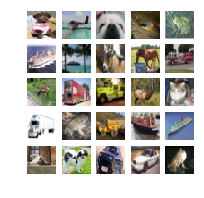

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets.cifar import load_batch
from six.moves import cPickle 
import pylab  

f = open('/Users/MIAOKUI/Documents/机器学习/datasets/cifar-10-batches-py/data_batch_1', 'rb')
datadict = cPickle.load(f, encoding='latin1')
f.close()

X = datadict["data"]
Y = datadict["labels"]
print(X.shape)
print(X.shape)
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)

fig, axes1 = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])
pylab.show()

### 2. 加载数据

In [24]:
from keras.datasets.cifar import load_batch
from keras import backend as K
import numpy as np
import os

def load_cifar():
    path = '/Users/MIAOKUI/Documents/机器学习/datasets/cifar-10-batches-py'
    num_train_samples = 50000
    x_train = np.zeros((num_train_samples, 3, 32, 32), dtype = 'uint8')
    y_train = np.zeros((num_train_samples, ), dtype = 'uint8')
    
    for i in range(1, 6):
        fpath = os.path.join(path, 'data_batch_' + str(i))
        data, labels = load_batch(fpath)
        x_train[(i-1) * 10000: i*10000, :, :, :] = data
        y_train[(i-1) * 10000: i*10000] = labels
    fpath = os.path.join(path, 'test_batch')
    x_test, y_test = load_batch(fpath)
    y_train = np.reshape(y_train, (len(y_train),1))
    y_test = np.reshape(y_test, (len(y_test),1))
    
    if K.image_data_format() == "channels_last":
        x_train = x_train.transpose([0, 2, 3, 1])
        x_test = x_test.transpose([0, 2, 3, 1])
    return (x_train, y_train),(x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_cifar()   
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


    


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


### 3. 初始化一些参数和数据预处理 

In [25]:
import keras

batch_size = 32
num_classes = 10
epochs = 5
#epochs = 5
data_augmentation = True
num_predictions = 20

save_dir = "/Users/MIAOKUI/Documents/机器学习/LearningAI/CifarClassification/saved_models"
model_name = 'keras_cifar10_trained_model.h5'
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


### 4. 模型建立

In [19]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


## initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss = 'categorical_crossentropy',
              optimizer=opt, 
              metrics=['accuracy'])

### 5. 模型训练
#### 1. 不使用数据增强

In [26]:
print("不使用数据增强")
model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs=epochs, 
          validation_data=(x_test, y_test),
          shuffle=True)

不使用数据增强


Train on 50000 samples, validate on 10000 samples
Epoch 1/5


   32/50000 [..............................] - ETA: 813s - loss: 2.3225 - acc: 0.1250

   64/50000 [..............................] - ETA: 481s - loss: 2.3218 - acc: 0.1094

   96/50000 [..............................] - ETA: 374s - loss: 2.3257 - acc: 0.0938

  128/50000 [..............................] - ETA: 317s - loss: 2.3254 - acc: 0.0703

  160/50000 [..............................] - ETA: 282s - loss: 2.3209 - acc: 0.0625

  192/50000 [..............................] - ETA: 258s - loss: 2.3171 - acc: 0.0729

  224/50000 [..............................] - ETA: 242s - loss: 2.3090 - acc: 0.0893

  256/50000 [..............................] - ETA: 228s - loss: 2.3080 - acc: 0.0898

  288/50000 [..............................] - ETA: 219s - loss: 2.3030 - acc: 0.0972

  320/50000 [..............................] - ETA: 212s - loss: 2.3042 - acc: 0.1031

  352/50000 [..............................] - ETA: 207s - loss: 2.3097 - acc: 0.0994

  384/50000 [..............................] - ETA: 201s - loss: 2.3093 - acc: 0.1042

  416/50000 [..............................] - ETA: 198s - loss: 2.3058 - acc: 0.1106

  448/50000 [..............................] - ETA: 195s - loss: 2.3094 - acc: 0.1094

  480/50000 [..............................] - ETA: 192s - loss: 2.3093 - acc: 0.1083

  512/50000 [..............................] - ETA: 189s - loss: 2.3095 - acc: 0.1035

  544/50000 [..............................] - ETA: 187s - loss: 2.3091 - acc: 0.1066

  576/50000 [..............................] - ETA: 185s - loss: 2.3071 - acc: 0.1059

  608/50000 [..............................] - ETA: 183s - loss: 2.3052 - acc: 0.1069

  640/50000 [..............................] - ETA: 181s - loss: 2.3050 - acc: 0.1062

  672/50000 [..............................] - ETA: 179s - loss: 2.3046 - acc: 0.1057

  704/50000 [..............................] - ETA: 178s - loss: 2.3053 - acc: 0.1037

  736/50000 [..............................] - ETA: 176s - loss: 2.3041 - acc: 0.1060

  768/50000 [..............................] - ETA: 175s - loss: 2.3043 - acc: 0.1029

  800/50000 [..............................] - ETA: 174s - loss: 2.3030 - acc: 0.1062

  832/50000 [..............................] - ETA: 173s - loss: 2.3047 - acc: 0.1034

  864/50000 [..............................] - ETA: 172s - loss: 2.3053 - acc: 0.0995

  896/50000 [..............................] - ETA: 171s - loss: 2.3050 - acc: 0.0982

  928/50000 [..............................] - ETA: 170s - loss: 2.3047 - acc: 0.0970

  960/50000 [..............................] - ETA: 170s - loss: 2.3043 - acc: 0.0979

  992/50000 [..............................] - ETA: 169s - loss: 2.3048 - acc: 0.0968

 1024/50000 [..............................] - ETA: 168s - loss: 2.3036 - acc: 0.0996

 1056/50000 [..............................] - ETA: 167s - loss: 2.3040 - acc: 0.1004

 1088/50000 [..............................] - ETA: 166s - loss: 2.3045 - acc: 0.0983

 1120/50000 [..............................] - ETA: 166s - loss: 2.3035 - acc: 0.0991

 1152/50000 [..............................] - ETA: 165s - loss: 2.3029 - acc: 0.1007

 1184/50000 [..............................] - ETA: 165s - loss: 2.3027 - acc: 0.0997

 1216/50000 [..............................] - ETA: 164s - loss: 2.3020 - acc: 0.1012

 1248/50000 [..............................] - ETA: 164s - loss: 2.3019 - acc: 0.1026

 1280/50000 [..............................] - ETA: 163s - loss: 2.3015 - acc: 0.1031

 1312/50000 [..............................] - ETA: 163s - loss: 2.3011 - acc: 0.1044

 1344/50000 [..............................] - ETA: 162s - loss: 2.3010 - acc: 0.1049

 1376/50000 [..............................] - ETA: 162s - loss: 2.3007 - acc: 0.1039

 1408/50000 [..............................] - ETA: 162s - loss: 2.3001 - acc: 0.1044

 1440/50000 [..............................] - ETA: 161s - loss: 2.2995 - acc: 0.1042

 1472/50000 [..............................] - ETA: 161s - loss: 2.2991 - acc: 0.1046

 1504/50000 [..............................] - ETA: 160s - loss: 2.2989 - acc: 0.1031

 1536/50000 [..............................] - ETA: 160s - loss: 2.2993 - acc: 0.1042

 1568/50000 [..............................] - ETA: 159s - loss: 2.2988 - acc: 0.1059

 1600/50000 [..............................] - ETA: 159s - loss: 2.2992 - acc: 0.1056

 1632/50000 [..............................] - ETA: 159s - loss: 2.2984 - acc: 0.1078

 1664/50000 [..............................] - ETA: 158s - loss: 2.2979 - acc: 0.1082

 1696/50000 [>.............................] - ETA: 158s - loss: 2.2978 - acc: 0.1091

 1728/50000 [>.............................] - ETA: 158s - loss: 2.2978 - acc: 0.1100

 1760/50000 [>.............................] - ETA: 157s - loss: 2.2967 - acc: 0.1119

 1792/50000 [>.............................] - ETA: 157s - loss: 2.2957 - acc: 0.1150

 1824/50000 [>.............................] - ETA: 157s - loss: 2.2956 - acc: 0.1146

 1856/50000 [>.............................] - ETA: 156s - loss: 2.2950 - acc: 0.1148

 1888/50000 [>.............................] - ETA: 156s - loss: 2.2947 - acc: 0.1176

 1920/50000 [>.............................] - ETA: 156s - loss: 2.2939 - acc: 0.1187

 1952/50000 [>.............................] - ETA: 155s - loss: 2.2933 - acc: 0.1214

 1984/50000 [>.............................] - ETA: 155s - loss: 2.2929 - acc: 0.1210

 2016/50000 [>.............................] - ETA: 154s - loss: 2.2926 - acc: 0.1200

 2048/50000 [>.............................] - ETA: 154s - loss: 2.2921 - acc: 0.1206

 2080/50000 [>.............................] - ETA: 154s - loss: 2.2924 - acc: 0.1202

 2112/50000 [>.............................] - ETA: 153s - loss: 2.2923 - acc: 0.1212

 2144/50000 [>.............................] - ETA: 153s - loss: 2.2911 - acc: 0.1241

 2176/50000 [>.............................] - ETA: 153s - loss: 2.2913 - acc: 0.1232

 2208/50000 [>.............................] - ETA: 152s - loss: 2.2903 - acc: 0.1236

 2240/50000 [>.............................] - ETA: 152s - loss: 2.2899 - acc: 0.1237

 2272/50000 [>.............................] - ETA: 152s - loss: 2.2902 - acc: 0.1241

 2304/50000 [>.............................] - ETA: 152s - loss: 2.2894 - acc: 0.1254

 2336/50000 [>.............................] - ETA: 152s - loss: 2.2889 - acc: 0.1250

 2368/50000 [>.............................] - ETA: 151s - loss: 2.2887 - acc: 0.1267

 2400/50000 [>.............................] - ETA: 151s - loss: 2.2879 - acc: 0.1279

 2432/50000 [>.............................] - ETA: 150s - loss: 2.2874 - acc: 0.1291

 2464/50000 [>.............................] - ETA: 150s - loss: 2.2871 - acc: 0.1291

 2496/50000 [>.............................] - ETA: 150s - loss: 2.2862 - acc: 0.1306

 2528/50000 [>.............................] - ETA: 150s - loss: 2.2855 - acc: 0.1317

 2560/50000 [>.............................] - ETA: 149s - loss: 2.2860 - acc: 0.1320

 2592/50000 [>.............................] - ETA: 149s - loss: 2.2851 - acc: 0.1323

 2624/50000 [>.............................] - ETA: 149s - loss: 2.2852 - acc: 0.1330

 2656/50000 [>.............................] - ETA: 149s - loss: 2.2843 - acc: 0.1340

 2688/50000 [>.............................] - ETA: 148s - loss: 2.2840 - acc: 0.1343

 2720/50000 [>.............................] - ETA: 148s - loss: 2.2833 - acc: 0.1349

 2752/50000 [>.............................] - ETA: 148s - loss: 2.2824 - acc: 0.1363

 2784/50000 [>.............................] - ETA: 148s - loss: 2.2823 - acc: 0.1358

 2816/50000 [>.............................] - ETA: 148s - loss: 2.2826 - acc: 0.1357

 2848/50000 [>.............................] - ETA: 148s - loss: 2.2829 - acc: 0.1348

 2880/50000 [>.............................] - ETA: 148s - loss: 2.2822 - acc: 0.1347

 2912/50000 [>.............................] - ETA: 147s - loss: 2.2813 - acc: 0.1356

 2944/50000 [>.............................] - ETA: 147s - loss: 2.2804 - acc: 0.1372

 2976/50000 [>.............................] - ETA: 147s - loss: 2.2797 - acc: 0.1381

 3008/50000 [>.............................] - ETA: 147s - loss: 2.2792 - acc: 0.1380

 3040/50000 [>.............................] - ETA: 147s - loss: 2.2784 - acc: 0.1391

 3072/50000 [>.............................] - ETA: 146s - loss: 2.2777 - acc: 0.1396

 3104/50000 [>.............................] - ETA: 146s - loss: 2.2776 - acc: 0.1398

 3136/50000 [>.............................] - ETA: 146s - loss: 2.2770 - acc: 0.1413

 3168/50000 [>.............................] - ETA: 146s - loss: 2.2762 - acc: 0.1420

 3200/50000 [>.............................] - ETA: 146s - loss: 2.2751 - acc: 0.1431

 3232/50000 [>.............................] - ETA: 146s - loss: 2.2742 - acc: 0.1429

 3264/50000 [>.............................] - ETA: 146s - loss: 2.2731 - acc: 0.1434

 3296/50000 [>.............................] - ETA: 146s - loss: 2.2726 - acc: 0.1444

 3328/50000 [>.............................] - ETA: 146s - loss: 2.2726 - acc: 0.1442

 3360/50000 [=>............................] - ETA: 146s - loss: 2.2720 - acc: 0.1449

 3392/50000 [=>............................] - ETA: 145s - loss: 2.2718 - acc: 0.1450

 3424/50000 [=>............................] - ETA: 145s - loss: 2.2712 - acc: 0.1460

 3456/50000 [=>............................] - ETA: 145s - loss: 2.2704 - acc: 0.1461

 3488/50000 [=>............................] - ETA: 145s - loss: 2.2699 - acc: 0.1459

 3520/50000 [=>............................] - ETA: 145s - loss: 2.2687 - acc: 0.1469

 3552/50000 [=>............................] - ETA: 145s - loss: 2.2683 - acc: 0.1478

 3584/50000 [=>............................] - ETA: 144s - loss: 2.2673 - acc: 0.1482

 3616/50000 [=>............................] - ETA: 144s - loss: 2.2664 - acc: 0.1491

 3648/50000 [=>............................] - ETA: 144s - loss: 2.2657 - acc: 0.1502

 3680/50000 [=>............................] - ETA: 144s - loss: 2.2648 - acc: 0.1503

 3712/50000 [=>............................] - ETA: 144s - loss: 2.2633 - acc: 0.1511

 3744/50000 [=>............................] - ETA: 144s - loss: 2.2620 - acc: 0.1525

 3776/50000 [=>............................] - ETA: 144s - loss: 2.2611 - acc: 0.1533

 3808/50000 [=>............................] - ETA: 143s - loss: 2.2601 - acc: 0.1544

 3840/50000 [=>............................] - ETA: 143s - loss: 2.2590 - acc: 0.1552

 3872/50000 [=>............................] - ETA: 143s - loss: 2.2576 - acc: 0.1562

 3904/50000 [=>............................] - ETA: 143s - loss: 2.2573 - acc: 0.1570

 3936/50000 [=>............................] - ETA: 143s - loss: 2.2566 - acc: 0.1575

 3968/50000 [=>............................] - ETA: 143s - loss: 2.2550 - acc: 0.1590

 4000/50000 [=>............................] - ETA: 143s - loss: 2.2546 - acc: 0.1588

 4032/50000 [=>............................] - ETA: 142s - loss: 2.2542 - acc: 0.1592

 4064/50000 [=>............................] - ETA: 142s - loss: 2.2531 - acc: 0.1594

 4096/50000 [=>............................] - ETA: 142s - loss: 2.2524 - acc: 0.1597

 4128/50000 [=>............................] - ETA: 142s - loss: 2.2520 - acc: 0.1592

 4160/50000 [=>............................] - ETA: 142s - loss: 2.2507 - acc: 0.1596

 4192/50000 [=>............................] - ETA: 142s - loss: 2.2502 - acc: 0.1605

 4224/50000 [=>............................] - ETA: 141s - loss: 2.2490 - acc: 0.1615

 4256/50000 [=>............................] - ETA: 141s - loss: 2.2484 - acc: 0.1617

 4288/50000 [=>............................] - ETA: 141s - loss: 2.2480 - acc: 0.1611

 4320/50000 [=>............................] - ETA: 141s - loss: 2.2473 - acc: 0.1611

 4352/50000 [=>............................] - ETA: 141s - loss: 2.2460 - acc: 0.1622

 4384/50000 [=>............................] - ETA: 141s - loss: 2.2448 - acc: 0.1626

 4416/50000 [=>............................] - ETA: 141s - loss: 2.2436 - acc: 0.1639

 4448/50000 [=>............................] - ETA: 141s - loss: 2.2430 - acc: 0.1646

 4480/50000 [=>............................] - ETA: 140s - loss: 2.2429 - acc: 0.1643

 4512/50000 [=>............................] - ETA: 140s - loss: 2.2423 - acc: 0.1638

 4544/50000 [=>............................] - ETA: 140s - loss: 2.2423 - acc: 0.1635

 4576/50000 [=>............................] - ETA: 140s - loss: 2.2416 - acc: 0.1635

 4608/50000 [=>............................] - ETA: 140s - loss: 2.2411 - acc: 0.1636

 4640/50000 [=>............................] - ETA: 140s - loss: 2.2408 - acc: 0.1636

 4672/50000 [=>............................] - ETA: 140s - loss: 2.2396 - acc: 0.1642

 4704/50000 [=>............................] - ETA: 139s - loss: 2.2380 - acc: 0.1656

 4736/50000 [=>............................] - ETA: 139s - loss: 2.2370 - acc: 0.1655

 4768/50000 [=>............................] - ETA: 139s - loss: 2.2363 - acc: 0.1655

 4800/50000 [=>............................] - ETA: 139s - loss: 2.2356 - acc: 0.1658

 4832/50000 [=>............................] - ETA: 139s - loss: 2.2351 - acc: 0.1660

 4864/50000 [=>............................] - ETA: 139s - loss: 2.2342 - acc: 0.1661

 4896/50000 [=>............................] - ETA: 139s - loss: 2.2334 - acc: 0.1661

 4928/50000 [=>............................] - ETA: 138s - loss: 2.2326 - acc: 0.1664

 4960/50000 [=>............................] - ETA: 138s - loss: 2.2319 - acc: 0.1663

 4992/50000 [=>............................] - ETA: 138s - loss: 2.2301 - acc: 0.1671

 5024/50000 [==>...........................] - ETA: 138s - loss: 2.2290 - acc: 0.1672

 5056/50000 [==>...........................] - ETA: 138s - loss: 2.2273 - acc: 0.1681

 5088/50000 [==>...........................] - ETA: 138s - loss: 2.2258 - acc: 0.1682

 5120/50000 [==>...........................] - ETA: 138s - loss: 2.2251 - acc: 0.1688

 5152/50000 [==>...........................] - ETA: 138s - loss: 2.2240 - acc: 0.1698

 5184/50000 [==>...........................] - ETA: 138s - loss: 2.2239 - acc: 0.1698

 5216/50000 [==>...........................] - ETA: 137s - loss: 2.2237 - acc: 0.1697

 5248/50000 [==>...........................] - ETA: 137s - loss: 2.2244 - acc: 0.1690

 5280/50000 [==>...........................] - ETA: 137s - loss: 2.2234 - acc: 0.1688

 5312/50000 [==>...........................] - ETA: 137s - loss: 2.2228 - acc: 0.1691

 5344/50000 [==>...........................] - ETA: 137s - loss: 2.2221 - acc: 0.1692

 5376/50000 [==>...........................] - ETA: 137s - loss: 2.2216 - acc: 0.1695

 5408/50000 [==>...........................] - ETA: 137s - loss: 2.2208 - acc: 0.1696

 5440/50000 [==>...........................] - ETA: 137s - loss: 2.2209 - acc: 0.1693

 5472/50000 [==>...........................] - ETA: 137s - loss: 2.2198 - acc: 0.1698

 5504/50000 [==>...........................] - ETA: 136s - loss: 2.2199 - acc: 0.1701

 5536/50000 [==>...........................] - ETA: 136s - loss: 2.2190 - acc: 0.1703

 5568/50000 [==>...........................] - ETA: 136s - loss: 2.2180 - acc: 0.1708

 5600/50000 [==>...........................] - ETA: 136s - loss: 2.2159 - acc: 0.1711

 5632/50000 [==>...........................] - ETA: 136s - loss: 2.2154 - acc: 0.1710

 5664/50000 [==>...........................] - ETA: 136s - loss: 2.2149 - acc: 0.1711

 5696/50000 [==>...........................] - ETA: 136s - loss: 2.2137 - acc: 0.1715

 5728/50000 [==>...........................] - ETA: 136s - loss: 2.2131 - acc: 0.1721

 5760/50000 [==>...........................] - ETA: 135s - loss: 2.2122 - acc: 0.1722

 5792/50000 [==>...........................] - ETA: 135s - loss: 2.2101 - acc: 0.1733

 5824/50000 [==>...........................] - ETA: 135s - loss: 2.2096 - acc: 0.1738

 5856/50000 [==>...........................] - ETA: 135s - loss: 2.2091 - acc: 0.1738

 5888/50000 [==>...........................] - ETA: 135s - loss: 2.2084 - acc: 0.1737

 5920/50000 [==>...........................] - ETA: 135s - loss: 2.2078 - acc: 0.1736

 5952/50000 [==>...........................] - ETA: 135s - loss: 2.2069 - acc: 0.1742

 5984/50000 [==>...........................] - ETA: 135s - loss: 2.2056 - acc: 0.1755

 6016/50000 [==>...........................] - ETA: 135s - loss: 2.2047 - acc: 0.1759

 6048/50000 [==>...........................] - ETA: 135s - loss: 2.2036 - acc: 0.1759

 6080/50000 [==>...........................] - ETA: 135s - loss: 2.2025 - acc: 0.1763

 6112/50000 [==>...........................] - ETA: 135s - loss: 2.2011 - acc: 0.1765

 6144/50000 [==>...........................] - ETA: 134s - loss: 2.2006 - acc: 0.1761

 6176/50000 [==>...........................] - ETA: 134s - loss: 2.1999 - acc: 0.1763

 6208/50000 [==>...........................] - ETA: 134s - loss: 2.2001 - acc: 0.1762

 6240/50000 [==>...........................] - ETA: 134s - loss: 2.1989 - acc: 0.1772

 6272/50000 [==>...........................] - ETA: 134s - loss: 2.1981 - acc: 0.1778

 6304/50000 [==>...........................] - ETA: 134s - loss: 2.1982 - acc: 0.1778

 6336/50000 [==>...........................] - ETA: 134s - loss: 2.1980 - acc: 0.1780

 6368/50000 [==>...........................] - ETA: 134s - loss: 2.1976 - acc: 0.1782

 6400/50000 [==>...........................] - ETA: 133s - loss: 2.1967 - acc: 0.1786

 6432/50000 [==>...........................] - ETA: 133s - loss: 2.1959 - acc: 0.1793

 6464/50000 [==>...........................] - ETA: 133s - loss: 2.1961 - acc: 0.1790

 6496/50000 [==>...........................] - ETA: 133s - loss: 2.1954 - acc: 0.1789

 6528/50000 [==>...........................] - ETA: 133s - loss: 2.1953 - acc: 0.1788

 6560/50000 [==>...........................] - ETA: 133s - loss: 2.1947 - acc: 0.1788

 6592/50000 [==>...........................] - ETA: 133s - loss: 2.1940 - acc: 0.1789

 6624/50000 [==>...........................] - ETA: 133s - loss: 2.1935 - acc: 0.1789

 6656/50000 [==>...........................] - ETA: 133s - loss: 2.1935 - acc: 0.1789

 6688/50000 [===>..........................] - ETA: 132s - loss: 2.1931 - acc: 0.1790

 6720/50000 [===>..........................] - ETA: 132s - loss: 2.1930 - acc: 0.1789

 6752/50000 [===>..........................] - ETA: 132s - loss: 2.1929 - acc: 0.1791

 6784/50000 [===>..........................] - ETA: 132s - loss: 2.1921 - acc: 0.1790

 6816/50000 [===>..........................] - ETA: 132s - loss: 2.1918 - acc: 0.1784

 6848/50000 [===>..........................] - ETA: 132s - loss: 2.1912 - acc: 0.1786

 6880/50000 [===>..........................] - ETA: 132s - loss: 2.1908 - acc: 0.1791

 6912/50000 [===>..........................] - ETA: 132s - loss: 2.1904 - acc: 0.1793

 6944/50000 [===>..........................] - ETA: 132s - loss: 2.1906 - acc: 0.1794

 6976/50000 [===>..........................] - ETA: 131s - loss: 2.1906 - acc: 0.1795

 7008/50000 [===>..........................] - ETA: 131s - loss: 2.1900 - acc: 0.1795

 7040/50000 [===>..........................] - ETA: 131s - loss: 2.1893 - acc: 0.1805

 7072/50000 [===>..........................] - ETA: 131s - loss: 2.1891 - acc: 0.1806

 7104/50000 [===>..........................] - ETA: 131s - loss: 2.1885 - acc: 0.1805

 7136/50000 [===>..........................] - ETA: 131s - loss: 2.1873 - acc: 0.1804

 7168/50000 [===>..........................] - ETA: 131s - loss: 2.1865 - acc: 0.1807

 7200/50000 [===>..........................] - ETA: 131s - loss: 2.1863 - acc: 0.1806

 7232/50000 [===>..........................] - ETA: 131s - loss: 2.1858 - acc: 0.1810

 7264/50000 [===>..........................] - ETA: 130s - loss: 2.1855 - acc: 0.1812

 7296/50000 [===>..........................] - ETA: 130s - loss: 2.1848 - acc: 0.1813

 7328/50000 [===>..........................] - ETA: 130s - loss: 2.1838 - acc: 0.1814

 7360/50000 [===>..........................] - ETA: 130s - loss: 2.1831 - acc: 0.1819

 7392/50000 [===>..........................] - ETA: 130s - loss: 2.1821 - acc: 0.1825

 7424/50000 [===>..........................] - ETA: 130s - loss: 2.1820 - acc: 0.1825

 7456/50000 [===>..........................] - ETA: 130s - loss: 2.1817 - acc: 0.1828

 7488/50000 [===>..........................] - ETA: 130s - loss: 2.1815 - acc: 0.1824

 7520/50000 [===>..........................] - ETA: 130s - loss: 2.1812 - acc: 0.1828

 7552/50000 [===>..........................] - ETA: 130s - loss: 2.1802 - acc: 0.1830

 7584/50000 [===>..........................] - ETA: 130s - loss: 2.1798 - acc: 0.1831

 7616/50000 [===>..........................] - ETA: 130s - loss: 2.1791 - acc: 0.1837

 7648/50000 [===>..........................] - ETA: 130s - loss: 2.1787 - acc: 0.1841

 7680/50000 [===>..........................] - ETA: 130s - loss: 2.1784 - acc: 0.1842

 7712/50000 [===>..........................] - ETA: 130s - loss: 2.1776 - acc: 0.1843

 7744/50000 [===>..........................] - ETA: 130s - loss: 2.1768 - acc: 0.1847

 7776/50000 [===>..........................] - ETA: 130s - loss: 2.1758 - acc: 0.1849

 7808/50000 [===>..........................] - ETA: 130s - loss: 2.1754 - acc: 0.1847

 7840/50000 [===>..........................] - ETA: 130s - loss: 2.1747 - acc: 0.1848

 7872/50000 [===>..........................] - ETA: 131s - loss: 2.1743 - acc: 0.1848

 7904/50000 [===>..........................] - ETA: 131s - loss: 2.1741 - acc: 0.1847

 7936/50000 [===>..........................] - ETA: 131s - loss: 2.1749 - acc: 0.1846

 7968/50000 [===>..........................] - ETA: 131s - loss: 2.1741 - acc: 0.1855

 8000/50000 [===>..........................] - ETA: 131s - loss: 2.1740 - acc: 0.1854

 8032/50000 [===>..........................] - ETA: 130s - loss: 2.1733 - acc: 0.1858

 8064/50000 [===>..........................] - ETA: 130s - loss: 2.1727 - acc: 0.1863

 8096/50000 [===>..........................] - ETA: 130s - loss: 2.1734 - acc: 0.1860

 8128/50000 [===>..........................] - ETA: 130s - loss: 2.1727 - acc: 0.1866

 8160/50000 [===>..........................] - ETA: 130s - loss: 2.1729 - acc: 0.1866

 8192/50000 [===>..........................] - ETA: 130s - loss: 2.1720 - acc: 0.1873

 8224/50000 [===>..........................] - ETA: 130s - loss: 2.1716 - acc: 0.1870

 8256/50000 [===>..........................] - ETA: 130s - loss: 2.1710 - acc: 0.1869

 8288/50000 [===>..........................] - ETA: 130s - loss: 2.1705 - acc: 0.1873

 8320/50000 [===>..........................] - ETA: 130s - loss: 2.1699 - acc: 0.1874

 8352/50000 [====>.........................] - ETA: 130s - loss: 2.1688 - acc: 0.1879

 8384/50000 [====>.........................] - ETA: 130s - loss: 2.1685 - acc: 0.1881

 8416/50000 [====>.........................] - ETA: 130s - loss: 2.1676 - acc: 0.1888

 8448/50000 [====>.........................] - ETA: 130s - loss: 2.1680 - acc: 0.1889

 8480/50000 [====>.........................] - ETA: 130s - loss: 2.1671 - acc: 0.1893

 8512/50000 [====>.........................] - ETA: 130s - loss: 2.1667 - acc: 0.1891

 8544/50000 [====>.........................] - ETA: 130s - loss: 2.1668 - acc: 0.1891

 8576/50000 [====>.........................] - ETA: 130s - loss: 2.1656 - acc: 0.1896

 8608/50000 [====>.........................] - ETA: 130s - loss: 2.1653 - acc: 0.1898

 8640/50000 [====>.........................] - ETA: 130s - loss: 2.1652 - acc: 0.1898

 8672/50000 [====>.........................] - ETA: 130s - loss: 2.1644 - acc: 0.1907

 8704/50000 [====>.........................] - ETA: 130s - loss: 2.1636 - acc: 0.1911

 8736/50000 [====>.........................] - ETA: 130s - loss: 2.1627 - acc: 0.1913

 8768/50000 [====>.........................] - ETA: 130s - loss: 2.1616 - acc: 0.1916

 8800/50000 [====>.........................] - ETA: 130s - loss: 2.1608 - acc: 0.1918

 8832/50000 [====>.........................] - ETA: 130s - loss: 2.1600 - acc: 0.1923

 8864/50000 [====>.........................] - ETA: 130s - loss: 2.1596 - acc: 0.1927

 8896/50000 [====>.........................] - ETA: 130s - loss: 2.1597 - acc: 0.1926

 8928/50000 [====>.........................] - ETA: 130s - loss: 2.1587 - acc: 0.1927

 8960/50000 [====>.........................] - ETA: 130s - loss: 2.1579 - acc: 0.1932

 8992/50000 [====>.........................] - ETA: 130s - loss: 2.1580 - acc: 0.1934

 9024/50000 [====>.........................] - ETA: 130s - loss: 2.1572 - acc: 0.1939

 9056/50000 [====>.........................] - ETA: 130s - loss: 2.1567 - acc: 0.1939

 9088/50000 [====>.........................] - ETA: 129s - loss: 2.1561 - acc: 0.1943

 9120/50000 [====>.........................] - ETA: 129s - loss: 2.1557 - acc: 0.1943

 9152/50000 [====>.........................] - ETA: 129s - loss: 2.1553 - acc: 0.1944

 9184/50000 [====>.........................] - ETA: 129s - loss: 2.1546 - acc: 0.1944

 9216/50000 [====>.........................] - ETA: 129s - loss: 2.1542 - acc: 0.1947

 9248/50000 [====>.........................] - ETA: 129s - loss: 2.1538 - acc: 0.1945

 9280/50000 [====>.........................] - ETA: 129s - loss: 2.1532 - acc: 0.1946

 9312/50000 [====>.........................] - ETA: 129s - loss: 2.1523 - acc: 0.1951

 9344/50000 [====>.........................] - ETA: 129s - loss: 2.1521 - acc: 0.1952

 9376/50000 [====>.........................] - ETA: 129s - loss: 2.1518 - acc: 0.1951

 9408/50000 [====>.........................] - ETA: 128s - loss: 2.1512 - acc: 0.1953

 9440/50000 [====>.........................] - ETA: 128s - loss: 2.1508 - acc: 0.1954

 9472/50000 [====>.........................] - ETA: 128s - loss: 2.1507 - acc: 0.1957

 9504/50000 [====>.........................] - ETA: 128s - loss: 2.1499 - acc: 0.1965

 9536/50000 [====>.........................] - ETA: 128s - loss: 2.1494 - acc: 0.1966

 9568/50000 [====>.........................] - ETA: 128s - loss: 2.1493 - acc: 0.1970

 9600/50000 [====>.........................] - ETA: 128s - loss: 2.1484 - acc: 0.1973

 9632/50000 [====>.........................] - ETA: 128s - loss: 2.1484 - acc: 0.1974

 9664/50000 [====>.........................] - ETA: 128s - loss: 2.1474 - acc: 0.1976

 9696/50000 [====>.........................] - ETA: 128s - loss: 2.1468 - acc: 0.1978

 9728/50000 [====>.........................] - ETA: 127s - loss: 2.1456 - acc: 0.1984

 9760/50000 [====>.........................] - ETA: 127s - loss: 2.1457 - acc: 0.1984

 9792/50000 [====>.........................] - ETA: 127s - loss: 2.1454 - acc: 0.1984

 9824/50000 [====>.........................] - ETA: 127s - loss: 2.1445 - acc: 0.1988

 9856/50000 [====>.........................] - ETA: 127s - loss: 2.1440 - acc: 0.1989

 9888/50000 [====>.........................] - ETA: 127s - loss: 2.1438 - acc: 0.1992

 9920/50000 [====>.........................] - ETA: 127s - loss: 2.1436 - acc: 0.1990

 9952/50000 [====>.........................] - ETA: 127s - loss: 2.1423 - acc: 0.1996

 9984/50000 [====>.........................] - ETA: 127s - loss: 2.1418 - acc: 0.2000

10016/50000 [=====>........................] - ETA: 127s - loss: 2.1416 - acc: 0.2002

10048/50000 [=====>........................] - ETA: 127s - loss: 2.1407 - acc: 0.2008

10080/50000 [=====>........................] - ETA: 126s - loss: 2.1401 - acc: 0.2012

10112/50000 [=====>........................] - ETA: 126s - loss: 2.1393 - acc: 0.2015

10144/50000 [=====>........................] - ETA: 126s - loss: 2.1390 - acc: 0.2019

10176/50000 [=====>........................] - ETA: 126s - loss: 2.1383 - acc: 0.2025

10208/50000 [=====>........................] - ETA: 126s - loss: 2.1378 - acc: 0.2024

10240/50000 [=====>........................] - ETA: 126s - loss: 2.1374 - acc: 0.2023

10272/50000 [=====>........................] - ETA: 126s - loss: 2.1366 - acc: 0.2027

10304/50000 [=====>........................] - ETA: 126s - loss: 2.1361 - acc: 0.2027

10336/50000 [=====>........................] - ETA: 126s - loss: 2.1364 - acc: 0.2029

10368/50000 [=====>........................] - ETA: 126s - loss: 2.1361 - acc: 0.2030

10400/50000 [=====>........................] - ETA: 126s - loss: 2.1348 - acc: 0.2037

10432/50000 [=====>........................] - ETA: 125s - loss: 2.1343 - acc: 0.2038

10464/50000 [=====>........................] - ETA: 125s - loss: 2.1342 - acc: 0.2040

10496/50000 [=====>........................] - ETA: 125s - loss: 2.1341 - acc: 0.2045

10528/50000 [=====>........................] - ETA: 125s - loss: 2.1333 - acc: 0.2049

10560/50000 [=====>........................] - ETA: 125s - loss: 2.1324 - acc: 0.2051

10592/50000 [=====>........................] - ETA: 125s - loss: 2.1319 - acc: 0.2054

10624/50000 [=====>........................] - ETA: 125s - loss: 2.1310 - acc: 0.2058

10656/50000 [=====>........................] - ETA: 125s - loss: 2.1308 - acc: 0.2060

10688/50000 [=====>........................] - ETA: 125s - loss: 2.1299 - acc: 0.2062

10720/50000 [=====>........................] - ETA: 124s - loss: 2.1289 - acc: 0.2067

10752/50000 [=====>........................] - ETA: 124s - loss: 2.1286 - acc: 0.2070

10784/50000 [=====>........................] - ETA: 124s - loss: 2.1277 - acc: 0.2073

10816/50000 [=====>........................] - ETA: 124s - loss: 2.1275 - acc: 0.2072

10848/50000 [=====>........................] - ETA: 124s - loss: 2.1272 - acc: 0.2077

10880/50000 [=====>........................] - ETA: 124s - loss: 2.1269 - acc: 0.2077

10912/50000 [=====>........................] - ETA: 124s - loss: 2.1265 - acc: 0.2081

10944/50000 [=====>........................] - ETA: 124s - loss: 2.1257 - acc: 0.2082

10976/50000 [=====>........................] - ETA: 124s - loss: 2.1252 - acc: 0.2084

11008/50000 [=====>........................] - ETA: 124s - loss: 2.1251 - acc: 0.2086

11040/50000 [=====>........................] - ETA: 124s - loss: 2.1240 - acc: 0.2090

11072/50000 [=====>........................] - ETA: 123s - loss: 2.1240 - acc: 0.2090

11104/50000 [=====>........................] - ETA: 123s - loss: 2.1227 - acc: 0.2097

11136/50000 [=====>........................] - ETA: 123s - loss: 2.1219 - acc: 0.2098

11168/50000 [=====>........................] - ETA: 123s - loss: 2.1212 - acc: 0.2101

11200/50000 [=====>........................] - ETA: 123s - loss: 2.1203 - acc: 0.2103

11232/50000 [=====>........................] - ETA: 123s - loss: 2.1197 - acc: 0.2106

11264/50000 [=====>........................] - ETA: 123s - loss: 2.1184 - acc: 0.2112

11296/50000 [=====>........................] - ETA: 123s - loss: 2.1180 - acc: 0.2110

11328/50000 [=====>........................] - ETA: 123s - loss: 2.1175 - acc: 0.2110

11360/50000 [=====>........................] - ETA: 123s - loss: 2.1167 - acc: 0.2114

11392/50000 [=====>........................] - ETA: 122s - loss: 2.1155 - acc: 0.2118

11424/50000 [=====>........................] - ETA: 122s - loss: 2.1145 - acc: 0.2122

11456/50000 [=====>........................] - ETA: 122s - loss: 2.1139 - acc: 0.2124

11488/50000 [=====>........................] - ETA: 122s - loss: 2.1136 - acc: 0.2126

11520/50000 [=====>........................] - ETA: 122s - loss: 2.1131 - acc: 0.2128

11552/50000 [=====>........................] - ETA: 122s - loss: 2.1125 - acc: 0.2130

11584/50000 [=====>........................] - ETA: 122s - loss: 2.1120 - acc: 0.2131

11616/50000 [=====>........................] - ETA: 122s - loss: 2.1112 - acc: 0.2135

11648/50000 [=====>........................] - ETA: 122s - loss: 2.1108 - acc: 0.2139

11680/50000 [======>.......................] - ETA: 122s - loss: 2.1110 - acc: 0.2139

11712/50000 [======>.......................] - ETA: 122s - loss: 2.1102 - acc: 0.2145

11744/50000 [======>.......................] - ETA: 121s - loss: 2.1099 - acc: 0.2145

11776/50000 [======>.......................] - ETA: 121s - loss: 2.1093 - acc: 0.2147

11808/50000 [======>.......................] - ETA: 121s - loss: 2.1088 - acc: 0.2152

11840/50000 [======>.......................] - ETA: 121s - loss: 2.1085 - acc: 0.2155

11872/50000 [======>.......................] - ETA: 121s - loss: 2.1084 - acc: 0.2158

11904/50000 [======>.......................] - ETA: 121s - loss: 2.1080 - acc: 0.2160

11936/50000 [======>.......................] - ETA: 121s - loss: 2.1079 - acc: 0.2161

11968/50000 [======>.......................] - ETA: 121s - loss: 2.1076 - acc: 0.2162

12000/50000 [======>.......................] - ETA: 121s - loss: 2.1073 - acc: 0.2162

12032/50000 [======>.......................] - ETA: 121s - loss: 2.1071 - acc: 0.2165

12064/50000 [======>.......................] - ETA: 120s - loss: 2.1063 - acc: 0.2169

12096/50000 [======>.......................] - ETA: 120s - loss: 2.1058 - acc: 0.2168

12128/50000 [======>.......................] - ETA: 120s - loss: 2.1060 - acc: 0.2169

12160/50000 [======>.......................] - ETA: 120s - loss: 2.1062 - acc: 0.2168

12192/50000 [======>.......................] - ETA: 120s - loss: 2.1058 - acc: 0.2169

12224/50000 [======>.......................] - ETA: 120s - loss: 2.1057 - acc: 0.2170

12256/50000 [======>.......................] - ETA: 120s - loss: 2.1052 - acc: 0.2168

12288/50000 [======>.......................] - ETA: 120s - loss: 2.1044 - acc: 0.2171

12320/50000 [======>.......................] - ETA: 120s - loss: 2.1040 - acc: 0.2172

12352/50000 [======>.......................] - ETA: 120s - loss: 2.1035 - acc: 0.2175

12384/50000 [======>.......................] - ETA: 120s - loss: 2.1033 - acc: 0.2177

12416/50000 [======>.......................] - ETA: 119s - loss: 2.1032 - acc: 0.2175

12448/50000 [======>.......................] - ETA: 119s - loss: 2.1024 - acc: 0.2181

12480/50000 [======>.......................] - ETA: 119s - loss: 2.1014 - acc: 0.2183

12512/50000 [======>.......................] - ETA: 119s - loss: 2.1013 - acc: 0.2184

12544/50000 [======>.......................] - ETA: 119s - loss: 2.1006 - acc: 0.2188

12576/50000 [======>.......................] - ETA: 119s - loss: 2.1001 - acc: 0.2188

12608/50000 [======>.......................] - ETA: 119s - loss: 2.1004 - acc: 0.2191

12640/50000 [======>.......................] - ETA: 119s - loss: 2.1001 - acc: 0.2191

12672/50000 [======>.......................] - ETA: 119s - loss: 2.1001 - acc: 0.2192

12704/50000 [======>.......................] - ETA: 119s - loss: 2.0997 - acc: 0.2193

12736/50000 [======>.......................] - ETA: 119s - loss: 2.0995 - acc: 0.2194

12768/50000 [======>.......................] - ETA: 119s - loss: 2.0991 - acc: 0.2196

12800/50000 [======>.......................] - ETA: 118s - loss: 2.0985 - acc: 0.2198

12832/50000 [======>.......................] - ETA: 118s - loss: 2.0982 - acc: 0.2198

12864/50000 [======>.......................] - ETA: 118s - loss: 2.0973 - acc: 0.2201

12896/50000 [======>.......................] - ETA: 118s - loss: 2.0972 - acc: 0.2204

12928/50000 [======>.......................] - ETA: 118s - loss: 2.0968 - acc: 0.2207

12960/50000 [======>.......................] - ETA: 118s - loss: 2.0960 - acc: 0.2210

12992/50000 [======>.......................] - ETA: 118s - loss: 2.0958 - acc: 0.2214

13024/50000 [======>.......................] - ETA: 118s - loss: 2.0954 - acc: 0.2217

13056/50000 [======>.......................] - ETA: 118s - loss: 2.0943 - acc: 0.2223

13088/50000 [======>.......................] - ETA: 118s - loss: 2.0942 - acc: 0.2224

13120/50000 [======>.......................] - ETA: 118s - loss: 2.0939 - acc: 0.2228

13152/50000 [======>.......................] - ETA: 117s - loss: 2.0933 - acc: 0.2234

13184/50000 [======>.......................] - ETA: 117s - loss: 2.0934 - acc: 0.2233

13216/50000 [======>.......................] - ETA: 117s - loss: 2.0926 - acc: 0.2237

13248/50000 [======>.......................] - ETA: 117s - loss: 2.0920 - acc: 0.2240

13280/50000 [======>.......................] - ETA: 117s - loss: 2.0916 - acc: 0.2244

13312/50000 [======>.......................] - ETA: 117s - loss: 2.0917 - acc: 0.2242

13344/50000 [=======>......................] - ETA: 117s - loss: 2.0911 - acc: 0.2244

13376/50000 [=======>......................] - ETA: 117s - loss: 2.0900 - acc: 0.2248

13408/50000 [=======>......................] - ETA: 117s - loss: 2.0898 - acc: 0.2249

13440/50000 [=======>......................] - ETA: 117s - loss: 2.0892 - acc: 0.2252

13472/50000 [=======>......................] - ETA: 117s - loss: 2.0884 - acc: 0.2254

13504/50000 [=======>......................] - ETA: 116s - loss: 2.0874 - acc: 0.2259

13536/50000 [=======>......................] - ETA: 116s - loss: 2.0871 - acc: 0.2260

13568/50000 [=======>......................] - ETA: 116s - loss: 2.0868 - acc: 0.2262

13600/50000 [=======>......................] - ETA: 116s - loss: 2.0861 - acc: 0.2265

13632/50000 [=======>......................] - ETA: 116s - loss: 2.0856 - acc: 0.2268

13664/50000 [=======>......................] - ETA: 116s - loss: 2.0850 - acc: 0.2270

13696/50000 [=======>......................] - ETA: 116s - loss: 2.0847 - acc: 0.2270

13728/50000 [=======>......................] - ETA: 116s - loss: 2.0848 - acc: 0.2268

13760/50000 [=======>......................] - ETA: 116s - loss: 2.0841 - acc: 0.2271

13792/50000 [=======>......................] - ETA: 116s - loss: 2.0843 - acc: 0.2272

13824/50000 [=======>......................] - ETA: 116s - loss: 2.0836 - acc: 0.2276

13856/50000 [=======>......................] - ETA: 115s - loss: 2.0833 - acc: 0.2274

13888/50000 [=======>......................] - ETA: 115s - loss: 2.0827 - acc: 0.2274

13920/50000 [=======>......................] - ETA: 115s - loss: 2.0824 - acc: 0.2276

13952/50000 [=======>......................] - ETA: 115s - loss: 2.0819 - acc: 0.2279

13984/50000 [=======>......................] - ETA: 115s - loss: 2.0811 - acc: 0.2283

14016/50000 [=======>......................] - ETA: 115s - loss: 2.0811 - acc: 0.2282

14048/50000 [=======>......................] - ETA: 115s - loss: 2.0809 - acc: 0.2282

14080/50000 [=======>......................] - ETA: 115s - loss: 2.0804 - acc: 0.2285

14112/50000 [=======>......................] - ETA: 115s - loss: 2.0795 - acc: 0.2290

14144/50000 [=======>......................] - ETA: 115s - loss: 2.0793 - acc: 0.2291

14176/50000 [=======>......................] - ETA: 115s - loss: 2.0789 - acc: 0.2293

14208/50000 [=======>......................] - ETA: 115s - loss: 2.0782 - acc: 0.2296

14240/50000 [=======>......................] - ETA: 114s - loss: 2.0779 - acc: 0.2299

14272/50000 [=======>......................] - ETA: 114s - loss: 2.0778 - acc: 0.2300

14304/50000 [=======>......................] - ETA: 114s - loss: 2.0773 - acc: 0.2298

14336/50000 [=======>......................] - ETA: 114s - loss: 2.0770 - acc: 0.2298

14368/50000 [=======>......................] - ETA: 114s - loss: 2.0769 - acc: 0.2297

14400/50000 [=======>......................] - ETA: 114s - loss: 2.0759 - acc: 0.2302

14432/50000 [=======>......................] - ETA: 114s - loss: 2.0755 - acc: 0.2305

14464/50000 [=======>......................] - ETA: 114s - loss: 2.0753 - acc: 0.2306

14496/50000 [=======>......................] - ETA: 114s - loss: 2.0747 - acc: 0.2308

14528/50000 [=======>......................] - ETA: 114s - loss: 2.0743 - acc: 0.2310

14560/50000 [=======>......................] - ETA: 114s - loss: 2.0737 - acc: 0.2314

14592/50000 [=======>......................] - ETA: 113s - loss: 2.0733 - acc: 0.2316

14624/50000 [=======>......................] - ETA: 113s - loss: 2.0724 - acc: 0.2320

14656/50000 [=======>......................] - ETA: 113s - loss: 2.0720 - acc: 0.2321

14688/50000 [=======>......................] - ETA: 113s - loss: 2.0714 - acc: 0.2322

14720/50000 [=======>......................] - ETA: 113s - loss: 2.0716 - acc: 0.2323

14752/50000 [=======>......................] - ETA: 113s - loss: 2.0710 - acc: 0.2325

14784/50000 [=======>......................] - ETA: 113s - loss: 2.0705 - acc: 0.2326

14816/50000 [=======>......................] - ETA: 113s - loss: 2.0696 - acc: 0.2329

14848/50000 [=======>......................] - ETA: 113s - loss: 2.0691 - acc: 0.2330

14880/50000 [=======>......................] - ETA: 113s - loss: 2.0689 - acc: 0.2328

14912/50000 [=======>......................] - ETA: 113s - loss: 2.0690 - acc: 0.2327

14944/50000 [=======>......................] - ETA: 113s - loss: 2.0685 - acc: 0.2331

14976/50000 [=======>......................] - ETA: 112s - loss: 2.0682 - acc: 0.2330

15008/50000 [========>.....................] - ETA: 112s - loss: 2.0681 - acc: 0.2332

15040/50000 [========>.....................] - ETA: 112s - loss: 2.0679 - acc: 0.2335

15072/50000 [========>.....................] - ETA: 112s - loss: 2.0677 - acc: 0.2336

15104/50000 [========>.....................] - ETA: 112s - loss: 2.0674 - acc: 0.2337

15136/50000 [========>.....................] - ETA: 112s - loss: 2.0669 - acc: 0.2337

15168/50000 [========>.....................] - ETA: 112s - loss: 2.0666 - acc: 0.2339

15200/50000 [========>.....................] - ETA: 112s - loss: 2.0656 - acc: 0.2345

15232/50000 [========>.....................] - ETA: 112s - loss: 2.0650 - acc: 0.2347

15264/50000 [========>.....................] - ETA: 112s - loss: 2.0643 - acc: 0.2349

15296/50000 [========>.....................] - ETA: 112s - loss: 2.0635 - acc: 0.2350

15328/50000 [========>.....................] - ETA: 112s - loss: 2.0629 - acc: 0.2353

15360/50000 [========>.....................] - ETA: 111s - loss: 2.0629 - acc: 0.2355

15392/50000 [========>.....................] - ETA: 111s - loss: 2.0623 - acc: 0.2357

15424/50000 [========>.....................] - ETA: 111s - loss: 2.0617 - acc: 0.2361

15456/50000 [========>.....................] - ETA: 111s - loss: 2.0611 - acc: 0.2362

15488/50000 [========>.....................] - ETA: 111s - loss: 2.0608 - acc: 0.2362

15520/50000 [========>.....................] - ETA: 111s - loss: 2.0599 - acc: 0.2365

15552/50000 [========>.....................] - ETA: 111s - loss: 2.0593 - acc: 0.2368

15584/50000 [========>.....................] - ETA: 111s - loss: 2.0589 - acc: 0.2366

15616/50000 [========>.....................] - ETA: 111s - loss: 2.0584 - acc: 0.2366

15648/50000 [========>.....................] - ETA: 111s - loss: 2.0584 - acc: 0.2366

15680/50000 [========>.....................] - ETA: 111s - loss: 2.0580 - acc: 0.2365

15712/50000 [========>.....................] - ETA: 111s - loss: 2.0573 - acc: 0.2368

15744/50000 [========>.....................] - ETA: 110s - loss: 2.0571 - acc: 0.2371

15776/50000 [========>.....................] - ETA: 110s - loss: 2.0565 - acc: 0.2374

15808/50000 [========>.....................] - ETA: 110s - loss: 2.0555 - acc: 0.2377

15840/50000 [========>.....................] - ETA: 110s - loss: 2.0546 - acc: 0.2380

15872/50000 [========>.....................] - ETA: 110s - loss: 2.0540 - acc: 0.2383

15904/50000 [========>.....................] - ETA: 110s - loss: 2.0535 - acc: 0.2386

15936/50000 [========>.....................] - ETA: 110s - loss: 2.0531 - acc: 0.2387

15968/50000 [========>.....................] - ETA: 110s - loss: 2.0532 - acc: 0.2387

16000/50000 [========>.....................] - ETA: 110s - loss: 2.0527 - acc: 0.2390

16032/50000 [========>.....................] - ETA: 110s - loss: 2.0522 - acc: 0.2392

16064/50000 [========>.....................] - ETA: 110s - loss: 2.0520 - acc: 0.2395

16096/50000 [========>.....................] - ETA: 109s - loss: 2.0518 - acc: 0.2394

16128/50000 [========>.....................] - ETA: 109s - loss: 2.0512 - acc: 0.2396

16160/50000 [========>.....................] - ETA: 109s - loss: 2.0509 - acc: 0.2395

16192/50000 [========>.....................] - ETA: 109s - loss: 2.0506 - acc: 0.2396

16224/50000 [========>.....................] - ETA: 109s - loss: 2.0507 - acc: 0.2396

16256/50000 [========>.....................] - ETA: 109s - loss: 2.0502 - acc: 0.2400

16288/50000 [========>.....................] - ETA: 109s - loss: 2.0497 - acc: 0.2404

16320/50000 [========>.....................] - ETA: 109s - loss: 2.0487 - acc: 0.2408

16352/50000 [========>.....................] - ETA: 109s - loss: 2.0484 - acc: 0.2409

16384/50000 [========>.....................] - ETA: 109s - loss: 2.0481 - acc: 0.2410

16416/50000 [========>.....................] - ETA: 108s - loss: 2.0480 - acc: 0.2412

16448/50000 [========>.....................] - ETA: 108s - loss: 2.0481 - acc: 0.2411

16480/50000 [========>.....................] - ETA: 108s - loss: 2.0476 - acc: 0.2411

16512/50000 [========>.....................] - ETA: 108s - loss: 2.0468 - acc: 0.2413

16544/50000 [========>.....................] - ETA: 108s - loss: 2.0463 - acc: 0.2415

16576/50000 [========>.....................] - ETA: 108s - loss: 2.0460 - acc: 0.2417

16608/50000 [========>.....................] - ETA: 108s - loss: 2.0457 - acc: 0.2418

16640/50000 [========>.....................] - ETA: 108s - loss: 2.0450 - acc: 0.2421

16672/50000 [=========>....................] - ETA: 108s - loss: 2.0443 - acc: 0.2425

16704/50000 [=========>....................] - ETA: 108s - loss: 2.0436 - acc: 0.2426

16736/50000 [=========>....................] - ETA: 108s - loss: 2.0433 - acc: 0.2427

16768/50000 [=========>....................] - ETA: 108s - loss: 2.0431 - acc: 0.2428

16800/50000 [=========>....................] - ETA: 107s - loss: 2.0425 - acc: 0.2429

16832/50000 [=========>....................] - ETA: 107s - loss: 2.0417 - acc: 0.2432

16864/50000 [=========>....................] - ETA: 107s - loss: 2.0414 - acc: 0.2433

16896/50000 [=========>....................] - ETA: 107s - loss: 2.0412 - acc: 0.2436

16928/50000 [=========>....................] - ETA: 107s - loss: 2.0409 - acc: 0.2436

16960/50000 [=========>....................] - ETA: 107s - loss: 2.0407 - acc: 0.2436

16992/50000 [=========>....................] - ETA: 107s - loss: 2.0402 - acc: 0.2437

17024/50000 [=========>....................] - ETA: 107s - loss: 2.0395 - acc: 0.2439

17056/50000 [=========>....................] - ETA: 107s - loss: 2.0393 - acc: 0.2441

17088/50000 [=========>....................] - ETA: 107s - loss: 2.0389 - acc: 0.2444

17120/50000 [=========>....................] - ETA: 107s - loss: 2.0387 - acc: 0.2445

17152/50000 [=========>....................] - ETA: 106s - loss: 2.0383 - acc: 0.2445

17184/50000 [=========>....................] - ETA: 106s - loss: 2.0378 - acc: 0.2447

17216/50000 [=========>....................] - ETA: 106s - loss: 2.0372 - acc: 0.2450

17248/50000 [=========>....................] - ETA: 106s - loss: 2.0369 - acc: 0.2452

17280/50000 [=========>....................] - ETA: 106s - loss: 2.0367 - acc: 0.2453

17312/50000 [=========>....................] - ETA: 106s - loss: 2.0359 - acc: 0.2456

17344/50000 [=========>....................] - ETA: 106s - loss: 2.0351 - acc: 0.2460

17376/50000 [=========>....................] - ETA: 106s - loss: 2.0347 - acc: 0.2461

17408/50000 [=========>....................] - ETA: 106s - loss: 2.0338 - acc: 0.2466

17440/50000 [=========>....................] - ETA: 106s - loss: 2.0332 - acc: 0.2468

17472/50000 [=========>....................] - ETA: 105s - loss: 2.0334 - acc: 0.2469

17504/50000 [=========>....................] - ETA: 105s - loss: 2.0329 - acc: 0.2470

17536/50000 [=========>....................] - ETA: 105s - loss: 2.0322 - acc: 0.2473

17568/50000 [=========>....................] - ETA: 105s - loss: 2.0319 - acc: 0.2474

17600/50000 [=========>....................] - ETA: 105s - loss: 2.0313 - acc: 0.2476

17632/50000 [=========>....................] - ETA: 105s - loss: 2.0306 - acc: 0.2478

17664/50000 [=========>....................] - ETA: 105s - loss: 2.0305 - acc: 0.2481

17696/50000 [=========>....................] - ETA: 105s - loss: 2.0306 - acc: 0.2481

17728/50000 [=========>....................] - ETA: 105s - loss: 2.0306 - acc: 0.2480

17760/50000 [=========>....................] - ETA: 105s - loss: 2.0300 - acc: 0.2483

17792/50000 [=========>....................] - ETA: 105s - loss: 2.0293 - acc: 0.2487

17824/50000 [=========>....................] - ETA: 105s - loss: 2.0288 - acc: 0.2488

17856/50000 [=========>....................] - ETA: 105s - loss: 2.0286 - acc: 0.2488

17888/50000 [=========>....................] - ETA: 104s - loss: 2.0282 - acc: 0.2488

17920/50000 [=========>....................] - ETA: 104s - loss: 2.0279 - acc: 0.2490

17952/50000 [=========>....................] - ETA: 104s - loss: 2.0275 - acc: 0.2492

17984/50000 [=========>....................] - ETA: 104s - loss: 2.0272 - acc: 0.2493

18016/50000 [=========>....................] - ETA: 104s - loss: 2.0269 - acc: 0.2496

18048/50000 [=========>....................] - ETA: 104s - loss: 2.0266 - acc: 0.2498

18080/50000 [=========>....................] - ETA: 104s - loss: 2.0263 - acc: 0.2499

18112/50000 [=========>....................] - ETA: 104s - loss: 2.0256 - acc: 0.2502

18144/50000 [=========>....................] - ETA: 104s - loss: 2.0248 - acc: 0.2506

18176/50000 [=========>....................] - ETA: 104s - loss: 2.0241 - acc: 0.2510

18208/50000 [=========>....................] - ETA: 104s - loss: 2.0235 - acc: 0.2513

18240/50000 [=========>....................] - ETA: 103s - loss: 2.0226 - acc: 0.2516

18272/50000 [=========>....................] - ETA: 103s - loss: 2.0222 - acc: 0.2517

18304/50000 [=========>....................] - ETA: 103s - loss: 2.0220 - acc: 0.2517

18336/50000 [==========>...................] - ETA: 103s - loss: 2.0212 - acc: 0.2519

18368/50000 [==========>...................] - ETA: 103s - loss: 2.0208 - acc: 0.2521

18400/50000 [==========>...................] - ETA: 103s - loss: 2.0208 - acc: 0.2520

18432/50000 [==========>...................] - ETA: 103s - loss: 2.0204 - acc: 0.2522

18464/50000 [==========>...................] - ETA: 103s - loss: 2.0200 - acc: 0.2524

18496/50000 [==========>...................] - ETA: 103s - loss: 2.0194 - acc: 0.2528

18528/50000 [==========>...................] - ETA: 103s - loss: 2.0191 - acc: 0.2530

18560/50000 [==========>...................] - ETA: 102s - loss: 2.0183 - acc: 0.2534

18592/50000 [==========>...................] - ETA: 102s - loss: 2.0180 - acc: 0.2533

18624/50000 [==========>...................] - ETA: 102s - loss: 2.0176 - acc: 0.2533

18656/50000 [==========>...................] - ETA: 102s - loss: 2.0177 - acc: 0.2536

18688/50000 [==========>...................] - ETA: 102s - loss: 2.0176 - acc: 0.2537

18720/50000 [==========>...................] - ETA: 102s - loss: 2.0171 - acc: 0.2539

18752/50000 [==========>...................] - ETA: 102s - loss: 2.0165 - acc: 0.2542

18784/50000 [==========>...................] - ETA: 102s - loss: 2.0163 - acc: 0.2544

18816/50000 [==========>...................] - ETA: 102s - loss: 2.0162 - acc: 0.2544

18848/50000 [==========>...................] - ETA: 102s - loss: 2.0158 - acc: 0.2547

18880/50000 [==========>...................] - ETA: 102s - loss: 2.0157 - acc: 0.2548

18912/50000 [==========>...................] - ETA: 102s - loss: 2.0152 - acc: 0.2549

18944/50000 [==========>...................] - ETA: 101s - loss: 2.0148 - acc: 0.2552

18976/50000 [==========>...................] - ETA: 101s - loss: 2.0146 - acc: 0.2552

19008/50000 [==========>...................] - ETA: 101s - loss: 2.0144 - acc: 0.2551

19040/50000 [==========>...................] - ETA: 101s - loss: 2.0140 - acc: 0.2553

19072/50000 [==========>...................] - ETA: 101s - loss: 2.0137 - acc: 0.2553

19104/50000 [==========>...................] - ETA: 101s - loss: 2.0137 - acc: 0.2553

19136/50000 [==========>...................] - ETA: 101s - loss: 2.0133 - acc: 0.2555

19168/50000 [==========>...................] - ETA: 101s - loss: 2.0131 - acc: 0.2556

19200/50000 [==========>...................] - ETA: 101s - loss: 2.0129 - acc: 0.2559

19232/50000 [==========>...................] - ETA: 101s - loss: 2.0128 - acc: 0.2561

19264/50000 [==========>...................] - ETA: 101s - loss: 2.0126 - acc: 0.2563

19296/50000 [==========>...................] - ETA: 100s - loss: 2.0120 - acc: 0.2563

19328/50000 [==========>...................] - ETA: 100s - loss: 2.0116 - acc: 0.2566

19360/50000 [==========>...................] - ETA: 100s - loss: 2.0111 - acc: 0.2566

19392/50000 [==========>...................] - ETA: 100s - loss: 2.0109 - acc: 0.2567

19424/50000 [==========>...................] - ETA: 100s - loss: 2.0103 - acc: 0.2571

19456/50000 [==========>...................] - ETA: 100s - loss: 2.0099 - acc: 0.2571

19488/50000 [==========>...................] - ETA: 100s - loss: 2.0093 - acc: 0.2572

19520/50000 [==========>...................] - ETA: 100s - loss: 2.0086 - acc: 0.2576

19552/50000 [==========>...................] - ETA: 100s - loss: 2.0081 - acc: 0.2578

19584/50000 [==========>...................] - ETA: 100s - loss: 2.0078 - acc: 0.2580

19616/50000 [==========>...................] - ETA: 99s - loss: 2.0076 - acc: 0.2580 

19648/50000 [==========>...................] - ETA: 99s - loss: 2.0072 - acc: 0.2582

19680/50000 [==========>...................] - ETA: 99s - loss: 2.0067 - acc: 0.2581

19712/50000 [==========>...................] - ETA: 99s - loss: 2.0068 - acc: 0.2583

19744/50000 [==========>...................] - ETA: 99s - loss: 2.0066 - acc: 0.2584

19776/50000 [==========>...................] - ETA: 99s - loss: 2.0065 - acc: 0.2584

19808/50000 [==========>...................] - ETA: 99s - loss: 2.0063 - acc: 0.2585

19840/50000 [==========>...................] - ETA: 99s - loss: 2.0058 - acc: 0.2587

19872/50000 [==========>...................] - ETA: 99s - loss: 2.0054 - acc: 0.2589

19904/50000 [==========>...................] - ETA: 98s - loss: 2.0054 - acc: 0.2591

19936/50000 [==========>...................] - ETA: 98s - loss: 2.0052 - acc: 0.2593

19968/50000 [==========>...................] - ETA: 98s - loss: 2.0046 - acc: 0.2595

20000/50000 [===========>..................] - ETA: 98s - loss: 2.0044 - acc: 0.2595

20032/50000 [===========>..................] - ETA: 98s - loss: 2.0039 - acc: 0.2597

20064/50000 [===========>..................] - ETA: 98s - loss: 2.0036 - acc: 0.2597

20096/50000 [===========>..................] - ETA: 98s - loss: 2.0031 - acc: 0.2601

20128/50000 [===========>..................] - ETA: 98s - loss: 2.0028 - acc: 0.2602

20160/50000 [===========>..................] - ETA: 98s - loss: 2.0023 - acc: 0.2603

20192/50000 [===========>..................] - ETA: 98s - loss: 2.0020 - acc: 0.2606

20224/50000 [===========>..................] - ETA: 97s - loss: 2.0015 - acc: 0.2608

20256/50000 [===========>..................] - ETA: 97s - loss: 2.0009 - acc: 0.2611

20288/50000 [===========>..................] - ETA: 97s - loss: 2.0004 - acc: 0.2612

20320/50000 [===========>..................] - ETA: 97s - loss: 2.0003 - acc: 0.2612

20352/50000 [===========>..................] - ETA: 97s - loss: 2.0000 - acc: 0.2613

20384/50000 [===========>..................] - ETA: 97s - loss: 1.9995 - acc: 0.2614

20416/50000 [===========>..................] - ETA: 97s - loss: 1.9994 - acc: 0.2615

20448/50000 [===========>..................] - ETA: 97s - loss: 1.9990 - acc: 0.2616

20480/50000 [===========>..................] - ETA: 97s - loss: 1.9984 - acc: 0.2619

20512/50000 [===========>..................] - ETA: 97s - loss: 1.9983 - acc: 0.2620

20544/50000 [===========>..................] - ETA: 96s - loss: 1.9979 - acc: 0.2622

20576/50000 [===========>..................] - ETA: 96s - loss: 1.9973 - acc: 0.2623

20608/50000 [===========>..................] - ETA: 96s - loss: 1.9969 - acc: 0.2626

20640/50000 [===========>..................] - ETA: 96s - loss: 1.9967 - acc: 0.2627

20672/50000 [===========>..................] - ETA: 96s - loss: 1.9963 - acc: 0.2628

20704/50000 [===========>..................] - ETA: 96s - loss: 1.9957 - acc: 0.2631

20736/50000 [===========>..................] - ETA: 96s - loss: 1.9962 - acc: 0.2631

20768/50000 [===========>..................] - ETA: 96s - loss: 1.9958 - acc: 0.2631

20800/50000 [===========>..................] - ETA: 96s - loss: 1.9952 - acc: 0.2633

20832/50000 [===========>..................] - ETA: 96s - loss: 1.9954 - acc: 0.2632

20864/50000 [===========>..................] - ETA: 95s - loss: 1.9952 - acc: 0.2633

20896/50000 [===========>..................] - ETA: 95s - loss: 1.9952 - acc: 0.2631

20928/50000 [===========>..................] - ETA: 95s - loss: 1.9946 - acc: 0.2633

20960/50000 [===========>..................] - ETA: 95s - loss: 1.9942 - acc: 0.2635

20992/50000 [===========>..................] - ETA: 95s - loss: 1.9938 - acc: 0.2636

21024/50000 [===========>..................] - ETA: 95s - loss: 1.9937 - acc: 0.2636

21056/50000 [===========>..................] - ETA: 95s - loss: 1.9936 - acc: 0.2637

21088/50000 [===========>..................] - ETA: 95s - loss: 1.9929 - acc: 0.2639

21120/50000 [===========>..................] - ETA: 95s - loss: 1.9929 - acc: 0.2640

21152/50000 [===========>..................] - ETA: 95s - loss: 1.9923 - acc: 0.2642

21184/50000 [===========>..................] - ETA: 95s - loss: 1.9915 - acc: 0.2644

21216/50000 [===========>..................] - ETA: 94s - loss: 1.9912 - acc: 0.2645

21248/50000 [===========>..................] - ETA: 94s - loss: 1.9905 - acc: 0.2648

21280/50000 [===========>..................] - ETA: 94s - loss: 1.9901 - acc: 0.2650

21312/50000 [===========>..................] - ETA: 94s - loss: 1.9899 - acc: 0.2650

21344/50000 [===========>..................] - ETA: 94s - loss: 1.9897 - acc: 0.2651

21376/50000 [===========>..................] - ETA: 94s - loss: 1.9900 - acc: 0.2651

21408/50000 [===========>..................] - ETA: 94s - loss: 1.9894 - acc: 0.2654

21440/50000 [===========>..................] - ETA: 94s - loss: 1.9891 - acc: 0.2655

21472/50000 [===========>..................] - ETA: 94s - loss: 1.9888 - acc: 0.2655

21504/50000 [===========>..................] - ETA: 94s - loss: 1.9886 - acc: 0.2656

21536/50000 [===========>..................] - ETA: 94s - loss: 1.9881 - acc: 0.2659

21568/50000 [===========>..................] - ETA: 93s - loss: 1.9875 - acc: 0.2662

21600/50000 [===========>..................] - ETA: 93s - loss: 1.9868 - acc: 0.2668

21632/50000 [===========>..................] - ETA: 93s - loss: 1.9863 - acc: 0.2670

21664/50000 [===========>..................] - ETA: 93s - loss: 1.9865 - acc: 0.2669

21696/50000 [============>.................] - ETA: 93s - loss: 1.9865 - acc: 0.2669

21728/50000 [============>.................] - ETA: 93s - loss: 1.9863 - acc: 0.2668

21760/50000 [============>.................] - ETA: 93s - loss: 1.9859 - acc: 0.2669

21792/50000 [============>.................] - ETA: 93s - loss: 1.9853 - acc: 0.2671

21824/50000 [============>.................] - ETA: 93s - loss: 1.9852 - acc: 0.2672

21856/50000 [============>.................] - ETA: 93s - loss: 1.9849 - acc: 0.2673

21888/50000 [============>.................] - ETA: 92s - loss: 1.9846 - acc: 0.2672

21920/50000 [============>.................] - ETA: 92s - loss: 1.9844 - acc: 0.2675

21952/50000 [============>.................] - ETA: 92s - loss: 1.9842 - acc: 0.2675

21984/50000 [============>.................] - ETA: 92s - loss: 1.9835 - acc: 0.2677

22016/50000 [============>.................] - ETA: 92s - loss: 1.9836 - acc: 0.2678

22048/50000 [============>.................] - ETA: 92s - loss: 1.9833 - acc: 0.2679

22080/50000 [============>.................] - ETA: 92s - loss: 1.9827 - acc: 0.2682

22112/50000 [============>.................] - ETA: 92s - loss: 1.9823 - acc: 0.2683

22144/50000 [============>.................] - ETA: 92s - loss: 1.9821 - acc: 0.2685

22176/50000 [============>.................] - ETA: 91s - loss: 1.9816 - acc: 0.2687

22208/50000 [============>.................] - ETA: 91s - loss: 1.9809 - acc: 0.2691

22240/50000 [============>.................] - ETA: 91s - loss: 1.9806 - acc: 0.2693

22272/50000 [============>.................] - ETA: 91s - loss: 1.9801 - acc: 0.2697

22304/50000 [============>.................] - ETA: 91s - loss: 1.9797 - acc: 0.2698

22336/50000 [============>.................] - ETA: 91s - loss: 1.9790 - acc: 0.2700

22368/50000 [============>.................] - ETA: 91s - loss: 1.9789 - acc: 0.2700

22400/50000 [============>.................] - ETA: 91s - loss: 1.9786 - acc: 0.2702

22432/50000 [============>.................] - ETA: 91s - loss: 1.9784 - acc: 0.2704

22464/50000 [============>.................] - ETA: 91s - loss: 1.9777 - acc: 0.2706

22496/50000 [============>.................] - ETA: 90s - loss: 1.9777 - acc: 0.2706

22528/50000 [============>.................] - ETA: 90s - loss: 1.9772 - acc: 0.2708

22560/50000 [============>.................] - ETA: 90s - loss: 1.9767 - acc: 0.2710

22592/50000 [============>.................] - ETA: 90s - loss: 1.9763 - acc: 0.2713

22624/50000 [============>.................] - ETA: 90s - loss: 1.9757 - acc: 0.2714

22656/50000 [============>.................] - ETA: 90s - loss: 1.9754 - acc: 0.2716

22688/50000 [============>.................] - ETA: 90s - loss: 1.9753 - acc: 0.2717

22720/50000 [============>.................] - ETA: 90s - loss: 1.9751 - acc: 0.2715

22752/50000 [============>.................] - ETA: 90s - loss: 1.9745 - acc: 0.2716

22784/50000 [============>.................] - ETA: 90s - loss: 1.9742 - acc: 0.2717

22816/50000 [============>.................] - ETA: 89s - loss: 1.9741 - acc: 0.2719

22848/50000 [============>.................] - ETA: 89s - loss: 1.9737 - acc: 0.2720

22880/50000 [============>.................] - ETA: 89s - loss: 1.9733 - acc: 0.2724

22912/50000 [============>.................] - ETA: 89s - loss: 1.9731 - acc: 0.2725

22944/50000 [============>.................] - ETA: 89s - loss: 1.9733 - acc: 0.2726

22976/50000 [============>.................] - ETA: 89s - loss: 1.9731 - acc: 0.2728

23008/50000 [============>.................] - ETA: 89s - loss: 1.9726 - acc: 0.2731

23040/50000 [============>.................] - ETA: 89s - loss: 1.9724 - acc: 0.2730

23072/50000 [============>.................] - ETA: 89s - loss: 1.9721 - acc: 0.2732

23104/50000 [============>.................] - ETA: 89s - loss: 1.9720 - acc: 0.2732

23136/50000 [============>.................] - ETA: 88s - loss: 1.9713 - acc: 0.2736

23168/50000 [============>.................] - ETA: 88s - loss: 1.9709 - acc: 0.2738

23200/50000 [============>.................] - ETA: 88s - loss: 1.9705 - acc: 0.2738

23232/50000 [============>.................] - ETA: 88s - loss: 1.9703 - acc: 0.2739

23264/50000 [============>.................] - ETA: 88s - loss: 1.9702 - acc: 0.2740

23296/50000 [============>.................] - ETA: 88s - loss: 1.9697 - acc: 0.2741

23328/50000 [============>.................] - ETA: 88s - loss: 1.9695 - acc: 0.2742

23360/50000 [=============>................] - ETA: 88s - loss: 1.9696 - acc: 0.2742

23392/50000 [=============>................] - ETA: 88s - loss: 1.9693 - acc: 0.2744

23424/50000 [=============>................] - ETA: 87s - loss: 1.9686 - acc: 0.2746

23456/50000 [=============>................] - ETA: 87s - loss: 1.9682 - acc: 0.2747

23488/50000 [=============>................] - ETA: 87s - loss: 1.9677 - acc: 0.2749

23520/50000 [=============>................] - ETA: 87s - loss: 1.9672 - acc: 0.2750

23552/50000 [=============>................] - ETA: 87s - loss: 1.9667 - acc: 0.2751

23584/50000 [=============>................] - ETA: 87s - loss: 1.9661 - acc: 0.2754

23616/50000 [=============>................] - ETA: 87s - loss: 1.9661 - acc: 0.2753

23648/50000 [=============>................] - ETA: 87s - loss: 1.9656 - acc: 0.2755

23680/50000 [=============>................] - ETA: 87s - loss: 1.9650 - acc: 0.2757

23712/50000 [=============>................] - ETA: 86s - loss: 1.9649 - acc: 0.2758

23744/50000 [=============>................] - ETA: 86s - loss: 1.9648 - acc: 0.2759

23776/50000 [=============>................] - ETA: 86s - loss: 1.9648 - acc: 0.2759

23808/50000 [=============>................] - ETA: 86s - loss: 1.9644 - acc: 0.2760

23840/50000 [=============>................] - ETA: 86s - loss: 1.9642 - acc: 0.2760

23872/50000 [=============>................] - ETA: 86s - loss: 1.9637 - acc: 0.2763

23904/50000 [=============>................] - ETA: 86s - loss: 1.9633 - acc: 0.2766

23936/50000 [=============>................] - ETA: 86s - loss: 1.9628 - acc: 0.2767

23968/50000 [=============>................] - ETA: 86s - loss: 1.9622 - acc: 0.2770

24000/50000 [=============>................] - ETA: 86s - loss: 1.9615 - acc: 0.2773

24032/50000 [=============>................] - ETA: 85s - loss: 1.9617 - acc: 0.2773

24064/50000 [=============>................] - ETA: 85s - loss: 1.9612 - acc: 0.2775

24096/50000 [=============>................] - ETA: 85s - loss: 1.9609 - acc: 0.2774

24128/50000 [=============>................] - ETA: 85s - loss: 1.9610 - acc: 0.2775

24160/50000 [=============>................] - ETA: 85s - loss: 1.9604 - acc: 0.2778

24192/50000 [=============>................] - ETA: 85s - loss: 1.9601 - acc: 0.2779

24224/50000 [=============>................] - ETA: 85s - loss: 1.9597 - acc: 0.2780

24256/50000 [=============>................] - ETA: 85s - loss: 1.9593 - acc: 0.2782

24288/50000 [=============>................] - ETA: 85s - loss: 1.9589 - acc: 0.2782

24320/50000 [=============>................] - ETA: 85s - loss: 1.9588 - acc: 0.2782

24352/50000 [=============>................] - ETA: 84s - loss: 1.9584 - acc: 0.2783

24384/50000 [=============>................] - ETA: 84s - loss: 1.9585 - acc: 0.2784

24416/50000 [=============>................] - ETA: 84s - loss: 1.9581 - acc: 0.2785

24448/50000 [=============>................] - ETA: 84s - loss: 1.9579 - acc: 0.2787

24480/50000 [=============>................] - ETA: 84s - loss: 1.9572 - acc: 0.2790

24512/50000 [=============>................] - ETA: 84s - loss: 1.9570 - acc: 0.2790

24544/50000 [=============>................] - ETA: 84s - loss: 1.9568 - acc: 0.2790

24576/50000 [=============>................] - ETA: 84s - loss: 1.9564 - acc: 0.2793

24608/50000 [=============>................] - ETA: 84s - loss: 1.9562 - acc: 0.2794

24640/50000 [=============>................] - ETA: 84s - loss: 1.9557 - acc: 0.2795

24672/50000 [=============>................] - ETA: 83s - loss: 1.9554 - acc: 0.2797

24704/50000 [=============>................] - ETA: 83s - loss: 1.9553 - acc: 0.2799

24736/50000 [=============>................] - ETA: 83s - loss: 1.9554 - acc: 0.2800

24768/50000 [=============>................] - ETA: 83s - loss: 1.9550 - acc: 0.2800

24800/50000 [=============>................] - ETA: 83s - loss: 1.9548 - acc: 0.2800

24832/50000 [=============>................] - ETA: 83s - loss: 1.9545 - acc: 0.2803

24864/50000 [=============>................] - ETA: 83s - loss: 1.9543 - acc: 0.2804

24896/50000 [=============>................] - ETA: 83s - loss: 1.9540 - acc: 0.2806

24928/50000 [=============>................] - ETA: 83s - loss: 1.9538 - acc: 0.2807

24960/50000 [=============>................] - ETA: 83s - loss: 1.9534 - acc: 0.2810

24992/50000 [=============>................] - ETA: 82s - loss: 1.9529 - acc: 0.2812

25024/50000 [==============>...............] - ETA: 82s - loss: 1.9525 - acc: 0.2814

25056/50000 [==============>...............] - ETA: 82s - loss: 1.9523 - acc: 0.2815

25088/50000 [==============>...............] - ETA: 82s - loss: 1.9519 - acc: 0.2818

25120/50000 [==============>...............] - ETA: 82s - loss: 1.9515 - acc: 0.2819

25152/50000 [==============>...............] - ETA: 82s - loss: 1.9512 - acc: 0.2821

25184/50000 [==============>...............] - ETA: 82s - loss: 1.9510 - acc: 0.2822

25216/50000 [==============>...............] - ETA: 82s - loss: 1.9506 - acc: 0.2824

25248/50000 [==============>...............] - ETA: 82s - loss: 1.9503 - acc: 0.2825

25280/50000 [==============>...............] - ETA: 81s - loss: 1.9501 - acc: 0.2825

25312/50000 [==============>...............] - ETA: 81s - loss: 1.9499 - acc: 0.2826

25344/50000 [==============>...............] - ETA: 81s - loss: 1.9496 - acc: 0.2827

25376/50000 [==============>...............] - ETA: 81s - loss: 1.9495 - acc: 0.2827

25408/50000 [==============>...............] - ETA: 81s - loss: 1.9491 - acc: 0.2829

25440/50000 [==============>...............] - ETA: 81s - loss: 1.9492 - acc: 0.2830

25472/50000 [==============>...............] - ETA: 81s - loss: 1.9491 - acc: 0.2830

25504/50000 [==============>...............] - ETA: 81s - loss: 1.9490 - acc: 0.2831

25536/50000 [==============>...............] - ETA: 81s - loss: 1.9485 - acc: 0.2832

25568/50000 [==============>...............] - ETA: 81s - loss: 1.9482 - acc: 0.2832

25600/50000 [==============>...............] - ETA: 80s - loss: 1.9480 - acc: 0.2834

25632/50000 [==============>...............] - ETA: 80s - loss: 1.9476 - acc: 0.2834

25664/50000 [==============>...............] - ETA: 80s - loss: 1.9474 - acc: 0.2835

25696/50000 [==============>...............] - ETA: 80s - loss: 1.9469 - acc: 0.2835

25728/50000 [==============>...............] - ETA: 80s - loss: 1.9467 - acc: 0.2837

25760/50000 [==============>...............] - ETA: 80s - loss: 1.9467 - acc: 0.2837

25792/50000 [==============>...............] - ETA: 80s - loss: 1.9463 - acc: 0.2838

25824/50000 [==============>...............] - ETA: 80s - loss: 1.9460 - acc: 0.2838

25856/50000 [==============>...............] - ETA: 80s - loss: 1.9456 - acc: 0.2839

25888/50000 [==============>...............] - ETA: 80s - loss: 1.9453 - acc: 0.2840

25920/50000 [==============>...............] - ETA: 79s - loss: 1.9451 - acc: 0.2843

25952/50000 [==============>...............] - ETA: 79s - loss: 1.9450 - acc: 0.2844

25984/50000 [==============>...............] - ETA: 79s - loss: 1.9445 - acc: 0.2847

26016/50000 [==============>...............] - ETA: 79s - loss: 1.9443 - acc: 0.2847

26048/50000 [==============>...............] - ETA: 79s - loss: 1.9439 - acc: 0.2850

26080/50000 [==============>...............] - ETA: 79s - loss: 1.9438 - acc: 0.2850

26112/50000 [==============>...............] - ETA: 79s - loss: 1.9437 - acc: 0.2849

26144/50000 [==============>...............] - ETA: 79s - loss: 1.9438 - acc: 0.2848

26176/50000 [==============>...............] - ETA: 79s - loss: 1.9435 - acc: 0.2848

26208/50000 [==============>...............] - ETA: 79s - loss: 1.9434 - acc: 0.2848

26240/50000 [==============>...............] - ETA: 78s - loss: 1.9431 - acc: 0.2848

26272/50000 [==============>...............] - ETA: 78s - loss: 1.9426 - acc: 0.2851

26304/50000 [==============>...............] - ETA: 78s - loss: 1.9425 - acc: 0.2852

26336/50000 [==============>...............] - ETA: 78s - loss: 1.9426 - acc: 0.2852

26368/50000 [==============>...............] - ETA: 78s - loss: 1.9424 - acc: 0.2851

26400/50000 [==============>...............] - ETA: 78s - loss: 1.9420 - acc: 0.2853

26432/50000 [==============>...............] - ETA: 78s - loss: 1.9419 - acc: 0.2854

26464/50000 [==============>...............] - ETA: 78s - loss: 1.9417 - acc: 0.2855

26496/50000 [==============>...............] - ETA: 78s - loss: 1.9415 - acc: 0.2856

26528/50000 [==============>...............] - ETA: 78s - loss: 1.9411 - acc: 0.2857

26560/50000 [==============>...............] - ETA: 77s - loss: 1.9408 - acc: 0.2858

26592/50000 [==============>...............] - ETA: 77s - loss: 1.9405 - acc: 0.2860

26624/50000 [==============>...............] - ETA: 77s - loss: 1.9402 - acc: 0.2861

26656/50000 [==============>...............] - ETA: 77s - loss: 1.9395 - acc: 0.2862

26688/50000 [===============>..............] - ETA: 77s - loss: 1.9398 - acc: 0.2862

26720/50000 [===============>..............] - ETA: 77s - loss: 1.9393 - acc: 0.2864

26752/50000 [===============>..............] - ETA: 77s - loss: 1.9392 - acc: 0.2864

26784/50000 [===============>..............] - ETA: 77s - loss: 1.9393 - acc: 0.2864

26816/50000 [===============>..............] - ETA: 77s - loss: 1.9391 - acc: 0.2864

26848/50000 [===============>..............] - ETA: 76s - loss: 1.9391 - acc: 0.2864

26880/50000 [===============>..............] - ETA: 76s - loss: 1.9393 - acc: 0.2863

26912/50000 [===============>..............] - ETA: 76s - loss: 1.9390 - acc: 0.2863

26944/50000 [===============>..............] - ETA: 76s - loss: 1.9389 - acc: 0.2865

26976/50000 [===============>..............] - ETA: 76s - loss: 1.9389 - acc: 0.2866

27008/50000 [===============>..............] - ETA: 76s - loss: 1.9386 - acc: 0.2866

27040/50000 [===============>..............] - ETA: 76s - loss: 1.9384 - acc: 0.2867

27072/50000 [===============>..............] - ETA: 76s - loss: 1.9382 - acc: 0.2867

27104/50000 [===============>..............] - ETA: 76s - loss: 1.9378 - acc: 0.2868

27136/50000 [===============>..............] - ETA: 76s - loss: 1.9377 - acc: 0.2868

27168/50000 [===============>..............] - ETA: 75s - loss: 1.9380 - acc: 0.2867

27200/50000 [===============>..............] - ETA: 75s - loss: 1.9379 - acc: 0.2867

27232/50000 [===============>..............] - ETA: 75s - loss: 1.9375 - acc: 0.2869

27264/50000 [===============>..............] - ETA: 75s - loss: 1.9372 - acc: 0.2870

27296/50000 [===============>..............] - ETA: 75s - loss: 1.9368 - acc: 0.2872

27328/50000 [===============>..............] - ETA: 75s - loss: 1.9363 - acc: 0.2874

27360/50000 [===============>..............] - ETA: 75s - loss: 1.9362 - acc: 0.2875

27392/50000 [===============>..............] - ETA: 75s - loss: 1.9360 - acc: 0.2877

27424/50000 [===============>..............] - ETA: 75s - loss: 1.9358 - acc: 0.2877

27456/50000 [===============>..............] - ETA: 75s - loss: 1.9355 - acc: 0.2878

27488/50000 [===============>..............] - ETA: 74s - loss: 1.9353 - acc: 0.2879

27520/50000 [===============>..............] - ETA: 74s - loss: 1.9348 - acc: 0.2882

27552/50000 [===============>..............] - ETA: 74s - loss: 1.9345 - acc: 0.2884

27584/50000 [===============>..............] - ETA: 74s - loss: 1.9346 - acc: 0.2882

27616/50000 [===============>..............] - ETA: 74s - loss: 1.9342 - acc: 0.2885

27648/50000 [===============>..............] - ETA: 74s - loss: 1.9337 - acc: 0.2888

27680/50000 [===============>..............] - ETA: 74s - loss: 1.9333 - acc: 0.2888

27712/50000 [===============>..............] - ETA: 74s - loss: 1.9330 - acc: 0.2889

27744/50000 [===============>..............] - ETA: 74s - loss: 1.9326 - acc: 0.2891

27776/50000 [===============>..............] - ETA: 73s - loss: 1.9325 - acc: 0.2892

27808/50000 [===============>..............] - ETA: 73s - loss: 1.9320 - acc: 0.2894

27840/50000 [===============>..............] - ETA: 73s - loss: 1.9316 - acc: 0.2895

27872/50000 [===============>..............] - ETA: 73s - loss: 1.9315 - acc: 0.2895

27904/50000 [===============>..............] - ETA: 73s - loss: 1.9313 - acc: 0.2895

27936/50000 [===============>..............] - ETA: 73s - loss: 1.9310 - acc: 0.2896

27968/50000 [===============>..............] - ETA: 73s - loss: 1.9307 - acc: 0.2897

28000/50000 [===============>..............] - ETA: 73s - loss: 1.9309 - acc: 0.2896

28032/50000 [===============>..............] - ETA: 73s - loss: 1.9306 - acc: 0.2898

28064/50000 [===============>..............] - ETA: 73s - loss: 1.9303 - acc: 0.2898

28096/50000 [===============>..............] - ETA: 72s - loss: 1.9303 - acc: 0.2898

28128/50000 [===============>..............] - ETA: 72s - loss: 1.9298 - acc: 0.2898

28160/50000 [===============>..............] - ETA: 72s - loss: 1.9299 - acc: 0.2899

28192/50000 [===============>..............] - ETA: 72s - loss: 1.9297 - acc: 0.2900

28224/50000 [===============>..............] - ETA: 72s - loss: 1.9293 - acc: 0.2901

28256/50000 [===============>..............] - ETA: 72s - loss: 1.9289 - acc: 0.2903

28288/50000 [===============>..............] - ETA: 72s - loss: 1.9281 - acc: 0.2906

28320/50000 [===============>..............] - ETA: 72s - loss: 1.9277 - acc: 0.2907

28352/50000 [================>.............] - ETA: 72s - loss: 1.9278 - acc: 0.2906

28384/50000 [================>.............] - ETA: 71s - loss: 1.9273 - acc: 0.2907

28416/50000 [================>.............] - ETA: 71s - loss: 1.9271 - acc: 0.2907

28448/50000 [================>.............] - ETA: 71s - loss: 1.9268 - acc: 0.2906

28480/50000 [================>.............] - ETA: 71s - loss: 1.9266 - acc: 0.2907

28512/50000 [================>.............] - ETA: 71s - loss: 1.9266 - acc: 0.2908

28544/50000 [================>.............] - ETA: 71s - loss: 1.9265 - acc: 0.2907

28576/50000 [================>.............] - ETA: 71s - loss: 1.9265 - acc: 0.2907

28608/50000 [================>.............] - ETA: 71s - loss: 1.9260 - acc: 0.2909

28640/50000 [================>.............] - ETA: 71s - loss: 1.9259 - acc: 0.2910

28672/50000 [================>.............] - ETA: 71s - loss: 1.9257 - acc: 0.2911

28704/50000 [================>.............] - ETA: 70s - loss: 1.9252 - acc: 0.2913

28736/50000 [================>.............] - ETA: 70s - loss: 1.9252 - acc: 0.2914

28768/50000 [================>.............] - ETA: 70s - loss: 1.9251 - acc: 0.2913

28800/50000 [================>.............] - ETA: 70s - loss: 1.9247 - acc: 0.2916

28832/50000 [================>.............] - ETA: 70s - loss: 1.9241 - acc: 0.2918

28864/50000 [================>.............] - ETA: 70s - loss: 1.9239 - acc: 0.2918

28896/50000 [================>.............] - ETA: 70s - loss: 1.9234 - acc: 0.2919

28928/50000 [================>.............] - ETA: 70s - loss: 1.9232 - acc: 0.2922

28960/50000 [================>.............] - ETA: 70s - loss: 1.9230 - acc: 0.2923

28992/50000 [================>.............] - ETA: 70s - loss: 1.9226 - acc: 0.2924

29024/50000 [================>.............] - ETA: 69s - loss: 1.9223 - acc: 0.2925

29056/50000 [================>.............] - ETA: 69s - loss: 1.9220 - acc: 0.2925

29088/50000 [================>.............] - ETA: 69s - loss: 1.9219 - acc: 0.2926

29120/50000 [================>.............] - ETA: 69s - loss: 1.9220 - acc: 0.2927

29152/50000 [================>.............] - ETA: 69s - loss: 1.9218 - acc: 0.2927

29184/50000 [================>.............] - ETA: 69s - loss: 1.9215 - acc: 0.2928

29216/50000 [================>.............] - ETA: 69s - loss: 1.9210 - acc: 0.2929

29248/50000 [================>.............] - ETA: 69s - loss: 1.9209 - acc: 0.2929

29280/50000 [================>.............] - ETA: 69s - loss: 1.9209 - acc: 0.2930

29312/50000 [================>.............] - ETA: 68s - loss: 1.9205 - acc: 0.2932

29344/50000 [================>.............] - ETA: 68s - loss: 1.9205 - acc: 0.2932

29376/50000 [================>.............] - ETA: 68s - loss: 1.9207 - acc: 0.2932

29408/50000 [================>.............] - ETA: 68s - loss: 1.9206 - acc: 0.2932

29440/50000 [================>.............] - ETA: 68s - loss: 1.9204 - acc: 0.2933

29472/50000 [================>.............] - ETA: 68s - loss: 1.9198 - acc: 0.2936

29504/50000 [================>.............] - ETA: 68s - loss: 1.9198 - acc: 0.2936

29536/50000 [================>.............] - ETA: 68s - loss: 1.9197 - acc: 0.2936

29568/50000 [================>.............] - ETA: 68s - loss: 1.9193 - acc: 0.2938

29600/50000 [================>.............] - ETA: 67s - loss: 1.9190 - acc: 0.2938

29632/50000 [================>.............] - ETA: 67s - loss: 1.9188 - acc: 0.2939

29664/50000 [================>.............] - ETA: 67s - loss: 1.9184 - acc: 0.2940

29696/50000 [================>.............] - ETA: 67s - loss: 1.9181 - acc: 0.2941

29728/50000 [================>.............] - ETA: 67s - loss: 1.9179 - acc: 0.2941

29760/50000 [================>.............] - ETA: 67s - loss: 1.9175 - acc: 0.2943

29792/50000 [================>.............] - ETA: 67s - loss: 1.9171 - acc: 0.2943

29824/50000 [================>.............] - ETA: 67s - loss: 1.9169 - acc: 0.2944

29856/50000 [================>.............] - ETA: 67s - loss: 1.9169 - acc: 0.2943

29888/50000 [================>.............] - ETA: 67s - loss: 1.9166 - acc: 0.2944

29920/50000 [================>.............] - ETA: 66s - loss: 1.9162 - acc: 0.2946

29952/50000 [================>.............] - ETA: 66s - loss: 1.9164 - acc: 0.2945

29984/50000 [================>.............] - ETA: 66s - loss: 1.9161 - acc: 0.2946

30016/50000 [=================>............] - ETA: 66s - loss: 1.9162 - acc: 0.2946

30048/50000 [=================>............] - ETA: 66s - loss: 1.9161 - acc: 0.2946

30080/50000 [=================>............] - ETA: 66s - loss: 1.9160 - acc: 0.2946

30112/50000 [=================>............] - ETA: 66s - loss: 1.9154 - acc: 0.2949

30144/50000 [=================>............] - ETA: 66s - loss: 1.9152 - acc: 0.2950

30176/50000 [=================>............] - ETA: 66s - loss: 1.9153 - acc: 0.2949

30208/50000 [=================>............] - ETA: 65s - loss: 1.9148 - acc: 0.2951

30240/50000 [=================>............] - ETA: 65s - loss: 1.9149 - acc: 0.2951

30272/50000 [=================>............] - ETA: 65s - loss: 1.9147 - acc: 0.2952

30304/50000 [=================>............] - ETA: 65s - loss: 1.9142 - acc: 0.2954

30336/50000 [=================>............] - ETA: 65s - loss: 1.9140 - acc: 0.2953

30368/50000 [=================>............] - ETA: 65s - loss: 1.9138 - acc: 0.2955

30400/50000 [=================>............] - ETA: 65s - loss: 1.9134 - acc: 0.2956

30432/50000 [=================>............] - ETA: 65s - loss: 1.9133 - acc: 0.2957

30464/50000 [=================>............] - ETA: 65s - loss: 1.9132 - acc: 0.2958

30496/50000 [=================>............] - ETA: 65s - loss: 1.9128 - acc: 0.2961

30528/50000 [=================>............] - ETA: 64s - loss: 1.9126 - acc: 0.2961

30560/50000 [=================>............] - ETA: 64s - loss: 1.9123 - acc: 0.2962

30592/50000 [=================>............] - ETA: 64s - loss: 1.9123 - acc: 0.2962

30624/50000 [=================>............] - ETA: 64s - loss: 1.9120 - acc: 0.2962

30656/50000 [=================>............] - ETA: 64s - loss: 1.9118 - acc: 0.2963

30688/50000 [=================>............] - ETA: 64s - loss: 1.9118 - acc: 0.2964

30720/50000 [=================>............] - ETA: 64s - loss: 1.9117 - acc: 0.2964

30752/50000 [=================>............] - ETA: 64s - loss: 1.9112 - acc: 0.2966

30784/50000 [=================>............] - ETA: 64s - loss: 1.9111 - acc: 0.2967

30816/50000 [=================>............] - ETA: 63s - loss: 1.9108 - acc: 0.2969

30848/50000 [=================>............] - ETA: 63s - loss: 1.9104 - acc: 0.2971

30880/50000 [=================>............] - ETA: 63s - loss: 1.9102 - acc: 0.2971

30912/50000 [=================>............] - ETA: 63s - loss: 1.9101 - acc: 0.2971

30944/50000 [=================>............] - ETA: 63s - loss: 1.9099 - acc: 0.2973

30976/50000 [=================>............] - ETA: 63s - loss: 1.9097 - acc: 0.2974

31008/50000 [=================>............] - ETA: 63s - loss: 1.9096 - acc: 0.2975

31040/50000 [=================>............] - ETA: 63s - loss: 1.9094 - acc: 0.2974

31072/50000 [=================>............] - ETA: 63s - loss: 1.9093 - acc: 0.2976

31104/50000 [=================>............] - ETA: 62s - loss: 1.9089 - acc: 0.2978

31136/50000 [=================>............] - ETA: 62s - loss: 1.9088 - acc: 0.2978

31168/50000 [=================>............] - ETA: 62s - loss: 1.9087 - acc: 0.2979

31200/50000 [=================>............] - ETA: 62s - loss: 1.9081 - acc: 0.2980

31232/50000 [=================>............] - ETA: 62s - loss: 1.9078 - acc: 0.2982

31264/50000 [=================>............] - ETA: 62s - loss: 1.9079 - acc: 0.2982

31296/50000 [=================>............] - ETA: 62s - loss: 1.9076 - acc: 0.2983

31328/50000 [=================>............] - ETA: 62s - loss: 1.9073 - acc: 0.2985

31360/50000 [=================>............] - ETA: 62s - loss: 1.9073 - acc: 0.2984

31392/50000 [=================>............] - ETA: 62s - loss: 1.9073 - acc: 0.2984

31424/50000 [=================>............] - ETA: 61s - loss: 1.9071 - acc: 0.2985

31456/50000 [=================>............] - ETA: 61s - loss: 1.9070 - acc: 0.2985

31488/50000 [=================>............] - ETA: 61s - loss: 1.9069 - acc: 0.2985

31520/50000 [=================>............] - ETA: 61s - loss: 1.9067 - acc: 0.2987

31552/50000 [=================>............] - ETA: 61s - loss: 1.9062 - acc: 0.2989

31584/50000 [=================>............] - ETA: 61s - loss: 1.9060 - acc: 0.2990

31616/50000 [=================>............] - ETA: 61s - loss: 1.9057 - acc: 0.2992

31648/50000 [=================>............] - ETA: 61s - loss: 1.9058 - acc: 0.2992

31680/50000 [==================>...........] - ETA: 61s - loss: 1.9056 - acc: 0.2992

31712/50000 [==================>...........] - ETA: 61s - loss: 1.9053 - acc: 0.2994

31744/50000 [==================>...........] - ETA: 60s - loss: 1.9049 - acc: 0.2996

31776/50000 [==================>...........] - ETA: 60s - loss: 1.9047 - acc: 0.2997

31808/50000 [==================>...........] - ETA: 60s - loss: 1.9042 - acc: 0.3000

31840/50000 [==================>...........] - ETA: 60s - loss: 1.9041 - acc: 0.3000

31872/50000 [==================>...........] - ETA: 60s - loss: 1.9039 - acc: 0.3000

31904/50000 [==================>...........] - ETA: 60s - loss: 1.9038 - acc: 0.3001

31936/50000 [==================>...........] - ETA: 60s - loss: 1.9034 - acc: 0.3002

31968/50000 [==================>...........] - ETA: 60s - loss: 1.9034 - acc: 0.3002

32000/50000 [==================>...........] - ETA: 60s - loss: 1.9032 - acc: 0.3003

32032/50000 [==================>...........] - ETA: 59s - loss: 1.9029 - acc: 0.3004

32064/50000 [==================>...........] - ETA: 59s - loss: 1.9027 - acc: 0.3005

32096/50000 [==================>...........] - ETA: 59s - loss: 1.9025 - acc: 0.3007

32128/50000 [==================>...........] - ETA: 59s - loss: 1.9027 - acc: 0.3006

32160/50000 [==================>...........] - ETA: 59s - loss: 1.9023 - acc: 0.3008

32192/50000 [==================>...........] - ETA: 59s - loss: 1.9021 - acc: 0.3009

32224/50000 [==================>...........] - ETA: 59s - loss: 1.9020 - acc: 0.3009

32256/50000 [==================>...........] - ETA: 59s - loss: 1.9017 - acc: 0.3012

32288/50000 [==================>...........] - ETA: 59s - loss: 1.9014 - acc: 0.3014

32320/50000 [==================>...........] - ETA: 59s - loss: 1.9011 - acc: 0.3014

32352/50000 [==================>...........] - ETA: 58s - loss: 1.9009 - acc: 0.3014

32384/50000 [==================>...........] - ETA: 58s - loss: 1.9005 - acc: 0.3015

32416/50000 [==================>...........] - ETA: 58s - loss: 1.9001 - acc: 0.3016

32448/50000 [==================>...........] - ETA: 58s - loss: 1.8998 - acc: 0.3017

32480/50000 [==================>...........] - ETA: 58s - loss: 1.8999 - acc: 0.3017

32512/50000 [==================>...........] - ETA: 58s - loss: 1.8998 - acc: 0.3016

32544/50000 [==================>...........] - ETA: 58s - loss: 1.8997 - acc: 0.3016

32576/50000 [==================>...........] - ETA: 58s - loss: 1.8995 - acc: 0.3017

32608/50000 [==================>...........] - ETA: 58s - loss: 1.8994 - acc: 0.3017

32640/50000 [==================>...........] - ETA: 57s - loss: 1.8990 - acc: 0.3019

32672/50000 [==================>...........] - ETA: 57s - loss: 1.8989 - acc: 0.3020

32704/50000 [==================>...........] - ETA: 57s - loss: 1.8989 - acc: 0.3021

32736/50000 [==================>...........] - ETA: 57s - loss: 1.8990 - acc: 0.3021

32768/50000 [==================>...........] - ETA: 57s - loss: 1.8990 - acc: 0.3019

32800/50000 [==================>...........] - ETA: 57s - loss: 1.8988 - acc: 0.3021

32832/50000 [==================>...........] - ETA: 57s - loss: 1.8989 - acc: 0.3020

32864/50000 [==================>...........] - ETA: 57s - loss: 1.8987 - acc: 0.3021

32896/50000 [==================>...........] - ETA: 57s - loss: 1.8988 - acc: 0.3021

32928/50000 [==================>...........] - ETA: 56s - loss: 1.8986 - acc: 0.3022

32960/50000 [==================>...........] - ETA: 56s - loss: 1.8985 - acc: 0.3023

32992/50000 [==================>...........] - ETA: 56s - loss: 1.8984 - acc: 0.3023

33024/50000 [==================>...........] - ETA: 56s - loss: 1.8982 - acc: 0.3024

33056/50000 [==================>...........] - ETA: 56s - loss: 1.8980 - acc: 0.3025

33088/50000 [==================>...........] - ETA: 56s - loss: 1.8977 - acc: 0.3026

33120/50000 [==================>...........] - ETA: 56s - loss: 1.8977 - acc: 0.3028

33152/50000 [==================>...........] - ETA: 56s - loss: 1.8977 - acc: 0.3028

33184/50000 [==================>...........] - ETA: 56s - loss: 1.8974 - acc: 0.3029

33216/50000 [==================>...........] - ETA: 56s - loss: 1.8972 - acc: 0.3030

33248/50000 [==================>...........] - ETA: 55s - loss: 1.8968 - acc: 0.3032

33280/50000 [==================>...........] - ETA: 55s - loss: 1.8964 - acc: 0.3035

33312/50000 [==================>...........] - ETA: 55s - loss: 1.8962 - acc: 0.3036

33344/50000 [===================>..........] - ETA: 55s - loss: 1.8960 - acc: 0.3035

33376/50000 [===================>..........] - ETA: 55s - loss: 1.8956 - acc: 0.3037

33408/50000 [===================>..........] - ETA: 55s - loss: 1.8955 - acc: 0.3037

33440/50000 [===================>..........] - ETA: 55s - loss: 1.8953 - acc: 0.3038

33472/50000 [===================>..........] - ETA: 55s - loss: 1.8952 - acc: 0.3038

33504/50000 [===================>..........] - ETA: 55s - loss: 1.8950 - acc: 0.3038

33536/50000 [===================>..........] - ETA: 54s - loss: 1.8947 - acc: 0.3039

33568/50000 [===================>..........] - ETA: 54s - loss: 1.8943 - acc: 0.3041

33600/50000 [===================>..........] - ETA: 54s - loss: 1.8941 - acc: 0.3040

33632/50000 [===================>..........] - ETA: 54s - loss: 1.8941 - acc: 0.3040

33664/50000 [===================>..........] - ETA: 54s - loss: 1.8938 - acc: 0.3040

33696/50000 [===================>..........] - ETA: 54s - loss: 1.8936 - acc: 0.3040

33728/50000 [===================>..........] - ETA: 54s - loss: 1.8932 - acc: 0.3043

33760/50000 [===================>..........] - ETA: 54s - loss: 1.8930 - acc: 0.3044

33792/50000 [===================>..........] - ETA: 54s - loss: 1.8929 - acc: 0.3045

33824/50000 [===================>..........] - ETA: 53s - loss: 1.8928 - acc: 0.3045

33856/50000 [===================>..........] - ETA: 53s - loss: 1.8925 - acc: 0.3046

33888/50000 [===================>..........] - ETA: 53s - loss: 1.8923 - acc: 0.3046

33920/50000 [===================>..........] - ETA: 53s - loss: 1.8921 - acc: 0.3046

33952/50000 [===================>..........] - ETA: 53s - loss: 1.8918 - acc: 0.3047

33984/50000 [===================>..........] - ETA: 53s - loss: 1.8915 - acc: 0.3048

34016/50000 [===================>..........] - ETA: 53s - loss: 1.8914 - acc: 0.3049

34048/50000 [===================>..........] - ETA: 53s - loss: 1.8913 - acc: 0.3050

34080/50000 [===================>..........] - ETA: 53s - loss: 1.8910 - acc: 0.3051

34112/50000 [===================>..........] - ETA: 53s - loss: 1.8909 - acc: 0.3053

34144/50000 [===================>..........] - ETA: 52s - loss: 1.8904 - acc: 0.3056

34176/50000 [===================>..........] - ETA: 52s - loss: 1.8901 - acc: 0.3057

34208/50000 [===================>..........] - ETA: 52s - loss: 1.8897 - acc: 0.3059

34240/50000 [===================>..........] - ETA: 52s - loss: 1.8897 - acc: 0.3059

34272/50000 [===================>..........] - ETA: 52s - loss: 1.8898 - acc: 0.3059

34304/50000 [===================>..........] - ETA: 52s - loss: 1.8897 - acc: 0.3060

34336/50000 [===================>..........] - ETA: 52s - loss: 1.8895 - acc: 0.3061

34368/50000 [===================>..........] - ETA: 52s - loss: 1.8892 - acc: 0.3060

34400/50000 [===================>..........] - ETA: 52s - loss: 1.8890 - acc: 0.3060

34432/50000 [===================>..........] - ETA: 51s - loss: 1.8889 - acc: 0.3061

34464/50000 [===================>..........] - ETA: 51s - loss: 1.8886 - acc: 0.3061

34496/50000 [===================>..........] - ETA: 51s - loss: 1.8886 - acc: 0.3060

34528/50000 [===================>..........] - ETA: 51s - loss: 1.8886 - acc: 0.3060

34560/50000 [===================>..........] - ETA: 51s - loss: 1.8885 - acc: 0.3060

34592/50000 [===================>..........] - ETA: 51s - loss: 1.8887 - acc: 0.3059

34624/50000 [===================>..........] - ETA: 51s - loss: 1.8883 - acc: 0.3062

34656/50000 [===================>..........] - ETA: 51s - loss: 1.8882 - acc: 0.3063

34688/50000 [===================>..........] - ETA: 51s - loss: 1.8881 - acc: 0.3064

34720/50000 [===================>..........] - ETA: 50s - loss: 1.8878 - acc: 0.3066

34752/50000 [===================>..........] - ETA: 50s - loss: 1.8878 - acc: 0.3066

34784/50000 [===================>..........] - ETA: 50s - loss: 1.8876 - acc: 0.3067

34816/50000 [===================>..........] - ETA: 50s - loss: 1.8874 - acc: 0.3067

34848/50000 [===================>..........] - ETA: 50s - loss: 1.8873 - acc: 0.3067

34880/50000 [===================>..........] - ETA: 50s - loss: 1.8872 - acc: 0.3068

34912/50000 [===================>..........] - ETA: 50s - loss: 1.8870 - acc: 0.3069

34944/50000 [===================>..........] - ETA: 50s - loss: 1.8869 - acc: 0.3069

34976/50000 [===================>..........] - ETA: 50s - loss: 1.8867 - acc: 0.3070

35008/50000 [====================>.........] - ETA: 50s - loss: 1.8864 - acc: 0.3070

35040/50000 [====================>.........] - ETA: 49s - loss: 1.8864 - acc: 0.3071

35072/50000 [====================>.........] - ETA: 49s - loss: 1.8865 - acc: 0.3071

35104/50000 [====================>.........] - ETA: 49s - loss: 1.8864 - acc: 0.3072

35136/50000 [====================>.........] - ETA: 49s - loss: 1.8862 - acc: 0.3072

35168/50000 [====================>.........] - ETA: 49s - loss: 1.8860 - acc: 0.3073

35200/50000 [====================>.........] - ETA: 49s - loss: 1.8858 - acc: 0.3074

35232/50000 [====================>.........] - ETA: 49s - loss: 1.8856 - acc: 0.3074

35264/50000 [====================>.........] - ETA: 49s - loss: 1.8853 - acc: 0.3075

35296/50000 [====================>.........] - ETA: 49s - loss: 1.8851 - acc: 0.3075

35328/50000 [====================>.........] - ETA: 48s - loss: 1.8852 - acc: 0.3076

35360/50000 [====================>.........] - ETA: 48s - loss: 1.8850 - acc: 0.3076

35392/50000 [====================>.........] - ETA: 48s - loss: 1.8850 - acc: 0.3076

35424/50000 [====================>.........] - ETA: 48s - loss: 1.8847 - acc: 0.3078

35456/50000 [====================>.........] - ETA: 48s - loss: 1.8844 - acc: 0.3079

35488/50000 [====================>.........] - ETA: 48s - loss: 1.8843 - acc: 0.3079

35520/50000 [====================>.........] - ETA: 48s - loss: 1.8839 - acc: 0.3081

35552/50000 [====================>.........] - ETA: 48s - loss: 1.8835 - acc: 0.3082

35584/50000 [====================>.........] - ETA: 48s - loss: 1.8833 - acc: 0.3083

35616/50000 [====================>.........] - ETA: 48s - loss: 1.8833 - acc: 0.3084

35648/50000 [====================>.........] - ETA: 47s - loss: 1.8834 - acc: 0.3084

35680/50000 [====================>.........] - ETA: 47s - loss: 1.8832 - acc: 0.3085

35712/50000 [====================>.........] - ETA: 47s - loss: 1.8830 - acc: 0.3085

35744/50000 [====================>.........] - ETA: 47s - loss: 1.8829 - acc: 0.3085

35776/50000 [====================>.........] - ETA: 47s - loss: 1.8826 - acc: 0.3086

35808/50000 [====================>.........] - ETA: 47s - loss: 1.8823 - acc: 0.3087

35840/50000 [====================>.........] - ETA: 47s - loss: 1.8821 - acc: 0.3086

35872/50000 [====================>.........] - ETA: 47s - loss: 1.8819 - acc: 0.3087

35904/50000 [====================>.........] - ETA: 47s - loss: 1.8816 - acc: 0.3087

35936/50000 [====================>.........] - ETA: 46s - loss: 1.8814 - acc: 0.3087

35968/50000 [====================>.........] - ETA: 46s - loss: 1.8812 - acc: 0.3088

36000/50000 [====================>.........] - ETA: 46s - loss: 1.8815 - acc: 0.3088

36032/50000 [====================>.........] - ETA: 46s - loss: 1.8812 - acc: 0.3089

36064/50000 [====================>.........] - ETA: 46s - loss: 1.8810 - acc: 0.3091

36096/50000 [====================>.........] - ETA: 46s - loss: 1.8809 - acc: 0.3091

36128/50000 [====================>.........] - ETA: 46s - loss: 1.8807 - acc: 0.3091

36160/50000 [====================>.........] - ETA: 46s - loss: 1.8803 - acc: 0.3093

36192/50000 [====================>.........] - ETA: 46s - loss: 1.8800 - acc: 0.3093

36224/50000 [====================>.........] - ETA: 46s - loss: 1.8799 - acc: 0.3093

36256/50000 [====================>.........] - ETA: 45s - loss: 1.8798 - acc: 0.3093

36288/50000 [====================>.........] - ETA: 45s - loss: 1.8797 - acc: 0.3094

36320/50000 [====================>.........] - ETA: 45s - loss: 1.8793 - acc: 0.3096

36352/50000 [====================>.........] - ETA: 45s - loss: 1.8788 - acc: 0.3097

36384/50000 [====================>.........] - ETA: 45s - loss: 1.8784 - acc: 0.3099

36416/50000 [====================>.........] - ETA: 45s - loss: 1.8784 - acc: 0.3100

36448/50000 [====================>.........] - ETA: 45s - loss: 1.8780 - acc: 0.3101

36480/50000 [====================>.........] - ETA: 45s - loss: 1.8780 - acc: 0.3101

36512/50000 [====================>.........] - ETA: 45s - loss: 1.8777 - acc: 0.3102

36544/50000 [====================>.........] - ETA: 44s - loss: 1.8775 - acc: 0.3103

36576/50000 [====================>.........] - ETA: 44s - loss: 1.8773 - acc: 0.3103

36608/50000 [====================>.........] - ETA: 44s - loss: 1.8770 - acc: 0.3104

36640/50000 [====================>.........] - ETA: 44s - loss: 1.8769 - acc: 0.3104

36672/50000 [=====================>........] - ETA: 44s - loss: 1.8766 - acc: 0.3104

36704/50000 [=====================>........] - ETA: 44s - loss: 1.8763 - acc: 0.3106

36736/50000 [=====================>........] - ETA: 44s - loss: 1.8759 - acc: 0.3108

36768/50000 [=====================>........] - ETA: 44s - loss: 1.8758 - acc: 0.3108

36800/50000 [=====================>........] - ETA: 44s - loss: 1.8756 - acc: 0.3109

36832/50000 [=====================>........] - ETA: 43s - loss: 1.8755 - acc: 0.3111

36864/50000 [=====================>........] - ETA: 43s - loss: 1.8754 - acc: 0.3111

36896/50000 [=====================>........] - ETA: 43s - loss: 1.8754 - acc: 0.3112

36928/50000 [=====================>........] - ETA: 43s - loss: 1.8752 - acc: 0.3113

36960/50000 [=====================>........] - ETA: 43s - loss: 1.8750 - acc: 0.3114

36992/50000 [=====================>........] - ETA: 43s - loss: 1.8747 - acc: 0.3115

37024/50000 [=====================>........] - ETA: 43s - loss: 1.8743 - acc: 0.3116

37056/50000 [=====================>........] - ETA: 43s - loss: 1.8742 - acc: 0.3117

37088/50000 [=====================>........] - ETA: 43s - loss: 1.8741 - acc: 0.3118

37120/50000 [=====================>........] - ETA: 43s - loss: 1.8739 - acc: 0.3118

37152/50000 [=====================>........] - ETA: 42s - loss: 1.8737 - acc: 0.3119

37184/50000 [=====================>........] - ETA: 42s - loss: 1.8737 - acc: 0.3118

37216/50000 [=====================>........] - ETA: 42s - loss: 1.8733 - acc: 0.3119

37248/50000 [=====================>........] - ETA: 42s - loss: 1.8730 - acc: 0.3120

37280/50000 [=====================>........] - ETA: 42s - loss: 1.8728 - acc: 0.3120

37312/50000 [=====================>........] - ETA: 42s - loss: 1.8724 - acc: 0.3123

37344/50000 [=====================>........] - ETA: 42s - loss: 1.8720 - acc: 0.3123

37376/50000 [=====================>........] - ETA: 42s - loss: 1.8719 - acc: 0.3123

37408/50000 [=====================>........] - ETA: 42s - loss: 1.8716 - acc: 0.3125

37440/50000 [=====================>........] - ETA: 41s - loss: 1.8715 - acc: 0.3126

37472/50000 [=====================>........] - ETA: 41s - loss: 1.8714 - acc: 0.3127

37504/50000 [=====================>........] - ETA: 41s - loss: 1.8711 - acc: 0.3129

37536/50000 [=====================>........] - ETA: 41s - loss: 1.8707 - acc: 0.3130

37568/50000 [=====================>........] - ETA: 41s - loss: 1.8707 - acc: 0.3130

37600/50000 [=====================>........] - ETA: 41s - loss: 1.8704 - acc: 0.3132

37632/50000 [=====================>........] - ETA: 41s - loss: 1.8704 - acc: 0.3132

37664/50000 [=====================>........] - ETA: 41s - loss: 1.8703 - acc: 0.3132

37696/50000 [=====================>........] - ETA: 41s - loss: 1.8702 - acc: 0.3132

37728/50000 [=====================>........] - ETA: 41s - loss: 1.8700 - acc: 0.3133

37760/50000 [=====================>........] - ETA: 40s - loss: 1.8698 - acc: 0.3133

37792/50000 [=====================>........] - ETA: 40s - loss: 1.8695 - acc: 0.3135

37824/50000 [=====================>........] - ETA: 40s - loss: 1.8693 - acc: 0.3135

37856/50000 [=====================>........] - ETA: 40s - loss: 1.8692 - acc: 0.3135

37888/50000 [=====================>........] - ETA: 40s - loss: 1.8689 - acc: 0.3135

37920/50000 [=====================>........] - ETA: 40s - loss: 1.8686 - acc: 0.3138

37952/50000 [=====================>........] - ETA: 40s - loss: 1.8684 - acc: 0.3138

37984/50000 [=====================>........] - ETA: 40s - loss: 1.8683 - acc: 0.3138

38016/50000 [=====================>........] - ETA: 40s - loss: 1.8679 - acc: 0.3141

38048/50000 [=====================>........] - ETA: 39s - loss: 1.8677 - acc: 0.3141

38080/50000 [=====================>........] - ETA: 39s - loss: 1.8674 - acc: 0.3142

38112/50000 [=====================>........] - ETA: 39s - loss: 1.8673 - acc: 0.3143

38144/50000 [=====================>........] - ETA: 39s - loss: 1.8673 - acc: 0.3142

38176/50000 [=====================>........] - ETA: 39s - loss: 1.8668 - acc: 0.3145

38208/50000 [=====================>........] - ETA: 39s - loss: 1.8669 - acc: 0.3144

38240/50000 [=====================>........] - ETA: 39s - loss: 1.8666 - acc: 0.3145

38272/50000 [=====================>........] - ETA: 39s - loss: 1.8665 - acc: 0.3145

38304/50000 [=====================>........] - ETA: 39s - loss: 1.8663 - acc: 0.3146

38336/50000 [======================>.......] - ETA: 39s - loss: 1.8661 - acc: 0.3147

38368/50000 [======================>.......] - ETA: 38s - loss: 1.8660 - acc: 0.3148

38400/50000 [======================>.......] - ETA: 38s - loss: 1.8658 - acc: 0.3149

38432/50000 [======================>.......] - ETA: 38s - loss: 1.8653 - acc: 0.3151

38464/50000 [======================>.......] - ETA: 38s - loss: 1.8654 - acc: 0.3150

38496/50000 [======================>.......] - ETA: 38s - loss: 1.8652 - acc: 0.3151

38528/50000 [======================>.......] - ETA: 38s - loss: 1.8649 - acc: 0.3152

38560/50000 [======================>.......] - ETA: 38s - loss: 1.8647 - acc: 0.3153

38592/50000 [======================>.......] - ETA: 38s - loss: 1.8645 - acc: 0.3152

38624/50000 [======================>.......] - ETA: 38s - loss: 1.8643 - acc: 0.3152

38656/50000 [======================>.......] - ETA: 37s - loss: 1.8643 - acc: 0.3151

38688/50000 [======================>.......] - ETA: 37s - loss: 1.8642 - acc: 0.3151

38720/50000 [======================>.......] - ETA: 37s - loss: 1.8640 - acc: 0.3152

38752/50000 [======================>.......] - ETA: 37s - loss: 1.8637 - acc: 0.3153

38784/50000 [======================>.......] - ETA: 37s - loss: 1.8635 - acc: 0.3155

38816/50000 [======================>.......] - ETA: 37s - loss: 1.8633 - acc: 0.3155

38848/50000 [======================>.......] - ETA: 37s - loss: 1.8631 - acc: 0.3156

38880/50000 [======================>.......] - ETA: 37s - loss: 1.8629 - acc: 0.3156

38912/50000 [======================>.......] - ETA: 37s - loss: 1.8628 - acc: 0.3157

38944/50000 [======================>.......] - ETA: 36s - loss: 1.8628 - acc: 0.3157

38976/50000 [======================>.......] - ETA: 36s - loss: 1.8626 - acc: 0.3158

39008/50000 [======================>.......] - ETA: 36s - loss: 1.8623 - acc: 0.3159

39040/50000 [======================>.......] - ETA: 36s - loss: 1.8623 - acc: 0.3160

39072/50000 [======================>.......] - ETA: 36s - loss: 1.8621 - acc: 0.3160

39104/50000 [======================>.......] - ETA: 36s - loss: 1.8616 - acc: 0.3162

39136/50000 [======================>.......] - ETA: 36s - loss: 1.8617 - acc: 0.3161

39168/50000 [======================>.......] - ETA: 36s - loss: 1.8616 - acc: 0.3162

39200/50000 [======================>.......] - ETA: 36s - loss: 1.8613 - acc: 0.3163

39232/50000 [======================>.......] - ETA: 35s - loss: 1.8611 - acc: 0.3163

39264/50000 [======================>.......] - ETA: 35s - loss: 1.8609 - acc: 0.3163

39296/50000 [======================>.......] - ETA: 35s - loss: 1.8608 - acc: 0.3165

39328/50000 [======================>.......] - ETA: 35s - loss: 1.8605 - acc: 0.3165

39360/50000 [======================>.......] - ETA: 35s - loss: 1.8604 - acc: 0.3165

39392/50000 [======================>.......] - ETA: 35s - loss: 1.8601 - acc: 0.3167

39424/50000 [======================>.......] - ETA: 35s - loss: 1.8597 - acc: 0.3168

39456/50000 [======================>.......] - ETA: 35s - loss: 1.8594 - acc: 0.3169

39488/50000 [======================>.......] - ETA: 35s - loss: 1.8591 - acc: 0.3170

39520/50000 [======================>.......] - ETA: 35s - loss: 1.8586 - acc: 0.3172

39552/50000 [======================>.......] - ETA: 34s - loss: 1.8585 - acc: 0.3172

39584/50000 [======================>.......] - ETA: 34s - loss: 1.8581 - acc: 0.3174

39616/50000 [======================>.......] - ETA: 34s - loss: 1.8580 - acc: 0.3174

39648/50000 [======================>.......] - ETA: 34s - loss: 1.8578 - acc: 0.3175

39680/50000 [======================>.......] - ETA: 34s - loss: 1.8577 - acc: 0.3176

39712/50000 [======================>.......] - ETA: 34s - loss: 1.8574 - acc: 0.3177

39744/50000 [======================>.......] - ETA: 34s - loss: 1.8573 - acc: 0.3179

39776/50000 [======================>.......] - ETA: 34s - loss: 1.8570 - acc: 0.3180

39808/50000 [======================>.......] - ETA: 34s - loss: 1.8569 - acc: 0.3181

39840/50000 [======================>.......] - ETA: 33s - loss: 1.8567 - acc: 0.3181

39872/50000 [======================>.......] - ETA: 33s - loss: 1.8564 - acc: 0.3182

39904/50000 [======================>.......] - ETA: 33s - loss: 1.8563 - acc: 0.3183

39936/50000 [======================>.......] - ETA: 33s - loss: 1.8560 - acc: 0.3184

39968/50000 [======================>.......] - ETA: 33s - loss: 1.8559 - acc: 0.3185

40000/50000 [=======================>......] - ETA: 33s - loss: 1.8558 - acc: 0.3185

40032/50000 [=======================>......] - ETA: 33s - loss: 1.8555 - acc: 0.3186

40064/50000 [=======================>......] - ETA: 33s - loss: 1.8551 - acc: 0.3189

40096/50000 [=======================>......] - ETA: 33s - loss: 1.8549 - acc: 0.3190

40128/50000 [=======================>......] - ETA: 32s - loss: 1.8547 - acc: 0.3190

40160/50000 [=======================>......] - ETA: 32s - loss: 1.8544 - acc: 0.3191

40192/50000 [=======================>......] - ETA: 32s - loss: 1.8542 - acc: 0.3192

40224/50000 [=======================>......] - ETA: 32s - loss: 1.8540 - acc: 0.3192

40256/50000 [=======================>......] - ETA: 32s - loss: 1.8536 - acc: 0.3193

40288/50000 [=======================>......] - ETA: 32s - loss: 1.8534 - acc: 0.3194

40320/50000 [=======================>......] - ETA: 32s - loss: 1.8530 - acc: 0.3196

40352/50000 [=======================>......] - ETA: 32s - loss: 1.8526 - acc: 0.3197

40384/50000 [=======================>......] - ETA: 32s - loss: 1.8525 - acc: 0.3197

40416/50000 [=======================>......] - ETA: 31s - loss: 1.8524 - acc: 0.3197

40448/50000 [=======================>......] - ETA: 31s - loss: 1.8521 - acc: 0.3198

40480/50000 [=======================>......] - ETA: 31s - loss: 1.8522 - acc: 0.3199

40512/50000 [=======================>......] - ETA: 31s - loss: 1.8519 - acc: 0.3200

40544/50000 [=======================>......] - ETA: 31s - loss: 1.8516 - acc: 0.3202

40576/50000 [=======================>......] - ETA: 31s - loss: 1.8515 - acc: 0.3202

40608/50000 [=======================>......] - ETA: 31s - loss: 1.8512 - acc: 0.3203

40640/50000 [=======================>......] - ETA: 31s - loss: 1.8514 - acc: 0.3202

40672/50000 [=======================>......] - ETA: 31s - loss: 1.8510 - acc: 0.3203

40704/50000 [=======================>......] - ETA: 31s - loss: 1.8510 - acc: 0.3203

40736/50000 [=======================>......] - ETA: 30s - loss: 1.8507 - acc: 0.3204

40768/50000 [=======================>......] - ETA: 30s - loss: 1.8506 - acc: 0.3206

40800/50000 [=======================>......] - ETA: 30s - loss: 1.8503 - acc: 0.3207

40832/50000 [=======================>......] - ETA: 30s - loss: 1.8504 - acc: 0.3207

40864/50000 [=======================>......] - ETA: 30s - loss: 1.8501 - acc: 0.3207

40896/50000 [=======================>......] - ETA: 30s - loss: 1.8498 - acc: 0.3208

40928/50000 [=======================>......] - ETA: 30s - loss: 1.8497 - acc: 0.3209

40960/50000 [=======================>......] - ETA: 30s - loss: 1.8496 - acc: 0.3209

40992/50000 [=======================>......] - ETA: 30s - loss: 1.8494 - acc: 0.3210

41024/50000 [=======================>......] - ETA: 29s - loss: 1.8494 - acc: 0.3211

41056/50000 [=======================>......] - ETA: 29s - loss: 1.8491 - acc: 0.3213

41088/50000 [=======================>......] - ETA: 29s - loss: 1.8489 - acc: 0.3213

41120/50000 [=======================>......] - ETA: 29s - loss: 1.8486 - acc: 0.3214

41152/50000 [=======================>......] - ETA: 29s - loss: 1.8485 - acc: 0.3214

41184/50000 [=======================>......] - ETA: 29s - loss: 1.8481 - acc: 0.3216

41216/50000 [=======================>......] - ETA: 29s - loss: 1.8480 - acc: 0.3216

41248/50000 [=======================>......] - ETA: 29s - loss: 1.8480 - acc: 0.3217

41280/50000 [=======================>......] - ETA: 29s - loss: 1.8478 - acc: 0.3218

41312/50000 [=======================>......] - ETA: 29s - loss: 1.8477 - acc: 0.3219

41344/50000 [=======================>......] - ETA: 28s - loss: 1.8475 - acc: 0.3220

41376/50000 [=======================>......] - ETA: 28s - loss: 1.8472 - acc: 0.3222

41408/50000 [=======================>......] - ETA: 28s - loss: 1.8469 - acc: 0.3223

41440/50000 [=======================>......] - ETA: 28s - loss: 1.8465 - acc: 0.3224

41472/50000 [=======================>......] - ETA: 28s - loss: 1.8462 - acc: 0.3226

41504/50000 [=======================>......] - ETA: 28s - loss: 1.8460 - acc: 0.3226

41536/50000 [=======================>......] - ETA: 28s - loss: 1.8458 - acc: 0.3228

41568/50000 [=======================>......] - ETA: 28s - loss: 1.8458 - acc: 0.3228

41600/50000 [=======================>......] - ETA: 28s - loss: 1.8456 - acc: 0.3228

41632/50000 [=======================>......] - ETA: 27s - loss: 1.8455 - acc: 0.3229

41664/50000 [=======================>......] - ETA: 27s - loss: 1.8455 - acc: 0.3229

41696/50000 [========================>.....] - ETA: 27s - loss: 1.8455 - acc: 0.3229

41728/50000 [========================>.....] - ETA: 27s - loss: 1.8451 - acc: 0.3231

41760/50000 [========================>.....] - ETA: 27s - loss: 1.8450 - acc: 0.3231

41792/50000 [========================>.....] - ETA: 27s - loss: 1.8448 - acc: 0.3232

41824/50000 [========================>.....] - ETA: 27s - loss: 1.8448 - acc: 0.3232

41856/50000 [========================>.....] - ETA: 27s - loss: 1.8446 - acc: 0.3232

41888/50000 [========================>.....] - ETA: 27s - loss: 1.8446 - acc: 0.3232

41920/50000 [========================>.....] - ETA: 26s - loss: 1.8443 - acc: 0.3233

41952/50000 [========================>.....] - ETA: 26s - loss: 1.8439 - acc: 0.3234

41984/50000 [========================>.....] - ETA: 26s - loss: 1.8437 - acc: 0.3235

42016/50000 [========================>.....] - ETA: 26s - loss: 1.8435 - acc: 0.3235

42048/50000 [========================>.....] - ETA: 26s - loss: 1.8432 - acc: 0.3237

42080/50000 [========================>.....] - ETA: 26s - loss: 1.8429 - acc: 0.3237

42112/50000 [========================>.....] - ETA: 26s - loss: 1.8427 - acc: 0.3238

42144/50000 [========================>.....] - ETA: 26s - loss: 1.8424 - acc: 0.3239

42176/50000 [========================>.....] - ETA: 26s - loss: 1.8423 - acc: 0.3240

42208/50000 [========================>.....] - ETA: 26s - loss: 1.8421 - acc: 0.3241

42240/50000 [========================>.....] - ETA: 25s - loss: 1.8421 - acc: 0.3241

42272/50000 [========================>.....] - ETA: 25s - loss: 1.8419 - acc: 0.3241

42304/50000 [========================>.....] - ETA: 25s - loss: 1.8415 - acc: 0.3243

42336/50000 [========================>.....] - ETA: 25s - loss: 1.8414 - acc: 0.3244

42368/50000 [========================>.....] - ETA: 25s - loss: 1.8414 - acc: 0.3244

42400/50000 [========================>.....] - ETA: 25s - loss: 1.8411 - acc: 0.3245

42432/50000 [========================>.....] - ETA: 25s - loss: 1.8411 - acc: 0.3245

42464/50000 [========================>.....] - ETA: 25s - loss: 1.8409 - acc: 0.3246

42496/50000 [========================>.....] - ETA: 25s - loss: 1.8408 - acc: 0.3246

42528/50000 [========================>.....] - ETA: 24s - loss: 1.8405 - acc: 0.3247

42560/50000 [========================>.....] - ETA: 24s - loss: 1.8402 - acc: 0.3248

42592/50000 [========================>.....] - ETA: 24s - loss: 1.8401 - acc: 0.3249

42624/50000 [========================>.....] - ETA: 24s - loss: 1.8399 - acc: 0.3249

42656/50000 [========================>.....] - ETA: 24s - loss: 1.8397 - acc: 0.3250

42688/50000 [========================>.....] - ETA: 24s - loss: 1.8395 - acc: 0.3250

42720/50000 [========================>.....] - ETA: 24s - loss: 1.8395 - acc: 0.3249

42752/50000 [========================>.....] - ETA: 24s - loss: 1.8393 - acc: 0.3250

42784/50000 [========================>.....] - ETA: 24s - loss: 1.8392 - acc: 0.3251

42816/50000 [========================>.....] - ETA: 23s - loss: 1.8391 - acc: 0.3251

42848/50000 [========================>.....] - ETA: 23s - loss: 1.8388 - acc: 0.3252

42880/50000 [========================>.....] - ETA: 23s - loss: 1.8387 - acc: 0.3253

42912/50000 [========================>.....] - ETA: 23s - loss: 1.8386 - acc: 0.3253

42944/50000 [========================>.....] - ETA: 23s - loss: 1.8383 - acc: 0.3254

42976/50000 [========================>.....] - ETA: 23s - loss: 1.8379 - acc: 0.3256

43008/50000 [========================>.....] - ETA: 23s - loss: 1.8378 - acc: 0.3257

43040/50000 [========================>.....] - ETA: 23s - loss: 1.8377 - acc: 0.3257

43072/50000 [========================>.....] - ETA: 23s - loss: 1.8374 - acc: 0.3259

43104/50000 [========================>.....] - ETA: 22s - loss: 1.8372 - acc: 0.3260

43136/50000 [========================>.....] - ETA: 22s - loss: 1.8369 - acc: 0.3261

43168/50000 [========================>.....] - ETA: 22s - loss: 1.8368 - acc: 0.3262

43200/50000 [========================>.....] - ETA: 22s - loss: 1.8367 - acc: 0.3263

43232/50000 [========================>.....] - ETA: 22s - loss: 1.8364 - acc: 0.3264

43264/50000 [========================>.....] - ETA: 22s - loss: 1.8361 - acc: 0.3265

43296/50000 [========================>.....] - ETA: 22s - loss: 1.8360 - acc: 0.3266

43328/50000 [========================>.....] - ETA: 22s - loss: 1.8358 - acc: 0.3266

43360/50000 [=========================>....] - ETA: 22s - loss: 1.8357 - acc: 0.3267

43392/50000 [=========================>....] - ETA: 22s - loss: 1.8356 - acc: 0.3267

43424/50000 [=========================>....] - ETA: 21s - loss: 1.8354 - acc: 0.3268

43456/50000 [=========================>....] - ETA: 21s - loss: 1.8350 - acc: 0.3270

43488/50000 [=========================>....] - ETA: 21s - loss: 1.8351 - acc: 0.3270

43520/50000 [=========================>....] - ETA: 21s - loss: 1.8349 - acc: 0.3271

43552/50000 [=========================>....] - ETA: 21s - loss: 1.8349 - acc: 0.3270

43584/50000 [=========================>....] - ETA: 21s - loss: 1.8347 - acc: 0.3271

43616/50000 [=========================>....] - ETA: 21s - loss: 1.8345 - acc: 0.3273

43648/50000 [=========================>....] - ETA: 21s - loss: 1.8343 - acc: 0.3273

43680/50000 [=========================>....] - ETA: 21s - loss: 1.8342 - acc: 0.3274

43712/50000 [=========================>....] - ETA: 20s - loss: 1.8340 - acc: 0.3275

43744/50000 [=========================>....] - ETA: 20s - loss: 1.8338 - acc: 0.3275

43776/50000 [=========================>....] - ETA: 20s - loss: 1.8335 - acc: 0.3277

43808/50000 [=========================>....] - ETA: 20s - loss: 1.8334 - acc: 0.3277

43840/50000 [=========================>....] - ETA: 20s - loss: 1.8331 - acc: 0.3278

43872/50000 [=========================>....] - ETA: 20s - loss: 1.8327 - acc: 0.3280

43904/50000 [=========================>....] - ETA: 20s - loss: 1.8325 - acc: 0.3281

43936/50000 [=========================>....] - ETA: 20s - loss: 1.8324 - acc: 0.3281

43968/50000 [=========================>....] - ETA: 20s - loss: 1.8323 - acc: 0.3282

44000/50000 [=========================>....] - ETA: 19s - loss: 1.8322 - acc: 0.3282

44032/50000 [=========================>....] - ETA: 19s - loss: 1.8320 - acc: 0.3283

44064/50000 [=========================>....] - ETA: 19s - loss: 1.8318 - acc: 0.3283

44096/50000 [=========================>....] - ETA: 19s - loss: 1.8321 - acc: 0.3283

44128/50000 [=========================>....] - ETA: 19s - loss: 1.8318 - acc: 0.3283

44160/50000 [=========================>....] - ETA: 19s - loss: 1.8318 - acc: 0.3285

44192/50000 [=========================>....] - ETA: 19s - loss: 1.8316 - acc: 0.3286

44224/50000 [=========================>....] - ETA: 19s - loss: 1.8316 - acc: 0.3287

44256/50000 [=========================>....] - ETA: 19s - loss: 1.8313 - acc: 0.3288

44288/50000 [=========================>....] - ETA: 19s - loss: 1.8312 - acc: 0.3289

44320/50000 [=========================>....] - ETA: 18s - loss: 1.8311 - acc: 0.3289

44352/50000 [=========================>....] - ETA: 18s - loss: 1.8307 - acc: 0.3291

44384/50000 [=========================>....] - ETA: 18s - loss: 1.8304 - acc: 0.3292

44416/50000 [=========================>....] - ETA: 18s - loss: 1.8303 - acc: 0.3293

44448/50000 [=========================>....] - ETA: 18s - loss: 1.8300 - acc: 0.3294

44480/50000 [=========================>....] - ETA: 18s - loss: 1.8296 - acc: 0.3295

44512/50000 [=========================>....] - ETA: 18s - loss: 1.8293 - acc: 0.3296

44544/50000 [=========================>....] - ETA: 18s - loss: 1.8291 - acc: 0.3297

44576/50000 [=========================>....] - ETA: 18s - loss: 1.8288 - acc: 0.3298

44608/50000 [=========================>....] - ETA: 17s - loss: 1.8286 - acc: 0.3299

44640/50000 [=========================>....] - ETA: 17s - loss: 1.8282 - acc: 0.3301

44672/50000 [=========================>....] - ETA: 17s - loss: 1.8280 - acc: 0.3301

44704/50000 [=========================>....] - ETA: 17s - loss: 1.8281 - acc: 0.3301

44736/50000 [=========================>....] - ETA: 17s - loss: 1.8279 - acc: 0.3301

44768/50000 [=========================>....] - ETA: 17s - loss: 1.8279 - acc: 0.3301

44800/50000 [=========================>....] - ETA: 17s - loss: 1.8276 - acc: 0.3302

44832/50000 [=========================>....] - ETA: 17s - loss: 1.8274 - acc: 0.3303

44864/50000 [=========================>....] - ETA: 17s - loss: 1.8275 - acc: 0.3303

44896/50000 [=========================>....] - ETA: 16s - loss: 1.8273 - acc: 0.3304

44928/50000 [=========================>....] - ETA: 16s - loss: 1.8271 - acc: 0.3304

44960/50000 [=========================>....] - ETA: 16s - loss: 1.8269 - acc: 0.3305

44992/50000 [=========================>....] - ETA: 16s - loss: 1.8266 - acc: 0.3306

45024/50000 [==========================>...] - ETA: 16s - loss: 1.8265 - acc: 0.3307

45056/50000 [==========================>...] - ETA: 16s - loss: 1.8263 - acc: 0.3308

45088/50000 [==========================>...] - ETA: 16s - loss: 1.8262 - acc: 0.3308

45120/50000 [==========================>...] - ETA: 16s - loss: 1.8260 - acc: 0.3309

45152/50000 [==========================>...] - ETA: 16s - loss: 1.8258 - acc: 0.3309

45184/50000 [==========================>...] - ETA: 16s - loss: 1.8256 - acc: 0.3310

45216/50000 [==========================>...] - ETA: 15s - loss: 1.8256 - acc: 0.3310

45248/50000 [==========================>...] - ETA: 15s - loss: 1.8253 - acc: 0.3312

45280/50000 [==========================>...] - ETA: 15s - loss: 1.8252 - acc: 0.3312

45312/50000 [==========================>...] - ETA: 15s - loss: 1.8250 - acc: 0.3312

45344/50000 [==========================>...] - ETA: 15s - loss: 1.8249 - acc: 0.3312

45376/50000 [==========================>...] - ETA: 15s - loss: 1.8247 - acc: 0.3312

45408/50000 [==========================>...] - ETA: 15s - loss: 1.8247 - acc: 0.3314

45440/50000 [==========================>...] - ETA: 15s - loss: 1.8245 - acc: 0.3314

45472/50000 [==========================>...] - ETA: 15s - loss: 1.8242 - acc: 0.3316

45504/50000 [==========================>...] - ETA: 14s - loss: 1.8242 - acc: 0.3316

45536/50000 [==========================>...] - ETA: 14s - loss: 1.8241 - acc: 0.3317

45568/50000 [==========================>...] - ETA: 14s - loss: 1.8239 - acc: 0.3317

45600/50000 [==========================>...] - ETA: 14s - loss: 1.8237 - acc: 0.3318

45632/50000 [==========================>...] - ETA: 14s - loss: 1.8235 - acc: 0.3320

45664/50000 [==========================>...] - ETA: 14s - loss: 1.8234 - acc: 0.3321

45696/50000 [==========================>...] - ETA: 14s - loss: 1.8231 - acc: 0.3322

45728/50000 [==========================>...] - ETA: 14s - loss: 1.8228 - acc: 0.3323

45760/50000 [==========================>...] - ETA: 14s - loss: 1.8227 - acc: 0.3323

45792/50000 [==========================>...] - ETA: 14s - loss: 1.8226 - acc: 0.3324

45824/50000 [==========================>...] - ETA: 13s - loss: 1.8225 - acc: 0.3324

45856/50000 [==========================>...] - ETA: 13s - loss: 1.8222 - acc: 0.3325

45888/50000 [==========================>...] - ETA: 13s - loss: 1.8222 - acc: 0.3325

45920/50000 [==========================>...] - ETA: 13s - loss: 1.8222 - acc: 0.3325

45952/50000 [==========================>...] - ETA: 13s - loss: 1.8220 - acc: 0.3326

45984/50000 [==========================>...] - ETA: 13s - loss: 1.8219 - acc: 0.3326

46016/50000 [==========================>...] - ETA: 13s - loss: 1.8216 - acc: 0.3328

46048/50000 [==========================>...] - ETA: 13s - loss: 1.8215 - acc: 0.3328

46080/50000 [==========================>...] - ETA: 13s - loss: 1.8213 - acc: 0.3328

46112/50000 [==========================>...] - ETA: 12s - loss: 1.8212 - acc: 0.3329

46144/50000 [==========================>...] - ETA: 12s - loss: 1.8211 - acc: 0.3329

46176/50000 [==========================>...] - ETA: 12s - loss: 1.8209 - acc: 0.3330

46208/50000 [==========================>...] - ETA: 12s - loss: 1.8207 - acc: 0.3330

46240/50000 [==========================>...] - ETA: 12s - loss: 1.8204 - acc: 0.3332

46272/50000 [==========================>...] - ETA: 12s - loss: 1.8204 - acc: 0.3332

46304/50000 [==========================>...] - ETA: 12s - loss: 1.8202 - acc: 0.3333

46336/50000 [==========================>...] - ETA: 12s - loss: 1.8202 - acc: 0.3333

46368/50000 [==========================>...] - ETA: 12s - loss: 1.8199 - acc: 0.3334

46400/50000 [==========================>...] - ETA: 11s - loss: 1.8198 - acc: 0.3335

46432/50000 [==========================>...] - ETA: 11s - loss: 1.8198 - acc: 0.3334

46464/50000 [==========================>...] - ETA: 11s - loss: 1.8198 - acc: 0.3334

46496/50000 [==========================>...] - ETA: 11s - loss: 1.8197 - acc: 0.3334

46528/50000 [==========================>...] - ETA: 11s - loss: 1.8197 - acc: 0.3334

46560/50000 [==========================>...] - ETA: 11s - loss: 1.8197 - acc: 0.3334

46592/50000 [==========================>...] - ETA: 11s - loss: 1.8194 - acc: 0.3335

46624/50000 [==========================>...] - ETA: 11s - loss: 1.8192 - acc: 0.3335

46656/50000 [==========================>...] - ETA: 11s - loss: 1.8191 - acc: 0.3336

46688/50000 [===========================>..] - ETA: 11s - loss: 1.8189 - acc: 0.3337

46720/50000 [===========================>..] - ETA: 10s - loss: 1.8188 - acc: 0.3338

46752/50000 [===========================>..] - ETA: 10s - loss: 1.8187 - acc: 0.3338

46784/50000 [===========================>..] - ETA: 10s - loss: 1.8186 - acc: 0.3339

46816/50000 [===========================>..] - ETA: 10s - loss: 1.8183 - acc: 0.3339

46848/50000 [===========================>..] - ETA: 10s - loss: 1.8182 - acc: 0.3340

46880/50000 [===========================>..] - ETA: 10s - loss: 1.8183 - acc: 0.3340

46912/50000 [===========================>..] - ETA: 10s - loss: 1.8181 - acc: 0.3341

46944/50000 [===========================>..] - ETA: 10s - loss: 1.8178 - acc: 0.3342

46976/50000 [===========================>..] - ETA: 10s - loss: 1.8175 - acc: 0.3342

47008/50000 [===========================>..] - ETA: 9s - loss: 1.8172 - acc: 0.3343 

47040/50000 [===========================>..] - ETA: 9s - loss: 1.8171 - acc: 0.3343

47072/50000 [===========================>..] - ETA: 9s - loss: 1.8171 - acc: 0.3344

47104/50000 [===========================>..] - ETA: 9s - loss: 1.8171 - acc: 0.3343

47136/50000 [===========================>..] - ETA: 9s - loss: 1.8172 - acc: 0.3343

47168/50000 [===========================>..] - ETA: 9s - loss: 1.8172 - acc: 0.3344

47200/50000 [===========================>..] - ETA: 9s - loss: 1.8170 - acc: 0.3344

47232/50000 [===========================>..] - ETA: 9s - loss: 1.8167 - acc: 0.3345

47264/50000 [===========================>..] - ETA: 9s - loss: 1.8169 - acc: 0.3344

47296/50000 [===========================>..] - ETA: 8s - loss: 1.8168 - acc: 0.3345

47328/50000 [===========================>..] - ETA: 8s - loss: 1.8165 - acc: 0.3346

47360/50000 [===========================>..] - ETA: 8s - loss: 1.8163 - acc: 0.3348

47392/50000 [===========================>..] - ETA: 8s - loss: 1.8161 - acc: 0.3347

47424/50000 [===========================>..] - ETA: 8s - loss: 1.8160 - acc: 0.3347

47456/50000 [===========================>..] - ETA: 8s - loss: 1.8156 - acc: 0.3349

47488/50000 [===========================>..] - ETA: 8s - loss: 1.8155 - acc: 0.3351

47520/50000 [===========================>..] - ETA: 8s - loss: 1.8155 - acc: 0.3351

47552/50000 [===========================>..] - ETA: 8s - loss: 1.8154 - acc: 0.3351

47584/50000 [===========================>..] - ETA: 8s - loss: 1.8153 - acc: 0.3351

47616/50000 [===========================>..] - ETA: 7s - loss: 1.8152 - acc: 0.3352

47648/50000 [===========================>..] - ETA: 7s - loss: 1.8152 - acc: 0.3352

47680/50000 [===========================>..] - ETA: 7s - loss: 1.8150 - acc: 0.3353

47712/50000 [===========================>..] - ETA: 7s - loss: 1.8147 - acc: 0.3354

47744/50000 [===========================>..] - ETA: 7s - loss: 1.8146 - acc: 0.3355

47776/50000 [===========================>..] - ETA: 7s - loss: 1.8143 - acc: 0.3355

47808/50000 [===========================>..] - ETA: 7s - loss: 1.8140 - acc: 0.3356

47840/50000 [===========================>..] - ETA: 7s - loss: 1.8137 - acc: 0.3357

47872/50000 [===========================>..] - ETA: 7s - loss: 1.8136 - acc: 0.3358

47904/50000 [===========================>..] - ETA: 6s - loss: 1.8135 - acc: 0.3358

47936/50000 [===========================>..] - ETA: 6s - loss: 1.8135 - acc: 0.3359

47968/50000 [===========================>..] - ETA: 6s - loss: 1.8133 - acc: 0.3360

48000/50000 [===========================>..] - ETA: 6s - loss: 1.8133 - acc: 0.3360

48032/50000 [===========================>..] - ETA: 6s - loss: 1.8131 - acc: 0.3360

48064/50000 [===========================>..] - ETA: 6s - loss: 1.8131 - acc: 0.3361

48096/50000 [===========================>..] - ETA: 6s - loss: 1.8129 - acc: 0.3362

48128/50000 [===========================>..] - ETA: 6s - loss: 1.8127 - acc: 0.3363

48160/50000 [===========================>..] - ETA: 6s - loss: 1.8123 - acc: 0.3365

48192/50000 [===========================>..] - ETA: 6s - loss: 1.8123 - acc: 0.3364

48224/50000 [===========================>..] - ETA: 5s - loss: 1.8123 - acc: 0.3365

48256/50000 [===========================>..] - ETA: 5s - loss: 1.8121 - acc: 0.3366

48288/50000 [===========================>..] - ETA: 5s - loss: 1.8121 - acc: 0.3366

48320/50000 [===========================>..] - ETA: 5s - loss: 1.8119 - acc: 0.3366

48352/50000 [============================>.] - ETA: 5s - loss: 1.8117 - acc: 0.3367

48384/50000 [============================>.] - ETA: 5s - loss: 1.8117 - acc: 0.3367

48416/50000 [============================>.] - ETA: 5s - loss: 1.8115 - acc: 0.3369

48448/50000 [============================>.] - ETA: 5s - loss: 1.8113 - acc: 0.3369

48480/50000 [============================>.] - ETA: 5s - loss: 1.8113 - acc: 0.3369

48512/50000 [============================>.] - ETA: 4s - loss: 1.8113 - acc: 0.3369

48544/50000 [============================>.] - ETA: 4s - loss: 1.8113 - acc: 0.3369

48576/50000 [============================>.] - ETA: 4s - loss: 1.8112 - acc: 0.3369

48608/50000 [============================>.] - ETA: 4s - loss: 1.8111 - acc: 0.3369

48640/50000 [============================>.] - ETA: 4s - loss: 1.8109 - acc: 0.3369

48672/50000 [============================>.] - ETA: 4s - loss: 1.8108 - acc: 0.3370

48704/50000 [============================>.] - ETA: 4s - loss: 1.8107 - acc: 0.3370

48736/50000 [============================>.] - ETA: 4s - loss: 1.8107 - acc: 0.3371

48768/50000 [============================>.] - ETA: 4s - loss: 1.8106 - acc: 0.3370

48800/50000 [============================>.] - ETA: 3s - loss: 1.8103 - acc: 0.3372

48832/50000 [============================>.] - ETA: 3s - loss: 1.8101 - acc: 0.3372

48864/50000 [============================>.] - ETA: 3s - loss: 1.8097 - acc: 0.3373

48896/50000 [============================>.] - ETA: 3s - loss: 1.8096 - acc: 0.3374

48928/50000 [============================>.] - ETA: 3s - loss: 1.8096 - acc: 0.3374

48960/50000 [============================>.] - ETA: 3s - loss: 1.8094 - acc: 0.3375

48992/50000 [============================>.] - ETA: 3s - loss: 1.8092 - acc: 0.3376

49024/50000 [============================>.] - ETA: 3s - loss: 1.8092 - acc: 0.3376

49056/50000 [============================>.] - ETA: 3s - loss: 1.8090 - acc: 0.3377

49088/50000 [============================>.] - ETA: 3s - loss: 1.8087 - acc: 0.3378

49120/50000 [============================>.] - ETA: 2s - loss: 1.8085 - acc: 0.3379

49152/50000 [============================>.] - ETA: 2s - loss: 1.8085 - acc: 0.3379

49184/50000 [============================>.] - ETA: 2s - loss: 1.8082 - acc: 0.3381

49216/50000 [============================>.] - ETA: 2s - loss: 1.8081 - acc: 0.3381

49248/50000 [============================>.] - ETA: 2s - loss: 1.8081 - acc: 0.3382

49280/50000 [============================>.] - ETA: 2s - loss: 1.8079 - acc: 0.3383

49312/50000 [============================>.] - ETA: 2s - loss: 1.8076 - acc: 0.3384

49344/50000 [============================>.] - ETA: 2s - loss: 1.8075 - acc: 0.3384

49376/50000 [============================>.] - ETA: 2s - loss: 1.8072 - acc: 0.3385

49408/50000 [============================>.] - ETA: 1s - loss: 1.8070 - acc: 0.3386

49440/50000 [============================>.] - ETA: 1s - loss: 1.8068 - acc: 0.3387

49472/50000 [============================>.] - ETA: 1s - loss: 1.8066 - acc: 0.3388

49504/50000 [============================>.] - ETA: 1s - loss: 1.8063 - acc: 0.3389

49536/50000 [============================>.] - ETA: 1s - loss: 1.8063 - acc: 0.3388

49568/50000 [============================>.] - ETA: 1s - loss: 1.8063 - acc: 0.3388

49600/50000 [============================>.] - ETA: 1s - loss: 1.8061 - acc: 0.3389

49632/50000 [============================>.] - ETA: 1s - loss: 1.8060 - acc: 0.3389

49664/50000 [============================>.] - ETA: 1s - loss: 1.8060 - acc: 0.3390

49696/50000 [============================>.] - ETA: 1s - loss: 1.8058 - acc: 0.3390

49728/50000 [============================>.] - ETA: 0s - loss: 1.8056 - acc: 0.3390

49760/50000 [============================>.] - ETA: 0s - loss: 1.8054 - acc: 0.3391

49792/50000 [============================>.] - ETA: 0s - loss: 1.8053 - acc: 0.3392

49824/50000 [============================>.] - ETA: 0s - loss: 1.8050 - acc: 0.3392

49856/50000 [============================>.] - ETA: 0s - loss: 1.8048 - acc: 0.3393

49888/50000 [============================>.] - ETA: 0s - loss: 1.8047 - acc: 0.3393

49920/50000 [============================>.] - ETA: 0s - loss: 1.8044 - acc: 0.3395

49952/50000 [============================>.] - ETA: 0s - loss: 1.8042 - acc: 0.3396

49984/50000 [============================>.] - ETA: 0s - loss: 1.8039 - acc: 0.3398

50000/50000 [==============================] - 174s - loss: 1.8039 - acc: 0.3398 - val_loss: 1.6400 - val_acc: 0.4144


Epoch 2/5
   32/50000 [..............................] - ETA: 157s - loss: 1.3996 - acc: 0.5000

   64/50000 [..............................] - ETA: 172s - loss: 1.5972 - acc: 0.4219

   96/50000 [..............................] - ETA: 173s - loss: 1.5622 - acc: 0.4375

  128/50000 [..............................] - ETA: 173s - loss: 1.5640 - acc: 0.4531

  160/50000 [..............................] - ETA: 171s - loss: 1.5630 - acc: 0.4437

  192/50000 [..............................] - ETA: 172s - loss: 1.5405 - acc: 0.4375

  224/50000 [..............................] - ETA: 172s - loss: 1.4966 - acc: 0.4509

  256/50000 [..............................] - ETA: 171s - loss: 1.5058 - acc: 0.4414

  288/50000 [..............................] - ETA: 171s - loss: 1.5088 - acc: 0.4340

  320/50000 [..............................] - ETA: 170s - loss: 1.4851 - acc: 0.4375

  352/50000 [..............................] - ETA: 170s - loss: 1.4934 - acc: 0.4432

  384/50000 [..............................] - ETA: 172s - loss: 1.4791 - acc: 0.4427

  416/50000 [..............................] - ETA: 172s - loss: 1.4927 - acc: 0.4351

  448/50000 [..............................] - ETA: 172s - loss: 1.5085 - acc: 0.4263

  480/50000 [..............................] - ETA: 172s - loss: 1.5020 - acc: 0.4271

  512/50000 [..............................] - ETA: 172s - loss: 1.5003 - acc: 0.4316

  544/50000 [..............................] - ETA: 172s - loss: 1.4959 - acc: 0.4393

  576/50000 [..............................] - ETA: 173s - loss: 1.5025 - acc: 0.4375

  608/50000 [..............................] - ETA: 172s - loss: 1.5119 - acc: 0.4326

  640/50000 [..............................] - ETA: 172s - loss: 1.5097 - acc: 0.4328

  672/50000 [..............................] - ETA: 172s - loss: 1.5148 - acc: 0.4315

  704/50000 [..............................] - ETA: 172s - loss: 1.5108 - acc: 0.4318

  736/50000 [..............................] - ETA: 172s - loss: 1.5055 - acc: 0.4348

  768/50000 [..............................] - ETA: 171s - loss: 1.5035 - acc: 0.4362

  800/50000 [..............................] - ETA: 172s - loss: 1.5111 - acc: 0.4375

  832/50000 [..............................] - ETA: 171s - loss: 1.5210 - acc: 0.4315

  864/50000 [..............................] - ETA: 171s - loss: 1.5238 - acc: 0.4271

  896/50000 [..............................] - ETA: 170s - loss: 1.5245 - acc: 0.4241

  928/50000 [..............................] - ETA: 170s - loss: 1.5158 - acc: 0.4289

  960/50000 [..............................] - ETA: 170s - loss: 1.5219 - acc: 0.4281

  992/50000 [..............................] - ETA: 171s - loss: 1.5184 - acc: 0.4335

 1024/50000 [..............................] - ETA: 170s - loss: 1.5080 - acc: 0.4395

 1056/50000 [..............................] - ETA: 170s - loss: 1.5176 - acc: 0.4384

 1088/50000 [..............................] - ETA: 169s - loss: 1.5165 - acc: 0.4384

 1120/50000 [..............................] - ETA: 169s - loss: 1.5132 - acc: 0.4411

 1152/50000 [..............................] - ETA: 169s - loss: 1.5066 - acc: 0.4436

 1184/50000 [..............................] - ETA: 169s - loss: 1.5061 - acc: 0.4417

 1216/50000 [..............................] - ETA: 169s - loss: 1.5092 - acc: 0.4391

 1248/50000 [..............................] - ETA: 169s - loss: 1.5144 - acc: 0.4391

 1280/50000 [..............................] - ETA: 169s - loss: 1.5101 - acc: 0.4398

 1312/50000 [..............................] - ETA: 169s - loss: 1.5144 - acc: 0.4375

 1344/50000 [..............................] - ETA: 169s - loss: 1.5156 - acc: 0.4375

 1376/50000 [..............................] - ETA: 169s - loss: 1.5131 - acc: 0.4404

 1408/50000 [..............................] - ETA: 170s - loss: 1.5115 - acc: 0.4411

 1440/50000 [..............................] - ETA: 170s - loss: 1.5120 - acc: 0.4396

 1472/50000 [..............................] - ETA: 170s - loss: 1.5188 - acc: 0.4361

 1504/50000 [..............................] - ETA: 170s - loss: 1.5189 - acc: 0.4362

 1536/50000 [..............................] - ETA: 171s - loss: 1.5269 - acc: 0.4336

 1568/50000 [..............................] - ETA: 171s - loss: 1.5215 - acc: 0.4369

 1600/50000 [..............................] - ETA: 170s - loss: 1.5304 - acc: 0.4338

 1632/50000 [..............................] - ETA: 170s - loss: 1.5317 - acc: 0.4350

 1664/50000 [..............................] - ETA: 170s - loss: 1.5369 - acc: 0.4321

 1696/50000 [>.............................] - ETA: 170s - loss: 1.5318 - acc: 0.4357

 1728/50000 [>.............................] - ETA: 169s - loss: 1.5331 - acc: 0.4352

 1760/50000 [>.............................] - ETA: 169s - loss: 1.5335 - acc: 0.4352

 1792/50000 [>.............................] - ETA: 169s - loss: 1.5358 - acc: 0.4336

 1824/50000 [>.............................] - ETA: 169s - loss: 1.5357 - acc: 0.4337

 1856/50000 [>.............................] - ETA: 168s - loss: 1.5363 - acc: 0.4337

 1888/50000 [>.............................] - ETA: 168s - loss: 1.5387 - acc: 0.4311

 1920/50000 [>.............................] - ETA: 168s - loss: 1.5387 - acc: 0.4313

 1952/50000 [>.............................] - ETA: 168s - loss: 1.5352 - acc: 0.4314

 1984/50000 [>.............................] - ETA: 167s - loss: 1.5344 - acc: 0.4299

 2016/50000 [>.............................] - ETA: 167s - loss: 1.5382 - acc: 0.4286

 2048/50000 [>.............................] - ETA: 167s - loss: 1.5375 - acc: 0.4297

 2080/50000 [>.............................] - ETA: 167s - loss: 1.5332 - acc: 0.4303

 2112/50000 [>.............................] - ETA: 168s - loss: 1.5327 - acc: 0.4304

 2144/50000 [>.............................] - ETA: 167s - loss: 1.5289 - acc: 0.4338

 2176/50000 [>.............................] - ETA: 167s - loss: 1.5272 - acc: 0.4343

 2208/50000 [>.............................] - ETA: 167s - loss: 1.5255 - acc: 0.4343

 2240/50000 [>.............................] - ETA: 167s - loss: 1.5269 - acc: 0.4357

 2272/50000 [>.............................] - ETA: 167s - loss: 1.5310 - acc: 0.4335

 2304/50000 [>.............................] - ETA: 167s - loss: 1.5323 - acc: 0.4323

 2336/50000 [>.............................] - ETA: 166s - loss: 1.5285 - acc: 0.4341

 2368/50000 [>.............................] - ETA: 166s - loss: 1.5275 - acc: 0.4350

 2400/50000 [>.............................] - ETA: 166s - loss: 1.5268 - acc: 0.4342

 2432/50000 [>.............................] - ETA: 165s - loss: 1.5250 - acc: 0.4350

 2464/50000 [>.............................] - ETA: 165s - loss: 1.5244 - acc: 0.4355

 2496/50000 [>.............................] - ETA: 165s - loss: 1.5288 - acc: 0.4343

 2528/50000 [>.............................] - ETA: 165s - loss: 1.5284 - acc: 0.4351

 2560/50000 [>.............................] - ETA: 165s - loss: 1.5320 - acc: 0.4340

 2592/50000 [>.............................] - ETA: 165s - loss: 1.5315 - acc: 0.4352

 2624/50000 [>.............................] - ETA: 165s - loss: 1.5333 - acc: 0.4352

 2656/50000 [>.............................] - ETA: 165s - loss: 1.5343 - acc: 0.4349

 2688/50000 [>.............................] - ETA: 164s - loss: 1.5309 - acc: 0.4353

 2720/50000 [>.............................] - ETA: 164s - loss: 1.5297 - acc: 0.4357

 2752/50000 [>.............................] - ETA: 164s - loss: 1.5285 - acc: 0.4357

 2784/50000 [>.............................] - ETA: 164s - loss: 1.5291 - acc: 0.4364

 2816/50000 [>.............................] - ETA: 163s - loss: 1.5318 - acc: 0.4347

 2848/50000 [>.............................] - ETA: 163s - loss: 1.5310 - acc: 0.4343

 2880/50000 [>.............................] - ETA: 163s - loss: 1.5323 - acc: 0.4340

 2912/50000 [>.............................] - ETA: 163s - loss: 1.5318 - acc: 0.4337

 2944/50000 [>.............................] - ETA: 162s - loss: 1.5331 - acc: 0.4338

 2976/50000 [>.............................] - ETA: 162s - loss: 1.5334 - acc: 0.4335

 3008/50000 [>.............................] - ETA: 162s - loss: 1.5341 - acc: 0.4325

 3040/50000 [>.............................] - ETA: 162s - loss: 1.5333 - acc: 0.4326

 3072/50000 [>.............................] - ETA: 162s - loss: 1.5336 - acc: 0.4329

 3104/50000 [>.............................] - ETA: 162s - loss: 1.5316 - acc: 0.4346

 3136/50000 [>.............................] - ETA: 161s - loss: 1.5316 - acc: 0.4346

 3168/50000 [>.............................] - ETA: 161s - loss: 1.5349 - acc: 0.4337

 3200/50000 [>.............................] - ETA: 161s - loss: 1.5346 - acc: 0.4341

 3232/50000 [>.............................] - ETA: 161s - loss: 1.5334 - acc: 0.4347

 3264/50000 [>.............................] - ETA: 160s - loss: 1.5349 - acc: 0.4347

 3296/50000 [>.............................] - ETA: 160s - loss: 1.5348 - acc: 0.4354

 3328/50000 [>.............................] - ETA: 160s - loss: 1.5358 - acc: 0.4348

 3360/50000 [=>............................] - ETA: 160s - loss: 1.5367 - acc: 0.4345

 3392/50000 [=>............................] - ETA: 160s - loss: 1.5373 - acc: 0.4337

 3424/50000 [=>............................] - ETA: 159s - loss: 1.5388 - acc: 0.4331

 3456/50000 [=>............................] - ETA: 159s - loss: 1.5406 - acc: 0.4329

 3488/50000 [=>............................] - ETA: 159s - loss: 1.5399 - acc: 0.4341

 3520/50000 [=>............................] - ETA: 159s - loss: 1.5405 - acc: 0.4341

 3552/50000 [=>............................] - ETA: 159s - loss: 1.5424 - acc: 0.4330

 3584/50000 [=>............................] - ETA: 158s - loss: 1.5447 - acc: 0.4316

 3616/50000 [=>............................] - ETA: 158s - loss: 1.5438 - acc: 0.4317

 3648/50000 [=>............................] - ETA: 158s - loss: 1.5441 - acc: 0.4317

 3680/50000 [=>............................] - ETA: 158s - loss: 1.5414 - acc: 0.4329

 3712/50000 [=>............................] - ETA: 158s - loss: 1.5401 - acc: 0.4343

 3744/50000 [=>............................] - ETA: 157s - loss: 1.5393 - acc: 0.4348

 3776/50000 [=>............................] - ETA: 157s - loss: 1.5374 - acc: 0.4351

 3808/50000 [=>............................] - ETA: 157s - loss: 1.5394 - acc: 0.4349

 3840/50000 [=>............................] - ETA: 157s - loss: 1.5383 - acc: 0.4346

 3872/50000 [=>............................] - ETA: 157s - loss: 1.5384 - acc: 0.4352

 3904/50000 [=>............................] - ETA: 157s - loss: 1.5375 - acc: 0.4349

 3936/50000 [=>............................] - ETA: 157s - loss: 1.5394 - acc: 0.4347

 3968/50000 [=>............................] - ETA: 157s - loss: 1.5397 - acc: 0.4345

 4000/50000 [=>............................] - ETA: 157s - loss: 1.5424 - acc: 0.4343

 4032/50000 [=>............................] - ETA: 157s - loss: 1.5405 - acc: 0.4355

 4064/50000 [=>............................] - ETA: 156s - loss: 1.5394 - acc: 0.4360

 4096/50000 [=>............................] - ETA: 156s - loss: 1.5367 - acc: 0.4375

 4128/50000 [=>............................] - ETA: 156s - loss: 1.5375 - acc: 0.4377

 4160/50000 [=>............................] - ETA: 156s - loss: 1.5371 - acc: 0.4380

 4192/50000 [=>............................] - ETA: 156s - loss: 1.5368 - acc: 0.4382

 4224/50000 [=>............................] - ETA: 155s - loss: 1.5354 - acc: 0.4392

 4256/50000 [=>............................] - ETA: 155s - loss: 1.5342 - acc: 0.4396

 4288/50000 [=>............................] - ETA: 155s - loss: 1.5333 - acc: 0.4396

 4320/50000 [=>............................] - ETA: 155s - loss: 1.5328 - acc: 0.4396

 4352/50000 [=>............................] - ETA: 155s - loss: 1.5320 - acc: 0.4405

 4384/50000 [=>............................] - ETA: 154s - loss: 1.5317 - acc: 0.4407

 4416/50000 [=>............................] - ETA: 154s - loss: 1.5302 - acc: 0.4404

 4448/50000 [=>............................] - ETA: 154s - loss: 1.5292 - acc: 0.4406

 4480/50000 [=>............................] - ETA: 154s - loss: 1.5292 - acc: 0.4404

 4512/50000 [=>............................] - ETA: 154s - loss: 1.5297 - acc: 0.4397

 4544/50000 [=>............................] - ETA: 154s - loss: 1.5293 - acc: 0.4401

 4576/50000 [=>............................] - ETA: 154s - loss: 1.5310 - acc: 0.4397

 4608/50000 [=>............................] - ETA: 153s - loss: 1.5334 - acc: 0.4384

 4640/50000 [=>............................] - ETA: 153s - loss: 1.5329 - acc: 0.4386

 4672/50000 [=>............................] - ETA: 153s - loss: 1.5343 - acc: 0.4381

 4704/50000 [=>............................] - ETA: 153s - loss: 1.5342 - acc: 0.4386

 4736/50000 [=>............................] - ETA: 153s - loss: 1.5377 - acc: 0.4371

 4768/50000 [=>............................] - ETA: 153s - loss: 1.5390 - acc: 0.4371

 4800/50000 [=>............................] - ETA: 153s - loss: 1.5389 - acc: 0.4373

 4832/50000 [=>............................] - ETA: 152s - loss: 1.5419 - acc: 0.4354

 4864/50000 [=>............................] - ETA: 152s - loss: 1.5422 - acc: 0.4352

 4896/50000 [=>............................] - ETA: 152s - loss: 1.5419 - acc: 0.4361

 4928/50000 [=>............................] - ETA: 152s - loss: 1.5439 - acc: 0.4353

 4960/50000 [=>............................] - ETA: 152s - loss: 1.5446 - acc: 0.4351

 4992/50000 [=>............................] - ETA: 152s - loss: 1.5458 - acc: 0.4347

 5024/50000 [==>...........................] - ETA: 151s - loss: 1.5447 - acc: 0.4355

 5056/50000 [==>...........................] - ETA: 151s - loss: 1.5444 - acc: 0.4353

 5088/50000 [==>...........................] - ETA: 151s - loss: 1.5449 - acc: 0.4355

 5120/50000 [==>...........................] - ETA: 151s - loss: 1.5459 - acc: 0.4352

 5152/50000 [==>...........................] - ETA: 151s - loss: 1.5469 - acc: 0.4348

 5184/50000 [==>...........................] - ETA: 151s - loss: 1.5473 - acc: 0.4338

 5216/50000 [==>...........................] - ETA: 150s - loss: 1.5488 - acc: 0.4333

 5248/50000 [==>...........................] - ETA: 150s - loss: 1.5479 - acc: 0.4345

 5280/50000 [==>...........................] - ETA: 150s - loss: 1.5494 - acc: 0.4339

 5312/50000 [==>...........................] - ETA: 150s - loss: 1.5499 - acc: 0.4341

 5344/50000 [==>...........................] - ETA: 150s - loss: 1.5507 - acc: 0.4345

 5376/50000 [==>...........................] - ETA: 150s - loss: 1.5498 - acc: 0.4347

 5408/50000 [==>...........................] - ETA: 149s - loss: 1.5494 - acc: 0.4349

 5440/50000 [==>...........................] - ETA: 149s - loss: 1.5494 - acc: 0.4347

 5472/50000 [==>...........................] - ETA: 149s - loss: 1.5487 - acc: 0.4349

 5504/50000 [==>...........................] - ETA: 149s - loss: 1.5507 - acc: 0.4348

 5536/50000 [==>...........................] - ETA: 149s - loss: 1.5509 - acc: 0.4348

 5568/50000 [==>...........................] - ETA: 149s - loss: 1.5543 - acc: 0.4330

 5600/50000 [==>...........................] - ETA: 149s - loss: 1.5538 - acc: 0.4332

 5632/50000 [==>...........................] - ETA: 148s - loss: 1.5535 - acc: 0.4334

 5664/50000 [==>...........................] - ETA: 148s - loss: 1.5526 - acc: 0.4345

 5696/50000 [==>...........................] - ETA: 148s - loss: 1.5534 - acc: 0.4343

 5728/50000 [==>...........................] - ETA: 148s - loss: 1.5523 - acc: 0.4349

 5760/50000 [==>...........................] - ETA: 148s - loss: 1.5510 - acc: 0.4359

 5792/50000 [==>...........................] - ETA: 148s - loss: 1.5496 - acc: 0.4365

 5824/50000 [==>...........................] - ETA: 148s - loss: 1.5511 - acc: 0.4356

 5856/50000 [==>...........................] - ETA: 148s - loss: 1.5508 - acc: 0.4355

 5888/50000 [==>...........................] - ETA: 147s - loss: 1.5502 - acc: 0.4356

 5920/50000 [==>...........................] - ETA: 147s - loss: 1.5492 - acc: 0.4361

 5952/50000 [==>...........................] - ETA: 147s - loss: 1.5483 - acc: 0.4365

 5984/50000 [==>...........................] - ETA: 147s - loss: 1.5479 - acc: 0.4372

 6016/50000 [==>...........................] - ETA: 147s - loss: 1.5485 - acc: 0.4370

 6048/50000 [==>...........................] - ETA: 147s - loss: 1.5483 - acc: 0.4375

 6080/50000 [==>...........................] - ETA: 147s - loss: 1.5483 - acc: 0.4372

 6112/50000 [==>...........................] - ETA: 147s - loss: 1.5473 - acc: 0.4375

 6144/50000 [==>...........................] - ETA: 146s - loss: 1.5465 - acc: 0.4382

 6176/50000 [==>...........................] - ETA: 146s - loss: 1.5470 - acc: 0.4380

 6208/50000 [==>...........................] - ETA: 146s - loss: 1.5469 - acc: 0.4381

 6240/50000 [==>...........................] - ETA: 146s - loss: 1.5476 - acc: 0.4375

 6272/50000 [==>...........................] - ETA: 146s - loss: 1.5482 - acc: 0.4373

 6304/50000 [==>...........................] - ETA: 146s - loss: 1.5465 - acc: 0.4381

 6336/50000 [==>...........................] - ETA: 146s - loss: 1.5466 - acc: 0.4380

 6368/50000 [==>...........................] - ETA: 145s - loss: 1.5472 - acc: 0.4378

 6400/50000 [==>...........................] - ETA: 145s - loss: 1.5476 - acc: 0.4383

 6432/50000 [==>...........................] - ETA: 145s - loss: 1.5458 - acc: 0.4391

 6464/50000 [==>...........................] - ETA: 145s - loss: 1.5478 - acc: 0.4386

 6496/50000 [==>...........................] - ETA: 145s - loss: 1.5495 - acc: 0.4378

 6528/50000 [==>...........................] - ETA: 145s - loss: 1.5483 - acc: 0.4377

 6560/50000 [==>...........................] - ETA: 145s - loss: 1.5492 - acc: 0.4372

 6592/50000 [==>...........................] - ETA: 145s - loss: 1.5478 - acc: 0.4381

 6624/50000 [==>...........................] - ETA: 144s - loss: 1.5484 - acc: 0.4386

 6656/50000 [==>...........................] - ETA: 144s - loss: 1.5487 - acc: 0.4383

 6688/50000 [===>..........................] - ETA: 144s - loss: 1.5495 - acc: 0.4378

 6720/50000 [===>..........................] - ETA: 144s - loss: 1.5487 - acc: 0.4382

 6752/50000 [===>..........................] - ETA: 144s - loss: 1.5482 - acc: 0.4382

 6784/50000 [===>..........................] - ETA: 144s - loss: 1.5492 - acc: 0.4378

 6816/50000 [===>..........................] - ETA: 144s - loss: 1.5483 - acc: 0.4381

 6848/50000 [===>..........................] - ETA: 143s - loss: 1.5492 - acc: 0.4378

 6880/50000 [===>..........................] - ETA: 143s - loss: 1.5486 - acc: 0.4379

 6912/50000 [===>..........................] - ETA: 143s - loss: 1.5488 - acc: 0.4381

 6944/50000 [===>..........................] - ETA: 143s - loss: 1.5500 - acc: 0.4371

 6976/50000 [===>..........................] - ETA: 143s - loss: 1.5495 - acc: 0.4371

 7008/50000 [===>..........................] - ETA: 143s - loss: 1.5496 - acc: 0.4368

 7040/50000 [===>..........................] - ETA: 143s - loss: 1.5496 - acc: 0.4368

 7072/50000 [===>..........................] - ETA: 143s - loss: 1.5496 - acc: 0.4369

 7104/50000 [===>..........................] - ETA: 142s - loss: 1.5479 - acc: 0.4372

 7136/50000 [===>..........................] - ETA: 142s - loss: 1.5475 - acc: 0.4372

 7168/50000 [===>..........................] - ETA: 142s - loss: 1.5481 - acc: 0.4375

 7200/50000 [===>..........................] - ETA: 142s - loss: 1.5495 - acc: 0.4369

 7232/50000 [===>..........................] - ETA: 142s - loss: 1.5497 - acc: 0.4368

 7264/50000 [===>..........................] - ETA: 142s - loss: 1.5508 - acc: 0.4363

 7296/50000 [===>..........................] - ETA: 142s - loss: 1.5509 - acc: 0.4365

 7328/50000 [===>..........................] - ETA: 141s - loss: 1.5505 - acc: 0.4374

 7360/50000 [===>..........................] - ETA: 141s - loss: 1.5490 - acc: 0.4379

 7392/50000 [===>..........................] - ETA: 141s - loss: 1.5479 - acc: 0.4383

 7424/50000 [===>..........................] - ETA: 141s - loss: 1.5475 - acc: 0.4387

 7456/50000 [===>..........................] - ETA: 141s - loss: 1.5476 - acc: 0.4386

 7488/50000 [===>..........................] - ETA: 141s - loss: 1.5481 - acc: 0.4387

 7520/50000 [===>..........................] - ETA: 141s - loss: 1.5470 - acc: 0.4391

 7552/50000 [===>..........................] - ETA: 141s - loss: 1.5457 - acc: 0.4399

 7584/50000 [===>..........................] - ETA: 140s - loss: 1.5458 - acc: 0.4395

 7616/50000 [===>..........................] - ETA: 140s - loss: 1.5466 - acc: 0.4395

 7648/50000 [===>..........................] - ETA: 140s - loss: 1.5467 - acc: 0.4396

 7680/50000 [===>..........................] - ETA: 140s - loss: 1.5461 - acc: 0.4396

 7712/50000 [===>..........................] - ETA: 140s - loss: 1.5449 - acc: 0.4405

 7744/50000 [===>..........................] - ETA: 140s - loss: 1.5454 - acc: 0.4402

 7776/50000 [===>..........................] - ETA: 140s - loss: 1.5450 - acc: 0.4406

 7808/50000 [===>..........................] - ETA: 140s - loss: 1.5450 - acc: 0.4403

 7840/50000 [===>..........................] - ETA: 139s - loss: 1.5448 - acc: 0.4404

 7872/50000 [===>..........................] - ETA: 139s - loss: 1.5450 - acc: 0.4402

 7904/50000 [===>..........................] - ETA: 139s - loss: 1.5461 - acc: 0.4397

 7936/50000 [===>..........................] - ETA: 139s - loss: 1.5447 - acc: 0.4400

 7968/50000 [===>..........................] - ETA: 139s - loss: 1.5443 - acc: 0.4400

 8000/50000 [===>..........................] - ETA: 139s - loss: 1.5428 - acc: 0.4406

 8032/50000 [===>..........................] - ETA: 139s - loss: 1.5420 - acc: 0.4410

 8064/50000 [===>..........................] - ETA: 139s - loss: 1.5416 - acc: 0.4411

 8096/50000 [===>..........................] - ETA: 139s - loss: 1.5408 - acc: 0.4415

 8128/50000 [===>..........................] - ETA: 138s - loss: 1.5400 - acc: 0.4419

 8160/50000 [===>..........................] - ETA: 138s - loss: 1.5406 - acc: 0.4413

 8192/50000 [===>..........................] - ETA: 138s - loss: 1.5408 - acc: 0.4413

 8224/50000 [===>..........................] - ETA: 138s - loss: 1.5407 - acc: 0.4413

 8256/50000 [===>..........................] - ETA: 138s - loss: 1.5412 - acc: 0.4410

 8288/50000 [===>..........................] - ETA: 138s - loss: 1.5423 - acc: 0.4408

 8320/50000 [===>..........................] - ETA: 138s - loss: 1.5418 - acc: 0.4410

 8352/50000 [====>.........................] - ETA: 138s - loss: 1.5412 - acc: 0.4413

 8384/50000 [====>.........................] - ETA: 137s - loss: 1.5399 - acc: 0.4420

 8416/50000 [====>.........................] - ETA: 137s - loss: 1.5398 - acc: 0.4423

 8448/50000 [====>.........................] - ETA: 137s - loss: 1.5410 - acc: 0.4420

 8480/50000 [====>.........................] - ETA: 137s - loss: 1.5404 - acc: 0.4417

 8512/50000 [====>.........................] - ETA: 137s - loss: 1.5408 - acc: 0.4414

 8544/50000 [====>.........................] - ETA: 137s - loss: 1.5411 - acc: 0.4412

 8576/50000 [====>.........................] - ETA: 137s - loss: 1.5408 - acc: 0.4416

 8608/50000 [====>.........................] - ETA: 137s - loss: 1.5411 - acc: 0.4413

 8640/50000 [====>.........................] - ETA: 137s - loss: 1.5405 - acc: 0.4418

 8672/50000 [====>.........................] - ETA: 136s - loss: 1.5407 - acc: 0.4420

 8704/50000 [====>.........................] - ETA: 136s - loss: 1.5403 - acc: 0.4424

 8736/50000 [====>.........................] - ETA: 136s - loss: 1.5409 - acc: 0.4428

 8768/50000 [====>.........................] - ETA: 136s - loss: 1.5409 - acc: 0.4423

 8800/50000 [====>.........................] - ETA: 136s - loss: 1.5407 - acc: 0.4420

 8832/50000 [====>.........................] - ETA: 136s - loss: 1.5413 - acc: 0.4415

 8864/50000 [====>.........................] - ETA: 136s - loss: 1.5412 - acc: 0.4416

 8896/50000 [====>.........................] - ETA: 136s - loss: 1.5416 - acc: 0.4413

 8928/50000 [====>.........................] - ETA: 135s - loss: 1.5410 - acc: 0.4414

 8960/50000 [====>.........................] - ETA: 135s - loss: 1.5406 - acc: 0.4417

 8992/50000 [====>.........................] - ETA: 135s - loss: 1.5398 - acc: 0.4421

 9024/50000 [====>.........................] - ETA: 135s - loss: 1.5392 - acc: 0.4419

 9056/50000 [====>.........................] - ETA: 135s - loss: 1.5391 - acc: 0.4425

 9088/50000 [====>.........................] - ETA: 135s - loss: 1.5395 - acc: 0.4423

 9120/50000 [====>.........................] - ETA: 135s - loss: 1.5397 - acc: 0.4420

 9152/50000 [====>.........................] - ETA: 135s - loss: 1.5394 - acc: 0.4421

 9184/50000 [====>.........................] - ETA: 135s - loss: 1.5381 - acc: 0.4425

 9216/50000 [====>.........................] - ETA: 134s - loss: 1.5388 - acc: 0.4424

 9248/50000 [====>.........................] - ETA: 134s - loss: 1.5394 - acc: 0.4419

 9280/50000 [====>.........................] - ETA: 134s - loss: 1.5400 - acc: 0.4419

 9312/50000 [====>.........................] - ETA: 134s - loss: 1.5396 - acc: 0.4421

 9344/50000 [====>.........................] - ETA: 134s - loss: 1.5390 - acc: 0.4422

 9376/50000 [====>.........................] - ETA: 134s - loss: 1.5398 - acc: 0.4419

 9408/50000 [====>.........................] - ETA: 134s - loss: 1.5395 - acc: 0.4420

 9440/50000 [====>.........................] - ETA: 134s - loss: 1.5395 - acc: 0.4418

 9472/50000 [====>.........................] - ETA: 133s - loss: 1.5399 - acc: 0.4417

 9504/50000 [====>.........................] - ETA: 133s - loss: 1.5392 - acc: 0.4419

 9536/50000 [====>.........................] - ETA: 133s - loss: 1.5400 - acc: 0.4413

 9568/50000 [====>.........................] - ETA: 133s - loss: 1.5394 - acc: 0.4416

 9600/50000 [====>.........................] - ETA: 133s - loss: 1.5387 - acc: 0.4417

 9632/50000 [====>.........................] - ETA: 133s - loss: 1.5387 - acc: 0.4418

 9664/50000 [====>.........................] - ETA: 133s - loss: 1.5382 - acc: 0.4425

 9696/50000 [====>.........................] - ETA: 133s - loss: 1.5387 - acc: 0.4425

 9728/50000 [====>.........................] - ETA: 132s - loss: 1.5387 - acc: 0.4425

 9760/50000 [====>.........................] - ETA: 132s - loss: 1.5385 - acc: 0.4424

 9792/50000 [====>.........................] - ETA: 132s - loss: 1.5381 - acc: 0.4420

 9824/50000 [====>.........................] - ETA: 132s - loss: 1.5386 - acc: 0.4418

 9856/50000 [====>.........................] - ETA: 132s - loss: 1.5384 - acc: 0.4417

 9888/50000 [====>.........................] - ETA: 132s - loss: 1.5386 - acc: 0.4417

 9920/50000 [====>.........................] - ETA: 132s - loss: 1.5396 - acc: 0.4414

 9952/50000 [====>.........................] - ETA: 132s - loss: 1.5395 - acc: 0.4412

 9984/50000 [====>.........................] - ETA: 132s - loss: 1.5389 - acc: 0.4413

10016/50000 [=====>........................] - ETA: 131s - loss: 1.5375 - acc: 0.4416

10048/50000 [=====>........................] - ETA: 131s - loss: 1.5385 - acc: 0.4410

10080/50000 [=====>........................] - ETA: 131s - loss: 1.5388 - acc: 0.4409

10112/50000 [=====>........................] - ETA: 131s - loss: 1.5385 - acc: 0.4407

10144/50000 [=====>........................] - ETA: 131s - loss: 1.5383 - acc: 0.4408

10176/50000 [=====>........................] - ETA: 131s - loss: 1.5393 - acc: 0.4404

10208/50000 [=====>........................] - ETA: 131s - loss: 1.5394 - acc: 0.4406

10240/50000 [=====>........................] - ETA: 131s - loss: 1.5401 - acc: 0.4403

10272/50000 [=====>........................] - ETA: 131s - loss: 1.5409 - acc: 0.4399

10304/50000 [=====>........................] - ETA: 130s - loss: 1.5412 - acc: 0.4397

10336/50000 [=====>........................] - ETA: 130s - loss: 1.5410 - acc: 0.4400

10368/50000 [=====>........................] - ETA: 130s - loss: 1.5414 - acc: 0.4394

10400/50000 [=====>........................] - ETA: 130s - loss: 1.5406 - acc: 0.4400

10432/50000 [=====>........................] - ETA: 130s - loss: 1.5417 - acc: 0.4396

10464/50000 [=====>........................] - ETA: 130s - loss: 1.5416 - acc: 0.4397

10496/50000 [=====>........................] - ETA: 130s - loss: 1.5424 - acc: 0.4394

10528/50000 [=====>........................] - ETA: 130s - loss: 1.5419 - acc: 0.4395

10560/50000 [=====>........................] - ETA: 130s - loss: 1.5424 - acc: 0.4389

10592/50000 [=====>........................] - ETA: 129s - loss: 1.5423 - acc: 0.4389

10624/50000 [=====>........................] - ETA: 129s - loss: 1.5422 - acc: 0.4392

10656/50000 [=====>........................] - ETA: 129s - loss: 1.5418 - acc: 0.4395

10688/50000 [=====>........................] - ETA: 129s - loss: 1.5423 - acc: 0.4393

10720/50000 [=====>........................] - ETA: 129s - loss: 1.5421 - acc: 0.4393

10752/50000 [=====>........................] - ETA: 129s - loss: 1.5424 - acc: 0.4392

10784/50000 [=====>........................] - ETA: 129s - loss: 1.5414 - acc: 0.4397

10816/50000 [=====>........................] - ETA: 129s - loss: 1.5408 - acc: 0.4399

10848/50000 [=====>........................] - ETA: 129s - loss: 1.5401 - acc: 0.4401

10880/50000 [=====>........................] - ETA: 128s - loss: 1.5397 - acc: 0.4402

10912/50000 [=====>........................] - ETA: 128s - loss: 1.5397 - acc: 0.4402

10944/50000 [=====>........................] - ETA: 128s - loss: 1.5395 - acc: 0.4407

10976/50000 [=====>........................] - ETA: 128s - loss: 1.5401 - acc: 0.4411

11008/50000 [=====>........................] - ETA: 128s - loss: 1.5398 - acc: 0.4410

11040/50000 [=====>........................] - ETA: 128s - loss: 1.5407 - acc: 0.4405

11072/50000 [=====>........................] - ETA: 128s - loss: 1.5410 - acc: 0.4404

11104/50000 [=====>........................] - ETA: 128s - loss: 1.5415 - acc: 0.4404

11136/50000 [=====>........................] - ETA: 127s - loss: 1.5421 - acc: 0.4403

11168/50000 [=====>........................] - ETA: 127s - loss: 1.5425 - acc: 0.4400

11200/50000 [=====>........................] - ETA: 127s - loss: 1.5419 - acc: 0.4403

11232/50000 [=====>........................] - ETA: 127s - loss: 1.5421 - acc: 0.4405

11264/50000 [=====>........................] - ETA: 127s - loss: 1.5414 - acc: 0.4406

11296/50000 [=====>........................] - ETA: 127s - loss: 1.5409 - acc: 0.4408

11328/50000 [=====>........................] - ETA: 127s - loss: 1.5402 - acc: 0.4410

11360/50000 [=====>........................] - ETA: 127s - loss: 1.5400 - acc: 0.4411

11392/50000 [=====>........................] - ETA: 126s - loss: 1.5400 - acc: 0.4411

11424/50000 [=====>........................] - ETA: 126s - loss: 1.5393 - acc: 0.4411

11456/50000 [=====>........................] - ETA: 126s - loss: 1.5393 - acc: 0.4411

11488/50000 [=====>........................] - ETA: 126s - loss: 1.5387 - acc: 0.4410

11520/50000 [=====>........................] - ETA: 126s - loss: 1.5379 - acc: 0.4414

11552/50000 [=====>........................] - ETA: 126s - loss: 1.5378 - acc: 0.4416

11584/50000 [=====>........................] - ETA: 126s - loss: 1.5380 - acc: 0.4415

11616/50000 [=====>........................] - ETA: 126s - loss: 1.5374 - acc: 0.4420

11648/50000 [=====>........................] - ETA: 126s - loss: 1.5375 - acc: 0.4418

11680/50000 [======>.......................] - ETA: 125s - loss: 1.5366 - acc: 0.4421

11712/50000 [======>.......................] - ETA: 125s - loss: 1.5366 - acc: 0.4419

11744/50000 [======>.......................] - ETA: 125s - loss: 1.5364 - acc: 0.4421

11776/50000 [======>.......................] - ETA: 125s - loss: 1.5361 - acc: 0.4423

11808/50000 [======>.......................] - ETA: 125s - loss: 1.5356 - acc: 0.4424

11840/50000 [======>.......................] - ETA: 125s - loss: 1.5358 - acc: 0.4427

11872/50000 [======>.......................] - ETA: 125s - loss: 1.5362 - acc: 0.4426

11904/50000 [======>.......................] - ETA: 125s - loss: 1.5363 - acc: 0.4425

11936/50000 [======>.......................] - ETA: 125s - loss: 1.5361 - acc: 0.4424

11968/50000 [======>.......................] - ETA: 124s - loss: 1.5363 - acc: 0.4426

12000/50000 [======>.......................] - ETA: 124s - loss: 1.5369 - acc: 0.4425

12032/50000 [======>.......................] - ETA: 124s - loss: 1.5364 - acc: 0.4426

12064/50000 [======>.......................] - ETA: 124s - loss: 1.5354 - acc: 0.4429

12096/50000 [======>.......................] - ETA: 124s - loss: 1.5352 - acc: 0.4429

12128/50000 [======>.......................] - ETA: 124s - loss: 1.5351 - acc: 0.4427

12160/50000 [======>.......................] - ETA: 124s - loss: 1.5349 - acc: 0.4424

12192/50000 [======>.......................] - ETA: 124s - loss: 1.5349 - acc: 0.4425

12224/50000 [======>.......................] - ETA: 124s - loss: 1.5356 - acc: 0.4424

12256/50000 [======>.......................] - ETA: 124s - loss: 1.5351 - acc: 0.4427

12288/50000 [======>.......................] - ETA: 123s - loss: 1.5348 - acc: 0.4432

12320/50000 [======>.......................] - ETA: 123s - loss: 1.5347 - acc: 0.4434

12352/50000 [======>.......................] - ETA: 123s - loss: 1.5334 - acc: 0.4441

12384/50000 [======>.......................] - ETA: 123s - loss: 1.5334 - acc: 0.4440

12416/50000 [======>.......................] - ETA: 123s - loss: 1.5327 - acc: 0.4443

12448/50000 [======>.......................] - ETA: 123s - loss: 1.5330 - acc: 0.4445

12480/50000 [======>.......................] - ETA: 123s - loss: 1.5325 - acc: 0.4448

12512/50000 [======>.......................] - ETA: 123s - loss: 1.5330 - acc: 0.4447

12544/50000 [======>.......................] - ETA: 123s - loss: 1.5325 - acc: 0.4452

12576/50000 [======>.......................] - ETA: 123s - loss: 1.5321 - acc: 0.4454

12608/50000 [======>.......................] - ETA: 122s - loss: 1.5321 - acc: 0.4454

12640/50000 [======>.......................] - ETA: 122s - loss: 1.5324 - acc: 0.4454

12672/50000 [======>.......................] - ETA: 122s - loss: 1.5333 - acc: 0.4454

12704/50000 [======>.......................] - ETA: 122s - loss: 1.5329 - acc: 0.4455

12736/50000 [======>.......................] - ETA: 122s - loss: 1.5331 - acc: 0.4457

12768/50000 [======>.......................] - ETA: 122s - loss: 1.5325 - acc: 0.4458

12800/50000 [======>.......................] - ETA: 122s - loss: 1.5321 - acc: 0.4461

12832/50000 [======>.......................] - ETA: 122s - loss: 1.5329 - acc: 0.4456

12864/50000 [======>.......................] - ETA: 122s - loss: 1.5324 - acc: 0.4455

12896/50000 [======>.......................] - ETA: 121s - loss: 1.5328 - acc: 0.4453

12928/50000 [======>.......................] - ETA: 121s - loss: 1.5323 - acc: 0.4455

12960/50000 [======>.......................] - ETA: 121s - loss: 1.5319 - acc: 0.4458

12992/50000 [======>.......................] - ETA: 121s - loss: 1.5314 - acc: 0.4460

13024/50000 [======>.......................] - ETA: 121s - loss: 1.5310 - acc: 0.4462

13056/50000 [======>.......................] - ETA: 121s - loss: 1.5310 - acc: 0.4461

13088/50000 [======>.......................] - ETA: 121s - loss: 1.5302 - acc: 0.4464

13120/50000 [======>.......................] - ETA: 121s - loss: 1.5301 - acc: 0.4463

13152/50000 [======>.......................] - ETA: 120s - loss: 1.5303 - acc: 0.4459

13184/50000 [======>.......................] - ETA: 120s - loss: 1.5320 - acc: 0.4454

13216/50000 [======>.......................] - ETA: 120s - loss: 1.5318 - acc: 0.4456

13248/50000 [======>.......................] - ETA: 120s - loss: 1.5321 - acc: 0.4455

13280/50000 [======>.......................] - ETA: 120s - loss: 1.5322 - acc: 0.4454

13312/50000 [======>.......................] - ETA: 120s - loss: 1.5326 - acc: 0.4452

13344/50000 [=======>......................] - ETA: 120s - loss: 1.5333 - acc: 0.4448

13376/50000 [=======>......................] - ETA: 120s - loss: 1.5330 - acc: 0.4451

13408/50000 [=======>......................] - ETA: 120s - loss: 1.5327 - acc: 0.4453

13440/50000 [=======>......................] - ETA: 119s - loss: 1.5327 - acc: 0.4455

13472/50000 [=======>......................] - ETA: 119s - loss: 1.5335 - acc: 0.4454

13504/50000 [=======>......................] - ETA: 119s - loss: 1.5340 - acc: 0.4452

13536/50000 [=======>......................] - ETA: 119s - loss: 1.5334 - acc: 0.4453

13568/50000 [=======>......................] - ETA: 119s - loss: 1.5329 - acc: 0.4457

13600/50000 [=======>......................] - ETA: 119s - loss: 1.5334 - acc: 0.4454

13632/50000 [=======>......................] - ETA: 119s - loss: 1.5330 - acc: 0.4456

13664/50000 [=======>......................] - ETA: 119s - loss: 1.5333 - acc: 0.4456

13696/50000 [=======>......................] - ETA: 119s - loss: 1.5335 - acc: 0.4456

13728/50000 [=======>......................] - ETA: 119s - loss: 1.5334 - acc: 0.4457

13760/50000 [=======>......................] - ETA: 118s - loss: 1.5337 - acc: 0.4457

13792/50000 [=======>......................] - ETA: 118s - loss: 1.5337 - acc: 0.4459

13824/50000 [=======>......................] - ETA: 118s - loss: 1.5336 - acc: 0.4457

13856/50000 [=======>......................] - ETA: 118s - loss: 1.5340 - acc: 0.4454

13888/50000 [=======>......................] - ETA: 118s - loss: 1.5332 - acc: 0.4458

13920/50000 [=======>......................] - ETA: 118s - loss: 1.5333 - acc: 0.4458

13952/50000 [=======>......................] - ETA: 118s - loss: 1.5337 - acc: 0.4457

13984/50000 [=======>......................] - ETA: 118s - loss: 1.5338 - acc: 0.4456

14016/50000 [=======>......................] - ETA: 118s - loss: 1.5333 - acc: 0.4457

14048/50000 [=======>......................] - ETA: 118s - loss: 1.5325 - acc: 0.4460

14080/50000 [=======>......................] - ETA: 117s - loss: 1.5323 - acc: 0.4462

14112/50000 [=======>......................] - ETA: 117s - loss: 1.5321 - acc: 0.4461

14144/50000 [=======>......................] - ETA: 117s - loss: 1.5315 - acc: 0.4464

14176/50000 [=======>......................] - ETA: 117s - loss: 1.5313 - acc: 0.4467

14208/50000 [=======>......................] - ETA: 117s - loss: 1.5311 - acc: 0.4466

14240/50000 [=======>......................] - ETA: 117s - loss: 1.5309 - acc: 0.4467

14272/50000 [=======>......................] - ETA: 117s - loss: 1.5307 - acc: 0.4469

14304/50000 [=======>......................] - ETA: 117s - loss: 1.5303 - acc: 0.4471

14336/50000 [=======>......................] - ETA: 117s - loss: 1.5310 - acc: 0.4468

14368/50000 [=======>......................] - ETA: 116s - loss: 1.5312 - acc: 0.4466

14400/50000 [=======>......................] - ETA: 116s - loss: 1.5312 - acc: 0.4467

14432/50000 [=======>......................] - ETA: 116s - loss: 1.5314 - acc: 0.4466

14464/50000 [=======>......................] - ETA: 116s - loss: 1.5314 - acc: 0.4463

14496/50000 [=======>......................] - ETA: 116s - loss: 1.5312 - acc: 0.4462

14528/50000 [=======>......................] - ETA: 116s - loss: 1.5315 - acc: 0.4460

14560/50000 [=======>......................] - ETA: 116s - loss: 1.5314 - acc: 0.4459

14592/50000 [=======>......................] - ETA: 116s - loss: 1.5310 - acc: 0.4462

14624/50000 [=======>......................] - ETA: 116s - loss: 1.5305 - acc: 0.4464

14656/50000 [=======>......................] - ETA: 116s - loss: 1.5300 - acc: 0.4466

14688/50000 [=======>......................] - ETA: 115s - loss: 1.5296 - acc: 0.4468

14720/50000 [=======>......................] - ETA: 115s - loss: 1.5292 - acc: 0.4466

14752/50000 [=======>......................] - ETA: 115s - loss: 1.5291 - acc: 0.4468

14784/50000 [=======>......................] - ETA: 115s - loss: 1.5290 - acc: 0.4466

14816/50000 [=======>......................] - ETA: 115s - loss: 1.5294 - acc: 0.4463

14848/50000 [=======>......................] - ETA: 115s - loss: 1.5293 - acc: 0.4464

14880/50000 [=======>......................] - ETA: 115s - loss: 1.5299 - acc: 0.4460

14912/50000 [=======>......................] - ETA: 115s - loss: 1.5297 - acc: 0.4459

14944/50000 [=======>......................] - ETA: 115s - loss: 1.5300 - acc: 0.4460

14976/50000 [=======>......................] - ETA: 115s - loss: 1.5297 - acc: 0.4460

15008/50000 [========>.....................] - ETA: 115s - loss: 1.5303 - acc: 0.4458

15040/50000 [========>.....................] - ETA: 115s - loss: 1.5297 - acc: 0.4461

15072/50000 [========>.....................] - ETA: 115s - loss: 1.5296 - acc: 0.4463

15104/50000 [========>.....................] - ETA: 115s - loss: 1.5289 - acc: 0.4466

15136/50000 [========>.....................] - ETA: 115s - loss: 1.5289 - acc: 0.4462

15168/50000 [========>.....................] - ETA: 114s - loss: 1.5289 - acc: 0.4463

15200/50000 [========>.....................] - ETA: 114s - loss: 1.5289 - acc: 0.4464

15232/50000 [========>.....................] - ETA: 114s - loss: 1.5287 - acc: 0.4465

15264/50000 [========>.....................] - ETA: 114s - loss: 1.5285 - acc: 0.4466

15296/50000 [========>.....................] - ETA: 114s - loss: 1.5283 - acc: 0.4467

15328/50000 [========>.....................] - ETA: 114s - loss: 1.5282 - acc: 0.4469

15360/50000 [========>.....................] - ETA: 114s - loss: 1.5278 - acc: 0.4471

15392/50000 [========>.....................] - ETA: 114s - loss: 1.5281 - acc: 0.4471

15424/50000 [========>.....................] - ETA: 114s - loss: 1.5276 - acc: 0.4474

15456/50000 [========>.....................] - ETA: 114s - loss: 1.5271 - acc: 0.4477

15488/50000 [========>.....................] - ETA: 114s - loss: 1.5272 - acc: 0.4474

15520/50000 [========>.....................] - ETA: 114s - loss: 1.5279 - acc: 0.4472

15552/50000 [========>.....................] - ETA: 114s - loss: 1.5281 - acc: 0.4471

15584/50000 [========>.....................] - ETA: 114s - loss: 1.5278 - acc: 0.4470

15616/50000 [========>.....................] - ETA: 114s - loss: 1.5280 - acc: 0.4468

15648/50000 [========>.....................] - ETA: 114s - loss: 1.5273 - acc: 0.4472

15680/50000 [========>.....................] - ETA: 114s - loss: 1.5270 - acc: 0.4473

15712/50000 [========>.....................] - ETA: 114s - loss: 1.5267 - acc: 0.4474

15744/50000 [========>.....................] - ETA: 114s - loss: 1.5275 - acc: 0.4471

15776/50000 [========>.....................] - ETA: 114s - loss: 1.5274 - acc: 0.4469

15808/50000 [========>.....................] - ETA: 113s - loss: 1.5267 - acc: 0.4474

15840/50000 [========>.....................] - ETA: 113s - loss: 1.5270 - acc: 0.4473

15872/50000 [========>.....................] - ETA: 113s - loss: 1.5273 - acc: 0.4471

15904/50000 [========>.....................] - ETA: 113s - loss: 1.5276 - acc: 0.4467

15936/50000 [========>.....................] - ETA: 113s - loss: 1.5279 - acc: 0.4465

15968/50000 [========>.....................] - ETA: 113s - loss: 1.5275 - acc: 0.4467

16000/50000 [========>.....................] - ETA: 113s - loss: 1.5275 - acc: 0.4469

16032/50000 [========>.....................] - ETA: 113s - loss: 1.5277 - acc: 0.4470

16064/50000 [========>.....................] - ETA: 113s - loss: 1.5278 - acc: 0.4471

16096/50000 [========>.....................] - ETA: 113s - loss: 1.5278 - acc: 0.4471

16128/50000 [========>.....................] - ETA: 113s - loss: 1.5274 - acc: 0.4472

16160/50000 [========>.....................] - ETA: 113s - loss: 1.5274 - acc: 0.4470

16192/50000 [========>.....................] - ETA: 113s - loss: 1.5270 - acc: 0.4471

16224/50000 [========>.....................] - ETA: 112s - loss: 1.5270 - acc: 0.4470

16256/50000 [========>.....................] - ETA: 112s - loss: 1.5270 - acc: 0.4469

16288/50000 [========>.....................] - ETA: 112s - loss: 1.5266 - acc: 0.4470

16320/50000 [========>.....................] - ETA: 112s - loss: 1.5259 - acc: 0.4474

16352/50000 [========>.....................] - ETA: 112s - loss: 1.5259 - acc: 0.4472

16384/50000 [========>.....................] - ETA: 112s - loss: 1.5261 - acc: 0.4472

16416/50000 [========>.....................] - ETA: 112s - loss: 1.5255 - acc: 0.4474

16448/50000 [========>.....................] - ETA: 112s - loss: 1.5257 - acc: 0.4472

16480/50000 [========>.....................] - ETA: 112s - loss: 1.5254 - acc: 0.4472

16512/50000 [========>.....................] - ETA: 112s - loss: 1.5253 - acc: 0.4474

16544/50000 [========>.....................] - ETA: 112s - loss: 1.5258 - acc: 0.4471

16576/50000 [========>.....................] - ETA: 112s - loss: 1.5258 - acc: 0.4473

16608/50000 [========>.....................] - ETA: 112s - loss: 1.5254 - acc: 0.4475

16640/50000 [========>.....................] - ETA: 111s - loss: 1.5256 - acc: 0.4475

16672/50000 [=========>....................] - ETA: 111s - loss: 1.5254 - acc: 0.4474

16704/50000 [=========>....................] - ETA: 111s - loss: 1.5251 - acc: 0.4474

16736/50000 [=========>....................] - ETA: 111s - loss: 1.5247 - acc: 0.4475

16768/50000 [=========>....................] - ETA: 111s - loss: 1.5251 - acc: 0.4474

16800/50000 [=========>....................] - ETA: 111s - loss: 1.5247 - acc: 0.4476

16832/50000 [=========>....................] - ETA: 111s - loss: 1.5244 - acc: 0.4476

16864/50000 [=========>....................] - ETA: 111s - loss: 1.5248 - acc: 0.4477

16896/50000 [=========>....................] - ETA: 111s - loss: 1.5256 - acc: 0.4476

16928/50000 [=========>....................] - ETA: 111s - loss: 1.5255 - acc: 0.4477

16960/50000 [=========>....................] - ETA: 110s - loss: 1.5254 - acc: 0.4476

16992/50000 [=========>....................] - ETA: 110s - loss: 1.5258 - acc: 0.4475

17024/50000 [=========>....................] - ETA: 110s - loss: 1.5256 - acc: 0.4477

17056/50000 [=========>....................] - ETA: 110s - loss: 1.5255 - acc: 0.4476

17088/50000 [=========>....................] - ETA: 110s - loss: 1.5253 - acc: 0.4477

17120/50000 [=========>....................] - ETA: 110s - loss: 1.5250 - acc: 0.4479

17152/50000 [=========>....................] - ETA: 110s - loss: 1.5253 - acc: 0.4479

17184/50000 [=========>....................] - ETA: 110s - loss: 1.5252 - acc: 0.4479

17216/50000 [=========>....................] - ETA: 110s - loss: 1.5256 - acc: 0.4479

17248/50000 [=========>....................] - ETA: 109s - loss: 1.5254 - acc: 0.4480

17280/50000 [=========>....................] - ETA: 109s - loss: 1.5251 - acc: 0.4481

17312/50000 [=========>....................] - ETA: 109s - loss: 1.5252 - acc: 0.4483

17344/50000 [=========>....................] - ETA: 109s - loss: 1.5248 - acc: 0.4481

17376/50000 [=========>....................] - ETA: 109s - loss: 1.5249 - acc: 0.4480

17408/50000 [=========>....................] - ETA: 109s - loss: 1.5251 - acc: 0.4477

17440/50000 [=========>....................] - ETA: 109s - loss: 1.5251 - acc: 0.4477

17472/50000 [=========>....................] - ETA: 109s - loss: 1.5252 - acc: 0.4476

17504/50000 [=========>....................] - ETA: 108s - loss: 1.5256 - acc: 0.4476

17536/50000 [=========>....................] - ETA: 108s - loss: 1.5255 - acc: 0.4475

17568/50000 [=========>....................] - ETA: 108s - loss: 1.5260 - acc: 0.4475

17600/50000 [=========>....................] - ETA: 108s - loss: 1.5261 - acc: 0.4474

17632/50000 [=========>....................] - ETA: 108s - loss: 1.5263 - acc: 0.4471

17664/50000 [=========>....................] - ETA: 108s - loss: 1.5261 - acc: 0.4469

17696/50000 [=========>....................] - ETA: 108s - loss: 1.5256 - acc: 0.4473

17728/50000 [=========>....................] - ETA: 108s - loss: 1.5253 - acc: 0.4474

17760/50000 [=========>....................] - ETA: 107s - loss: 1.5254 - acc: 0.4474

17792/50000 [=========>....................] - ETA: 107s - loss: 1.5258 - acc: 0.4473

17824/50000 [=========>....................] - ETA: 107s - loss: 1.5257 - acc: 0.4473

17856/50000 [=========>....................] - ETA: 107s - loss: 1.5258 - acc: 0.4472

17888/50000 [=========>....................] - ETA: 107s - loss: 1.5262 - acc: 0.4472

17920/50000 [=========>....................] - ETA: 107s - loss: 1.5264 - acc: 0.4472

17952/50000 [=========>....................] - ETA: 107s - loss: 1.5262 - acc: 0.4474

17984/50000 [=========>....................] - ETA: 107s - loss: 1.5257 - acc: 0.4478

18016/50000 [=========>....................] - ETA: 107s - loss: 1.5259 - acc: 0.4477

18048/50000 [=========>....................] - ETA: 106s - loss: 1.5264 - acc: 0.4476

18080/50000 [=========>....................] - ETA: 106s - loss: 1.5263 - acc: 0.4476

18112/50000 [=========>....................] - ETA: 106s - loss: 1.5264 - acc: 0.4475

18144/50000 [=========>....................] - ETA: 106s - loss: 1.5263 - acc: 0.4476

18176/50000 [=========>....................] - ETA: 106s - loss: 1.5264 - acc: 0.4475

18208/50000 [=========>....................] - ETA: 106s - loss: 1.5263 - acc: 0.4475

18240/50000 [=========>....................] - ETA: 106s - loss: 1.5260 - acc: 0.4476

18272/50000 [=========>....................] - ETA: 106s - loss: 1.5262 - acc: 0.4476

18304/50000 [=========>....................] - ETA: 106s - loss: 1.5265 - acc: 0.4476

18336/50000 [==========>...................] - ETA: 105s - loss: 1.5262 - acc: 0.4476

18368/50000 [==========>...................] - ETA: 105s - loss: 1.5264 - acc: 0.4475

18400/50000 [==========>...................] - ETA: 105s - loss: 1.5261 - acc: 0.4476

18432/50000 [==========>...................] - ETA: 105s - loss: 1.5257 - acc: 0.4478

18464/50000 [==========>...................] - ETA: 105s - loss: 1.5258 - acc: 0.4476

18496/50000 [==========>...................] - ETA: 105s - loss: 1.5256 - acc: 0.4477

18528/50000 [==========>...................] - ETA: 105s - loss: 1.5256 - acc: 0.4477

18560/50000 [==========>...................] - ETA: 105s - loss: 1.5253 - acc: 0.4477

18592/50000 [==========>...................] - ETA: 105s - loss: 1.5249 - acc: 0.4479

18624/50000 [==========>...................] - ETA: 105s - loss: 1.5246 - acc: 0.4479

18656/50000 [==========>...................] - ETA: 104s - loss: 1.5244 - acc: 0.4481

18688/50000 [==========>...................] - ETA: 104s - loss: 1.5242 - acc: 0.4480

18720/50000 [==========>...................] - ETA: 104s - loss: 1.5247 - acc: 0.4479

18752/50000 [==========>...................] - ETA: 104s - loss: 1.5250 - acc: 0.4477

18784/50000 [==========>...................] - ETA: 104s - loss: 1.5251 - acc: 0.4479

18816/50000 [==========>...................] - ETA: 104s - loss: 1.5242 - acc: 0.4482

18848/50000 [==========>...................] - ETA: 104s - loss: 1.5240 - acc: 0.4483

18880/50000 [==========>...................] - ETA: 104s - loss: 1.5238 - acc: 0.4486

18912/50000 [==========>...................] - ETA: 104s - loss: 1.5240 - acc: 0.4486

18944/50000 [==========>...................] - ETA: 104s - loss: 1.5242 - acc: 0.4487

18976/50000 [==========>...................] - ETA: 103s - loss: 1.5244 - acc: 0.4488

19008/50000 [==========>...................] - ETA: 103s - loss: 1.5240 - acc: 0.4489

19040/50000 [==========>...................] - ETA: 103s - loss: 1.5236 - acc: 0.4491

19072/50000 [==========>...................] - ETA: 103s - loss: 1.5232 - acc: 0.4492

19104/50000 [==========>...................] - ETA: 103s - loss: 1.5236 - acc: 0.4492

19136/50000 [==========>...................] - ETA: 103s - loss: 1.5235 - acc: 0.4489

19168/50000 [==========>...................] - ETA: 103s - loss: 1.5233 - acc: 0.4490

19200/50000 [==========>...................] - ETA: 103s - loss: 1.5241 - acc: 0.4486

19232/50000 [==========>...................] - ETA: 102s - loss: 1.5243 - acc: 0.4486

19264/50000 [==========>...................] - ETA: 102s - loss: 1.5246 - acc: 0.4484

19296/50000 [==========>...................] - ETA: 102s - loss: 1.5238 - acc: 0.4487

19328/50000 [==========>...................] - ETA: 102s - loss: 1.5241 - acc: 0.4487

19360/50000 [==========>...................] - ETA: 102s - loss: 1.5239 - acc: 0.4488

19392/50000 [==========>...................] - ETA: 102s - loss: 1.5239 - acc: 0.4487

19424/50000 [==========>...................] - ETA: 102s - loss: 1.5239 - acc: 0.4487

19456/50000 [==========>...................] - ETA: 102s - loss: 1.5233 - acc: 0.4488

19488/50000 [==========>...................] - ETA: 102s - loss: 1.5236 - acc: 0.4487

19520/50000 [==========>...................] - ETA: 102s - loss: 1.5236 - acc: 0.4488

19552/50000 [==========>...................] - ETA: 101s - loss: 1.5233 - acc: 0.4490

19584/50000 [==========>...................] - ETA: 101s - loss: 1.5232 - acc: 0.4489

19616/50000 [==========>...................] - ETA: 101s - loss: 1.5231 - acc: 0.4489

19648/50000 [==========>...................] - ETA: 101s - loss: 1.5232 - acc: 0.4490

19680/50000 [==========>...................] - ETA: 101s - loss: 1.5236 - acc: 0.4488

19712/50000 [==========>...................] - ETA: 101s - loss: 1.5238 - acc: 0.4486

19744/50000 [==========>...................] - ETA: 101s - loss: 1.5237 - acc: 0.4486

19776/50000 [==========>...................] - ETA: 101s - loss: 1.5237 - acc: 0.4486

19808/50000 [==========>...................] - ETA: 101s - loss: 1.5234 - acc: 0.4488

19840/50000 [==========>...................] - ETA: 101s - loss: 1.5231 - acc: 0.4489

19872/50000 [==========>...................] - ETA: 100s - loss: 1.5227 - acc: 0.4490

19904/50000 [==========>...................] - ETA: 100s - loss: 1.5226 - acc: 0.4491

19936/50000 [==========>...................] - ETA: 100s - loss: 1.5228 - acc: 0.4489

19968/50000 [==========>...................] - ETA: 100s - loss: 1.5227 - acc: 0.4491

20000/50000 [===========>..................] - ETA: 100s - loss: 1.5224 - acc: 0.4493

20032/50000 [===========>..................] - ETA: 100s - loss: 1.5219 - acc: 0.4496

20064/50000 [===========>..................] - ETA: 100s - loss: 1.5222 - acc: 0.4497

20096/50000 [===========>..................] - ETA: 100s - loss: 1.5221 - acc: 0.4497

20128/50000 [===========>..................] - ETA: 100s - loss: 1.5224 - acc: 0.4496

20160/50000 [===========>..................] - ETA: 99s - loss: 1.5220 - acc: 0.4498 

20192/50000 [===========>..................] - ETA: 99s - loss: 1.5225 - acc: 0.4495

20224/50000 [===========>..................] - ETA: 99s - loss: 1.5224 - acc: 0.4495

20256/50000 [===========>..................] - ETA: 99s - loss: 1.5218 - acc: 0.4497

20288/50000 [===========>..................] - ETA: 99s - loss: 1.5220 - acc: 0.4496

20320/50000 [===========>..................] - ETA: 99s - loss: 1.5220 - acc: 0.4496

20352/50000 [===========>..................] - ETA: 99s - loss: 1.5214 - acc: 0.4499

20384/50000 [===========>..................] - ETA: 99s - loss: 1.5218 - acc: 0.4497

20416/50000 [===========>..................] - ETA: 99s - loss: 1.5219 - acc: 0.4498

20448/50000 [===========>..................] - ETA: 99s - loss: 1.5218 - acc: 0.4498

20480/50000 [===========>..................] - ETA: 98s - loss: 1.5216 - acc: 0.4499

20512/50000 [===========>..................] - ETA: 98s - loss: 1.5214 - acc: 0.4499

20544/50000 [===========>..................] - ETA: 98s - loss: 1.5214 - acc: 0.4500

20576/50000 [===========>..................] - ETA: 98s - loss: 1.5215 - acc: 0.4497

20608/50000 [===========>..................] - ETA: 98s - loss: 1.5212 - acc: 0.4497

20640/50000 [===========>..................] - ETA: 98s - loss: 1.5215 - acc: 0.4497

20672/50000 [===========>..................] - ETA: 98s - loss: 1.5214 - acc: 0.4497

20704/50000 [===========>..................] - ETA: 98s - loss: 1.5216 - acc: 0.4495

20736/50000 [===========>..................] - ETA: 98s - loss: 1.5214 - acc: 0.4494

20768/50000 [===========>..................] - ETA: 97s - loss: 1.5214 - acc: 0.4493

20800/50000 [===========>..................] - ETA: 97s - loss: 1.5212 - acc: 0.4493

20832/50000 [===========>..................] - ETA: 97s - loss: 1.5215 - acc: 0.4491

20864/50000 [===========>..................] - ETA: 97s - loss: 1.5213 - acc: 0.4491

20896/50000 [===========>..................] - ETA: 97s - loss: 1.5209 - acc: 0.4493

20928/50000 [===========>..................] - ETA: 97s - loss: 1.5213 - acc: 0.4490

20960/50000 [===========>..................] - ETA: 97s - loss: 1.5210 - acc: 0.4490

20992/50000 [===========>..................] - ETA: 97s - loss: 1.5206 - acc: 0.4492

21024/50000 [===========>..................] - ETA: 97s - loss: 1.5204 - acc: 0.4492

21056/50000 [===========>..................] - ETA: 96s - loss: 1.5204 - acc: 0.4491

21088/50000 [===========>..................] - ETA: 96s - loss: 1.5202 - acc: 0.4492

21120/50000 [===========>..................] - ETA: 96s - loss: 1.5206 - acc: 0.4491

21152/50000 [===========>..................] - ETA: 96s - loss: 1.5210 - acc: 0.4489

21184/50000 [===========>..................] - ETA: 96s - loss: 1.5216 - acc: 0.4486

21216/50000 [===========>..................] - ETA: 96s - loss: 1.5218 - acc: 0.4487

21248/50000 [===========>..................] - ETA: 96s - loss: 1.5217 - acc: 0.4487

21280/50000 [===========>..................] - ETA: 96s - loss: 1.5215 - acc: 0.4488

21312/50000 [===========>..................] - ETA: 96s - loss: 1.5216 - acc: 0.4488

21344/50000 [===========>..................] - ETA: 95s - loss: 1.5216 - acc: 0.4488

21376/50000 [===========>..................] - ETA: 95s - loss: 1.5211 - acc: 0.4491

21408/50000 [===========>..................] - ETA: 95s - loss: 1.5213 - acc: 0.4491

21440/50000 [===========>..................] - ETA: 95s - loss: 1.5216 - acc: 0.4491

21472/50000 [===========>..................] - ETA: 95s - loss: 1.5217 - acc: 0.4491

21504/50000 [===========>..................] - ETA: 95s - loss: 1.5218 - acc: 0.4490

21536/50000 [===========>..................] - ETA: 95s - loss: 1.5220 - acc: 0.4490

21568/50000 [===========>..................] - ETA: 95s - loss: 1.5217 - acc: 0.4491

21600/50000 [===========>..................] - ETA: 95s - loss: 1.5220 - acc: 0.4491

21632/50000 [===========>..................] - ETA: 94s - loss: 1.5216 - acc: 0.4492

21664/50000 [===========>..................] - ETA: 94s - loss: 1.5217 - acc: 0.4493

21696/50000 [============>.................] - ETA: 94s - loss: 1.5220 - acc: 0.4492

21728/50000 [============>.................] - ETA: 94s - loss: 1.5221 - acc: 0.4493

21760/50000 [============>.................] - ETA: 94s - loss: 1.5218 - acc: 0.4493

21792/50000 [============>.................] - ETA: 94s - loss: 1.5217 - acc: 0.4491

21824/50000 [============>.................] - ETA: 94s - loss: 1.5215 - acc: 0.4493

21856/50000 [============>.................] - ETA: 94s - loss: 1.5211 - acc: 0.4494

21888/50000 [============>.................] - ETA: 94s - loss: 1.5211 - acc: 0.4495

21920/50000 [============>.................] - ETA: 93s - loss: 1.5211 - acc: 0.4495

21952/50000 [============>.................] - ETA: 93s - loss: 1.5214 - acc: 0.4494

21984/50000 [============>.................] - ETA: 93s - loss: 1.5216 - acc: 0.4492

22016/50000 [============>.................] - ETA: 93s - loss: 1.5213 - acc: 0.4493

22048/50000 [============>.................] - ETA: 93s - loss: 1.5214 - acc: 0.4493

22080/50000 [============>.................] - ETA: 93s - loss: 1.5214 - acc: 0.4493

22112/50000 [============>.................] - ETA: 93s - loss: 1.5213 - acc: 0.4492

22144/50000 [============>.................] - ETA: 93s - loss: 1.5212 - acc: 0.4493

22176/50000 [============>.................] - ETA: 93s - loss: 1.5207 - acc: 0.4495

22208/50000 [============>.................] - ETA: 92s - loss: 1.5204 - acc: 0.4495

22240/50000 [============>.................] - ETA: 92s - loss: 1.5203 - acc: 0.4496

22272/50000 [============>.................] - ETA: 92s - loss: 1.5205 - acc: 0.4495

22304/50000 [============>.................] - ETA: 92s - loss: 1.5199 - acc: 0.4497

22336/50000 [============>.................] - ETA: 92s - loss: 1.5197 - acc: 0.4498

22368/50000 [============>.................] - ETA: 92s - loss: 1.5196 - acc: 0.4497

22400/50000 [============>.................] - ETA: 92s - loss: 1.5192 - acc: 0.4499

22432/50000 [============>.................] - ETA: 92s - loss: 1.5196 - acc: 0.4498

22464/50000 [============>.................] - ETA: 92s - loss: 1.5193 - acc: 0.4498

22496/50000 [============>.................] - ETA: 92s - loss: 1.5195 - acc: 0.4498

22528/50000 [============>.................] - ETA: 91s - loss: 1.5196 - acc: 0.4498

22560/50000 [============>.................] - ETA: 91s - loss: 1.5195 - acc: 0.4499

22592/50000 [============>.................] - ETA: 91s - loss: 1.5190 - acc: 0.4500

22624/50000 [============>.................] - ETA: 91s - loss: 1.5187 - acc: 0.4501

22656/50000 [============>.................] - ETA: 91s - loss: 1.5188 - acc: 0.4501

22688/50000 [============>.................] - ETA: 91s - loss: 1.5189 - acc: 0.4501

22720/50000 [============>.................] - ETA: 91s - loss: 1.5188 - acc: 0.4500

22752/50000 [============>.................] - ETA: 91s - loss: 1.5185 - acc: 0.4501

22784/50000 [============>.................] - ETA: 91s - loss: 1.5181 - acc: 0.4503

22816/50000 [============>.................] - ETA: 90s - loss: 1.5184 - acc: 0.4502

22848/50000 [============>.................] - ETA: 90s - loss: 1.5182 - acc: 0.4502

22880/50000 [============>.................] - ETA: 90s - loss: 1.5180 - acc: 0.4504

22912/50000 [============>.................] - ETA: 90s - loss: 1.5177 - acc: 0.4505

22944/50000 [============>.................] - ETA: 90s - loss: 1.5178 - acc: 0.4506

22976/50000 [============>.................] - ETA: 90s - loss: 1.5177 - acc: 0.4506

23008/50000 [============>.................] - ETA: 90s - loss: 1.5173 - acc: 0.4507

23040/50000 [============>.................] - ETA: 90s - loss: 1.5171 - acc: 0.4507

23072/50000 [============>.................] - ETA: 90s - loss: 1.5173 - acc: 0.4505

23104/50000 [============>.................] - ETA: 89s - loss: 1.5175 - acc: 0.4506

23136/50000 [============>.................] - ETA: 89s - loss: 1.5171 - acc: 0.4508

23168/50000 [============>.................] - ETA: 89s - loss: 1.5170 - acc: 0.4508

23200/50000 [============>.................] - ETA: 89s - loss: 1.5169 - acc: 0.4509

23232/50000 [============>.................] - ETA: 89s - loss: 1.5174 - acc: 0.4508

23264/50000 [============>.................] - ETA: 89s - loss: 1.5171 - acc: 0.4510

23296/50000 [============>.................] - ETA: 89s - loss: 1.5172 - acc: 0.4510

23328/50000 [============>.................] - ETA: 89s - loss: 1.5171 - acc: 0.4508

23360/50000 [=============>................] - ETA: 89s - loss: 1.5176 - acc: 0.4507

23392/50000 [=============>................] - ETA: 89s - loss: 1.5174 - acc: 0.4507

23424/50000 [=============>................] - ETA: 88s - loss: 1.5174 - acc: 0.4506

23456/50000 [=============>................] - ETA: 88s - loss: 1.5177 - acc: 0.4506

23488/50000 [=============>................] - ETA: 88s - loss: 1.5177 - acc: 0.4507

23520/50000 [=============>................] - ETA: 88s - loss: 1.5176 - acc: 0.4507

23552/50000 [=============>................] - ETA: 88s - loss: 1.5183 - acc: 0.4506

23584/50000 [=============>................] - ETA: 88s - loss: 1.5182 - acc: 0.4506

23616/50000 [=============>................] - ETA: 88s - loss: 1.5184 - acc: 0.4505

23648/50000 [=============>................] - ETA: 88s - loss: 1.5185 - acc: 0.4505

23680/50000 [=============>................] - ETA: 88s - loss: 1.5183 - acc: 0.4505

23712/50000 [=============>................] - ETA: 87s - loss: 1.5181 - acc: 0.4507

23744/50000 [=============>................] - ETA: 87s - loss: 1.5181 - acc: 0.4506

23776/50000 [=============>................] - ETA: 87s - loss: 1.5176 - acc: 0.4507

23808/50000 [=============>................] - ETA: 87s - loss: 1.5175 - acc: 0.4508

23840/50000 [=============>................] - ETA: 87s - loss: 1.5178 - acc: 0.4506

23872/50000 [=============>................] - ETA: 87s - loss: 1.5182 - acc: 0.4504

23904/50000 [=============>................] - ETA: 87s - loss: 1.5181 - acc: 0.4505

23936/50000 [=============>................] - ETA: 87s - loss: 1.5181 - acc: 0.4504

23968/50000 [=============>................] - ETA: 87s - loss: 1.5177 - acc: 0.4505

24000/50000 [=============>................] - ETA: 86s - loss: 1.5175 - acc: 0.4505

24032/50000 [=============>................] - ETA: 86s - loss: 1.5174 - acc: 0.4506

24064/50000 [=============>................] - ETA: 86s - loss: 1.5179 - acc: 0.4504

24096/50000 [=============>................] - ETA: 86s - loss: 1.5179 - acc: 0.4505

24128/50000 [=============>................] - ETA: 86s - loss: 1.5177 - acc: 0.4506

24160/50000 [=============>................] - ETA: 86s - loss: 1.5180 - acc: 0.4504

24192/50000 [=============>................] - ETA: 86s - loss: 1.5177 - acc: 0.4506

24224/50000 [=============>................] - ETA: 86s - loss: 1.5179 - acc: 0.4503

24256/50000 [=============>................] - ETA: 86s - loss: 1.5176 - acc: 0.4505

24288/50000 [=============>................] - ETA: 86s - loss: 1.5178 - acc: 0.4503

24320/50000 [=============>................] - ETA: 85s - loss: 1.5177 - acc: 0.4504

24352/50000 [=============>................] - ETA: 85s - loss: 1.5174 - acc: 0.4504

24384/50000 [=============>................] - ETA: 85s - loss: 1.5170 - acc: 0.4505

24416/50000 [=============>................] - ETA: 85s - loss: 1.5167 - acc: 0.4506

24448/50000 [=============>................] - ETA: 85s - loss: 1.5166 - acc: 0.4506

24480/50000 [=============>................] - ETA: 85s - loss: 1.5166 - acc: 0.4507

24512/50000 [=============>................] - ETA: 85s - loss: 1.5162 - acc: 0.4507

24544/50000 [=============>................] - ETA: 85s - loss: 1.5162 - acc: 0.4507

24576/50000 [=============>................] - ETA: 85s - loss: 1.5165 - acc: 0.4506

24608/50000 [=============>................] - ETA: 84s - loss: 1.5164 - acc: 0.4505

24640/50000 [=============>................] - ETA: 84s - loss: 1.5164 - acc: 0.4504

24672/50000 [=============>................] - ETA: 84s - loss: 1.5164 - acc: 0.4505

24704/50000 [=============>................] - ETA: 84s - loss: 1.5164 - acc: 0.4507

24736/50000 [=============>................] - ETA: 84s - loss: 1.5165 - acc: 0.4506

24768/50000 [=============>................] - ETA: 84s - loss: 1.5166 - acc: 0.4505

24800/50000 [=============>................] - ETA: 84s - loss: 1.5167 - acc: 0.4506

24832/50000 [=============>................] - ETA: 84s - loss: 1.5167 - acc: 0.4505

24864/50000 [=============>................] - ETA: 84s - loss: 1.5168 - acc: 0.4505

24896/50000 [=============>................] - ETA: 83s - loss: 1.5168 - acc: 0.4504

24928/50000 [=============>................] - ETA: 83s - loss: 1.5165 - acc: 0.4505

24960/50000 [=============>................] - ETA: 83s - loss: 1.5168 - acc: 0.4503

24992/50000 [=============>................] - ETA: 83s - loss: 1.5168 - acc: 0.4504

25024/50000 [==============>...............] - ETA: 83s - loss: 1.5170 - acc: 0.4503

25056/50000 [==============>...............] - ETA: 83s - loss: 1.5168 - acc: 0.4504

25088/50000 [==============>...............] - ETA: 83s - loss: 1.5169 - acc: 0.4505

25120/50000 [==============>...............] - ETA: 83s - loss: 1.5165 - acc: 0.4505

25152/50000 [==============>...............] - ETA: 83s - loss: 1.5167 - acc: 0.4504

25184/50000 [==============>...............] - ETA: 82s - loss: 1.5167 - acc: 0.4503

25216/50000 [==============>...............] - ETA: 82s - loss: 1.5169 - acc: 0.4502

25248/50000 [==============>...............] - ETA: 82s - loss: 1.5170 - acc: 0.4501

25280/50000 [==============>...............] - ETA: 82s - loss: 1.5170 - acc: 0.4502

25312/50000 [==============>...............] - ETA: 82s - loss: 1.5171 - acc: 0.4503

25344/50000 [==============>...............] - ETA: 82s - loss: 1.5168 - acc: 0.4504

25376/50000 [==============>...............] - ETA: 82s - loss: 1.5169 - acc: 0.4503

25408/50000 [==============>...............] - ETA: 82s - loss: 1.5171 - acc: 0.4503

25440/50000 [==============>...............] - ETA: 82s - loss: 1.5170 - acc: 0.4503

25472/50000 [==============>...............] - ETA: 81s - loss: 1.5171 - acc: 0.4501

25504/50000 [==============>...............] - ETA: 81s - loss: 1.5170 - acc: 0.4502

25536/50000 [==============>...............] - ETA: 81s - loss: 1.5172 - acc: 0.4500

25568/50000 [==============>...............] - ETA: 81s - loss: 1.5167 - acc: 0.4501

25600/50000 [==============>...............] - ETA: 81s - loss: 1.5164 - acc: 0.4501

25632/50000 [==============>...............] - ETA: 81s - loss: 1.5160 - acc: 0.4503

25664/50000 [==============>...............] - ETA: 81s - loss: 1.5158 - acc: 0.4503

25696/50000 [==============>...............] - ETA: 81s - loss: 1.5158 - acc: 0.4503

25728/50000 [==============>...............] - ETA: 81s - loss: 1.5158 - acc: 0.4502

25760/50000 [==============>...............] - ETA: 81s - loss: 1.5163 - acc: 0.4499

25792/50000 [==============>...............] - ETA: 80s - loss: 1.5161 - acc: 0.4500

25824/50000 [==============>...............] - ETA: 80s - loss: 1.5162 - acc: 0.4499

25856/50000 [==============>...............] - ETA: 80s - loss: 1.5161 - acc: 0.4499

25888/50000 [==============>...............] - ETA: 80s - loss: 1.5162 - acc: 0.4497

25920/50000 [==============>...............] - ETA: 80s - loss: 1.5160 - acc: 0.4498

25952/50000 [==============>...............] - ETA: 80s - loss: 1.5156 - acc: 0.4501

25984/50000 [==============>...............] - ETA: 80s - loss: 1.5153 - acc: 0.4502

26016/50000 [==============>...............] - ETA: 80s - loss: 1.5151 - acc: 0.4504

26048/50000 [==============>...............] - ETA: 80s - loss: 1.5146 - acc: 0.4506

26080/50000 [==============>...............] - ETA: 79s - loss: 1.5146 - acc: 0.4506

26112/50000 [==============>...............] - ETA: 79s - loss: 1.5147 - acc: 0.4506

26144/50000 [==============>...............] - ETA: 79s - loss: 1.5151 - acc: 0.4505

26176/50000 [==============>...............] - ETA: 79s - loss: 1.5147 - acc: 0.4507

26208/50000 [==============>...............] - ETA: 79s - loss: 1.5146 - acc: 0.4509

26240/50000 [==============>...............] - ETA: 79s - loss: 1.5145 - acc: 0.4508

26272/50000 [==============>...............] - ETA: 79s - loss: 1.5144 - acc: 0.4509

26304/50000 [==============>...............] - ETA: 79s - loss: 1.5140 - acc: 0.4511

26336/50000 [==============>...............] - ETA: 79s - loss: 1.5140 - acc: 0.4511

26368/50000 [==============>...............] - ETA: 78s - loss: 1.5142 - acc: 0.4510

26400/50000 [==============>...............] - ETA: 78s - loss: 1.5141 - acc: 0.4510

26432/50000 [==============>...............] - ETA: 78s - loss: 1.5142 - acc: 0.4510

26464/50000 [==============>...............] - ETA: 78s - loss: 1.5140 - acc: 0.4511

26496/50000 [==============>...............] - ETA: 78s - loss: 1.5140 - acc: 0.4510

26528/50000 [==============>...............] - ETA: 78s - loss: 1.5143 - acc: 0.4507

26560/50000 [==============>...............] - ETA: 78s - loss: 1.5139 - acc: 0.4509

26592/50000 [==============>...............] - ETA: 78s - loss: 1.5136 - acc: 0.4509

26624/50000 [==============>...............] - ETA: 78s - loss: 1.5136 - acc: 0.4510

26656/50000 [==============>...............] - ETA: 77s - loss: 1.5137 - acc: 0.4510

26688/50000 [===============>..............] - ETA: 77s - loss: 1.5139 - acc: 0.4509

26720/50000 [===============>..............] - ETA: 77s - loss: 1.5139 - acc: 0.4508

26752/50000 [===============>..............] - ETA: 77s - loss: 1.5140 - acc: 0.4507

26784/50000 [===============>..............] - ETA: 77s - loss: 1.5140 - acc: 0.4506

26816/50000 [===============>..............] - ETA: 77s - loss: 1.5138 - acc: 0.4506

26848/50000 [===============>..............] - ETA: 77s - loss: 1.5139 - acc: 0.4505

26880/50000 [===============>..............] - ETA: 77s - loss: 1.5139 - acc: 0.4504

26912/50000 [===============>..............] - ETA: 77s - loss: 1.5141 - acc: 0.4505

26944/50000 [===============>..............] - ETA: 76s - loss: 1.5141 - acc: 0.4506

26976/50000 [===============>..............] - ETA: 76s - loss: 1.5140 - acc: 0.4505

27008/50000 [===============>..............] - ETA: 76s - loss: 1.5141 - acc: 0.4505

27040/50000 [===============>..............] - ETA: 76s - loss: 1.5140 - acc: 0.4505

27072/50000 [===============>..............] - ETA: 76s - loss: 1.5139 - acc: 0.4505

27104/50000 [===============>..............] - ETA: 76s - loss: 1.5140 - acc: 0.4506

27136/50000 [===============>..............] - ETA: 76s - loss: 1.5141 - acc: 0.4506

27168/50000 [===============>..............] - ETA: 76s - loss: 1.5139 - acc: 0.4506

27200/50000 [===============>..............] - ETA: 76s - loss: 1.5138 - acc: 0.4507

27232/50000 [===============>..............] - ETA: 76s - loss: 1.5137 - acc: 0.4506

27264/50000 [===============>..............] - ETA: 75s - loss: 1.5139 - acc: 0.4507

27296/50000 [===============>..............] - ETA: 75s - loss: 1.5136 - acc: 0.4507

27328/50000 [===============>..............] - ETA: 75s - loss: 1.5136 - acc: 0.4506

27360/50000 [===============>..............] - ETA: 75s - loss: 1.5135 - acc: 0.4505

27392/50000 [===============>..............] - ETA: 75s - loss: 1.5136 - acc: 0.4505

27424/50000 [===============>..............] - ETA: 75s - loss: 1.5135 - acc: 0.4505

27456/50000 [===============>..............] - ETA: 75s - loss: 1.5133 - acc: 0.4506

27488/50000 [===============>..............] - ETA: 75s - loss: 1.5130 - acc: 0.4505

27520/50000 [===============>..............] - ETA: 75s - loss: 1.5131 - acc: 0.4505

27552/50000 [===============>..............] - ETA: 74s - loss: 1.5133 - acc: 0.4505

27584/50000 [===============>..............] - ETA: 74s - loss: 1.5136 - acc: 0.4504

27616/50000 [===============>..............] - ETA: 74s - loss: 1.5136 - acc: 0.4504

27648/50000 [===============>..............] - ETA: 74s - loss: 1.5136 - acc: 0.4504

27680/50000 [===============>..............] - ETA: 74s - loss: 1.5132 - acc: 0.4505

27712/50000 [===============>..............] - ETA: 74s - loss: 1.5131 - acc: 0.4507

27744/50000 [===============>..............] - ETA: 74s - loss: 1.5129 - acc: 0.4507

27776/50000 [===============>..............] - ETA: 74s - loss: 1.5126 - acc: 0.4508

27808/50000 [===============>..............] - ETA: 74s - loss: 1.5126 - acc: 0.4509

27840/50000 [===============>..............] - ETA: 73s - loss: 1.5122 - acc: 0.4510

27872/50000 [===============>..............] - ETA: 73s - loss: 1.5122 - acc: 0.4510

27904/50000 [===============>..............] - ETA: 73s - loss: 1.5121 - acc: 0.4510

27936/50000 [===============>..............] - ETA: 73s - loss: 1.5122 - acc: 0.4509

27968/50000 [===============>..............] - ETA: 73s - loss: 1.5120 - acc: 0.4510

28000/50000 [===============>..............] - ETA: 73s - loss: 1.5118 - acc: 0.4512

28032/50000 [===============>..............] - ETA: 73s - loss: 1.5117 - acc: 0.4513

28064/50000 [===============>..............] - ETA: 73s - loss: 1.5114 - acc: 0.4514

28096/50000 [===============>..............] - ETA: 73s - loss: 1.5111 - acc: 0.4515

28128/50000 [===============>..............] - ETA: 72s - loss: 1.5112 - acc: 0.4515

28160/50000 [===============>..............] - ETA: 72s - loss: 1.5115 - acc: 0.4512

28192/50000 [===============>..............] - ETA: 72s - loss: 1.5110 - acc: 0.4514

28224/50000 [===============>..............] - ETA: 72s - loss: 1.5110 - acc: 0.4515

28256/50000 [===============>..............] - ETA: 72s - loss: 1.5110 - acc: 0.4515

28288/50000 [===============>..............] - ETA: 72s - loss: 1.5115 - acc: 0.4513

28320/50000 [===============>..............] - ETA: 72s - loss: 1.5114 - acc: 0.4513

28352/50000 [================>.............] - ETA: 72s - loss: 1.5112 - acc: 0.4513

28384/50000 [================>.............] - ETA: 72s - loss: 1.5108 - acc: 0.4515

28416/50000 [================>.............] - ETA: 71s - loss: 1.5113 - acc: 0.4513

28448/50000 [================>.............] - ETA: 71s - loss: 1.5112 - acc: 0.4514

28480/50000 [================>.............] - ETA: 71s - loss: 1.5112 - acc: 0.4514

28512/50000 [================>.............] - ETA: 71s - loss: 1.5111 - acc: 0.4515

28544/50000 [================>.............] - ETA: 71s - loss: 1.5111 - acc: 0.4514

28576/50000 [================>.............] - ETA: 71s - loss: 1.5110 - acc: 0.4515

28608/50000 [================>.............] - ETA: 71s - loss: 1.5108 - acc: 0.4515

28640/50000 [================>.............] - ETA: 71s - loss: 1.5112 - acc: 0.4515

28672/50000 [================>.............] - ETA: 71s - loss: 1.5109 - acc: 0.4516

28704/50000 [================>.............] - ETA: 71s - loss: 1.5110 - acc: 0.4516

28736/50000 [================>.............] - ETA: 70s - loss: 1.5108 - acc: 0.4518

28768/50000 [================>.............] - ETA: 70s - loss: 1.5110 - acc: 0.4517

28800/50000 [================>.............] - ETA: 70s - loss: 1.5105 - acc: 0.4518

28832/50000 [================>.............] - ETA: 70s - loss: 1.5104 - acc: 0.4518

28864/50000 [================>.............] - ETA: 70s - loss: 1.5105 - acc: 0.4516

28896/50000 [================>.............] - ETA: 70s - loss: 1.5101 - acc: 0.4518

28928/50000 [================>.............] - ETA: 70s - loss: 1.5103 - acc: 0.4518

28960/50000 [================>.............] - ETA: 70s - loss: 1.5101 - acc: 0.4519

28992/50000 [================>.............] - ETA: 70s - loss: 1.5100 - acc: 0.4518

29024/50000 [================>.............] - ETA: 69s - loss: 1.5103 - acc: 0.4518

29056/50000 [================>.............] - ETA: 69s - loss: 1.5101 - acc: 0.4519

29088/50000 [================>.............] - ETA: 69s - loss: 1.5103 - acc: 0.4518

29120/50000 [================>.............] - ETA: 69s - loss: 1.5103 - acc: 0.4518

29152/50000 [================>.............] - ETA: 69s - loss: 1.5104 - acc: 0.4518

29184/50000 [================>.............] - ETA: 69s - loss: 1.5104 - acc: 0.4517

29216/50000 [================>.............] - ETA: 69s - loss: 1.5101 - acc: 0.4517

29248/50000 [================>.............] - ETA: 69s - loss: 1.5100 - acc: 0.4518

29280/50000 [================>.............] - ETA: 69s - loss: 1.5100 - acc: 0.4517

29312/50000 [================>.............] - ETA: 68s - loss: 1.5101 - acc: 0.4517

29344/50000 [================>.............] - ETA: 68s - loss: 1.5099 - acc: 0.4517

29376/50000 [================>.............] - ETA: 68s - loss: 1.5097 - acc: 0.4518

29408/50000 [================>.............] - ETA: 68s - loss: 1.5095 - acc: 0.4518

29440/50000 [================>.............] - ETA: 68s - loss: 1.5098 - acc: 0.4517

29472/50000 [================>.............] - ETA: 68s - loss: 1.5095 - acc: 0.4517

29504/50000 [================>.............] - ETA: 68s - loss: 1.5097 - acc: 0.4516

29536/50000 [================>.............] - ETA: 68s - loss: 1.5096 - acc: 0.4517

29568/50000 [================>.............] - ETA: 68s - loss: 1.5095 - acc: 0.4517

29600/50000 [================>.............] - ETA: 68s - loss: 1.5092 - acc: 0.4519

29632/50000 [================>.............] - ETA: 67s - loss: 1.5091 - acc: 0.4519

29664/50000 [================>.............] - ETA: 67s - loss: 1.5093 - acc: 0.4519

29696/50000 [================>.............] - ETA: 67s - loss: 1.5091 - acc: 0.4519

29728/50000 [================>.............] - ETA: 67s - loss: 1.5090 - acc: 0.4520

29760/50000 [================>.............] - ETA: 67s - loss: 1.5089 - acc: 0.4521

29792/50000 [================>.............] - ETA: 67s - loss: 1.5090 - acc: 0.4522

29824/50000 [================>.............] - ETA: 67s - loss: 1.5088 - acc: 0.4523

29856/50000 [================>.............] - ETA: 67s - loss: 1.5089 - acc: 0.4521

29888/50000 [================>.............] - ETA: 67s - loss: 1.5086 - acc: 0.4524

29920/50000 [================>.............] - ETA: 66s - loss: 1.5087 - acc: 0.4524

29952/50000 [================>.............] - ETA: 66s - loss: 1.5089 - acc: 0.4523

29984/50000 [================>.............] - ETA: 66s - loss: 1.5087 - acc: 0.4523

30016/50000 [=================>............] - ETA: 66s - loss: 1.5086 - acc: 0.4524

30048/50000 [=================>............] - ETA: 66s - loss: 1.5086 - acc: 0.4523

30080/50000 [=================>............] - ETA: 66s - loss: 1.5084 - acc: 0.4525

30112/50000 [=================>............] - ETA: 66s - loss: 1.5081 - acc: 0.4525

30144/50000 [=================>............] - ETA: 66s - loss: 1.5079 - acc: 0.4526

30176/50000 [=================>............] - ETA: 66s - loss: 1.5078 - acc: 0.4525

30208/50000 [=================>............] - ETA: 65s - loss: 1.5076 - acc: 0.4526

30240/50000 [=================>............] - ETA: 65s - loss: 1.5076 - acc: 0.4526

30272/50000 [=================>............] - ETA: 65s - loss: 1.5079 - acc: 0.4526

30304/50000 [=================>............] - ETA: 65s - loss: 1.5083 - acc: 0.4524

30336/50000 [=================>............] - ETA: 65s - loss: 1.5082 - acc: 0.4524

30368/50000 [=================>............] - ETA: 65s - loss: 1.5079 - acc: 0.4525

30400/50000 [=================>............] - ETA: 65s - loss: 1.5080 - acc: 0.4525

30432/50000 [=================>............] - ETA: 65s - loss: 1.5078 - acc: 0.4527

30464/50000 [=================>............] - ETA: 65s - loss: 1.5080 - acc: 0.4527

30496/50000 [=================>............] - ETA: 64s - loss: 1.5080 - acc: 0.4526

30528/50000 [=================>............] - ETA: 64s - loss: 1.5078 - acc: 0.4527

30560/50000 [=================>............] - ETA: 64s - loss: 1.5076 - acc: 0.4528

30592/50000 [=================>............] - ETA: 64s - loss: 1.5076 - acc: 0.4527

30624/50000 [=================>............] - ETA: 64s - loss: 1.5073 - acc: 0.4528

30656/50000 [=================>............] - ETA: 64s - loss: 1.5072 - acc: 0.4528

30688/50000 [=================>............] - ETA: 64s - loss: 1.5073 - acc: 0.4528

30720/50000 [=================>............] - ETA: 64s - loss: 1.5071 - acc: 0.4528

30752/50000 [=================>............] - ETA: 64s - loss: 1.5071 - acc: 0.4528

30784/50000 [=================>............] - ETA: 63s - loss: 1.5073 - acc: 0.4527

30816/50000 [=================>............] - ETA: 63s - loss: 1.5074 - acc: 0.4526

30848/50000 [=================>............] - ETA: 63s - loss: 1.5075 - acc: 0.4525

30880/50000 [=================>............] - ETA: 63s - loss: 1.5078 - acc: 0.4524

30912/50000 [=================>............] - ETA: 63s - loss: 1.5077 - acc: 0.4523

30944/50000 [=================>............] - ETA: 63s - loss: 1.5075 - acc: 0.4525

30976/50000 [=================>............] - ETA: 63s - loss: 1.5076 - acc: 0.4524

31008/50000 [=================>............] - ETA: 63s - loss: 1.5076 - acc: 0.4524

31040/50000 [=================>............] - ETA: 63s - loss: 1.5077 - acc: 0.4524

31072/50000 [=================>............] - ETA: 63s - loss: 1.5076 - acc: 0.4524

31104/50000 [=================>............] - ETA: 62s - loss: 1.5071 - acc: 0.4525

31136/50000 [=================>............] - ETA: 62s - loss: 1.5069 - acc: 0.4527

31168/50000 [=================>............] - ETA: 62s - loss: 1.5065 - acc: 0.4528

31200/50000 [=================>............] - ETA: 62s - loss: 1.5065 - acc: 0.4529

31232/50000 [=================>............] - ETA: 62s - loss: 1.5066 - acc: 0.4528

31264/50000 [=================>............] - ETA: 62s - loss: 1.5063 - acc: 0.4530

31296/50000 [=================>............] - ETA: 62s - loss: 1.5061 - acc: 0.4530

31328/50000 [=================>............] - ETA: 62s - loss: 1.5063 - acc: 0.4531

31360/50000 [=================>............] - ETA: 62s - loss: 1.5062 - acc: 0.4530

31392/50000 [=================>............] - ETA: 61s - loss: 1.5060 - acc: 0.4531

31424/50000 [=================>............] - ETA: 61s - loss: 1.5060 - acc: 0.4532

31456/50000 [=================>............] - ETA: 61s - loss: 1.5060 - acc: 0.4530

31488/50000 [=================>............] - ETA: 61s - loss: 1.5060 - acc: 0.4530

31520/50000 [=================>............] - ETA: 61s - loss: 1.5062 - acc: 0.4530

31552/50000 [=================>............] - ETA: 61s - loss: 1.5061 - acc: 0.4530

31584/50000 [=================>............] - ETA: 61s - loss: 1.5060 - acc: 0.4531

31616/50000 [=================>............] - ETA: 61s - loss: 1.5059 - acc: 0.4531

31648/50000 [=================>............] - ETA: 61s - loss: 1.5059 - acc: 0.4531

31680/50000 [==================>...........] - ETA: 60s - loss: 1.5057 - acc: 0.4531

31712/50000 [==================>...........] - ETA: 60s - loss: 1.5056 - acc: 0.4532

31744/50000 [==================>...........] - ETA: 60s - loss: 1.5055 - acc: 0.4532

31776/50000 [==================>...........] - ETA: 60s - loss: 1.5056 - acc: 0.4532

31808/50000 [==================>...........] - ETA: 60s - loss: 1.5056 - acc: 0.4532

31840/50000 [==================>...........] - ETA: 60s - loss: 1.5056 - acc: 0.4531

31872/50000 [==================>...........] - ETA: 60s - loss: 1.5053 - acc: 0.4531

31904/50000 [==================>...........] - ETA: 60s - loss: 1.5052 - acc: 0.4531

31936/50000 [==================>...........] - ETA: 60s - loss: 1.5053 - acc: 0.4530

31968/50000 [==================>...........] - ETA: 59s - loss: 1.5053 - acc: 0.4529

32000/50000 [==================>...........] - ETA: 59s - loss: 1.5053 - acc: 0.4530

32032/50000 [==================>...........] - ETA: 59s - loss: 1.5052 - acc: 0.4530

32064/50000 [==================>...........] - ETA: 59s - loss: 1.5052 - acc: 0.4531

32096/50000 [==================>...........] - ETA: 59s - loss: 1.5055 - acc: 0.4531

32128/50000 [==================>...........] - ETA: 59s - loss: 1.5056 - acc: 0.4531

32160/50000 [==================>...........] - ETA: 59s - loss: 1.5053 - acc: 0.4531

32192/50000 [==================>...........] - ETA: 59s - loss: 1.5051 - acc: 0.4532

32224/50000 [==================>...........] - ETA: 59s - loss: 1.5051 - acc: 0.4532

32256/50000 [==================>...........] - ETA: 59s - loss: 1.5052 - acc: 0.4532

32288/50000 [==================>...........] - ETA: 58s - loss: 1.5051 - acc: 0.4533

32320/50000 [==================>...........] - ETA: 58s - loss: 1.5048 - acc: 0.4534

32352/50000 [==================>...........] - ETA: 58s - loss: 1.5047 - acc: 0.4534

32384/50000 [==================>...........] - ETA: 58s - loss: 1.5044 - acc: 0.4535

32416/50000 [==================>...........] - ETA: 58s - loss: 1.5043 - acc: 0.4535

32448/50000 [==================>...........] - ETA: 58s - loss: 1.5041 - acc: 0.4537

32480/50000 [==================>...........] - ETA: 58s - loss: 1.5036 - acc: 0.4541

32512/50000 [==================>...........] - ETA: 58s - loss: 1.5034 - acc: 0.4542

32544/50000 [==================>...........] - ETA: 58s - loss: 1.5032 - acc: 0.4542

32576/50000 [==================>...........] - ETA: 57s - loss: 1.5030 - acc: 0.4543

32608/50000 [==================>...........] - ETA: 57s - loss: 1.5028 - acc: 0.4544

32640/50000 [==================>...........] - ETA: 57s - loss: 1.5031 - acc: 0.4543

32672/50000 [==================>...........] - ETA: 57s - loss: 1.5028 - acc: 0.4543

32704/50000 [==================>...........] - ETA: 57s - loss: 1.5026 - acc: 0.4544

32736/50000 [==================>...........] - ETA: 57s - loss: 1.5025 - acc: 0.4544

32768/50000 [==================>...........] - ETA: 57s - loss: 1.5024 - acc: 0.4545

32800/50000 [==================>...........] - ETA: 57s - loss: 1.5022 - acc: 0.4546

32832/50000 [==================>...........] - ETA: 57s - loss: 1.5023 - acc: 0.4546

32864/50000 [==================>...........] - ETA: 57s - loss: 1.5021 - acc: 0.4546

32896/50000 [==================>...........] - ETA: 56s - loss: 1.5020 - acc: 0.4546

32928/50000 [==================>...........] - ETA: 56s - loss: 1.5022 - acc: 0.4546

32960/50000 [==================>...........] - ETA: 56s - loss: 1.5022 - acc: 0.4546

32992/50000 [==================>...........] - ETA: 56s - loss: 1.5019 - acc: 0.4548

33024/50000 [==================>...........] - ETA: 56s - loss: 1.5020 - acc: 0.4547

33056/50000 [==================>...........] - ETA: 56s - loss: 1.5022 - acc: 0.4547

33088/50000 [==================>...........] - ETA: 56s - loss: 1.5022 - acc: 0.4546

33120/50000 [==================>...........] - ETA: 56s - loss: 1.5023 - acc: 0.4546

33152/50000 [==================>...........] - ETA: 56s - loss: 1.5022 - acc: 0.4547

33184/50000 [==================>...........] - ETA: 55s - loss: 1.5021 - acc: 0.4546

33216/50000 [==================>...........] - ETA: 55s - loss: 1.5020 - acc: 0.4546

33248/50000 [==================>...........] - ETA: 55s - loss: 1.5016 - acc: 0.4547

33280/50000 [==================>...........] - ETA: 55s - loss: 1.5015 - acc: 0.4548

33312/50000 [==================>...........] - ETA: 55s - loss: 1.5013 - acc: 0.4549

33344/50000 [===================>..........] - ETA: 55s - loss: 1.5015 - acc: 0.4548

33376/50000 [===================>..........] - ETA: 55s - loss: 1.5016 - acc: 0.4548

33408/50000 [===================>..........] - ETA: 55s - loss: 1.5018 - acc: 0.4548

33440/50000 [===================>..........] - ETA: 55s - loss: 1.5017 - acc: 0.4549

33472/50000 [===================>..........] - ETA: 54s - loss: 1.5016 - acc: 0.4549

33504/50000 [===================>..........] - ETA: 54s - loss: 1.5013 - acc: 0.4550

33536/50000 [===================>..........] - ETA: 54s - loss: 1.5011 - acc: 0.4551

33568/50000 [===================>..........] - ETA: 54s - loss: 1.5012 - acc: 0.4550

33600/50000 [===================>..........] - ETA: 54s - loss: 1.5009 - acc: 0.4552

33632/50000 [===================>..........] - ETA: 54s - loss: 1.5008 - acc: 0.4552

33664/50000 [===================>..........] - ETA: 54s - loss: 1.5006 - acc: 0.4552

33696/50000 [===================>..........] - ETA: 54s - loss: 1.5007 - acc: 0.4552

33728/50000 [===================>..........] - ETA: 54s - loss: 1.5006 - acc: 0.4553

33760/50000 [===================>..........] - ETA: 53s - loss: 1.5005 - acc: 0.4553

33792/50000 [===================>..........] - ETA: 53s - loss: 1.5003 - acc: 0.4554

33824/50000 [===================>..........] - ETA: 53s - loss: 1.5001 - acc: 0.4554

33856/50000 [===================>..........] - ETA: 53s - loss: 1.5000 - acc: 0.4554

33888/50000 [===================>..........] - ETA: 53s - loss: 1.4998 - acc: 0.4554

33920/50000 [===================>..........] - ETA: 53s - loss: 1.4998 - acc: 0.4554

33952/50000 [===================>..........] - ETA: 53s - loss: 1.4999 - acc: 0.4553

33984/50000 [===================>..........] - ETA: 53s - loss: 1.4998 - acc: 0.4554

34016/50000 [===================>..........] - ETA: 53s - loss: 1.4999 - acc: 0.4553

34048/50000 [===================>..........] - ETA: 53s - loss: 1.4999 - acc: 0.4553

34080/50000 [===================>..........] - ETA: 52s - loss: 1.5000 - acc: 0.4553

34112/50000 [===================>..........] - ETA: 52s - loss: 1.4999 - acc: 0.4553

34144/50000 [===================>..........] - ETA: 52s - loss: 1.4998 - acc: 0.4554

34176/50000 [===================>..........] - ETA: 52s - loss: 1.4998 - acc: 0.4554

34208/50000 [===================>..........] - ETA: 52s - loss: 1.4997 - acc: 0.4553

34240/50000 [===================>..........] - ETA: 52s - loss: 1.5000 - acc: 0.4552

34272/50000 [===================>..........] - ETA: 52s - loss: 1.4997 - acc: 0.4553

34304/50000 [===================>..........] - ETA: 52s - loss: 1.4999 - acc: 0.4553

34336/50000 [===================>..........] - ETA: 52s - loss: 1.5000 - acc: 0.4552

34368/50000 [===================>..........] - ETA: 51s - loss: 1.4998 - acc: 0.4553

34400/50000 [===================>..........] - ETA: 51s - loss: 1.4997 - acc: 0.4553

34432/50000 [===================>..........] - ETA: 51s - loss: 1.4998 - acc: 0.4552

34464/50000 [===================>..........] - ETA: 51s - loss: 1.4997 - acc: 0.4552

34496/50000 [===================>..........] - ETA: 51s - loss: 1.4996 - acc: 0.4552

34528/50000 [===================>..........] - ETA: 51s - loss: 1.4997 - acc: 0.4552

34560/50000 [===================>..........] - ETA: 51s - loss: 1.4996 - acc: 0.4553

34592/50000 [===================>..........] - ETA: 51s - loss: 1.4997 - acc: 0.4553

34624/50000 [===================>..........] - ETA: 51s - loss: 1.5001 - acc: 0.4552

34656/50000 [===================>..........] - ETA: 50s - loss: 1.4999 - acc: 0.4552

34688/50000 [===================>..........] - ETA: 50s - loss: 1.4997 - acc: 0.4554

34720/50000 [===================>..........] - ETA: 50s - loss: 1.4998 - acc: 0.4554

34752/50000 [===================>..........] - ETA: 50s - loss: 1.4997 - acc: 0.4554

34784/50000 [===================>..........] - ETA: 50s - loss: 1.4996 - acc: 0.4555

34816/50000 [===================>..........] - ETA: 50s - loss: 1.4996 - acc: 0.4554

34848/50000 [===================>..........] - ETA: 50s - loss: 1.4996 - acc: 0.4554

34880/50000 [===================>..........] - ETA: 50s - loss: 1.4998 - acc: 0.4554

34912/50000 [===================>..........] - ETA: 50s - loss: 1.5000 - acc: 0.4553

34944/50000 [===================>..........] - ETA: 49s - loss: 1.5001 - acc: 0.4554

34976/50000 [===================>..........] - ETA: 49s - loss: 1.5001 - acc: 0.4553

35008/50000 [====================>.........] - ETA: 49s - loss: 1.5001 - acc: 0.4553

35040/50000 [====================>.........] - ETA: 49s - loss: 1.4999 - acc: 0.4554

35072/50000 [====================>.........] - ETA: 49s - loss: 1.4997 - acc: 0.4555

35104/50000 [====================>.........] - ETA: 49s - loss: 1.4995 - acc: 0.4556

35136/50000 [====================>.........] - ETA: 49s - loss: 1.4997 - acc: 0.4555

35168/50000 [====================>.........] - ETA: 49s - loss: 1.4998 - acc: 0.4555

35200/50000 [====================>.........] - ETA: 49s - loss: 1.4996 - acc: 0.4555

35232/50000 [====================>.........] - ETA: 49s - loss: 1.4994 - acc: 0.4556

35264/50000 [====================>.........] - ETA: 48s - loss: 1.4991 - acc: 0.4556

35296/50000 [====================>.........] - ETA: 48s - loss: 1.4994 - acc: 0.4556

35328/50000 [====================>.........] - ETA: 48s - loss: 1.4992 - acc: 0.4555

35360/50000 [====================>.........] - ETA: 48s - loss: 1.4993 - acc: 0.4556

35392/50000 [====================>.........] - ETA: 48s - loss: 1.4995 - acc: 0.4556

35424/50000 [====================>.........] - ETA: 48s - loss: 1.4995 - acc: 0.4556

35456/50000 [====================>.........] - ETA: 48s - loss: 1.4994 - acc: 0.4555

35488/50000 [====================>.........] - ETA: 48s - loss: 1.4995 - acc: 0.4554

35520/50000 [====================>.........] - ETA: 48s - loss: 1.4994 - acc: 0.4555

35552/50000 [====================>.........] - ETA: 47s - loss: 1.4995 - acc: 0.4554

35584/50000 [====================>.........] - ETA: 47s - loss: 1.4994 - acc: 0.4554

35616/50000 [====================>.........] - ETA: 47s - loss: 1.4994 - acc: 0.4554

35648/50000 [====================>.........] - ETA: 47s - loss: 1.4993 - acc: 0.4554

35680/50000 [====================>.........] - ETA: 47s - loss: 1.4995 - acc: 0.4554

35712/50000 [====================>.........] - ETA: 47s - loss: 1.4996 - acc: 0.4553

35744/50000 [====================>.........] - ETA: 47s - loss: 1.4999 - acc: 0.4553

35776/50000 [====================>.........] - ETA: 47s - loss: 1.5001 - acc: 0.4553

35808/50000 [====================>.........] - ETA: 47s - loss: 1.5001 - acc: 0.4553

35840/50000 [====================>.........] - ETA: 47s - loss: 1.5000 - acc: 0.4552

35872/50000 [====================>.........] - ETA: 46s - loss: 1.5001 - acc: 0.4553

35904/50000 [====================>.........] - ETA: 46s - loss: 1.5000 - acc: 0.4552

35936/50000 [====================>.........] - ETA: 46s - loss: 1.5001 - acc: 0.4553

35968/50000 [====================>.........] - ETA: 46s - loss: 1.4999 - acc: 0.4554

36000/50000 [====================>.........] - ETA: 46s - loss: 1.4999 - acc: 0.4553

36032/50000 [====================>.........] - ETA: 46s - loss: 1.5001 - acc: 0.4552

36064/50000 [====================>.........] - ETA: 46s - loss: 1.4999 - acc: 0.4553

36096/50000 [====================>.........] - ETA: 46s - loss: 1.4997 - acc: 0.4553

36128/50000 [====================>.........] - ETA: 46s - loss: 1.4997 - acc: 0.4553

36160/50000 [====================>.........] - ETA: 45s - loss: 1.4994 - acc: 0.4554

36192/50000 [====================>.........] - ETA: 45s - loss: 1.4993 - acc: 0.4554

36224/50000 [====================>.........] - ETA: 45s - loss: 1.4991 - acc: 0.4555

36256/50000 [====================>.........] - ETA: 45s - loss: 1.4990 - acc: 0.4555

36288/50000 [====================>.........] - ETA: 45s - loss: 1.4988 - acc: 0.4556

36320/50000 [====================>.........] - ETA: 45s - loss: 1.4985 - acc: 0.4556

36352/50000 [====================>.........] - ETA: 45s - loss: 1.4987 - acc: 0.4557

36384/50000 [====================>.........] - ETA: 45s - loss: 1.4987 - acc: 0.4556

36416/50000 [====================>.........] - ETA: 45s - loss: 1.4987 - acc: 0.4556

36448/50000 [====================>.........] - ETA: 44s - loss: 1.4986 - acc: 0.4557

36480/50000 [====================>.........] - ETA: 44s - loss: 1.4985 - acc: 0.4557

36512/50000 [====================>.........] - ETA: 44s - loss: 1.4984 - acc: 0.4557

36544/50000 [====================>.........] - ETA: 44s - loss: 1.4985 - acc: 0.4557

36576/50000 [====================>.........] - ETA: 44s - loss: 1.4983 - acc: 0.4557

36608/50000 [====================>.........] - ETA: 44s - loss: 1.4984 - acc: 0.4557

36640/50000 [====================>.........] - ETA: 44s - loss: 1.4983 - acc: 0.4558

36672/50000 [=====================>........] - ETA: 44s - loss: 1.4983 - acc: 0.4557

36704/50000 [=====================>........] - ETA: 44s - loss: 1.4981 - acc: 0.4557

36736/50000 [=====================>........] - ETA: 44s - loss: 1.4979 - acc: 0.4558

36768/50000 [=====================>........] - ETA: 43s - loss: 1.4979 - acc: 0.4558

36800/50000 [=====================>........] - ETA: 43s - loss: 1.4977 - acc: 0.4558

36832/50000 [=====================>........] - ETA: 43s - loss: 1.4977 - acc: 0.4558

36864/50000 [=====================>........] - ETA: 43s - loss: 1.4977 - acc: 0.4560

36896/50000 [=====================>........] - ETA: 43s - loss: 1.4975 - acc: 0.4560

36928/50000 [=====================>........] - ETA: 43s - loss: 1.4972 - acc: 0.4561

36960/50000 [=====================>........] - ETA: 43s - loss: 1.4971 - acc: 0.4562

36992/50000 [=====================>........] - ETA: 43s - loss: 1.4970 - acc: 0.4563

37024/50000 [=====================>........] - ETA: 43s - loss: 1.4972 - acc: 0.4562

37056/50000 [=====================>........] - ETA: 43s - loss: 1.4971 - acc: 0.4563

37088/50000 [=====================>........] - ETA: 42s - loss: 1.4972 - acc: 0.4563

37120/50000 [=====================>........] - ETA: 42s - loss: 1.4971 - acc: 0.4564

37152/50000 [=====================>........] - ETA: 42s - loss: 1.4974 - acc: 0.4563

37184/50000 [=====================>........] - ETA: 42s - loss: 1.4974 - acc: 0.4563

37216/50000 [=====================>........] - ETA: 42s - loss: 1.4975 - acc: 0.4563

37248/50000 [=====================>........] - ETA: 42s - loss: 1.4976 - acc: 0.4563

37280/50000 [=====================>........] - ETA: 42s - loss: 1.4976 - acc: 0.4563

37312/50000 [=====================>........] - ETA: 42s - loss: 1.4975 - acc: 0.4563

37344/50000 [=====================>........] - ETA: 42s - loss: 1.4975 - acc: 0.4563

37376/50000 [=====================>........] - ETA: 41s - loss: 1.4974 - acc: 0.4562

37408/50000 [=====================>........] - ETA: 41s - loss: 1.4974 - acc: 0.4561

37440/50000 [=====================>........] - ETA: 41s - loss: 1.4973 - acc: 0.4562

37472/50000 [=====================>........] - ETA: 41s - loss: 1.4976 - acc: 0.4562

37504/50000 [=====================>........] - ETA: 41s - loss: 1.4976 - acc: 0.4561

37536/50000 [=====================>........] - ETA: 41s - loss: 1.4977 - acc: 0.4561

37568/50000 [=====================>........] - ETA: 41s - loss: 1.4975 - acc: 0.4562

37600/50000 [=====================>........] - ETA: 41s - loss: 1.4974 - acc: 0.4562

37632/50000 [=====================>........] - ETA: 41s - loss: 1.4973 - acc: 0.4562

37664/50000 [=====================>........] - ETA: 41s - loss: 1.4975 - acc: 0.4562

37696/50000 [=====================>........] - ETA: 40s - loss: 1.4974 - acc: 0.4563

37728/50000 [=====================>........] - ETA: 40s - loss: 1.4973 - acc: 0.4562

37760/50000 [=====================>........] - ETA: 40s - loss: 1.4970 - acc: 0.4564

37792/50000 [=====================>........] - ETA: 40s - loss: 1.4970 - acc: 0.4563

37824/50000 [=====================>........] - ETA: 40s - loss: 1.4966 - acc: 0.4565

37856/50000 [=====================>........] - ETA: 40s - loss: 1.4968 - acc: 0.4564

37888/50000 [=====================>........] - ETA: 40s - loss: 1.4968 - acc: 0.4563

37920/50000 [=====================>........] - ETA: 40s - loss: 1.4968 - acc: 0.4562

37952/50000 [=====================>........] - ETA: 40s - loss: 1.4968 - acc: 0.4562

37984/50000 [=====================>........] - ETA: 39s - loss: 1.4970 - acc: 0.4562

38016/50000 [=====================>........] - ETA: 39s - loss: 1.4970 - acc: 0.4562

38048/50000 [=====================>........] - ETA: 39s - loss: 1.4967 - acc: 0.4563

38080/50000 [=====================>........] - ETA: 39s - loss: 1.4967 - acc: 0.4562

38112/50000 [=====================>........] - ETA: 39s - loss: 1.4968 - acc: 0.4562

38144/50000 [=====================>........] - ETA: 39s - loss: 1.4969 - acc: 0.4563

38176/50000 [=====================>........] - ETA: 39s - loss: 1.4970 - acc: 0.4563

38208/50000 [=====================>........] - ETA: 39s - loss: 1.4971 - acc: 0.4563

38240/50000 [=====================>........] - ETA: 39s - loss: 1.4970 - acc: 0.4564

38272/50000 [=====================>........] - ETA: 38s - loss: 1.4969 - acc: 0.4563

38304/50000 [=====================>........] - ETA: 38s - loss: 1.4966 - acc: 0.4565

38336/50000 [======================>.......] - ETA: 38s - loss: 1.4965 - acc: 0.4565

38368/50000 [======================>.......] - ETA: 38s - loss: 1.4968 - acc: 0.4565

38400/50000 [======================>.......] - ETA: 38s - loss: 1.4967 - acc: 0.4564

38432/50000 [======================>.......] - ETA: 38s - loss: 1.4966 - acc: 0.4565

38464/50000 [======================>.......] - ETA: 38s - loss: 1.4964 - acc: 0.4566

38496/50000 [======================>.......] - ETA: 38s - loss: 1.4961 - acc: 0.4566

38528/50000 [======================>.......] - ETA: 38s - loss: 1.4960 - acc: 0.4567

38560/50000 [======================>.......] - ETA: 38s - loss: 1.4960 - acc: 0.4566

38592/50000 [======================>.......] - ETA: 37s - loss: 1.4958 - acc: 0.4568

38624/50000 [======================>.......] - ETA: 37s - loss: 1.4961 - acc: 0.4566

38656/50000 [======================>.......] - ETA: 37s - loss: 1.4961 - acc: 0.4565

38688/50000 [======================>.......] - ETA: 37s - loss: 1.4960 - acc: 0.4566

38720/50000 [======================>.......] - ETA: 37s - loss: 1.4960 - acc: 0.4567

38752/50000 [======================>.......] - ETA: 37s - loss: 1.4960 - acc: 0.4568

38784/50000 [======================>.......] - ETA: 37s - loss: 1.4955 - acc: 0.4570

38816/50000 [======================>.......] - ETA: 37s - loss: 1.4957 - acc: 0.4569

38848/50000 [======================>.......] - ETA: 37s - loss: 1.4957 - acc: 0.4568

38880/50000 [======================>.......] - ETA: 36s - loss: 1.4958 - acc: 0.4567

38912/50000 [======================>.......] - ETA: 36s - loss: 1.4958 - acc: 0.4567

38944/50000 [======================>.......] - ETA: 36s - loss: 1.4957 - acc: 0.4567

38976/50000 [======================>.......] - ETA: 36s - loss: 1.4959 - acc: 0.4567

39008/50000 [======================>.......] - ETA: 36s - loss: 1.4959 - acc: 0.4566

39040/50000 [======================>.......] - ETA: 36s - loss: 1.4956 - acc: 0.4568

39072/50000 [======================>.......] - ETA: 36s - loss: 1.4955 - acc: 0.4568

39104/50000 [======================>.......] - ETA: 36s - loss: 1.4955 - acc: 0.4568

39136/50000 [======================>.......] - ETA: 36s - loss: 1.4953 - acc: 0.4569

39168/50000 [======================>.......] - ETA: 35s - loss: 1.4951 - acc: 0.4570

39200/50000 [======================>.......] - ETA: 35s - loss: 1.4947 - acc: 0.4572

39232/50000 [======================>.......] - ETA: 35s - loss: 1.4948 - acc: 0.4572

39264/50000 [======================>.......] - ETA: 35s - loss: 1.4945 - acc: 0.4572

39296/50000 [======================>.......] - ETA: 35s - loss: 1.4945 - acc: 0.4572

39328/50000 [======================>.......] - ETA: 35s - loss: 1.4942 - acc: 0.4573

39360/50000 [======================>.......] - ETA: 35s - loss: 1.4942 - acc: 0.4574

39392/50000 [======================>.......] - ETA: 35s - loss: 1.4942 - acc: 0.4574

39424/50000 [======================>.......] - ETA: 35s - loss: 1.4940 - acc: 0.4574

39456/50000 [======================>.......] - ETA: 35s - loss: 1.4938 - acc: 0.4575

39488/50000 [======================>.......] - ETA: 34s - loss: 1.4936 - acc: 0.4576

39520/50000 [======================>.......] - ETA: 34s - loss: 1.4935 - acc: 0.4576

39552/50000 [======================>.......] - ETA: 34s - loss: 1.4934 - acc: 0.4577

39584/50000 [======================>.......] - ETA: 34s - loss: 1.4932 - acc: 0.4577

39616/50000 [======================>.......] - ETA: 34s - loss: 1.4932 - acc: 0.4577

39648/50000 [======================>.......] - ETA: 34s - loss: 1.4932 - acc: 0.4578

39680/50000 [======================>.......] - ETA: 34s - loss: 1.4929 - acc: 0.4580

39712/50000 [======================>.......] - ETA: 34s - loss: 1.4930 - acc: 0.4579

39744/50000 [======================>.......] - ETA: 34s - loss: 1.4930 - acc: 0.4579

39776/50000 [======================>.......] - ETA: 33s - loss: 1.4929 - acc: 0.4579

39808/50000 [======================>.......] - ETA: 33s - loss: 1.4928 - acc: 0.4579

39840/50000 [======================>.......] - ETA: 33s - loss: 1.4929 - acc: 0.4580

39872/50000 [======================>.......] - ETA: 33s - loss: 1.4927 - acc: 0.4581

39904/50000 [======================>.......] - ETA: 33s - loss: 1.4925 - acc: 0.4582

39936/50000 [======================>.......] - ETA: 33s - loss: 1.4925 - acc: 0.4581

39968/50000 [======================>.......] - ETA: 33s - loss: 1.4923 - acc: 0.4582

40000/50000 [=======================>......] - ETA: 33s - loss: 1.4922 - acc: 0.4582

40032/50000 [=======================>......] - ETA: 33s - loss: 1.4921 - acc: 0.4582

40064/50000 [=======================>......] - ETA: 32s - loss: 1.4923 - acc: 0.4582

40096/50000 [=======================>......] - ETA: 32s - loss: 1.4923 - acc: 0.4582

40128/50000 [=======================>......] - ETA: 32s - loss: 1.4924 - acc: 0.4582

40160/50000 [=======================>......] - ETA: 32s - loss: 1.4922 - acc: 0.4583

40192/50000 [=======================>......] - ETA: 32s - loss: 1.4921 - acc: 0.4583

40224/50000 [=======================>......] - ETA: 32s - loss: 1.4924 - acc: 0.4582

40256/50000 [=======================>......] - ETA: 32s - loss: 1.4924 - acc: 0.4582

40288/50000 [=======================>......] - ETA: 32s - loss: 1.4924 - acc: 0.4582

40320/50000 [=======================>......] - ETA: 32s - loss: 1.4922 - acc: 0.4582

40352/50000 [=======================>......] - ETA: 32s - loss: 1.4923 - acc: 0.4582

40384/50000 [=======================>......] - ETA: 31s - loss: 1.4920 - acc: 0.4583

40416/50000 [=======================>......] - ETA: 31s - loss: 1.4920 - acc: 0.4583

40448/50000 [=======================>......] - ETA: 31s - loss: 1.4922 - acc: 0.4583

40480/50000 [=======================>......] - ETA: 31s - loss: 1.4923 - acc: 0.4583

40512/50000 [=======================>......] - ETA: 31s - loss: 1.4922 - acc: 0.4582

40544/50000 [=======================>......] - ETA: 31s - loss: 1.4922 - acc: 0.4583

40576/50000 [=======================>......] - ETA: 31s - loss: 1.4922 - acc: 0.4583

40608/50000 [=======================>......] - ETA: 31s - loss: 1.4920 - acc: 0.4585

40640/50000 [=======================>......] - ETA: 31s - loss: 1.4919 - acc: 0.4585

40672/50000 [=======================>......] - ETA: 30s - loss: 1.4917 - acc: 0.4586

40704/50000 [=======================>......] - ETA: 30s - loss: 1.4915 - acc: 0.4587

40736/50000 [=======================>......] - ETA: 30s - loss: 1.4914 - acc: 0.4588

40768/50000 [=======================>......] - ETA: 30s - loss: 1.4911 - acc: 0.4589

40800/50000 [=======================>......] - ETA: 30s - loss: 1.4911 - acc: 0.4590

40832/50000 [=======================>......] - ETA: 30s - loss: 1.4910 - acc: 0.4591

40864/50000 [=======================>......] - ETA: 30s - loss: 1.4909 - acc: 0.4591

40896/50000 [=======================>......] - ETA: 30s - loss: 1.4905 - acc: 0.4593

40928/50000 [=======================>......] - ETA: 30s - loss: 1.4903 - acc: 0.4594

40960/50000 [=======================>......] - ETA: 29s - loss: 1.4902 - acc: 0.4594

40992/50000 [=======================>......] - ETA: 29s - loss: 1.4902 - acc: 0.4594

41024/50000 [=======================>......] - ETA: 29s - loss: 1.4901 - acc: 0.4595

41056/50000 [=======================>......] - ETA: 29s - loss: 1.4899 - acc: 0.4595

41088/50000 [=======================>......] - ETA: 29s - loss: 1.4900 - acc: 0.4595

41120/50000 [=======================>......] - ETA: 29s - loss: 1.4899 - acc: 0.4595

41152/50000 [=======================>......] - ETA: 29s - loss: 1.4898 - acc: 0.4595

41184/50000 [=======================>......] - ETA: 29s - loss: 1.4898 - acc: 0.4596

41216/50000 [=======================>......] - ETA: 29s - loss: 1.4897 - acc: 0.4596

41248/50000 [=======================>......] - ETA: 29s - loss: 1.4895 - acc: 0.4597

41280/50000 [=======================>......] - ETA: 28s - loss: 1.4894 - acc: 0.4596

41312/50000 [=======================>......] - ETA: 28s - loss: 1.4893 - acc: 0.4596

41344/50000 [=======================>......] - ETA: 28s - loss: 1.4893 - acc: 0.4596

41376/50000 [=======================>......] - ETA: 28s - loss: 1.4892 - acc: 0.4596

41408/50000 [=======================>......] - ETA: 28s - loss: 1.4892 - acc: 0.4595

41440/50000 [=======================>......] - ETA: 28s - loss: 1.4892 - acc: 0.4595

41472/50000 [=======================>......] - ETA: 28s - loss: 1.4892 - acc: 0.4594

41504/50000 [=======================>......] - ETA: 28s - loss: 1.4892 - acc: 0.4595

41536/50000 [=======================>......] - ETA: 28s - loss: 1.4890 - acc: 0.4596

41568/50000 [=======================>......] - ETA: 27s - loss: 1.4889 - acc: 0.4596

41600/50000 [=======================>......] - ETA: 27s - loss: 1.4889 - acc: 0.4596

41632/50000 [=======================>......] - ETA: 27s - loss: 1.4889 - acc: 0.4596

41664/50000 [=======================>......] - ETA: 27s - loss: 1.4889 - acc: 0.4597

41696/50000 [========================>.....] - ETA: 27s - loss: 1.4888 - acc: 0.4598

41728/50000 [========================>.....] - ETA: 27s - loss: 1.4889 - acc: 0.4597

41760/50000 [========================>.....] - ETA: 27s - loss: 1.4890 - acc: 0.4597

41792/50000 [========================>.....] - ETA: 27s - loss: 1.4890 - acc: 0.4597

41824/50000 [========================>.....] - ETA: 27s - loss: 1.4891 - acc: 0.4597

41856/50000 [========================>.....] - ETA: 27s - loss: 1.4890 - acc: 0.4596

41888/50000 [========================>.....] - ETA: 26s - loss: 1.4891 - acc: 0.4594

41920/50000 [========================>.....] - ETA: 26s - loss: 1.4890 - acc: 0.4594

41952/50000 [========================>.....] - ETA: 26s - loss: 1.4891 - acc: 0.4594

41984/50000 [========================>.....] - ETA: 26s - loss: 1.4890 - acc: 0.4594

42016/50000 [========================>.....] - ETA: 26s - loss: 1.4889 - acc: 0.4594

42048/50000 [========================>.....] - ETA: 26s - loss: 1.4890 - acc: 0.4594

42080/50000 [========================>.....] - ETA: 26s - loss: 1.4889 - acc: 0.4595

42112/50000 [========================>.....] - ETA: 26s - loss: 1.4889 - acc: 0.4595

42144/50000 [========================>.....] - ETA: 26s - loss: 1.4888 - acc: 0.4596

42176/50000 [========================>.....] - ETA: 25s - loss: 1.4888 - acc: 0.4597

42208/50000 [========================>.....] - ETA: 25s - loss: 1.4888 - acc: 0.4597

42240/50000 [========================>.....] - ETA: 25s - loss: 1.4888 - acc: 0.4597

42272/50000 [========================>.....] - ETA: 25s - loss: 1.4889 - acc: 0.4598

42304/50000 [========================>.....] - ETA: 25s - loss: 1.4888 - acc: 0.4599

42336/50000 [========================>.....] - ETA: 25s - loss: 1.4888 - acc: 0.4598

42368/50000 [========================>.....] - ETA: 25s - loss: 1.4887 - acc: 0.4599

42400/50000 [========================>.....] - ETA: 25s - loss: 1.4887 - acc: 0.4598

42432/50000 [========================>.....] - ETA: 25s - loss: 1.4886 - acc: 0.4599

42464/50000 [========================>.....] - ETA: 24s - loss: 1.4884 - acc: 0.4599

42496/50000 [========================>.....] - ETA: 24s - loss: 1.4882 - acc: 0.4600

42528/50000 [========================>.....] - ETA: 24s - loss: 1.4880 - acc: 0.4601

42560/50000 [========================>.....] - ETA: 24s - loss: 1.4879 - acc: 0.4602

42592/50000 [========================>.....] - ETA: 24s - loss: 1.4879 - acc: 0.4602

42624/50000 [========================>.....] - ETA: 24s - loss: 1.4883 - acc: 0.4601

42656/50000 [========================>.....] - ETA: 24s - loss: 1.4882 - acc: 0.4601

42688/50000 [========================>.....] - ETA: 24s - loss: 1.4883 - acc: 0.4601

42720/50000 [========================>.....] - ETA: 24s - loss: 1.4885 - acc: 0.4601

42752/50000 [========================>.....] - ETA: 24s - loss: 1.4883 - acc: 0.4602

42784/50000 [========================>.....] - ETA: 23s - loss: 1.4883 - acc: 0.4602

42816/50000 [========================>.....] - ETA: 23s - loss: 1.4883 - acc: 0.4602

42848/50000 [========================>.....] - ETA: 23s - loss: 1.4883 - acc: 0.4600

42880/50000 [========================>.....] - ETA: 23s - loss: 1.4883 - acc: 0.4601

42912/50000 [========================>.....] - ETA: 23s - loss: 1.4883 - acc: 0.4601

42944/50000 [========================>.....] - ETA: 23s - loss: 1.4882 - acc: 0.4602

42976/50000 [========================>.....] - ETA: 23s - loss: 1.4880 - acc: 0.4603

43008/50000 [========================>.....] - ETA: 23s - loss: 1.4879 - acc: 0.4603

43040/50000 [========================>.....] - ETA: 23s - loss: 1.4878 - acc: 0.4604

43072/50000 [========================>.....] - ETA: 22s - loss: 1.4879 - acc: 0.4604

43104/50000 [========================>.....] - ETA: 22s - loss: 1.4880 - acc: 0.4604

43136/50000 [========================>.....] - ETA: 22s - loss: 1.4878 - acc: 0.4605

43168/50000 [========================>.....] - ETA: 22s - loss: 1.4877 - acc: 0.4605

43200/50000 [========================>.....] - ETA: 22s - loss: 1.4876 - acc: 0.4605

43232/50000 [========================>.....] - ETA: 22s - loss: 1.4877 - acc: 0.4605

43264/50000 [========================>.....] - ETA: 22s - loss: 1.4876 - acc: 0.4605

43296/50000 [========================>.....] - ETA: 22s - loss: 1.4876 - acc: 0.4606

43328/50000 [========================>.....] - ETA: 22s - loss: 1.4875 - acc: 0.4607

43360/50000 [=========================>....] - ETA: 22s - loss: 1.4875 - acc: 0.4607

43392/50000 [=========================>....] - ETA: 21s - loss: 1.4876 - acc: 0.4606

43424/50000 [=========================>....] - ETA: 21s - loss: 1.4876 - acc: 0.4606

43456/50000 [=========================>....] - ETA: 21s - loss: 1.4874 - acc: 0.4606

43488/50000 [=========================>....] - ETA: 21s - loss: 1.4872 - acc: 0.4607

43520/50000 [=========================>....] - ETA: 21s - loss: 1.4869 - acc: 0.4608

43552/50000 [=========================>....] - ETA: 21s - loss: 1.4870 - acc: 0.4607

43584/50000 [=========================>....] - ETA: 21s - loss: 1.4869 - acc: 0.4608

43616/50000 [=========================>....] - ETA: 21s - loss: 1.4868 - acc: 0.4608

43648/50000 [=========================>....] - ETA: 21s - loss: 1.4867 - acc: 0.4608

43680/50000 [=========================>....] - ETA: 20s - loss: 1.4868 - acc: 0.4609

43712/50000 [=========================>....] - ETA: 20s - loss: 1.4868 - acc: 0.4609

43744/50000 [=========================>....] - ETA: 20s - loss: 1.4870 - acc: 0.4607

43776/50000 [=========================>....] - ETA: 20s - loss: 1.4871 - acc: 0.4608

43808/50000 [=========================>....] - ETA: 20s - loss: 1.4874 - acc: 0.4607

43840/50000 [=========================>....] - ETA: 20s - loss: 1.4875 - acc: 0.4606

43872/50000 [=========================>....] - ETA: 20s - loss: 1.4875 - acc: 0.4605

43904/50000 [=========================>....] - ETA: 20s - loss: 1.4874 - acc: 0.4605

43936/50000 [=========================>....] - ETA: 20s - loss: 1.4874 - acc: 0.4606

43968/50000 [=========================>....] - ETA: 20s - loss: 1.4874 - acc: 0.4606

44000/50000 [=========================>....] - ETA: 19s - loss: 1.4873 - acc: 0.4607

44032/50000 [=========================>....] - ETA: 19s - loss: 1.4873 - acc: 0.4607

44064/50000 [=========================>....] - ETA: 19s - loss: 1.4873 - acc: 0.4608

44096/50000 [=========================>....] - ETA: 19s - loss: 1.4871 - acc: 0.4608

44128/50000 [=========================>....] - ETA: 19s - loss: 1.4869 - acc: 0.4609

44160/50000 [=========================>....] - ETA: 19s - loss: 1.4868 - acc: 0.4610

44192/50000 [=========================>....] - ETA: 19s - loss: 1.4866 - acc: 0.4611

44224/50000 [=========================>....] - ETA: 19s - loss: 1.4866 - acc: 0.4611

44256/50000 [=========================>....] - ETA: 19s - loss: 1.4866 - acc: 0.4611

44288/50000 [=========================>....] - ETA: 18s - loss: 1.4866 - acc: 0.4612

44320/50000 [=========================>....] - ETA: 18s - loss: 1.4866 - acc: 0.4612

44352/50000 [=========================>....] - ETA: 18s - loss: 1.4865 - acc: 0.4613

44384/50000 [=========================>....] - ETA: 18s - loss: 1.4862 - acc: 0.4614

44416/50000 [=========================>....] - ETA: 18s - loss: 1.4864 - acc: 0.4613

44448/50000 [=========================>....] - ETA: 18s - loss: 1.4864 - acc: 0.4613

44480/50000 [=========================>....] - ETA: 18s - loss: 1.4861 - acc: 0.4614

44512/50000 [=========================>....] - ETA: 18s - loss: 1.4860 - acc: 0.4615

44544/50000 [=========================>....] - ETA: 18s - loss: 1.4861 - acc: 0.4614

44576/50000 [=========================>....] - ETA: 18s - loss: 1.4858 - acc: 0.4616

44608/50000 [=========================>....] - ETA: 17s - loss: 1.4856 - acc: 0.4617

44640/50000 [=========================>....] - ETA: 17s - loss: 1.4855 - acc: 0.4617

44672/50000 [=========================>....] - ETA: 17s - loss: 1.4854 - acc: 0.4617

44704/50000 [=========================>....] - ETA: 17s - loss: 1.4855 - acc: 0.4617

44736/50000 [=========================>....] - ETA: 17s - loss: 1.4855 - acc: 0.4617

44768/50000 [=========================>....] - ETA: 17s - loss: 1.4855 - acc: 0.4617

44800/50000 [=========================>....] - ETA: 17s - loss: 1.4854 - acc: 0.4617

44832/50000 [=========================>....] - ETA: 17s - loss: 1.4853 - acc: 0.4617

44864/50000 [=========================>....] - ETA: 17s - loss: 1.4853 - acc: 0.4618

44896/50000 [=========================>....] - ETA: 16s - loss: 1.4854 - acc: 0.4618

44928/50000 [=========================>....] - ETA: 16s - loss: 1.4852 - acc: 0.4619

44960/50000 [=========================>....] - ETA: 16s - loss: 1.4851 - acc: 0.4618

44992/50000 [=========================>....] - ETA: 16s - loss: 1.4852 - acc: 0.4618

45024/50000 [==========================>...] - ETA: 16s - loss: 1.4851 - acc: 0.4619

45056/50000 [==========================>...] - ETA: 16s - loss: 1.4849 - acc: 0.4620

45088/50000 [==========================>...] - ETA: 16s - loss: 1.4849 - acc: 0.4620

45120/50000 [==========================>...] - ETA: 16s - loss: 1.4848 - acc: 0.4619

45152/50000 [==========================>...] - ETA: 16s - loss: 1.4848 - acc: 0.4619

45184/50000 [==========================>...] - ETA: 16s - loss: 1.4848 - acc: 0.4618

45216/50000 [==========================>...] - ETA: 15s - loss: 1.4847 - acc: 0.4618

45248/50000 [==========================>...] - ETA: 15s - loss: 1.4846 - acc: 0.4619

45280/50000 [==========================>...] - ETA: 15s - loss: 1.4845 - acc: 0.4620

45312/50000 [==========================>...] - ETA: 15s - loss: 1.4844 - acc: 0.4620

45344/50000 [==========================>...] - ETA: 15s - loss: 1.4842 - acc: 0.4620

45376/50000 [==========================>...] - ETA: 15s - loss: 1.4843 - acc: 0.4620

45408/50000 [==========================>...] - ETA: 15s - loss: 1.4841 - acc: 0.4620

45440/50000 [==========================>...] - ETA: 15s - loss: 1.4841 - acc: 0.4620

45472/50000 [==========================>...] - ETA: 15s - loss: 1.4842 - acc: 0.4620

45504/50000 [==========================>...] - ETA: 14s - loss: 1.4841 - acc: 0.4620

45536/50000 [==========================>...] - ETA: 14s - loss: 1.4839 - acc: 0.4621

45568/50000 [==========================>...] - ETA: 14s - loss: 1.4839 - acc: 0.4622

45600/50000 [==========================>...] - ETA: 14s - loss: 1.4842 - acc: 0.4621

45632/50000 [==========================>...] - ETA: 14s - loss: 1.4840 - acc: 0.4622

45664/50000 [==========================>...] - ETA: 14s - loss: 1.4839 - acc: 0.4623

45696/50000 [==========================>...] - ETA: 14s - loss: 1.4839 - acc: 0.4624

45728/50000 [==========================>...] - ETA: 14s - loss: 1.4838 - acc: 0.4624

45760/50000 [==========================>...] - ETA: 14s - loss: 1.4838 - acc: 0.4625

45792/50000 [==========================>...] - ETA: 14s - loss: 1.4837 - acc: 0.4626

45824/50000 [==========================>...] - ETA: 13s - loss: 1.4837 - acc: 0.4626

45856/50000 [==========================>...] - ETA: 13s - loss: 1.4835 - acc: 0.4626

45888/50000 [==========================>...] - ETA: 13s - loss: 1.4835 - acc: 0.4626

45920/50000 [==========================>...] - ETA: 13s - loss: 1.4833 - acc: 0.4626

45952/50000 [==========================>...] - ETA: 13s - loss: 1.4833 - acc: 0.4626

45984/50000 [==========================>...] - ETA: 13s - loss: 1.4832 - acc: 0.4626

46016/50000 [==========================>...] - ETA: 13s - loss: 1.4831 - acc: 0.4627

46048/50000 [==========================>...] - ETA: 13s - loss: 1.4830 - acc: 0.4627

46080/50000 [==========================>...] - ETA: 13s - loss: 1.4832 - acc: 0.4626

46112/50000 [==========================>...] - ETA: 12s - loss: 1.4833 - acc: 0.4626

46144/50000 [==========================>...] - ETA: 12s - loss: 1.4833 - acc: 0.4626

46176/50000 [==========================>...] - ETA: 12s - loss: 1.4832 - acc: 0.4626

46208/50000 [==========================>...] - ETA: 12s - loss: 1.4833 - acc: 0.4626

46240/50000 [==========================>...] - ETA: 12s - loss: 1.4831 - acc: 0.4627

46272/50000 [==========================>...] - ETA: 12s - loss: 1.4832 - acc: 0.4626

46304/50000 [==========================>...] - ETA: 12s - loss: 1.4831 - acc: 0.4626

46336/50000 [==========================>...] - ETA: 12s - loss: 1.4831 - acc: 0.4626

46368/50000 [==========================>...] - ETA: 12s - loss: 1.4829 - acc: 0.4626

46400/50000 [==========================>...] - ETA: 11s - loss: 1.4829 - acc: 0.4627

46432/50000 [==========================>...] - ETA: 11s - loss: 1.4828 - acc: 0.4628

46464/50000 [==========================>...] - ETA: 11s - loss: 1.4827 - acc: 0.4628

46496/50000 [==========================>...] - ETA: 11s - loss: 1.4828 - acc: 0.4628

46528/50000 [==========================>...] - ETA: 11s - loss: 1.4829 - acc: 0.4628

46560/50000 [==========================>...] - ETA: 11s - loss: 1.4828 - acc: 0.4629

46592/50000 [==========================>...] - ETA: 11s - loss: 1.4828 - acc: 0.4629

46624/50000 [==========================>...] - ETA: 11s - loss: 1.4827 - acc: 0.4629

46656/50000 [==========================>...] - ETA: 11s - loss: 1.4827 - acc: 0.4629

46688/50000 [===========================>..] - ETA: 11s - loss: 1.4825 - acc: 0.4629

46720/50000 [===========================>..] - ETA: 10s - loss: 1.4825 - acc: 0.4630

46752/50000 [===========================>..] - ETA: 10s - loss: 1.4824 - acc: 0.4631

46784/50000 [===========================>..] - ETA: 10s - loss: 1.4823 - acc: 0.4631

46816/50000 [===========================>..] - ETA: 10s - loss: 1.4820 - acc: 0.4632

46848/50000 [===========================>..] - ETA: 10s - loss: 1.4820 - acc: 0.4632

46880/50000 [===========================>..] - ETA: 10s - loss: 1.4820 - acc: 0.4632

46912/50000 [===========================>..] - ETA: 10s - loss: 1.4822 - acc: 0.4632

46944/50000 [===========================>..] - ETA: 10s - loss: 1.4821 - acc: 0.4633

46976/50000 [===========================>..] - ETA: 10s - loss: 1.4821 - acc: 0.4633

47008/50000 [===========================>..] - ETA: 9s - loss: 1.4822 - acc: 0.4633 

47040/50000 [===========================>..] - ETA: 9s - loss: 1.4821 - acc: 0.4634

47072/50000 [===========================>..] - ETA: 9s - loss: 1.4820 - acc: 0.4634

47104/50000 [===========================>..] - ETA: 9s - loss: 1.4819 - acc: 0.4635

47136/50000 [===========================>..] - ETA: 9s - loss: 1.4817 - acc: 0.4635

47168/50000 [===========================>..] - ETA: 9s - loss: 1.4818 - acc: 0.4635

47200/50000 [===========================>..] - ETA: 9s - loss: 1.4816 - acc: 0.4637

47232/50000 [===========================>..] - ETA: 9s - loss: 1.4817 - acc: 0.4637

47264/50000 [===========================>..] - ETA: 9s - loss: 1.4817 - acc: 0.4637

47296/50000 [===========================>..] - ETA: 8s - loss: 1.4815 - acc: 0.4638

47328/50000 [===========================>..] - ETA: 8s - loss: 1.4812 - acc: 0.4638

47360/50000 [===========================>..] - ETA: 8s - loss: 1.4813 - acc: 0.4638

47392/50000 [===========================>..] - ETA: 8s - loss: 1.4813 - acc: 0.4638

47424/50000 [===========================>..] - ETA: 8s - loss: 1.4814 - acc: 0.4637

47456/50000 [===========================>..] - ETA: 8s - loss: 1.4814 - acc: 0.4638

47488/50000 [===========================>..] - ETA: 8s - loss: 1.4813 - acc: 0.4638

47520/50000 [===========================>..] - ETA: 8s - loss: 1.4811 - acc: 0.4640

47552/50000 [===========================>..] - ETA: 8s - loss: 1.4813 - acc: 0.4640

47584/50000 [===========================>..] - ETA: 8s - loss: 1.4812 - acc: 0.4640

47616/50000 [===========================>..] - ETA: 7s - loss: 1.4813 - acc: 0.4639

47648/50000 [===========================>..] - ETA: 7s - loss: 1.4812 - acc: 0.4640

47680/50000 [===========================>..] - ETA: 7s - loss: 1.4811 - acc: 0.4640

47712/50000 [===========================>..] - ETA: 7s - loss: 1.4809 - acc: 0.4641

47744/50000 [===========================>..] - ETA: 7s - loss: 1.4807 - acc: 0.4642

47776/50000 [===========================>..] - ETA: 7s - loss: 1.4807 - acc: 0.4642

47808/50000 [===========================>..] - ETA: 7s - loss: 1.4809 - acc: 0.4640

47840/50000 [===========================>..] - ETA: 7s - loss: 1.4807 - acc: 0.4641

47872/50000 [===========================>..] - ETA: 7s - loss: 1.4807 - acc: 0.4641

47904/50000 [===========================>..] - ETA: 6s - loss: 1.4807 - acc: 0.4641

47936/50000 [===========================>..] - ETA: 6s - loss: 1.4808 - acc: 0.4640

47968/50000 [===========================>..] - ETA: 6s - loss: 1.4807 - acc: 0.4641

48000/50000 [===========================>..] - ETA: 6s - loss: 1.4807 - acc: 0.4641

48032/50000 [===========================>..] - ETA: 6s - loss: 1.4806 - acc: 0.4642

48064/50000 [===========================>..] - ETA: 6s - loss: 1.4807 - acc: 0.4642

48096/50000 [===========================>..] - ETA: 6s - loss: 1.4805 - acc: 0.4642

48128/50000 [===========================>..] - ETA: 6s - loss: 1.4803 - acc: 0.4642

48160/50000 [===========================>..] - ETA: 6s - loss: 1.4802 - acc: 0.4642

48192/50000 [===========================>..] - ETA: 6s - loss: 1.4804 - acc: 0.4641

48224/50000 [===========================>..] - ETA: 5s - loss: 1.4804 - acc: 0.4642

48256/50000 [===========================>..] - ETA: 5s - loss: 1.4805 - acc: 0.4642

48288/50000 [===========================>..] - ETA: 5s - loss: 1.4803 - acc: 0.4643

48320/50000 [===========================>..] - ETA: 5s - loss: 1.4803 - acc: 0.4643

48352/50000 [============================>.] - ETA: 5s - loss: 1.4803 - acc: 0.4643

48384/50000 [============================>.] - ETA: 5s - loss: 1.4801 - acc: 0.4645

48416/50000 [============================>.] - ETA: 5s - loss: 1.4801 - acc: 0.4645

48448/50000 [============================>.] - ETA: 5s - loss: 1.4798 - acc: 0.4646

48480/50000 [============================>.] - ETA: 5s - loss: 1.4798 - acc: 0.4645

48512/50000 [============================>.] - ETA: 4s - loss: 1.4795 - acc: 0.4646

48544/50000 [============================>.] - ETA: 4s - loss: 1.4795 - acc: 0.4647

48576/50000 [============================>.] - ETA: 4s - loss: 1.4793 - acc: 0.4648

48608/50000 [============================>.] - ETA: 4s - loss: 1.4792 - acc: 0.4648

48640/50000 [============================>.] - ETA: 4s - loss: 1.4792 - acc: 0.4648

48672/50000 [============================>.] - ETA: 4s - loss: 1.4790 - acc: 0.4649

48704/50000 [============================>.] - ETA: 4s - loss: 1.4790 - acc: 0.4648

48736/50000 [============================>.] - ETA: 4s - loss: 1.4789 - acc: 0.4649

48768/50000 [============================>.] - ETA: 4s - loss: 1.4787 - acc: 0.4649

48800/50000 [============================>.] - ETA: 3s - loss: 1.4789 - acc: 0.4649

48832/50000 [============================>.] - ETA: 3s - loss: 1.4789 - acc: 0.4649

48864/50000 [============================>.] - ETA: 3s - loss: 1.4787 - acc: 0.4650

48896/50000 [============================>.] - ETA: 3s - loss: 1.4788 - acc: 0.4649

48928/50000 [============================>.] - ETA: 3s - loss: 1.4788 - acc: 0.4649

48960/50000 [============================>.] - ETA: 3s - loss: 1.4786 - acc: 0.4651

48992/50000 [============================>.] - ETA: 3s - loss: 1.4788 - acc: 0.4650

49024/50000 [============================>.] - ETA: 3s - loss: 1.4787 - acc: 0.4651

49056/50000 [============================>.] - ETA: 3s - loss: 1.4786 - acc: 0.4651

49088/50000 [============================>.] - ETA: 3s - loss: 1.4788 - acc: 0.4650

49120/50000 [============================>.] - ETA: 2s - loss: 1.4787 - acc: 0.4650

49152/50000 [============================>.] - ETA: 2s - loss: 1.4787 - acc: 0.4650

49184/50000 [============================>.] - ETA: 2s - loss: 1.4784 - acc: 0.4652

49216/50000 [============================>.] - ETA: 2s - loss: 1.4785 - acc: 0.4652

49248/50000 [============================>.] - ETA: 2s - loss: 1.4785 - acc: 0.4651

49280/50000 [============================>.] - ETA: 2s - loss: 1.4784 - acc: 0.4651

49312/50000 [============================>.] - ETA: 2s - loss: 1.4782 - acc: 0.4653

49344/50000 [============================>.] - ETA: 2s - loss: 1.4782 - acc: 0.4652

49376/50000 [============================>.] - ETA: 2s - loss: 1.4781 - acc: 0.4653

49408/50000 [============================>.] - ETA: 1s - loss: 1.4780 - acc: 0.4653

49440/50000 [============================>.] - ETA: 1s - loss: 1.4781 - acc: 0.4653

49472/50000 [============================>.] - ETA: 1s - loss: 1.4779 - acc: 0.4653

49504/50000 [============================>.] - ETA: 1s - loss: 1.4778 - acc: 0.4653

49536/50000 [============================>.] - ETA: 1s - loss: 1.4778 - acc: 0.4653

49568/50000 [============================>.] - ETA: 1s - loss: 1.4780 - acc: 0.4652

49600/50000 [============================>.] - ETA: 1s - loss: 1.4779 - acc: 0.4653

49632/50000 [============================>.] - ETA: 1s - loss: 1.4777 - acc: 0.4653

49664/50000 [============================>.] - ETA: 1s - loss: 1.4776 - acc: 0.4654

49696/50000 [============================>.] - ETA: 1s - loss: 1.4776 - acc: 0.4654

49728/50000 [============================>.] - ETA: 0s - loss: 1.4774 - acc: 0.4655

49760/50000 [============================>.] - ETA: 0s - loss: 1.4771 - acc: 0.4656

49792/50000 [============================>.] - ETA: 0s - loss: 1.4771 - acc: 0.4657

49824/50000 [============================>.] - ETA: 0s - loss: 1.4772 - acc: 0.4656

49856/50000 [============================>.] - ETA: 0s - loss: 1.4771 - acc: 0.4657

49888/50000 [============================>.] - ETA: 0s - loss: 1.4771 - acc: 0.4657

49920/50000 [============================>.] - ETA: 0s - loss: 1.4772 - acc: 0.4656

49952/50000 [============================>.] - ETA: 0s - loss: 1.4772 - acc: 0.4656

49984/50000 [============================>.] - ETA: 0s - loss: 1.4775 - acc: 0.4655

50000/50000 [==============================] - 175s - loss: 1.4775 - acc: 0.4655 - val_loss: 1.3846 - val_acc: 0.4985


Epoch 3/5
   32/50000 [..............................] - ETA: 153s - loss: 1.4526 - acc: 0.4062

   64/50000 [..............................] - ETA: 157s - loss: 1.5780 - acc: 0.3750

   96/50000 [..............................] - ETA: 155s - loss: 1.4364 - acc: 0.4479

  128/50000 [..............................] - ETA: 157s - loss: 1.4331 - acc: 0.4297

  160/50000 [..............................] - ETA: 159s - loss: 1.4341 - acc: 0.4437

  192/50000 [..............................] - ETA: 158s - loss: 1.4776 - acc: 0.4531

  224/50000 [..............................] - ETA: 157s - loss: 1.4448 - acc: 0.4643

  256/50000 [..............................] - ETA: 156s - loss: 1.4137 - acc: 0.4844

  288/50000 [..............................] - ETA: 156s - loss: 1.3901 - acc: 0.4931

  320/50000 [..............................] - ETA: 157s - loss: 1.4007 - acc: 0.4844

  352/50000 [..............................] - ETA: 156s - loss: 1.3997 - acc: 0.4886

  384/50000 [..............................] - ETA: 156s - loss: 1.4021 - acc: 0.4870

  416/50000 [..............................] - ETA: 156s - loss: 1.3872 - acc: 0.4880

  448/50000 [..............................] - ETA: 156s - loss: 1.3749 - acc: 0.4978

  480/50000 [..............................] - ETA: 155s - loss: 1.3789 - acc: 0.4958

  512/50000 [..............................] - ETA: 155s - loss: 1.3759 - acc: 0.4941

  544/50000 [..............................] - ETA: 155s - loss: 1.3735 - acc: 0.4926

  576/50000 [..............................] - ETA: 155s - loss: 1.3722 - acc: 0.4861

  608/50000 [..............................] - ETA: 156s - loss: 1.3723 - acc: 0.4836

  640/50000 [..............................] - ETA: 156s - loss: 1.3834 - acc: 0.4828

  672/50000 [..............................] - ETA: 157s - loss: 1.3701 - acc: 0.4896

  704/50000 [..............................] - ETA: 156s - loss: 1.3757 - acc: 0.4815

  736/50000 [..............................] - ETA: 155s - loss: 1.3710 - acc: 0.4864

  768/50000 [..............................] - ETA: 155s - loss: 1.3658 - acc: 0.4896

  800/50000 [..............................] - ETA: 155s - loss: 1.3719 - acc: 0.4863

  832/50000 [..............................] - ETA: 155s - loss: 1.3759 - acc: 0.4856

  864/50000 [..............................] - ETA: 155s - loss: 1.3712 - acc: 0.4873

  896/50000 [..............................] - ETA: 155s - loss: 1.3767 - acc: 0.4855

  928/50000 [..............................] - ETA: 155s - loss: 1.3776 - acc: 0.4871

  960/50000 [..............................] - ETA: 155s - loss: 1.3744 - acc: 0.4917

  992/50000 [..............................] - ETA: 155s - loss: 1.3708 - acc: 0.4919

 1024/50000 [..............................] - ETA: 155s - loss: 1.3707 - acc: 0.4912

 1056/50000 [..............................] - ETA: 155s - loss: 1.3738 - acc: 0.4905

 1088/50000 [..............................] - ETA: 155s - loss: 1.3787 - acc: 0.4899

 1120/50000 [..............................] - ETA: 155s - loss: 1.3808 - acc: 0.4893

 1152/50000 [..............................] - ETA: 155s - loss: 1.3854 - acc: 0.4878

 1184/50000 [..............................] - ETA: 155s - loss: 1.3927 - acc: 0.4856

 1216/50000 [..............................] - ETA: 155s - loss: 1.3963 - acc: 0.4877

 1248/50000 [..............................] - ETA: 155s - loss: 1.3975 - acc: 0.4880

 1280/50000 [..............................] - ETA: 155s - loss: 1.3950 - acc: 0.4898

 1312/50000 [..............................] - ETA: 156s - loss: 1.3936 - acc: 0.4916

 1344/50000 [..............................] - ETA: 156s - loss: 1.3962 - acc: 0.4903

 1376/50000 [..............................] - ETA: 155s - loss: 1.4018 - acc: 0.4898

 1408/50000 [..............................] - ETA: 155s - loss: 1.4045 - acc: 0.4929

 1440/50000 [..............................] - ETA: 155s - loss: 1.4075 - acc: 0.4924

 1472/50000 [..............................] - ETA: 155s - loss: 1.4077 - acc: 0.4912

 1504/50000 [..............................] - ETA: 155s - loss: 1.4027 - acc: 0.4934

 1536/50000 [..............................] - ETA: 156s - loss: 1.4042 - acc: 0.4909

 1568/50000 [..............................] - ETA: 156s - loss: 1.4000 - acc: 0.4917

 1600/50000 [..............................] - ETA: 156s - loss: 1.4005 - acc: 0.4913

 1632/50000 [..............................] - ETA: 156s - loss: 1.4016 - acc: 0.4896

 1664/50000 [..............................] - ETA: 156s - loss: 1.4041 - acc: 0.4880

 1696/50000 [>.............................] - ETA: 156s - loss: 1.4061 - acc: 0.4882

 1728/50000 [>.............................] - ETA: 156s - loss: 1.4030 - acc: 0.4896

 1760/50000 [>.............................] - ETA: 156s - loss: 1.3959 - acc: 0.4949

 1792/50000 [>.............................] - ETA: 155s - loss: 1.3943 - acc: 0.4927

 1824/50000 [>.............................] - ETA: 155s - loss: 1.3965 - acc: 0.4918

 1856/50000 [>.............................] - ETA: 155s - loss: 1.3949 - acc: 0.4941

 1888/50000 [>.............................] - ETA: 155s - loss: 1.3978 - acc: 0.4936

 1920/50000 [>.............................] - ETA: 155s - loss: 1.4011 - acc: 0.4938

 1952/50000 [>.............................] - ETA: 155s - loss: 1.4040 - acc: 0.4928

 1984/50000 [>.............................] - ETA: 155s - loss: 1.4035 - acc: 0.4924

 2016/50000 [>.............................] - ETA: 155s - loss: 1.4055 - acc: 0.4911

 2048/50000 [>.............................] - ETA: 155s - loss: 1.4114 - acc: 0.4878

 2080/50000 [>.............................] - ETA: 155s - loss: 1.4126 - acc: 0.4885

 2112/50000 [>.............................] - ETA: 155s - loss: 1.4080 - acc: 0.4905

 2144/50000 [>.............................] - ETA: 155s - loss: 1.4062 - acc: 0.4921

 2176/50000 [>.............................] - ETA: 155s - loss: 1.4054 - acc: 0.4926

 2208/50000 [>.............................] - ETA: 154s - loss: 1.4052 - acc: 0.4937

 2240/50000 [>.............................] - ETA: 154s - loss: 1.4047 - acc: 0.4933

 2272/50000 [>.............................] - ETA: 154s - loss: 1.4000 - acc: 0.4938

 2304/50000 [>.............................] - ETA: 154s - loss: 1.4002 - acc: 0.4931

 2336/50000 [>.............................] - ETA: 154s - loss: 1.3985 - acc: 0.4953

 2368/50000 [>.............................] - ETA: 154s - loss: 1.3935 - acc: 0.4975

 2400/50000 [>.............................] - ETA: 154s - loss: 1.3924 - acc: 0.4992

 2432/50000 [>.............................] - ETA: 153s - loss: 1.3892 - acc: 0.5012

 2464/50000 [>.............................] - ETA: 153s - loss: 1.3866 - acc: 0.5016

 2496/50000 [>.............................] - ETA: 153s - loss: 1.3830 - acc: 0.5036

 2528/50000 [>.............................] - ETA: 153s - loss: 1.3818 - acc: 0.5044

 2560/50000 [>.............................] - ETA: 153s - loss: 1.3781 - acc: 0.5051

 2592/50000 [>.............................] - ETA: 153s - loss: 1.3779 - acc: 0.5035

 2624/50000 [>.............................] - ETA: 153s - loss: 1.3740 - acc: 0.5057

 2656/50000 [>.............................] - ETA: 153s - loss: 1.3737 - acc: 0.5060

 2688/50000 [>.............................] - ETA: 153s - loss: 1.3740 - acc: 0.5067

 2720/50000 [>.............................] - ETA: 153s - loss: 1.3762 - acc: 0.5062

 2752/50000 [>.............................] - ETA: 153s - loss: 1.3751 - acc: 0.5055

 2784/50000 [>.............................] - ETA: 153s - loss: 1.3779 - acc: 0.5047

 2816/50000 [>.............................] - ETA: 153s - loss: 1.3785 - acc: 0.5053

 2848/50000 [>.............................] - ETA: 153s - loss: 1.3788 - acc: 0.5060

 2880/50000 [>.............................] - ETA: 153s - loss: 1.3795 - acc: 0.5062

 2912/50000 [>.............................] - ETA: 153s - loss: 1.3796 - acc: 0.5065

 2944/50000 [>.............................] - ETA: 153s - loss: 1.3792 - acc: 0.5054

 2976/50000 [>.............................] - ETA: 153s - loss: 1.3803 - acc: 0.5050

 3008/50000 [>.............................] - ETA: 152s - loss: 1.3812 - acc: 0.5057

 3040/50000 [>.............................] - ETA: 152s - loss: 1.3779 - acc: 0.5072

 3072/50000 [>.............................] - ETA: 152s - loss: 1.3762 - acc: 0.5078

 3104/50000 [>.............................] - ETA: 152s - loss: 1.3749 - acc: 0.5081

 3136/50000 [>.............................] - ETA: 152s - loss: 1.3758 - acc: 0.5073

 3168/50000 [>.............................] - ETA: 152s - loss: 1.3741 - acc: 0.5079

 3200/50000 [>.............................] - ETA: 152s - loss: 1.3727 - acc: 0.5084

 3232/50000 [>.............................] - ETA: 152s - loss: 1.3683 - acc: 0.5096

 3264/50000 [>.............................] - ETA: 152s - loss: 1.3666 - acc: 0.5098

 3296/50000 [>.............................] - ETA: 152s - loss: 1.3650 - acc: 0.5106

 3328/50000 [>.............................] - ETA: 152s - loss: 1.3664 - acc: 0.5090

 3360/50000 [=>............................] - ETA: 152s - loss: 1.3618 - acc: 0.5107

 3392/50000 [=>............................] - ETA: 152s - loss: 1.3616 - acc: 0.5103

 3424/50000 [=>............................] - ETA: 152s - loss: 1.3613 - acc: 0.5108

 3456/50000 [=>............................] - ETA: 152s - loss: 1.3608 - acc: 0.5110

 3488/50000 [=>............................] - ETA: 151s - loss: 1.3608 - acc: 0.5112

 3520/50000 [=>............................] - ETA: 151s - loss: 1.3625 - acc: 0.5122

 3552/50000 [=>............................] - ETA: 151s - loss: 1.3641 - acc: 0.5121

 3584/50000 [=>............................] - ETA: 151s - loss: 1.3641 - acc: 0.5117

 3616/50000 [=>............................] - ETA: 151s - loss: 1.3607 - acc: 0.5133

 3648/50000 [=>............................] - ETA: 151s - loss: 1.3593 - acc: 0.5134

 3680/50000 [=>............................] - ETA: 151s - loss: 1.3576 - acc: 0.5147

 3712/50000 [=>............................] - ETA: 151s - loss: 1.3586 - acc: 0.5143

 3744/50000 [=>............................] - ETA: 151s - loss: 1.3572 - acc: 0.5144

 3776/50000 [=>............................] - ETA: 150s - loss: 1.3592 - acc: 0.5138

 3808/50000 [=>............................] - ETA: 150s - loss: 1.3578 - acc: 0.5139

 3840/50000 [=>............................] - ETA: 150s - loss: 1.3568 - acc: 0.5133

 3872/50000 [=>............................] - ETA: 150s - loss: 1.3556 - acc: 0.5134

 3904/50000 [=>............................] - ETA: 150s - loss: 1.3556 - acc: 0.5141

 3936/50000 [=>............................] - ETA: 150s - loss: 1.3563 - acc: 0.5140

 3968/50000 [=>............................] - ETA: 150s - loss: 1.3559 - acc: 0.5146

 4000/50000 [=>............................] - ETA: 150s - loss: 1.3552 - acc: 0.5142

 4032/50000 [=>............................] - ETA: 150s - loss: 1.3550 - acc: 0.5146

 4064/50000 [=>............................] - ETA: 149s - loss: 1.3565 - acc: 0.5140

 4096/50000 [=>............................] - ETA: 149s - loss: 1.3559 - acc: 0.5132

 4128/50000 [=>............................] - ETA: 149s - loss: 1.3553 - acc: 0.5136

 4160/50000 [=>............................] - ETA: 149s - loss: 1.3553 - acc: 0.5127

 4192/50000 [=>............................] - ETA: 149s - loss: 1.3547 - acc: 0.5129

 4224/50000 [=>............................] - ETA: 149s - loss: 1.3541 - acc: 0.5135

 4256/50000 [=>............................] - ETA: 149s - loss: 1.3549 - acc: 0.5136

 4288/50000 [=>............................] - ETA: 148s - loss: 1.3565 - acc: 0.5131

 4320/50000 [=>............................] - ETA: 148s - loss: 1.3556 - acc: 0.5139

 4352/50000 [=>............................] - ETA: 148s - loss: 1.3577 - acc: 0.5124

 4384/50000 [=>............................] - ETA: 148s - loss: 1.3561 - acc: 0.5130

 4416/50000 [=>............................] - ETA: 148s - loss: 1.3561 - acc: 0.5125

 4448/50000 [=>............................] - ETA: 148s - loss: 1.3559 - acc: 0.5130

 4480/50000 [=>............................] - ETA: 148s - loss: 1.3564 - acc: 0.5132

 4512/50000 [=>............................] - ETA: 148s - loss: 1.3558 - acc: 0.5133

 4544/50000 [=>............................] - ETA: 148s - loss: 1.3583 - acc: 0.5130

 4576/50000 [=>............................] - ETA: 148s - loss: 1.3587 - acc: 0.5131

 4608/50000 [=>............................] - ETA: 147s - loss: 1.3578 - acc: 0.5135

 4640/50000 [=>............................] - ETA: 147s - loss: 1.3568 - acc: 0.5131

 4672/50000 [=>............................] - ETA: 147s - loss: 1.3579 - acc: 0.5128

 4704/50000 [=>............................] - ETA: 147s - loss: 1.3585 - acc: 0.5123

 4736/50000 [=>............................] - ETA: 147s - loss: 1.3581 - acc: 0.5125

 4768/50000 [=>............................] - ETA: 147s - loss: 1.3578 - acc: 0.5124

 4800/50000 [=>............................] - ETA: 147s - loss: 1.3589 - acc: 0.5123

 4832/50000 [=>............................] - ETA: 147s - loss: 1.3590 - acc: 0.5128

 4864/50000 [=>............................] - ETA: 147s - loss: 1.3609 - acc: 0.5123

 4896/50000 [=>............................] - ETA: 146s - loss: 1.3615 - acc: 0.5123

 4928/50000 [=>............................] - ETA: 146s - loss: 1.3599 - acc: 0.5126

 4960/50000 [=>............................] - ETA: 146s - loss: 1.3591 - acc: 0.5123

 4992/50000 [=>............................] - ETA: 146s - loss: 1.3596 - acc: 0.5114

 5024/50000 [==>...........................] - ETA: 146s - loss: 1.3574 - acc: 0.5127

 5056/50000 [==>...........................] - ETA: 146s - loss: 1.3588 - acc: 0.5121

 5088/50000 [==>...........................] - ETA: 146s - loss: 1.3589 - acc: 0.5116

 5120/50000 [==>...........................] - ETA: 146s - loss: 1.3601 - acc: 0.5115

 5152/50000 [==>...........................] - ETA: 146s - loss: 1.3603 - acc: 0.5113

 5184/50000 [==>...........................] - ETA: 146s - loss: 1.3618 - acc: 0.5104

 5216/50000 [==>...........................] - ETA: 146s - loss: 1.3616 - acc: 0.5102

 5248/50000 [==>...........................] - ETA: 145s - loss: 1.3627 - acc: 0.5095

 5280/50000 [==>...........................] - ETA: 145s - loss: 1.3634 - acc: 0.5095

 5312/50000 [==>...........................] - ETA: 145s - loss: 1.3636 - acc: 0.5088

 5344/50000 [==>...........................] - ETA: 145s - loss: 1.3628 - acc: 0.5094

 5376/50000 [==>...........................] - ETA: 145s - loss: 1.3635 - acc: 0.5093

 5408/50000 [==>...........................] - ETA: 145s - loss: 1.3639 - acc: 0.5094

 5440/50000 [==>...........................] - ETA: 145s - loss: 1.3628 - acc: 0.5103

 5472/50000 [==>...........................] - ETA: 145s - loss: 1.3626 - acc: 0.5104

 5504/50000 [==>...........................] - ETA: 145s - loss: 1.3638 - acc: 0.5094

 5536/50000 [==>...........................] - ETA: 145s - loss: 1.3642 - acc: 0.5092

 5568/50000 [==>...........................] - ETA: 145s - loss: 1.3656 - acc: 0.5088

 5600/50000 [==>...........................] - ETA: 144s - loss: 1.3647 - acc: 0.5095

 5632/50000 [==>...........................] - ETA: 144s - loss: 1.3631 - acc: 0.5107

 5664/50000 [==>...........................] - ETA: 144s - loss: 1.3640 - acc: 0.5104

 5696/50000 [==>...........................] - ETA: 144s - loss: 1.3645 - acc: 0.5104

 5728/50000 [==>...........................] - ETA: 144s - loss: 1.3650 - acc: 0.5103

 5760/50000 [==>...........................] - ETA: 144s - loss: 1.3643 - acc: 0.5104

 5792/50000 [==>...........................] - ETA: 144s - loss: 1.3656 - acc: 0.5102

 5824/50000 [==>...........................] - ETA: 144s - loss: 1.3650 - acc: 0.5106

 5856/50000 [==>...........................] - ETA: 144s - loss: 1.3649 - acc: 0.5113

 5888/50000 [==>...........................] - ETA: 144s - loss: 1.3647 - acc: 0.5114

 5920/50000 [==>...........................] - ETA: 143s - loss: 1.3659 - acc: 0.5110

 5952/50000 [==>...........................] - ETA: 143s - loss: 1.3666 - acc: 0.5109

 5984/50000 [==>...........................] - ETA: 143s - loss: 1.3663 - acc: 0.5109

 6016/50000 [==>...........................] - ETA: 143s - loss: 1.3672 - acc: 0.5105

 6048/50000 [==>...........................] - ETA: 143s - loss: 1.3678 - acc: 0.5101

 6080/50000 [==>...........................] - ETA: 143s - loss: 1.3677 - acc: 0.5104

 6112/50000 [==>...........................] - ETA: 143s - loss: 1.3675 - acc: 0.5100

 6144/50000 [==>...........................] - ETA: 143s - loss: 1.3672 - acc: 0.5103

 6176/50000 [==>...........................] - ETA: 143s - loss: 1.3668 - acc: 0.5105

 6208/50000 [==>...........................] - ETA: 143s - loss: 1.3675 - acc: 0.5097

 6240/50000 [==>...........................] - ETA: 143s - loss: 1.3685 - acc: 0.5096

 6272/50000 [==>...........................] - ETA: 142s - loss: 1.3682 - acc: 0.5094

 6304/50000 [==>...........................] - ETA: 142s - loss: 1.3681 - acc: 0.5097

 6336/50000 [==>...........................] - ETA: 142s - loss: 1.3674 - acc: 0.5098

 6368/50000 [==>...........................] - ETA: 142s - loss: 1.3668 - acc: 0.5099

 6400/50000 [==>...........................] - ETA: 142s - loss: 1.3661 - acc: 0.5102

 6432/50000 [==>...........................] - ETA: 142s - loss: 1.3675 - acc: 0.5095

 6464/50000 [==>...........................] - ETA: 142s - loss: 1.3676 - acc: 0.5094

 6496/50000 [==>...........................] - ETA: 141s - loss: 1.3666 - acc: 0.5095

 6528/50000 [==>...........................] - ETA: 141s - loss: 1.3682 - acc: 0.5089

 6560/50000 [==>...........................] - ETA: 141s - loss: 1.3687 - acc: 0.5090

 6592/50000 [==>...........................] - ETA: 141s - loss: 1.3691 - acc: 0.5086

 6624/50000 [==>...........................] - ETA: 141s - loss: 1.3694 - acc: 0.5086

 6656/50000 [==>...........................] - ETA: 141s - loss: 1.3699 - acc: 0.5090

 6688/50000 [===>..........................] - ETA: 141s - loss: 1.3705 - acc: 0.5090

 6720/50000 [===>..........................] - ETA: 141s - loss: 1.3705 - acc: 0.5091

 6752/50000 [===>..........................] - ETA: 141s - loss: 1.3696 - acc: 0.5099

 6784/50000 [===>..........................] - ETA: 141s - loss: 1.3698 - acc: 0.5100

 6816/50000 [===>..........................] - ETA: 140s - loss: 1.3686 - acc: 0.5103

 6848/50000 [===>..........................] - ETA: 140s - loss: 1.3701 - acc: 0.5098

 6880/50000 [===>..........................] - ETA: 140s - loss: 1.3730 - acc: 0.5093

 6912/50000 [===>..........................] - ETA: 140s - loss: 1.3715 - acc: 0.5098

 6944/50000 [===>..........................] - ETA: 140s - loss: 1.3715 - acc: 0.5098

 6976/50000 [===>..........................] - ETA: 140s - loss: 1.3711 - acc: 0.5103

 7008/50000 [===>..........................] - ETA: 140s - loss: 1.3723 - acc: 0.5101

 7040/50000 [===>..........................] - ETA: 140s - loss: 1.3752 - acc: 0.5094

 7072/50000 [===>..........................] - ETA: 139s - loss: 1.3746 - acc: 0.5093

 7104/50000 [===>..........................] - ETA: 139s - loss: 1.3747 - acc: 0.5093

 7136/50000 [===>..........................] - ETA: 139s - loss: 1.3752 - acc: 0.5087

 7168/50000 [===>..........................] - ETA: 139s - loss: 1.3753 - acc: 0.5085

 7200/50000 [===>..........................] - ETA: 139s - loss: 1.3750 - acc: 0.5083

 7232/50000 [===>..........................] - ETA: 139s - loss: 1.3743 - acc: 0.5088

 7264/50000 [===>..........................] - ETA: 139s - loss: 1.3743 - acc: 0.5089

 7296/50000 [===>..........................] - ETA: 139s - loss: 1.3747 - acc: 0.5089

 7328/50000 [===>..........................] - ETA: 138s - loss: 1.3754 - acc: 0.5090

 7360/50000 [===>..........................] - ETA: 138s - loss: 1.3759 - acc: 0.5084

 7392/50000 [===>..........................] - ETA: 138s - loss: 1.3749 - acc: 0.5087

 7424/50000 [===>..........................] - ETA: 138s - loss: 1.3739 - acc: 0.5089

 7456/50000 [===>..........................] - ETA: 138s - loss: 1.3752 - acc: 0.5082

 7488/50000 [===>..........................] - ETA: 138s - loss: 1.3753 - acc: 0.5080

 7520/50000 [===>..........................] - ETA: 138s - loss: 1.3753 - acc: 0.5077

 7552/50000 [===>..........................] - ETA: 138s - loss: 1.3750 - acc: 0.5078

 7584/50000 [===>..........................] - ETA: 138s - loss: 1.3747 - acc: 0.5083

 7616/50000 [===>..........................] - ETA: 137s - loss: 1.3745 - acc: 0.5085

 7648/50000 [===>..........................] - ETA: 137s - loss: 1.3750 - acc: 0.5081

 7680/50000 [===>..........................] - ETA: 137s - loss: 1.3744 - acc: 0.5085

 7712/50000 [===>..........................] - ETA: 137s - loss: 1.3739 - acc: 0.5091

 7744/50000 [===>..........................] - ETA: 137s - loss: 1.3742 - acc: 0.5090

 7776/50000 [===>..........................] - ETA: 137s - loss: 1.3736 - acc: 0.5086

 7808/50000 [===>..........................] - ETA: 137s - loss: 1.3733 - acc: 0.5087

 7840/50000 [===>..........................] - ETA: 137s - loss: 1.3719 - acc: 0.5092

 7872/50000 [===>..........................] - ETA: 137s - loss: 1.3715 - acc: 0.5095

 7904/50000 [===>..........................] - ETA: 137s - loss: 1.3708 - acc: 0.5099

 7936/50000 [===>..........................] - ETA: 137s - loss: 1.3710 - acc: 0.5098

 7968/50000 [===>..........................] - ETA: 136s - loss: 1.3706 - acc: 0.5102

 8000/50000 [===>..........................] - ETA: 136s - loss: 1.3702 - acc: 0.5101

 8032/50000 [===>..........................] - ETA: 136s - loss: 1.3706 - acc: 0.5097

 8064/50000 [===>..........................] - ETA: 136s - loss: 1.3714 - acc: 0.5097

 8096/50000 [===>..........................] - ETA: 136s - loss: 1.3706 - acc: 0.5103

 8128/50000 [===>..........................] - ETA: 136s - loss: 1.3708 - acc: 0.5098

 8160/50000 [===>..........................] - ETA: 136s - loss: 1.3726 - acc: 0.5094

 8192/50000 [===>..........................] - ETA: 136s - loss: 1.3727 - acc: 0.5092

 8224/50000 [===>..........................] - ETA: 136s - loss: 1.3722 - acc: 0.5095

 8256/50000 [===>..........................] - ETA: 136s - loss: 1.3719 - acc: 0.5096

 8288/50000 [===>..........................] - ETA: 135s - loss: 1.3713 - acc: 0.5094

 8320/50000 [===>..........................] - ETA: 135s - loss: 1.3714 - acc: 0.5091

 8352/50000 [====>.........................] - ETA: 135s - loss: 1.3722 - acc: 0.5090

 8384/50000 [====>.........................] - ETA: 135s - loss: 1.3715 - acc: 0.5095

 8416/50000 [====>.........................] - ETA: 135s - loss: 1.3720 - acc: 0.5090

 8448/50000 [====>.........................] - ETA: 135s - loss: 1.3727 - acc: 0.5086

 8480/50000 [====>.........................] - ETA: 135s - loss: 1.3730 - acc: 0.5085

 8512/50000 [====>.........................] - ETA: 135s - loss: 1.3728 - acc: 0.5085

 8544/50000 [====>.........................] - ETA: 135s - loss: 1.3731 - acc: 0.5083

 8576/50000 [====>.........................] - ETA: 135s - loss: 1.3725 - acc: 0.5084

 8608/50000 [====>.........................] - ETA: 135s - loss: 1.3733 - acc: 0.5082

 8640/50000 [====>.........................] - ETA: 134s - loss: 1.3725 - acc: 0.5086

 8672/50000 [====>.........................] - ETA: 134s - loss: 1.3713 - acc: 0.5092

 8704/50000 [====>.........................] - ETA: 134s - loss: 1.3708 - acc: 0.5093

 8736/50000 [====>.........................] - ETA: 134s - loss: 1.3708 - acc: 0.5093

 8768/50000 [====>.........................] - ETA: 134s - loss: 1.3710 - acc: 0.5091

 8800/50000 [====>.........................] - ETA: 134s - loss: 1.3713 - acc: 0.5092

 8832/50000 [====>.........................] - ETA: 134s - loss: 1.3715 - acc: 0.5094

 8864/50000 [====>.........................] - ETA: 134s - loss: 1.3720 - acc: 0.5090

 8896/50000 [====>.........................] - ETA: 133s - loss: 1.3733 - acc: 0.5087

 8928/50000 [====>.........................] - ETA: 133s - loss: 1.3735 - acc: 0.5085

 8960/50000 [====>.........................] - ETA: 133s - loss: 1.3747 - acc: 0.5081

 8992/50000 [====>.........................] - ETA: 133s - loss: 1.3753 - acc: 0.5080

 9024/50000 [====>.........................] - ETA: 133s - loss: 1.3750 - acc: 0.5082

 9056/50000 [====>.........................] - ETA: 133s - loss: 1.3741 - acc: 0.5085

 9088/50000 [====>.........................] - ETA: 133s - loss: 1.3734 - acc: 0.5089

 9120/50000 [====>.........................] - ETA: 133s - loss: 1.3725 - acc: 0.5089

 9152/50000 [====>.........................] - ETA: 132s - loss: 1.3728 - acc: 0.5090

 9184/50000 [====>.........................] - ETA: 132s - loss: 1.3725 - acc: 0.5093

 9216/50000 [====>.........................] - ETA: 132s - loss: 1.3717 - acc: 0.5098

 9248/50000 [====>.........................] - ETA: 132s - loss: 1.3718 - acc: 0.5095

 9280/50000 [====>.........................] - ETA: 132s - loss: 1.3718 - acc: 0.5095

 9312/50000 [====>.........................] - ETA: 132s - loss: 1.3714 - acc: 0.5098

 9344/50000 [====>.........................] - ETA: 132s - loss: 1.3729 - acc: 0.5091

 9376/50000 [====>.........................] - ETA: 132s - loss: 1.3743 - acc: 0.5087

 9408/50000 [====>.........................] - ETA: 131s - loss: 1.3755 - acc: 0.5084

 9440/50000 [====>.........................] - ETA: 131s - loss: 1.3748 - acc: 0.5087

 9472/50000 [====>.........................] - ETA: 131s - loss: 1.3753 - acc: 0.5083

 9504/50000 [====>.........................] - ETA: 131s - loss: 1.3761 - acc: 0.5080

 9536/50000 [====>.........................] - ETA: 131s - loss: 1.3777 - acc: 0.5080

 9568/50000 [====>.........................] - ETA: 131s - loss: 1.3771 - acc: 0.5082

 9600/50000 [====>.........................] - ETA: 131s - loss: 1.3771 - acc: 0.5077

 9632/50000 [====>.........................] - ETA: 131s - loss: 1.3763 - acc: 0.5083

 9664/50000 [====>.........................] - ETA: 131s - loss: 1.3754 - acc: 0.5087

 9696/50000 [====>.........................] - ETA: 131s - loss: 1.3759 - acc: 0.5085

 9728/50000 [====>.........................] - ETA: 131s - loss: 1.3761 - acc: 0.5086

 9760/50000 [====>.........................] - ETA: 130s - loss: 1.3753 - acc: 0.5087

 9792/50000 [====>.........................] - ETA: 130s - loss: 1.3750 - acc: 0.5087

 9824/50000 [====>.........................] - ETA: 130s - loss: 1.3749 - acc: 0.5088

 9856/50000 [====>.........................] - ETA: 130s - loss: 1.3748 - acc: 0.5090

 9888/50000 [====>.........................] - ETA: 130s - loss: 1.3737 - acc: 0.5092

 9920/50000 [====>.........................] - ETA: 130s - loss: 1.3742 - acc: 0.5092

 9952/50000 [====>.........................] - ETA: 130s - loss: 1.3739 - acc: 0.5089

 9984/50000 [====>.........................] - ETA: 130s - loss: 1.3739 - acc: 0.5092

10016/50000 [=====>........................] - ETA: 130s - loss: 1.3735 - acc: 0.5094

10048/50000 [=====>........................] - ETA: 129s - loss: 1.3735 - acc: 0.5095

10080/50000 [=====>........................] - ETA: 129s - loss: 1.3738 - acc: 0.5089

10112/50000 [=====>........................] - ETA: 129s - loss: 1.3735 - acc: 0.5093

10144/50000 [=====>........................] - ETA: 129s - loss: 1.3734 - acc: 0.5095

10176/50000 [=====>........................] - ETA: 129s - loss: 1.3737 - acc: 0.5093

10208/50000 [=====>........................] - ETA: 129s - loss: 1.3743 - acc: 0.5091

10240/50000 [=====>........................] - ETA: 129s - loss: 1.3740 - acc: 0.5092

10272/50000 [=====>........................] - ETA: 129s - loss: 1.3735 - acc: 0.5091

10304/50000 [=====>........................] - ETA: 129s - loss: 1.3741 - acc: 0.5086

10336/50000 [=====>........................] - ETA: 129s - loss: 1.3740 - acc: 0.5083

10368/50000 [=====>........................] - ETA: 128s - loss: 1.3735 - acc: 0.5084

10400/50000 [=====>........................] - ETA: 128s - loss: 1.3737 - acc: 0.5085

10432/50000 [=====>........................] - ETA: 128s - loss: 1.3727 - acc: 0.5090

10464/50000 [=====>........................] - ETA: 128s - loss: 1.3727 - acc: 0.5088

10496/50000 [=====>........................] - ETA: 128s - loss: 1.3715 - acc: 0.5092

10528/50000 [=====>........................] - ETA: 128s - loss: 1.3715 - acc: 0.5095

10560/50000 [=====>........................] - ETA: 128s - loss: 1.3708 - acc: 0.5098

10592/50000 [=====>........................] - ETA: 128s - loss: 1.3707 - acc: 0.5098

10624/50000 [=====>........................] - ETA: 128s - loss: 1.3703 - acc: 0.5104

10656/50000 [=====>........................] - ETA: 127s - loss: 1.3699 - acc: 0.5103

10688/50000 [=====>........................] - ETA: 127s - loss: 1.3704 - acc: 0.5099

10720/50000 [=====>........................] - ETA: 127s - loss: 1.3700 - acc: 0.5100

10752/50000 [=====>........................] - ETA: 127s - loss: 1.3702 - acc: 0.5100

10784/50000 [=====>........................] - ETA: 127s - loss: 1.3703 - acc: 0.5096

10816/50000 [=====>........................] - ETA: 127s - loss: 1.3702 - acc: 0.5098

10848/50000 [=====>........................] - ETA: 127s - loss: 1.3700 - acc: 0.5100

10880/50000 [=====>........................] - ETA: 127s - loss: 1.3699 - acc: 0.5100

10912/50000 [=====>........................] - ETA: 127s - loss: 1.3707 - acc: 0.5093

10944/50000 [=====>........................] - ETA: 127s - loss: 1.3697 - acc: 0.5099

10976/50000 [=====>........................] - ETA: 127s - loss: 1.3694 - acc: 0.5100

11008/50000 [=====>........................] - ETA: 126s - loss: 1.3693 - acc: 0.5100

11040/50000 [=====>........................] - ETA: 126s - loss: 1.3691 - acc: 0.5101

11072/50000 [=====>........................] - ETA: 126s - loss: 1.3681 - acc: 0.5103

11104/50000 [=====>........................] - ETA: 126s - loss: 1.3686 - acc: 0.5102

11136/50000 [=====>........................] - ETA: 126s - loss: 1.3684 - acc: 0.5104

11168/50000 [=====>........................] - ETA: 126s - loss: 1.3683 - acc: 0.5103

11200/50000 [=====>........................] - ETA: 126s - loss: 1.3675 - acc: 0.5106

11232/50000 [=====>........................] - ETA: 126s - loss: 1.3675 - acc: 0.5103

11264/50000 [=====>........................] - ETA: 126s - loss: 1.3670 - acc: 0.5105

11296/50000 [=====>........................] - ETA: 126s - loss: 1.3676 - acc: 0.5103

11328/50000 [=====>........................] - ETA: 125s - loss: 1.3678 - acc: 0.5100

11360/50000 [=====>........................] - ETA: 125s - loss: 1.3675 - acc: 0.5100

11392/50000 [=====>........................] - ETA: 125s - loss: 1.3682 - acc: 0.5100

11424/50000 [=====>........................] - ETA: 125s - loss: 1.3684 - acc: 0.5100

11456/50000 [=====>........................] - ETA: 125s - loss: 1.3670 - acc: 0.5107

11488/50000 [=====>........................] - ETA: 125s - loss: 1.3673 - acc: 0.5106

11520/50000 [=====>........................] - ETA: 125s - loss: 1.3668 - acc: 0.5109

11552/50000 [=====>........................] - ETA: 125s - loss: 1.3674 - acc: 0.5104

11584/50000 [=====>........................] - ETA: 125s - loss: 1.3677 - acc: 0.5100

11616/50000 [=====>........................] - ETA: 124s - loss: 1.3676 - acc: 0.5100

11648/50000 [=====>........................] - ETA: 124s - loss: 1.3670 - acc: 0.5100

11680/50000 [======>.......................] - ETA: 124s - loss: 1.3662 - acc: 0.5101

11712/50000 [======>.......................] - ETA: 124s - loss: 1.3661 - acc: 0.5102

11744/50000 [======>.......................] - ETA: 124s - loss: 1.3672 - acc: 0.5099

11776/50000 [======>.......................] - ETA: 124s - loss: 1.3685 - acc: 0.5093

11808/50000 [======>.......................] - ETA: 124s - loss: 1.3683 - acc: 0.5095

11840/50000 [======>.......................] - ETA: 124s - loss: 1.3679 - acc: 0.5097

11872/50000 [======>.......................] - ETA: 124s - loss: 1.3682 - acc: 0.5097

11904/50000 [======>.......................] - ETA: 124s - loss: 1.3681 - acc: 0.5096

11936/50000 [======>.......................] - ETA: 123s - loss: 1.3680 - acc: 0.5097

11968/50000 [======>.......................] - ETA: 123s - loss: 1.3688 - acc: 0.5096

12000/50000 [======>.......................] - ETA: 123s - loss: 1.3695 - acc: 0.5095

12032/50000 [======>.......................] - ETA: 123s - loss: 1.3698 - acc: 0.5096

12064/50000 [======>.......................] - ETA: 123s - loss: 1.3690 - acc: 0.5102

12096/50000 [======>.......................] - ETA: 123s - loss: 1.3690 - acc: 0.5100

12128/50000 [======>.......................] - ETA: 123s - loss: 1.3684 - acc: 0.5101

12160/50000 [======>.......................] - ETA: 123s - loss: 1.3694 - acc: 0.5098

12192/50000 [======>.......................] - ETA: 123s - loss: 1.3693 - acc: 0.5094

12224/50000 [======>.......................] - ETA: 122s - loss: 1.3682 - acc: 0.5095

12256/50000 [======>.......................] - ETA: 122s - loss: 1.3681 - acc: 0.5098

12288/50000 [======>.......................] - ETA: 122s - loss: 1.3681 - acc: 0.5102

12320/50000 [======>.......................] - ETA: 122s - loss: 1.3690 - acc: 0.5100

12352/50000 [======>.......................] - ETA: 122s - loss: 1.3690 - acc: 0.5099

12384/50000 [======>.......................] - ETA: 122s - loss: 1.3692 - acc: 0.5098

12416/50000 [======>.......................] - ETA: 122s - loss: 1.3702 - acc: 0.5096

12448/50000 [======>.......................] - ETA: 122s - loss: 1.3702 - acc: 0.5098

12480/50000 [======>.......................] - ETA: 122s - loss: 1.3698 - acc: 0.5102

12512/50000 [======>.......................] - ETA: 122s - loss: 1.3697 - acc: 0.5101

12544/50000 [======>.......................] - ETA: 121s - loss: 1.3705 - acc: 0.5101

12576/50000 [======>.......................] - ETA: 121s - loss: 1.3710 - acc: 0.5100

12608/50000 [======>.......................] - ETA: 121s - loss: 1.3712 - acc: 0.5098

12640/50000 [======>.......................] - ETA: 121s - loss: 1.3712 - acc: 0.5096

12672/50000 [======>.......................] - ETA: 121s - loss: 1.3715 - acc: 0.5093

12704/50000 [======>.......................] - ETA: 121s - loss: 1.3717 - acc: 0.5092

12736/50000 [======>.......................] - ETA: 121s - loss: 1.3721 - acc: 0.5090

12768/50000 [======>.......................] - ETA: 121s - loss: 1.3728 - acc: 0.5089

12800/50000 [======>.......................] - ETA: 121s - loss: 1.3729 - acc: 0.5088

12832/50000 [======>.......................] - ETA: 121s - loss: 1.3729 - acc: 0.5088

12864/50000 [======>.......................] - ETA: 121s - loss: 1.3725 - acc: 0.5091

12896/50000 [======>.......................] - ETA: 120s - loss: 1.3723 - acc: 0.5092

12928/50000 [======>.......................] - ETA: 120s - loss: 1.3716 - acc: 0.5096

12960/50000 [======>.......................] - ETA: 120s - loss: 1.3713 - acc: 0.5098

12992/50000 [======>.......................] - ETA: 120s - loss: 1.3699 - acc: 0.5105

13024/50000 [======>.......................] - ETA: 120s - loss: 1.3692 - acc: 0.5107

13056/50000 [======>.......................] - ETA: 120s - loss: 1.3699 - acc: 0.5105

13088/50000 [======>.......................] - ETA: 120s - loss: 1.3699 - acc: 0.5105

13120/50000 [======>.......................] - ETA: 120s - loss: 1.3702 - acc: 0.5104

13152/50000 [======>.......................] - ETA: 120s - loss: 1.3708 - acc: 0.5101

13184/50000 [======>.......................] - ETA: 119s - loss: 1.3710 - acc: 0.5099

13216/50000 [======>.......................] - ETA: 119s - loss: 1.3708 - acc: 0.5101

13248/50000 [======>.......................] - ETA: 119s - loss: 1.3704 - acc: 0.5103

13280/50000 [======>.......................] - ETA: 119s - loss: 1.3711 - acc: 0.5101

13312/50000 [======>.......................] - ETA: 119s - loss: 1.3709 - acc: 0.5099

13344/50000 [=======>......................] - ETA: 119s - loss: 1.3701 - acc: 0.5102

13376/50000 [=======>......................] - ETA: 119s - loss: 1.3699 - acc: 0.5099

13408/50000 [=======>......................] - ETA: 119s - loss: 1.3701 - acc: 0.5098

13440/50000 [=======>......................] - ETA: 119s - loss: 1.3701 - acc: 0.5097

13472/50000 [=======>......................] - ETA: 118s - loss: 1.3700 - acc: 0.5097

13504/50000 [=======>......................] - ETA: 118s - loss: 1.3695 - acc: 0.5098

13536/50000 [=======>......................] - ETA: 118s - loss: 1.3699 - acc: 0.5095

13568/50000 [=======>......................] - ETA: 118s - loss: 1.3698 - acc: 0.5095

13600/50000 [=======>......................] - ETA: 118s - loss: 1.3697 - acc: 0.5098

13632/50000 [=======>......................] - ETA: 118s - loss: 1.3697 - acc: 0.5098

13664/50000 [=======>......................] - ETA: 118s - loss: 1.3701 - acc: 0.5094

13696/50000 [=======>......................] - ETA: 118s - loss: 1.3706 - acc: 0.5091

13728/50000 [=======>......................] - ETA: 118s - loss: 1.3711 - acc: 0.5087

13760/50000 [=======>......................] - ETA: 118s - loss: 1.3713 - acc: 0.5088

13792/50000 [=======>......................] - ETA: 117s - loss: 1.3713 - acc: 0.5088

13824/50000 [=======>......................] - ETA: 117s - loss: 1.3716 - acc: 0.5089

13856/50000 [=======>......................] - ETA: 117s - loss: 1.3718 - acc: 0.5086

13888/50000 [=======>......................] - ETA: 117s - loss: 1.3721 - acc: 0.5084

13920/50000 [=======>......................] - ETA: 117s - loss: 1.3716 - acc: 0.5087

13952/50000 [=======>......................] - ETA: 117s - loss: 1.3714 - acc: 0.5088

13984/50000 [=======>......................] - ETA: 117s - loss: 1.3713 - acc: 0.5089

14016/50000 [=======>......................] - ETA: 117s - loss: 1.3714 - acc: 0.5090

14048/50000 [=======>......................] - ETA: 117s - loss: 1.3717 - acc: 0.5087

14080/50000 [=======>......................] - ETA: 116s - loss: 1.3717 - acc: 0.5087

14112/50000 [=======>......................] - ETA: 116s - loss: 1.3718 - acc: 0.5087

14144/50000 [=======>......................] - ETA: 116s - loss: 1.3710 - acc: 0.5090

14176/50000 [=======>......................] - ETA: 116s - loss: 1.3713 - acc: 0.5090

14208/50000 [=======>......................] - ETA: 116s - loss: 1.3708 - acc: 0.5092

14240/50000 [=======>......................] - ETA: 116s - loss: 1.3710 - acc: 0.5090

14272/50000 [=======>......................] - ETA: 116s - loss: 1.3706 - acc: 0.5093

14304/50000 [=======>......................] - ETA: 116s - loss: 1.3705 - acc: 0.5094

14336/50000 [=======>......................] - ETA: 116s - loss: 1.3703 - acc: 0.5095

14368/50000 [=======>......................] - ETA: 115s - loss: 1.3707 - acc: 0.5097

14400/50000 [=======>......................] - ETA: 115s - loss: 1.3708 - acc: 0.5096

14432/50000 [=======>......................] - ETA: 115s - loss: 1.3710 - acc: 0.5094

14464/50000 [=======>......................] - ETA: 115s - loss: 1.3715 - acc: 0.5092

14496/50000 [=======>......................] - ETA: 115s - loss: 1.3717 - acc: 0.5092

14528/50000 [=======>......................] - ETA: 115s - loss: 1.3714 - acc: 0.5092

14560/50000 [=======>......................] - ETA: 115s - loss: 1.3715 - acc: 0.5089

14592/50000 [=======>......................] - ETA: 115s - loss: 1.3715 - acc: 0.5088

14624/50000 [=======>......................] - ETA: 115s - loss: 1.3715 - acc: 0.5088

14656/50000 [=======>......................] - ETA: 114s - loss: 1.3708 - acc: 0.5090

14688/50000 [=======>......................] - ETA: 114s - loss: 1.3711 - acc: 0.5089

14720/50000 [=======>......................] - ETA: 114s - loss: 1.3714 - acc: 0.5089

14752/50000 [=======>......................] - ETA: 114s - loss: 1.3718 - acc: 0.5087

14784/50000 [=======>......................] - ETA: 114s - loss: 1.3716 - acc: 0.5090

14816/50000 [=======>......................] - ETA: 114s - loss: 1.3715 - acc: 0.5092

14848/50000 [=======>......................] - ETA: 114s - loss: 1.3711 - acc: 0.5093

14880/50000 [=======>......................] - ETA: 114s - loss: 1.3711 - acc: 0.5092

14912/50000 [=======>......................] - ETA: 114s - loss: 1.3716 - acc: 0.5092

14944/50000 [=======>......................] - ETA: 113s - loss: 1.3714 - acc: 0.5091

14976/50000 [=======>......................] - ETA: 113s - loss: 1.3713 - acc: 0.5091

15008/50000 [========>.....................] - ETA: 113s - loss: 1.3716 - acc: 0.5087

15040/50000 [========>.....................] - ETA: 113s - loss: 1.3715 - acc: 0.5088

15072/50000 [========>.....................] - ETA: 113s - loss: 1.3721 - acc: 0.5083

15104/50000 [========>.....................] - ETA: 113s - loss: 1.3721 - acc: 0.5083

15136/50000 [========>.....................] - ETA: 113s - loss: 1.3714 - acc: 0.5086

15168/50000 [========>.....................] - ETA: 113s - loss: 1.3713 - acc: 0.5088

15200/50000 [========>.....................] - ETA: 113s - loss: 1.3709 - acc: 0.5088

15232/50000 [========>.....................] - ETA: 113s - loss: 1.3707 - acc: 0.5088

15264/50000 [========>.....................] - ETA: 112s - loss: 1.3705 - acc: 0.5086

15296/50000 [========>.....................] - ETA: 112s - loss: 1.3704 - acc: 0.5084

15328/50000 [========>.....................] - ETA: 112s - loss: 1.3704 - acc: 0.5086

15360/50000 [========>.....................] - ETA: 112s - loss: 1.3698 - acc: 0.5090

15392/50000 [========>.....................] - ETA: 112s - loss: 1.3690 - acc: 0.5092

15424/50000 [========>.....................] - ETA: 112s - loss: 1.3683 - acc: 0.5095

15456/50000 [========>.....................] - ETA: 112s - loss: 1.3681 - acc: 0.5094

15488/50000 [========>.....................] - ETA: 112s - loss: 1.3680 - acc: 0.5094

15520/50000 [========>.....................] - ETA: 112s - loss: 1.3679 - acc: 0.5092

15552/50000 [========>.....................] - ETA: 111s - loss: 1.3680 - acc: 0.5093

15584/50000 [========>.....................] - ETA: 111s - loss: 1.3678 - acc: 0.5094

15616/50000 [========>.....................] - ETA: 111s - loss: 1.3682 - acc: 0.5092

15648/50000 [========>.....................] - ETA: 111s - loss: 1.3684 - acc: 0.5091

15680/50000 [========>.....................] - ETA: 111s - loss: 1.3676 - acc: 0.5094

15712/50000 [========>.....................] - ETA: 111s - loss: 1.3678 - acc: 0.5094

15744/50000 [========>.....................] - ETA: 111s - loss: 1.3673 - acc: 0.5098

15776/50000 [========>.....................] - ETA: 111s - loss: 1.3673 - acc: 0.5097

15808/50000 [========>.....................] - ETA: 111s - loss: 1.3678 - acc: 0.5094

15840/50000 [========>.....................] - ETA: 111s - loss: 1.3675 - acc: 0.5095

15872/50000 [========>.....................] - ETA: 110s - loss: 1.3675 - acc: 0.5094

15904/50000 [========>.....................] - ETA: 110s - loss: 1.3670 - acc: 0.5097

15936/50000 [========>.....................] - ETA: 110s - loss: 1.3673 - acc: 0.5097

15968/50000 [========>.....................] - ETA: 110s - loss: 1.3670 - acc: 0.5098

16000/50000 [========>.....................] - ETA: 110s - loss: 1.3673 - acc: 0.5098

16032/50000 [========>.....................] - ETA: 110s - loss: 1.3670 - acc: 0.5095

16064/50000 [========>.....................] - ETA: 110s - loss: 1.3670 - acc: 0.5095

16096/50000 [========>.....................] - ETA: 110s - loss: 1.3676 - acc: 0.5094

16128/50000 [========>.....................] - ETA: 110s - loss: 1.3673 - acc: 0.5097

16160/50000 [========>.....................] - ETA: 110s - loss: 1.3675 - acc: 0.5093

16192/50000 [========>.....................] - ETA: 109s - loss: 1.3678 - acc: 0.5091

16224/50000 [========>.....................] - ETA: 109s - loss: 1.3681 - acc: 0.5092

16256/50000 [========>.....................] - ETA: 109s - loss: 1.3682 - acc: 0.5092

16288/50000 [========>.....................] - ETA: 109s - loss: 1.3682 - acc: 0.5092

16320/50000 [========>.....................] - ETA: 109s - loss: 1.3688 - acc: 0.5091

16352/50000 [========>.....................] - ETA: 109s - loss: 1.3681 - acc: 0.5093

16384/50000 [========>.....................] - ETA: 109s - loss: 1.3675 - acc: 0.5097

16416/50000 [========>.....................] - ETA: 109s - loss: 1.3676 - acc: 0.5095

16448/50000 [========>.....................] - ETA: 109s - loss: 1.3666 - acc: 0.5101

16480/50000 [========>.....................] - ETA: 109s - loss: 1.3664 - acc: 0.5102

16512/50000 [========>.....................] - ETA: 108s - loss: 1.3663 - acc: 0.5104

16544/50000 [========>.....................] - ETA: 108s - loss: 1.3663 - acc: 0.5102

16576/50000 [========>.....................] - ETA: 108s - loss: 1.3667 - acc: 0.5100

16608/50000 [========>.....................] - ETA: 108s - loss: 1.3666 - acc: 0.5101

16640/50000 [========>.....................] - ETA: 108s - loss: 1.3668 - acc: 0.5100

16672/50000 [=========>....................] - ETA: 108s - loss: 1.3671 - acc: 0.5098

16704/50000 [=========>....................] - ETA: 108s - loss: 1.3670 - acc: 0.5098

16736/50000 [=========>....................] - ETA: 108s - loss: 1.3676 - acc: 0.5096

16768/50000 [=========>....................] - ETA: 107s - loss: 1.3679 - acc: 0.5097

16800/50000 [=========>....................] - ETA: 107s - loss: 1.3677 - acc: 0.5096

16832/50000 [=========>....................] - ETA: 107s - loss: 1.3675 - acc: 0.5096

16864/50000 [=========>....................] - ETA: 107s - loss: 1.3677 - acc: 0.5097

16896/50000 [=========>....................] - ETA: 107s - loss: 1.3675 - acc: 0.5096

16928/50000 [=========>....................] - ETA: 107s - loss: 1.3677 - acc: 0.5096

16960/50000 [=========>....................] - ETA: 107s - loss: 1.3670 - acc: 0.5098

16992/50000 [=========>....................] - ETA: 107s - loss: 1.3671 - acc: 0.5097

17024/50000 [=========>....................] - ETA: 107s - loss: 1.3676 - acc: 0.5096

17056/50000 [=========>....................] - ETA: 107s - loss: 1.3682 - acc: 0.5093

17088/50000 [=========>....................] - ETA: 106s - loss: 1.3683 - acc: 0.5092

17120/50000 [=========>....................] - ETA: 106s - loss: 1.3683 - acc: 0.5094

17152/50000 [=========>....................] - ETA: 106s - loss: 1.3682 - acc: 0.5094

17184/50000 [=========>....................] - ETA: 106s - loss: 1.3683 - acc: 0.5093

17216/50000 [=========>....................] - ETA: 106s - loss: 1.3680 - acc: 0.5094

17248/50000 [=========>....................] - ETA: 106s - loss: 1.3685 - acc: 0.5093

17280/50000 [=========>....................] - ETA: 106s - loss: 1.3682 - acc: 0.5094

17312/50000 [=========>....................] - ETA: 106s - loss: 1.3679 - acc: 0.5096

17344/50000 [=========>....................] - ETA: 106s - loss: 1.3682 - acc: 0.5093

17376/50000 [=========>....................] - ETA: 106s - loss: 1.3685 - acc: 0.5092

17408/50000 [=========>....................] - ETA: 105s - loss: 1.3687 - acc: 0.5091

17440/50000 [=========>....................] - ETA: 105s - loss: 1.3688 - acc: 0.5089

17472/50000 [=========>....................] - ETA: 105s - loss: 1.3685 - acc: 0.5091

17504/50000 [=========>....................] - ETA: 105s - loss: 1.3685 - acc: 0.5091

17536/50000 [=========>....................] - ETA: 105s - loss: 1.3685 - acc: 0.5089

17568/50000 [=========>....................] - ETA: 105s - loss: 1.3688 - acc: 0.5089

17600/50000 [=========>....................] - ETA: 105s - loss: 1.3684 - acc: 0.5091

17632/50000 [=========>....................] - ETA: 105s - loss: 1.3683 - acc: 0.5091

17664/50000 [=========>....................] - ETA: 105s - loss: 1.3682 - acc: 0.5090

17696/50000 [=========>....................] - ETA: 105s - loss: 1.3684 - acc: 0.5090

17728/50000 [=========>....................] - ETA: 104s - loss: 1.3686 - acc: 0.5089

17760/50000 [=========>....................] - ETA: 104s - loss: 1.3686 - acc: 0.5087

17792/50000 [=========>....................] - ETA: 104s - loss: 1.3685 - acc: 0.5088

17824/50000 [=========>....................] - ETA: 104s - loss: 1.3690 - acc: 0.5089

17856/50000 [=========>....................] - ETA: 104s - loss: 1.3691 - acc: 0.5088

17888/50000 [=========>....................] - ETA: 104s - loss: 1.3694 - acc: 0.5086

17920/50000 [=========>....................] - ETA: 104s - loss: 1.3691 - acc: 0.5088

17952/50000 [=========>....................] - ETA: 104s - loss: 1.3697 - acc: 0.5086

17984/50000 [=========>....................] - ETA: 104s - loss: 1.3696 - acc: 0.5086

18016/50000 [=========>....................] - ETA: 104s - loss: 1.3695 - acc: 0.5086

18048/50000 [=========>....................] - ETA: 103s - loss: 1.3690 - acc: 0.5088

18080/50000 [=========>....................] - ETA: 103s - loss: 1.3684 - acc: 0.5090

18112/50000 [=========>....................] - ETA: 103s - loss: 1.3682 - acc: 0.5091

18144/50000 [=========>....................] - ETA: 103s - loss: 1.3676 - acc: 0.5091

18176/50000 [=========>....................] - ETA: 103s - loss: 1.3678 - acc: 0.5091

18208/50000 [=========>....................] - ETA: 103s - loss: 1.3680 - acc: 0.5087

18240/50000 [=========>....................] - ETA: 103s - loss: 1.3679 - acc: 0.5089

18272/50000 [=========>....................] - ETA: 103s - loss: 1.3679 - acc: 0.5088

18304/50000 [=========>....................] - ETA: 103s - loss: 1.3676 - acc: 0.5090

18336/50000 [==========>...................] - ETA: 102s - loss: 1.3680 - acc: 0.5088

18368/50000 [==========>...................] - ETA: 102s - loss: 1.3681 - acc: 0.5088

18400/50000 [==========>...................] - ETA: 102s - loss: 1.3680 - acc: 0.5088

18432/50000 [==========>...................] - ETA: 102s - loss: 1.3676 - acc: 0.5088

18464/50000 [==========>...................] - ETA: 102s - loss: 1.3675 - acc: 0.5089

18496/50000 [==========>...................] - ETA: 102s - loss: 1.3675 - acc: 0.5090

18528/50000 [==========>...................] - ETA: 102s - loss: 1.3674 - acc: 0.5091

18560/50000 [==========>...................] - ETA: 102s - loss: 1.3669 - acc: 0.5092

18592/50000 [==========>...................] - ETA: 102s - loss: 1.3670 - acc: 0.5090

18624/50000 [==========>...................] - ETA: 102s - loss: 1.3676 - acc: 0.5088

18656/50000 [==========>...................] - ETA: 101s - loss: 1.3675 - acc: 0.5086

18688/50000 [==========>...................] - ETA: 101s - loss: 1.3674 - acc: 0.5089

18720/50000 [==========>...................] - ETA: 101s - loss: 1.3672 - acc: 0.5091

18752/50000 [==========>...................] - ETA: 101s - loss: 1.3676 - acc: 0.5089

18784/50000 [==========>...................] - ETA: 101s - loss: 1.3679 - acc: 0.5087

18816/50000 [==========>...................] - ETA: 101s - loss: 1.3677 - acc: 0.5089

18848/50000 [==========>...................] - ETA: 101s - loss: 1.3674 - acc: 0.5090

18880/50000 [==========>...................] - ETA: 101s - loss: 1.3673 - acc: 0.5093

18912/50000 [==========>...................] - ETA: 101s - loss: 1.3670 - acc: 0.5095

18944/50000 [==========>...................] - ETA: 101s - loss: 1.3673 - acc: 0.5093

18976/50000 [==========>...................] - ETA: 100s - loss: 1.3671 - acc: 0.5095

19008/50000 [==========>...................] - ETA: 100s - loss: 1.3671 - acc: 0.5096

19040/50000 [==========>...................] - ETA: 100s - loss: 1.3668 - acc: 0.5098

19072/50000 [==========>...................] - ETA: 100s - loss: 1.3664 - acc: 0.5103

19104/50000 [==========>...................] - ETA: 100s - loss: 1.3661 - acc: 0.5102

19136/50000 [==========>...................] - ETA: 100s - loss: 1.3660 - acc: 0.5102

19168/50000 [==========>...................] - ETA: 100s - loss: 1.3659 - acc: 0.5103

19200/50000 [==========>...................] - ETA: 100s - loss: 1.3662 - acc: 0.5102

19232/50000 [==========>...................] - ETA: 100s - loss: 1.3664 - acc: 0.5103

19264/50000 [==========>...................] - ETA: 99s - loss: 1.3662 - acc: 0.5104 

19296/50000 [==========>...................] - ETA: 99s - loss: 1.3666 - acc: 0.5103

19328/50000 [==========>...................] - ETA: 99s - loss: 1.3664 - acc: 0.5104

19360/50000 [==========>...................] - ETA: 99s - loss: 1.3667 - acc: 0.5102

19392/50000 [==========>...................] - ETA: 99s - loss: 1.3666 - acc: 0.5101

19424/50000 [==========>...................] - ETA: 99s - loss: 1.3669 - acc: 0.5100

19456/50000 [==========>...................] - ETA: 99s - loss: 1.3668 - acc: 0.5101

19488/50000 [==========>...................] - ETA: 99s - loss: 1.3667 - acc: 0.5103

19520/50000 [==========>...................] - ETA: 99s - loss: 1.3670 - acc: 0.5101

19552/50000 [==========>...................] - ETA: 98s - loss: 1.3673 - acc: 0.5099

19584/50000 [==========>...................] - ETA: 98s - loss: 1.3670 - acc: 0.5099

19616/50000 [==========>...................] - ETA: 98s - loss: 1.3672 - acc: 0.5099

19648/50000 [==========>...................] - ETA: 98s - loss: 1.3667 - acc: 0.5101

19680/50000 [==========>...................] - ETA: 98s - loss: 1.3664 - acc: 0.5103

19712/50000 [==========>...................] - ETA: 98s - loss: 1.3662 - acc: 0.5102

19744/50000 [==========>...................] - ETA: 98s - loss: 1.3661 - acc: 0.5103

19776/50000 [==========>...................] - ETA: 98s - loss: 1.3656 - acc: 0.5106

19808/50000 [==========>...................] - ETA: 98s - loss: 1.3657 - acc: 0.5105

19840/50000 [==========>...................] - ETA: 98s - loss: 1.3657 - acc: 0.5105

19872/50000 [==========>...................] - ETA: 97s - loss: 1.3657 - acc: 0.5106

19904/50000 [==========>...................] - ETA: 97s - loss: 1.3659 - acc: 0.5105

19936/50000 [==========>...................] - ETA: 97s - loss: 1.3657 - acc: 0.5106

19968/50000 [==========>...................] - ETA: 97s - loss: 1.3655 - acc: 0.5106

20000/50000 [===========>..................] - ETA: 97s - loss: 1.3659 - acc: 0.5104

20032/50000 [===========>..................] - ETA: 97s - loss: 1.3660 - acc: 0.5104

20064/50000 [===========>..................] - ETA: 97s - loss: 1.3662 - acc: 0.5104

20096/50000 [===========>..................] - ETA: 97s - loss: 1.3659 - acc: 0.5104

20128/50000 [===========>..................] - ETA: 97s - loss: 1.3658 - acc: 0.5106

20160/50000 [===========>..................] - ETA: 96s - loss: 1.3662 - acc: 0.5105

20192/50000 [===========>..................] - ETA: 96s - loss: 1.3662 - acc: 0.5105

20224/50000 [===========>..................] - ETA: 96s - loss: 1.3659 - acc: 0.5106

20256/50000 [===========>..................] - ETA: 96s - loss: 1.3657 - acc: 0.5108

20288/50000 [===========>..................] - ETA: 96s - loss: 1.3653 - acc: 0.5110

20320/50000 [===========>..................] - ETA: 96s - loss: 1.3649 - acc: 0.5112

20352/50000 [===========>..................] - ETA: 96s - loss: 1.3646 - acc: 0.5112

20384/50000 [===========>..................] - ETA: 96s - loss: 1.3642 - acc: 0.5113

20416/50000 [===========>..................] - ETA: 96s - loss: 1.3640 - acc: 0.5113

20448/50000 [===========>..................] - ETA: 96s - loss: 1.3645 - acc: 0.5111

20480/50000 [===========>..................] - ETA: 95s - loss: 1.3645 - acc: 0.5111

20512/50000 [===========>..................] - ETA: 95s - loss: 1.3644 - acc: 0.5111

20544/50000 [===========>..................] - ETA: 95s - loss: 1.3642 - acc: 0.5111

20576/50000 [===========>..................] - ETA: 95s - loss: 1.3639 - acc: 0.5113

20608/50000 [===========>..................] - ETA: 95s - loss: 1.3638 - acc: 0.5113

20640/50000 [===========>..................] - ETA: 95s - loss: 1.3633 - acc: 0.5113

20672/50000 [===========>..................] - ETA: 95s - loss: 1.3638 - acc: 0.5112

20704/50000 [===========>..................] - ETA: 95s - loss: 1.3641 - acc: 0.5110

20736/50000 [===========>..................] - ETA: 95s - loss: 1.3645 - acc: 0.5110

20768/50000 [===========>..................] - ETA: 95s - loss: 1.3645 - acc: 0.5111

20800/50000 [===========>..................] - ETA: 94s - loss: 1.3643 - acc: 0.5111

20832/50000 [===========>..................] - ETA: 94s - loss: 1.3641 - acc: 0.5111

20864/50000 [===========>..................] - ETA: 94s - loss: 1.3643 - acc: 0.5111

20896/50000 [===========>..................] - ETA: 94s - loss: 1.3641 - acc: 0.5112

20928/50000 [===========>..................] - ETA: 94s - loss: 1.3641 - acc: 0.5112

20960/50000 [===========>..................] - ETA: 94s - loss: 1.3640 - acc: 0.5112

20992/50000 [===========>..................] - ETA: 94s - loss: 1.3641 - acc: 0.5110

21024/50000 [===========>..................] - ETA: 94s - loss: 1.3637 - acc: 0.5110

21056/50000 [===========>..................] - ETA: 94s - loss: 1.3640 - acc: 0.5109

21088/50000 [===========>..................] - ETA: 93s - loss: 1.3635 - acc: 0.5111

21120/50000 [===========>..................] - ETA: 93s - loss: 1.3632 - acc: 0.5111

21152/50000 [===========>..................] - ETA: 93s - loss: 1.3632 - acc: 0.5112

21184/50000 [===========>..................] - ETA: 93s - loss: 1.3632 - acc: 0.5110

21216/50000 [===========>..................] - ETA: 93s - loss: 1.3633 - acc: 0.5109

21248/50000 [===========>..................] - ETA: 93s - loss: 1.3638 - acc: 0.5107

21280/50000 [===========>..................] - ETA: 93s - loss: 1.3641 - acc: 0.5107

21312/50000 [===========>..................] - ETA: 93s - loss: 1.3642 - acc: 0.5105

21344/50000 [===========>..................] - ETA: 93s - loss: 1.3640 - acc: 0.5108

21376/50000 [===========>..................] - ETA: 93s - loss: 1.3643 - acc: 0.5108

21408/50000 [===========>..................] - ETA: 92s - loss: 1.3641 - acc: 0.5108

21440/50000 [===========>..................] - ETA: 92s - loss: 1.3639 - acc: 0.5108

21472/50000 [===========>..................] - ETA: 92s - loss: 1.3641 - acc: 0.5107

21504/50000 [===========>..................] - ETA: 92s - loss: 1.3640 - acc: 0.5107

21536/50000 [===========>..................] - ETA: 92s - loss: 1.3637 - acc: 0.5109

21568/50000 [===========>..................] - ETA: 92s - loss: 1.3637 - acc: 0.5109

21600/50000 [===========>..................] - ETA: 92s - loss: 1.3642 - acc: 0.5106

21632/50000 [===========>..................] - ETA: 92s - loss: 1.3643 - acc: 0.5105

21664/50000 [===========>..................] - ETA: 92s - loss: 1.3642 - acc: 0.5106

21696/50000 [============>.................] - ETA: 92s - loss: 1.3643 - acc: 0.5106

21728/50000 [============>.................] - ETA: 92s - loss: 1.3643 - acc: 0.5104

21760/50000 [============>.................] - ETA: 92s - loss: 1.3646 - acc: 0.5103

21792/50000 [============>.................] - ETA: 92s - loss: 1.3646 - acc: 0.5103

21824/50000 [============>.................] - ETA: 92s - loss: 1.3648 - acc: 0.5102

21856/50000 [============>.................] - ETA: 92s - loss: 1.3648 - acc: 0.5103

21888/50000 [============>.................] - ETA: 92s - loss: 1.3651 - acc: 0.5101

21920/50000 [============>.................] - ETA: 91s - loss: 1.3646 - acc: 0.5103

21952/50000 [============>.................] - ETA: 91s - loss: 1.3644 - acc: 0.5105

21984/50000 [============>.................] - ETA: 91s - loss: 1.3644 - acc: 0.5105

22016/50000 [============>.................] - ETA: 91s - loss: 1.3638 - acc: 0.5107

22048/50000 [============>.................] - ETA: 91s - loss: 1.3639 - acc: 0.5105

22080/50000 [============>.................] - ETA: 91s - loss: 1.3639 - acc: 0.5103

22112/50000 [============>.................] - ETA: 91s - loss: 1.3638 - acc: 0.5103

22144/50000 [============>.................] - ETA: 91s - loss: 1.3636 - acc: 0.5103

22176/50000 [============>.................] - ETA: 91s - loss: 1.3636 - acc: 0.5103

22208/50000 [============>.................] - ETA: 91s - loss: 1.3638 - acc: 0.5102

22240/50000 [============>.................] - ETA: 91s - loss: 1.3639 - acc: 0.5103

22272/50000 [============>.................] - ETA: 91s - loss: 1.3638 - acc: 0.5103

22304/50000 [============>.................] - ETA: 91s - loss: 1.3640 - acc: 0.5102

22336/50000 [============>.................] - ETA: 90s - loss: 1.3640 - acc: 0.5100

22368/50000 [============>.................] - ETA: 90s - loss: 1.3639 - acc: 0.5100

22400/50000 [============>.................] - ETA: 90s - loss: 1.3638 - acc: 0.5101

22432/50000 [============>.................] - ETA: 90s - loss: 1.3645 - acc: 0.5099

22464/50000 [============>.................] - ETA: 90s - loss: 1.3645 - acc: 0.5100

22496/50000 [============>.................] - ETA: 90s - loss: 1.3645 - acc: 0.5097

22528/50000 [============>.................] - ETA: 90s - loss: 1.3641 - acc: 0.5099

22560/50000 [============>.................] - ETA: 90s - loss: 1.3638 - acc: 0.5100

22592/50000 [============>.................] - ETA: 90s - loss: 1.3640 - acc: 0.5100

22624/50000 [============>.................] - ETA: 90s - loss: 1.3639 - acc: 0.5100

22656/50000 [============>.................] - ETA: 90s - loss: 1.3636 - acc: 0.5101

22688/50000 [============>.................] - ETA: 89s - loss: 1.3634 - acc: 0.5101

22720/50000 [============>.................] - ETA: 89s - loss: 1.3637 - acc: 0.5100

22752/50000 [============>.................] - ETA: 89s - loss: 1.3637 - acc: 0.5099

22784/50000 [============>.................] - ETA: 89s - loss: 1.3636 - acc: 0.5100

22816/50000 [============>.................] - ETA: 89s - loss: 1.3635 - acc: 0.5101

22848/50000 [============>.................] - ETA: 89s - loss: 1.3634 - acc: 0.5102

22880/50000 [============>.................] - ETA: 89s - loss: 1.3631 - acc: 0.5103

22912/50000 [============>.................] - ETA: 89s - loss: 1.3631 - acc: 0.5103

22944/50000 [============>.................] - ETA: 89s - loss: 1.3630 - acc: 0.5103

22976/50000 [============>.................] - ETA: 89s - loss: 1.3630 - acc: 0.5103

23008/50000 [============>.................] - ETA: 89s - loss: 1.3630 - acc: 0.5103

23040/50000 [============>.................] - ETA: 88s - loss: 1.3631 - acc: 0.5102

23072/50000 [============>.................] - ETA: 88s - loss: 1.3633 - acc: 0.5103

23104/50000 [============>.................] - ETA: 88s - loss: 1.3633 - acc: 0.5102

23136/50000 [============>.................] - ETA: 88s - loss: 1.3637 - acc: 0.5101

23168/50000 [============>.................] - ETA: 88s - loss: 1.3633 - acc: 0.5102

23200/50000 [============>.................] - ETA: 88s - loss: 1.3631 - acc: 0.5103

23232/50000 [============>.................] - ETA: 88s - loss: 1.3626 - acc: 0.5103

23264/50000 [============>.................] - ETA: 88s - loss: 1.3622 - acc: 0.5104

23296/50000 [============>.................] - ETA: 88s - loss: 1.3624 - acc: 0.5104

23328/50000 [============>.................] - ETA: 88s - loss: 1.3623 - acc: 0.5105

23360/50000 [=============>................] - ETA: 87s - loss: 1.3620 - acc: 0.5107

23392/50000 [=============>................] - ETA: 87s - loss: 1.3617 - acc: 0.5109

23424/50000 [=============>................] - ETA: 87s - loss: 1.3615 - acc: 0.5109

23456/50000 [=============>................] - ETA: 87s - loss: 1.3617 - acc: 0.5107

23488/50000 [=============>................] - ETA: 87s - loss: 1.3616 - acc: 0.5109

23520/50000 [=============>................] - ETA: 87s - loss: 1.3622 - acc: 0.5107

23552/50000 [=============>................] - ETA: 87s - loss: 1.3622 - acc: 0.5107

23584/50000 [=============>................] - ETA: 87s - loss: 1.3619 - acc: 0.5108

23616/50000 [=============>................] - ETA: 87s - loss: 1.3623 - acc: 0.5105

23648/50000 [=============>................] - ETA: 87s - loss: 1.3629 - acc: 0.5103

23680/50000 [=============>................] - ETA: 86s - loss: 1.3630 - acc: 0.5102

23712/50000 [=============>................] - ETA: 86s - loss: 1.3628 - acc: 0.5103

23744/50000 [=============>................] - ETA: 86s - loss: 1.3625 - acc: 0.5107

23776/50000 [=============>................] - ETA: 86s - loss: 1.3627 - acc: 0.5105

23808/50000 [=============>................] - ETA: 86s - loss: 1.3629 - acc: 0.5105

23840/50000 [=============>................] - ETA: 86s - loss: 1.3627 - acc: 0.5104

23872/50000 [=============>................] - ETA: 86s - loss: 1.3628 - acc: 0.5103

23904/50000 [=============>................] - ETA: 86s - loss: 1.3627 - acc: 0.5102

23936/50000 [=============>................] - ETA: 86s - loss: 1.3627 - acc: 0.5104

23968/50000 [=============>................] - ETA: 86s - loss: 1.3625 - acc: 0.5106

24000/50000 [=============>................] - ETA: 85s - loss: 1.3622 - acc: 0.5106

24032/50000 [=============>................] - ETA: 85s - loss: 1.3626 - acc: 0.5104

24064/50000 [=============>................] - ETA: 85s - loss: 1.3631 - acc: 0.5102

24096/50000 [=============>................] - ETA: 85s - loss: 1.3633 - acc: 0.5102

24128/50000 [=============>................] - ETA: 85s - loss: 1.3633 - acc: 0.5102

24160/50000 [=============>................] - ETA: 85s - loss: 1.3631 - acc: 0.5103

24192/50000 [=============>................] - ETA: 85s - loss: 1.3631 - acc: 0.5103

24224/50000 [=============>................] - ETA: 85s - loss: 1.3630 - acc: 0.5103

24256/50000 [=============>................] - ETA: 85s - loss: 1.3629 - acc: 0.5103

24288/50000 [=============>................] - ETA: 85s - loss: 1.3626 - acc: 0.5104

24320/50000 [=============>................] - ETA: 84s - loss: 1.3625 - acc: 0.5104

24352/50000 [=============>................] - ETA: 84s - loss: 1.3625 - acc: 0.5104

24384/50000 [=============>................] - ETA: 84s - loss: 1.3622 - acc: 0.5105

24416/50000 [=============>................] - ETA: 84s - loss: 1.3622 - acc: 0.5104

24448/50000 [=============>................] - ETA: 84s - loss: 1.3626 - acc: 0.5103

24480/50000 [=============>................] - ETA: 84s - loss: 1.3627 - acc: 0.5103

24512/50000 [=============>................] - ETA: 84s - loss: 1.3628 - acc: 0.5103

24544/50000 [=============>................] - ETA: 84s - loss: 1.3629 - acc: 0.5102

24576/50000 [=============>................] - ETA: 84s - loss: 1.3630 - acc: 0.5101

24608/50000 [=============>................] - ETA: 83s - loss: 1.3630 - acc: 0.5102

24640/50000 [=============>................] - ETA: 83s - loss: 1.3631 - acc: 0.5101

24672/50000 [=============>................] - ETA: 83s - loss: 1.3633 - acc: 0.5099

24704/50000 [=============>................] - ETA: 83s - loss: 1.3632 - acc: 0.5099

24736/50000 [=============>................] - ETA: 83s - loss: 1.3630 - acc: 0.5101

24768/50000 [=============>................] - ETA: 83s - loss: 1.3633 - acc: 0.5101

24800/50000 [=============>................] - ETA: 83s - loss: 1.3631 - acc: 0.5102

24832/50000 [=============>................] - ETA: 83s - loss: 1.3633 - acc: 0.5101

24864/50000 [=============>................] - ETA: 83s - loss: 1.3635 - acc: 0.5099

24896/50000 [=============>................] - ETA: 83s - loss: 1.3634 - acc: 0.5100

24928/50000 [=============>................] - ETA: 82s - loss: 1.3638 - acc: 0.5098

24960/50000 [=============>................] - ETA: 82s - loss: 1.3635 - acc: 0.5100

24992/50000 [=============>................] - ETA: 82s - loss: 1.3634 - acc: 0.5101

25024/50000 [==============>...............] - ETA: 82s - loss: 1.3629 - acc: 0.5103

25056/50000 [==============>...............] - ETA: 82s - loss: 1.3630 - acc: 0.5103

25088/50000 [==============>...............] - ETA: 82s - loss: 1.3625 - acc: 0.5105

25120/50000 [==============>...............] - ETA: 82s - loss: 1.3624 - acc: 0.5105

25152/50000 [==============>...............] - ETA: 82s - loss: 1.3623 - acc: 0.5107

25184/50000 [==============>...............] - ETA: 82s - loss: 1.3620 - acc: 0.5108

25216/50000 [==============>...............] - ETA: 82s - loss: 1.3618 - acc: 0.5108

25248/50000 [==============>...............] - ETA: 81s - loss: 1.3622 - acc: 0.5108

25280/50000 [==============>...............] - ETA: 81s - loss: 1.3626 - acc: 0.5107

25312/50000 [==============>...............] - ETA: 81s - loss: 1.3626 - acc: 0.5109

25344/50000 [==============>...............] - ETA: 81s - loss: 1.3629 - acc: 0.5109

25376/50000 [==============>...............] - ETA: 81s - loss: 1.3632 - acc: 0.5110

25408/50000 [==============>...............] - ETA: 81s - loss: 1.3636 - acc: 0.5109

25440/50000 [==============>...............] - ETA: 81s - loss: 1.3634 - acc: 0.5112

25472/50000 [==============>...............] - ETA: 81s - loss: 1.3633 - acc: 0.5112

25504/50000 [==============>...............] - ETA: 81s - loss: 1.3636 - acc: 0.5111

25536/50000 [==============>...............] - ETA: 81s - loss: 1.3636 - acc: 0.5111

25568/50000 [==============>...............] - ETA: 80s - loss: 1.3635 - acc: 0.5111

25600/50000 [==============>...............] - ETA: 80s - loss: 1.3634 - acc: 0.5111

25632/50000 [==============>...............] - ETA: 80s - loss: 1.3636 - acc: 0.5109

25664/50000 [==============>...............] - ETA: 80s - loss: 1.3638 - acc: 0.5109

25696/50000 [==============>...............] - ETA: 80s - loss: 1.3637 - acc: 0.5109

25728/50000 [==============>...............] - ETA: 80s - loss: 1.3636 - acc: 0.5110

25760/50000 [==============>...............] - ETA: 80s - loss: 1.3634 - acc: 0.5111

25792/50000 [==============>...............] - ETA: 80s - loss: 1.3633 - acc: 0.5114

25824/50000 [==============>...............] - ETA: 80s - loss: 1.3632 - acc: 0.5114

25856/50000 [==============>...............] - ETA: 80s - loss: 1.3633 - acc: 0.5114

25888/50000 [==============>...............] - ETA: 79s - loss: 1.3630 - acc: 0.5115

25920/50000 [==============>...............] - ETA: 79s - loss: 1.3624 - acc: 0.5118

25952/50000 [==============>...............] - ETA: 79s - loss: 1.3623 - acc: 0.5119

25984/50000 [==============>...............] - ETA: 79s - loss: 1.3625 - acc: 0.5117

26016/50000 [==============>...............] - ETA: 79s - loss: 1.3627 - acc: 0.5115

26048/50000 [==============>...............] - ETA: 79s - loss: 1.3625 - acc: 0.5114

26080/50000 [==============>...............] - ETA: 79s - loss: 1.3623 - acc: 0.5116

26112/50000 [==============>...............] - ETA: 79s - loss: 1.3616 - acc: 0.5119

26144/50000 [==============>...............] - ETA: 79s - loss: 1.3613 - acc: 0.5120

26176/50000 [==============>...............] - ETA: 78s - loss: 1.3610 - acc: 0.5121

26208/50000 [==============>...............] - ETA: 78s - loss: 1.3610 - acc: 0.5121

26240/50000 [==============>...............] - ETA: 78s - loss: 1.3608 - acc: 0.5121

26272/50000 [==============>...............] - ETA: 78s - loss: 1.3609 - acc: 0.5121

26304/50000 [==============>...............] - ETA: 78s - loss: 1.3608 - acc: 0.5121

26336/50000 [==============>...............] - ETA: 78s - loss: 1.3608 - acc: 0.5121

26368/50000 [==============>...............] - ETA: 78s - loss: 1.3610 - acc: 0.5120

26400/50000 [==============>...............] - ETA: 78s - loss: 1.3613 - acc: 0.5118

26432/50000 [==============>...............] - ETA: 78s - loss: 1.3612 - acc: 0.5118

26464/50000 [==============>...............] - ETA: 78s - loss: 1.3611 - acc: 0.5119

26496/50000 [==============>...............] - ETA: 77s - loss: 1.3610 - acc: 0.5120

26528/50000 [==============>...............] - ETA: 77s - loss: 1.3610 - acc: 0.5120

26560/50000 [==============>...............] - ETA: 77s - loss: 1.3611 - acc: 0.5119

26592/50000 [==============>...............] - ETA: 77s - loss: 1.3612 - acc: 0.5120

26624/50000 [==============>...............] - ETA: 77s - loss: 1.3614 - acc: 0.5118

26656/50000 [==============>...............] - ETA: 77s - loss: 1.3614 - acc: 0.5118

26688/50000 [===============>..............] - ETA: 77s - loss: 1.3615 - acc: 0.5118

26720/50000 [===============>..............] - ETA: 77s - loss: 1.3614 - acc: 0.5118

26752/50000 [===============>..............] - ETA: 77s - loss: 1.3618 - acc: 0.5117

26784/50000 [===============>..............] - ETA: 77s - loss: 1.3615 - acc: 0.5118

26816/50000 [===============>..............] - ETA: 76s - loss: 1.3612 - acc: 0.5120

26848/50000 [===============>..............] - ETA: 76s - loss: 1.3612 - acc: 0.5119

26880/50000 [===============>..............] - ETA: 76s - loss: 1.3611 - acc: 0.5119

26912/50000 [===============>..............] - ETA: 76s - loss: 1.3610 - acc: 0.5119

26944/50000 [===============>..............] - ETA: 76s - loss: 1.3611 - acc: 0.5119

26976/50000 [===============>..............] - ETA: 76s - loss: 1.3610 - acc: 0.5119

27008/50000 [===============>..............] - ETA: 76s - loss: 1.3611 - acc: 0.5119

27040/50000 [===============>..............] - ETA: 76s - loss: 1.3608 - acc: 0.5120

27072/50000 [===============>..............] - ETA: 76s - loss: 1.3607 - acc: 0.5119

27104/50000 [===============>..............] - ETA: 76s - loss: 1.3607 - acc: 0.5119

27136/50000 [===============>..............] - ETA: 75s - loss: 1.3606 - acc: 0.5121

27168/50000 [===============>..............] - ETA: 75s - loss: 1.3608 - acc: 0.5121

27200/50000 [===============>..............] - ETA: 75s - loss: 1.3610 - acc: 0.5120

27232/50000 [===============>..............] - ETA: 75s - loss: 1.3610 - acc: 0.5120

27264/50000 [===============>..............] - ETA: 75s - loss: 1.3605 - acc: 0.5122

27296/50000 [===============>..............] - ETA: 75s - loss: 1.3604 - acc: 0.5122

27328/50000 [===============>..............] - ETA: 75s - loss: 1.3602 - acc: 0.5124

27360/50000 [===============>..............] - ETA: 75s - loss: 1.3600 - acc: 0.5124

27392/50000 [===============>..............] - ETA: 75s - loss: 1.3600 - acc: 0.5124

27424/50000 [===============>..............] - ETA: 75s - loss: 1.3602 - acc: 0.5123

27456/50000 [===============>..............] - ETA: 74s - loss: 1.3605 - acc: 0.5123

27488/50000 [===============>..............] - ETA: 74s - loss: 1.3606 - acc: 0.5123

27520/50000 [===============>..............] - ETA: 74s - loss: 1.3605 - acc: 0.5124

27552/50000 [===============>..............] - ETA: 74s - loss: 1.3603 - acc: 0.5125

27584/50000 [===============>..............] - ETA: 74s - loss: 1.3602 - acc: 0.5125

27616/50000 [===============>..............] - ETA: 74s - loss: 1.3602 - acc: 0.5125

27648/50000 [===============>..............] - ETA: 74s - loss: 1.3604 - acc: 0.5125

27680/50000 [===============>..............] - ETA: 74s - loss: 1.3603 - acc: 0.5126

27712/50000 [===============>..............] - ETA: 74s - loss: 1.3603 - acc: 0.5126

27744/50000 [===============>..............] - ETA: 74s - loss: 1.3605 - acc: 0.5125

27776/50000 [===============>..............] - ETA: 73s - loss: 1.3607 - acc: 0.5125

27808/50000 [===============>..............] - ETA: 73s - loss: 1.3608 - acc: 0.5125

27840/50000 [===============>..............] - ETA: 73s - loss: 1.3607 - acc: 0.5125

27872/50000 [===============>..............] - ETA: 73s - loss: 1.3601 - acc: 0.5127

27904/50000 [===============>..............] - ETA: 73s - loss: 1.3598 - acc: 0.5128

27936/50000 [===============>..............] - ETA: 73s - loss: 1.3595 - acc: 0.5130

27968/50000 [===============>..............] - ETA: 73s - loss: 1.3592 - acc: 0.5131

28000/50000 [===============>..............] - ETA: 73s - loss: 1.3592 - acc: 0.5132

28032/50000 [===============>..............] - ETA: 73s - loss: 1.3592 - acc: 0.5132

28064/50000 [===============>..............] - ETA: 72s - loss: 1.3592 - acc: 0.5131

28096/50000 [===============>..............] - ETA: 72s - loss: 1.3592 - acc: 0.5131

28128/50000 [===============>..............] - ETA: 72s - loss: 1.3591 - acc: 0.5132

28160/50000 [===============>..............] - ETA: 72s - loss: 1.3591 - acc: 0.5131

28192/50000 [===============>..............] - ETA: 72s - loss: 1.3594 - acc: 0.5131

28224/50000 [===============>..............] - ETA: 72s - loss: 1.3598 - acc: 0.5129

28256/50000 [===============>..............] - ETA: 72s - loss: 1.3596 - acc: 0.5129

28288/50000 [===============>..............] - ETA: 72s - loss: 1.3596 - acc: 0.5129

28320/50000 [===============>..............] - ETA: 72s - loss: 1.3596 - acc: 0.5129

28352/50000 [================>.............] - ETA: 72s - loss: 1.3593 - acc: 0.5129

28384/50000 [================>.............] - ETA: 71s - loss: 1.3595 - acc: 0.5129

28416/50000 [================>.............] - ETA: 71s - loss: 1.3594 - acc: 0.5128

28448/50000 [================>.............] - ETA: 71s - loss: 1.3594 - acc: 0.5129

28480/50000 [================>.............] - ETA: 71s - loss: 1.3594 - acc: 0.5129

28512/50000 [================>.............] - ETA: 71s - loss: 1.3595 - acc: 0.5129

28544/50000 [================>.............] - ETA: 71s - loss: 1.3598 - acc: 0.5127

28576/50000 [================>.............] - ETA: 71s - loss: 1.3597 - acc: 0.5127

28608/50000 [================>.............] - ETA: 71s - loss: 1.3596 - acc: 0.5128

28640/50000 [================>.............] - ETA: 71s - loss: 1.3594 - acc: 0.5130

28672/50000 [================>.............] - ETA: 70s - loss: 1.3590 - acc: 0.5132

28704/50000 [================>.............] - ETA: 70s - loss: 1.3588 - acc: 0.5132

28736/50000 [================>.............] - ETA: 70s - loss: 1.3587 - acc: 0.5133

28768/50000 [================>.............] - ETA: 70s - loss: 1.3586 - acc: 0.5133

28800/50000 [================>.............] - ETA: 70s - loss: 1.3586 - acc: 0.5133

28832/50000 [================>.............] - ETA: 70s - loss: 1.3587 - acc: 0.5133

28864/50000 [================>.............] - ETA: 70s - loss: 1.3584 - acc: 0.5134

28896/50000 [================>.............] - ETA: 70s - loss: 1.3584 - acc: 0.5135

28928/50000 [================>.............] - ETA: 70s - loss: 1.3582 - acc: 0.5136

28960/50000 [================>.............] - ETA: 70s - loss: 1.3579 - acc: 0.5138

28992/50000 [================>.............] - ETA: 69s - loss: 1.3579 - acc: 0.5138

29024/50000 [================>.............] - ETA: 69s - loss: 1.3577 - acc: 0.5139

29056/50000 [================>.............] - ETA: 69s - loss: 1.3577 - acc: 0.5138

29088/50000 [================>.............] - ETA: 69s - loss: 1.3574 - acc: 0.5140

29120/50000 [================>.............] - ETA: 69s - loss: 1.3573 - acc: 0.5140

29152/50000 [================>.............] - ETA: 69s - loss: 1.3571 - acc: 0.5142

29184/50000 [================>.............] - ETA: 69s - loss: 1.3570 - acc: 0.5142

29216/50000 [================>.............] - ETA: 69s - loss: 1.3573 - acc: 0.5142

29248/50000 [================>.............] - ETA: 69s - loss: 1.3573 - acc: 0.5142

29280/50000 [================>.............] - ETA: 68s - loss: 1.3574 - acc: 0.5141

29312/50000 [================>.............] - ETA: 68s - loss: 1.3572 - acc: 0.5141

29344/50000 [================>.............] - ETA: 68s - loss: 1.3570 - acc: 0.5142

29376/50000 [================>.............] - ETA: 68s - loss: 1.3566 - acc: 0.5143

29408/50000 [================>.............] - ETA: 68s - loss: 1.3567 - acc: 0.5143

29440/50000 [================>.............] - ETA: 68s - loss: 1.3563 - acc: 0.5144

29472/50000 [================>.............] - ETA: 68s - loss: 1.3562 - acc: 0.5144

29504/50000 [================>.............] - ETA: 68s - loss: 1.3560 - acc: 0.5145

29536/50000 [================>.............] - ETA: 68s - loss: 1.3561 - acc: 0.5144

29568/50000 [================>.............] - ETA: 68s - loss: 1.3560 - acc: 0.5144

29600/50000 [================>.............] - ETA: 67s - loss: 1.3564 - acc: 0.5143

29632/50000 [================>.............] - ETA: 67s - loss: 1.3562 - acc: 0.5143

29664/50000 [================>.............] - ETA: 67s - loss: 1.3564 - acc: 0.5142

29696/50000 [================>.............] - ETA: 67s - loss: 1.3562 - acc: 0.5143

29728/50000 [================>.............] - ETA: 67s - loss: 1.3561 - acc: 0.5143

29760/50000 [================>.............] - ETA: 67s - loss: 1.3560 - acc: 0.5144

29792/50000 [================>.............] - ETA: 67s - loss: 1.3560 - acc: 0.5145

29824/50000 [================>.............] - ETA: 67s - loss: 1.3563 - acc: 0.5144

29856/50000 [================>.............] - ETA: 67s - loss: 1.3563 - acc: 0.5143

29888/50000 [================>.............] - ETA: 67s - loss: 1.3564 - acc: 0.5143

29920/50000 [================>.............] - ETA: 66s - loss: 1.3561 - acc: 0.5143

29952/50000 [================>.............] - ETA: 66s - loss: 1.3562 - acc: 0.5143

29984/50000 [================>.............] - ETA: 66s - loss: 1.3560 - acc: 0.5145

30016/50000 [=================>............] - ETA: 66s - loss: 1.3557 - acc: 0.5146

30048/50000 [=================>............] - ETA: 66s - loss: 1.3559 - acc: 0.5144

30080/50000 [=================>............] - ETA: 66s - loss: 1.3558 - acc: 0.5144

30112/50000 [=================>............] - ETA: 66s - loss: 1.3554 - acc: 0.5145

30144/50000 [=================>............] - ETA: 66s - loss: 1.3557 - acc: 0.5143

30176/50000 [=================>............] - ETA: 66s - loss: 1.3555 - acc: 0.5144

30208/50000 [=================>............] - ETA: 65s - loss: 1.3556 - acc: 0.5144

30240/50000 [=================>............] - ETA: 65s - loss: 1.3552 - acc: 0.5146

30272/50000 [=================>............] - ETA: 65s - loss: 1.3555 - acc: 0.5144

30304/50000 [=================>............] - ETA: 65s - loss: 1.3553 - acc: 0.5144

30336/50000 [=================>............] - ETA: 65s - loss: 1.3554 - acc: 0.5144

30368/50000 [=================>............] - ETA: 65s - loss: 1.3554 - acc: 0.5144

30400/50000 [=================>............] - ETA: 65s - loss: 1.3560 - acc: 0.5142

30432/50000 [=================>............] - ETA: 65s - loss: 1.3559 - acc: 0.5143

30464/50000 [=================>............] - ETA: 65s - loss: 1.3564 - acc: 0.5141

30496/50000 [=================>............] - ETA: 65s - loss: 1.3563 - acc: 0.5141

30528/50000 [=================>............] - ETA: 64s - loss: 1.3564 - acc: 0.5141

30560/50000 [=================>............] - ETA: 64s - loss: 1.3564 - acc: 0.5142

30592/50000 [=================>............] - ETA: 64s - loss: 1.3565 - acc: 0.5140

30624/50000 [=================>............] - ETA: 64s - loss: 1.3566 - acc: 0.5139

30656/50000 [=================>............] - ETA: 64s - loss: 1.3569 - acc: 0.5139

30688/50000 [=================>............] - ETA: 64s - loss: 1.3568 - acc: 0.5140

30720/50000 [=================>............] - ETA: 64s - loss: 1.3568 - acc: 0.5140

30752/50000 [=================>............] - ETA: 64s - loss: 1.3566 - acc: 0.5141

30784/50000 [=================>............] - ETA: 64s - loss: 1.3568 - acc: 0.5140

30816/50000 [=================>............] - ETA: 64s - loss: 1.3564 - acc: 0.5142

30848/50000 [=================>............] - ETA: 63s - loss: 1.3564 - acc: 0.5141

30880/50000 [=================>............] - ETA: 63s - loss: 1.3566 - acc: 0.5141

30912/50000 [=================>............] - ETA: 63s - loss: 1.3565 - acc: 0.5141

30944/50000 [=================>............] - ETA: 63s - loss: 1.3564 - acc: 0.5142

30976/50000 [=================>............] - ETA: 63s - loss: 1.3568 - acc: 0.5141

31008/50000 [=================>............] - ETA: 63s - loss: 1.3567 - acc: 0.5141

31040/50000 [=================>............] - ETA: 63s - loss: 1.3566 - acc: 0.5141

31072/50000 [=================>............] - ETA: 63s - loss: 1.3565 - acc: 0.5142

31104/50000 [=================>............] - ETA: 63s - loss: 1.3565 - acc: 0.5142

31136/50000 [=================>............] - ETA: 62s - loss: 1.3566 - acc: 0.5142

31168/50000 [=================>............] - ETA: 62s - loss: 1.3567 - acc: 0.5141

31200/50000 [=================>............] - ETA: 62s - loss: 1.3566 - acc: 0.5141

31232/50000 [=================>............] - ETA: 62s - loss: 1.3562 - acc: 0.5143

31264/50000 [=================>............] - ETA: 62s - loss: 1.3560 - acc: 0.5144

31296/50000 [=================>............] - ETA: 62s - loss: 1.3554 - acc: 0.5147

31328/50000 [=================>............] - ETA: 62s - loss: 1.3550 - acc: 0.5148

31360/50000 [=================>............] - ETA: 62s - loss: 1.3547 - acc: 0.5148

31392/50000 [=================>............] - ETA: 62s - loss: 1.3547 - acc: 0.5149

31424/50000 [=================>............] - ETA: 62s - loss: 1.3550 - acc: 0.5148

31456/50000 [=================>............] - ETA: 61s - loss: 1.3547 - acc: 0.5148

31488/50000 [=================>............] - ETA: 61s - loss: 1.3546 - acc: 0.5149

31520/50000 [=================>............] - ETA: 61s - loss: 1.3543 - acc: 0.5151

31552/50000 [=================>............] - ETA: 61s - loss: 1.3547 - acc: 0.5150

31584/50000 [=================>............] - ETA: 61s - loss: 1.3546 - acc: 0.5150

31616/50000 [=================>............] - ETA: 61s - loss: 1.3550 - acc: 0.5149

31648/50000 [=================>............] - ETA: 61s - loss: 1.3550 - acc: 0.5149

31680/50000 [==================>...........] - ETA: 61s - loss: 1.3549 - acc: 0.5150

31712/50000 [==================>...........] - ETA: 61s - loss: 1.3549 - acc: 0.5149

31744/50000 [==================>...........] - ETA: 60s - loss: 1.3550 - acc: 0.5149

31776/50000 [==================>...........] - ETA: 60s - loss: 1.3549 - acc: 0.5148

31808/50000 [==================>...........] - ETA: 60s - loss: 1.3548 - acc: 0.5148

31840/50000 [==================>...........] - ETA: 60s - loss: 1.3547 - acc: 0.5149

31872/50000 [==================>...........] - ETA: 60s - loss: 1.3548 - acc: 0.5148

31904/50000 [==================>...........] - ETA: 60s - loss: 1.3550 - acc: 0.5147

31936/50000 [==================>...........] - ETA: 60s - loss: 1.3547 - acc: 0.5149

31968/50000 [==================>...........] - ETA: 60s - loss: 1.3545 - acc: 0.5149

32000/50000 [==================>...........] - ETA: 60s - loss: 1.3547 - acc: 0.5149

32032/50000 [==================>...........] - ETA: 59s - loss: 1.3548 - acc: 0.5148

32064/50000 [==================>...........] - ETA: 59s - loss: 1.3546 - acc: 0.5149

32096/50000 [==================>...........] - ETA: 59s - loss: 1.3546 - acc: 0.5149

32128/50000 [==================>...........] - ETA: 59s - loss: 1.3549 - acc: 0.5147

32160/50000 [==================>...........] - ETA: 59s - loss: 1.3548 - acc: 0.5148

32192/50000 [==================>...........] - ETA: 59s - loss: 1.3546 - acc: 0.5148

32224/50000 [==================>...........] - ETA: 59s - loss: 1.3546 - acc: 0.5149

32256/50000 [==================>...........] - ETA: 59s - loss: 1.3545 - acc: 0.5150

32288/50000 [==================>...........] - ETA: 59s - loss: 1.3544 - acc: 0.5151

32320/50000 [==================>...........] - ETA: 59s - loss: 1.3547 - acc: 0.5150

32352/50000 [==================>...........] - ETA: 58s - loss: 1.3545 - acc: 0.5151

32384/50000 [==================>...........] - ETA: 58s - loss: 1.3544 - acc: 0.5152

32416/50000 [==================>...........] - ETA: 58s - loss: 1.3548 - acc: 0.5151

32448/50000 [==================>...........] - ETA: 58s - loss: 1.3547 - acc: 0.5153

32480/50000 [==================>...........] - ETA: 58s - loss: 1.3552 - acc: 0.5151

32512/50000 [==================>...........] - ETA: 58s - loss: 1.3552 - acc: 0.5151

32544/50000 [==================>...........] - ETA: 58s - loss: 1.3552 - acc: 0.5151

32576/50000 [==================>...........] - ETA: 58s - loss: 1.3552 - acc: 0.5151

32608/50000 [==================>...........] - ETA: 58s - loss: 1.3550 - acc: 0.5152

32640/50000 [==================>...........] - ETA: 57s - loss: 1.3551 - acc: 0.5152

32672/50000 [==================>...........] - ETA: 57s - loss: 1.3551 - acc: 0.5151

32704/50000 [==================>...........] - ETA: 57s - loss: 1.3552 - acc: 0.5150

32736/50000 [==================>...........] - ETA: 57s - loss: 1.3552 - acc: 0.5151

32768/50000 [==================>...........] - ETA: 57s - loss: 1.3550 - acc: 0.5151

32800/50000 [==================>...........] - ETA: 57s - loss: 1.3550 - acc: 0.5151

32832/50000 [==================>...........] - ETA: 57s - loss: 1.3549 - acc: 0.5151

32864/50000 [==================>...........] - ETA: 57s - loss: 1.3548 - acc: 0.5152

32896/50000 [==================>...........] - ETA: 57s - loss: 1.3547 - acc: 0.5152

32928/50000 [==================>...........] - ETA: 56s - loss: 1.3548 - acc: 0.5152

32960/50000 [==================>...........] - ETA: 56s - loss: 1.3549 - acc: 0.5153

32992/50000 [==================>...........] - ETA: 56s - loss: 1.3548 - acc: 0.5154

33024/50000 [==================>...........] - ETA: 56s - loss: 1.3550 - acc: 0.5153

33056/50000 [==================>...........] - ETA: 56s - loss: 1.3549 - acc: 0.5153

33088/50000 [==================>...........] - ETA: 56s - loss: 1.3547 - acc: 0.5152

33120/50000 [==================>...........] - ETA: 56s - loss: 1.3547 - acc: 0.5152

33152/50000 [==================>...........] - ETA: 56s - loss: 1.3546 - acc: 0.5152

33184/50000 [==================>...........] - ETA: 56s - loss: 1.3550 - acc: 0.5151

33216/50000 [==================>...........] - ETA: 56s - loss: 1.3551 - acc: 0.5151

33248/50000 [==================>...........] - ETA: 55s - loss: 1.3549 - acc: 0.5151

33280/50000 [==================>...........] - ETA: 55s - loss: 1.3549 - acc: 0.5151

33312/50000 [==================>...........] - ETA: 55s - loss: 1.3550 - acc: 0.5151

33344/50000 [===================>..........] - ETA: 55s - loss: 1.3551 - acc: 0.5151

33376/50000 [===================>..........] - ETA: 55s - loss: 1.3550 - acc: 0.5151

33408/50000 [===================>..........] - ETA: 55s - loss: 1.3554 - acc: 0.5151

33440/50000 [===================>..........] - ETA: 55s - loss: 1.3552 - acc: 0.5151

33472/50000 [===================>..........] - ETA: 55s - loss: 1.3552 - acc: 0.5151

33504/50000 [===================>..........] - ETA: 55s - loss: 1.3551 - acc: 0.5151

33536/50000 [===================>..........] - ETA: 54s - loss: 1.3551 - acc: 0.5151

33568/50000 [===================>..........] - ETA: 54s - loss: 1.3549 - acc: 0.5151

33600/50000 [===================>..........] - ETA: 54s - loss: 1.3551 - acc: 0.5151

33632/50000 [===================>..........] - ETA: 54s - loss: 1.3550 - acc: 0.5151

33664/50000 [===================>..........] - ETA: 54s - loss: 1.3550 - acc: 0.5151

33696/50000 [===================>..........] - ETA: 54s - loss: 1.3550 - acc: 0.5151

33728/50000 [===================>..........] - ETA: 54s - loss: 1.3552 - acc: 0.5151

33760/50000 [===================>..........] - ETA: 54s - loss: 1.3553 - acc: 0.5150

33792/50000 [===================>..........] - ETA: 54s - loss: 1.3553 - acc: 0.5151

33824/50000 [===================>..........] - ETA: 53s - loss: 1.3548 - acc: 0.5153

33856/50000 [===================>..........] - ETA: 53s - loss: 1.3546 - acc: 0.5153

33888/50000 [===================>..........] - ETA: 53s - loss: 1.3547 - acc: 0.5153

33920/50000 [===================>..........] - ETA: 53s - loss: 1.3547 - acc: 0.5153

33952/50000 [===================>..........] - ETA: 53s - loss: 1.3546 - acc: 0.5153

33984/50000 [===================>..........] - ETA: 53s - loss: 1.3547 - acc: 0.5152

34016/50000 [===================>..........] - ETA: 53s - loss: 1.3548 - acc: 0.5152

34048/50000 [===================>..........] - ETA: 53s - loss: 1.3549 - acc: 0.5151

34080/50000 [===================>..........] - ETA: 53s - loss: 1.3547 - acc: 0.5152

34112/50000 [===================>..........] - ETA: 52s - loss: 1.3545 - acc: 0.5152

34144/50000 [===================>..........] - ETA: 52s - loss: 1.3543 - acc: 0.5153

34176/50000 [===================>..........] - ETA: 52s - loss: 1.3542 - acc: 0.5153

34208/50000 [===================>..........] - ETA: 52s - loss: 1.3544 - acc: 0.5153

34240/50000 [===================>..........] - ETA: 52s - loss: 1.3542 - acc: 0.5155

34272/50000 [===================>..........] - ETA: 52s - loss: 1.3542 - acc: 0.5153

34304/50000 [===================>..........] - ETA: 52s - loss: 1.3543 - acc: 0.5153

34336/50000 [===================>..........] - ETA: 52s - loss: 1.3539 - acc: 0.5154

34368/50000 [===================>..........] - ETA: 52s - loss: 1.3536 - acc: 0.5155

34400/50000 [===================>..........] - ETA: 52s - loss: 1.3532 - acc: 0.5157

34432/50000 [===================>..........] - ETA: 51s - loss: 1.3533 - acc: 0.5157

34464/50000 [===================>..........] - ETA: 51s - loss: 1.3535 - acc: 0.5157

34496/50000 [===================>..........] - ETA: 51s - loss: 1.3538 - acc: 0.5157

34528/50000 [===================>..........] - ETA: 51s - loss: 1.3537 - acc: 0.5156

34560/50000 [===================>..........] - ETA: 51s - loss: 1.3537 - acc: 0.5156

34592/50000 [===================>..........] - ETA: 51s - loss: 1.3537 - acc: 0.5156

34624/50000 [===================>..........] - ETA: 51s - loss: 1.3534 - acc: 0.5158

34656/50000 [===================>..........] - ETA: 51s - loss: 1.3531 - acc: 0.5159

34688/50000 [===================>..........] - ETA: 51s - loss: 1.3529 - acc: 0.5159

34720/50000 [===================>..........] - ETA: 50s - loss: 1.3529 - acc: 0.5159

34752/50000 [===================>..........] - ETA: 50s - loss: 1.3527 - acc: 0.5160

34784/50000 [===================>..........] - ETA: 50s - loss: 1.3529 - acc: 0.5160

34816/50000 [===================>..........] - ETA: 50s - loss: 1.3529 - acc: 0.5160

34848/50000 [===================>..........] - ETA: 50s - loss: 1.3527 - acc: 0.5160

34880/50000 [===================>..........] - ETA: 50s - loss: 1.3524 - acc: 0.5161

34912/50000 [===================>..........] - ETA: 50s - loss: 1.3524 - acc: 0.5160

34944/50000 [===================>..........] - ETA: 50s - loss: 1.3525 - acc: 0.5160

34976/50000 [===================>..........] - ETA: 50s - loss: 1.3527 - acc: 0.5159

35008/50000 [====================>.........] - ETA: 49s - loss: 1.3526 - acc: 0.5159

35040/50000 [====================>.........] - ETA: 49s - loss: 1.3525 - acc: 0.5160

35072/50000 [====================>.........] - ETA: 49s - loss: 1.3521 - acc: 0.5161

35104/50000 [====================>.........] - ETA: 49s - loss: 1.3521 - acc: 0.5162

35136/50000 [====================>.........] - ETA: 49s - loss: 1.3518 - acc: 0.5163

35168/50000 [====================>.........] - ETA: 49s - loss: 1.3518 - acc: 0.5163

35200/50000 [====================>.........] - ETA: 49s - loss: 1.3517 - acc: 0.5163

35232/50000 [====================>.........] - ETA: 49s - loss: 1.3518 - acc: 0.5163

35264/50000 [====================>.........] - ETA: 49s - loss: 1.3520 - acc: 0.5161

35296/50000 [====================>.........] - ETA: 49s - loss: 1.3519 - acc: 0.5162

35328/50000 [====================>.........] - ETA: 48s - loss: 1.3518 - acc: 0.5162

35360/50000 [====================>.........] - ETA: 48s - loss: 1.3516 - acc: 0.5163

35392/50000 [====================>.........] - ETA: 48s - loss: 1.3512 - acc: 0.5165

35424/50000 [====================>.........] - ETA: 48s - loss: 1.3512 - acc: 0.5165

35456/50000 [====================>.........] - ETA: 48s - loss: 1.3514 - acc: 0.5164

35488/50000 [====================>.........] - ETA: 48s - loss: 1.3514 - acc: 0.5165

35520/50000 [====================>.........] - ETA: 48s - loss: 1.3516 - acc: 0.5164

35552/50000 [====================>.........] - ETA: 48s - loss: 1.3517 - acc: 0.5164

35584/50000 [====================>.........] - ETA: 48s - loss: 1.3515 - acc: 0.5164

35616/50000 [====================>.........] - ETA: 47s - loss: 1.3514 - acc: 0.5165

35648/50000 [====================>.........] - ETA: 47s - loss: 1.3513 - acc: 0.5166

35680/50000 [====================>.........] - ETA: 47s - loss: 1.3510 - acc: 0.5166

35712/50000 [====================>.........] - ETA: 47s - loss: 1.3512 - acc: 0.5166

35744/50000 [====================>.........] - ETA: 47s - loss: 1.3514 - acc: 0.5166

35776/50000 [====================>.........] - ETA: 47s - loss: 1.3515 - acc: 0.5166

35808/50000 [====================>.........] - ETA: 47s - loss: 1.3512 - acc: 0.5168

35840/50000 [====================>.........] - ETA: 47s - loss: 1.3513 - acc: 0.5167

35872/50000 [====================>.........] - ETA: 47s - loss: 1.3516 - acc: 0.5167

35904/50000 [====================>.........] - ETA: 46s - loss: 1.3517 - acc: 0.5167

35936/50000 [====================>.........] - ETA: 46s - loss: 1.3518 - acc: 0.5166

35968/50000 [====================>.........] - ETA: 46s - loss: 1.3520 - acc: 0.5165

36000/50000 [====================>.........] - ETA: 46s - loss: 1.3520 - acc: 0.5165

36032/50000 [====================>.........] - ETA: 46s - loss: 1.3520 - acc: 0.5165

36064/50000 [====================>.........] - ETA: 46s - loss: 1.3521 - acc: 0.5164

36096/50000 [====================>.........] - ETA: 46s - loss: 1.3521 - acc: 0.5163

36128/50000 [====================>.........] - ETA: 46s - loss: 1.3522 - acc: 0.5163

36160/50000 [====================>.........] - ETA: 46s - loss: 1.3523 - acc: 0.5163

36192/50000 [====================>.........] - ETA: 45s - loss: 1.3523 - acc: 0.5162

36224/50000 [====================>.........] - ETA: 45s - loss: 1.3525 - acc: 0.5162

36256/50000 [====================>.........] - ETA: 45s - loss: 1.3523 - acc: 0.5164

36288/50000 [====================>.........] - ETA: 45s - loss: 1.3520 - acc: 0.5164

36320/50000 [====================>.........] - ETA: 45s - loss: 1.3520 - acc: 0.5165

36352/50000 [====================>.........] - ETA: 45s - loss: 1.3521 - acc: 0.5165

36384/50000 [====================>.........] - ETA: 45s - loss: 1.3523 - acc: 0.5164

36416/50000 [====================>.........] - ETA: 45s - loss: 1.3526 - acc: 0.5163

36448/50000 [====================>.........] - ETA: 45s - loss: 1.3525 - acc: 0.5164

36480/50000 [====================>.........] - ETA: 45s - loss: 1.3525 - acc: 0.5164

36512/50000 [====================>.........] - ETA: 44s - loss: 1.3527 - acc: 0.5163

36544/50000 [====================>.........] - ETA: 44s - loss: 1.3526 - acc: 0.5163

36576/50000 [====================>.........] - ETA: 44s - loss: 1.3524 - acc: 0.5164

36608/50000 [====================>.........] - ETA: 44s - loss: 1.3525 - acc: 0.5164

36640/50000 [====================>.........] - ETA: 44s - loss: 1.3524 - acc: 0.5164

36672/50000 [=====================>........] - ETA: 44s - loss: 1.3525 - acc: 0.5165

36704/50000 [=====================>........] - ETA: 44s - loss: 1.3523 - acc: 0.5165

36736/50000 [=====================>........] - ETA: 44s - loss: 1.3524 - acc: 0.5165

36768/50000 [=====================>........] - ETA: 44s - loss: 1.3523 - acc: 0.5165

36800/50000 [=====================>........] - ETA: 43s - loss: 1.3525 - acc: 0.5164

36832/50000 [=====================>........] - ETA: 43s - loss: 1.3526 - acc: 0.5164

36864/50000 [=====================>........] - ETA: 43s - loss: 1.3528 - acc: 0.5163

36896/50000 [=====================>........] - ETA: 43s - loss: 1.3529 - acc: 0.5163

36928/50000 [=====================>........] - ETA: 43s - loss: 1.3528 - acc: 0.5163

36960/50000 [=====================>........] - ETA: 43s - loss: 1.3527 - acc: 0.5163

36992/50000 [=====================>........] - ETA: 43s - loss: 1.3526 - acc: 0.5164

37024/50000 [=====================>........] - ETA: 43s - loss: 1.3525 - acc: 0.5165

37056/50000 [=====================>........] - ETA: 43s - loss: 1.3522 - acc: 0.5167

37088/50000 [=====================>........] - ETA: 42s - loss: 1.3523 - acc: 0.5166

37120/50000 [=====================>........] - ETA: 42s - loss: 1.3522 - acc: 0.5166

37152/50000 [=====================>........] - ETA: 42s - loss: 1.3524 - acc: 0.5164

37184/50000 [=====================>........] - ETA: 42s - loss: 1.3524 - acc: 0.5164

37216/50000 [=====================>........] - ETA: 42s - loss: 1.3526 - acc: 0.5163

37248/50000 [=====================>........] - ETA: 42s - loss: 1.3524 - acc: 0.5164

37280/50000 [=====================>........] - ETA: 42s - loss: 1.3524 - acc: 0.5164

37312/50000 [=====================>........] - ETA: 42s - loss: 1.3521 - acc: 0.5164

37344/50000 [=====================>........] - ETA: 42s - loss: 1.3521 - acc: 0.5164

37376/50000 [=====================>........] - ETA: 42s - loss: 1.3520 - acc: 0.5164

37408/50000 [=====================>........] - ETA: 41s - loss: 1.3518 - acc: 0.5165

37440/50000 [=====================>........] - ETA: 41s - loss: 1.3515 - acc: 0.5166

37472/50000 [=====================>........] - ETA: 41s - loss: 1.3515 - acc: 0.5165

37504/50000 [=====================>........] - ETA: 41s - loss: 1.3515 - acc: 0.5165

37536/50000 [=====================>........] - ETA: 41s - loss: 1.3514 - acc: 0.5165

37568/50000 [=====================>........] - ETA: 41s - loss: 1.3514 - acc: 0.5165

37600/50000 [=====================>........] - ETA: 41s - loss: 1.3514 - acc: 0.5165

37632/50000 [=====================>........] - ETA: 41s - loss: 1.3514 - acc: 0.5164

37664/50000 [=====================>........] - ETA: 41s - loss: 1.3514 - acc: 0.5165

37696/50000 [=====================>........] - ETA: 40s - loss: 1.3513 - acc: 0.5164

37728/50000 [=====================>........] - ETA: 40s - loss: 1.3513 - acc: 0.5165

37760/50000 [=====================>........] - ETA: 40s - loss: 1.3512 - acc: 0.5165

37792/50000 [=====================>........] - ETA: 40s - loss: 1.3511 - acc: 0.5165

37824/50000 [=====================>........] - ETA: 40s - loss: 1.3510 - acc: 0.5164

37856/50000 [=====================>........] - ETA: 40s - loss: 1.3511 - acc: 0.5163

37888/50000 [=====================>........] - ETA: 40s - loss: 1.3510 - acc: 0.5164

37920/50000 [=====================>........] - ETA: 40s - loss: 1.3510 - acc: 0.5164

37952/50000 [=====================>........] - ETA: 40s - loss: 1.3510 - acc: 0.5164

37984/50000 [=====================>........] - ETA: 39s - loss: 1.3513 - acc: 0.5163

38016/50000 [=====================>........] - ETA: 39s - loss: 1.3509 - acc: 0.5165

38048/50000 [=====================>........] - ETA: 39s - loss: 1.3509 - acc: 0.5164

38080/50000 [=====================>........] - ETA: 39s - loss: 1.3508 - acc: 0.5164

38112/50000 [=====================>........] - ETA: 39s - loss: 1.3507 - acc: 0.5165

38144/50000 [=====================>........] - ETA: 39s - loss: 1.3506 - acc: 0.5165

38176/50000 [=====================>........] - ETA: 39s - loss: 1.3505 - acc: 0.5166

38208/50000 [=====================>........] - ETA: 39s - loss: 1.3505 - acc: 0.5165

38240/50000 [=====================>........] - ETA: 39s - loss: 1.3503 - acc: 0.5167

38272/50000 [=====================>........] - ETA: 39s - loss: 1.3501 - acc: 0.5168

38304/50000 [=====================>........] - ETA: 38s - loss: 1.3502 - acc: 0.5168

38336/50000 [======================>.......] - ETA: 38s - loss: 1.3499 - acc: 0.5168

38368/50000 [======================>.......] - ETA: 38s - loss: 1.3499 - acc: 0.5168

38400/50000 [======================>.......] - ETA: 38s - loss: 1.3501 - acc: 0.5166

38432/50000 [======================>.......] - ETA: 38s - loss: 1.3502 - acc: 0.5165

38464/50000 [======================>.......] - ETA: 38s - loss: 1.3503 - acc: 0.5165

38496/50000 [======================>.......] - ETA: 38s - loss: 1.3502 - acc: 0.5165

38528/50000 [======================>.......] - ETA: 38s - loss: 1.3499 - acc: 0.5167

38560/50000 [======================>.......] - ETA: 38s - loss: 1.3501 - acc: 0.5166

38592/50000 [======================>.......] - ETA: 37s - loss: 1.3498 - acc: 0.5167

38624/50000 [======================>.......] - ETA: 37s - loss: 1.3495 - acc: 0.5168

38656/50000 [======================>.......] - ETA: 37s - loss: 1.3496 - acc: 0.5167

38688/50000 [======================>.......] - ETA: 37s - loss: 1.3495 - acc: 0.5168

38720/50000 [======================>.......] - ETA: 37s - loss: 1.3491 - acc: 0.5169

38752/50000 [======================>.......] - ETA: 37s - loss: 1.3492 - acc: 0.5169

38784/50000 [======================>.......] - ETA: 37s - loss: 1.3494 - acc: 0.5167

38816/50000 [======================>.......] - ETA: 37s - loss: 1.3495 - acc: 0.5167

38848/50000 [======================>.......] - ETA: 37s - loss: 1.3495 - acc: 0.5168

38880/50000 [======================>.......] - ETA: 36s - loss: 1.3496 - acc: 0.5167

38912/50000 [======================>.......] - ETA: 36s - loss: 1.3495 - acc: 0.5168

38944/50000 [======================>.......] - ETA: 36s - loss: 1.3495 - acc: 0.5167

38976/50000 [======================>.......] - ETA: 36s - loss: 1.3496 - acc: 0.5166

39008/50000 [======================>.......] - ETA: 36s - loss: 1.3495 - acc: 0.5166

39040/50000 [======================>.......] - ETA: 36s - loss: 1.3494 - acc: 0.5166

39072/50000 [======================>.......] - ETA: 36s - loss: 1.3497 - acc: 0.5165

39104/50000 [======================>.......] - ETA: 36s - loss: 1.3496 - acc: 0.5165

39136/50000 [======================>.......] - ETA: 36s - loss: 1.3494 - acc: 0.5167

39168/50000 [======================>.......] - ETA: 36s - loss: 1.3493 - acc: 0.5167

39200/50000 [======================>.......] - ETA: 35s - loss: 1.3495 - acc: 0.5168

39232/50000 [======================>.......] - ETA: 35s - loss: 1.3494 - acc: 0.5168

39264/50000 [======================>.......] - ETA: 35s - loss: 1.3496 - acc: 0.5167

39296/50000 [======================>.......] - ETA: 35s - loss: 1.3495 - acc: 0.5167

39328/50000 [======================>.......] - ETA: 35s - loss: 1.3496 - acc: 0.5165

39360/50000 [======================>.......] - ETA: 35s - loss: 1.3496 - acc: 0.5165

39392/50000 [======================>.......] - ETA: 35s - loss: 1.3495 - acc: 0.5165

39424/50000 [======================>.......] - ETA: 35s - loss: 1.3494 - acc: 0.5166

39456/50000 [======================>.......] - ETA: 35s - loss: 1.3496 - acc: 0.5167

39488/50000 [======================>.......] - ETA: 34s - loss: 1.3494 - acc: 0.5167

39520/50000 [======================>.......] - ETA: 34s - loss: 1.3492 - acc: 0.5169

39552/50000 [======================>.......] - ETA: 34s - loss: 1.3492 - acc: 0.5168

39584/50000 [======================>.......] - ETA: 34s - loss: 1.3491 - acc: 0.5169

39616/50000 [======================>.......] - ETA: 34s - loss: 1.3492 - acc: 0.5169

39648/50000 [======================>.......] - ETA: 34s - loss: 1.3493 - acc: 0.5169

39680/50000 [======================>.......] - ETA: 34s - loss: 1.3491 - acc: 0.5169

39712/50000 [======================>.......] - ETA: 34s - loss: 1.3492 - acc: 0.5168

39744/50000 [======================>.......] - ETA: 34s - loss: 1.3491 - acc: 0.5169

39776/50000 [======================>.......] - ETA: 33s - loss: 1.3492 - acc: 0.5169

39808/50000 [======================>.......] - ETA: 33s - loss: 1.3491 - acc: 0.5169

39840/50000 [======================>.......] - ETA: 33s - loss: 1.3491 - acc: 0.5170

39872/50000 [======================>.......] - ETA: 33s - loss: 1.3491 - acc: 0.5171

39904/50000 [======================>.......] - ETA: 33s - loss: 1.3490 - acc: 0.5171

39936/50000 [======================>.......] - ETA: 33s - loss: 1.3490 - acc: 0.5171

39968/50000 [======================>.......] - ETA: 33s - loss: 1.3489 - acc: 0.5171

40000/50000 [=======================>......] - ETA: 33s - loss: 1.3488 - acc: 0.5171

40032/50000 [=======================>......] - ETA: 33s - loss: 1.3488 - acc: 0.5171

40064/50000 [=======================>......] - ETA: 33s - loss: 1.3486 - acc: 0.5172

40096/50000 [=======================>......] - ETA: 32s - loss: 1.3484 - acc: 0.5173

40128/50000 [=======================>......] - ETA: 32s - loss: 1.3484 - acc: 0.5173

40160/50000 [=======================>......] - ETA: 32s - loss: 1.3483 - acc: 0.5174

40192/50000 [=======================>......] - ETA: 32s - loss: 1.3484 - acc: 0.5173

40224/50000 [=======================>......] - ETA: 32s - loss: 1.3482 - acc: 0.5173

40256/50000 [=======================>......] - ETA: 32s - loss: 1.3483 - acc: 0.5173

40288/50000 [=======================>......] - ETA: 32s - loss: 1.3485 - acc: 0.5172

40320/50000 [=======================>......] - ETA: 32s - loss: 1.3486 - acc: 0.5172

40352/50000 [=======================>......] - ETA: 32s - loss: 1.3483 - acc: 0.5173

40384/50000 [=======================>......] - ETA: 31s - loss: 1.3482 - acc: 0.5174

40416/50000 [=======================>......] - ETA: 31s - loss: 1.3481 - acc: 0.5174

40448/50000 [=======================>......] - ETA: 31s - loss: 1.3479 - acc: 0.5175

40480/50000 [=======================>......] - ETA: 31s - loss: 1.3481 - acc: 0.5174

40512/50000 [=======================>......] - ETA: 31s - loss: 1.3480 - acc: 0.5174

40544/50000 [=======================>......] - ETA: 31s - loss: 1.3480 - acc: 0.5173

40576/50000 [=======================>......] - ETA: 31s - loss: 1.3481 - acc: 0.5173

40608/50000 [=======================>......] - ETA: 31s - loss: 1.3481 - acc: 0.5173

40640/50000 [=======================>......] - ETA: 31s - loss: 1.3479 - acc: 0.5174

40672/50000 [=======================>......] - ETA: 30s - loss: 1.3480 - acc: 0.5173

40704/50000 [=======================>......] - ETA: 30s - loss: 1.3481 - acc: 0.5174

40736/50000 [=======================>......] - ETA: 30s - loss: 1.3482 - acc: 0.5174

40768/50000 [=======================>......] - ETA: 30s - loss: 1.3479 - acc: 0.5175

40800/50000 [=======================>......] - ETA: 30s - loss: 1.3476 - acc: 0.5176

40832/50000 [=======================>......] - ETA: 30s - loss: 1.3473 - acc: 0.5177

40864/50000 [=======================>......] - ETA: 30s - loss: 1.3475 - acc: 0.5176

40896/50000 [=======================>......] - ETA: 30s - loss: 1.3475 - acc: 0.5176

40928/50000 [=======================>......] - ETA: 30s - loss: 1.3477 - acc: 0.5175

40960/50000 [=======================>......] - ETA: 30s - loss: 1.3475 - acc: 0.5176

40992/50000 [=======================>......] - ETA: 29s - loss: 1.3473 - acc: 0.5177

41024/50000 [=======================>......] - ETA: 29s - loss: 1.3474 - acc: 0.5177

41056/50000 [=======================>......] - ETA: 29s - loss: 1.3473 - acc: 0.5177

41088/50000 [=======================>......] - ETA: 29s - loss: 1.3470 - acc: 0.5178

41120/50000 [=======================>......] - ETA: 29s - loss: 1.3470 - acc: 0.5179

41152/50000 [=======================>......] - ETA: 29s - loss: 1.3467 - acc: 0.5180

41184/50000 [=======================>......] - ETA: 29s - loss: 1.3465 - acc: 0.5181

41216/50000 [=======================>......] - ETA: 29s - loss: 1.3465 - acc: 0.5181

41248/50000 [=======================>......] - ETA: 29s - loss: 1.3464 - acc: 0.5182

41280/50000 [=======================>......] - ETA: 28s - loss: 1.3464 - acc: 0.5183

41312/50000 [=======================>......] - ETA: 28s - loss: 1.3464 - acc: 0.5183

41344/50000 [=======================>......] - ETA: 28s - loss: 1.3466 - acc: 0.5183

41376/50000 [=======================>......] - ETA: 28s - loss: 1.3466 - acc: 0.5183

41408/50000 [=======================>......] - ETA: 28s - loss: 1.3465 - acc: 0.5183

41440/50000 [=======================>......] - ETA: 28s - loss: 1.3466 - acc: 0.5182

41472/50000 [=======================>......] - ETA: 28s - loss: 1.3464 - acc: 0.5183

41504/50000 [=======================>......] - ETA: 28s - loss: 1.3464 - acc: 0.5182

41536/50000 [=======================>......] - ETA: 28s - loss: 1.3463 - acc: 0.5183

41568/50000 [=======================>......] - ETA: 27s - loss: 1.3463 - acc: 0.5183

41600/50000 [=======================>......] - ETA: 27s - loss: 1.3464 - acc: 0.5183

41632/50000 [=======================>......] - ETA: 27s - loss: 1.3465 - acc: 0.5183

41664/50000 [=======================>......] - ETA: 27s - loss: 1.3463 - acc: 0.5184

41696/50000 [========================>.....] - ETA: 27s - loss: 1.3464 - acc: 0.5183

41728/50000 [========================>.....] - ETA: 27s - loss: 1.3464 - acc: 0.5183

41760/50000 [========================>.....] - ETA: 27s - loss: 1.3461 - acc: 0.5184

41792/50000 [========================>.....] - ETA: 27s - loss: 1.3461 - acc: 0.5184

41824/50000 [========================>.....] - ETA: 27s - loss: 1.3461 - acc: 0.5185

41856/50000 [========================>.....] - ETA: 27s - loss: 1.3459 - acc: 0.5186

41888/50000 [========================>.....] - ETA: 26s - loss: 1.3458 - acc: 0.5186

41920/50000 [========================>.....] - ETA: 26s - loss: 1.3460 - acc: 0.5186

41952/50000 [========================>.....] - ETA: 26s - loss: 1.3459 - acc: 0.5186

41984/50000 [========================>.....] - ETA: 26s - loss: 1.3459 - acc: 0.5185

42016/50000 [========================>.....] - ETA: 26s - loss: 1.3457 - acc: 0.5186

42048/50000 [========================>.....] - ETA: 26s - loss: 1.3456 - acc: 0.5185

42080/50000 [========================>.....] - ETA: 26s - loss: 1.3457 - acc: 0.5185

42112/50000 [========================>.....] - ETA: 26s - loss: 1.3455 - acc: 0.5185

42144/50000 [========================>.....] - ETA: 26s - loss: 1.3456 - acc: 0.5185

42176/50000 [========================>.....] - ETA: 25s - loss: 1.3457 - acc: 0.5184

42208/50000 [========================>.....] - ETA: 25s - loss: 1.3457 - acc: 0.5184

42240/50000 [========================>.....] - ETA: 25s - loss: 1.3455 - acc: 0.5183

42272/50000 [========================>.....] - ETA: 25s - loss: 1.3458 - acc: 0.5183

42304/50000 [========================>.....] - ETA: 25s - loss: 1.3455 - acc: 0.5184

42336/50000 [========================>.....] - ETA: 25s - loss: 1.3456 - acc: 0.5184

42368/50000 [========================>.....] - ETA: 25s - loss: 1.3455 - acc: 0.5185

42400/50000 [========================>.....] - ETA: 25s - loss: 1.3454 - acc: 0.5186

42432/50000 [========================>.....] - ETA: 25s - loss: 1.3453 - acc: 0.5186

42464/50000 [========================>.....] - ETA: 25s - loss: 1.3454 - acc: 0.5185

42496/50000 [========================>.....] - ETA: 24s - loss: 1.3454 - acc: 0.5185

42528/50000 [========================>.....] - ETA: 24s - loss: 1.3453 - acc: 0.5186

42560/50000 [========================>.....] - ETA: 24s - loss: 1.3452 - acc: 0.5186

42592/50000 [========================>.....] - ETA: 24s - loss: 1.3451 - acc: 0.5187

42624/50000 [========================>.....] - ETA: 24s - loss: 1.3451 - acc: 0.5186

42656/50000 [========================>.....] - ETA: 24s - loss: 1.3449 - acc: 0.5187

42688/50000 [========================>.....] - ETA: 24s - loss: 1.3450 - acc: 0.5187

42720/50000 [========================>.....] - ETA: 24s - loss: 1.3450 - acc: 0.5187

42752/50000 [========================>.....] - ETA: 24s - loss: 1.3450 - acc: 0.5187

42784/50000 [========================>.....] - ETA: 23s - loss: 1.3451 - acc: 0.5187

42816/50000 [========================>.....] - ETA: 23s - loss: 1.3450 - acc: 0.5187

42848/50000 [========================>.....] - ETA: 23s - loss: 1.3447 - acc: 0.5188

42880/50000 [========================>.....] - ETA: 23s - loss: 1.3449 - acc: 0.5187

42912/50000 [========================>.....] - ETA: 23s - loss: 1.3450 - acc: 0.5186

42944/50000 [========================>.....] - ETA: 23s - loss: 1.3448 - acc: 0.5188

42976/50000 [========================>.....] - ETA: 23s - loss: 1.3447 - acc: 0.5189

43008/50000 [========================>.....] - ETA: 23s - loss: 1.3446 - acc: 0.5188

43040/50000 [========================>.....] - ETA: 23s - loss: 1.3445 - acc: 0.5188

43072/50000 [========================>.....] - ETA: 22s - loss: 1.3443 - acc: 0.5189

43104/50000 [========================>.....] - ETA: 22s - loss: 1.3444 - acc: 0.5189

43136/50000 [========================>.....] - ETA: 22s - loss: 1.3444 - acc: 0.5189

43168/50000 [========================>.....] - ETA: 22s - loss: 1.3443 - acc: 0.5189

43200/50000 [========================>.....] - ETA: 22s - loss: 1.3442 - acc: 0.5190

43232/50000 [========================>.....] - ETA: 22s - loss: 1.3442 - acc: 0.5190

43264/50000 [========================>.....] - ETA: 22s - loss: 1.3447 - acc: 0.5189

43296/50000 [========================>.....] - ETA: 22s - loss: 1.3446 - acc: 0.5189

43328/50000 [========================>.....] - ETA: 22s - loss: 1.3448 - acc: 0.5188

43360/50000 [=========================>....] - ETA: 22s - loss: 1.3445 - acc: 0.5189

43392/50000 [=========================>....] - ETA: 21s - loss: 1.3445 - acc: 0.5189

43424/50000 [=========================>....] - ETA: 21s - loss: 1.3445 - acc: 0.5189

43456/50000 [=========================>....] - ETA: 21s - loss: 1.3444 - acc: 0.5189

43488/50000 [=========================>....] - ETA: 21s - loss: 1.3446 - acc: 0.5189

43520/50000 [=========================>....] - ETA: 21s - loss: 1.3446 - acc: 0.5189

43552/50000 [=========================>....] - ETA: 21s - loss: 1.3448 - acc: 0.5188

43584/50000 [=========================>....] - ETA: 21s - loss: 1.3447 - acc: 0.5188

43616/50000 [=========================>....] - ETA: 21s - loss: 1.3445 - acc: 0.5188

43648/50000 [=========================>....] - ETA: 21s - loss: 1.3442 - acc: 0.5190

43680/50000 [=========================>....] - ETA: 20s - loss: 1.3443 - acc: 0.5190

43712/50000 [=========================>....] - ETA: 20s - loss: 1.3441 - acc: 0.5190

43744/50000 [=========================>....] - ETA: 20s - loss: 1.3441 - acc: 0.5190

43776/50000 [=========================>....] - ETA: 20s - loss: 1.3440 - acc: 0.5190

43808/50000 [=========================>....] - ETA: 20s - loss: 1.3442 - acc: 0.5190

43840/50000 [=========================>....] - ETA: 20s - loss: 1.3440 - acc: 0.5190

43872/50000 [=========================>....] - ETA: 20s - loss: 1.3438 - acc: 0.5191

43904/50000 [=========================>....] - ETA: 20s - loss: 1.3436 - acc: 0.5191

43936/50000 [=========================>....] - ETA: 20s - loss: 1.3436 - acc: 0.5191

43968/50000 [=========================>....] - ETA: 20s - loss: 1.3436 - acc: 0.5191

44000/50000 [=========================>....] - ETA: 19s - loss: 1.3436 - acc: 0.5192

44032/50000 [=========================>....] - ETA: 19s - loss: 1.3437 - acc: 0.5192

44064/50000 [=========================>....] - ETA: 19s - loss: 1.3436 - acc: 0.5192

44096/50000 [=========================>....] - ETA: 19s - loss: 1.3434 - acc: 0.5192

44128/50000 [=========================>....] - ETA: 19s - loss: 1.3433 - acc: 0.5192

44160/50000 [=========================>....] - ETA: 19s - loss: 1.3431 - acc: 0.5192

44192/50000 [=========================>....] - ETA: 19s - loss: 1.3432 - acc: 0.5192

44224/50000 [=========================>....] - ETA: 19s - loss: 1.3430 - acc: 0.5192

44256/50000 [=========================>....] - ETA: 19s - loss: 1.3430 - acc: 0.5193

44288/50000 [=========================>....] - ETA: 18s - loss: 1.3434 - acc: 0.5191

44320/50000 [=========================>....] - ETA: 18s - loss: 1.3432 - acc: 0.5192

44352/50000 [=========================>....] - ETA: 18s - loss: 1.3432 - acc: 0.5192

44384/50000 [=========================>....] - ETA: 18s - loss: 1.3433 - acc: 0.5191

44416/50000 [=========================>....] - ETA: 18s - loss: 1.3431 - acc: 0.5192

44448/50000 [=========================>....] - ETA: 18s - loss: 1.3430 - acc: 0.5193

44480/50000 [=========================>....] - ETA: 18s - loss: 1.3430 - acc: 0.5193

44512/50000 [=========================>....] - ETA: 18s - loss: 1.3429 - acc: 0.5193

44544/50000 [=========================>....] - ETA: 18s - loss: 1.3432 - acc: 0.5193

44576/50000 [=========================>....] - ETA: 17s - loss: 1.3433 - acc: 0.5192

44608/50000 [=========================>....] - ETA: 17s - loss: 1.3432 - acc: 0.5193

44640/50000 [=========================>....] - ETA: 17s - loss: 1.3432 - acc: 0.5193

44672/50000 [=========================>....] - ETA: 17s - loss: 1.3433 - acc: 0.5193

44704/50000 [=========================>....] - ETA: 17s - loss: 1.3433 - acc: 0.5193

44736/50000 [=========================>....] - ETA: 17s - loss: 1.3431 - acc: 0.5194

44768/50000 [=========================>....] - ETA: 17s - loss: 1.3429 - acc: 0.5194

44800/50000 [=========================>....] - ETA: 17s - loss: 1.3431 - acc: 0.5194

44832/50000 [=========================>....] - ETA: 17s - loss: 1.3429 - acc: 0.5195

44864/50000 [=========================>....] - ETA: 17s - loss: 1.3431 - acc: 0.5194

44896/50000 [=========================>....] - ETA: 16s - loss: 1.3432 - acc: 0.5194

44928/50000 [=========================>....] - ETA: 16s - loss: 1.3429 - acc: 0.5194

44960/50000 [=========================>....] - ETA: 16s - loss: 1.3431 - acc: 0.5194

44992/50000 [=========================>....] - ETA: 16s - loss: 1.3431 - acc: 0.5194

45024/50000 [==========================>...] - ETA: 16s - loss: 1.3432 - acc: 0.5195

45056/50000 [==========================>...] - ETA: 16s - loss: 1.3431 - acc: 0.5195

45088/50000 [==========================>...] - ETA: 16s - loss: 1.3430 - acc: 0.5195

45120/50000 [==========================>...] - ETA: 16s - loss: 1.3429 - acc: 0.5194

45152/50000 [==========================>...] - ETA: 16s - loss: 1.3428 - acc: 0.5195

45184/50000 [==========================>...] - ETA: 15s - loss: 1.3427 - acc: 0.5195

45216/50000 [==========================>...] - ETA: 15s - loss: 1.3427 - acc: 0.5195

45248/50000 [==========================>...] - ETA: 15s - loss: 1.3425 - acc: 0.5196

45280/50000 [==========================>...] - ETA: 15s - loss: 1.3423 - acc: 0.5197

45312/50000 [==========================>...] - ETA: 15s - loss: 1.3423 - acc: 0.5197

45344/50000 [==========================>...] - ETA: 15s - loss: 1.3422 - acc: 0.5197

45376/50000 [==========================>...] - ETA: 15s - loss: 1.3423 - acc: 0.5196

45408/50000 [==========================>...] - ETA: 15s - loss: 1.3424 - acc: 0.5196

45440/50000 [==========================>...] - ETA: 15s - loss: 1.3423 - acc: 0.5196

45472/50000 [==========================>...] - ETA: 15s - loss: 1.3425 - acc: 0.5196

45504/50000 [==========================>...] - ETA: 14s - loss: 1.3423 - acc: 0.5196

45536/50000 [==========================>...] - ETA: 14s - loss: 1.3423 - acc: 0.5196

45568/50000 [==========================>...] - ETA: 14s - loss: 1.3424 - acc: 0.5196

45600/50000 [==========================>...] - ETA: 14s - loss: 1.3422 - acc: 0.5196

45632/50000 [==========================>...] - ETA: 14s - loss: 1.3422 - acc: 0.5196

45664/50000 [==========================>...] - ETA: 14s - loss: 1.3423 - acc: 0.5196

45696/50000 [==========================>...] - ETA: 14s - loss: 1.3422 - acc: 0.5196

45728/50000 [==========================>...] - ETA: 14s - loss: 1.3421 - acc: 0.5196

45760/50000 [==========================>...] - ETA: 14s - loss: 1.3421 - acc: 0.5197

45792/50000 [==========================>...] - ETA: 13s - loss: 1.3420 - acc: 0.5197

45824/50000 [==========================>...] - ETA: 13s - loss: 1.3421 - acc: 0.5197

45856/50000 [==========================>...] - ETA: 13s - loss: 1.3418 - acc: 0.5199

45888/50000 [==========================>...] - ETA: 13s - loss: 1.3416 - acc: 0.5200

45920/50000 [==========================>...] - ETA: 13s - loss: 1.3416 - acc: 0.5201

45952/50000 [==========================>...] - ETA: 13s - loss: 1.3417 - acc: 0.5201

45984/50000 [==========================>...] - ETA: 13s - loss: 1.3414 - acc: 0.5202

46016/50000 [==========================>...] - ETA: 13s - loss: 1.3411 - acc: 0.5203

46048/50000 [==========================>...] - ETA: 13s - loss: 1.3409 - acc: 0.5204

46080/50000 [==========================>...] - ETA: 13s - loss: 1.3412 - acc: 0.5204

46112/50000 [==========================>...] - ETA: 12s - loss: 1.3411 - acc: 0.5204

46144/50000 [==========================>...] - ETA: 12s - loss: 1.3413 - acc: 0.5203

46176/50000 [==========================>...] - ETA: 12s - loss: 1.3411 - acc: 0.5204

46208/50000 [==========================>...] - ETA: 12s - loss: 1.3412 - acc: 0.5204

46240/50000 [==========================>...] - ETA: 12s - loss: 1.3412 - acc: 0.5204

46272/50000 [==========================>...] - ETA: 12s - loss: 1.3412 - acc: 0.5204

46304/50000 [==========================>...] - ETA: 12s - loss: 1.3413 - acc: 0.5203

46336/50000 [==========================>...] - ETA: 12s - loss: 1.3413 - acc: 0.5203

46368/50000 [==========================>...] - ETA: 12s - loss: 1.3413 - acc: 0.5204

46400/50000 [==========================>...] - ETA: 11s - loss: 1.3411 - acc: 0.5204

46432/50000 [==========================>...] - ETA: 11s - loss: 1.3412 - acc: 0.5203

46464/50000 [==========================>...] - ETA: 11s - loss: 1.3411 - acc: 0.5203

46496/50000 [==========================>...] - ETA: 11s - loss: 1.3409 - acc: 0.5204

46528/50000 [==========================>...] - ETA: 11s - loss: 1.3410 - acc: 0.5204

46560/50000 [==========================>...] - ETA: 11s - loss: 1.3411 - acc: 0.5204

46592/50000 [==========================>...] - ETA: 11s - loss: 1.3410 - acc: 0.5204

46624/50000 [==========================>...] - ETA: 11s - loss: 1.3410 - acc: 0.5204

46656/50000 [==========================>...] - ETA: 11s - loss: 1.3412 - acc: 0.5203

46688/50000 [===========================>..] - ETA: 11s - loss: 1.3413 - acc: 0.5204

46720/50000 [===========================>..] - ETA: 10s - loss: 1.3411 - acc: 0.5205

46752/50000 [===========================>..] - ETA: 10s - loss: 1.3410 - acc: 0.5205

46784/50000 [===========================>..] - ETA: 10s - loss: 1.3410 - acc: 0.5205

46816/50000 [===========================>..] - ETA: 10s - loss: 1.3411 - acc: 0.5205

46848/50000 [===========================>..] - ETA: 10s - loss: 1.3411 - acc: 0.5204

46880/50000 [===========================>..] - ETA: 10s - loss: 1.3409 - acc: 0.5205

46912/50000 [===========================>..] - ETA: 10s - loss: 1.3408 - acc: 0.5207

46944/50000 [===========================>..] - ETA: 10s - loss: 1.3408 - acc: 0.5206

46976/50000 [===========================>..] - ETA: 10s - loss: 1.3409 - acc: 0.5205

47008/50000 [===========================>..] - ETA: 9s - loss: 1.3408 - acc: 0.5206 

47040/50000 [===========================>..] - ETA: 9s - loss: 1.3408 - acc: 0.5206

47072/50000 [===========================>..] - ETA: 9s - loss: 1.3408 - acc: 0.5206

47104/50000 [===========================>..] - ETA: 9s - loss: 1.3409 - acc: 0.5206

47136/50000 [===========================>..] - ETA: 9s - loss: 1.3409 - acc: 0.5206

47168/50000 [===========================>..] - ETA: 9s - loss: 1.3408 - acc: 0.5206

47200/50000 [===========================>..] - ETA: 9s - loss: 1.3406 - acc: 0.5207

47232/50000 [===========================>..] - ETA: 9s - loss: 1.3405 - acc: 0.5207

47264/50000 [===========================>..] - ETA: 9s - loss: 1.3406 - acc: 0.5206

47296/50000 [===========================>..] - ETA: 9s - loss: 1.3405 - acc: 0.5207

47328/50000 [===========================>..] - ETA: 8s - loss: 1.3405 - acc: 0.5207

47360/50000 [===========================>..] - ETA: 8s - loss: 1.3408 - acc: 0.5206

47392/50000 [===========================>..] - ETA: 8s - loss: 1.3408 - acc: 0.5206

47424/50000 [===========================>..] - ETA: 8s - loss: 1.3409 - acc: 0.5205

47456/50000 [===========================>..] - ETA: 8s - loss: 1.3408 - acc: 0.5205

47488/50000 [===========================>..] - ETA: 8s - loss: 1.3407 - acc: 0.5205

47520/50000 [===========================>..] - ETA: 8s - loss: 1.3407 - acc: 0.5205

47552/50000 [===========================>..] - ETA: 8s - loss: 1.3407 - acc: 0.5205

47584/50000 [===========================>..] - ETA: 8s - loss: 1.3408 - acc: 0.5204

47616/50000 [===========================>..] - ETA: 7s - loss: 1.3407 - acc: 0.5204

47648/50000 [===========================>..] - ETA: 7s - loss: 1.3405 - acc: 0.5204

47680/50000 [===========================>..] - ETA: 7s - loss: 1.3405 - acc: 0.5204

47712/50000 [===========================>..] - ETA: 7s - loss: 1.3404 - acc: 0.5205

47744/50000 [===========================>..] - ETA: 7s - loss: 1.3402 - acc: 0.5205

47776/50000 [===========================>..] - ETA: 7s - loss: 1.3402 - acc: 0.5205

47808/50000 [===========================>..] - ETA: 7s - loss: 1.3401 - acc: 0.5206

47840/50000 [===========================>..] - ETA: 7s - loss: 1.3400 - acc: 0.5207

47872/50000 [===========================>..] - ETA: 7s - loss: 1.3397 - acc: 0.5208

47904/50000 [===========================>..] - ETA: 7s - loss: 1.3395 - acc: 0.5209

47936/50000 [===========================>..] - ETA: 6s - loss: 1.3395 - acc: 0.5209

47968/50000 [===========================>..] - ETA: 6s - loss: 1.3392 - acc: 0.5210

48000/50000 [===========================>..] - ETA: 6s - loss: 1.3390 - acc: 0.5211

48032/50000 [===========================>..] - ETA: 6s - loss: 1.3390 - acc: 0.5211

48064/50000 [===========================>..] - ETA: 6s - loss: 1.3392 - acc: 0.5210

48096/50000 [===========================>..] - ETA: 6s - loss: 1.3391 - acc: 0.5210

48128/50000 [===========================>..] - ETA: 6s - loss: 1.3394 - acc: 0.5210

48160/50000 [===========================>..] - ETA: 6s - loss: 1.3394 - acc: 0.5210

48192/50000 [===========================>..] - ETA: 6s - loss: 1.3393 - acc: 0.5211

48224/50000 [===========================>..] - ETA: 5s - loss: 1.3393 - acc: 0.5211

48256/50000 [===========================>..] - ETA: 5s - loss: 1.3391 - acc: 0.5211

48288/50000 [===========================>..] - ETA: 5s - loss: 1.3392 - acc: 0.5211

48320/50000 [===========================>..] - ETA: 5s - loss: 1.3393 - acc: 0.5210

48352/50000 [============================>.] - ETA: 5s - loss: 1.3392 - acc: 0.5211

48384/50000 [============================>.] - ETA: 5s - loss: 1.3392 - acc: 0.5211

48416/50000 [============================>.] - ETA: 5s - loss: 1.3391 - acc: 0.5212

48448/50000 [============================>.] - ETA: 5s - loss: 1.3392 - acc: 0.5212

48480/50000 [============================>.] - ETA: 5s - loss: 1.3392 - acc: 0.5212

48512/50000 [============================>.] - ETA: 4s - loss: 1.3392 - acc: 0.5212

48544/50000 [============================>.] - ETA: 4s - loss: 1.3393 - acc: 0.5213

48576/50000 [============================>.] - ETA: 4s - loss: 1.3395 - acc: 0.5212

48608/50000 [============================>.] - ETA: 4s - loss: 1.3395 - acc: 0.5212

48640/50000 [============================>.] - ETA: 4s - loss: 1.3395 - acc: 0.5212

48672/50000 [============================>.] - ETA: 4s - loss: 1.3396 - acc: 0.5211

48704/50000 [============================>.] - ETA: 4s - loss: 1.3395 - acc: 0.5211

48736/50000 [============================>.] - ETA: 4s - loss: 1.3396 - acc: 0.5212

48768/50000 [============================>.] - ETA: 4s - loss: 1.3395 - acc: 0.5212

48800/50000 [============================>.] - ETA: 4s - loss: 1.3394 - acc: 0.5212

48832/50000 [============================>.] - ETA: 3s - loss: 1.3394 - acc: 0.5212

48864/50000 [============================>.] - ETA: 3s - loss: 1.3392 - acc: 0.5213

48896/50000 [============================>.] - ETA: 3s - loss: 1.3389 - acc: 0.5214

48928/50000 [============================>.] - ETA: 3s - loss: 1.3387 - acc: 0.5215

48960/50000 [============================>.] - ETA: 3s - loss: 1.3386 - acc: 0.5215

48992/50000 [============================>.] - ETA: 3s - loss: 1.3388 - acc: 0.5216

49024/50000 [============================>.] - ETA: 3s - loss: 1.3384 - acc: 0.5217

49056/50000 [============================>.] - ETA: 3s - loss: 1.3383 - acc: 0.5218

49088/50000 [============================>.] - ETA: 3s - loss: 1.3383 - acc: 0.5218

49120/50000 [============================>.] - ETA: 2s - loss: 1.3381 - acc: 0.5218

49152/50000 [============================>.] - ETA: 2s - loss: 1.3381 - acc: 0.5218

49184/50000 [============================>.] - ETA: 2s - loss: 1.3381 - acc: 0.5219

49216/50000 [============================>.] - ETA: 2s - loss: 1.3380 - acc: 0.5219

49248/50000 [============================>.] - ETA: 2s - loss: 1.3379 - acc: 0.5220

49280/50000 [============================>.] - ETA: 2s - loss: 1.3378 - acc: 0.5220

49312/50000 [============================>.] - ETA: 2s - loss: 1.3375 - acc: 0.5221

49344/50000 [============================>.] - ETA: 2s - loss: 1.3375 - acc: 0.5221

49376/50000 [============================>.] - ETA: 2s - loss: 1.3375 - acc: 0.5220

49408/50000 [============================>.] - ETA: 1s - loss: 1.3374 - acc: 0.5221

49440/50000 [============================>.] - ETA: 1s - loss: 1.3372 - acc: 0.5222

49472/50000 [============================>.] - ETA: 1s - loss: 1.3370 - acc: 0.5222

49504/50000 [============================>.] - ETA: 1s - loss: 1.3370 - acc: 0.5223

49536/50000 [============================>.] - ETA: 1s - loss: 1.3369 - acc: 0.5224

49568/50000 [============================>.] - ETA: 1s - loss: 1.3369 - acc: 0.5224

49600/50000 [============================>.] - ETA: 1s - loss: 1.3368 - acc: 0.5224

49632/50000 [============================>.] - ETA: 1s - loss: 1.3367 - acc: 0.5224

49664/50000 [============================>.] - ETA: 1s - loss: 1.3366 - acc: 0.5224

49696/50000 [============================>.] - ETA: 1s - loss: 1.3366 - acc: 0.5224

49728/50000 [============================>.] - ETA: 0s - loss: 1.3368 - acc: 0.5223

49760/50000 [============================>.] - ETA: 0s - loss: 1.3366 - acc: 0.5223

49792/50000 [============================>.] - ETA: 0s - loss: 1.3366 - acc: 0.5223

49824/50000 [============================>.] - ETA: 0s - loss: 1.3365 - acc: 0.5223

49856/50000 [============================>.] - ETA: 0s - loss: 1.3365 - acc: 0.5223

49888/50000 [============================>.] - ETA: 0s - loss: 1.3365 - acc: 0.5223

49920/50000 [============================>.] - ETA: 0s - loss: 1.3364 - acc: 0.5223

49952/50000 [============================>.] - ETA: 0s - loss: 1.3365 - acc: 0.5222

49984/50000 [============================>.] - ETA: 0s - loss: 1.3363 - acc: 0.5223

50000/50000 [==============================] - 177s - loss: 1.3363 - acc: 0.5224 - val_loss: 1.2088 - val_acc: 0.5716


Epoch 4/5
   32/50000 [..............................] - ETA: 165s - loss: 1.1070 - acc: 0.5625

   64/50000 [..............................] - ETA: 167s - loss: 1.1545 - acc: 0.5312

   96/50000 [..............................] - ETA: 170s - loss: 1.1832 - acc: 0.5208

  128/50000 [..............................] - ETA: 172s - loss: 1.1738 - acc: 0.5469

  160/50000 [..............................] - ETA: 173s - loss: 1.1944 - acc: 0.5312

  192/50000 [..............................] - ETA: 173s - loss: 1.1933 - acc: 0.5365

  224/50000 [..............................] - ETA: 172s - loss: 1.1493 - acc: 0.5580

  256/50000 [..............................] - ETA: 172s - loss: 1.1824 - acc: 0.5547

  288/50000 [..............................] - ETA: 173s - loss: 1.1740 - acc: 0.5660

  320/50000 [..............................] - ETA: 173s - loss: 1.1744 - acc: 0.5719

  352/50000 [..............................] - ETA: 173s - loss: 1.2038 - acc: 0.5568

  384/50000 [..............................] - ETA: 173s - loss: 1.2451 - acc: 0.5469

  416/50000 [..............................] - ETA: 172s - loss: 1.2241 - acc: 0.5577

  448/50000 [..............................] - ETA: 172s - loss: 1.2362 - acc: 0.5625

  480/50000 [..............................] - ETA: 173s - loss: 1.2223 - acc: 0.5625

  512/50000 [..............................] - ETA: 174s - loss: 1.2370 - acc: 0.5586

  544/50000 [..............................] - ETA: 174s - loss: 1.2303 - acc: 0.5607

  576/50000 [..............................] - ETA: 174s - loss: 1.2282 - acc: 0.5608

  608/50000 [..............................] - ETA: 174s - loss: 1.2304 - acc: 0.5559

  640/50000 [..............................] - ETA: 173s - loss: 1.2276 - acc: 0.5563

  672/50000 [..............................] - ETA: 173s - loss: 1.2348 - acc: 0.5506

  704/50000 [..............................] - ETA: 172s - loss: 1.2306 - acc: 0.5497

  736/50000 [..............................] - ETA: 173s - loss: 1.2302 - acc: 0.5530

  768/50000 [..............................] - ETA: 174s - loss: 1.2343 - acc: 0.5508

  800/50000 [..............................] - ETA: 174s - loss: 1.2286 - acc: 0.5550

  832/50000 [..............................] - ETA: 174s - loss: 1.2346 - acc: 0.5505

  864/50000 [..............................] - ETA: 174s - loss: 1.2344 - acc: 0.5544

  896/50000 [..............................] - ETA: 174s - loss: 1.2291 - acc: 0.5536

  928/50000 [..............................] - ETA: 174s - loss: 1.2273 - acc: 0.5571

  960/50000 [..............................] - ETA: 173s - loss: 1.2296 - acc: 0.5552

  992/50000 [..............................] - ETA: 172s - loss: 1.2367 - acc: 0.5514

 1024/50000 [..............................] - ETA: 172s - loss: 1.2430 - acc: 0.5508

 1056/50000 [..............................] - ETA: 172s - loss: 1.2454 - acc: 0.5473

 1088/50000 [..............................] - ETA: 171s - loss: 1.2433 - acc: 0.5487

 1120/50000 [..............................] - ETA: 171s - loss: 1.2393 - acc: 0.5500

 1152/50000 [..............................] - ETA: 171s - loss: 1.2381 - acc: 0.5547

 1184/50000 [..............................] - ETA: 171s - loss: 1.2351 - acc: 0.5574

 1216/50000 [..............................] - ETA: 171s - loss: 1.2337 - acc: 0.5584

 1248/50000 [..............................] - ETA: 171s - loss: 1.2452 - acc: 0.5585

 1280/50000 [..............................] - ETA: 172s - loss: 1.2389 - acc: 0.5617

 1312/50000 [..............................] - ETA: 171s - loss: 1.2353 - acc: 0.5625

 1344/50000 [..............................] - ETA: 171s - loss: 1.2526 - acc: 0.5595

 1376/50000 [..............................] - ETA: 171s - loss: 1.2512 - acc: 0.5603

 1408/50000 [..............................] - ETA: 172s - loss: 1.2561 - acc: 0.5589

 1440/50000 [..............................] - ETA: 172s - loss: 1.2603 - acc: 0.5597

 1472/50000 [..............................] - ETA: 171s - loss: 1.2627 - acc: 0.5577

 1504/50000 [..............................] - ETA: 171s - loss: 1.2613 - acc: 0.5559

 1536/50000 [..............................] - ETA: 171s - loss: 1.2677 - acc: 0.5521

 1568/50000 [..............................] - ETA: 171s - loss: 1.2672 - acc: 0.5510

 1600/50000 [..............................] - ETA: 171s - loss: 1.2608 - acc: 0.5544

 1632/50000 [..............................] - ETA: 171s - loss: 1.2614 - acc: 0.5564

 1664/50000 [..............................] - ETA: 171s - loss: 1.2637 - acc: 0.5547

 1696/50000 [>.............................] - ETA: 171s - loss: 1.2616 - acc: 0.5554

 1728/50000 [>.............................] - ETA: 171s - loss: 1.2682 - acc: 0.5538

 1760/50000 [>.............................] - ETA: 171s - loss: 1.2729 - acc: 0.5523

 1792/50000 [>.............................] - ETA: 170s - loss: 1.2748 - acc: 0.5497

 1824/50000 [>.............................] - ETA: 170s - loss: 1.2756 - acc: 0.5499

 1856/50000 [>.............................] - ETA: 170s - loss: 1.2747 - acc: 0.5506

 1888/50000 [>.............................] - ETA: 171s - loss: 1.2751 - acc: 0.5503

 1920/50000 [>.............................] - ETA: 171s - loss: 1.2712 - acc: 0.5510

 1952/50000 [>.............................] - ETA: 172s - loss: 1.2716 - acc: 0.5492

 1984/50000 [>.............................] - ETA: 172s - loss: 1.2730 - acc: 0.5494

 2016/50000 [>.............................] - ETA: 172s - loss: 1.2763 - acc: 0.5466

 2048/50000 [>.............................] - ETA: 172s - loss: 1.2750 - acc: 0.5464

 2080/50000 [>.............................] - ETA: 171s - loss: 1.2729 - acc: 0.5490

 2112/50000 [>.............................] - ETA: 171s - loss: 1.2753 - acc: 0.5478

 2144/50000 [>.............................] - ETA: 171s - loss: 1.2715 - acc: 0.5499

 2176/50000 [>.............................] - ETA: 171s - loss: 1.2732 - acc: 0.5515

 2208/50000 [>.............................] - ETA: 171s - loss: 1.2786 - acc: 0.5489

 2240/50000 [>.............................] - ETA: 171s - loss: 1.2793 - acc: 0.5487

 2272/50000 [>.............................] - ETA: 171s - loss: 1.2776 - acc: 0.5484

 2304/50000 [>.............................] - ETA: 171s - loss: 1.2773 - acc: 0.5482

 2336/50000 [>.............................] - ETA: 171s - loss: 1.2762 - acc: 0.5488

 2368/50000 [>.............................] - ETA: 172s - loss: 1.2744 - acc: 0.5498

 2400/50000 [>.............................] - ETA: 172s - loss: 1.2720 - acc: 0.5504

 2432/50000 [>.............................] - ETA: 171s - loss: 1.2696 - acc: 0.5514

 2464/50000 [>.............................] - ETA: 171s - loss: 1.2717 - acc: 0.5499

 2496/50000 [>.............................] - ETA: 171s - loss: 1.2724 - acc: 0.5501

 2528/50000 [>.............................] - ETA: 171s - loss: 1.2745 - acc: 0.5494

 2560/50000 [>.............................] - ETA: 170s - loss: 1.2750 - acc: 0.5484

 2592/50000 [>.............................] - ETA: 170s - loss: 1.2745 - acc: 0.5494

 2624/50000 [>.............................] - ETA: 170s - loss: 1.2731 - acc: 0.5499

 2656/50000 [>.............................] - ETA: 170s - loss: 1.2735 - acc: 0.5501

 2688/50000 [>.............................] - ETA: 170s - loss: 1.2762 - acc: 0.5495

 2720/50000 [>.............................] - ETA: 170s - loss: 1.2793 - acc: 0.5482

 2752/50000 [>.............................] - ETA: 170s - loss: 1.2836 - acc: 0.5472

 2784/50000 [>.............................] - ETA: 170s - loss: 1.2823 - acc: 0.5478

 2816/50000 [>.............................] - ETA: 170s - loss: 1.2812 - acc: 0.5487

 2848/50000 [>.............................] - ETA: 171s - loss: 1.2829 - acc: 0.5481

 2880/50000 [>.............................] - ETA: 171s - loss: 1.2848 - acc: 0.5469

 2912/50000 [>.............................] - ETA: 171s - loss: 1.2820 - acc: 0.5484

 2944/50000 [>.............................] - ETA: 171s - loss: 1.2818 - acc: 0.5479

 2976/50000 [>.............................] - ETA: 171s - loss: 1.2816 - acc: 0.5470

 3008/50000 [>.............................] - ETA: 171s - loss: 1.2834 - acc: 0.5462

 3040/50000 [>.............................] - ETA: 171s - loss: 1.2845 - acc: 0.5451

 3072/50000 [>.............................] - ETA: 171s - loss: 1.2835 - acc: 0.5456

 3104/50000 [>.............................] - ETA: 171s - loss: 1.2846 - acc: 0.5457

 3136/50000 [>.............................] - ETA: 171s - loss: 1.2823 - acc: 0.5472

 3168/50000 [>.............................] - ETA: 171s - loss: 1.2846 - acc: 0.5464

 3200/50000 [>.............................] - ETA: 170s - loss: 1.2832 - acc: 0.5463

 3232/50000 [>.............................] - ETA: 170s - loss: 1.2812 - acc: 0.5470

 3264/50000 [>.............................] - ETA: 170s - loss: 1.2780 - acc: 0.5487

 3296/50000 [>.............................] - ETA: 170s - loss: 1.2806 - acc: 0.5479

 3328/50000 [>.............................] - ETA: 169s - loss: 1.2795 - acc: 0.5484

 3360/50000 [=>............................] - ETA: 169s - loss: 1.2802 - acc: 0.5482

 3392/50000 [=>............................] - ETA: 169s - loss: 1.2789 - acc: 0.5489

 3424/50000 [=>............................] - ETA: 169s - loss: 1.2824 - acc: 0.5470

 3456/50000 [=>............................] - ETA: 169s - loss: 1.2838 - acc: 0.5472

 3488/50000 [=>............................] - ETA: 168s - loss: 1.2843 - acc: 0.5462

 3520/50000 [=>............................] - ETA: 168s - loss: 1.2836 - acc: 0.5463

 3552/50000 [=>............................] - ETA: 168s - loss: 1.2813 - acc: 0.5470

 3584/50000 [=>............................] - ETA: 168s - loss: 1.2851 - acc: 0.5455

 3616/50000 [=>............................] - ETA: 168s - loss: 1.2837 - acc: 0.5462

 3648/50000 [=>............................] - ETA: 168s - loss: 1.2812 - acc: 0.5469

 3680/50000 [=>............................] - ETA: 167s - loss: 1.2805 - acc: 0.5465

 3712/50000 [=>............................] - ETA: 167s - loss: 1.2803 - acc: 0.5469

 3744/50000 [=>............................] - ETA: 167s - loss: 1.2821 - acc: 0.5459

 3776/50000 [=>............................] - ETA: 167s - loss: 1.2814 - acc: 0.5456

 3808/50000 [=>............................] - ETA: 167s - loss: 1.2808 - acc: 0.5462

 3840/50000 [=>............................] - ETA: 166s - loss: 1.2792 - acc: 0.5471

 3872/50000 [=>............................] - ETA: 166s - loss: 1.2798 - acc: 0.5470

 3904/50000 [=>............................] - ETA: 166s - loss: 1.2821 - acc: 0.5466

 3936/50000 [=>............................] - ETA: 166s - loss: 1.2813 - acc: 0.5467

 3968/50000 [=>............................] - ETA: 166s - loss: 1.2873 - acc: 0.5454

 4000/50000 [=>............................] - ETA: 165s - loss: 1.2859 - acc: 0.5453

 4032/50000 [=>............................] - ETA: 165s - loss: 1.2854 - acc: 0.5456

 4064/50000 [=>............................] - ETA: 165s - loss: 1.2842 - acc: 0.5455

 4096/50000 [=>............................] - ETA: 165s - loss: 1.2833 - acc: 0.5459

 4128/50000 [=>............................] - ETA: 165s - loss: 1.2824 - acc: 0.5460

 4160/50000 [=>............................] - ETA: 165s - loss: 1.2815 - acc: 0.5462

 4192/50000 [=>............................] - ETA: 165s - loss: 1.2812 - acc: 0.5460

 4224/50000 [=>............................] - ETA: 165s - loss: 1.2788 - acc: 0.5471

 4256/50000 [=>............................] - ETA: 165s - loss: 1.2808 - acc: 0.5463

 4288/50000 [=>............................] - ETA: 164s - loss: 1.2786 - acc: 0.5471

 4320/50000 [=>............................] - ETA: 164s - loss: 1.2785 - acc: 0.5470

 4352/50000 [=>............................] - ETA: 164s - loss: 1.2794 - acc: 0.5471

 4384/50000 [=>............................] - ETA: 164s - loss: 1.2788 - acc: 0.5477

 4416/50000 [=>............................] - ETA: 164s - loss: 1.2812 - acc: 0.5469

 4448/50000 [=>............................] - ETA: 164s - loss: 1.2818 - acc: 0.5465

 4480/50000 [=>............................] - ETA: 164s - loss: 1.2812 - acc: 0.5464

 4512/50000 [=>............................] - ETA: 164s - loss: 1.2836 - acc: 0.5454

 4544/50000 [=>............................] - ETA: 164s - loss: 1.2822 - acc: 0.5464

 4576/50000 [=>............................] - ETA: 164s - loss: 1.2810 - acc: 0.5470

 4608/50000 [=>............................] - ETA: 164s - loss: 1.2794 - acc: 0.5473

 4640/50000 [=>............................] - ETA: 164s - loss: 1.2791 - acc: 0.5474

 4672/50000 [=>............................] - ETA: 164s - loss: 1.2787 - acc: 0.5477

 4704/50000 [=>............................] - ETA: 164s - loss: 1.2787 - acc: 0.5480

 4736/50000 [=>............................] - ETA: 163s - loss: 1.2773 - acc: 0.5479

 4768/50000 [=>............................] - ETA: 163s - loss: 1.2768 - acc: 0.5478

 4800/50000 [=>............................] - ETA: 163s - loss: 1.2776 - acc: 0.5465

 4832/50000 [=>............................] - ETA: 163s - loss: 1.2771 - acc: 0.5464

 4864/50000 [=>............................] - ETA: 163s - loss: 1.2774 - acc: 0.5458

 4896/50000 [=>............................] - ETA: 163s - loss: 1.2769 - acc: 0.5453

 4928/50000 [=>............................] - ETA: 163s - loss: 1.2754 - acc: 0.5459

 4960/50000 [=>............................] - ETA: 163s - loss: 1.2741 - acc: 0.5472

 4992/50000 [=>............................] - ETA: 163s - loss: 1.2717 - acc: 0.5485

 5024/50000 [==>...........................] - ETA: 163s - loss: 1.2723 - acc: 0.5480

 5056/50000 [==>...........................] - ETA: 163s - loss: 1.2707 - acc: 0.5485

 5088/50000 [==>...........................] - ETA: 162s - loss: 1.2699 - acc: 0.5487

 5120/50000 [==>...........................] - ETA: 162s - loss: 1.2688 - acc: 0.5494

 5152/50000 [==>...........................] - ETA: 162s - loss: 1.2715 - acc: 0.5491

 5184/50000 [==>...........................] - ETA: 162s - loss: 1.2708 - acc: 0.5496

 5216/50000 [==>...........................] - ETA: 162s - loss: 1.2693 - acc: 0.5502

 5248/50000 [==>...........................] - ETA: 162s - loss: 1.2698 - acc: 0.5495

 5280/50000 [==>...........................] - ETA: 162s - loss: 1.2687 - acc: 0.5502

 5312/50000 [==>...........................] - ETA: 161s - loss: 1.2674 - acc: 0.5510

 5344/50000 [==>...........................] - ETA: 161s - loss: 1.2706 - acc: 0.5498

 5376/50000 [==>...........................] - ETA: 161s - loss: 1.2712 - acc: 0.5495

 5408/50000 [==>...........................] - ETA: 161s - loss: 1.2723 - acc: 0.5494

 5440/50000 [==>...........................] - ETA: 161s - loss: 1.2726 - acc: 0.5493

 5472/50000 [==>...........................] - ETA: 161s - loss: 1.2721 - acc: 0.5493

 5504/50000 [==>...........................] - ETA: 161s - loss: 1.2724 - acc: 0.5492

 5536/50000 [==>...........................] - ETA: 161s - loss: 1.2715 - acc: 0.5495

 5568/50000 [==>...........................] - ETA: 160s - loss: 1.2706 - acc: 0.5501

 5600/50000 [==>...........................] - ETA: 160s - loss: 1.2674 - acc: 0.5516

 5632/50000 [==>...........................] - ETA: 160s - loss: 1.2678 - acc: 0.5515

 5664/50000 [==>...........................] - ETA: 160s - loss: 1.2672 - acc: 0.5519

 5696/50000 [==>...........................] - ETA: 160s - loss: 1.2680 - acc: 0.5514

 5728/50000 [==>...........................] - ETA: 160s - loss: 1.2682 - acc: 0.5515

 5760/50000 [==>...........................] - ETA: 159s - loss: 1.2676 - acc: 0.5512

 5792/50000 [==>...........................] - ETA: 159s - loss: 1.2674 - acc: 0.5516

 5824/50000 [==>...........................] - ETA: 159s - loss: 1.2672 - acc: 0.5515

 5856/50000 [==>...........................] - ETA: 159s - loss: 1.2668 - acc: 0.5519

 5888/50000 [==>...........................] - ETA: 159s - loss: 1.2672 - acc: 0.5515

 5920/50000 [==>...........................] - ETA: 159s - loss: 1.2666 - acc: 0.5512

 5952/50000 [==>...........................] - ETA: 159s - loss: 1.2674 - acc: 0.5509

 5984/50000 [==>...........................] - ETA: 158s - loss: 1.2666 - acc: 0.5513

 6016/50000 [==>...........................] - ETA: 158s - loss: 1.2686 - acc: 0.5504

 6048/50000 [==>...........................] - ETA: 158s - loss: 1.2691 - acc: 0.5501

 6080/50000 [==>...........................] - ETA: 158s - loss: 1.2677 - acc: 0.5503

 6112/50000 [==>...........................] - ETA: 158s - loss: 1.2659 - acc: 0.5509

 6144/50000 [==>...........................] - ETA: 158s - loss: 1.2661 - acc: 0.5508

 6176/50000 [==>...........................] - ETA: 157s - loss: 1.2662 - acc: 0.5505

 6208/50000 [==>...........................] - ETA: 158s - loss: 1.2675 - acc: 0.5501

 6240/50000 [==>...........................] - ETA: 158s - loss: 1.2678 - acc: 0.5498

 6272/50000 [==>...........................] - ETA: 158s - loss: 1.2651 - acc: 0.5513

 6304/50000 [==>...........................] - ETA: 159s - loss: 1.2656 - acc: 0.5514

 6336/50000 [==>...........................] - ETA: 159s - loss: 1.2647 - acc: 0.5519

 6368/50000 [==>...........................] - ETA: 159s - loss: 1.2634 - acc: 0.5521

 6400/50000 [==>...........................] - ETA: 158s - loss: 1.2644 - acc: 0.5520

 6432/50000 [==>...........................] - ETA: 158s - loss: 1.2651 - acc: 0.5519

 6464/50000 [==>...........................] - ETA: 158s - loss: 1.2648 - acc: 0.5520

 6496/50000 [==>...........................] - ETA: 158s - loss: 1.2647 - acc: 0.5520

 6528/50000 [==>...........................] - ETA: 158s - loss: 1.2646 - acc: 0.5528

 6560/50000 [==>...........................] - ETA: 158s - loss: 1.2643 - acc: 0.5530

 6592/50000 [==>...........................] - ETA: 157s - loss: 1.2647 - acc: 0.5528

 6624/50000 [==>...........................] - ETA: 157s - loss: 1.2664 - acc: 0.5521

 6656/50000 [==>...........................] - ETA: 157s - loss: 1.2658 - acc: 0.5523

 6688/50000 [===>..........................] - ETA: 158s - loss: 1.2639 - acc: 0.5529

 6720/50000 [===>..........................] - ETA: 157s - loss: 1.2644 - acc: 0.5525

 6752/50000 [===>..........................] - ETA: 157s - loss: 1.2646 - acc: 0.5521

 6784/50000 [===>..........................] - ETA: 157s - loss: 1.2647 - acc: 0.5522

 6816/50000 [===>..........................] - ETA: 157s - loss: 1.2638 - acc: 0.5527

 6848/50000 [===>..........................] - ETA: 157s - loss: 1.2621 - acc: 0.5534

 6880/50000 [===>..........................] - ETA: 157s - loss: 1.2624 - acc: 0.5533

 6912/50000 [===>..........................] - ETA: 157s - loss: 1.2632 - acc: 0.5534

 6944/50000 [===>..........................] - ETA: 156s - loss: 1.2617 - acc: 0.5537

 6976/50000 [===>..........................] - ETA: 156s - loss: 1.2614 - acc: 0.5536

 7008/50000 [===>..........................] - ETA: 156s - loss: 1.2626 - acc: 0.5529

 7040/50000 [===>..........................] - ETA: 156s - loss: 1.2644 - acc: 0.5523

 7072/50000 [===>..........................] - ETA: 156s - loss: 1.2638 - acc: 0.5526

 7104/50000 [===>..........................] - ETA: 156s - loss: 1.2644 - acc: 0.5524

 7136/50000 [===>..........................] - ETA: 156s - loss: 1.2651 - acc: 0.5521

 7168/50000 [===>..........................] - ETA: 156s - loss: 1.2649 - acc: 0.5525

 7200/50000 [===>..........................] - ETA: 156s - loss: 1.2653 - acc: 0.5522

 7232/50000 [===>..........................] - ETA: 155s - loss: 1.2653 - acc: 0.5523

 7264/50000 [===>..........................] - ETA: 155s - loss: 1.2648 - acc: 0.5525

 7296/50000 [===>..........................] - ETA: 155s - loss: 1.2651 - acc: 0.5524

 7328/50000 [===>..........................] - ETA: 155s - loss: 1.2644 - acc: 0.5527

 7360/50000 [===>..........................] - ETA: 155s - loss: 1.2643 - acc: 0.5531

 7392/50000 [===>..........................] - ETA: 155s - loss: 1.2640 - acc: 0.5532

 7424/50000 [===>..........................] - ETA: 155s - loss: 1.2636 - acc: 0.5536

 7456/50000 [===>..........................] - ETA: 155s - loss: 1.2638 - acc: 0.5536

 7488/50000 [===>..........................] - ETA: 155s - loss: 1.2634 - acc: 0.5537

 7520/50000 [===>..........................] - ETA: 154s - loss: 1.2632 - acc: 0.5535

 7552/50000 [===>..........................] - ETA: 154s - loss: 1.2627 - acc: 0.5530

 7584/50000 [===>..........................] - ETA: 154s - loss: 1.2630 - acc: 0.5527

 7616/50000 [===>..........................] - ETA: 154s - loss: 1.2626 - acc: 0.5530

 7648/50000 [===>..........................] - ETA: 154s - loss: 1.2638 - acc: 0.5523

 7680/50000 [===>..........................] - ETA: 154s - loss: 1.2633 - acc: 0.5525

 7712/50000 [===>..........................] - ETA: 154s - loss: 1.2630 - acc: 0.5523

 7744/50000 [===>..........................] - ETA: 154s - loss: 1.2624 - acc: 0.5526

 7776/50000 [===>..........................] - ETA: 154s - loss: 1.2616 - acc: 0.5532

 7808/50000 [===>..........................] - ETA: 154s - loss: 1.2618 - acc: 0.5533

 7840/50000 [===>..........................] - ETA: 154s - loss: 1.2621 - acc: 0.5531

 7872/50000 [===>..........................] - ETA: 154s - loss: 1.2622 - acc: 0.5528

 7904/50000 [===>..........................] - ETA: 153s - loss: 1.2623 - acc: 0.5528

 7936/50000 [===>..........................] - ETA: 153s - loss: 1.2622 - acc: 0.5525

 7968/50000 [===>..........................] - ETA: 153s - loss: 1.2626 - acc: 0.5523

 8000/50000 [===>..........................] - ETA: 153s - loss: 1.2621 - acc: 0.5526

 8032/50000 [===>..........................] - ETA: 153s - loss: 1.2621 - acc: 0.5525

 8064/50000 [===>..........................] - ETA: 153s - loss: 1.2616 - acc: 0.5526

 8096/50000 [===>..........................] - ETA: 153s - loss: 1.2625 - acc: 0.5525

 8128/50000 [===>..........................] - ETA: 153s - loss: 1.2628 - acc: 0.5525

 8160/50000 [===>..........................] - ETA: 153s - loss: 1.2636 - acc: 0.5521

 8192/50000 [===>..........................] - ETA: 153s - loss: 1.2645 - acc: 0.5519

 8224/50000 [===>..........................] - ETA: 152s - loss: 1.2645 - acc: 0.5518

 8256/50000 [===>..........................] - ETA: 152s - loss: 1.2647 - acc: 0.5521

 8288/50000 [===>..........................] - ETA: 152s - loss: 1.2645 - acc: 0.5522

 8320/50000 [===>..........................] - ETA: 152s - loss: 1.2643 - acc: 0.5523

 8352/50000 [====>.........................] - ETA: 152s - loss: 1.2654 - acc: 0.5522

 8384/50000 [====>.........................] - ETA: 152s - loss: 1.2652 - acc: 0.5522

 8416/50000 [====>.........................] - ETA: 152s - loss: 1.2647 - acc: 0.5525

 8448/50000 [====>.........................] - ETA: 152s - loss: 1.2652 - acc: 0.5521

 8480/50000 [====>.........................] - ETA: 152s - loss: 1.2647 - acc: 0.5518

 8512/50000 [====>.........................] - ETA: 152s - loss: 1.2652 - acc: 0.5516

 8544/50000 [====>.........................] - ETA: 152s - loss: 1.2645 - acc: 0.5515

 8576/50000 [====>.........................] - ETA: 152s - loss: 1.2649 - acc: 0.5513

 8608/50000 [====>.........................] - ETA: 152s - loss: 1.2655 - acc: 0.5509

 8640/50000 [====>.........................] - ETA: 152s - loss: 1.2672 - acc: 0.5501

 8672/50000 [====>.........................] - ETA: 152s - loss: 1.2664 - acc: 0.5506

 8704/50000 [====>.........................] - ETA: 152s - loss: 1.2659 - acc: 0.5507

 8736/50000 [====>.........................] - ETA: 151s - loss: 1.2666 - acc: 0.5507

 8768/50000 [====>.........................] - ETA: 151s - loss: 1.2665 - acc: 0.5508

 8800/50000 [====>.........................] - ETA: 151s - loss: 1.2669 - acc: 0.5506

 8832/50000 [====>.........................] - ETA: 151s - loss: 1.2660 - acc: 0.5511

 8864/50000 [====>.........................] - ETA: 151s - loss: 1.2660 - acc: 0.5509

 8896/50000 [====>.........................] - ETA: 151s - loss: 1.2655 - acc: 0.5508

 8928/50000 [====>.........................] - ETA: 151s - loss: 1.2651 - acc: 0.5509

 8960/50000 [====>.........................] - ETA: 151s - loss: 1.2659 - acc: 0.5507

 8992/50000 [====>.........................] - ETA: 151s - loss: 1.2663 - acc: 0.5504

 9024/50000 [====>.........................] - ETA: 151s - loss: 1.2677 - acc: 0.5499

 9056/50000 [====>.........................] - ETA: 151s - loss: 1.2676 - acc: 0.5494

 9088/50000 [====>.........................] - ETA: 151s - loss: 1.2666 - acc: 0.5500

 9120/50000 [====>.........................] - ETA: 151s - loss: 1.2656 - acc: 0.5504

 9152/50000 [====>.........................] - ETA: 151s - loss: 1.2649 - acc: 0.5507

 9184/50000 [====>.........................] - ETA: 150s - loss: 1.2656 - acc: 0.5504

 9216/50000 [====>.........................] - ETA: 150s - loss: 1.2666 - acc: 0.5498

 9248/50000 [====>.........................] - ETA: 150s - loss: 1.2666 - acc: 0.5500

 9280/50000 [====>.........................] - ETA: 150s - loss: 1.2668 - acc: 0.5500

 9312/50000 [====>.........................] - ETA: 150s - loss: 1.2672 - acc: 0.5500

 9344/50000 [====>.........................] - ETA: 150s - loss: 1.2677 - acc: 0.5503

 9376/50000 [====>.........................] - ETA: 149s - loss: 1.2674 - acc: 0.5502

 9408/50000 [====>.........................] - ETA: 149s - loss: 1.2674 - acc: 0.5502

 9440/50000 [====>.........................] - ETA: 149s - loss: 1.2668 - acc: 0.5504

 9472/50000 [====>.........................] - ETA: 149s - loss: 1.2663 - acc: 0.5505

 9504/50000 [====>.........................] - ETA: 149s - loss: 1.2668 - acc: 0.5502

 9536/50000 [====>.........................] - ETA: 149s - loss: 1.2664 - acc: 0.5504

 9568/50000 [====>.........................] - ETA: 149s - loss: 1.2673 - acc: 0.5496

 9600/50000 [====>.........................] - ETA: 149s - loss: 1.2671 - acc: 0.5496

 9632/50000 [====>.........................] - ETA: 148s - loss: 1.2661 - acc: 0.5499

 9664/50000 [====>.........................] - ETA: 148s - loss: 1.2661 - acc: 0.5502

 9696/50000 [====>.........................] - ETA: 148s - loss: 1.2660 - acc: 0.5503

 9728/50000 [====>.........................] - ETA: 148s - loss: 1.2659 - acc: 0.5503

 9760/50000 [====>.........................] - ETA: 148s - loss: 1.2666 - acc: 0.5502

 9792/50000 [====>.........................] - ETA: 148s - loss: 1.2671 - acc: 0.5500

 9824/50000 [====>.........................] - ETA: 148s - loss: 1.2675 - acc: 0.5498

 9856/50000 [====>.........................] - ETA: 148s - loss: 1.2674 - acc: 0.5498

 9888/50000 [====>.........................] - ETA: 147s - loss: 1.2674 - acc: 0.5497

 9920/50000 [====>.........................] - ETA: 147s - loss: 1.2671 - acc: 0.5498

 9952/50000 [====>.........................] - ETA: 147s - loss: 1.2679 - acc: 0.5490

 9984/50000 [====>.........................] - ETA: 147s - loss: 1.2684 - acc: 0.5490

10016/50000 [=====>........................] - ETA: 147s - loss: 1.2691 - acc: 0.5488

10048/50000 [=====>........................] - ETA: 147s - loss: 1.2689 - acc: 0.5491

10080/50000 [=====>........................] - ETA: 146s - loss: 1.2678 - acc: 0.5497

10112/50000 [=====>........................] - ETA: 146s - loss: 1.2689 - acc: 0.5491

10144/50000 [=====>........................] - ETA: 146s - loss: 1.2683 - acc: 0.5493

10176/50000 [=====>........................] - ETA: 146s - loss: 1.2687 - acc: 0.5492

10208/50000 [=====>........................] - ETA: 146s - loss: 1.2690 - acc: 0.5495

10240/50000 [=====>........................] - ETA: 146s - loss: 1.2693 - acc: 0.5495

10272/50000 [=====>........................] - ETA: 146s - loss: 1.2689 - acc: 0.5499

10304/50000 [=====>........................] - ETA: 145s - loss: 1.2696 - acc: 0.5500

10336/50000 [=====>........................] - ETA: 145s - loss: 1.2699 - acc: 0.5498

10368/50000 [=====>........................] - ETA: 145s - loss: 1.2700 - acc: 0.5499

10400/50000 [=====>........................] - ETA: 145s - loss: 1.2705 - acc: 0.5495

10432/50000 [=====>........................] - ETA: 145s - loss: 1.2706 - acc: 0.5493

10464/50000 [=====>........................] - ETA: 145s - loss: 1.2703 - acc: 0.5492

10496/50000 [=====>........................] - ETA: 145s - loss: 1.2712 - acc: 0.5491

10528/50000 [=====>........................] - ETA: 145s - loss: 1.2717 - acc: 0.5492

10560/50000 [=====>........................] - ETA: 144s - loss: 1.2723 - acc: 0.5492

10592/50000 [=====>........................] - ETA: 144s - loss: 1.2721 - acc: 0.5491

10624/50000 [=====>........................] - ETA: 144s - loss: 1.2727 - acc: 0.5491

10656/50000 [=====>........................] - ETA: 144s - loss: 1.2728 - acc: 0.5489

10688/50000 [=====>........................] - ETA: 144s - loss: 1.2728 - acc: 0.5488

10720/50000 [=====>........................] - ETA: 144s - loss: 1.2723 - acc: 0.5489

10752/50000 [=====>........................] - ETA: 143s - loss: 1.2739 - acc: 0.5482

10784/50000 [=====>........................] - ETA: 143s - loss: 1.2734 - acc: 0.5482

10816/50000 [=====>........................] - ETA: 143s - loss: 1.2727 - acc: 0.5481

10848/50000 [=====>........................] - ETA: 143s - loss: 1.2724 - acc: 0.5481

10880/50000 [=====>........................] - ETA: 143s - loss: 1.2730 - acc: 0.5481

10912/50000 [=====>........................] - ETA: 143s - loss: 1.2724 - acc: 0.5483

10944/50000 [=====>........................] - ETA: 143s - loss: 1.2734 - acc: 0.5478

10976/50000 [=====>........................] - ETA: 142s - loss: 1.2731 - acc: 0.5476

11008/50000 [=====>........................] - ETA: 142s - loss: 1.2733 - acc: 0.5477

11040/50000 [=====>........................] - ETA: 142s - loss: 1.2728 - acc: 0.5478

11072/50000 [=====>........................] - ETA: 142s - loss: 1.2724 - acc: 0.5480

11104/50000 [=====>........................] - ETA: 142s - loss: 1.2725 - acc: 0.5480

11136/50000 [=====>........................] - ETA: 142s - loss: 1.2724 - acc: 0.5478

11168/50000 [=====>........................] - ETA: 142s - loss: 1.2721 - acc: 0.5477

11200/50000 [=====>........................] - ETA: 142s - loss: 1.2722 - acc: 0.5477

11232/50000 [=====>........................] - ETA: 141s - loss: 1.2719 - acc: 0.5476

11264/50000 [=====>........................] - ETA: 141s - loss: 1.2726 - acc: 0.5476

11296/50000 [=====>........................] - ETA: 141s - loss: 1.2723 - acc: 0.5476

11328/50000 [=====>........................] - ETA: 141s - loss: 1.2721 - acc: 0.5477

11360/50000 [=====>........................] - ETA: 141s - loss: 1.2735 - acc: 0.5476

11392/50000 [=====>........................] - ETA: 141s - loss: 1.2731 - acc: 0.5477

11424/50000 [=====>........................] - ETA: 141s - loss: 1.2734 - acc: 0.5474

11456/50000 [=====>........................] - ETA: 141s - loss: 1.2739 - acc: 0.5476

11488/50000 [=====>........................] - ETA: 140s - loss: 1.2726 - acc: 0.5481

11520/50000 [=====>........................] - ETA: 140s - loss: 1.2732 - acc: 0.5480

11552/50000 [=====>........................] - ETA: 140s - loss: 1.2733 - acc: 0.5479

11584/50000 [=====>........................] - ETA: 140s - loss: 1.2735 - acc: 0.5480

11616/50000 [=====>........................] - ETA: 140s - loss: 1.2729 - acc: 0.5480

11648/50000 [=====>........................] - ETA: 140s - loss: 1.2731 - acc: 0.5478

11680/50000 [======>.......................] - ETA: 140s - loss: 1.2727 - acc: 0.5477

11712/50000 [======>.......................] - ETA: 140s - loss: 1.2716 - acc: 0.5482

11744/50000 [======>.......................] - ETA: 139s - loss: 1.2720 - acc: 0.5481

11776/50000 [======>.......................] - ETA: 139s - loss: 1.2711 - acc: 0.5485

11808/50000 [======>.......................] - ETA: 139s - loss: 1.2707 - acc: 0.5486

11840/50000 [======>.......................] - ETA: 139s - loss: 1.2702 - acc: 0.5488

11872/50000 [======>.......................] - ETA: 139s - loss: 1.2707 - acc: 0.5489

11904/50000 [======>.......................] - ETA: 139s - loss: 1.2704 - acc: 0.5490

11936/50000 [======>.......................] - ETA: 139s - loss: 1.2711 - acc: 0.5487

11968/50000 [======>.......................] - ETA: 139s - loss: 1.2711 - acc: 0.5487

12000/50000 [======>.......................] - ETA: 138s - loss: 1.2711 - acc: 0.5486

12032/50000 [======>.......................] - ETA: 138s - loss: 1.2707 - acc: 0.5487

12064/50000 [======>.......................] - ETA: 138s - loss: 1.2701 - acc: 0.5492

12096/50000 [======>.......................] - ETA: 138s - loss: 1.2703 - acc: 0.5493

12128/50000 [======>.......................] - ETA: 138s - loss: 1.2704 - acc: 0.5488

12160/50000 [======>.......................] - ETA: 138s - loss: 1.2705 - acc: 0.5486

12192/50000 [======>.......................] - ETA: 138s - loss: 1.2702 - acc: 0.5488

12224/50000 [======>.......................] - ETA: 137s - loss: 1.2701 - acc: 0.5489

12256/50000 [======>.......................] - ETA: 137s - loss: 1.2705 - acc: 0.5490

12288/50000 [======>.......................] - ETA: 137s - loss: 1.2712 - acc: 0.5488

12320/50000 [======>.......................] - ETA: 137s - loss: 1.2710 - acc: 0.5488

12352/50000 [======>.......................] - ETA: 137s - loss: 1.2702 - acc: 0.5492

12384/50000 [======>.......................] - ETA: 137s - loss: 1.2692 - acc: 0.5494

12416/50000 [======>.......................] - ETA: 137s - loss: 1.2683 - acc: 0.5497

12448/50000 [======>.......................] - ETA: 136s - loss: 1.2681 - acc: 0.5496

12480/50000 [======>.......................] - ETA: 136s - loss: 1.2677 - acc: 0.5498

12512/50000 [======>.......................] - ETA: 136s - loss: 1.2675 - acc: 0.5499

12544/50000 [======>.......................] - ETA: 136s - loss: 1.2660 - acc: 0.5506

12576/50000 [======>.......................] - ETA: 136s - loss: 1.2658 - acc: 0.5510

12608/50000 [======>.......................] - ETA: 136s - loss: 1.2669 - acc: 0.5507

12640/50000 [======>.......................] - ETA: 136s - loss: 1.2674 - acc: 0.5504

12672/50000 [======>.......................] - ETA: 135s - loss: 1.2676 - acc: 0.5503

12704/50000 [======>.......................] - ETA: 135s - loss: 1.2668 - acc: 0.5506

12736/50000 [======>.......................] - ETA: 135s - loss: 1.2671 - acc: 0.5504

12768/50000 [======>.......................] - ETA: 135s - loss: 1.2672 - acc: 0.5505

12800/50000 [======>.......................] - ETA: 135s - loss: 1.2664 - acc: 0.5507

12832/50000 [======>.......................] - ETA: 135s - loss: 1.2668 - acc: 0.5504

12864/50000 [======>.......................] - ETA: 135s - loss: 1.2665 - acc: 0.5505

12896/50000 [======>.......................] - ETA: 135s - loss: 1.2666 - acc: 0.5504

12928/50000 [======>.......................] - ETA: 135s - loss: 1.2668 - acc: 0.5504

12960/50000 [======>.......................] - ETA: 134s - loss: 1.2671 - acc: 0.5502

12992/50000 [======>.......................] - ETA: 134s - loss: 1.2673 - acc: 0.5502

13024/50000 [======>.......................] - ETA: 134s - loss: 1.2673 - acc: 0.5502

13056/50000 [======>.......................] - ETA: 134s - loss: 1.2665 - acc: 0.5506

13088/50000 [======>.......................] - ETA: 134s - loss: 1.2665 - acc: 0.5504

13120/50000 [======>.......................] - ETA: 134s - loss: 1.2662 - acc: 0.5506

13152/50000 [======>.......................] - ETA: 134s - loss: 1.2659 - acc: 0.5509

13184/50000 [======>.......................] - ETA: 134s - loss: 1.2659 - acc: 0.5510

13216/50000 [======>.......................] - ETA: 134s - loss: 1.2663 - acc: 0.5510

13248/50000 [======>.......................] - ETA: 133s - loss: 1.2667 - acc: 0.5508

13280/50000 [======>.......................] - ETA: 133s - loss: 1.2665 - acc: 0.5511

13312/50000 [======>.......................] - ETA: 133s - loss: 1.2661 - acc: 0.5510

13344/50000 [=======>......................] - ETA: 133s - loss: 1.2658 - acc: 0.5512

13376/50000 [=======>......................] - ETA: 133s - loss: 1.2655 - acc: 0.5513

13408/50000 [=======>......................] - ETA: 133s - loss: 1.2658 - acc: 0.5511

13440/50000 [=======>......................] - ETA: 133s - loss: 1.2656 - acc: 0.5512

13472/50000 [=======>......................] - ETA: 132s - loss: 1.2657 - acc: 0.5511

13504/50000 [=======>......................] - ETA: 132s - loss: 1.2658 - acc: 0.5512

13536/50000 [=======>......................] - ETA: 132s - loss: 1.2650 - acc: 0.5515

13568/50000 [=======>......................] - ETA: 132s - loss: 1.2647 - acc: 0.5518

13600/50000 [=======>......................] - ETA: 132s - loss: 1.2659 - acc: 0.5515

13632/50000 [=======>......................] - ETA: 132s - loss: 1.2658 - acc: 0.5516

13664/50000 [=======>......................] - ETA: 132s - loss: 1.2655 - acc: 0.5520

13696/50000 [=======>......................] - ETA: 131s - loss: 1.2653 - acc: 0.5521

13728/50000 [=======>......................] - ETA: 131s - loss: 1.2649 - acc: 0.5524

13760/50000 [=======>......................] - ETA: 131s - loss: 1.2644 - acc: 0.5528

13792/50000 [=======>......................] - ETA: 131s - loss: 1.2637 - acc: 0.5531

13824/50000 [=======>......................] - ETA: 131s - loss: 1.2640 - acc: 0.5533

13856/50000 [=======>......................] - ETA: 131s - loss: 1.2632 - acc: 0.5537

13888/50000 [=======>......................] - ETA: 131s - loss: 1.2633 - acc: 0.5538

13920/50000 [=======>......................] - ETA: 131s - loss: 1.2625 - acc: 0.5540

13952/50000 [=======>......................] - ETA: 131s - loss: 1.2618 - acc: 0.5540

13984/50000 [=======>......................] - ETA: 130s - loss: 1.2614 - acc: 0.5541

14016/50000 [=======>......................] - ETA: 130s - loss: 1.2606 - acc: 0.5544

14048/50000 [=======>......................] - ETA: 130s - loss: 1.2606 - acc: 0.5545

14080/50000 [=======>......................] - ETA: 130s - loss: 1.2610 - acc: 0.5541

14112/50000 [=======>......................] - ETA: 130s - loss: 1.2611 - acc: 0.5539

14144/50000 [=======>......................] - ETA: 130s - loss: 1.2609 - acc: 0.5539

14176/50000 [=======>......................] - ETA: 130s - loss: 1.2601 - acc: 0.5540

14208/50000 [=======>......................] - ETA: 129s - loss: 1.2604 - acc: 0.5538

14240/50000 [=======>......................] - ETA: 129s - loss: 1.2606 - acc: 0.5537

14272/50000 [=======>......................] - ETA: 129s - loss: 1.2609 - acc: 0.5537

14304/50000 [=======>......................] - ETA: 129s - loss: 1.2610 - acc: 0.5540

14336/50000 [=======>......................] - ETA: 129s - loss: 1.2611 - acc: 0.5540

14368/50000 [=======>......................] - ETA: 129s - loss: 1.2610 - acc: 0.5540

14400/50000 [=======>......................] - ETA: 129s - loss: 1.2618 - acc: 0.5539

14432/50000 [=======>......................] - ETA: 129s - loss: 1.2608 - acc: 0.5543

14464/50000 [=======>......................] - ETA: 128s - loss: 1.2609 - acc: 0.5541

14496/50000 [=======>......................] - ETA: 128s - loss: 1.2607 - acc: 0.5542

14528/50000 [=======>......................] - ETA: 128s - loss: 1.2615 - acc: 0.5537

14560/50000 [=======>......................] - ETA: 128s - loss: 1.2614 - acc: 0.5537

14592/50000 [=======>......................] - ETA: 128s - loss: 1.2607 - acc: 0.5540

14624/50000 [=======>......................] - ETA: 128s - loss: 1.2603 - acc: 0.5541

14656/50000 [=======>......................] - ETA: 128s - loss: 1.2603 - acc: 0.5541

14688/50000 [=======>......................] - ETA: 128s - loss: 1.2609 - acc: 0.5539

14720/50000 [=======>......................] - ETA: 128s - loss: 1.2606 - acc: 0.5539

14752/50000 [=======>......................] - ETA: 127s - loss: 1.2603 - acc: 0.5540

14784/50000 [=======>......................] - ETA: 127s - loss: 1.2602 - acc: 0.5538

14816/50000 [=======>......................] - ETA: 127s - loss: 1.2603 - acc: 0.5537

14848/50000 [=======>......................] - ETA: 127s - loss: 1.2606 - acc: 0.5539

14880/50000 [=======>......................] - ETA: 127s - loss: 1.2597 - acc: 0.5544

14912/50000 [=======>......................] - ETA: 127s - loss: 1.2596 - acc: 0.5545

14944/50000 [=======>......................] - ETA: 127s - loss: 1.2595 - acc: 0.5545

14976/50000 [=======>......................] - ETA: 127s - loss: 1.2593 - acc: 0.5547

15008/50000 [========>.....................] - ETA: 126s - loss: 1.2596 - acc: 0.5546

15040/50000 [========>.....................] - ETA: 126s - loss: 1.2601 - acc: 0.5545

15072/50000 [========>.....................] - ETA: 126s - loss: 1.2602 - acc: 0.5543

15104/50000 [========>.....................] - ETA: 126s - loss: 1.2602 - acc: 0.5541

15136/50000 [========>.....................] - ETA: 126s - loss: 1.2602 - acc: 0.5540

15168/50000 [========>.....................] - ETA: 126s - loss: 1.2601 - acc: 0.5541

15200/50000 [========>.....................] - ETA: 126s - loss: 1.2600 - acc: 0.5541

15232/50000 [========>.....................] - ETA: 126s - loss: 1.2599 - acc: 0.5541

15264/50000 [========>.....................] - ETA: 126s - loss: 1.2601 - acc: 0.5542

15296/50000 [========>.....................] - ETA: 125s - loss: 1.2604 - acc: 0.5540

15328/50000 [========>.....................] - ETA: 125s - loss: 1.2602 - acc: 0.5541

15360/50000 [========>.....................] - ETA: 125s - loss: 1.2609 - acc: 0.5538

15392/50000 [========>.....................] - ETA: 125s - loss: 1.2605 - acc: 0.5539

15424/50000 [========>.....................] - ETA: 125s - loss: 1.2602 - acc: 0.5541

15456/50000 [========>.....................] - ETA: 125s - loss: 1.2609 - acc: 0.5540

15488/50000 [========>.....................] - ETA: 125s - loss: 1.2607 - acc: 0.5540

15520/50000 [========>.....................] - ETA: 125s - loss: 1.2607 - acc: 0.5541

15552/50000 [========>.....................] - ETA: 125s - loss: 1.2605 - acc: 0.5542

15584/50000 [========>.....................] - ETA: 124s - loss: 1.2610 - acc: 0.5540

15616/50000 [========>.....................] - ETA: 124s - loss: 1.2610 - acc: 0.5540

15648/50000 [========>.....................] - ETA: 124s - loss: 1.2610 - acc: 0.5541

15680/50000 [========>.....................] - ETA: 124s - loss: 1.2602 - acc: 0.5543

15712/50000 [========>.....................] - ETA: 124s - loss: 1.2606 - acc: 0.5539

15744/50000 [========>.....................] - ETA: 124s - loss: 1.2601 - acc: 0.5542

15776/50000 [========>.....................] - ETA: 124s - loss: 1.2598 - acc: 0.5542

15808/50000 [========>.....................] - ETA: 124s - loss: 1.2598 - acc: 0.5541

15840/50000 [========>.....................] - ETA: 123s - loss: 1.2595 - acc: 0.5544

15872/50000 [========>.....................] - ETA: 123s - loss: 1.2601 - acc: 0.5542

15904/50000 [========>.....................] - ETA: 123s - loss: 1.2599 - acc: 0.5546

15936/50000 [========>.....................] - ETA: 123s - loss: 1.2599 - acc: 0.5547

15968/50000 [========>.....................] - ETA: 123s - loss: 1.2598 - acc: 0.5545

16000/50000 [========>.....................] - ETA: 123s - loss: 1.2595 - acc: 0.5548

16032/50000 [========>.....................] - ETA: 123s - loss: 1.2589 - acc: 0.5550

16064/50000 [========>.....................] - ETA: 122s - loss: 1.2589 - acc: 0.5549

16096/50000 [========>.....................] - ETA: 122s - loss: 1.2585 - acc: 0.5550

16128/50000 [========>.....................] - ETA: 122s - loss: 1.2589 - acc: 0.5549

16160/50000 [========>.....................] - ETA: 122s - loss: 1.2588 - acc: 0.5550

16192/50000 [========>.....................] - ETA: 122s - loss: 1.2587 - acc: 0.5549

16224/50000 [========>.....................] - ETA: 122s - loss: 1.2585 - acc: 0.5548

16256/50000 [========>.....................] - ETA: 122s - loss: 1.2586 - acc: 0.5549

16288/50000 [========>.....................] - ETA: 121s - loss: 1.2591 - acc: 0.5546

16320/50000 [========>.....................] - ETA: 121s - loss: 1.2590 - acc: 0.5547

16352/50000 [========>.....................] - ETA: 121s - loss: 1.2591 - acc: 0.5547

16384/50000 [========>.....................] - ETA: 121s - loss: 1.2594 - acc: 0.5546

16416/50000 [========>.....................] - ETA: 121s - loss: 1.2598 - acc: 0.5545

16448/50000 [========>.....................] - ETA: 121s - loss: 1.2598 - acc: 0.5544

16480/50000 [========>.....................] - ETA: 121s - loss: 1.2598 - acc: 0.5544

16512/50000 [========>.....................] - ETA: 121s - loss: 1.2597 - acc: 0.5546

16544/50000 [========>.....................] - ETA: 120s - loss: 1.2592 - acc: 0.5547

16576/50000 [========>.....................] - ETA: 120s - loss: 1.2593 - acc: 0.5547

16608/50000 [========>.....................] - ETA: 120s - loss: 1.2590 - acc: 0.5546

16640/50000 [========>.....................] - ETA: 120s - loss: 1.2596 - acc: 0.5544

16672/50000 [=========>....................] - ETA: 120s - loss: 1.2592 - acc: 0.5548

16704/50000 [=========>....................] - ETA: 120s - loss: 1.2591 - acc: 0.5547

16736/50000 [=========>....................] - ETA: 120s - loss: 1.2588 - acc: 0.5549

16768/50000 [=========>....................] - ETA: 119s - loss: 1.2591 - acc: 0.5546

16800/50000 [=========>....................] - ETA: 119s - loss: 1.2585 - acc: 0.5549

16832/50000 [=========>....................] - ETA: 119s - loss: 1.2582 - acc: 0.5550

16864/50000 [=========>....................] - ETA: 119s - loss: 1.2580 - acc: 0.5551

16896/50000 [=========>....................] - ETA: 119s - loss: 1.2580 - acc: 0.5553

16928/50000 [=========>....................] - ETA: 119s - loss: 1.2577 - acc: 0.5554

16960/50000 [=========>....................] - ETA: 119s - loss: 1.2584 - acc: 0.5552

16992/50000 [=========>....................] - ETA: 119s - loss: 1.2584 - acc: 0.5550

17024/50000 [=========>....................] - ETA: 119s - loss: 1.2586 - acc: 0.5550

17056/50000 [=========>....................] - ETA: 118s - loss: 1.2582 - acc: 0.5553

17088/50000 [=========>....................] - ETA: 118s - loss: 1.2587 - acc: 0.5552

17120/50000 [=========>....................] - ETA: 118s - loss: 1.2586 - acc: 0.5553

17152/50000 [=========>....................] - ETA: 118s - loss: 1.2587 - acc: 0.5552

17184/50000 [=========>....................] - ETA: 118s - loss: 1.2588 - acc: 0.5551

17216/50000 [=========>....................] - ETA: 118s - loss: 1.2589 - acc: 0.5551

17248/50000 [=========>....................] - ETA: 118s - loss: 1.2591 - acc: 0.5552

17280/50000 [=========>....................] - ETA: 118s - loss: 1.2588 - acc: 0.5553

17312/50000 [=========>....................] - ETA: 117s - loss: 1.2586 - acc: 0.5553

17344/50000 [=========>....................] - ETA: 117s - loss: 1.2588 - acc: 0.5553

17376/50000 [=========>....................] - ETA: 117s - loss: 1.2586 - acc: 0.5554

17408/50000 [=========>....................] - ETA: 117s - loss: 1.2588 - acc: 0.5553

17440/50000 [=========>....................] - ETA: 117s - loss: 1.2590 - acc: 0.5552

17472/50000 [=========>....................] - ETA: 117s - loss: 1.2590 - acc: 0.5553

17504/50000 [=========>....................] - ETA: 117s - loss: 1.2586 - acc: 0.5553

17536/50000 [=========>....................] - ETA: 117s - loss: 1.2591 - acc: 0.5553

17568/50000 [=========>....................] - ETA: 116s - loss: 1.2592 - acc: 0.5551

17600/50000 [=========>....................] - ETA: 116s - loss: 1.2596 - acc: 0.5549

17632/50000 [=========>....................] - ETA: 116s - loss: 1.2595 - acc: 0.5550

17664/50000 [=========>....................] - ETA: 116s - loss: 1.2597 - acc: 0.5551

17696/50000 [=========>....................] - ETA: 116s - loss: 1.2596 - acc: 0.5551

17728/50000 [=========>....................] - ETA: 116s - loss: 1.2591 - acc: 0.5553

17760/50000 [=========>....................] - ETA: 116s - loss: 1.2590 - acc: 0.5553

17792/50000 [=========>....................] - ETA: 116s - loss: 1.2585 - acc: 0.5555

17824/50000 [=========>....................] - ETA: 116s - loss: 1.2588 - acc: 0.5554

17856/50000 [=========>....................] - ETA: 115s - loss: 1.2583 - acc: 0.5557

17888/50000 [=========>....................] - ETA: 115s - loss: 1.2580 - acc: 0.5558

17920/50000 [=========>....................] - ETA: 115s - loss: 1.2582 - acc: 0.5559

17952/50000 [=========>....................] - ETA: 115s - loss: 1.2579 - acc: 0.5559

17984/50000 [=========>....................] - ETA: 115s - loss: 1.2581 - acc: 0.5558

18016/50000 [=========>....................] - ETA: 115s - loss: 1.2576 - acc: 0.5561

18048/50000 [=========>....................] - ETA: 115s - loss: 1.2573 - acc: 0.5562

18080/50000 [=========>....................] - ETA: 115s - loss: 1.2570 - acc: 0.5562

18112/50000 [=========>....................] - ETA: 114s - loss: 1.2575 - acc: 0.5557

18144/50000 [=========>....................] - ETA: 114s - loss: 1.2576 - acc: 0.5558

18176/50000 [=========>....................] - ETA: 114s - loss: 1.2576 - acc: 0.5558

18208/50000 [=========>....................] - ETA: 114s - loss: 1.2578 - acc: 0.5557

18240/50000 [=========>....................] - ETA: 114s - loss: 1.2583 - acc: 0.5556

18272/50000 [=========>....................] - ETA: 114s - loss: 1.2586 - acc: 0.5554

18304/50000 [=========>....................] - ETA: 114s - loss: 1.2587 - acc: 0.5553

18336/50000 [==========>...................] - ETA: 114s - loss: 1.2590 - acc: 0.5551

18368/50000 [==========>...................] - ETA: 113s - loss: 1.2594 - acc: 0.5551

18400/50000 [==========>...................] - ETA: 113s - loss: 1.2593 - acc: 0.5551

18432/50000 [==========>...................] - ETA: 113s - loss: 1.2586 - acc: 0.5553

18464/50000 [==========>...................] - ETA: 113s - loss: 1.2589 - acc: 0.5552

18496/50000 [==========>...................] - ETA: 113s - loss: 1.2588 - acc: 0.5552

18528/50000 [==========>...................] - ETA: 113s - loss: 1.2583 - acc: 0.5552

18560/50000 [==========>...................] - ETA: 113s - loss: 1.2585 - acc: 0.5553

18592/50000 [==========>...................] - ETA: 113s - loss: 1.2581 - acc: 0.5553

18624/50000 [==========>...................] - ETA: 112s - loss: 1.2587 - acc: 0.5552

18656/50000 [==========>...................] - ETA: 112s - loss: 1.2586 - acc: 0.5553

18688/50000 [==========>...................] - ETA: 112s - loss: 1.2584 - acc: 0.5555

18720/50000 [==========>...................] - ETA: 112s - loss: 1.2587 - acc: 0.5553

18752/50000 [==========>...................] - ETA: 112s - loss: 1.2583 - acc: 0.5556

18784/50000 [==========>...................] - ETA: 112s - loss: 1.2581 - acc: 0.5556

18816/50000 [==========>...................] - ETA: 112s - loss: 1.2576 - acc: 0.5556

18848/50000 [==========>...................] - ETA: 112s - loss: 1.2574 - acc: 0.5558

18880/50000 [==========>...................] - ETA: 111s - loss: 1.2576 - acc: 0.5557

18912/50000 [==========>...................] - ETA: 111s - loss: 1.2575 - acc: 0.5554

18944/50000 [==========>...................] - ETA: 111s - loss: 1.2575 - acc: 0.5554

18976/50000 [==========>...................] - ETA: 111s - loss: 1.2572 - acc: 0.5554

19008/50000 [==========>...................] - ETA: 111s - loss: 1.2579 - acc: 0.5551

19040/50000 [==========>...................] - ETA: 111s - loss: 1.2582 - acc: 0.5551

19072/50000 [==========>...................] - ETA: 111s - loss: 1.2581 - acc: 0.5551

19104/50000 [==========>...................] - ETA: 110s - loss: 1.2577 - acc: 0.5553

19136/50000 [==========>...................] - ETA: 110s - loss: 1.2577 - acc: 0.5555

19168/50000 [==========>...................] - ETA: 110s - loss: 1.2578 - acc: 0.5554

19200/50000 [==========>...................] - ETA: 110s - loss: 1.2581 - acc: 0.5553

19232/50000 [==========>...................] - ETA: 110s - loss: 1.2585 - acc: 0.5552

19264/50000 [==========>...................] - ETA: 110s - loss: 1.2583 - acc: 0.5552

19296/50000 [==========>...................] - ETA: 110s - loss: 1.2586 - acc: 0.5550

19328/50000 [==========>...................] - ETA: 110s - loss: 1.2589 - acc: 0.5547

19360/50000 [==========>...................] - ETA: 109s - loss: 1.2587 - acc: 0.5548

19392/50000 [==========>...................] - ETA: 109s - loss: 1.2590 - acc: 0.5546

19424/50000 [==========>...................] - ETA: 109s - loss: 1.2595 - acc: 0.5547

19456/50000 [==========>...................] - ETA: 109s - loss: 1.2594 - acc: 0.5548

19488/50000 [==========>...................] - ETA: 109s - loss: 1.2601 - acc: 0.5545

19520/50000 [==========>...................] - ETA: 109s - loss: 1.2606 - acc: 0.5543

19552/50000 [==========>...................] - ETA: 109s - loss: 1.2610 - acc: 0.5542

19584/50000 [==========>...................] - ETA: 109s - loss: 1.2611 - acc: 0.5542

19616/50000 [==========>...................] - ETA: 108s - loss: 1.2614 - acc: 0.5540

19648/50000 [==========>...................] - ETA: 108s - loss: 1.2611 - acc: 0.5541

19680/50000 [==========>...................] - ETA: 108s - loss: 1.2610 - acc: 0.5541

19712/50000 [==========>...................] - ETA: 108s - loss: 1.2613 - acc: 0.5540

19744/50000 [==========>...................] - ETA: 108s - loss: 1.2609 - acc: 0.5541

19776/50000 [==========>...................] - ETA: 108s - loss: 1.2607 - acc: 0.5542

19808/50000 [==========>...................] - ETA: 108s - loss: 1.2611 - acc: 0.5539

19840/50000 [==========>...................] - ETA: 108s - loss: 1.2611 - acc: 0.5537

19872/50000 [==========>...................] - ETA: 107s - loss: 1.2609 - acc: 0.5538

19904/50000 [==========>...................] - ETA: 107s - loss: 1.2603 - acc: 0.5542

19936/50000 [==========>...................] - ETA: 107s - loss: 1.2601 - acc: 0.5542

19968/50000 [==========>...................] - ETA: 107s - loss: 1.2598 - acc: 0.5542

20000/50000 [===========>..................] - ETA: 107s - loss: 1.2597 - acc: 0.5544

20032/50000 [===========>..................] - ETA: 107s - loss: 1.2593 - acc: 0.5546

20064/50000 [===========>..................] - ETA: 107s - loss: 1.2596 - acc: 0.5545

20096/50000 [===========>..................] - ETA: 107s - loss: 1.2596 - acc: 0.5545

20128/50000 [===========>..................] - ETA: 106s - loss: 1.2596 - acc: 0.5544

20160/50000 [===========>..................] - ETA: 106s - loss: 1.2593 - acc: 0.5546

20192/50000 [===========>..................] - ETA: 106s - loss: 1.2593 - acc: 0.5546

20224/50000 [===========>..................] - ETA: 106s - loss: 1.2589 - acc: 0.5549

20256/50000 [===========>..................] - ETA: 106s - loss: 1.2587 - acc: 0.5548

20288/50000 [===========>..................] - ETA: 106s - loss: 1.2584 - acc: 0.5549

20320/50000 [===========>..................] - ETA: 106s - loss: 1.2585 - acc: 0.5548

20352/50000 [===========>..................] - ETA: 106s - loss: 1.2583 - acc: 0.5547

20384/50000 [===========>..................] - ETA: 105s - loss: 1.2584 - acc: 0.5546

20416/50000 [===========>..................] - ETA: 105s - loss: 1.2584 - acc: 0.5547

20448/50000 [===========>..................] - ETA: 105s - loss: 1.2584 - acc: 0.5546

20480/50000 [===========>..................] - ETA: 105s - loss: 1.2584 - acc: 0.5545

20512/50000 [===========>..................] - ETA: 105s - loss: 1.2582 - acc: 0.5545

20544/50000 [===========>..................] - ETA: 105s - loss: 1.2580 - acc: 0.5546

20576/50000 [===========>..................] - ETA: 105s - loss: 1.2576 - acc: 0.5548

20608/50000 [===========>..................] - ETA: 105s - loss: 1.2576 - acc: 0.5548

20640/50000 [===========>..................] - ETA: 104s - loss: 1.2581 - acc: 0.5546

20672/50000 [===========>..................] - ETA: 104s - loss: 1.2577 - acc: 0.5547

20704/50000 [===========>..................] - ETA: 104s - loss: 1.2577 - acc: 0.5547

20736/50000 [===========>..................] - ETA: 104s - loss: 1.2580 - acc: 0.5546

20768/50000 [===========>..................] - ETA: 104s - loss: 1.2582 - acc: 0.5544

20800/50000 [===========>..................] - ETA: 104s - loss: 1.2581 - acc: 0.5545

20832/50000 [===========>..................] - ETA: 104s - loss: 1.2579 - acc: 0.5545

20864/50000 [===========>..................] - ETA: 104s - loss: 1.2580 - acc: 0.5543

20896/50000 [===========>..................] - ETA: 103s - loss: 1.2583 - acc: 0.5541

20928/50000 [===========>..................] - ETA: 103s - loss: 1.2589 - acc: 0.5539

20960/50000 [===========>..................] - ETA: 103s - loss: 1.2585 - acc: 0.5542

20992/50000 [===========>..................] - ETA: 103s - loss: 1.2590 - acc: 0.5538

21024/50000 [===========>..................] - ETA: 103s - loss: 1.2586 - acc: 0.5540

21056/50000 [===========>..................] - ETA: 103s - loss: 1.2587 - acc: 0.5540

21088/50000 [===========>..................] - ETA: 103s - loss: 1.2590 - acc: 0.5538

21120/50000 [===========>..................] - ETA: 103s - loss: 1.2590 - acc: 0.5538

21152/50000 [===========>..................] - ETA: 102s - loss: 1.2590 - acc: 0.5538

21184/50000 [===========>..................] - ETA: 102s - loss: 1.2593 - acc: 0.5538

21216/50000 [===========>..................] - ETA: 102s - loss: 1.2591 - acc: 0.5538

21248/50000 [===========>..................] - ETA: 102s - loss: 1.2591 - acc: 0.5536

21280/50000 [===========>..................] - ETA: 102s - loss: 1.2590 - acc: 0.5535

21312/50000 [===========>..................] - ETA: 102s - loss: 1.2588 - acc: 0.5538

21344/50000 [===========>..................] - ETA: 102s - loss: 1.2582 - acc: 0.5541

21376/50000 [===========>..................] - ETA: 102s - loss: 1.2581 - acc: 0.5540

21408/50000 [===========>..................] - ETA: 101s - loss: 1.2577 - acc: 0.5542

21440/50000 [===========>..................] - ETA: 101s - loss: 1.2582 - acc: 0.5541

21472/50000 [===========>..................] - ETA: 101s - loss: 1.2577 - acc: 0.5541

21504/50000 [===========>..................] - ETA: 101s - loss: 1.2578 - acc: 0.5541

21536/50000 [===========>..................] - ETA: 101s - loss: 1.2579 - acc: 0.5540

21568/50000 [===========>..................] - ETA: 101s - loss: 1.2579 - acc: 0.5541

21600/50000 [===========>..................] - ETA: 101s - loss: 1.2575 - acc: 0.5543

21632/50000 [===========>..................] - ETA: 101s - loss: 1.2577 - acc: 0.5541

21664/50000 [===========>..................] - ETA: 100s - loss: 1.2573 - acc: 0.5544

21696/50000 [============>.................] - ETA: 100s - loss: 1.2570 - acc: 0.5544

21728/50000 [============>.................] - ETA: 100s - loss: 1.2565 - acc: 0.5546

21760/50000 [============>.................] - ETA: 100s - loss: 1.2560 - acc: 0.5547

21792/50000 [============>.................] - ETA: 100s - loss: 1.2559 - acc: 0.5546

21824/50000 [============>.................] - ETA: 100s - loss: 1.2558 - acc: 0.5547

21856/50000 [============>.................] - ETA: 100s - loss: 1.2554 - acc: 0.5547

21888/50000 [============>.................] - ETA: 100s - loss: 1.2554 - acc: 0.5546

21920/50000 [============>.................] - ETA: 99s - loss: 1.2549 - acc: 0.5548 

21952/50000 [============>.................] - ETA: 99s - loss: 1.2547 - acc: 0.5549

21984/50000 [============>.................] - ETA: 99s - loss: 1.2546 - acc: 0.5549

22016/50000 [============>.................] - ETA: 99s - loss: 1.2550 - acc: 0.5548

22048/50000 [============>.................] - ETA: 99s - loss: 1.2549 - acc: 0.5549

22080/50000 [============>.................] - ETA: 99s - loss: 1.2546 - acc: 0.5550

22112/50000 [============>.................] - ETA: 99s - loss: 1.2543 - acc: 0.5551

22144/50000 [============>.................] - ETA: 99s - loss: 1.2543 - acc: 0.5550

22176/50000 [============>.................] - ETA: 98s - loss: 1.2543 - acc: 0.5551

22208/50000 [============>.................] - ETA: 98s - loss: 1.2546 - acc: 0.5549

22240/50000 [============>.................] - ETA: 98s - loss: 1.2549 - acc: 0.5548

22272/50000 [============>.................] - ETA: 98s - loss: 1.2547 - acc: 0.5550

22304/50000 [============>.................] - ETA: 98s - loss: 1.2547 - acc: 0.5549

22336/50000 [============>.................] - ETA: 98s - loss: 1.2550 - acc: 0.5549

22368/50000 [============>.................] - ETA: 98s - loss: 1.2550 - acc: 0.5549

22400/50000 [============>.................] - ETA: 98s - loss: 1.2553 - acc: 0.5548

22432/50000 [============>.................] - ETA: 97s - loss: 1.2557 - acc: 0.5544

22464/50000 [============>.................] - ETA: 97s - loss: 1.2556 - acc: 0.5545

22496/50000 [============>.................] - ETA: 97s - loss: 1.2552 - acc: 0.5546

22528/50000 [============>.................] - ETA: 97s - loss: 1.2551 - acc: 0.5546

22560/50000 [============>.................] - ETA: 97s - loss: 1.2548 - acc: 0.5546

22592/50000 [============>.................] - ETA: 97s - loss: 1.2550 - acc: 0.5543

22624/50000 [============>.................] - ETA: 97s - loss: 1.2554 - acc: 0.5541

22656/50000 [============>.................] - ETA: 97s - loss: 1.2552 - acc: 0.5543

22688/50000 [============>.................] - ETA: 97s - loss: 1.2554 - acc: 0.5543

22720/50000 [============>.................] - ETA: 96s - loss: 1.2556 - acc: 0.5542

22752/50000 [============>.................] - ETA: 96s - loss: 1.2559 - acc: 0.5541

22784/50000 [============>.................] - ETA: 96s - loss: 1.2560 - acc: 0.5541

22816/50000 [============>.................] - ETA: 96s - loss: 1.2560 - acc: 0.5540

22848/50000 [============>.................] - ETA: 96s - loss: 1.2567 - acc: 0.5539

22880/50000 [============>.................] - ETA: 96s - loss: 1.2566 - acc: 0.5540

22912/50000 [============>.................] - ETA: 96s - loss: 1.2569 - acc: 0.5539

22944/50000 [============>.................] - ETA: 96s - loss: 1.2569 - acc: 0.5538

22976/50000 [============>.................] - ETA: 95s - loss: 1.2566 - acc: 0.5538

23008/50000 [============>.................] - ETA: 95s - loss: 1.2567 - acc: 0.5538

23040/50000 [============>.................] - ETA: 95s - loss: 1.2564 - acc: 0.5539

23072/50000 [============>.................] - ETA: 95s - loss: 1.2564 - acc: 0.5540

23104/50000 [============>.................] - ETA: 95s - loss: 1.2562 - acc: 0.5539

23136/50000 [============>.................] - ETA: 95s - loss: 1.2563 - acc: 0.5539

23168/50000 [============>.................] - ETA: 95s - loss: 1.2559 - acc: 0.5540

23200/50000 [============>.................] - ETA: 95s - loss: 1.2563 - acc: 0.5538

23232/50000 [============>.................] - ETA: 94s - loss: 1.2565 - acc: 0.5538

23264/50000 [============>.................] - ETA: 94s - loss: 1.2561 - acc: 0.5540

23296/50000 [============>.................] - ETA: 94s - loss: 1.2558 - acc: 0.5543

23328/50000 [============>.................] - ETA: 94s - loss: 1.2556 - acc: 0.5544

23360/50000 [=============>................] - ETA: 94s - loss: 1.2559 - acc: 0.5543

23392/50000 [=============>................] - ETA: 94s - loss: 1.2562 - acc: 0.5542

23424/50000 [=============>................] - ETA: 94s - loss: 1.2561 - acc: 0.5542

23456/50000 [=============>................] - ETA: 94s - loss: 1.2560 - acc: 0.5543

23488/50000 [=============>................] - ETA: 94s - loss: 1.2560 - acc: 0.5543

23520/50000 [=============>................] - ETA: 93s - loss: 1.2560 - acc: 0.5543

23552/50000 [=============>................] - ETA: 93s - loss: 1.2559 - acc: 0.5542

23584/50000 [=============>................] - ETA: 93s - loss: 1.2558 - acc: 0.5541

23616/50000 [=============>................] - ETA: 93s - loss: 1.2559 - acc: 0.5542

23648/50000 [=============>................] - ETA: 93s - loss: 1.2556 - acc: 0.5543

23680/50000 [=============>................] - ETA: 93s - loss: 1.2557 - acc: 0.5543

23712/50000 [=============>................] - ETA: 93s - loss: 1.2557 - acc: 0.5543

23744/50000 [=============>................] - ETA: 93s - loss: 1.2556 - acc: 0.5542

23776/50000 [=============>................] - ETA: 92s - loss: 1.2557 - acc: 0.5541

23808/50000 [=============>................] - ETA: 92s - loss: 1.2556 - acc: 0.5541

23840/50000 [=============>................] - ETA: 92s - loss: 1.2556 - acc: 0.5541

23872/50000 [=============>................] - ETA: 92s - loss: 1.2558 - acc: 0.5538

23904/50000 [=============>................] - ETA: 92s - loss: 1.2561 - acc: 0.5539

23936/50000 [=============>................] - ETA: 92s - loss: 1.2563 - acc: 0.5539

23968/50000 [=============>................] - ETA: 92s - loss: 1.2565 - acc: 0.5539

24000/50000 [=============>................] - ETA: 92s - loss: 1.2563 - acc: 0.5539

24032/50000 [=============>................] - ETA: 91s - loss: 1.2566 - acc: 0.5538

24064/50000 [=============>................] - ETA: 91s - loss: 1.2566 - acc: 0.5539

24096/50000 [=============>................] - ETA: 91s - loss: 1.2567 - acc: 0.5540

24128/50000 [=============>................] - ETA: 91s - loss: 1.2567 - acc: 0.5540

24160/50000 [=============>................] - ETA: 91s - loss: 1.2565 - acc: 0.5541

24192/50000 [=============>................] - ETA: 91s - loss: 1.2564 - acc: 0.5542

24224/50000 [=============>................] - ETA: 91s - loss: 1.2563 - acc: 0.5543

24256/50000 [=============>................] - ETA: 91s - loss: 1.2566 - acc: 0.5542

24288/50000 [=============>................] - ETA: 91s - loss: 1.2563 - acc: 0.5543

24320/50000 [=============>................] - ETA: 90s - loss: 1.2560 - acc: 0.5544

24352/50000 [=============>................] - ETA: 90s - loss: 1.2560 - acc: 0.5544

24384/50000 [=============>................] - ETA: 90s - loss: 1.2560 - acc: 0.5544

24416/50000 [=============>................] - ETA: 90s - loss: 1.2562 - acc: 0.5543

24448/50000 [=============>................] - ETA: 90s - loss: 1.2561 - acc: 0.5543

24480/50000 [=============>................] - ETA: 90s - loss: 1.2564 - acc: 0.5543

24512/50000 [=============>................] - ETA: 90s - loss: 1.2564 - acc: 0.5543

24544/50000 [=============>................] - ETA: 90s - loss: 1.2562 - acc: 0.5545

24576/50000 [=============>................] - ETA: 89s - loss: 1.2559 - acc: 0.5545

24608/50000 [=============>................] - ETA: 89s - loss: 1.2559 - acc: 0.5545

24640/50000 [=============>................] - ETA: 89s - loss: 1.2557 - acc: 0.5545

24672/50000 [=============>................] - ETA: 89s - loss: 1.2559 - acc: 0.5544

24704/50000 [=============>................] - ETA: 89s - loss: 1.2560 - acc: 0.5545

24736/50000 [=============>................] - ETA: 89s - loss: 1.2560 - acc: 0.5545

24768/50000 [=============>................] - ETA: 89s - loss: 1.2558 - acc: 0.5545

24800/50000 [=============>................] - ETA: 89s - loss: 1.2559 - acc: 0.5545

24832/50000 [=============>................] - ETA: 88s - loss: 1.2559 - acc: 0.5545

24864/50000 [=============>................] - ETA: 88s - loss: 1.2557 - acc: 0.5545

24896/50000 [=============>................] - ETA: 88s - loss: 1.2557 - acc: 0.5546

24928/50000 [=============>................] - ETA: 88s - loss: 1.2558 - acc: 0.5545

24960/50000 [=============>................] - ETA: 88s - loss: 1.2559 - acc: 0.5543

24992/50000 [=============>................] - ETA: 88s - loss: 1.2558 - acc: 0.5544

25024/50000 [==============>...............] - ETA: 88s - loss: 1.2559 - acc: 0.5543

25056/50000 [==============>...............] - ETA: 88s - loss: 1.2559 - acc: 0.5543

25088/50000 [==============>...............] - ETA: 88s - loss: 1.2558 - acc: 0.5542

25120/50000 [==============>...............] - ETA: 87s - loss: 1.2560 - acc: 0.5542

25152/50000 [==============>...............] - ETA: 87s - loss: 1.2556 - acc: 0.5544

25184/50000 [==============>...............] - ETA: 87s - loss: 1.2552 - acc: 0.5545

25216/50000 [==============>...............] - ETA: 87s - loss: 1.2553 - acc: 0.5546

25248/50000 [==============>...............] - ETA: 87s - loss: 1.2553 - acc: 0.5545

25280/50000 [==============>...............] - ETA: 87s - loss: 1.2556 - acc: 0.5545

25312/50000 [==============>...............] - ETA: 87s - loss: 1.2559 - acc: 0.5544

25344/50000 [==============>...............] - ETA: 87s - loss: 1.2558 - acc: 0.5543

25376/50000 [==============>...............] - ETA: 86s - loss: 1.2558 - acc: 0.5542

25408/50000 [==============>...............] - ETA: 86s - loss: 1.2557 - acc: 0.5542

25440/50000 [==============>...............] - ETA: 86s - loss: 1.2557 - acc: 0.5543

25472/50000 [==============>...............] - ETA: 86s - loss: 1.2557 - acc: 0.5543

25504/50000 [==============>...............] - ETA: 86s - loss: 1.2555 - acc: 0.5544

25536/50000 [==============>...............] - ETA: 86s - loss: 1.2552 - acc: 0.5545

25568/50000 [==============>...............] - ETA: 86s - loss: 1.2555 - acc: 0.5543

25600/50000 [==============>...............] - ETA: 86s - loss: 1.2555 - acc: 0.5542

25632/50000 [==============>...............] - ETA: 86s - loss: 1.2556 - acc: 0.5542

25664/50000 [==============>...............] - ETA: 85s - loss: 1.2557 - acc: 0.5543

25696/50000 [==============>...............] - ETA: 85s - loss: 1.2559 - acc: 0.5541

25728/50000 [==============>...............] - ETA: 85s - loss: 1.2559 - acc: 0.5541

25760/50000 [==============>...............] - ETA: 85s - loss: 1.2559 - acc: 0.5541

25792/50000 [==============>...............] - ETA: 85s - loss: 1.2562 - acc: 0.5539

25824/50000 [==============>...............] - ETA: 85s - loss: 1.2563 - acc: 0.5537

25856/50000 [==============>...............] - ETA: 85s - loss: 1.2566 - acc: 0.5538

25888/50000 [==============>...............] - ETA: 85s - loss: 1.2563 - acc: 0.5539

25920/50000 [==============>...............] - ETA: 84s - loss: 1.2567 - acc: 0.5535

25952/50000 [==============>...............] - ETA: 84s - loss: 1.2569 - acc: 0.5535

25984/50000 [==============>...............] - ETA: 84s - loss: 1.2568 - acc: 0.5536

26016/50000 [==============>...............] - ETA: 84s - loss: 1.2568 - acc: 0.5535

26048/50000 [==============>...............] - ETA: 84s - loss: 1.2565 - acc: 0.5536

26080/50000 [==============>...............] - ETA: 84s - loss: 1.2565 - acc: 0.5536

26112/50000 [==============>...............] - ETA: 84s - loss: 1.2562 - acc: 0.5538

26144/50000 [==============>...............] - ETA: 84s - loss: 1.2563 - acc: 0.5537

26176/50000 [==============>...............] - ETA: 84s - loss: 1.2564 - acc: 0.5536

26208/50000 [==============>...............] - ETA: 83s - loss: 1.2566 - acc: 0.5535

26240/50000 [==============>...............] - ETA: 83s - loss: 1.2565 - acc: 0.5536

26272/50000 [==============>...............] - ETA: 83s - loss: 1.2562 - acc: 0.5536

26304/50000 [==============>...............] - ETA: 83s - loss: 1.2563 - acc: 0.5536

26336/50000 [==============>...............] - ETA: 83s - loss: 1.2562 - acc: 0.5537

26368/50000 [==============>...............] - ETA: 83s - loss: 1.2563 - acc: 0.5537

26400/50000 [==============>...............] - ETA: 83s - loss: 1.2560 - acc: 0.5538

26432/50000 [==============>...............] - ETA: 83s - loss: 1.2560 - acc: 0.5538

26464/50000 [==============>...............] - ETA: 82s - loss: 1.2560 - acc: 0.5539

26496/50000 [==============>...............] - ETA: 82s - loss: 1.2562 - acc: 0.5537

26528/50000 [==============>...............] - ETA: 82s - loss: 1.2564 - acc: 0.5536

26560/50000 [==============>...............] - ETA: 82s - loss: 1.2563 - acc: 0.5537

26592/50000 [==============>...............] - ETA: 82s - loss: 1.2565 - acc: 0.5536

26624/50000 [==============>...............] - ETA: 82s - loss: 1.2563 - acc: 0.5536

26656/50000 [==============>...............] - ETA: 82s - loss: 1.2559 - acc: 0.5537

26688/50000 [===============>..............] - ETA: 82s - loss: 1.2563 - acc: 0.5535

26720/50000 [===============>..............] - ETA: 81s - loss: 1.2562 - acc: 0.5537

26752/50000 [===============>..............] - ETA: 81s - loss: 1.2560 - acc: 0.5538

26784/50000 [===============>..............] - ETA: 81s - loss: 1.2557 - acc: 0.5540

26816/50000 [===============>..............] - ETA: 81s - loss: 1.2556 - acc: 0.5539

26848/50000 [===============>..............] - ETA: 81s - loss: 1.2560 - acc: 0.5539

26880/50000 [===============>..............] - ETA: 81s - loss: 1.2562 - acc: 0.5538

26912/50000 [===============>..............] - ETA: 81s - loss: 1.2561 - acc: 0.5538

26944/50000 [===============>..............] - ETA: 81s - loss: 1.2557 - acc: 0.5540

26976/50000 [===============>..............] - ETA: 81s - loss: 1.2556 - acc: 0.5541

27008/50000 [===============>..............] - ETA: 80s - loss: 1.2557 - acc: 0.5540

27040/50000 [===============>..............] - ETA: 80s - loss: 1.2555 - acc: 0.5540

27072/50000 [===============>..............] - ETA: 80s - loss: 1.2556 - acc: 0.5540

27104/50000 [===============>..............] - ETA: 80s - loss: 1.2553 - acc: 0.5542

27136/50000 [===============>..............] - ETA: 80s - loss: 1.2551 - acc: 0.5542

27168/50000 [===============>..............] - ETA: 80s - loss: 1.2549 - acc: 0.5543

27200/50000 [===============>..............] - ETA: 80s - loss: 1.2552 - acc: 0.5541

27232/50000 [===============>..............] - ETA: 80s - loss: 1.2548 - acc: 0.5542

27264/50000 [===============>..............] - ETA: 80s - loss: 1.2546 - acc: 0.5543

27296/50000 [===============>..............] - ETA: 79s - loss: 1.2545 - acc: 0.5543

27328/50000 [===============>..............] - ETA: 79s - loss: 1.2549 - acc: 0.5542

27360/50000 [===============>..............] - ETA: 79s - loss: 1.2547 - acc: 0.5542

27392/50000 [===============>..............] - ETA: 79s - loss: 1.2549 - acc: 0.5541

27424/50000 [===============>..............] - ETA: 79s - loss: 1.2547 - acc: 0.5542

27456/50000 [===============>..............] - ETA: 79s - loss: 1.2545 - acc: 0.5543

27488/50000 [===============>..............] - ETA: 79s - loss: 1.2544 - acc: 0.5543

27520/50000 [===============>..............] - ETA: 79s - loss: 1.2547 - acc: 0.5542

27552/50000 [===============>..............] - ETA: 79s - loss: 1.2546 - acc: 0.5542

27584/50000 [===============>..............] - ETA: 78s - loss: 1.2543 - acc: 0.5543

27616/50000 [===============>..............] - ETA: 78s - loss: 1.2546 - acc: 0.5542

27648/50000 [===============>..............] - ETA: 78s - loss: 1.2547 - acc: 0.5544

27680/50000 [===============>..............] - ETA: 78s - loss: 1.2545 - acc: 0.5544

27712/50000 [===============>..............] - ETA: 78s - loss: 1.2543 - acc: 0.5546

27744/50000 [===============>..............] - ETA: 78s - loss: 1.2544 - acc: 0.5545

27776/50000 [===============>..............] - ETA: 78s - loss: 1.2543 - acc: 0.5545

27808/50000 [===============>..............] - ETA: 78s - loss: 1.2542 - acc: 0.5546

27840/50000 [===============>..............] - ETA: 78s - loss: 1.2541 - acc: 0.5547

27872/50000 [===============>..............] - ETA: 78s - loss: 1.2542 - acc: 0.5546

27904/50000 [===============>..............] - ETA: 77s - loss: 1.2543 - acc: 0.5544

27936/50000 [===============>..............] - ETA: 77s - loss: 1.2545 - acc: 0.5543

27968/50000 [===============>..............] - ETA: 77s - loss: 1.2549 - acc: 0.5542

28000/50000 [===============>..............] - ETA: 77s - loss: 1.2550 - acc: 0.5543

28032/50000 [===============>..............] - ETA: 77s - loss: 1.2550 - acc: 0.5543

28064/50000 [===============>..............] - ETA: 77s - loss: 1.2551 - acc: 0.5543

28096/50000 [===============>..............] - ETA: 77s - loss: 1.2549 - acc: 0.5544

28128/50000 [===============>..............] - ETA: 77s - loss: 1.2544 - acc: 0.5546

28160/50000 [===============>..............] - ETA: 77s - loss: 1.2540 - acc: 0.5548

28192/50000 [===============>..............] - ETA: 77s - loss: 1.2537 - acc: 0.5549

28224/50000 [===============>..............] - ETA: 76s - loss: 1.2539 - acc: 0.5549

28256/50000 [===============>..............] - ETA: 76s - loss: 1.2541 - acc: 0.5549

28288/50000 [===============>..............] - ETA: 76s - loss: 1.2540 - acc: 0.5550

28320/50000 [===============>..............] - ETA: 76s - loss: 1.2536 - acc: 0.5551

28352/50000 [================>.............] - ETA: 76s - loss: 1.2535 - acc: 0.5551

28384/50000 [================>.............] - ETA: 76s - loss: 1.2533 - acc: 0.5550

28416/50000 [================>.............] - ETA: 76s - loss: 1.2536 - acc: 0.5548

28448/50000 [================>.............] - ETA: 76s - loss: 1.2536 - acc: 0.5550

28480/50000 [================>.............] - ETA: 76s - loss: 1.2533 - acc: 0.5550

28512/50000 [================>.............] - ETA: 76s - loss: 1.2533 - acc: 0.5551

28544/50000 [================>.............] - ETA: 75s - loss: 1.2539 - acc: 0.5549

28576/50000 [================>.............] - ETA: 75s - loss: 1.2543 - acc: 0.5548

28608/50000 [================>.............] - ETA: 75s - loss: 1.2539 - acc: 0.5550

28640/50000 [================>.............] - ETA: 75s - loss: 1.2536 - acc: 0.5551

28672/50000 [================>.............] - ETA: 75s - loss: 1.2535 - acc: 0.5551

28704/50000 [================>.............] - ETA: 75s - loss: 1.2538 - acc: 0.5550

28736/50000 [================>.............] - ETA: 75s - loss: 1.2536 - acc: 0.5552

28768/50000 [================>.............] - ETA: 75s - loss: 1.2537 - acc: 0.5551

28800/50000 [================>.............] - ETA: 75s - loss: 1.2537 - acc: 0.5549

28832/50000 [================>.............] - ETA: 74s - loss: 1.2539 - acc: 0.5548

28864/50000 [================>.............] - ETA: 74s - loss: 1.2538 - acc: 0.5548

28896/50000 [================>.............] - ETA: 74s - loss: 1.2539 - acc: 0.5548

28928/50000 [================>.............] - ETA: 74s - loss: 1.2537 - acc: 0.5548

28960/50000 [================>.............] - ETA: 74s - loss: 1.2536 - acc: 0.5548

28992/50000 [================>.............] - ETA: 74s - loss: 1.2535 - acc: 0.5548

29024/50000 [================>.............] - ETA: 74s - loss: 1.2533 - acc: 0.5547

29056/50000 [================>.............] - ETA: 74s - loss: 1.2532 - acc: 0.5548

29088/50000 [================>.............] - ETA: 74s - loss: 1.2534 - acc: 0.5546

29120/50000 [================>.............] - ETA: 73s - loss: 1.2534 - acc: 0.5546

29152/50000 [================>.............] - ETA: 73s - loss: 1.2534 - acc: 0.5546

29184/50000 [================>.............] - ETA: 73s - loss: 1.2533 - acc: 0.5548

29216/50000 [================>.............] - ETA: 73s - loss: 1.2530 - acc: 0.5549

29248/50000 [================>.............] - ETA: 73s - loss: 1.2528 - acc: 0.5550

29280/50000 [================>.............] - ETA: 73s - loss: 1.2529 - acc: 0.5550

29312/50000 [================>.............] - ETA: 73s - loss: 1.2529 - acc: 0.5550

29344/50000 [================>.............] - ETA: 73s - loss: 1.2524 - acc: 0.5552

29376/50000 [================>.............] - ETA: 73s - loss: 1.2527 - acc: 0.5551

29408/50000 [================>.............] - ETA: 72s - loss: 1.2527 - acc: 0.5551

29440/50000 [================>.............] - ETA: 72s - loss: 1.2524 - acc: 0.5552

29472/50000 [================>.............] - ETA: 72s - loss: 1.2522 - acc: 0.5552

29504/50000 [================>.............] - ETA: 72s - loss: 1.2523 - acc: 0.5550

29536/50000 [================>.............] - ETA: 72s - loss: 1.2521 - acc: 0.5551

29568/50000 [================>.............] - ETA: 72s - loss: 1.2516 - acc: 0.5554

29600/50000 [================>.............] - ETA: 72s - loss: 1.2516 - acc: 0.5553

29632/50000 [================>.............] - ETA: 72s - loss: 1.2517 - acc: 0.5553

29664/50000 [================>.............] - ETA: 72s - loss: 1.2517 - acc: 0.5553

29696/50000 [================>.............] - ETA: 71s - loss: 1.2519 - acc: 0.5553

29728/50000 [================>.............] - ETA: 71s - loss: 1.2516 - acc: 0.5554

29760/50000 [================>.............] - ETA: 71s - loss: 1.2519 - acc: 0.5553

29792/50000 [================>.............] - ETA: 71s - loss: 1.2517 - acc: 0.5553

29824/50000 [================>.............] - ETA: 71s - loss: 1.2514 - acc: 0.5554

29856/50000 [================>.............] - ETA: 71s - loss: 1.2513 - acc: 0.5554

29888/50000 [================>.............] - ETA: 71s - loss: 1.2509 - acc: 0.5555

29920/50000 [================>.............] - ETA: 71s - loss: 1.2507 - acc: 0.5556

29952/50000 [================>.............] - ETA: 71s - loss: 1.2509 - acc: 0.5556

29984/50000 [================>.............] - ETA: 70s - loss: 1.2510 - acc: 0.5555

30016/50000 [=================>............] - ETA: 70s - loss: 1.2510 - acc: 0.5555

30048/50000 [=================>............] - ETA: 70s - loss: 1.2512 - acc: 0.5554

30080/50000 [=================>............] - ETA: 70s - loss: 1.2511 - acc: 0.5554

30112/50000 [=================>............] - ETA: 70s - loss: 1.2510 - acc: 0.5554

30144/50000 [=================>............] - ETA: 70s - loss: 1.2511 - acc: 0.5553

30176/50000 [=================>............] - ETA: 70s - loss: 1.2514 - acc: 0.5553

30208/50000 [=================>............] - ETA: 70s - loss: 1.2516 - acc: 0.5553

30240/50000 [=================>............] - ETA: 70s - loss: 1.2519 - acc: 0.5552

30272/50000 [=================>............] - ETA: 69s - loss: 1.2517 - acc: 0.5552

30304/50000 [=================>............] - ETA: 69s - loss: 1.2520 - acc: 0.5551

30336/50000 [=================>............] - ETA: 69s - loss: 1.2521 - acc: 0.5551

30368/50000 [=================>............] - ETA: 69s - loss: 1.2518 - acc: 0.5553

30400/50000 [=================>............] - ETA: 69s - loss: 1.2517 - acc: 0.5553

30432/50000 [=================>............] - ETA: 69s - loss: 1.2516 - acc: 0.5554

30464/50000 [=================>............] - ETA: 69s - loss: 1.2517 - acc: 0.5554

30496/50000 [=================>............] - ETA: 69s - loss: 1.2518 - acc: 0.5555

30528/50000 [=================>............] - ETA: 69s - loss: 1.2518 - acc: 0.5554

30560/50000 [=================>............] - ETA: 68s - loss: 1.2520 - acc: 0.5554

30592/50000 [=================>............] - ETA: 68s - loss: 1.2521 - acc: 0.5554

30624/50000 [=================>............] - ETA: 68s - loss: 1.2517 - acc: 0.5555

30656/50000 [=================>............] - ETA: 68s - loss: 1.2516 - acc: 0.5556

30688/50000 [=================>............] - ETA: 68s - loss: 1.2517 - acc: 0.5555

30720/50000 [=================>............] - ETA: 68s - loss: 1.2516 - acc: 0.5556

30752/50000 [=================>............] - ETA: 68s - loss: 1.2517 - acc: 0.5556

30784/50000 [=================>............] - ETA: 68s - loss: 1.2515 - acc: 0.5556

30816/50000 [=================>............] - ETA: 68s - loss: 1.2513 - acc: 0.5556

30848/50000 [=================>............] - ETA: 67s - loss: 1.2515 - acc: 0.5555

30880/50000 [=================>............] - ETA: 67s - loss: 1.2515 - acc: 0.5555

30912/50000 [=================>............] - ETA: 67s - loss: 1.2515 - acc: 0.5554

30944/50000 [=================>............] - ETA: 67s - loss: 1.2515 - acc: 0.5554

30976/50000 [=================>............] - ETA: 67s - loss: 1.2519 - acc: 0.5553

31008/50000 [=================>............] - ETA: 67s - loss: 1.2518 - acc: 0.5554

31040/50000 [=================>............] - ETA: 67s - loss: 1.2519 - acc: 0.5555

31072/50000 [=================>............] - ETA: 67s - loss: 1.2518 - acc: 0.5556

31104/50000 [=================>............] - ETA: 66s - loss: 1.2517 - acc: 0.5556

31136/50000 [=================>............] - ETA: 66s - loss: 1.2517 - acc: 0.5557

31168/50000 [=================>............] - ETA: 66s - loss: 1.2517 - acc: 0.5557

31200/50000 [=================>............] - ETA: 66s - loss: 1.2516 - acc: 0.5558

31232/50000 [=================>............] - ETA: 66s - loss: 1.2516 - acc: 0.5558

31264/50000 [=================>............] - ETA: 66s - loss: 1.2519 - acc: 0.5556

31296/50000 [=================>............] - ETA: 66s - loss: 1.2517 - acc: 0.5555

31328/50000 [=================>............] - ETA: 66s - loss: 1.2515 - acc: 0.5556

31360/50000 [=================>............] - ETA: 66s - loss: 1.2512 - acc: 0.5558

31392/50000 [=================>............] - ETA: 65s - loss: 1.2511 - acc: 0.5558

31424/50000 [=================>............] - ETA: 65s - loss: 1.2510 - acc: 0.5557

31456/50000 [=================>............] - ETA: 65s - loss: 1.2510 - acc: 0.5556

31488/50000 [=================>............] - ETA: 65s - loss: 1.2507 - acc: 0.5558

31520/50000 [=================>............] - ETA: 65s - loss: 1.2506 - acc: 0.5558

31552/50000 [=================>............] - ETA: 65s - loss: 1.2506 - acc: 0.5557

31584/50000 [=================>............] - ETA: 65s - loss: 1.2507 - acc: 0.5556

31616/50000 [=================>............] - ETA: 65s - loss: 1.2504 - acc: 0.5557

31648/50000 [=================>............] - ETA: 64s - loss: 1.2505 - acc: 0.5556

31680/50000 [==================>...........] - ETA: 64s - loss: 1.2502 - acc: 0.5557

31712/50000 [==================>...........] - ETA: 64s - loss: 1.2502 - acc: 0.5557

31744/50000 [==================>...........] - ETA: 64s - loss: 1.2501 - acc: 0.5557

31776/50000 [==================>...........] - ETA: 64s - loss: 1.2501 - acc: 0.5558

31808/50000 [==================>...........] - ETA: 64s - loss: 1.2500 - acc: 0.5558

31840/50000 [==================>...........] - ETA: 64s - loss: 1.2501 - acc: 0.5558

31872/50000 [==================>...........] - ETA: 64s - loss: 1.2499 - acc: 0.5559

31904/50000 [==================>...........] - ETA: 64s - loss: 1.2497 - acc: 0.5560

31936/50000 [==================>...........] - ETA: 63s - loss: 1.2496 - acc: 0.5560

31968/50000 [==================>...........] - ETA: 63s - loss: 1.2495 - acc: 0.5561

32000/50000 [==================>...........] - ETA: 63s - loss: 1.2496 - acc: 0.5561

32032/50000 [==================>...........] - ETA: 63s - loss: 1.2498 - acc: 0.5560

32064/50000 [==================>...........] - ETA: 63s - loss: 1.2502 - acc: 0.5558

32096/50000 [==================>...........] - ETA: 63s - loss: 1.2499 - acc: 0.5559

32128/50000 [==================>...........] - ETA: 63s - loss: 1.2500 - acc: 0.5559

32160/50000 [==================>...........] - ETA: 63s - loss: 1.2499 - acc: 0.5559

32192/50000 [==================>...........] - ETA: 63s - loss: 1.2498 - acc: 0.5559

32224/50000 [==================>...........] - ETA: 62s - loss: 1.2499 - acc: 0.5559

32256/50000 [==================>...........] - ETA: 62s - loss: 1.2499 - acc: 0.5558

32288/50000 [==================>...........] - ETA: 62s - loss: 1.2500 - acc: 0.5557

32320/50000 [==================>...........] - ETA: 62s - loss: 1.2500 - acc: 0.5556

32352/50000 [==================>...........] - ETA: 62s - loss: 1.2499 - acc: 0.5556

32384/50000 [==================>...........] - ETA: 62s - loss: 1.2502 - acc: 0.5555

32416/50000 [==================>...........] - ETA: 62s - loss: 1.2501 - acc: 0.5556

32448/50000 [==================>...........] - ETA: 62s - loss: 1.2500 - acc: 0.5556

32480/50000 [==================>...........] - ETA: 61s - loss: 1.2499 - acc: 0.5557

32512/50000 [==================>...........] - ETA: 61s - loss: 1.2498 - acc: 0.5557

32544/50000 [==================>...........] - ETA: 61s - loss: 1.2496 - acc: 0.5558

32576/50000 [==================>...........] - ETA: 61s - loss: 1.2498 - acc: 0.5556

32608/50000 [==================>...........] - ETA: 61s - loss: 1.2500 - acc: 0.5553

32640/50000 [==================>...........] - ETA: 61s - loss: 1.2499 - acc: 0.5553

32672/50000 [==================>...........] - ETA: 61s - loss: 1.2496 - acc: 0.5555

32704/50000 [==================>...........] - ETA: 61s - loss: 1.2497 - acc: 0.5555

32736/50000 [==================>...........] - ETA: 61s - loss: 1.2498 - acc: 0.5554

32768/50000 [==================>...........] - ETA: 60s - loss: 1.2496 - acc: 0.5555

32800/50000 [==================>...........] - ETA: 60s - loss: 1.2496 - acc: 0.5555

32832/50000 [==================>...........] - ETA: 60s - loss: 1.2498 - acc: 0.5555

32864/50000 [==================>...........] - ETA: 60s - loss: 1.2500 - acc: 0.5554

32896/50000 [==================>...........] - ETA: 60s - loss: 1.2499 - acc: 0.5553

32928/50000 [==================>...........] - ETA: 60s - loss: 1.2501 - acc: 0.5552

32960/50000 [==================>...........] - ETA: 60s - loss: 1.2505 - acc: 0.5551

32992/50000 [==================>...........] - ETA: 60s - loss: 1.2506 - acc: 0.5552

33024/50000 [==================>...........] - ETA: 59s - loss: 1.2504 - acc: 0.5552

33056/50000 [==================>...........] - ETA: 59s - loss: 1.2502 - acc: 0.5553

33088/50000 [==================>...........] - ETA: 59s - loss: 1.2502 - acc: 0.5553

33120/50000 [==================>...........] - ETA: 59s - loss: 1.2500 - acc: 0.5555

33152/50000 [==================>...........] - ETA: 59s - loss: 1.2499 - acc: 0.5556

33184/50000 [==================>...........] - ETA: 59s - loss: 1.2495 - acc: 0.5557

33216/50000 [==================>...........] - ETA: 59s - loss: 1.2493 - acc: 0.5557

33248/50000 [==================>...........] - ETA: 59s - loss: 1.2494 - acc: 0.5557

33280/50000 [==================>...........] - ETA: 59s - loss: 1.2490 - acc: 0.5559

33312/50000 [==================>...........] - ETA: 58s - loss: 1.2491 - acc: 0.5558

33344/50000 [===================>..........] - ETA: 58s - loss: 1.2491 - acc: 0.5558

33376/50000 [===================>..........] - ETA: 58s - loss: 1.2491 - acc: 0.5558

33408/50000 [===================>..........] - ETA: 58s - loss: 1.2491 - acc: 0.5559

33440/50000 [===================>..........] - ETA: 58s - loss: 1.2490 - acc: 0.5559

33472/50000 [===================>..........] - ETA: 58s - loss: 1.2487 - acc: 0.5560

33504/50000 [===================>..........] - ETA: 58s - loss: 1.2489 - acc: 0.5559

33536/50000 [===================>..........] - ETA: 58s - loss: 1.2489 - acc: 0.5559

33568/50000 [===================>..........] - ETA: 58s - loss: 1.2490 - acc: 0.5558

33600/50000 [===================>..........] - ETA: 57s - loss: 1.2491 - acc: 0.5557

33632/50000 [===================>..........] - ETA: 57s - loss: 1.2490 - acc: 0.5558

33664/50000 [===================>..........] - ETA: 57s - loss: 1.2489 - acc: 0.5559

33696/50000 [===================>..........] - ETA: 57s - loss: 1.2486 - acc: 0.5560

33728/50000 [===================>..........] - ETA: 57s - loss: 1.2489 - acc: 0.5558

33760/50000 [===================>..........] - ETA: 57s - loss: 1.2491 - acc: 0.5559

33792/50000 [===================>..........] - ETA: 57s - loss: 1.2494 - acc: 0.5557

33824/50000 [===================>..........] - ETA: 57s - loss: 1.2495 - acc: 0.5556

33856/50000 [===================>..........] - ETA: 57s - loss: 1.2493 - acc: 0.5557

33888/50000 [===================>..........] - ETA: 56s - loss: 1.2490 - acc: 0.5558

33920/50000 [===================>..........] - ETA: 56s - loss: 1.2487 - acc: 0.5559

33952/50000 [===================>..........] - ETA: 56s - loss: 1.2488 - acc: 0.5558

33984/50000 [===================>..........] - ETA: 56s - loss: 1.2489 - acc: 0.5557

34016/50000 [===================>..........] - ETA: 56s - loss: 1.2489 - acc: 0.5556

34048/50000 [===================>..........] - ETA: 56s - loss: 1.2491 - acc: 0.5554

34080/50000 [===================>..........] - ETA: 56s - loss: 1.2489 - acc: 0.5555

34112/50000 [===================>..........] - ETA: 56s - loss: 1.2489 - acc: 0.5554

34144/50000 [===================>..........] - ETA: 56s - loss: 1.2491 - acc: 0.5554

34176/50000 [===================>..........] - ETA: 55s - loss: 1.2491 - acc: 0.5554

34208/50000 [===================>..........] - ETA: 55s - loss: 1.2492 - acc: 0.5554

34240/50000 [===================>..........] - ETA: 55s - loss: 1.2492 - acc: 0.5554

34272/50000 [===================>..........] - ETA: 55s - loss: 1.2489 - acc: 0.5556

34304/50000 [===================>..........] - ETA: 55s - loss: 1.2491 - acc: 0.5555

34336/50000 [===================>..........] - ETA: 55s - loss: 1.2489 - acc: 0.5556

34368/50000 [===================>..........] - ETA: 55s - loss: 1.2490 - acc: 0.5555

34400/50000 [===================>..........] - ETA: 55s - loss: 1.2488 - acc: 0.5556

34432/50000 [===================>..........] - ETA: 55s - loss: 1.2492 - acc: 0.5554

34464/50000 [===================>..........] - ETA: 55s - loss: 1.2492 - acc: 0.5553

34496/50000 [===================>..........] - ETA: 54s - loss: 1.2491 - acc: 0.5554

34528/50000 [===================>..........] - ETA: 54s - loss: 1.2495 - acc: 0.5553

34560/50000 [===================>..........] - ETA: 54s - loss: 1.2495 - acc: 0.5553

34592/50000 [===================>..........] - ETA: 54s - loss: 1.2496 - acc: 0.5554

34624/50000 [===================>..........] - ETA: 54s - loss: 1.2494 - acc: 0.5555

34656/50000 [===================>..........] - ETA: 54s - loss: 1.2493 - acc: 0.5555

34688/50000 [===================>..........] - ETA: 54s - loss: 1.2491 - acc: 0.5557

34720/50000 [===================>..........] - ETA: 54s - loss: 1.2489 - acc: 0.5557

34752/50000 [===================>..........] - ETA: 54s - loss: 1.2490 - acc: 0.5558

34784/50000 [===================>..........] - ETA: 53s - loss: 1.2488 - acc: 0.5560

34816/50000 [===================>..........] - ETA: 53s - loss: 1.2485 - acc: 0.5561

34848/50000 [===================>..........] - ETA: 53s - loss: 1.2485 - acc: 0.5560

34880/50000 [===================>..........] - ETA: 53s - loss: 1.2483 - acc: 0.5562

34912/50000 [===================>..........] - ETA: 53s - loss: 1.2484 - acc: 0.5562

34944/50000 [===================>..........] - ETA: 53s - loss: 1.2486 - acc: 0.5560

34976/50000 [===================>..........] - ETA: 53s - loss: 1.2485 - acc: 0.5561

35008/50000 [====================>.........] - ETA: 53s - loss: 1.2485 - acc: 0.5561

35040/50000 [====================>.........] - ETA: 53s - loss: 1.2484 - acc: 0.5562

35072/50000 [====================>.........] - ETA: 52s - loss: 1.2482 - acc: 0.5563

35104/50000 [====================>.........] - ETA: 52s - loss: 1.2480 - acc: 0.5563

35136/50000 [====================>.........] - ETA: 52s - loss: 1.2480 - acc: 0.5564

35168/50000 [====================>.........] - ETA: 52s - loss: 1.2479 - acc: 0.5564

35200/50000 [====================>.........] - ETA: 52s - loss: 1.2477 - acc: 0.5566

35232/50000 [====================>.........] - ETA: 52s - loss: 1.2478 - acc: 0.5567

35264/50000 [====================>.........] - ETA: 52s - loss: 1.2475 - acc: 0.5567

35296/50000 [====================>.........] - ETA: 52s - loss: 1.2476 - acc: 0.5568

35328/50000 [====================>.........] - ETA: 52s - loss: 1.2474 - acc: 0.5568

35360/50000 [====================>.........] - ETA: 51s - loss: 1.2476 - acc: 0.5568

35392/50000 [====================>.........] - ETA: 51s - loss: 1.2476 - acc: 0.5567

35424/50000 [====================>.........] - ETA: 51s - loss: 1.2474 - acc: 0.5568

35456/50000 [====================>.........] - ETA: 51s - loss: 1.2475 - acc: 0.5568

35488/50000 [====================>.........] - ETA: 51s - loss: 1.2475 - acc: 0.5568

35520/50000 [====================>.........] - ETA: 51s - loss: 1.2476 - acc: 0.5568

35552/50000 [====================>.........] - ETA: 51s - loss: 1.2472 - acc: 0.5570

35584/50000 [====================>.........] - ETA: 51s - loss: 1.2474 - acc: 0.5569

35616/50000 [====================>.........] - ETA: 51s - loss: 1.2476 - acc: 0.5568

35648/50000 [====================>.........] - ETA: 50s - loss: 1.2475 - acc: 0.5567

35680/50000 [====================>.........] - ETA: 50s - loss: 1.2475 - acc: 0.5567

35712/50000 [====================>.........] - ETA: 50s - loss: 1.2473 - acc: 0.5568

35744/50000 [====================>.........] - ETA: 50s - loss: 1.2470 - acc: 0.5568

35776/50000 [====================>.........] - ETA: 50s - loss: 1.2468 - acc: 0.5569

35808/50000 [====================>.........] - ETA: 50s - loss: 1.2468 - acc: 0.5569

35840/50000 [====================>.........] - ETA: 50s - loss: 1.2466 - acc: 0.5570

35872/50000 [====================>.........] - ETA: 50s - loss: 1.2465 - acc: 0.5570

35904/50000 [====================>.........] - ETA: 50s - loss: 1.2462 - acc: 0.5571

35936/50000 [====================>.........] - ETA: 49s - loss: 1.2462 - acc: 0.5571

35968/50000 [====================>.........] - ETA: 49s - loss: 1.2463 - acc: 0.5571

36000/50000 [====================>.........] - ETA: 49s - loss: 1.2464 - acc: 0.5569

36032/50000 [====================>.........] - ETA: 49s - loss: 1.2467 - acc: 0.5569

36064/50000 [====================>.........] - ETA: 49s - loss: 1.2468 - acc: 0.5569

36096/50000 [====================>.........] - ETA: 49s - loss: 1.2466 - acc: 0.5570

36128/50000 [====================>.........] - ETA: 49s - loss: 1.2463 - acc: 0.5570

36160/50000 [====================>.........] - ETA: 49s - loss: 1.2464 - acc: 0.5571

36192/50000 [====================>.........] - ETA: 48s - loss: 1.2462 - acc: 0.5572

36224/50000 [====================>.........] - ETA: 48s - loss: 1.2462 - acc: 0.5571

36256/50000 [====================>.........] - ETA: 48s - loss: 1.2461 - acc: 0.5573

36288/50000 [====================>.........] - ETA: 48s - loss: 1.2461 - acc: 0.5574

36320/50000 [====================>.........] - ETA: 48s - loss: 1.2460 - acc: 0.5574

36352/50000 [====================>.........] - ETA: 48s - loss: 1.2458 - acc: 0.5575

36384/50000 [====================>.........] - ETA: 48s - loss: 1.2457 - acc: 0.5575

36416/50000 [====================>.........] - ETA: 48s - loss: 1.2456 - acc: 0.5575

36448/50000 [====================>.........] - ETA: 48s - loss: 1.2456 - acc: 0.5575

36480/50000 [====================>.........] - ETA: 47s - loss: 1.2455 - acc: 0.5574

36512/50000 [====================>.........] - ETA: 47s - loss: 1.2455 - acc: 0.5574

36544/50000 [====================>.........] - ETA: 47s - loss: 1.2455 - acc: 0.5574

36576/50000 [====================>.........] - ETA: 47s - loss: 1.2453 - acc: 0.5575

36608/50000 [====================>.........] - ETA: 47s - loss: 1.2453 - acc: 0.5575

36640/50000 [====================>.........] - ETA: 47s - loss: 1.2453 - acc: 0.5575

36672/50000 [=====================>........] - ETA: 47s - loss: 1.2452 - acc: 0.5576

36704/50000 [=====================>........] - ETA: 47s - loss: 1.2454 - acc: 0.5575

36736/50000 [=====================>........] - ETA: 47s - loss: 1.2453 - acc: 0.5575

36768/50000 [=====================>........] - ETA: 46s - loss: 1.2453 - acc: 0.5575

36800/50000 [=====================>........] - ETA: 46s - loss: 1.2455 - acc: 0.5574

36832/50000 [=====================>........] - ETA: 46s - loss: 1.2455 - acc: 0.5575

36864/50000 [=====================>........] - ETA: 46s - loss: 1.2455 - acc: 0.5576

36896/50000 [=====================>........] - ETA: 46s - loss: 1.2451 - acc: 0.5577

36928/50000 [=====================>........] - ETA: 46s - loss: 1.2451 - acc: 0.5577

36960/50000 [=====================>........] - ETA: 46s - loss: 1.2449 - acc: 0.5578

36992/50000 [=====================>........] - ETA: 46s - loss: 1.2446 - acc: 0.5579

37024/50000 [=====================>........] - ETA: 46s - loss: 1.2446 - acc: 0.5579

37056/50000 [=====================>........] - ETA: 45s - loss: 1.2447 - acc: 0.5579

37088/50000 [=====================>........] - ETA: 45s - loss: 1.2446 - acc: 0.5579

37120/50000 [=====================>........] - ETA: 45s - loss: 1.2449 - acc: 0.5578

37152/50000 [=====================>........] - ETA: 45s - loss: 1.2447 - acc: 0.5579

37184/50000 [=====================>........] - ETA: 45s - loss: 1.2447 - acc: 0.5579

37216/50000 [=====================>........] - ETA: 45s - loss: 1.2445 - acc: 0.5579

37248/50000 [=====================>........] - ETA: 45s - loss: 1.2443 - acc: 0.5579

37280/50000 [=====================>........] - ETA: 45s - loss: 1.2445 - acc: 0.5579

37312/50000 [=====================>........] - ETA: 45s - loss: 1.2449 - acc: 0.5578

37344/50000 [=====================>........] - ETA: 44s - loss: 1.2449 - acc: 0.5578

37376/50000 [=====================>........] - ETA: 44s - loss: 1.2448 - acc: 0.5578

37408/50000 [=====================>........] - ETA: 44s - loss: 1.2450 - acc: 0.5577

37440/50000 [=====================>........] - ETA: 44s - loss: 1.2448 - acc: 0.5578

37472/50000 [=====================>........] - ETA: 44s - loss: 1.2447 - acc: 0.5578

37504/50000 [=====================>........] - ETA: 44s - loss: 1.2448 - acc: 0.5578

37536/50000 [=====================>........] - ETA: 44s - loss: 1.2447 - acc: 0.5579

37568/50000 [=====================>........] - ETA: 44s - loss: 1.2446 - acc: 0.5579

37600/50000 [=====================>........] - ETA: 44s - loss: 1.2445 - acc: 0.5579

37632/50000 [=====================>........] - ETA: 43s - loss: 1.2443 - acc: 0.5580

37664/50000 [=====================>........] - ETA: 43s - loss: 1.2441 - acc: 0.5581

37696/50000 [=====================>........] - ETA: 43s - loss: 1.2440 - acc: 0.5581

37728/50000 [=====================>........] - ETA: 43s - loss: 1.2438 - acc: 0.5582

37760/50000 [=====================>........] - ETA: 43s - loss: 1.2440 - acc: 0.5581

37792/50000 [=====================>........] - ETA: 43s - loss: 1.2440 - acc: 0.5581

37824/50000 [=====================>........] - ETA: 43s - loss: 1.2436 - acc: 0.5582

37856/50000 [=====================>........] - ETA: 43s - loss: 1.2434 - acc: 0.5582

37888/50000 [=====================>........] - ETA: 42s - loss: 1.2433 - acc: 0.5583

37920/50000 [=====================>........] - ETA: 42s - loss: 1.2432 - acc: 0.5583

37952/50000 [=====================>........] - ETA: 42s - loss: 1.2431 - acc: 0.5583

37984/50000 [=====================>........] - ETA: 42s - loss: 1.2427 - acc: 0.5586

38016/50000 [=====================>........] - ETA: 42s - loss: 1.2429 - acc: 0.5585

38048/50000 [=====================>........] - ETA: 42s - loss: 1.2428 - acc: 0.5584

38080/50000 [=====================>........] - ETA: 42s - loss: 1.2428 - acc: 0.5584

38112/50000 [=====================>........] - ETA: 42s - loss: 1.2427 - acc: 0.5584

38144/50000 [=====================>........] - ETA: 42s - loss: 1.2425 - acc: 0.5584

38176/50000 [=====================>........] - ETA: 41s - loss: 1.2426 - acc: 0.5583

38208/50000 [=====================>........] - ETA: 41s - loss: 1.2427 - acc: 0.5583

38240/50000 [=====================>........] - ETA: 41s - loss: 1.2429 - acc: 0.5582

38272/50000 [=====================>........] - ETA: 41s - loss: 1.2427 - acc: 0.5584

38304/50000 [=====================>........] - ETA: 41s - loss: 1.2429 - acc: 0.5583

38336/50000 [======================>.......] - ETA: 41s - loss: 1.2426 - acc: 0.5584

38368/50000 [======================>.......] - ETA: 41s - loss: 1.2426 - acc: 0.5584

38400/50000 [======================>.......] - ETA: 41s - loss: 1.2424 - acc: 0.5585

38432/50000 [======================>.......] - ETA: 41s - loss: 1.2421 - acc: 0.5586

38464/50000 [======================>.......] - ETA: 40s - loss: 1.2418 - acc: 0.5588

38496/50000 [======================>.......] - ETA: 40s - loss: 1.2420 - acc: 0.5588

38528/50000 [======================>.......] - ETA: 40s - loss: 1.2418 - acc: 0.5588

38560/50000 [======================>.......] - ETA: 40s - loss: 1.2421 - acc: 0.5586

38592/50000 [======================>.......] - ETA: 40s - loss: 1.2421 - acc: 0.5586

38624/50000 [======================>.......] - ETA: 40s - loss: 1.2421 - acc: 0.5585

38656/50000 [======================>.......] - ETA: 40s - loss: 1.2421 - acc: 0.5584

38688/50000 [======================>.......] - ETA: 40s - loss: 1.2421 - acc: 0.5584

38720/50000 [======================>.......] - ETA: 39s - loss: 1.2418 - acc: 0.5585

38752/50000 [======================>.......] - ETA: 39s - loss: 1.2418 - acc: 0.5585

38784/50000 [======================>.......] - ETA: 39s - loss: 1.2418 - acc: 0.5585

38816/50000 [======================>.......] - ETA: 39s - loss: 1.2421 - acc: 0.5584

38848/50000 [======================>.......] - ETA: 39s - loss: 1.2421 - acc: 0.5583

38880/50000 [======================>.......] - ETA: 39s - loss: 1.2422 - acc: 0.5583

38912/50000 [======================>.......] - ETA: 39s - loss: 1.2421 - acc: 0.5583

38944/50000 [======================>.......] - ETA: 39s - loss: 1.2422 - acc: 0.5582

38976/50000 [======================>.......] - ETA: 39s - loss: 1.2423 - acc: 0.5582

39008/50000 [======================>.......] - ETA: 38s - loss: 1.2424 - acc: 0.5581

39040/50000 [======================>.......] - ETA: 38s - loss: 1.2422 - acc: 0.5582

39072/50000 [======================>.......] - ETA: 38s - loss: 1.2420 - acc: 0.5584

39104/50000 [======================>.......] - ETA: 38s - loss: 1.2418 - acc: 0.5584

39136/50000 [======================>.......] - ETA: 38s - loss: 1.2419 - acc: 0.5583

39168/50000 [======================>.......] - ETA: 38s - loss: 1.2418 - acc: 0.5583

39200/50000 [======================>.......] - ETA: 38s - loss: 1.2420 - acc: 0.5582

39232/50000 [======================>.......] - ETA: 38s - loss: 1.2418 - acc: 0.5583

39264/50000 [======================>.......] - ETA: 38s - loss: 1.2420 - acc: 0.5584

39296/50000 [======================>.......] - ETA: 37s - loss: 1.2418 - acc: 0.5584

39328/50000 [======================>.......] - ETA: 37s - loss: 1.2420 - acc: 0.5584

39360/50000 [======================>.......] - ETA: 37s - loss: 1.2422 - acc: 0.5584

39392/50000 [======================>.......] - ETA: 37s - loss: 1.2422 - acc: 0.5584

39424/50000 [======================>.......] - ETA: 37s - loss: 1.2421 - acc: 0.5584

39456/50000 [======================>.......] - ETA: 37s - loss: 1.2421 - acc: 0.5584

39488/50000 [======================>.......] - ETA: 37s - loss: 1.2421 - acc: 0.5584

39520/50000 [======================>.......] - ETA: 37s - loss: 1.2417 - acc: 0.5585

39552/50000 [======================>.......] - ETA: 37s - loss: 1.2417 - acc: 0.5585

39584/50000 [======================>.......] - ETA: 36s - loss: 1.2419 - acc: 0.5586

39616/50000 [======================>.......] - ETA: 36s - loss: 1.2418 - acc: 0.5586

39648/50000 [======================>.......] - ETA: 36s - loss: 1.2422 - acc: 0.5584

39680/50000 [======================>.......] - ETA: 36s - loss: 1.2418 - acc: 0.5586

39712/50000 [======================>.......] - ETA: 36s - loss: 1.2419 - acc: 0.5585

39744/50000 [======================>.......] - ETA: 36s - loss: 1.2417 - acc: 0.5585

39776/50000 [======================>.......] - ETA: 36s - loss: 1.2420 - acc: 0.5584

39808/50000 [======================>.......] - ETA: 36s - loss: 1.2420 - acc: 0.5584

39840/50000 [======================>.......] - ETA: 35s - loss: 1.2417 - acc: 0.5586

39872/50000 [======================>.......] - ETA: 35s - loss: 1.2417 - acc: 0.5586

39904/50000 [======================>.......] - ETA: 35s - loss: 1.2416 - acc: 0.5585

39936/50000 [======================>.......] - ETA: 35s - loss: 1.2414 - acc: 0.5585

39968/50000 [======================>.......] - ETA: 35s - loss: 1.2414 - acc: 0.5585

40000/50000 [=======================>......] - ETA: 35s - loss: 1.2414 - acc: 0.5585

40032/50000 [=======================>......] - ETA: 35s - loss: 1.2414 - acc: 0.5585

40064/50000 [=======================>......] - ETA: 35s - loss: 1.2412 - acc: 0.5586

40096/50000 [=======================>......] - ETA: 35s - loss: 1.2410 - acc: 0.5587

40128/50000 [=======================>......] - ETA: 34s - loss: 1.2408 - acc: 0.5587

40160/50000 [=======================>......] - ETA: 34s - loss: 1.2407 - acc: 0.5587

40192/50000 [=======================>......] - ETA: 34s - loss: 1.2406 - acc: 0.5588

40224/50000 [=======================>......] - ETA: 34s - loss: 1.2405 - acc: 0.5588

40256/50000 [=======================>......] - ETA: 34s - loss: 1.2405 - acc: 0.5588

40288/50000 [=======================>......] - ETA: 34s - loss: 1.2404 - acc: 0.5589

40320/50000 [=======================>......] - ETA: 34s - loss: 1.2401 - acc: 0.5590

40352/50000 [=======================>......] - ETA: 34s - loss: 1.2400 - acc: 0.5590

40384/50000 [=======================>......] - ETA: 34s - loss: 1.2398 - acc: 0.5590

40416/50000 [=======================>......] - ETA: 33s - loss: 1.2397 - acc: 0.5591

40448/50000 [=======================>......] - ETA: 33s - loss: 1.2397 - acc: 0.5591

40480/50000 [=======================>......] - ETA: 33s - loss: 1.2397 - acc: 0.5590

40512/50000 [=======================>......] - ETA: 33s - loss: 1.2398 - acc: 0.5590

40544/50000 [=======================>......] - ETA: 33s - loss: 1.2397 - acc: 0.5590

40576/50000 [=======================>......] - ETA: 33s - loss: 1.2399 - acc: 0.5590

40608/50000 [=======================>......] - ETA: 33s - loss: 1.2398 - acc: 0.5590

40640/50000 [=======================>......] - ETA: 33s - loss: 1.2398 - acc: 0.5590

40672/50000 [=======================>......] - ETA: 33s - loss: 1.2399 - acc: 0.5590

40704/50000 [=======================>......] - ETA: 32s - loss: 1.2401 - acc: 0.5589

40736/50000 [=======================>......] - ETA: 32s - loss: 1.2403 - acc: 0.5588

40768/50000 [=======================>......] - ETA: 32s - loss: 1.2402 - acc: 0.5587

40800/50000 [=======================>......] - ETA: 32s - loss: 1.2401 - acc: 0.5588

40832/50000 [=======================>......] - ETA: 32s - loss: 1.2402 - acc: 0.5588

40864/50000 [=======================>......] - ETA: 32s - loss: 1.2400 - acc: 0.5588

40896/50000 [=======================>......] - ETA: 32s - loss: 1.2397 - acc: 0.5589

40928/50000 [=======================>......] - ETA: 32s - loss: 1.2398 - acc: 0.5588

40960/50000 [=======================>......] - ETA: 31s - loss: 1.2396 - acc: 0.5589

40992/50000 [=======================>......] - ETA: 31s - loss: 1.2397 - acc: 0.5589

41024/50000 [=======================>......] - ETA: 31s - loss: 1.2396 - acc: 0.5589

41056/50000 [=======================>......] - ETA: 31s - loss: 1.2394 - acc: 0.5590

41088/50000 [=======================>......] - ETA: 31s - loss: 1.2391 - acc: 0.5591

41120/50000 [=======================>......] - ETA: 31s - loss: 1.2394 - acc: 0.5590

41152/50000 [=======================>......] - ETA: 31s - loss: 1.2394 - acc: 0.5589

41184/50000 [=======================>......] - ETA: 31s - loss: 1.2396 - acc: 0.5588

41216/50000 [=======================>......] - ETA: 31s - loss: 1.2396 - acc: 0.5588

41248/50000 [=======================>......] - ETA: 30s - loss: 1.2396 - acc: 0.5587

41280/50000 [=======================>......] - ETA: 30s - loss: 1.2394 - acc: 0.5588

41312/50000 [=======================>......] - ETA: 30s - loss: 1.2395 - acc: 0.5588

41344/50000 [=======================>......] - ETA: 30s - loss: 1.2394 - acc: 0.5588

41376/50000 [=======================>......] - ETA: 30s - loss: 1.2390 - acc: 0.5590

41408/50000 [=======================>......] - ETA: 30s - loss: 1.2392 - acc: 0.5590

41440/50000 [=======================>......] - ETA: 30s - loss: 1.2389 - acc: 0.5591

41472/50000 [=======================>......] - ETA: 30s - loss: 1.2390 - acc: 0.5592

41504/50000 [=======================>......] - ETA: 30s - loss: 1.2390 - acc: 0.5591

41536/50000 [=======================>......] - ETA: 29s - loss: 1.2387 - acc: 0.5592

41568/50000 [=======================>......] - ETA: 29s - loss: 1.2385 - acc: 0.5592

41600/50000 [=======================>......] - ETA: 29s - loss: 1.2387 - acc: 0.5592

41632/50000 [=======================>......] - ETA: 29s - loss: 1.2387 - acc: 0.5591

41664/50000 [=======================>......] - ETA: 29s - loss: 1.2387 - acc: 0.5590

41696/50000 [========================>.....] - ETA: 29s - loss: 1.2387 - acc: 0.5590

41728/50000 [========================>.....] - ETA: 29s - loss: 1.2388 - acc: 0.5589

41760/50000 [========================>.....] - ETA: 29s - loss: 1.2388 - acc: 0.5588

41792/50000 [========================>.....] - ETA: 29s - loss: 1.2384 - acc: 0.5589

41824/50000 [========================>.....] - ETA: 28s - loss: 1.2382 - acc: 0.5590

41856/50000 [========================>.....] - ETA: 28s - loss: 1.2382 - acc: 0.5591

41888/50000 [========================>.....] - ETA: 28s - loss: 1.2383 - acc: 0.5590

41920/50000 [========================>.....] - ETA: 28s - loss: 1.2383 - acc: 0.5590

41952/50000 [========================>.....] - ETA: 28s - loss: 1.2386 - acc: 0.5589

41984/50000 [========================>.....] - ETA: 28s - loss: 1.2389 - acc: 0.5587

42016/50000 [========================>.....] - ETA: 28s - loss: 1.2388 - acc: 0.5588

42048/50000 [========================>.....] - ETA: 28s - loss: 1.2387 - acc: 0.5589

42080/50000 [========================>.....] - ETA: 28s - loss: 1.2385 - acc: 0.5589

42112/50000 [========================>.....] - ETA: 27s - loss: 1.2385 - acc: 0.5589

42144/50000 [========================>.....] - ETA: 27s - loss: 1.2387 - acc: 0.5588

42176/50000 [========================>.....] - ETA: 27s - loss: 1.2388 - acc: 0.5587

42208/50000 [========================>.....] - ETA: 27s - loss: 1.2388 - acc: 0.5586

42240/50000 [========================>.....] - ETA: 27s - loss: 1.2386 - acc: 0.5587

42272/50000 [========================>.....] - ETA: 27s - loss: 1.2387 - acc: 0.5586

42304/50000 [========================>.....] - ETA: 27s - loss: 1.2388 - acc: 0.5585

42336/50000 [========================>.....] - ETA: 27s - loss: 1.2388 - acc: 0.5585

42368/50000 [========================>.....] - ETA: 26s - loss: 1.2388 - acc: 0.5585

42400/50000 [========================>.....] - ETA: 26s - loss: 1.2384 - acc: 0.5588

42432/50000 [========================>.....] - ETA: 26s - loss: 1.2385 - acc: 0.5587

42464/50000 [========================>.....] - ETA: 26s - loss: 1.2383 - acc: 0.5588

42496/50000 [========================>.....] - ETA: 26s - loss: 1.2383 - acc: 0.5587

42528/50000 [========================>.....] - ETA: 26s - loss: 1.2383 - acc: 0.5587

42560/50000 [========================>.....] - ETA: 26s - loss: 1.2383 - acc: 0.5587

42592/50000 [========================>.....] - ETA: 26s - loss: 1.2383 - acc: 0.5588

42624/50000 [========================>.....] - ETA: 26s - loss: 1.2386 - acc: 0.5587

42656/50000 [========================>.....] - ETA: 25s - loss: 1.2386 - acc: 0.5587

42688/50000 [========================>.....] - ETA: 25s - loss: 1.2383 - acc: 0.5588

42720/50000 [========================>.....] - ETA: 25s - loss: 1.2380 - acc: 0.5588

42752/50000 [========================>.....] - ETA: 25s - loss: 1.2379 - acc: 0.5589

42784/50000 [========================>.....] - ETA: 25s - loss: 1.2376 - acc: 0.5590

42816/50000 [========================>.....] - ETA: 25s - loss: 1.2378 - acc: 0.5589

42848/50000 [========================>.....] - ETA: 25s - loss: 1.2375 - acc: 0.5591

42880/50000 [========================>.....] - ETA: 25s - loss: 1.2373 - acc: 0.5591

42912/50000 [========================>.....] - ETA: 25s - loss: 1.2373 - acc: 0.5592

42944/50000 [========================>.....] - ETA: 24s - loss: 1.2374 - acc: 0.5592

42976/50000 [========================>.....] - ETA: 24s - loss: 1.2372 - acc: 0.5592

43008/50000 [========================>.....] - ETA: 24s - loss: 1.2374 - acc: 0.5592

43040/50000 [========================>.....] - ETA: 24s - loss: 1.2371 - acc: 0.5592

43072/50000 [========================>.....] - ETA: 24s - loss: 1.2370 - acc: 0.5593

43104/50000 [========================>.....] - ETA: 24s - loss: 1.2371 - acc: 0.5593

43136/50000 [========================>.....] - ETA: 24s - loss: 1.2372 - acc: 0.5593

43168/50000 [========================>.....] - ETA: 24s - loss: 1.2372 - acc: 0.5593

43200/50000 [========================>.....] - ETA: 24s - loss: 1.2372 - acc: 0.5594

43232/50000 [========================>.....] - ETA: 23s - loss: 1.2372 - acc: 0.5594

43264/50000 [========================>.....] - ETA: 23s - loss: 1.2371 - acc: 0.5594

43296/50000 [========================>.....] - ETA: 23s - loss: 1.2369 - acc: 0.5595

43328/50000 [========================>.....] - ETA: 23s - loss: 1.2369 - acc: 0.5595

43360/50000 [=========================>....] - ETA: 23s - loss: 1.2369 - acc: 0.5595

43392/50000 [=========================>....] - ETA: 23s - loss: 1.2368 - acc: 0.5595

43424/50000 [=========================>....] - ETA: 23s - loss: 1.2368 - acc: 0.5595

43456/50000 [=========================>....] - ETA: 23s - loss: 1.2368 - acc: 0.5594

43488/50000 [=========================>....] - ETA: 22s - loss: 1.2368 - acc: 0.5594

43520/50000 [=========================>....] - ETA: 22s - loss: 1.2370 - acc: 0.5592

43552/50000 [=========================>....] - ETA: 22s - loss: 1.2370 - acc: 0.5592

43584/50000 [=========================>....] - ETA: 22s - loss: 1.2369 - acc: 0.5591

43616/50000 [=========================>....] - ETA: 22s - loss: 1.2366 - acc: 0.5593

43648/50000 [=========================>....] - ETA: 22s - loss: 1.2365 - acc: 0.5593

43680/50000 [=========================>....] - ETA: 22s - loss: 1.2364 - acc: 0.5592

43712/50000 [=========================>....] - ETA: 22s - loss: 1.2362 - acc: 0.5593

43744/50000 [=========================>....] - ETA: 22s - loss: 1.2364 - acc: 0.5592

43776/50000 [=========================>....] - ETA: 21s - loss: 1.2364 - acc: 0.5593

43808/50000 [=========================>....] - ETA: 21s - loss: 1.2362 - acc: 0.5592

43840/50000 [=========================>....] - ETA: 21s - loss: 1.2362 - acc: 0.5592

43872/50000 [=========================>....] - ETA: 21s - loss: 1.2361 - acc: 0.5593

43904/50000 [=========================>....] - ETA: 21s - loss: 1.2362 - acc: 0.5593

43936/50000 [=========================>....] - ETA: 21s - loss: 1.2362 - acc: 0.5594

43968/50000 [=========================>....] - ETA: 21s - loss: 1.2363 - acc: 0.5593

44000/50000 [=========================>....] - ETA: 21s - loss: 1.2364 - acc: 0.5593

44032/50000 [=========================>....] - ETA: 21s - loss: 1.2363 - acc: 0.5593

44064/50000 [=========================>....] - ETA: 20s - loss: 1.2364 - acc: 0.5593

44096/50000 [=========================>....] - ETA: 20s - loss: 1.2363 - acc: 0.5593

44128/50000 [=========================>....] - ETA: 20s - loss: 1.2365 - acc: 0.5592

44160/50000 [=========================>....] - ETA: 20s - loss: 1.2365 - acc: 0.5591

44192/50000 [=========================>....] - ETA: 20s - loss: 1.2365 - acc: 0.5592

44224/50000 [=========================>....] - ETA: 20s - loss: 1.2364 - acc: 0.5592

44256/50000 [=========================>....] - ETA: 20s - loss: 1.2367 - acc: 0.5592

44288/50000 [=========================>....] - ETA: 20s - loss: 1.2366 - acc: 0.5592

44320/50000 [=========================>....] - ETA: 20s - loss: 1.2366 - acc: 0.5592

44352/50000 [=========================>....] - ETA: 19s - loss: 1.2367 - acc: 0.5591

44384/50000 [=========================>....] - ETA: 19s - loss: 1.2366 - acc: 0.5592

44416/50000 [=========================>....] - ETA: 19s - loss: 1.2365 - acc: 0.5592

44448/50000 [=========================>....] - ETA: 19s - loss: 1.2365 - acc: 0.5592

44480/50000 [=========================>....] - ETA: 19s - loss: 1.2363 - acc: 0.5592

44512/50000 [=========================>....] - ETA: 19s - loss: 1.2364 - acc: 0.5592

44544/50000 [=========================>....] - ETA: 19s - loss: 1.2364 - acc: 0.5592

44576/50000 [=========================>....] - ETA: 19s - loss: 1.2364 - acc: 0.5592

44608/50000 [=========================>....] - ETA: 19s - loss: 1.2364 - acc: 0.5592

44640/50000 [=========================>....] - ETA: 18s - loss: 1.2362 - acc: 0.5594

44672/50000 [=========================>....] - ETA: 18s - loss: 1.2361 - acc: 0.5595

44704/50000 [=========================>....] - ETA: 18s - loss: 1.2360 - acc: 0.5595

44736/50000 [=========================>....] - ETA: 18s - loss: 1.2361 - acc: 0.5593

44768/50000 [=========================>....] - ETA: 18s - loss: 1.2361 - acc: 0.5593

44800/50000 [=========================>....] - ETA: 18s - loss: 1.2362 - acc: 0.5593

44832/50000 [=========================>....] - ETA: 18s - loss: 1.2361 - acc: 0.5594

44864/50000 [=========================>....] - ETA: 18s - loss: 1.2360 - acc: 0.5594

44896/50000 [=========================>....] - ETA: 17s - loss: 1.2357 - acc: 0.5594

44928/50000 [=========================>....] - ETA: 17s - loss: 1.2355 - acc: 0.5595

44960/50000 [=========================>....] - ETA: 17s - loss: 1.2358 - acc: 0.5595

44992/50000 [=========================>....] - ETA: 17s - loss: 1.2357 - acc: 0.5596

45024/50000 [==========================>...] - ETA: 17s - loss: 1.2356 - acc: 0.5597

45056/50000 [==========================>...] - ETA: 17s - loss: 1.2356 - acc: 0.5598

45088/50000 [==========================>...] - ETA: 17s - loss: 1.2354 - acc: 0.5599

45120/50000 [==========================>...] - ETA: 17s - loss: 1.2354 - acc: 0.5599

45152/50000 [==========================>...] - ETA: 17s - loss: 1.2355 - acc: 0.5599

45184/50000 [==========================>...] - ETA: 16s - loss: 1.2356 - acc: 0.5599

45216/50000 [==========================>...] - ETA: 16s - loss: 1.2357 - acc: 0.5599

45248/50000 [==========================>...] - ETA: 16s - loss: 1.2356 - acc: 0.5600

45280/50000 [==========================>...] - ETA: 16s - loss: 1.2354 - acc: 0.5600

45312/50000 [==========================>...] - ETA: 16s - loss: 1.2353 - acc: 0.5600

45344/50000 [==========================>...] - ETA: 16s - loss: 1.2352 - acc: 0.5601

45376/50000 [==========================>...] - ETA: 16s - loss: 1.2350 - acc: 0.5602

45408/50000 [==========================>...] - ETA: 16s - loss: 1.2350 - acc: 0.5601

45440/50000 [==========================>...] - ETA: 16s - loss: 1.2349 - acc: 0.5602

45472/50000 [==========================>...] - ETA: 15s - loss: 1.2349 - acc: 0.5602

45504/50000 [==========================>...] - ETA: 15s - loss: 1.2348 - acc: 0.5602

45536/50000 [==========================>...] - ETA: 15s - loss: 1.2350 - acc: 0.5600

45568/50000 [==========================>...] - ETA: 15s - loss: 1.2346 - acc: 0.5601

45600/50000 [==========================>...] - ETA: 15s - loss: 1.2345 - acc: 0.5602

45632/50000 [==========================>...] - ETA: 15s - loss: 1.2347 - acc: 0.5600

45664/50000 [==========================>...] - ETA: 15s - loss: 1.2347 - acc: 0.5600

45696/50000 [==========================>...] - ETA: 15s - loss: 1.2348 - acc: 0.5601

45728/50000 [==========================>...] - ETA: 15s - loss: 1.2347 - acc: 0.5601

45760/50000 [==========================>...] - ETA: 14s - loss: 1.2349 - acc: 0.5600

45792/50000 [==========================>...] - ETA: 14s - loss: 1.2349 - acc: 0.5601

45824/50000 [==========================>...] - ETA: 14s - loss: 1.2347 - acc: 0.5601

45856/50000 [==========================>...] - ETA: 14s - loss: 1.2345 - acc: 0.5602

45888/50000 [==========================>...] - ETA: 14s - loss: 1.2344 - acc: 0.5602

45920/50000 [==========================>...] - ETA: 14s - loss: 1.2345 - acc: 0.5601

45952/50000 [==========================>...] - ETA: 14s - loss: 1.2345 - acc: 0.5602

45984/50000 [==========================>...] - ETA: 14s - loss: 1.2343 - acc: 0.5602

46016/50000 [==========================>...] - ETA: 14s - loss: 1.2344 - acc: 0.5602

46048/50000 [==========================>...] - ETA: 13s - loss: 1.2344 - acc: 0.5602

46080/50000 [==========================>...] - ETA: 13s - loss: 1.2343 - acc: 0.5603

46112/50000 [==========================>...] - ETA: 13s - loss: 1.2342 - acc: 0.5604

46144/50000 [==========================>...] - ETA: 13s - loss: 1.2342 - acc: 0.5604

46176/50000 [==========================>...] - ETA: 13s - loss: 1.2344 - acc: 0.5603

46208/50000 [==========================>...] - ETA: 13s - loss: 1.2343 - acc: 0.5603

46240/50000 [==========================>...] - ETA: 13s - loss: 1.2342 - acc: 0.5604

46272/50000 [==========================>...] - ETA: 13s - loss: 1.2340 - acc: 0.5605

46304/50000 [==========================>...] - ETA: 13s - loss: 1.2342 - acc: 0.5604

46336/50000 [==========================>...] - ETA: 12s - loss: 1.2341 - acc: 0.5604

46368/50000 [==========================>...] - ETA: 12s - loss: 1.2341 - acc: 0.5604

46400/50000 [==========================>...] - ETA: 12s - loss: 1.2342 - acc: 0.5603

46432/50000 [==========================>...] - ETA: 12s - loss: 1.2345 - acc: 0.5602

46464/50000 [==========================>...] - ETA: 12s - loss: 1.2343 - acc: 0.5603

46496/50000 [==========================>...] - ETA: 12s - loss: 1.2343 - acc: 0.5603

46528/50000 [==========================>...] - ETA: 12s - loss: 1.2343 - acc: 0.5603

46560/50000 [==========================>...] - ETA: 12s - loss: 1.2345 - acc: 0.5603

46592/50000 [==========================>...] - ETA: 11s - loss: 1.2344 - acc: 0.5603

46624/50000 [==========================>...] - ETA: 11s - loss: 1.2344 - acc: 0.5604

46656/50000 [==========================>...] - ETA: 11s - loss: 1.2345 - acc: 0.5604

46688/50000 [===========================>..] - ETA: 11s - loss: 1.2345 - acc: 0.5603

46720/50000 [===========================>..] - ETA: 11s - loss: 1.2346 - acc: 0.5603

46752/50000 [===========================>..] - ETA: 11s - loss: 1.2344 - acc: 0.5604

46784/50000 [===========================>..] - ETA: 11s - loss: 1.2344 - acc: 0.5604

46816/50000 [===========================>..] - ETA: 11s - loss: 1.2342 - acc: 0.5605

46848/50000 [===========================>..] - ETA: 11s - loss: 1.2341 - acc: 0.5605

46880/50000 [===========================>..] - ETA: 10s - loss: 1.2341 - acc: 0.5605

46912/50000 [===========================>..] - ETA: 10s - loss: 1.2342 - acc: 0.5605

46944/50000 [===========================>..] - ETA: 10s - loss: 1.2341 - acc: 0.5605

46976/50000 [===========================>..] - ETA: 10s - loss: 1.2340 - acc: 0.5606

47008/50000 [===========================>..] - ETA: 10s - loss: 1.2339 - acc: 0.5606

47040/50000 [===========================>..] - ETA: 10s - loss: 1.2338 - acc: 0.5606

47072/50000 [===========================>..] - ETA: 10s - loss: 1.2336 - acc: 0.5606

47104/50000 [===========================>..] - ETA: 10s - loss: 1.2336 - acc: 0.5606

47136/50000 [===========================>..] - ETA: 10s - loss: 1.2335 - acc: 0.5605

47168/50000 [===========================>..] - ETA: 9s - loss: 1.2336 - acc: 0.5605 

47200/50000 [===========================>..] - ETA: 9s - loss: 1.2335 - acc: 0.5606

47232/50000 [===========================>..] - ETA: 9s - loss: 1.2334 - acc: 0.5606

47264/50000 [===========================>..] - ETA: 9s - loss: 1.2333 - acc: 0.5607

47296/50000 [===========================>..] - ETA: 9s - loss: 1.2333 - acc: 0.5606

47328/50000 [===========================>..] - ETA: 9s - loss: 1.2332 - acc: 0.5606

47360/50000 [===========================>..] - ETA: 9s - loss: 1.2333 - acc: 0.5606

47392/50000 [===========================>..] - ETA: 9s - loss: 1.2330 - acc: 0.5607

47424/50000 [===========================>..] - ETA: 9s - loss: 1.2330 - acc: 0.5607

47456/50000 [===========================>..] - ETA: 8s - loss: 1.2329 - acc: 0.5608

47488/50000 [===========================>..] - ETA: 8s - loss: 1.2330 - acc: 0.5607

47520/50000 [===========================>..] - ETA: 8s - loss: 1.2330 - acc: 0.5607

47552/50000 [===========================>..] - ETA: 8s - loss: 1.2330 - acc: 0.5606

47584/50000 [===========================>..] - ETA: 8s - loss: 1.2332 - acc: 0.5605

47616/50000 [===========================>..] - ETA: 8s - loss: 1.2328 - acc: 0.5607

47648/50000 [===========================>..] - ETA: 8s - loss: 1.2328 - acc: 0.5608

47680/50000 [===========================>..] - ETA: 8s - loss: 1.2325 - acc: 0.5609

47712/50000 [===========================>..] - ETA: 8s - loss: 1.2324 - acc: 0.5609

47744/50000 [===========================>..] - ETA: 7s - loss: 1.2323 - acc: 0.5610

47776/50000 [===========================>..] - ETA: 7s - loss: 1.2322 - acc: 0.5610

47808/50000 [===========================>..] - ETA: 7s - loss: 1.2322 - acc: 0.5610

47840/50000 [===========================>..] - ETA: 7s - loss: 1.2324 - acc: 0.5609

47872/50000 [===========================>..] - ETA: 7s - loss: 1.2323 - acc: 0.5609

47904/50000 [===========================>..] - ETA: 7s - loss: 1.2322 - acc: 0.5610

47936/50000 [===========================>..] - ETA: 7s - loss: 1.2324 - acc: 0.5609

47968/50000 [===========================>..] - ETA: 7s - loss: 1.2323 - acc: 0.5610

48000/50000 [===========================>..] - ETA: 7s - loss: 1.2322 - acc: 0.5610

48032/50000 [===========================>..] - ETA: 6s - loss: 1.2323 - acc: 0.5609

48064/50000 [===========================>..] - ETA: 6s - loss: 1.2322 - acc: 0.5609

48096/50000 [===========================>..] - ETA: 6s - loss: 1.2323 - acc: 0.5609

48128/50000 [===========================>..] - ETA: 6s - loss: 1.2324 - acc: 0.5609

48160/50000 [===========================>..] - ETA: 6s - loss: 1.2325 - acc: 0.5609

48192/50000 [===========================>..] - ETA: 6s - loss: 1.2324 - acc: 0.5609

48224/50000 [===========================>..] - ETA: 6s - loss: 1.2323 - acc: 0.5609

48256/50000 [===========================>..] - ETA: 6s - loss: 1.2322 - acc: 0.5610

48288/50000 [===========================>..] - ETA: 6s - loss: 1.2320 - acc: 0.5611

48320/50000 [===========================>..] - ETA: 5s - loss: 1.2319 - acc: 0.5612

48352/50000 [============================>.] - ETA: 5s - loss: 1.2316 - acc: 0.5613

48384/50000 [============================>.] - ETA: 5s - loss: 1.2314 - acc: 0.5614

48416/50000 [============================>.] - ETA: 5s - loss: 1.2313 - acc: 0.5614

48448/50000 [============================>.] - ETA: 5s - loss: 1.2312 - acc: 0.5614

48480/50000 [============================>.] - ETA: 5s - loss: 1.2311 - acc: 0.5614

48512/50000 [============================>.] - ETA: 5s - loss: 1.2310 - acc: 0.5614

48544/50000 [============================>.] - ETA: 5s - loss: 1.2309 - acc: 0.5616

48576/50000 [============================>.] - ETA: 5s - loss: 1.2309 - acc: 0.5616

48608/50000 [============================>.] - ETA: 4s - loss: 1.2311 - acc: 0.5615

48640/50000 [============================>.] - ETA: 4s - loss: 1.2310 - acc: 0.5616

48672/50000 [============================>.] - ETA: 4s - loss: 1.2309 - acc: 0.5616

48704/50000 [============================>.] - ETA: 4s - loss: 1.2309 - acc: 0.5617

48736/50000 [============================>.] - ETA: 4s - loss: 1.2307 - acc: 0.5617

48768/50000 [============================>.] - ETA: 4s - loss: 1.2308 - acc: 0.5617

48800/50000 [============================>.] - ETA: 4s - loss: 1.2307 - acc: 0.5618

48832/50000 [============================>.] - ETA: 4s - loss: 1.2307 - acc: 0.5618

48864/50000 [============================>.] - ETA: 3s - loss: 1.2305 - acc: 0.5619

48896/50000 [============================>.] - ETA: 3s - loss: 1.2305 - acc: 0.5619

48928/50000 [============================>.] - ETA: 3s - loss: 1.2303 - acc: 0.5620

48960/50000 [============================>.] - ETA: 3s - loss: 1.2302 - acc: 0.5621

48992/50000 [============================>.] - ETA: 3s - loss: 1.2303 - acc: 0.5620

49024/50000 [============================>.] - ETA: 3s - loss: 1.2303 - acc: 0.5620

49056/50000 [============================>.] - ETA: 3s - loss: 1.2303 - acc: 0.5620

49088/50000 [============================>.] - ETA: 3s - loss: 1.2302 - acc: 0.5620

49120/50000 [============================>.] - ETA: 3s - loss: 1.2303 - acc: 0.5620

49152/50000 [============================>.] - ETA: 2s - loss: 1.2303 - acc: 0.5620

49184/50000 [============================>.] - ETA: 2s - loss: 1.2304 - acc: 0.5620

49216/50000 [============================>.] - ETA: 2s - loss: 1.2304 - acc: 0.5620

49248/50000 [============================>.] - ETA: 2s - loss: 1.2304 - acc: 0.5620

49280/50000 [============================>.] - ETA: 2s - loss: 1.2302 - acc: 0.5621

49312/50000 [============================>.] - ETA: 2s - loss: 1.2303 - acc: 0.5621

49344/50000 [============================>.] - ETA: 2s - loss: 1.2303 - acc: 0.5622

49376/50000 [============================>.] - ETA: 2s - loss: 1.2300 - acc: 0.5623

49408/50000 [============================>.] - ETA: 2s - loss: 1.2298 - acc: 0.5623

49440/50000 [============================>.] - ETA: 1s - loss: 1.2299 - acc: 0.5623

49472/50000 [============================>.] - ETA: 1s - loss: 1.2298 - acc: 0.5624

49504/50000 [============================>.] - ETA: 1s - loss: 1.2296 - acc: 0.5625

49536/50000 [============================>.] - ETA: 1s - loss: 1.2296 - acc: 0.5625

49568/50000 [============================>.] - ETA: 1s - loss: 1.2298 - acc: 0.5625

49600/50000 [============================>.] - ETA: 1s - loss: 1.2300 - acc: 0.5624

49632/50000 [============================>.] - ETA: 1s - loss: 1.2300 - acc: 0.5624

49664/50000 [============================>.] - ETA: 1s - loss: 1.2300 - acc: 0.5623

49696/50000 [============================>.] - ETA: 1s - loss: 1.2300 - acc: 0.5623

49728/50000 [============================>.] - ETA: 0s - loss: 1.2298 - acc: 0.5624

49760/50000 [============================>.] - ETA: 0s - loss: 1.2296 - acc: 0.5625

49792/50000 [============================>.] - ETA: 0s - loss: 1.2297 - acc: 0.5625

49824/50000 [============================>.] - ETA: 0s - loss: 1.2296 - acc: 0.5626

49856/50000 [============================>.] - ETA: 0s - loss: 1.2295 - acc: 0.5626

49888/50000 [============================>.] - ETA: 0s - loss: 1.2295 - acc: 0.5626

49920/50000 [============================>.] - ETA: 0s - loss: 1.2295 - acc: 0.5626

49952/50000 [============================>.] - ETA: 0s - loss: 1.2295 - acc: 0.5626

49984/50000 [============================>.] - ETA: 0s - loss: 1.2296 - acc: 0.5626

50000/50000 [==============================] - 185s - loss: 1.2296 - acc: 0.5626 - val_loss: 1.1486 - val_acc: 0.5966


Epoch 5/5
   32/50000 [..............................] - ETA: 161s - loss: 1.0131 - acc: 0.6250

   64/50000 [..............................] - ETA: 161s - loss: 1.2186 - acc: 0.5938

   96/50000 [..............................] - ETA: 161s - loss: 1.2523 - acc: 0.6250

  128/50000 [..............................] - ETA: 164s - loss: 1.2443 - acc: 0.6328

  160/50000 [..............................] - ETA: 166s - loss: 1.2586 - acc: 0.6125

  192/50000 [..............................] - ETA: 166s - loss: 1.2654 - acc: 0.5885

  224/50000 [..............................] - ETA: 167s - loss: 1.2215 - acc: 0.5848

  256/50000 [..............................] - ETA: 167s - loss: 1.2140 - acc: 0.5820

  288/50000 [..............................] - ETA: 168s - loss: 1.2101 - acc: 0.5833

  320/50000 [..............................] - ETA: 168s - loss: 1.2018 - acc: 0.5844

  352/50000 [..............................] - ETA: 168s - loss: 1.1936 - acc: 0.5909

  384/50000 [..............................] - ETA: 167s - loss: 1.1703 - acc: 0.5964

  416/50000 [..............................] - ETA: 167s - loss: 1.1694 - acc: 0.5938

  448/50000 [..............................] - ETA: 167s - loss: 1.1691 - acc: 0.5938

  480/50000 [..............................] - ETA: 166s - loss: 1.1705 - acc: 0.5896

  512/50000 [..............................] - ETA: 166s - loss: 1.1935 - acc: 0.5820

  544/50000 [..............................] - ETA: 167s - loss: 1.2012 - acc: 0.5790

  576/50000 [..............................] - ETA: 166s - loss: 1.2039 - acc: 0.5747

  608/50000 [..............................] - ETA: 167s - loss: 1.2010 - acc: 0.5707

  640/50000 [..............................] - ETA: 167s - loss: 1.1983 - acc: 0.5734

  672/50000 [..............................] - ETA: 167s - loss: 1.2003 - acc: 0.5774

  704/50000 [..............................] - ETA: 167s - loss: 1.1980 - acc: 0.5767

  736/50000 [..............................] - ETA: 167s - loss: 1.1995 - acc: 0.5788

  768/50000 [..............................] - ETA: 167s - loss: 1.1845 - acc: 0.5885

  800/50000 [..............................] - ETA: 167s - loss: 1.1912 - acc: 0.5875

  832/50000 [..............................] - ETA: 167s - loss: 1.1928 - acc: 0.5853

  864/50000 [..............................] - ETA: 167s - loss: 1.2049 - acc: 0.5752

  896/50000 [..............................] - ETA: 167s - loss: 1.2061 - acc: 0.5759

  928/50000 [..............................] - ETA: 167s - loss: 1.1973 - acc: 0.5797

  960/50000 [..............................] - ETA: 167s - loss: 1.1963 - acc: 0.5802

  992/50000 [..............................] - ETA: 167s - loss: 1.1794 - acc: 0.5867

 1024/50000 [..............................] - ETA: 167s - loss: 1.1862 - acc: 0.5859

 1056/50000 [..............................] - ETA: 167s - loss: 1.1756 - acc: 0.5890

 1088/50000 [..............................] - ETA: 167s - loss: 1.1796 - acc: 0.5892

 1120/50000 [..............................] - ETA: 167s - loss: 1.1816 - acc: 0.5893

 1152/50000 [..............................] - ETA: 167s - loss: 1.1813 - acc: 0.5894

 1184/50000 [..............................] - ETA: 167s - loss: 1.1813 - acc: 0.5912

 1216/50000 [..............................] - ETA: 166s - loss: 1.1743 - acc: 0.5921

 1248/50000 [..............................] - ETA: 166s - loss: 1.1753 - acc: 0.5938

 1280/50000 [..............................] - ETA: 166s - loss: 1.1721 - acc: 0.5961

 1312/50000 [..............................] - ETA: 166s - loss: 1.1737 - acc: 0.5968

 1344/50000 [..............................] - ETA: 166s - loss: 1.1726 - acc: 0.5967

 1376/50000 [..............................] - ETA: 166s - loss: 1.1683 - acc: 0.5996

 1408/50000 [..............................] - ETA: 166s - loss: 1.1701 - acc: 0.5987

 1440/50000 [..............................] - ETA: 165s - loss: 1.1677 - acc: 0.6014

 1472/50000 [..............................] - ETA: 165s - loss: 1.1637 - acc: 0.6019

 1504/50000 [..............................] - ETA: 165s - loss: 1.1669 - acc: 0.6017

 1536/50000 [..............................] - ETA: 165s - loss: 1.1690 - acc: 0.6009

 1568/50000 [..............................] - ETA: 166s - loss: 1.1616 - acc: 0.6040

 1600/50000 [..............................] - ETA: 166s - loss: 1.1589 - acc: 0.6031

 1632/50000 [..............................] - ETA: 166s - loss: 1.1622 - acc: 0.6029

 1664/50000 [..............................] - ETA: 166s - loss: 1.1540 - acc: 0.6058

 1696/50000 [>.............................] - ETA: 166s - loss: 1.1596 - acc: 0.6038

 1728/50000 [>.............................] - ETA: 165s - loss: 1.1613 - acc: 0.6030

 1760/50000 [>.............................] - ETA: 165s - loss: 1.1670 - acc: 0.5994

 1792/50000 [>.............................] - ETA: 166s - loss: 1.1707 - acc: 0.5971

 1824/50000 [>.............................] - ETA: 165s - loss: 1.1760 - acc: 0.5965

 1856/50000 [>.............................] - ETA: 165s - loss: 1.1743 - acc: 0.5959

 1888/50000 [>.............................] - ETA: 165s - loss: 1.1714 - acc: 0.5964

 1920/50000 [>.............................] - ETA: 165s - loss: 1.1698 - acc: 0.5974

 1952/50000 [>.............................] - ETA: 165s - loss: 1.1761 - acc: 0.5963

 1984/50000 [>.............................] - ETA: 165s - loss: 1.1818 - acc: 0.5938

 2016/50000 [>.............................] - ETA: 165s - loss: 1.1834 - acc: 0.5908

 2048/50000 [>.............................] - ETA: 164s - loss: 1.1804 - acc: 0.5908

 2080/50000 [>.............................] - ETA: 164s - loss: 1.1788 - acc: 0.5894

 2112/50000 [>.............................] - ETA: 164s - loss: 1.1753 - acc: 0.5909

 2144/50000 [>.............................] - ETA: 164s - loss: 1.1800 - acc: 0.5896

 2176/50000 [>.............................] - ETA: 164s - loss: 1.1773 - acc: 0.5915

 2208/50000 [>.............................] - ETA: 164s - loss: 1.1806 - acc: 0.5897

 2240/50000 [>.............................] - ETA: 164s - loss: 1.1830 - acc: 0.5879

 2272/50000 [>.............................] - ETA: 164s - loss: 1.1757 - acc: 0.5911

 2304/50000 [>.............................] - ETA: 164s - loss: 1.1764 - acc: 0.5903

 2336/50000 [>.............................] - ETA: 164s - loss: 1.1776 - acc: 0.5903

 2368/50000 [>.............................] - ETA: 163s - loss: 1.1749 - acc: 0.5925

 2400/50000 [>.............................] - ETA: 163s - loss: 1.1785 - acc: 0.5917

 2432/50000 [>.............................] - ETA: 163s - loss: 1.1802 - acc: 0.5913

 2464/50000 [>.............................] - ETA: 163s - loss: 1.1779 - acc: 0.5921

 2496/50000 [>.............................] - ETA: 163s - loss: 1.1777 - acc: 0.5917

 2528/50000 [>.............................] - ETA: 163s - loss: 1.1764 - acc: 0.5930

 2560/50000 [>.............................] - ETA: 163s - loss: 1.1781 - acc: 0.5914

 2592/50000 [>.............................] - ETA: 163s - loss: 1.1760 - acc: 0.5926

 2624/50000 [>.............................] - ETA: 163s - loss: 1.1754 - acc: 0.5938

 2656/50000 [>.............................] - ETA: 163s - loss: 1.1754 - acc: 0.5938

 2688/50000 [>.............................] - ETA: 163s - loss: 1.1726 - acc: 0.5934

 2720/50000 [>.............................] - ETA: 162s - loss: 1.1715 - acc: 0.5945

 2752/50000 [>.............................] - ETA: 162s - loss: 1.1709 - acc: 0.5945

 2784/50000 [>.............................] - ETA: 162s - loss: 1.1718 - acc: 0.5948

 2816/50000 [>.............................] - ETA: 162s - loss: 1.1719 - acc: 0.5959

 2848/50000 [>.............................] - ETA: 162s - loss: 1.1721 - acc: 0.5959

 2880/50000 [>.............................] - ETA: 162s - loss: 1.1700 - acc: 0.5958

 2912/50000 [>.............................] - ETA: 162s - loss: 1.1681 - acc: 0.5962

 2944/50000 [>.............................] - ETA: 161s - loss: 1.1696 - acc: 0.5951

 2976/50000 [>.............................] - ETA: 161s - loss: 1.1757 - acc: 0.5927

 3008/50000 [>.............................] - ETA: 161s - loss: 1.1776 - acc: 0.5914

 3040/50000 [>.............................] - ETA: 161s - loss: 1.1792 - acc: 0.5901

 3072/50000 [>.............................] - ETA: 161s - loss: 1.1837 - acc: 0.5889

 3104/50000 [>.............................] - ETA: 161s - loss: 1.1846 - acc: 0.5883

 3136/50000 [>.............................] - ETA: 161s - loss: 1.1861 - acc: 0.5877

 3168/50000 [>.............................] - ETA: 161s - loss: 1.1844 - acc: 0.5884

 3200/50000 [>.............................] - ETA: 160s - loss: 1.1827 - acc: 0.5894

 3232/50000 [>.............................] - ETA: 160s - loss: 1.1814 - acc: 0.5903

 3264/50000 [>.............................] - ETA: 160s - loss: 1.1821 - acc: 0.5901

 3296/50000 [>.............................] - ETA: 160s - loss: 1.1832 - acc: 0.5889

 3328/50000 [>.............................] - ETA: 160s - loss: 1.1840 - acc: 0.5880

 3360/50000 [=>............................] - ETA: 160s - loss: 1.1847 - acc: 0.5878

 3392/50000 [=>............................] - ETA: 160s - loss: 1.1836 - acc: 0.5873

 3424/50000 [=>............................] - ETA: 160s - loss: 1.1845 - acc: 0.5867

 3456/50000 [=>............................] - ETA: 159s - loss: 1.1857 - acc: 0.5859

 3488/50000 [=>............................] - ETA: 159s - loss: 1.1846 - acc: 0.5863

 3520/50000 [=>............................] - ETA: 159s - loss: 1.1835 - acc: 0.5864

 3552/50000 [=>............................] - ETA: 159s - loss: 1.1823 - acc: 0.5870

 3584/50000 [=>............................] - ETA: 159s - loss: 1.1835 - acc: 0.5868

 3616/50000 [=>............................] - ETA: 159s - loss: 1.1853 - acc: 0.5868

 3648/50000 [=>............................] - ETA: 159s - loss: 1.1864 - acc: 0.5858

 3680/50000 [=>............................] - ETA: 159s - loss: 1.1850 - acc: 0.5867

 3712/50000 [=>............................] - ETA: 158s - loss: 1.1847 - acc: 0.5870

 3744/50000 [=>............................] - ETA: 158s - loss: 1.1863 - acc: 0.5855

 3776/50000 [=>............................] - ETA: 158s - loss: 1.1853 - acc: 0.5853

 3808/50000 [=>............................] - ETA: 158s - loss: 1.1857 - acc: 0.5846

 3840/50000 [=>............................] - ETA: 158s - loss: 1.1906 - acc: 0.5831

 3872/50000 [=>............................] - ETA: 158s - loss: 1.1878 - acc: 0.5842

 3904/50000 [=>............................] - ETA: 157s - loss: 1.1862 - acc: 0.5845

 3936/50000 [=>............................] - ETA: 157s - loss: 1.1863 - acc: 0.5854

 3968/50000 [=>............................] - ETA: 157s - loss: 1.1869 - acc: 0.5849

 4000/50000 [=>............................] - ETA: 157s - loss: 1.1887 - acc: 0.5843

 4032/50000 [=>............................] - ETA: 157s - loss: 1.1901 - acc: 0.5843

 4064/50000 [=>............................] - ETA: 157s - loss: 1.1886 - acc: 0.5851

 4096/50000 [=>............................] - ETA: 157s - loss: 1.1872 - acc: 0.5854

 4128/50000 [=>............................] - ETA: 156s - loss: 1.1863 - acc: 0.5858

 4160/50000 [=>............................] - ETA: 156s - loss: 1.1874 - acc: 0.5853

 4192/50000 [=>............................] - ETA: 156s - loss: 1.1881 - acc: 0.5847

 4224/50000 [=>............................] - ETA: 156s - loss: 1.1870 - acc: 0.5848

 4256/50000 [=>............................] - ETA: 156s - loss: 1.1867 - acc: 0.5844

 4288/50000 [=>............................] - ETA: 156s - loss: 1.1860 - acc: 0.5842

 4320/50000 [=>............................] - ETA: 156s - loss: 1.1849 - acc: 0.5843

 4352/50000 [=>............................] - ETA: 156s - loss: 1.1849 - acc: 0.5841

 4384/50000 [=>............................] - ETA: 155s - loss: 1.1848 - acc: 0.5846

 4416/50000 [=>............................] - ETA: 155s - loss: 1.1837 - acc: 0.5838

 4448/50000 [=>............................] - ETA: 155s - loss: 1.1850 - acc: 0.5836

 4480/50000 [=>............................] - ETA: 155s - loss: 1.1834 - acc: 0.5846

 4512/50000 [=>............................] - ETA: 155s - loss: 1.1812 - acc: 0.5851

 4544/50000 [=>............................] - ETA: 155s - loss: 1.1806 - acc: 0.5854

 4576/50000 [=>............................] - ETA: 154s - loss: 1.1809 - acc: 0.5850

 4608/50000 [=>............................] - ETA: 154s - loss: 1.1802 - acc: 0.5855

 4640/50000 [=>............................] - ETA: 154s - loss: 1.1806 - acc: 0.5851

 4672/50000 [=>............................] - ETA: 154s - loss: 1.1795 - acc: 0.5852

 4704/50000 [=>............................] - ETA: 154s - loss: 1.1807 - acc: 0.5848

 4736/50000 [=>............................] - ETA: 153s - loss: 1.1809 - acc: 0.5851

 4768/50000 [=>............................] - ETA: 153s - loss: 1.1770 - acc: 0.5870

 4800/50000 [=>............................] - ETA: 153s - loss: 1.1750 - acc: 0.5875

 4832/50000 [=>............................] - ETA: 153s - loss: 1.1754 - acc: 0.5875

 4864/50000 [=>............................] - ETA: 153s - loss: 1.1756 - acc: 0.5872

 4896/50000 [=>............................] - ETA: 153s - loss: 1.1777 - acc: 0.5866

 4928/50000 [=>............................] - ETA: 153s - loss: 1.1776 - acc: 0.5862

 4960/50000 [=>............................] - ETA: 153s - loss: 1.1780 - acc: 0.5863

 4992/50000 [=>............................] - ETA: 153s - loss: 1.1759 - acc: 0.5869

 5024/50000 [==>...........................] - ETA: 153s - loss: 1.1753 - acc: 0.5874

 5056/50000 [==>...........................] - ETA: 153s - loss: 1.1740 - acc: 0.5874

 5088/50000 [==>...........................] - ETA: 152s - loss: 1.1746 - acc: 0.5871

 5120/50000 [==>...........................] - ETA: 152s - loss: 1.1753 - acc: 0.5861

 5152/50000 [==>...........................] - ETA: 152s - loss: 1.1745 - acc: 0.5862

 5184/50000 [==>...........................] - ETA: 152s - loss: 1.1745 - acc: 0.5864

 5216/50000 [==>...........................] - ETA: 152s - loss: 1.1744 - acc: 0.5865

 5248/50000 [==>...........................] - ETA: 152s - loss: 1.1748 - acc: 0.5861

 5280/50000 [==>...........................] - ETA: 152s - loss: 1.1739 - acc: 0.5864

 5312/50000 [==>...........................] - ETA: 152s - loss: 1.1759 - acc: 0.5853

 5344/50000 [==>...........................] - ETA: 151s - loss: 1.1748 - acc: 0.5859

 5376/50000 [==>...........................] - ETA: 151s - loss: 1.1744 - acc: 0.5859

 5408/50000 [==>...........................] - ETA: 151s - loss: 1.1757 - acc: 0.5860

 5440/50000 [==>...........................] - ETA: 151s - loss: 1.1752 - acc: 0.5860

 5472/50000 [==>...........................] - ETA: 151s - loss: 1.1755 - acc: 0.5861

 5504/50000 [==>...........................] - ETA: 151s - loss: 1.1739 - acc: 0.5865

 5536/50000 [==>...........................] - ETA: 151s - loss: 1.1723 - acc: 0.5867

 5568/50000 [==>...........................] - ETA: 151s - loss: 1.1720 - acc: 0.5862

 5600/50000 [==>...........................] - ETA: 151s - loss: 1.1729 - acc: 0.5857

 5632/50000 [==>...........................] - ETA: 150s - loss: 1.1737 - acc: 0.5856

 5664/50000 [==>...........................] - ETA: 150s - loss: 1.1732 - acc: 0.5855

 5696/50000 [==>...........................] - ETA: 150s - loss: 1.1717 - acc: 0.5857

 5728/50000 [==>...........................] - ETA: 150s - loss: 1.1717 - acc: 0.5859

 5760/50000 [==>...........................] - ETA: 150s - loss: 1.1717 - acc: 0.5856

 5792/50000 [==>...........................] - ETA: 150s - loss: 1.1726 - acc: 0.5853

 5824/50000 [==>...........................] - ETA: 150s - loss: 1.1718 - acc: 0.5859

 5856/50000 [==>...........................] - ETA: 150s - loss: 1.1715 - acc: 0.5859

 5888/50000 [==>...........................] - ETA: 150s - loss: 1.1717 - acc: 0.5859

 5920/50000 [==>...........................] - ETA: 150s - loss: 1.1702 - acc: 0.5865

 5952/50000 [==>...........................] - ETA: 149s - loss: 1.1707 - acc: 0.5864

 5984/50000 [==>...........................] - ETA: 149s - loss: 1.1698 - acc: 0.5869

 6016/50000 [==>...........................] - ETA: 149s - loss: 1.1692 - acc: 0.5873

 6048/50000 [==>...........................] - ETA: 149s - loss: 1.1694 - acc: 0.5876

 6080/50000 [==>...........................] - ETA: 149s - loss: 1.1702 - acc: 0.5867

 6112/50000 [==>...........................] - ETA: 149s - loss: 1.1713 - acc: 0.5864

 6144/50000 [==>...........................] - ETA: 149s - loss: 1.1697 - acc: 0.5872

 6176/50000 [==>...........................] - ETA: 148s - loss: 1.1700 - acc: 0.5874

 6208/50000 [==>...........................] - ETA: 148s - loss: 1.1694 - acc: 0.5870

 6240/50000 [==>...........................] - ETA: 148s - loss: 1.1700 - acc: 0.5869

 6272/50000 [==>...........................] - ETA: 148s - loss: 1.1708 - acc: 0.5866

 6304/50000 [==>...........................] - ETA: 148s - loss: 1.1713 - acc: 0.5861

 6336/50000 [==>...........................] - ETA: 148s - loss: 1.1720 - acc: 0.5859

 6368/50000 [==>...........................] - ETA: 147s - loss: 1.1727 - acc: 0.5857

 6400/50000 [==>...........................] - ETA: 147s - loss: 1.1716 - acc: 0.5864

 6432/50000 [==>...........................] - ETA: 147s - loss: 1.1725 - acc: 0.5860

 6464/50000 [==>...........................] - ETA: 147s - loss: 1.1724 - acc: 0.5859

 6496/50000 [==>...........................] - ETA: 147s - loss: 1.1731 - acc: 0.5850

 6528/50000 [==>...........................] - ETA: 147s - loss: 1.1721 - acc: 0.5853

 6560/50000 [==>...........................] - ETA: 147s - loss: 1.1729 - acc: 0.5849

 6592/50000 [==>...........................] - ETA: 147s - loss: 1.1731 - acc: 0.5850

 6624/50000 [==>...........................] - ETA: 147s - loss: 1.1738 - acc: 0.5842

 6656/50000 [==>...........................] - ETA: 147s - loss: 1.1737 - acc: 0.5843

 6688/50000 [===>..........................] - ETA: 147s - loss: 1.1739 - acc: 0.5839

 6720/50000 [===>..........................] - ETA: 146s - loss: 1.1739 - acc: 0.5838

 6752/50000 [===>..........................] - ETA: 146s - loss: 1.1733 - acc: 0.5841

 6784/50000 [===>..........................] - ETA: 146s - loss: 1.1734 - acc: 0.5845

 6816/50000 [===>..........................] - ETA: 146s - loss: 1.1762 - acc: 0.5836

 6848/50000 [===>..........................] - ETA: 146s - loss: 1.1770 - acc: 0.5838

 6880/50000 [===>..........................] - ETA: 146s - loss: 1.1762 - acc: 0.5842

 6912/50000 [===>..........................] - ETA: 146s - loss: 1.1770 - acc: 0.5841

 6944/50000 [===>..........................] - ETA: 146s - loss: 1.1782 - acc: 0.5838

 6976/50000 [===>..........................] - ETA: 146s - loss: 1.1796 - acc: 0.5836

 7008/50000 [===>..........................] - ETA: 146s - loss: 1.1778 - acc: 0.5848

 7040/50000 [===>..........................] - ETA: 146s - loss: 1.1781 - acc: 0.5848

 7072/50000 [===>..........................] - ETA: 145s - loss: 1.1778 - acc: 0.5848

 7104/50000 [===>..........................] - ETA: 145s - loss: 1.1775 - acc: 0.5850

 7136/50000 [===>..........................] - ETA: 145s - loss: 1.1780 - acc: 0.5851

 7168/50000 [===>..........................] - ETA: 145s - loss: 1.1779 - acc: 0.5852

 7200/50000 [===>..........................] - ETA: 145s - loss: 1.1771 - acc: 0.5854

 7232/50000 [===>..........................] - ETA: 145s - loss: 1.1771 - acc: 0.5850

 7264/50000 [===>..........................] - ETA: 145s - loss: 1.1782 - acc: 0.5847

 7296/50000 [===>..........................] - ETA: 145s - loss: 1.1787 - acc: 0.5850

 7328/50000 [===>..........................] - ETA: 145s - loss: 1.1785 - acc: 0.5847

 7360/50000 [===>..........................] - ETA: 145s - loss: 1.1792 - acc: 0.5845

 7392/50000 [===>..........................] - ETA: 144s - loss: 1.1783 - acc: 0.5848

 7424/50000 [===>..........................] - ETA: 144s - loss: 1.1776 - acc: 0.5847

 7456/50000 [===>..........................] - ETA: 144s - loss: 1.1777 - acc: 0.5848

 7488/50000 [===>..........................] - ETA: 144s - loss: 1.1776 - acc: 0.5848

 7520/50000 [===>..........................] - ETA: 144s - loss: 1.1768 - acc: 0.5850

 7552/50000 [===>..........................] - ETA: 144s - loss: 1.1760 - acc: 0.5853

 7584/50000 [===>..........................] - ETA: 144s - loss: 1.1757 - acc: 0.5850

 7616/50000 [===>..........................] - ETA: 144s - loss: 1.1758 - acc: 0.5851

 7648/50000 [===>..........................] - ETA: 144s - loss: 1.1755 - acc: 0.5855

 7680/50000 [===>..........................] - ETA: 144s - loss: 1.1770 - acc: 0.5852

 7712/50000 [===>..........................] - ETA: 144s - loss: 1.1784 - acc: 0.5843

 7744/50000 [===>..........................] - ETA: 143s - loss: 1.1790 - acc: 0.5843

 7776/50000 [===>..........................] - ETA: 143s - loss: 1.1798 - acc: 0.5841

 7808/50000 [===>..........................] - ETA: 143s - loss: 1.1797 - acc: 0.5844

 7840/50000 [===>..........................] - ETA: 143s - loss: 1.1787 - acc: 0.5851

 7872/50000 [===>..........................] - ETA: 143s - loss: 1.1782 - acc: 0.5855

 7904/50000 [===>..........................] - ETA: 143s - loss: 1.1791 - acc: 0.5846

 7936/50000 [===>..........................] - ETA: 143s - loss: 1.1794 - acc: 0.5842

 7968/50000 [===>..........................] - ETA: 143s - loss: 1.1793 - acc: 0.5845

 8000/50000 [===>..........................] - ETA: 143s - loss: 1.1783 - acc: 0.5847

 8032/50000 [===>..........................] - ETA: 143s - loss: 1.1777 - acc: 0.5847

 8064/50000 [===>..........................] - ETA: 143s - loss: 1.1777 - acc: 0.5841

 8096/50000 [===>..........................] - ETA: 143s - loss: 1.1783 - acc: 0.5840

 8128/50000 [===>..........................] - ETA: 142s - loss: 1.1782 - acc: 0.5845

 8160/50000 [===>..........................] - ETA: 142s - loss: 1.1783 - acc: 0.5849

 8192/50000 [===>..........................] - ETA: 142s - loss: 1.1774 - acc: 0.5853

 8224/50000 [===>..........................] - ETA: 142s - loss: 1.1768 - acc: 0.5856

 8256/50000 [===>..........................] - ETA: 142s - loss: 1.1764 - acc: 0.5856

 8288/50000 [===>..........................] - ETA: 142s - loss: 1.1752 - acc: 0.5859

 8320/50000 [===>..........................] - ETA: 142s - loss: 1.1756 - acc: 0.5857

 8352/50000 [====>.........................] - ETA: 142s - loss: 1.1744 - acc: 0.5863

 8384/50000 [====>.........................] - ETA: 142s - loss: 1.1741 - acc: 0.5864

 8416/50000 [====>.........................] - ETA: 142s - loss: 1.1746 - acc: 0.5863

 8448/50000 [====>.........................] - ETA: 142s - loss: 1.1739 - acc: 0.5865

 8480/50000 [====>.........................] - ETA: 142s - loss: 1.1734 - acc: 0.5866

 8512/50000 [====>.........................] - ETA: 142s - loss: 1.1739 - acc: 0.5859

 8544/50000 [====>.........................] - ETA: 141s - loss: 1.1736 - acc: 0.5858

 8576/50000 [====>.........................] - ETA: 141s - loss: 1.1733 - acc: 0.5854

 8608/50000 [====>.........................] - ETA: 141s - loss: 1.1740 - acc: 0.5849

 8640/50000 [====>.........................] - ETA: 141s - loss: 1.1743 - acc: 0.5853

 8672/50000 [====>.........................] - ETA: 141s - loss: 1.1742 - acc: 0.5850

 8704/50000 [====>.........................] - ETA: 141s - loss: 1.1738 - acc: 0.5850

 8736/50000 [====>.........................] - ETA: 141s - loss: 1.1733 - acc: 0.5853

 8768/50000 [====>.........................] - ETA: 141s - loss: 1.1733 - acc: 0.5851

 8800/50000 [====>.........................] - ETA: 141s - loss: 1.1742 - acc: 0.5851

 8832/50000 [====>.........................] - ETA: 141s - loss: 1.1739 - acc: 0.5850

 8864/50000 [====>.........................] - ETA: 141s - loss: 1.1739 - acc: 0.5848

 8896/50000 [====>.........................] - ETA: 141s - loss: 1.1732 - acc: 0.5852

 8928/50000 [====>.........................] - ETA: 141s - loss: 1.1740 - acc: 0.5849

 8960/50000 [====>.........................] - ETA: 141s - loss: 1.1742 - acc: 0.5844

 8992/50000 [====>.........................] - ETA: 141s - loss: 1.1738 - acc: 0.5845

 9024/50000 [====>.........................] - ETA: 140s - loss: 1.1744 - acc: 0.5843

 9056/50000 [====>.........................] - ETA: 140s - loss: 1.1744 - acc: 0.5844

 9088/50000 [====>.........................] - ETA: 140s - loss: 1.1749 - acc: 0.5843

 9120/50000 [====>.........................] - ETA: 140s - loss: 1.1737 - acc: 0.5848

 9152/50000 [====>.........................] - ETA: 140s - loss: 1.1729 - acc: 0.5852

 9184/50000 [====>.........................] - ETA: 140s - loss: 1.1731 - acc: 0.5851

 9216/50000 [====>.........................] - ETA: 140s - loss: 1.1740 - acc: 0.5852

 9248/50000 [====>.........................] - ETA: 140s - loss: 1.1741 - acc: 0.5850

 9280/50000 [====>.........................] - ETA: 140s - loss: 1.1752 - acc: 0.5844

 9312/50000 [====>.........................] - ETA: 140s - loss: 1.1746 - acc: 0.5845

 9344/50000 [====>.........................] - ETA: 140s - loss: 1.1746 - acc: 0.5847

 9376/50000 [====>.........................] - ETA: 139s - loss: 1.1752 - acc: 0.5845

 9408/50000 [====>.........................] - ETA: 139s - loss: 1.1744 - acc: 0.5846

 9440/50000 [====>.........................] - ETA: 139s - loss: 1.1761 - acc: 0.5842

 9472/50000 [====>.........................] - ETA: 139s - loss: 1.1754 - acc: 0.5845

 9504/50000 [====>.........................] - ETA: 139s - loss: 1.1747 - acc: 0.5844

 9536/50000 [====>.........................] - ETA: 139s - loss: 1.1744 - acc: 0.5843

 9568/50000 [====>.........................] - ETA: 139s - loss: 1.1748 - acc: 0.5839

 9600/50000 [====>.........................] - ETA: 139s - loss: 1.1738 - acc: 0.5844

 9632/50000 [====>.........................] - ETA: 139s - loss: 1.1740 - acc: 0.5842

 9664/50000 [====>.........................] - ETA: 139s - loss: 1.1729 - acc: 0.5849

 9696/50000 [====>.........................] - ETA: 139s - loss: 1.1728 - acc: 0.5849

 9728/50000 [====>.........................] - ETA: 138s - loss: 1.1726 - acc: 0.5851

 9760/50000 [====>.........................] - ETA: 138s - loss: 1.1724 - acc: 0.5850

 9792/50000 [====>.........................] - ETA: 138s - loss: 1.1722 - acc: 0.5850

 9824/50000 [====>.........................] - ETA: 138s - loss: 1.1716 - acc: 0.5853

 9856/50000 [====>.........................] - ETA: 138s - loss: 1.1710 - acc: 0.5853

 9888/50000 [====>.........................] - ETA: 138s - loss: 1.1713 - acc: 0.5852

 9920/50000 [====>.........................] - ETA: 138s - loss: 1.1707 - acc: 0.5853

 9952/50000 [====>.........................] - ETA: 138s - loss: 1.1711 - acc: 0.5853

 9984/50000 [====>.........................] - ETA: 138s - loss: 1.1719 - acc: 0.5850

10016/50000 [=====>........................] - ETA: 137s - loss: 1.1718 - acc: 0.5851

10048/50000 [=====>........................] - ETA: 137s - loss: 1.1719 - acc: 0.5849

10080/50000 [=====>........................] - ETA: 137s - loss: 1.1726 - acc: 0.5848

10112/50000 [=====>........................] - ETA: 137s - loss: 1.1722 - acc: 0.5850

10144/50000 [=====>........................] - ETA: 137s - loss: 1.1719 - acc: 0.5852

10176/50000 [=====>........................] - ETA: 137s - loss: 1.1720 - acc: 0.5850

10208/50000 [=====>........................] - ETA: 137s - loss: 1.1716 - acc: 0.5850

10240/50000 [=====>........................] - ETA: 137s - loss: 1.1709 - acc: 0.5852

10272/50000 [=====>........................] - ETA: 136s - loss: 1.1703 - acc: 0.5853

10304/50000 [=====>........................] - ETA: 136s - loss: 1.1691 - acc: 0.5854

10336/50000 [=====>........................] - ETA: 136s - loss: 1.1697 - acc: 0.5852

10368/50000 [=====>........................] - ETA: 136s - loss: 1.1699 - acc: 0.5851

10400/50000 [=====>........................] - ETA: 136s - loss: 1.1691 - acc: 0.5855

10432/50000 [=====>........................] - ETA: 136s - loss: 1.1694 - acc: 0.5857

10464/50000 [=====>........................] - ETA: 136s - loss: 1.1695 - acc: 0.5852

10496/50000 [=====>........................] - ETA: 135s - loss: 1.1701 - acc: 0.5852

10528/50000 [=====>........................] - ETA: 135s - loss: 1.1709 - acc: 0.5847

10560/50000 [=====>........................] - ETA: 135s - loss: 1.1709 - acc: 0.5848

10592/50000 [=====>........................] - ETA: 135s - loss: 1.1704 - acc: 0.5849

10624/50000 [=====>........................] - ETA: 135s - loss: 1.1698 - acc: 0.5850

10656/50000 [=====>........................] - ETA: 135s - loss: 1.1704 - acc: 0.5845

10688/50000 [=====>........................] - ETA: 135s - loss: 1.1698 - acc: 0.5849

10720/50000 [=====>........................] - ETA: 135s - loss: 1.1691 - acc: 0.5853

10752/50000 [=====>........................] - ETA: 135s - loss: 1.1696 - acc: 0.5851

10784/50000 [=====>........................] - ETA: 134s - loss: 1.1707 - acc: 0.5848

10816/50000 [=====>........................] - ETA: 134s - loss: 1.1701 - acc: 0.5849

10848/50000 [=====>........................] - ETA: 134s - loss: 1.1696 - acc: 0.5850

10880/50000 [=====>........................] - ETA: 134s - loss: 1.1698 - acc: 0.5848

10912/50000 [=====>........................] - ETA: 134s - loss: 1.1699 - acc: 0.5850

10944/50000 [=====>........................] - ETA: 134s - loss: 1.1700 - acc: 0.5852

10976/50000 [=====>........................] - ETA: 134s - loss: 1.1711 - acc: 0.5845

11008/50000 [=====>........................] - ETA: 134s - loss: 1.1720 - acc: 0.5840

11040/50000 [=====>........................] - ETA: 133s - loss: 1.1721 - acc: 0.5841

11072/50000 [=====>........................] - ETA: 133s - loss: 1.1722 - acc: 0.5842

11104/50000 [=====>........................] - ETA: 133s - loss: 1.1715 - acc: 0.5845

11136/50000 [=====>........................] - ETA: 133s - loss: 1.1714 - acc: 0.5844

11168/50000 [=====>........................] - ETA: 133s - loss: 1.1708 - acc: 0.5846

11200/50000 [=====>........................] - ETA: 133s - loss: 1.1706 - acc: 0.5846

11232/50000 [=====>........................] - ETA: 133s - loss: 1.1707 - acc: 0.5843

11264/50000 [=====>........................] - ETA: 133s - loss: 1.1712 - acc: 0.5842

11296/50000 [=====>........................] - ETA: 132s - loss: 1.1705 - acc: 0.5844

11328/50000 [=====>........................] - ETA: 132s - loss: 1.1699 - acc: 0.5847

11360/50000 [=====>........................] - ETA: 132s - loss: 1.1703 - acc: 0.5848

11392/50000 [=====>........................] - ETA: 132s - loss: 1.1696 - acc: 0.5850

11424/50000 [=====>........................] - ETA: 132s - loss: 1.1683 - acc: 0.5855

11456/50000 [=====>........................] - ETA: 132s - loss: 1.1686 - acc: 0.5855

11488/50000 [=====>........................] - ETA: 132s - loss: 1.1690 - acc: 0.5853

11520/50000 [=====>........................] - ETA: 132s - loss: 1.1700 - acc: 0.5849

11552/50000 [=====>........................] - ETA: 131s - loss: 1.1707 - acc: 0.5847

11584/50000 [=====>........................] - ETA: 131s - loss: 1.1715 - acc: 0.5845

11616/50000 [=====>........................] - ETA: 131s - loss: 1.1717 - acc: 0.5844

11648/50000 [=====>........................] - ETA: 131s - loss: 1.1706 - acc: 0.5846

11680/50000 [======>.......................] - ETA: 131s - loss: 1.1704 - acc: 0.5847

11712/50000 [======>.......................] - ETA: 131s - loss: 1.1706 - acc: 0.5848

11744/50000 [======>.......................] - ETA: 131s - loss: 1.1706 - acc: 0.5848

11776/50000 [======>.......................] - ETA: 131s - loss: 1.1716 - acc: 0.5845

11808/50000 [======>.......................] - ETA: 131s - loss: 1.1717 - acc: 0.5848

11840/50000 [======>.......................] - ETA: 130s - loss: 1.1711 - acc: 0.5851

11872/50000 [======>.......................] - ETA: 130s - loss: 1.1711 - acc: 0.5849

11904/50000 [======>.......................] - ETA: 130s - loss: 1.1709 - acc: 0.5849

11936/50000 [======>.......................] - ETA: 130s - loss: 1.1711 - acc: 0.5847

11968/50000 [======>.......................] - ETA: 130s - loss: 1.1717 - acc: 0.5843

12000/50000 [======>.......................] - ETA: 130s - loss: 1.1713 - acc: 0.5844

12032/50000 [======>.......................] - ETA: 130s - loss: 1.1705 - acc: 0.5844

12064/50000 [======>.......................] - ETA: 130s - loss: 1.1699 - acc: 0.5845

12096/50000 [======>.......................] - ETA: 130s - loss: 1.1700 - acc: 0.5842

12128/50000 [======>.......................] - ETA: 129s - loss: 1.1703 - acc: 0.5842

12160/50000 [======>.......................] - ETA: 129s - loss: 1.1702 - acc: 0.5839

12192/50000 [======>.......................] - ETA: 129s - loss: 1.1707 - acc: 0.5838

12224/50000 [======>.......................] - ETA: 129s - loss: 1.1706 - acc: 0.5839

12256/50000 [======>.......................] - ETA: 129s - loss: 1.1711 - acc: 0.5836

12288/50000 [======>.......................] - ETA: 129s - loss: 1.1706 - acc: 0.5834

12320/50000 [======>.......................] - ETA: 129s - loss: 1.1714 - acc: 0.5829

12352/50000 [======>.......................] - ETA: 129s - loss: 1.1717 - acc: 0.5828

12384/50000 [======>.......................] - ETA: 128s - loss: 1.1718 - acc: 0.5827

12416/50000 [======>.......................] - ETA: 128s - loss: 1.1718 - acc: 0.5827

12448/50000 [======>.......................] - ETA: 128s - loss: 1.1722 - acc: 0.5826

12480/50000 [======>.......................] - ETA: 128s - loss: 1.1722 - acc: 0.5825

12512/50000 [======>.......................] - ETA: 128s - loss: 1.1730 - acc: 0.5822

12544/50000 [======>.......................] - ETA: 128s - loss: 1.1735 - acc: 0.5820

12576/50000 [======>.......................] - ETA: 128s - loss: 1.1731 - acc: 0.5824

12608/50000 [======>.......................] - ETA: 128s - loss: 1.1735 - acc: 0.5822

12640/50000 [======>.......................] - ETA: 128s - loss: 1.1729 - acc: 0.5824

12672/50000 [======>.......................] - ETA: 127s - loss: 1.1726 - acc: 0.5825

12704/50000 [======>.......................] - ETA: 127s - loss: 1.1728 - acc: 0.5824

12736/50000 [======>.......................] - ETA: 127s - loss: 1.1736 - acc: 0.5821

12768/50000 [======>.......................] - ETA: 127s - loss: 1.1739 - acc: 0.5825

12800/50000 [======>.......................] - ETA: 127s - loss: 1.1738 - acc: 0.5825

12832/50000 [======>.......................] - ETA: 127s - loss: 1.1731 - acc: 0.5826

12864/50000 [======>.......................] - ETA: 127s - loss: 1.1726 - acc: 0.5828

12896/50000 [======>.......................] - ETA: 127s - loss: 1.1730 - acc: 0.5828

12928/50000 [======>.......................] - ETA: 127s - loss: 1.1728 - acc: 0.5830

12960/50000 [======>.......................] - ETA: 126s - loss: 1.1727 - acc: 0.5830

12992/50000 [======>.......................] - ETA: 126s - loss: 1.1730 - acc: 0.5830

13024/50000 [======>.......................] - ETA: 126s - loss: 1.1730 - acc: 0.5830

13056/50000 [======>.......................] - ETA: 126s - loss: 1.1728 - acc: 0.5828

13088/50000 [======>.......................] - ETA: 126s - loss: 1.1737 - acc: 0.5825

13120/50000 [======>.......................] - ETA: 126s - loss: 1.1737 - acc: 0.5823

13152/50000 [======>.......................] - ETA: 126s - loss: 1.1746 - acc: 0.5819

13184/50000 [======>.......................] - ETA: 126s - loss: 1.1748 - acc: 0.5818

13216/50000 [======>.......................] - ETA: 125s - loss: 1.1747 - acc: 0.5817

13248/50000 [======>.......................] - ETA: 125s - loss: 1.1751 - acc: 0.5815

13280/50000 [======>.......................] - ETA: 125s - loss: 1.1749 - acc: 0.5816

13312/50000 [======>.......................] - ETA: 125s - loss: 1.1742 - acc: 0.5820

13344/50000 [=======>......................] - ETA: 125s - loss: 1.1748 - acc: 0.5818

13376/50000 [=======>......................] - ETA: 125s - loss: 1.1755 - acc: 0.5817

13408/50000 [=======>......................] - ETA: 125s - loss: 1.1763 - acc: 0.5814

13440/50000 [=======>......................] - ETA: 125s - loss: 1.1765 - acc: 0.5814

13472/50000 [=======>......................] - ETA: 125s - loss: 1.1758 - acc: 0.5815

13504/50000 [=======>......................] - ETA: 124s - loss: 1.1759 - acc: 0.5816

13536/50000 [=======>......................] - ETA: 124s - loss: 1.1759 - acc: 0.5817

13568/50000 [=======>......................] - ETA: 124s - loss: 1.1761 - acc: 0.5814

13600/50000 [=======>......................] - ETA: 124s - loss: 1.1754 - acc: 0.5816

13632/50000 [=======>......................] - ETA: 124s - loss: 1.1758 - acc: 0.5817

13664/50000 [=======>......................] - ETA: 124s - loss: 1.1754 - acc: 0.5819

13696/50000 [=======>......................] - ETA: 124s - loss: 1.1753 - acc: 0.5818

13728/50000 [=======>......................] - ETA: 124s - loss: 1.1758 - acc: 0.5817

13760/50000 [=======>......................] - ETA: 124s - loss: 1.1760 - acc: 0.5816

13792/50000 [=======>......................] - ETA: 124s - loss: 1.1758 - acc: 0.5819

13824/50000 [=======>......................] - ETA: 123s - loss: 1.1755 - acc: 0.5820

13856/50000 [=======>......................] - ETA: 123s - loss: 1.1751 - acc: 0.5822

13888/50000 [=======>......................] - ETA: 123s - loss: 1.1743 - acc: 0.5827

13920/50000 [=======>......................] - ETA: 123s - loss: 1.1739 - acc: 0.5828

13952/50000 [=======>......................] - ETA: 123s - loss: 1.1735 - acc: 0.5828

13984/50000 [=======>......................] - ETA: 123s - loss: 1.1727 - acc: 0.5830

14016/50000 [=======>......................] - ETA: 123s - loss: 1.1727 - acc: 0.5830

14048/50000 [=======>......................] - ETA: 123s - loss: 1.1727 - acc: 0.5831

14080/50000 [=======>......................] - ETA: 123s - loss: 1.1724 - acc: 0.5831

14112/50000 [=======>......................] - ETA: 122s - loss: 1.1724 - acc: 0.5830

14144/50000 [=======>......................] - ETA: 122s - loss: 1.1729 - acc: 0.5829

14176/50000 [=======>......................] - ETA: 122s - loss: 1.1733 - acc: 0.5827

14208/50000 [=======>......................] - ETA: 122s - loss: 1.1727 - acc: 0.5828

14240/50000 [=======>......................] - ETA: 122s - loss: 1.1734 - acc: 0.5827

14272/50000 [=======>......................] - ETA: 122s - loss: 1.1740 - acc: 0.5825

14304/50000 [=======>......................] - ETA: 122s - loss: 1.1744 - acc: 0.5825

14336/50000 [=======>......................] - ETA: 122s - loss: 1.1745 - acc: 0.5827

14368/50000 [=======>......................] - ETA: 122s - loss: 1.1739 - acc: 0.5829

14400/50000 [=======>......................] - ETA: 121s - loss: 1.1736 - acc: 0.5831

14432/50000 [=======>......................] - ETA: 121s - loss: 1.1733 - acc: 0.5833

14464/50000 [=======>......................] - ETA: 121s - loss: 1.1730 - acc: 0.5834

14496/50000 [=======>......................] - ETA: 121s - loss: 1.1726 - acc: 0.5835

14528/50000 [=======>......................] - ETA: 121s - loss: 1.1723 - acc: 0.5836

14560/50000 [=======>......................] - ETA: 121s - loss: 1.1720 - acc: 0.5839

14592/50000 [=======>......................] - ETA: 121s - loss: 1.1715 - acc: 0.5841

14624/50000 [=======>......................] - ETA: 121s - loss: 1.1715 - acc: 0.5840

14656/50000 [=======>......................] - ETA: 121s - loss: 1.1713 - acc: 0.5840

14688/50000 [=======>......................] - ETA: 120s - loss: 1.1706 - acc: 0.5843

14720/50000 [=======>......................] - ETA: 120s - loss: 1.1705 - acc: 0.5843

14752/50000 [=======>......................] - ETA: 120s - loss: 1.1715 - acc: 0.5841

14784/50000 [=======>......................] - ETA: 120s - loss: 1.1718 - acc: 0.5840

14816/50000 [=======>......................] - ETA: 120s - loss: 1.1721 - acc: 0.5838

14848/50000 [=======>......................] - ETA: 120s - loss: 1.1722 - acc: 0.5836

14880/50000 [=======>......................] - ETA: 120s - loss: 1.1721 - acc: 0.5839

14912/50000 [=======>......................] - ETA: 120s - loss: 1.1727 - acc: 0.5839

14944/50000 [=======>......................] - ETA: 120s - loss: 1.1726 - acc: 0.5838

14976/50000 [=======>......................] - ETA: 119s - loss: 1.1720 - acc: 0.5839

15008/50000 [========>.....................] - ETA: 119s - loss: 1.1717 - acc: 0.5840

15040/50000 [========>.....................] - ETA: 119s - loss: 1.1713 - acc: 0.5840

15072/50000 [========>.....................] - ETA: 119s - loss: 1.1713 - acc: 0.5842

15104/50000 [========>.....................] - ETA: 119s - loss: 1.1705 - acc: 0.5844

15136/50000 [========>.....................] - ETA: 119s - loss: 1.1706 - acc: 0.5844

15168/50000 [========>.....................] - ETA: 119s - loss: 1.1708 - acc: 0.5843

15200/50000 [========>.....................] - ETA: 119s - loss: 1.1709 - acc: 0.5840

15232/50000 [========>.....................] - ETA: 119s - loss: 1.1705 - acc: 0.5842

15264/50000 [========>.....................] - ETA: 118s - loss: 1.1701 - acc: 0.5843

15296/50000 [========>.....................] - ETA: 118s - loss: 1.1701 - acc: 0.5843

15328/50000 [========>.....................] - ETA: 118s - loss: 1.1698 - acc: 0.5844

15360/50000 [========>.....................] - ETA: 118s - loss: 1.1697 - acc: 0.5846

15392/50000 [========>.....................] - ETA: 118s - loss: 1.1698 - acc: 0.5847

15424/50000 [========>.....................] - ETA: 118s - loss: 1.1701 - acc: 0.5845

15456/50000 [========>.....................] - ETA: 118s - loss: 1.1701 - acc: 0.5847

15488/50000 [========>.....................] - ETA: 118s - loss: 1.1701 - acc: 0.5847

15520/50000 [========>.....................] - ETA: 117s - loss: 1.1696 - acc: 0.5849

15552/50000 [========>.....................] - ETA: 117s - loss: 1.1689 - acc: 0.5851

15584/50000 [========>.....................] - ETA: 117s - loss: 1.1688 - acc: 0.5850

15616/50000 [========>.....................] - ETA: 117s - loss: 1.1685 - acc: 0.5853

15648/50000 [========>.....................] - ETA: 117s - loss: 1.1688 - acc: 0.5850

15680/50000 [========>.....................] - ETA: 117s - loss: 1.1682 - acc: 0.5853

15712/50000 [========>.....................] - ETA: 117s - loss: 1.1683 - acc: 0.5853

15744/50000 [========>.....................] - ETA: 117s - loss: 1.1681 - acc: 0.5854

15776/50000 [========>.....................] - ETA: 117s - loss: 1.1672 - acc: 0.5858

15808/50000 [========>.....................] - ETA: 116s - loss: 1.1670 - acc: 0.5862

15840/50000 [========>.....................] - ETA: 116s - loss: 1.1665 - acc: 0.5865

15872/50000 [========>.....................] - ETA: 116s - loss: 1.1664 - acc: 0.5864

15904/50000 [========>.....................] - ETA: 116s - loss: 1.1668 - acc: 0.5861

15936/50000 [========>.....................] - ETA: 116s - loss: 1.1666 - acc: 0.5862

15968/50000 [========>.....................] - ETA: 116s - loss: 1.1669 - acc: 0.5862

16000/50000 [========>.....................] - ETA: 116s - loss: 1.1671 - acc: 0.5861

16032/50000 [========>.....................] - ETA: 116s - loss: 1.1671 - acc: 0.5860

16064/50000 [========>.....................] - ETA: 116s - loss: 1.1668 - acc: 0.5862

16096/50000 [========>.....................] - ETA: 116s - loss: 1.1669 - acc: 0.5860

16128/50000 [========>.....................] - ETA: 115s - loss: 1.1667 - acc: 0.5861

16160/50000 [========>.....................] - ETA: 115s - loss: 1.1665 - acc: 0.5862

16192/50000 [========>.....................] - ETA: 115s - loss: 1.1662 - acc: 0.5863

16224/50000 [========>.....................] - ETA: 115s - loss: 1.1658 - acc: 0.5865

16256/50000 [========>.....................] - ETA: 115s - loss: 1.1651 - acc: 0.5868

16288/50000 [========>.....................] - ETA: 115s - loss: 1.1654 - acc: 0.5868

16320/50000 [========>.....................] - ETA: 115s - loss: 1.1660 - acc: 0.5867

16352/50000 [========>.....................] - ETA: 115s - loss: 1.1662 - acc: 0.5865

16384/50000 [========>.....................] - ETA: 115s - loss: 1.1663 - acc: 0.5863

16416/50000 [========>.....................] - ETA: 114s - loss: 1.1661 - acc: 0.5864

16448/50000 [========>.....................] - ETA: 114s - loss: 1.1658 - acc: 0.5865

16480/50000 [========>.....................] - ETA: 114s - loss: 1.1665 - acc: 0.5861

16512/50000 [========>.....................] - ETA: 114s - loss: 1.1670 - acc: 0.5859

16544/50000 [========>.....................] - ETA: 114s - loss: 1.1671 - acc: 0.5858

16576/50000 [========>.....................] - ETA: 114s - loss: 1.1675 - acc: 0.5857

16608/50000 [========>.....................] - ETA: 114s - loss: 1.1675 - acc: 0.5856

16640/50000 [========>.....................] - ETA: 114s - loss: 1.1676 - acc: 0.5855

16672/50000 [=========>....................] - ETA: 114s - loss: 1.1676 - acc: 0.5855

16704/50000 [=========>....................] - ETA: 114s - loss: 1.1670 - acc: 0.5859

16736/50000 [=========>....................] - ETA: 113s - loss: 1.1666 - acc: 0.5861

16768/50000 [=========>....................] - ETA: 113s - loss: 1.1668 - acc: 0.5858

16800/50000 [=========>....................] - ETA: 113s - loss: 1.1671 - acc: 0.5857

16832/50000 [=========>....................] - ETA: 113s - loss: 1.1668 - acc: 0.5858

16864/50000 [=========>....................] - ETA: 113s - loss: 1.1663 - acc: 0.5860

16896/50000 [=========>....................] - ETA: 113s - loss: 1.1660 - acc: 0.5860

16928/50000 [=========>....................] - ETA: 113s - loss: 1.1660 - acc: 0.5862

16960/50000 [=========>....................] - ETA: 113s - loss: 1.1664 - acc: 0.5860

16992/50000 [=========>....................] - ETA: 113s - loss: 1.1671 - acc: 0.5858

17024/50000 [=========>....................] - ETA: 112s - loss: 1.1672 - acc: 0.5858

17056/50000 [=========>....................] - ETA: 112s - loss: 1.1668 - acc: 0.5860

17088/50000 [=========>....................] - ETA: 112s - loss: 1.1668 - acc: 0.5859

17120/50000 [=========>....................] - ETA: 112s - loss: 1.1668 - acc: 0.5858

17152/50000 [=========>....................] - ETA: 112s - loss: 1.1664 - acc: 0.5858

17184/50000 [=========>....................] - ETA: 112s - loss: 1.1665 - acc: 0.5860

17216/50000 [=========>....................] - ETA: 112s - loss: 1.1663 - acc: 0.5861

17248/50000 [=========>....................] - ETA: 112s - loss: 1.1663 - acc: 0.5862

17280/50000 [=========>....................] - ETA: 112s - loss: 1.1661 - acc: 0.5863

17312/50000 [=========>....................] - ETA: 111s - loss: 1.1664 - acc: 0.5864

17344/50000 [=========>....................] - ETA: 111s - loss: 1.1669 - acc: 0.5865

17376/50000 [=========>....................] - ETA: 111s - loss: 1.1672 - acc: 0.5864

17408/50000 [=========>....................] - ETA: 111s - loss: 1.1670 - acc: 0.5863

17440/50000 [=========>....................] - ETA: 111s - loss: 1.1665 - acc: 0.5865

17472/50000 [=========>....................] - ETA: 111s - loss: 1.1664 - acc: 0.5865

17504/50000 [=========>....................] - ETA: 111s - loss: 1.1663 - acc: 0.5865

17536/50000 [=========>....................] - ETA: 111s - loss: 1.1664 - acc: 0.5866

17568/50000 [=========>....................] - ETA: 111s - loss: 1.1672 - acc: 0.5865

17600/50000 [=========>....................] - ETA: 110s - loss: 1.1672 - acc: 0.5865

17632/50000 [=========>....................] - ETA: 110s - loss: 1.1675 - acc: 0.5862

17664/50000 [=========>....................] - ETA: 110s - loss: 1.1679 - acc: 0.5861

17696/50000 [=========>....................] - ETA: 110s - loss: 1.1680 - acc: 0.5862

17728/50000 [=========>....................] - ETA: 110s - loss: 1.1678 - acc: 0.5862

17760/50000 [=========>....................] - ETA: 110s - loss: 1.1676 - acc: 0.5863

17792/50000 [=========>....................] - ETA: 110s - loss: 1.1675 - acc: 0.5864

17824/50000 [=========>....................] - ETA: 110s - loss: 1.1674 - acc: 0.5865

17856/50000 [=========>....................] - ETA: 110s - loss: 1.1674 - acc: 0.5865

17888/50000 [=========>....................] - ETA: 109s - loss: 1.1676 - acc: 0.5865

17920/50000 [=========>....................] - ETA: 109s - loss: 1.1672 - acc: 0.5867

17952/50000 [=========>....................] - ETA: 109s - loss: 1.1674 - acc: 0.5866

17984/50000 [=========>....................] - ETA: 109s - loss: 1.1675 - acc: 0.5866

18016/50000 [=========>....................] - ETA: 109s - loss: 1.1677 - acc: 0.5867

18048/50000 [=========>....................] - ETA: 109s - loss: 1.1673 - acc: 0.5868

18080/50000 [=========>....................] - ETA: 109s - loss: 1.1668 - acc: 0.5869

18112/50000 [=========>....................] - ETA: 109s - loss: 1.1668 - acc: 0.5869

18144/50000 [=========>....................] - ETA: 109s - loss: 1.1663 - acc: 0.5871

18176/50000 [=========>....................] - ETA: 108s - loss: 1.1661 - acc: 0.5871

18208/50000 [=========>....................] - ETA: 108s - loss: 1.1671 - acc: 0.5868

18240/50000 [=========>....................] - ETA: 108s - loss: 1.1675 - acc: 0.5864

18272/50000 [=========>....................] - ETA: 108s - loss: 1.1675 - acc: 0.5865

18304/50000 [=========>....................] - ETA: 108s - loss: 1.1673 - acc: 0.5865

18336/50000 [==========>...................] - ETA: 108s - loss: 1.1680 - acc: 0.5863

18368/50000 [==========>...................] - ETA: 108s - loss: 1.1681 - acc: 0.5863

18400/50000 [==========>...................] - ETA: 108s - loss: 1.1681 - acc: 0.5864

18432/50000 [==========>...................] - ETA: 107s - loss: 1.1679 - acc: 0.5863

18464/50000 [==========>...................] - ETA: 107s - loss: 1.1680 - acc: 0.5864

18496/50000 [==========>...................] - ETA: 107s - loss: 1.1679 - acc: 0.5867

18528/50000 [==========>...................] - ETA: 107s - loss: 1.1679 - acc: 0.5867

18560/50000 [==========>...................] - ETA: 107s - loss: 1.1674 - acc: 0.5869

18592/50000 [==========>...................] - ETA: 107s - loss: 1.1668 - acc: 0.5871

18624/50000 [==========>...................] - ETA: 107s - loss: 1.1663 - acc: 0.5873

18656/50000 [==========>...................] - ETA: 107s - loss: 1.1665 - acc: 0.5872

18688/50000 [==========>...................] - ETA: 107s - loss: 1.1663 - acc: 0.5874

18720/50000 [==========>...................] - ETA: 107s - loss: 1.1669 - acc: 0.5873

18752/50000 [==========>...................] - ETA: 106s - loss: 1.1668 - acc: 0.5874

18784/50000 [==========>...................] - ETA: 106s - loss: 1.1669 - acc: 0.5873

18816/50000 [==========>...................] - ETA: 106s - loss: 1.1670 - acc: 0.5873

18848/50000 [==========>...................] - ETA: 106s - loss: 1.1669 - acc: 0.5871

18880/50000 [==========>...................] - ETA: 106s - loss: 1.1669 - acc: 0.5871

18912/50000 [==========>...................] - ETA: 106s - loss: 1.1666 - acc: 0.5872

18944/50000 [==========>...................] - ETA: 106s - loss: 1.1668 - acc: 0.5869

18976/50000 [==========>...................] - ETA: 106s - loss: 1.1670 - acc: 0.5868

19008/50000 [==========>...................] - ETA: 106s - loss: 1.1674 - acc: 0.5868

19040/50000 [==========>...................] - ETA: 105s - loss: 1.1676 - acc: 0.5867

19072/50000 [==========>...................] - ETA: 105s - loss: 1.1677 - acc: 0.5867

19104/50000 [==========>...................] - ETA: 105s - loss: 1.1674 - acc: 0.5869

19136/50000 [==========>...................] - ETA: 105s - loss: 1.1677 - acc: 0.5866

19168/50000 [==========>...................] - ETA: 105s - loss: 1.1676 - acc: 0.5867

19200/50000 [==========>...................] - ETA: 105s - loss: 1.1671 - acc: 0.5869

19232/50000 [==========>...................] - ETA: 105s - loss: 1.1669 - acc: 0.5869

19264/50000 [==========>...................] - ETA: 105s - loss: 1.1670 - acc: 0.5868

19296/50000 [==========>...................] - ETA: 105s - loss: 1.1672 - acc: 0.5867

19328/50000 [==========>...................] - ETA: 104s - loss: 1.1670 - acc: 0.5868

19360/50000 [==========>...................] - ETA: 104s - loss: 1.1670 - acc: 0.5870

19392/50000 [==========>...................] - ETA: 104s - loss: 1.1671 - acc: 0.5870

19424/50000 [==========>...................] - ETA: 104s - loss: 1.1667 - acc: 0.5872

19456/50000 [==========>...................] - ETA: 104s - loss: 1.1672 - acc: 0.5870

19488/50000 [==========>...................] - ETA: 104s - loss: 1.1671 - acc: 0.5871

19520/50000 [==========>...................] - ETA: 104s - loss: 1.1666 - acc: 0.5873

19552/50000 [==========>...................] - ETA: 104s - loss: 1.1664 - acc: 0.5873

19584/50000 [==========>...................] - ETA: 104s - loss: 1.1662 - acc: 0.5874

19616/50000 [==========>...................] - ETA: 103s - loss: 1.1660 - acc: 0.5875

19648/50000 [==========>...................] - ETA: 103s - loss: 1.1654 - acc: 0.5876

19680/50000 [==========>...................] - ETA: 103s - loss: 1.1651 - acc: 0.5877

19712/50000 [==========>...................] - ETA: 103s - loss: 1.1650 - acc: 0.5876

19744/50000 [==========>...................] - ETA: 103s - loss: 1.1653 - acc: 0.5874

19776/50000 [==========>...................] - ETA: 103s - loss: 1.1658 - acc: 0.5873

19808/50000 [==========>...................] - ETA: 103s - loss: 1.1663 - acc: 0.5871

19840/50000 [==========>...................] - ETA: 103s - loss: 1.1662 - acc: 0.5872

19872/50000 [==========>...................] - ETA: 102s - loss: 1.1665 - acc: 0.5873

19904/50000 [==========>...................] - ETA: 102s - loss: 1.1662 - acc: 0.5874

19936/50000 [==========>...................] - ETA: 102s - loss: 1.1665 - acc: 0.5873

19968/50000 [==========>...................] - ETA: 102s - loss: 1.1661 - acc: 0.5874

20000/50000 [===========>..................] - ETA: 102s - loss: 1.1662 - acc: 0.5871

20032/50000 [===========>..................] - ETA: 102s - loss: 1.1662 - acc: 0.5871

20064/50000 [===========>..................] - ETA: 102s - loss: 1.1663 - acc: 0.5871

20096/50000 [===========>..................] - ETA: 102s - loss: 1.1663 - acc: 0.5869

20128/50000 [===========>..................] - ETA: 102s - loss: 1.1664 - acc: 0.5867

20160/50000 [===========>..................] - ETA: 102s - loss: 1.1669 - acc: 0.5867

20192/50000 [===========>..................] - ETA: 101s - loss: 1.1667 - acc: 0.5868

20224/50000 [===========>..................] - ETA: 101s - loss: 1.1664 - acc: 0.5871

20256/50000 [===========>..................] - ETA: 101s - loss: 1.1662 - acc: 0.5871

20288/50000 [===========>..................] - ETA: 101s - loss: 1.1659 - acc: 0.5873

20320/50000 [===========>..................] - ETA: 101s - loss: 1.1654 - acc: 0.5875

20352/50000 [===========>..................] - ETA: 101s - loss: 1.1654 - acc: 0.5874

20384/50000 [===========>..................] - ETA: 101s - loss: 1.1651 - acc: 0.5877

20416/50000 [===========>..................] - ETA: 101s - loss: 1.1650 - acc: 0.5876

20448/50000 [===========>..................] - ETA: 101s - loss: 1.1653 - acc: 0.5873

20480/50000 [===========>..................] - ETA: 100s - loss: 1.1656 - acc: 0.5874

20512/50000 [===========>..................] - ETA: 100s - loss: 1.1657 - acc: 0.5874

20544/50000 [===========>..................] - ETA: 100s - loss: 1.1657 - acc: 0.5873

20576/50000 [===========>..................] - ETA: 100s - loss: 1.1653 - acc: 0.5875

20608/50000 [===========>..................] - ETA: 100s - loss: 1.1653 - acc: 0.5876

20640/50000 [===========>..................] - ETA: 100s - loss: 1.1651 - acc: 0.5875

20672/50000 [===========>..................] - ETA: 100s - loss: 1.1652 - acc: 0.5874

20704/50000 [===========>..................] - ETA: 100s - loss: 1.1654 - acc: 0.5873

20736/50000 [===========>..................] - ETA: 100s - loss: 1.1654 - acc: 0.5873

20768/50000 [===========>..................] - ETA: 99s - loss: 1.1653 - acc: 0.5873 

20800/50000 [===========>..................] - ETA: 99s - loss: 1.1652 - acc: 0.5874

20832/50000 [===========>..................] - ETA: 99s - loss: 1.1655 - acc: 0.5872

20864/50000 [===========>..................] - ETA: 99s - loss: 1.1654 - acc: 0.5872

20896/50000 [===========>..................] - ETA: 99s - loss: 1.1651 - acc: 0.5872

20928/50000 [===========>..................] - ETA: 99s - loss: 1.1651 - acc: 0.5873

20960/50000 [===========>..................] - ETA: 99s - loss: 1.1655 - acc: 0.5871

20992/50000 [===========>..................] - ETA: 99s - loss: 1.1652 - acc: 0.5872

21024/50000 [===========>..................] - ETA: 99s - loss: 1.1651 - acc: 0.5871

21056/50000 [===========>..................] - ETA: 98s - loss: 1.1650 - acc: 0.5872

21088/50000 [===========>..................] - ETA: 98s - loss: 1.1648 - acc: 0.5873

21120/50000 [===========>..................] - ETA: 98s - loss: 1.1648 - acc: 0.5874

21152/50000 [===========>..................] - ETA: 98s - loss: 1.1645 - acc: 0.5876

21184/50000 [===========>..................] - ETA: 98s - loss: 1.1643 - acc: 0.5876

21216/50000 [===========>..................] - ETA: 98s - loss: 1.1641 - acc: 0.5877

21248/50000 [===========>..................] - ETA: 98s - loss: 1.1638 - acc: 0.5877

21280/50000 [===========>..................] - ETA: 98s - loss: 1.1632 - acc: 0.5877

21312/50000 [===========>..................] - ETA: 98s - loss: 1.1636 - acc: 0.5876

21344/50000 [===========>..................] - ETA: 97s - loss: 1.1636 - acc: 0.5874

21376/50000 [===========>..................] - ETA: 97s - loss: 1.1642 - acc: 0.5873

21408/50000 [===========>..................] - ETA: 97s - loss: 1.1643 - acc: 0.5872

21440/50000 [===========>..................] - ETA: 97s - loss: 1.1645 - acc: 0.5872

21472/50000 [===========>..................] - ETA: 97s - loss: 1.1645 - acc: 0.5870

21504/50000 [===========>..................] - ETA: 97s - loss: 1.1640 - acc: 0.5873

21536/50000 [===========>..................] - ETA: 97s - loss: 1.1638 - acc: 0.5875

21568/50000 [===========>..................] - ETA: 97s - loss: 1.1634 - acc: 0.5875

21600/50000 [===========>..................] - ETA: 97s - loss: 1.1633 - acc: 0.5875

21632/50000 [===========>..................] - ETA: 96s - loss: 1.1638 - acc: 0.5873

21664/50000 [===========>..................] - ETA: 96s - loss: 1.1637 - acc: 0.5872

21696/50000 [============>.................] - ETA: 96s - loss: 1.1642 - acc: 0.5870

21728/50000 [============>.................] - ETA: 96s - loss: 1.1639 - acc: 0.5872

21760/50000 [============>.................] - ETA: 96s - loss: 1.1643 - acc: 0.5870

21792/50000 [============>.................] - ETA: 96s - loss: 1.1642 - acc: 0.5870

21824/50000 [============>.................] - ETA: 96s - loss: 1.1638 - acc: 0.5871

21856/50000 [============>.................] - ETA: 96s - loss: 1.1638 - acc: 0.5872

21888/50000 [============>.................] - ETA: 96s - loss: 1.1639 - acc: 0.5872

21920/50000 [============>.................] - ETA: 95s - loss: 1.1638 - acc: 0.5873

21952/50000 [============>.................] - ETA: 95s - loss: 1.1635 - acc: 0.5872

21984/50000 [============>.................] - ETA: 95s - loss: 1.1628 - acc: 0.5876

22016/50000 [============>.................] - ETA: 95s - loss: 1.1628 - acc: 0.5876

22048/50000 [============>.................] - ETA: 95s - loss: 1.1628 - acc: 0.5877

22080/50000 [============>.................] - ETA: 95s - loss: 1.1633 - acc: 0.5875

22112/50000 [============>.................] - ETA: 95s - loss: 1.1637 - acc: 0.5873

22144/50000 [============>.................] - ETA: 95s - loss: 1.1636 - acc: 0.5875

22176/50000 [============>.................] - ETA: 95s - loss: 1.1639 - acc: 0.5873

22208/50000 [============>.................] - ETA: 94s - loss: 1.1640 - acc: 0.5873

22240/50000 [============>.................] - ETA: 94s - loss: 1.1641 - acc: 0.5872

22272/50000 [============>.................] - ETA: 94s - loss: 1.1639 - acc: 0.5874

22304/50000 [============>.................] - ETA: 94s - loss: 1.1639 - acc: 0.5876

22336/50000 [============>.................] - ETA: 94s - loss: 1.1640 - acc: 0.5875

22368/50000 [============>.................] - ETA: 94s - loss: 1.1641 - acc: 0.5875

22400/50000 [============>.................] - ETA: 94s - loss: 1.1646 - acc: 0.5874

22432/50000 [============>.................] - ETA: 94s - loss: 1.1647 - acc: 0.5874

22464/50000 [============>.................] - ETA: 94s - loss: 1.1647 - acc: 0.5874

22496/50000 [============>.................] - ETA: 93s - loss: 1.1649 - acc: 0.5873

22528/50000 [============>.................] - ETA: 93s - loss: 1.1647 - acc: 0.5873

22560/50000 [============>.................] - ETA: 93s - loss: 1.1646 - acc: 0.5874

22592/50000 [============>.................] - ETA: 93s - loss: 1.1643 - acc: 0.5875

22624/50000 [============>.................] - ETA: 93s - loss: 1.1645 - acc: 0.5874

22656/50000 [============>.................] - ETA: 93s - loss: 1.1643 - acc: 0.5873

22688/50000 [============>.................] - ETA: 93s - loss: 1.1643 - acc: 0.5871

22720/50000 [============>.................] - ETA: 93s - loss: 1.1638 - acc: 0.5873

22752/50000 [============>.................] - ETA: 93s - loss: 1.1635 - acc: 0.5875

22784/50000 [============>.................] - ETA: 93s - loss: 1.1632 - acc: 0.5876

22816/50000 [============>.................] - ETA: 93s - loss: 1.1629 - acc: 0.5877

22848/50000 [============>.................] - ETA: 92s - loss: 1.1628 - acc: 0.5878

22880/50000 [============>.................] - ETA: 92s - loss: 1.1629 - acc: 0.5876

22912/50000 [============>.................] - ETA: 92s - loss: 1.1628 - acc: 0.5877

22944/50000 [============>.................] - ETA: 92s - loss: 1.1625 - acc: 0.5878

22976/50000 [============>.................] - ETA: 92s - loss: 1.1627 - acc: 0.5877

23008/50000 [============>.................] - ETA: 92s - loss: 1.1630 - acc: 0.5875

23040/50000 [============>.................] - ETA: 92s - loss: 1.1635 - acc: 0.5873

23072/50000 [============>.................] - ETA: 92s - loss: 1.1634 - acc: 0.5871

23104/50000 [============>.................] - ETA: 92s - loss: 1.1636 - acc: 0.5870

23136/50000 [============>.................] - ETA: 92s - loss: 1.1634 - acc: 0.5871

23168/50000 [============>.................] - ETA: 91s - loss: 1.1630 - acc: 0.5874

23200/50000 [============>.................] - ETA: 91s - loss: 1.1632 - acc: 0.5872

23232/50000 [============>.................] - ETA: 91s - loss: 1.1635 - acc: 0.5870

23264/50000 [============>.................] - ETA: 91s - loss: 1.1635 - acc: 0.5871

23296/50000 [============>.................] - ETA: 91s - loss: 1.1631 - acc: 0.5872

23328/50000 [============>.................] - ETA: 91s - loss: 1.1625 - acc: 0.5874

23360/50000 [=============>................] - ETA: 91s - loss: 1.1630 - acc: 0.5874

23392/50000 [=============>................] - ETA: 91s - loss: 1.1631 - acc: 0.5874

23424/50000 [=============>................] - ETA: 91s - loss: 1.1633 - acc: 0.5872

23456/50000 [=============>................] - ETA: 91s - loss: 1.1635 - acc: 0.5871

23488/50000 [=============>................] - ETA: 90s - loss: 1.1632 - acc: 0.5872

23520/50000 [=============>................] - ETA: 90s - loss: 1.1631 - acc: 0.5873

23552/50000 [=============>................] - ETA: 90s - loss: 1.1630 - acc: 0.5875

23584/50000 [=============>................] - ETA: 90s - loss: 1.1630 - acc: 0.5876

23616/50000 [=============>................] - ETA: 90s - loss: 1.1629 - acc: 0.5875

23648/50000 [=============>................] - ETA: 90s - loss: 1.1630 - acc: 0.5875

23680/50000 [=============>................] - ETA: 90s - loss: 1.1634 - acc: 0.5873

23712/50000 [=============>................] - ETA: 90s - loss: 1.1634 - acc: 0.5874

23744/50000 [=============>................] - ETA: 90s - loss: 1.1637 - acc: 0.5873

23776/50000 [=============>................] - ETA: 89s - loss: 1.1629 - acc: 0.5875

23808/50000 [=============>................] - ETA: 89s - loss: 1.1631 - acc: 0.5875

23840/50000 [=============>................] - ETA: 89s - loss: 1.1637 - acc: 0.5873

23872/50000 [=============>................] - ETA: 89s - loss: 1.1634 - acc: 0.5875

23904/50000 [=============>................] - ETA: 89s - loss: 1.1634 - acc: 0.5874

23936/50000 [=============>................] - ETA: 89s - loss: 1.1633 - acc: 0.5877

23968/50000 [=============>................] - ETA: 89s - loss: 1.1629 - acc: 0.5877

24000/50000 [=============>................] - ETA: 89s - loss: 1.1631 - acc: 0.5878

24032/50000 [=============>................] - ETA: 89s - loss: 1.1628 - acc: 0.5879

24064/50000 [=============>................] - ETA: 88s - loss: 1.1628 - acc: 0.5881

24096/50000 [=============>................] - ETA: 88s - loss: 1.1629 - acc: 0.5880

24128/50000 [=============>................] - ETA: 88s - loss: 1.1632 - acc: 0.5880

24160/50000 [=============>................] - ETA: 88s - loss: 1.1635 - acc: 0.5880

24192/50000 [=============>................] - ETA: 88s - loss: 1.1639 - acc: 0.5878

24224/50000 [=============>................] - ETA: 88s - loss: 1.1641 - acc: 0.5878

24256/50000 [=============>................] - ETA: 88s - loss: 1.1641 - acc: 0.5876

24288/50000 [=============>................] - ETA: 88s - loss: 1.1638 - acc: 0.5877

24320/50000 [=============>................] - ETA: 88s - loss: 1.1640 - acc: 0.5876

24352/50000 [=============>................] - ETA: 87s - loss: 1.1646 - acc: 0.5873

24384/50000 [=============>................] - ETA: 87s - loss: 1.1649 - acc: 0.5873

24416/50000 [=============>................] - ETA: 87s - loss: 1.1647 - acc: 0.5873

24448/50000 [=============>................] - ETA: 87s - loss: 1.1646 - acc: 0.5875

24480/50000 [=============>................] - ETA: 87s - loss: 1.1649 - acc: 0.5874

24512/50000 [=============>................] - ETA: 87s - loss: 1.1651 - acc: 0.5873

24544/50000 [=============>................] - ETA: 87s - loss: 1.1651 - acc: 0.5873

24576/50000 [=============>................] - ETA: 87s - loss: 1.1645 - acc: 0.5876

24608/50000 [=============>................] - ETA: 87s - loss: 1.1646 - acc: 0.5875

24640/50000 [=============>................] - ETA: 86s - loss: 1.1648 - acc: 0.5873

24672/50000 [=============>................] - ETA: 86s - loss: 1.1647 - acc: 0.5873

24704/50000 [=============>................] - ETA: 86s - loss: 1.1648 - acc: 0.5873

24736/50000 [=============>................] - ETA: 86s - loss: 1.1648 - acc: 0.5873

24768/50000 [=============>................] - ETA: 86s - loss: 1.1646 - acc: 0.5874

24800/50000 [=============>................] - ETA: 86s - loss: 1.1644 - acc: 0.5875

24832/50000 [=============>................] - ETA: 86s - loss: 1.1643 - acc: 0.5876

24864/50000 [=============>................] - ETA: 86s - loss: 1.1646 - acc: 0.5876

24896/50000 [=============>................] - ETA: 86s - loss: 1.1646 - acc: 0.5876

24928/50000 [=============>................] - ETA: 85s - loss: 1.1646 - acc: 0.5876

24960/50000 [=============>................] - ETA: 85s - loss: 1.1651 - acc: 0.5875

24992/50000 [=============>................] - ETA: 85s - loss: 1.1651 - acc: 0.5874

25024/50000 [==============>...............] - ETA: 85s - loss: 1.1648 - acc: 0.5874

25056/50000 [==============>...............] - ETA: 85s - loss: 1.1648 - acc: 0.5873

25088/50000 [==============>...............] - ETA: 85s - loss: 1.1651 - acc: 0.5873

25120/50000 [==============>...............] - ETA: 85s - loss: 1.1651 - acc: 0.5873

25152/50000 [==============>...............] - ETA: 85s - loss: 1.1655 - acc: 0.5872

25184/50000 [==============>...............] - ETA: 85s - loss: 1.1662 - acc: 0.5870

25216/50000 [==============>...............] - ETA: 84s - loss: 1.1661 - acc: 0.5868

25248/50000 [==============>...............] - ETA: 84s - loss: 1.1663 - acc: 0.5868

25280/50000 [==============>...............] - ETA: 84s - loss: 1.1659 - acc: 0.5869

25312/50000 [==============>...............] - ETA: 84s - loss: 1.1662 - acc: 0.5867

25344/50000 [==============>...............] - ETA: 84s - loss: 1.1666 - acc: 0.5866

25376/50000 [==============>...............] - ETA: 84s - loss: 1.1663 - acc: 0.5867

25408/50000 [==============>...............] - ETA: 84s - loss: 1.1663 - acc: 0.5867

25440/50000 [==============>...............] - ETA: 84s - loss: 1.1660 - acc: 0.5867

25472/50000 [==============>...............] - ETA: 84s - loss: 1.1659 - acc: 0.5867

25504/50000 [==============>...............] - ETA: 83s - loss: 1.1659 - acc: 0.5867

25536/50000 [==============>...............] - ETA: 83s - loss: 1.1658 - acc: 0.5866

25568/50000 [==============>...............] - ETA: 83s - loss: 1.1661 - acc: 0.5865

25600/50000 [==============>...............] - ETA: 83s - loss: 1.1659 - acc: 0.5865

25632/50000 [==============>...............] - ETA: 83s - loss: 1.1660 - acc: 0.5863

25664/50000 [==============>...............] - ETA: 83s - loss: 1.1659 - acc: 0.5864

25696/50000 [==============>...............] - ETA: 83s - loss: 1.1661 - acc: 0.5864

25728/50000 [==============>...............] - ETA: 83s - loss: 1.1659 - acc: 0.5866

25760/50000 [==============>...............] - ETA: 83s - loss: 1.1657 - acc: 0.5867

25792/50000 [==============>...............] - ETA: 82s - loss: 1.1653 - acc: 0.5868

25824/50000 [==============>...............] - ETA: 82s - loss: 1.1649 - acc: 0.5869

25856/50000 [==============>...............] - ETA: 82s - loss: 1.1653 - acc: 0.5868

25888/50000 [==============>...............] - ETA: 82s - loss: 1.1655 - acc: 0.5868

25920/50000 [==============>...............] - ETA: 82s - loss: 1.1653 - acc: 0.5868

25952/50000 [==============>...............] - ETA: 82s - loss: 1.1655 - acc: 0.5869

25984/50000 [==============>...............] - ETA: 82s - loss: 1.1653 - acc: 0.5869

26016/50000 [==============>...............] - ETA: 82s - loss: 1.1653 - acc: 0.5870

26048/50000 [==============>...............] - ETA: 82s - loss: 1.1649 - acc: 0.5873

26080/50000 [==============>...............] - ETA: 81s - loss: 1.1645 - acc: 0.5873

26112/50000 [==============>...............] - ETA: 81s - loss: 1.1642 - acc: 0.5876

26144/50000 [==============>...............] - ETA: 81s - loss: 1.1642 - acc: 0.5877

26176/50000 [==============>...............] - ETA: 81s - loss: 1.1644 - acc: 0.5876

26208/50000 [==============>...............] - ETA: 81s - loss: 1.1643 - acc: 0.5876

26240/50000 [==============>...............] - ETA: 81s - loss: 1.1642 - acc: 0.5876

26272/50000 [==============>...............] - ETA: 81s - loss: 1.1642 - acc: 0.5876

26304/50000 [==============>...............] - ETA: 81s - loss: 1.1643 - acc: 0.5877

26336/50000 [==============>...............] - ETA: 81s - loss: 1.1645 - acc: 0.5876

26368/50000 [==============>...............] - ETA: 81s - loss: 1.1646 - acc: 0.5876

26400/50000 [==============>...............] - ETA: 80s - loss: 1.1647 - acc: 0.5875

26432/50000 [==============>...............] - ETA: 80s - loss: 1.1648 - acc: 0.5874

26464/50000 [==============>...............] - ETA: 80s - loss: 1.1646 - acc: 0.5875

26496/50000 [==============>...............] - ETA: 80s - loss: 1.1645 - acc: 0.5877

26528/50000 [==============>...............] - ETA: 80s - loss: 1.1644 - acc: 0.5878

26560/50000 [==============>...............] - ETA: 80s - loss: 1.1642 - acc: 0.5879

26592/50000 [==============>...............] - ETA: 80s - loss: 1.1643 - acc: 0.5878

26624/50000 [==============>...............] - ETA: 80s - loss: 1.1645 - acc: 0.5878

26656/50000 [==============>...............] - ETA: 79s - loss: 1.1644 - acc: 0.5879

26688/50000 [===============>..............] - ETA: 79s - loss: 1.1643 - acc: 0.5879

26720/50000 [===============>..............] - ETA: 79s - loss: 1.1642 - acc: 0.5880

26752/50000 [===============>..............] - ETA: 79s - loss: 1.1638 - acc: 0.5883

26784/50000 [===============>..............] - ETA: 79s - loss: 1.1637 - acc: 0.5883

26816/50000 [===============>..............] - ETA: 79s - loss: 1.1635 - acc: 0.5883

26848/50000 [===============>..............] - ETA: 79s - loss: 1.1634 - acc: 0.5883

26880/50000 [===============>..............] - ETA: 79s - loss: 1.1631 - acc: 0.5885

26912/50000 [===============>..............] - ETA: 79s - loss: 1.1630 - acc: 0.5885

26944/50000 [===============>..............] - ETA: 78s - loss: 1.1627 - acc: 0.5886

26976/50000 [===============>..............] - ETA: 78s - loss: 1.1627 - acc: 0.5886

27008/50000 [===============>..............] - ETA: 78s - loss: 1.1627 - acc: 0.5886

27040/50000 [===============>..............] - ETA: 78s - loss: 1.1625 - acc: 0.5888

27072/50000 [===============>..............] - ETA: 78s - loss: 1.1625 - acc: 0.5888

27104/50000 [===============>..............] - ETA: 78s - loss: 1.1626 - acc: 0.5888

27136/50000 [===============>..............] - ETA: 78s - loss: 1.1626 - acc: 0.5889

27168/50000 [===============>..............] - ETA: 78s - loss: 1.1624 - acc: 0.5889

27200/50000 [===============>..............] - ETA: 78s - loss: 1.1620 - acc: 0.5891

27232/50000 [===============>..............] - ETA: 77s - loss: 1.1620 - acc: 0.5890

27264/50000 [===============>..............] - ETA: 77s - loss: 1.1621 - acc: 0.5890

27296/50000 [===============>..............] - ETA: 77s - loss: 1.1619 - acc: 0.5890

27328/50000 [===============>..............] - ETA: 77s - loss: 1.1621 - acc: 0.5888

27360/50000 [===============>..............] - ETA: 77s - loss: 1.1616 - acc: 0.5889

27392/50000 [===============>..............] - ETA: 77s - loss: 1.1613 - acc: 0.5890

27424/50000 [===============>..............] - ETA: 77s - loss: 1.1615 - acc: 0.5889

27456/50000 [===============>..............] - ETA: 77s - loss: 1.1614 - acc: 0.5890

27488/50000 [===============>..............] - ETA: 77s - loss: 1.1614 - acc: 0.5889

27520/50000 [===============>..............] - ETA: 76s - loss: 1.1614 - acc: 0.5889

27552/50000 [===============>..............] - ETA: 76s - loss: 1.1613 - acc: 0.5889

27584/50000 [===============>..............] - ETA: 76s - loss: 1.1615 - acc: 0.5889

27616/50000 [===============>..............] - ETA: 76s - loss: 1.1611 - acc: 0.5890

27648/50000 [===============>..............] - ETA: 76s - loss: 1.1612 - acc: 0.5890

27680/50000 [===============>..............] - ETA: 76s - loss: 1.1610 - acc: 0.5891

27712/50000 [===============>..............] - ETA: 76s - loss: 1.1608 - acc: 0.5892

27744/50000 [===============>..............] - ETA: 76s - loss: 1.1610 - acc: 0.5891

27776/50000 [===============>..............] - ETA: 76s - loss: 1.1607 - acc: 0.5894

27808/50000 [===============>..............] - ETA: 76s - loss: 1.1608 - acc: 0.5893

27840/50000 [===============>..............] - ETA: 75s - loss: 1.1610 - acc: 0.5892

27872/50000 [===============>..............] - ETA: 75s - loss: 1.1611 - acc: 0.5892

27904/50000 [===============>..............] - ETA: 75s - loss: 1.1608 - acc: 0.5893

27936/50000 [===============>..............] - ETA: 75s - loss: 1.1605 - acc: 0.5893

27968/50000 [===============>..............] - ETA: 75s - loss: 1.1601 - acc: 0.5894

28000/50000 [===============>..............] - ETA: 75s - loss: 1.1598 - acc: 0.5895

28032/50000 [===============>..............] - ETA: 75s - loss: 1.1600 - acc: 0.5894

28064/50000 [===============>..............] - ETA: 75s - loss: 1.1602 - acc: 0.5894

28096/50000 [===============>..............] - ETA: 75s - loss: 1.1598 - acc: 0.5896

28128/50000 [===============>..............] - ETA: 74s - loss: 1.1600 - acc: 0.5896

28160/50000 [===============>..............] - ETA: 74s - loss: 1.1597 - acc: 0.5898

28192/50000 [===============>..............] - ETA: 74s - loss: 1.1595 - acc: 0.5897

28224/50000 [===============>..............] - ETA: 74s - loss: 1.1594 - acc: 0.5897

28256/50000 [===============>..............] - ETA: 74s - loss: 1.1597 - acc: 0.5896

28288/50000 [===============>..............] - ETA: 74s - loss: 1.1594 - acc: 0.5898

28320/50000 [===============>..............] - ETA: 74s - loss: 1.1592 - acc: 0.5899

28352/50000 [================>.............] - ETA: 74s - loss: 1.1595 - acc: 0.5898

28384/50000 [================>.............] - ETA: 74s - loss: 1.1592 - acc: 0.5899

28416/50000 [================>.............] - ETA: 73s - loss: 1.1594 - acc: 0.5898

28448/50000 [================>.............] - ETA: 73s - loss: 1.1593 - acc: 0.5897

28480/50000 [================>.............] - ETA: 73s - loss: 1.1592 - acc: 0.5898

28512/50000 [================>.............] - ETA: 73s - loss: 1.1591 - acc: 0.5899

28544/50000 [================>.............] - ETA: 73s - loss: 1.1591 - acc: 0.5899

28576/50000 [================>.............] - ETA: 73s - loss: 1.1590 - acc: 0.5899

28608/50000 [================>.............] - ETA: 73s - loss: 1.1589 - acc: 0.5899

28640/50000 [================>.............] - ETA: 73s - loss: 1.1588 - acc: 0.5900

28672/50000 [================>.............] - ETA: 73s - loss: 1.1586 - acc: 0.5902

28704/50000 [================>.............] - ETA: 72s - loss: 1.1583 - acc: 0.5903

28736/50000 [================>.............] - ETA: 72s - loss: 1.1586 - acc: 0.5902

28768/50000 [================>.............] - ETA: 72s - loss: 1.1590 - acc: 0.5902

28800/50000 [================>.............] - ETA: 72s - loss: 1.1590 - acc: 0.5902

28832/50000 [================>.............] - ETA: 72s - loss: 1.1586 - acc: 0.5902

28864/50000 [================>.............] - ETA: 72s - loss: 1.1587 - acc: 0.5903

28896/50000 [================>.............] - ETA: 72s - loss: 1.1585 - acc: 0.5903

28928/50000 [================>.............] - ETA: 72s - loss: 1.1586 - acc: 0.5903

28960/50000 [================>.............] - ETA: 72s - loss: 1.1590 - acc: 0.5900

28992/50000 [================>.............] - ETA: 72s - loss: 1.1585 - acc: 0.5902

29024/50000 [================>.............] - ETA: 71s - loss: 1.1586 - acc: 0.5901

29056/50000 [================>.............] - ETA: 71s - loss: 1.1587 - acc: 0.5900

29088/50000 [================>.............] - ETA: 71s - loss: 1.1590 - acc: 0.5899

29120/50000 [================>.............] - ETA: 71s - loss: 1.1590 - acc: 0.5897

29152/50000 [================>.............] - ETA: 71s - loss: 1.1590 - acc: 0.5896

29184/50000 [================>.............] - ETA: 71s - loss: 1.1592 - acc: 0.5895

29216/50000 [================>.............] - ETA: 71s - loss: 1.1594 - acc: 0.5895

29248/50000 [================>.............] - ETA: 71s - loss: 1.1590 - acc: 0.5895

29280/50000 [================>.............] - ETA: 71s - loss: 1.1587 - acc: 0.5895

29312/50000 [================>.............] - ETA: 70s - loss: 1.1586 - acc: 0.5897

29344/50000 [================>.............] - ETA: 70s - loss: 1.1586 - acc: 0.5897

29376/50000 [================>.............] - ETA: 70s - loss: 1.1585 - acc: 0.5897

29408/50000 [================>.............] - ETA: 70s - loss: 1.1583 - acc: 0.5897

29440/50000 [================>.............] - ETA: 70s - loss: 1.1583 - acc: 0.5898

29472/50000 [================>.............] - ETA: 70s - loss: 1.1581 - acc: 0.5898

29504/50000 [================>.............] - ETA: 70s - loss: 1.1583 - acc: 0.5896

29536/50000 [================>.............] - ETA: 70s - loss: 1.1585 - acc: 0.5897

29568/50000 [================>.............] - ETA: 70s - loss: 1.1583 - acc: 0.5898

29600/50000 [================>.............] - ETA: 69s - loss: 1.1584 - acc: 0.5898

29632/50000 [================>.............] - ETA: 69s - loss: 1.1582 - acc: 0.5898

29664/50000 [================>.............] - ETA: 69s - loss: 1.1583 - acc: 0.5897

29696/50000 [================>.............] - ETA: 69s - loss: 1.1583 - acc: 0.5897

29728/50000 [================>.............] - ETA: 69s - loss: 1.1585 - acc: 0.5896

29760/50000 [================>.............] - ETA: 69s - loss: 1.1589 - acc: 0.5896

29792/50000 [================>.............] - ETA: 69s - loss: 1.1587 - acc: 0.5898

29824/50000 [================>.............] - ETA: 69s - loss: 1.1591 - acc: 0.5897

29856/50000 [================>.............] - ETA: 69s - loss: 1.1590 - acc: 0.5897

29888/50000 [================>.............] - ETA: 68s - loss: 1.1591 - acc: 0.5897

29920/50000 [================>.............] - ETA: 68s - loss: 1.1593 - acc: 0.5896

29952/50000 [================>.............] - ETA: 68s - loss: 1.1592 - acc: 0.5896

29984/50000 [================>.............] - ETA: 68s - loss: 1.1590 - acc: 0.5896

30016/50000 [=================>............] - ETA: 68s - loss: 1.1591 - acc: 0.5897

30048/50000 [=================>............] - ETA: 68s - loss: 1.1592 - acc: 0.5896

30080/50000 [=================>............] - ETA: 68s - loss: 1.1592 - acc: 0.5895

30112/50000 [=================>............] - ETA: 68s - loss: 1.1590 - acc: 0.5895

30144/50000 [=================>............] - ETA: 68s - loss: 1.1588 - acc: 0.5896

30176/50000 [=================>............] - ETA: 67s - loss: 1.1590 - acc: 0.5896

30208/50000 [=================>............] - ETA: 67s - loss: 1.1591 - acc: 0.5896

30240/50000 [=================>............] - ETA: 67s - loss: 1.1593 - acc: 0.5895

30272/50000 [=================>............] - ETA: 67s - loss: 1.1591 - acc: 0.5896

30304/50000 [=================>............] - ETA: 67s - loss: 1.1589 - acc: 0.5896

30336/50000 [=================>............] - ETA: 67s - loss: 1.1589 - acc: 0.5897

30368/50000 [=================>............] - ETA: 67s - loss: 1.1587 - acc: 0.5896

30400/50000 [=================>............] - ETA: 67s - loss: 1.1589 - acc: 0.5896

30432/50000 [=================>............] - ETA: 67s - loss: 1.1585 - acc: 0.5898

30464/50000 [=================>............] - ETA: 66s - loss: 1.1585 - acc: 0.5898

30496/50000 [=================>............] - ETA: 66s - loss: 1.1585 - acc: 0.5898

30528/50000 [=================>............] - ETA: 66s - loss: 1.1587 - acc: 0.5897

30560/50000 [=================>............] - ETA: 66s - loss: 1.1587 - acc: 0.5897

30592/50000 [=================>............] - ETA: 66s - loss: 1.1589 - acc: 0.5897

30624/50000 [=================>............] - ETA: 66s - loss: 1.1587 - acc: 0.5898

30656/50000 [=================>............] - ETA: 66s - loss: 1.1587 - acc: 0.5899

30688/50000 [=================>............] - ETA: 66s - loss: 1.1585 - acc: 0.5899

30720/50000 [=================>............] - ETA: 66s - loss: 1.1588 - acc: 0.5898

30752/50000 [=================>............] - ETA: 65s - loss: 1.1585 - acc: 0.5900

30784/50000 [=================>............] - ETA: 65s - loss: 1.1587 - acc: 0.5899

30816/50000 [=================>............] - ETA: 65s - loss: 1.1587 - acc: 0.5899

30848/50000 [=================>............] - ETA: 65s - loss: 1.1583 - acc: 0.5900

30880/50000 [=================>............] - ETA: 65s - loss: 1.1582 - acc: 0.5900

30912/50000 [=================>............] - ETA: 65s - loss: 1.1580 - acc: 0.5901

30944/50000 [=================>............] - ETA: 65s - loss: 1.1581 - acc: 0.5900

30976/50000 [=================>............] - ETA: 65s - loss: 1.1580 - acc: 0.5900

31008/50000 [=================>............] - ETA: 65s - loss: 1.1579 - acc: 0.5901

31040/50000 [=================>............] - ETA: 65s - loss: 1.1577 - acc: 0.5901

31072/50000 [=================>............] - ETA: 64s - loss: 1.1576 - acc: 0.5901

31104/50000 [=================>............] - ETA: 64s - loss: 1.1575 - acc: 0.5902

31136/50000 [=================>............] - ETA: 64s - loss: 1.1572 - acc: 0.5902

31168/50000 [=================>............] - ETA: 64s - loss: 1.1572 - acc: 0.5902

31200/50000 [=================>............] - ETA: 64s - loss: 1.1570 - acc: 0.5902

31232/50000 [=================>............] - ETA: 64s - loss: 1.1573 - acc: 0.5901

31264/50000 [=================>............] - ETA: 64s - loss: 1.1574 - acc: 0.5901

31296/50000 [=================>............] - ETA: 64s - loss: 1.1574 - acc: 0.5901

31328/50000 [=================>............] - ETA: 64s - loss: 1.1575 - acc: 0.5902

31360/50000 [=================>............] - ETA: 63s - loss: 1.1575 - acc: 0.5901

31392/50000 [=================>............] - ETA: 63s - loss: 1.1575 - acc: 0.5902

31424/50000 [=================>............] - ETA: 63s - loss: 1.1576 - acc: 0.5901

31456/50000 [=================>............] - ETA: 63s - loss: 1.1578 - acc: 0.5901

31488/50000 [=================>............] - ETA: 63s - loss: 1.1576 - acc: 0.5901

31520/50000 [=================>............] - ETA: 63s - loss: 1.1576 - acc: 0.5901

31552/50000 [=================>............] - ETA: 63s - loss: 1.1577 - acc: 0.5900

31584/50000 [=================>............] - ETA: 63s - loss: 1.1578 - acc: 0.5900

31616/50000 [=================>............] - ETA: 63s - loss: 1.1576 - acc: 0.5900

31648/50000 [=================>............] - ETA: 63s - loss: 1.1577 - acc: 0.5901

31680/50000 [==================>...........] - ETA: 62s - loss: 1.1576 - acc: 0.5902

31712/50000 [==================>...........] - ETA: 62s - loss: 1.1576 - acc: 0.5901

31744/50000 [==================>...........] - ETA: 62s - loss: 1.1576 - acc: 0.5902

31776/50000 [==================>...........] - ETA: 62s - loss: 1.1578 - acc: 0.5901

31808/50000 [==================>...........] - ETA: 62s - loss: 1.1579 - acc: 0.5900

31840/50000 [==================>...........] - ETA: 62s - loss: 1.1580 - acc: 0.5900

31872/50000 [==================>...........] - ETA: 62s - loss: 1.1580 - acc: 0.5900

31904/50000 [==================>...........] - ETA: 62s - loss: 1.1578 - acc: 0.5901

31936/50000 [==================>...........] - ETA: 62s - loss: 1.1576 - acc: 0.5902

31968/50000 [==================>...........] - ETA: 61s - loss: 1.1577 - acc: 0.5901

32000/50000 [==================>...........] - ETA: 61s - loss: 1.1577 - acc: 0.5902

32032/50000 [==================>...........] - ETA: 61s - loss: 1.1576 - acc: 0.5901

32064/50000 [==================>...........] - ETA: 61s - loss: 1.1575 - acc: 0.5903

32096/50000 [==================>...........] - ETA: 61s - loss: 1.1577 - acc: 0.5901

32128/50000 [==================>...........] - ETA: 61s - loss: 1.1578 - acc: 0.5900

32160/50000 [==================>...........] - ETA: 61s - loss: 1.1579 - acc: 0.5900

32192/50000 [==================>...........] - ETA: 61s - loss: 1.1577 - acc: 0.5901

32224/50000 [==================>...........] - ETA: 61s - loss: 1.1577 - acc: 0.5902

32256/50000 [==================>...........] - ETA: 60s - loss: 1.1577 - acc: 0.5901

32288/50000 [==================>...........] - ETA: 60s - loss: 1.1574 - acc: 0.5902

32320/50000 [==================>...........] - ETA: 60s - loss: 1.1574 - acc: 0.5902

32352/50000 [==================>...........] - ETA: 60s - loss: 1.1576 - acc: 0.5900

32384/50000 [==================>...........] - ETA: 60s - loss: 1.1580 - acc: 0.5899

32416/50000 [==================>...........] - ETA: 60s - loss: 1.1579 - acc: 0.5899

32448/50000 [==================>...........] - ETA: 60s - loss: 1.1583 - acc: 0.5898

32480/50000 [==================>...........] - ETA: 60s - loss: 1.1586 - acc: 0.5897

32512/50000 [==================>...........] - ETA: 60s - loss: 1.1587 - acc: 0.5897

32544/50000 [==================>...........] - ETA: 59s - loss: 1.1591 - acc: 0.5895

32576/50000 [==================>...........] - ETA: 59s - loss: 1.1591 - acc: 0.5897

32608/50000 [==================>...........] - ETA: 59s - loss: 1.1590 - acc: 0.5896

32640/50000 [==================>...........] - ETA: 59s - loss: 1.1587 - acc: 0.5896

32672/50000 [==================>...........] - ETA: 59s - loss: 1.1587 - acc: 0.5896

32704/50000 [==================>...........] - ETA: 59s - loss: 1.1588 - acc: 0.5896

32736/50000 [==================>...........] - ETA: 59s - loss: 1.1587 - acc: 0.5895

32768/50000 [==================>...........] - ETA: 59s - loss: 1.1587 - acc: 0.5896

32800/50000 [==================>...........] - ETA: 59s - loss: 1.1587 - acc: 0.5896

32832/50000 [==================>...........] - ETA: 58s - loss: 1.1589 - acc: 0.5896

32864/50000 [==================>...........] - ETA: 58s - loss: 1.1588 - acc: 0.5897

32896/50000 [==================>...........] - ETA: 58s - loss: 1.1590 - acc: 0.5896

32928/50000 [==================>...........] - ETA: 58s - loss: 1.1593 - acc: 0.5895

32960/50000 [==================>...........] - ETA: 58s - loss: 1.1595 - acc: 0.5894

32992/50000 [==================>...........] - ETA: 58s - loss: 1.1592 - acc: 0.5895

33024/50000 [==================>...........] - ETA: 58s - loss: 1.1590 - acc: 0.5896

33056/50000 [==================>...........] - ETA: 58s - loss: 1.1589 - acc: 0.5896

33088/50000 [==================>...........] - ETA: 58s - loss: 1.1586 - acc: 0.5897

33120/50000 [==================>...........] - ETA: 57s - loss: 1.1585 - acc: 0.5899

33152/50000 [==================>...........] - ETA: 57s - loss: 1.1585 - acc: 0.5899

33184/50000 [==================>...........] - ETA: 57s - loss: 1.1588 - acc: 0.5899

33216/50000 [==================>...........] - ETA: 57s - loss: 1.1588 - acc: 0.5898

33248/50000 [==================>...........] - ETA: 57s - loss: 1.1585 - acc: 0.5899

33280/50000 [==================>...........] - ETA: 57s - loss: 1.1584 - acc: 0.5900

33312/50000 [==================>...........] - ETA: 57s - loss: 1.1588 - acc: 0.5899

33344/50000 [===================>..........] - ETA: 57s - loss: 1.1589 - acc: 0.5898

33376/50000 [===================>..........] - ETA: 57s - loss: 1.1589 - acc: 0.5898

33408/50000 [===================>..........] - ETA: 56s - loss: 1.1590 - acc: 0.5898

33440/50000 [===================>..........] - ETA: 56s - loss: 1.1591 - acc: 0.5897

33472/50000 [===================>..........] - ETA: 56s - loss: 1.1592 - acc: 0.5895

33504/50000 [===================>..........] - ETA: 56s - loss: 1.1591 - acc: 0.5896

33536/50000 [===================>..........] - ETA: 56s - loss: 1.1591 - acc: 0.5897

33568/50000 [===================>..........] - ETA: 56s - loss: 1.1591 - acc: 0.5897

33600/50000 [===================>..........] - ETA: 56s - loss: 1.1592 - acc: 0.5896

33632/50000 [===================>..........] - ETA: 56s - loss: 1.1592 - acc: 0.5897

33664/50000 [===================>..........] - ETA: 56s - loss: 1.1590 - acc: 0.5897

33696/50000 [===================>..........] - ETA: 55s - loss: 1.1590 - acc: 0.5897

33728/50000 [===================>..........] - ETA: 55s - loss: 1.1587 - acc: 0.5898

33760/50000 [===================>..........] - ETA: 55s - loss: 1.1587 - acc: 0.5898

33792/50000 [===================>..........] - ETA: 55s - loss: 1.1587 - acc: 0.5898

33824/50000 [===================>..........] - ETA: 55s - loss: 1.1589 - acc: 0.5897

33856/50000 [===================>..........] - ETA: 55s - loss: 1.1587 - acc: 0.5898

33888/50000 [===================>..........] - ETA: 55s - loss: 1.1587 - acc: 0.5899

33920/50000 [===================>..........] - ETA: 55s - loss: 1.1585 - acc: 0.5899

33952/50000 [===================>..........] - ETA: 55s - loss: 1.1585 - acc: 0.5899

33984/50000 [===================>..........] - ETA: 54s - loss: 1.1584 - acc: 0.5899

34016/50000 [===================>..........] - ETA: 54s - loss: 1.1581 - acc: 0.5900

34048/50000 [===================>..........] - ETA: 54s - loss: 1.1578 - acc: 0.5902

34080/50000 [===================>..........] - ETA: 54s - loss: 1.1580 - acc: 0.5901

34112/50000 [===================>..........] - ETA: 54s - loss: 1.1576 - acc: 0.5903

34144/50000 [===================>..........] - ETA: 54s - loss: 1.1576 - acc: 0.5901

34176/50000 [===================>..........] - ETA: 54s - loss: 1.1576 - acc: 0.5902

34208/50000 [===================>..........] - ETA: 54s - loss: 1.1579 - acc: 0.5901

34240/50000 [===================>..........] - ETA: 54s - loss: 1.1579 - acc: 0.5901

34272/50000 [===================>..........] - ETA: 53s - loss: 1.1576 - acc: 0.5902

34304/50000 [===================>..........] - ETA: 53s - loss: 1.1576 - acc: 0.5902

34336/50000 [===================>..........] - ETA: 53s - loss: 1.1578 - acc: 0.5901

34368/50000 [===================>..........] - ETA: 53s - loss: 1.1577 - acc: 0.5902

34400/50000 [===================>..........] - ETA: 53s - loss: 1.1580 - acc: 0.5901

34432/50000 [===================>..........] - ETA: 53s - loss: 1.1580 - acc: 0.5901

34464/50000 [===================>..........] - ETA: 53s - loss: 1.1583 - acc: 0.5900

34496/50000 [===================>..........] - ETA: 53s - loss: 1.1582 - acc: 0.5901

34528/50000 [===================>..........] - ETA: 53s - loss: 1.1581 - acc: 0.5901

34560/50000 [===================>..........] - ETA: 52s - loss: 1.1584 - acc: 0.5900

34592/50000 [===================>..........] - ETA: 52s - loss: 1.1582 - acc: 0.5900

34624/50000 [===================>..........] - ETA: 52s - loss: 1.1582 - acc: 0.5900

34656/50000 [===================>..........] - ETA: 52s - loss: 1.1581 - acc: 0.5901

34688/50000 [===================>..........] - ETA: 52s - loss: 1.1580 - acc: 0.5901

34720/50000 [===================>..........] - ETA: 52s - loss: 1.1581 - acc: 0.5900

34752/50000 [===================>..........] - ETA: 52s - loss: 1.1582 - acc: 0.5900

34784/50000 [===================>..........] - ETA: 52s - loss: 1.1584 - acc: 0.5900

34816/50000 [===================>..........] - ETA: 52s - loss: 1.1582 - acc: 0.5900

34848/50000 [===================>..........] - ETA: 51s - loss: 1.1580 - acc: 0.5900

34880/50000 [===================>..........] - ETA: 51s - loss: 1.1583 - acc: 0.5899

34912/50000 [===================>..........] - ETA: 51s - loss: 1.1579 - acc: 0.5901

34944/50000 [===================>..........] - ETA: 51s - loss: 1.1578 - acc: 0.5901

34976/50000 [===================>..........] - ETA: 51s - loss: 1.1578 - acc: 0.5902

35008/50000 [====================>.........] - ETA: 51s - loss: 1.1575 - acc: 0.5902

35040/50000 [====================>.........] - ETA: 51s - loss: 1.1572 - acc: 0.5904

35072/50000 [====================>.........] - ETA: 51s - loss: 1.1572 - acc: 0.5904

35104/50000 [====================>.........] - ETA: 51s - loss: 1.1572 - acc: 0.5904

35136/50000 [====================>.........] - ETA: 50s - loss: 1.1571 - acc: 0.5904

35168/50000 [====================>.........] - ETA: 50s - loss: 1.1572 - acc: 0.5903

35200/50000 [====================>.........] - ETA: 50s - loss: 1.1571 - acc: 0.5904

35232/50000 [====================>.........] - ETA: 50s - loss: 1.1572 - acc: 0.5904

35264/50000 [====================>.........] - ETA: 50s - loss: 1.1571 - acc: 0.5905

35296/50000 [====================>.........] - ETA: 50s - loss: 1.1570 - acc: 0.5905

35328/50000 [====================>.........] - ETA: 50s - loss: 1.1571 - acc: 0.5904

35360/50000 [====================>.........] - ETA: 50s - loss: 1.1570 - acc: 0.5905

35392/50000 [====================>.........] - ETA: 50s - loss: 1.1571 - acc: 0.5906

35424/50000 [====================>.........] - ETA: 49s - loss: 1.1571 - acc: 0.5906

35456/50000 [====================>.........] - ETA: 49s - loss: 1.1574 - acc: 0.5905

35488/50000 [====================>.........] - ETA: 49s - loss: 1.1575 - acc: 0.5905

35520/50000 [====================>.........] - ETA: 49s - loss: 1.1573 - acc: 0.5905

35552/50000 [====================>.........] - ETA: 49s - loss: 1.1575 - acc: 0.5905

35584/50000 [====================>.........] - ETA: 49s - loss: 1.1574 - acc: 0.5907

35616/50000 [====================>.........] - ETA: 49s - loss: 1.1575 - acc: 0.5907

35648/50000 [====================>.........] - ETA: 49s - loss: 1.1575 - acc: 0.5907

35680/50000 [====================>.........] - ETA: 49s - loss: 1.1573 - acc: 0.5908

35712/50000 [====================>.........] - ETA: 48s - loss: 1.1570 - acc: 0.5909

35744/50000 [====================>.........] - ETA: 48s - loss: 1.1569 - acc: 0.5909

35776/50000 [====================>.........] - ETA: 48s - loss: 1.1569 - acc: 0.5909

35808/50000 [====================>.........] - ETA: 48s - loss: 1.1575 - acc: 0.5907

35840/50000 [====================>.........] - ETA: 48s - loss: 1.1573 - acc: 0.5906

35872/50000 [====================>.........] - ETA: 48s - loss: 1.1573 - acc: 0.5906

35904/50000 [====================>.........] - ETA: 48s - loss: 1.1571 - acc: 0.5907

35936/50000 [====================>.........] - ETA: 48s - loss: 1.1574 - acc: 0.5906

35968/50000 [====================>.........] - ETA: 48s - loss: 1.1576 - acc: 0.5906

36000/50000 [====================>.........] - ETA: 48s - loss: 1.1577 - acc: 0.5906

36032/50000 [====================>.........] - ETA: 47s - loss: 1.1575 - acc: 0.5906

36064/50000 [====================>.........] - ETA: 47s - loss: 1.1576 - acc: 0.5905

36096/50000 [====================>.........] - ETA: 47s - loss: 1.1576 - acc: 0.5905

36128/50000 [====================>.........] - ETA: 47s - loss: 1.1576 - acc: 0.5904

36160/50000 [====================>.........] - ETA: 47s - loss: 1.1573 - acc: 0.5906

36192/50000 [====================>.........] - ETA: 47s - loss: 1.1574 - acc: 0.5906

36224/50000 [====================>.........] - ETA: 47s - loss: 1.1573 - acc: 0.5906

36256/50000 [====================>.........] - ETA: 47s - loss: 1.1575 - acc: 0.5906

36288/50000 [====================>.........] - ETA: 47s - loss: 1.1575 - acc: 0.5906

36320/50000 [====================>.........] - ETA: 46s - loss: 1.1574 - acc: 0.5906

36352/50000 [====================>.........] - ETA: 46s - loss: 1.1577 - acc: 0.5906

36384/50000 [====================>.........] - ETA: 46s - loss: 1.1583 - acc: 0.5905

36416/50000 [====================>.........] - ETA: 46s - loss: 1.1584 - acc: 0.5905

36448/50000 [====================>.........] - ETA: 46s - loss: 1.1584 - acc: 0.5905

36480/50000 [====================>.........] - ETA: 46s - loss: 1.1584 - acc: 0.5904

36512/50000 [====================>.........] - ETA: 46s - loss: 1.1581 - acc: 0.5905

36544/50000 [====================>.........] - ETA: 46s - loss: 1.1581 - acc: 0.5905

36576/50000 [====================>.........] - ETA: 46s - loss: 1.1579 - acc: 0.5906

36608/50000 [====================>.........] - ETA: 45s - loss: 1.1579 - acc: 0.5906

36640/50000 [====================>.........] - ETA: 45s - loss: 1.1580 - acc: 0.5907

36672/50000 [=====================>........] - ETA: 45s - loss: 1.1580 - acc: 0.5907

36704/50000 [=====================>........] - ETA: 45s - loss: 1.1582 - acc: 0.5906

36736/50000 [=====================>........] - ETA: 45s - loss: 1.1582 - acc: 0.5906

36768/50000 [=====================>........] - ETA: 45s - loss: 1.1581 - acc: 0.5906

36800/50000 [=====================>........] - ETA: 45s - loss: 1.1580 - acc: 0.5906

36832/50000 [=====================>........] - ETA: 45s - loss: 1.1583 - acc: 0.5905

36864/50000 [=====================>........] - ETA: 45s - loss: 1.1582 - acc: 0.5906

36896/50000 [=====================>........] - ETA: 44s - loss: 1.1582 - acc: 0.5906

36928/50000 [=====================>........] - ETA: 44s - loss: 1.1580 - acc: 0.5907

36960/50000 [=====================>........] - ETA: 44s - loss: 1.1578 - acc: 0.5907

36992/50000 [=====================>........] - ETA: 44s - loss: 1.1578 - acc: 0.5907

37024/50000 [=====================>........] - ETA: 44s - loss: 1.1576 - acc: 0.5908

37056/50000 [=====================>........] - ETA: 44s - loss: 1.1575 - acc: 0.5908

37088/50000 [=====================>........] - ETA: 44s - loss: 1.1573 - acc: 0.5908

37120/50000 [=====================>........] - ETA: 44s - loss: 1.1573 - acc: 0.5909

37152/50000 [=====================>........] - ETA: 44s - loss: 1.1574 - acc: 0.5909

37184/50000 [=====================>........] - ETA: 43s - loss: 1.1570 - acc: 0.5910

37216/50000 [=====================>........] - ETA: 43s - loss: 1.1572 - acc: 0.5909

37248/50000 [=====================>........] - ETA: 43s - loss: 1.1572 - acc: 0.5909

37280/50000 [=====================>........] - ETA: 43s - loss: 1.1572 - acc: 0.5910

37312/50000 [=====================>........] - ETA: 43s - loss: 1.1571 - acc: 0.5909

37344/50000 [=====================>........] - ETA: 43s - loss: 1.1571 - acc: 0.5909

37376/50000 [=====================>........] - ETA: 43s - loss: 1.1572 - acc: 0.5910

37408/50000 [=====================>........] - ETA: 43s - loss: 1.1572 - acc: 0.5910

37440/50000 [=====================>........] - ETA: 43s - loss: 1.1571 - acc: 0.5910

37472/50000 [=====================>........] - ETA: 42s - loss: 1.1568 - acc: 0.5911

37504/50000 [=====================>........] - ETA: 42s - loss: 1.1568 - acc: 0.5911

37536/50000 [=====================>........] - ETA: 42s - loss: 1.1569 - acc: 0.5910

37568/50000 [=====================>........] - ETA: 42s - loss: 1.1569 - acc: 0.5910

37600/50000 [=====================>........] - ETA: 42s - loss: 1.1567 - acc: 0.5911

37632/50000 [=====================>........] - ETA: 42s - loss: 1.1570 - acc: 0.5910

37664/50000 [=====================>........] - ETA: 42s - loss: 1.1569 - acc: 0.5911

37696/50000 [=====================>........] - ETA: 42s - loss: 1.1568 - acc: 0.5912

37728/50000 [=====================>........] - ETA: 42s - loss: 1.1567 - acc: 0.5913

37760/50000 [=====================>........] - ETA: 41s - loss: 1.1566 - acc: 0.5914

37792/50000 [=====================>........] - ETA: 41s - loss: 1.1566 - acc: 0.5914

37824/50000 [=====================>........] - ETA: 41s - loss: 1.1566 - acc: 0.5913

37856/50000 [=====================>........] - ETA: 41s - loss: 1.1564 - acc: 0.5913

37888/50000 [=====================>........] - ETA: 41s - loss: 1.1563 - acc: 0.5913

37920/50000 [=====================>........] - ETA: 41s - loss: 1.1562 - acc: 0.5915

37952/50000 [=====================>........] - ETA: 41s - loss: 1.1564 - acc: 0.5914

37984/50000 [=====================>........] - ETA: 41s - loss: 1.1562 - acc: 0.5915

38016/50000 [=====================>........] - ETA: 41s - loss: 1.1563 - acc: 0.5914

38048/50000 [=====================>........] - ETA: 41s - loss: 1.1563 - acc: 0.5915

38080/50000 [=====================>........] - ETA: 40s - loss: 1.1560 - acc: 0.5915

38112/50000 [=====================>........] - ETA: 40s - loss: 1.1558 - acc: 0.5916

38144/50000 [=====================>........] - ETA: 40s - loss: 1.1557 - acc: 0.5917

38176/50000 [=====================>........] - ETA: 40s - loss: 1.1554 - acc: 0.5918

38208/50000 [=====================>........] - ETA: 40s - loss: 1.1554 - acc: 0.5918

38240/50000 [=====================>........] - ETA: 40s - loss: 1.1555 - acc: 0.5917

38272/50000 [=====================>........] - ETA: 40s - loss: 1.1558 - acc: 0.5916

38304/50000 [=====================>........] - ETA: 40s - loss: 1.1558 - acc: 0.5917

38336/50000 [======================>.......] - ETA: 40s - loss: 1.1559 - acc: 0.5916

38368/50000 [======================>.......] - ETA: 40s - loss: 1.1559 - acc: 0.5916

38400/50000 [======================>.......] - ETA: 39s - loss: 1.1562 - acc: 0.5916

38432/50000 [======================>.......] - ETA: 39s - loss: 1.1561 - acc: 0.5916

38464/50000 [======================>.......] - ETA: 39s - loss: 1.1559 - acc: 0.5916

38496/50000 [======================>.......] - ETA: 39s - loss: 1.1559 - acc: 0.5917

38528/50000 [======================>.......] - ETA: 39s - loss: 1.1558 - acc: 0.5918

38560/50000 [======================>.......] - ETA: 39s - loss: 1.1561 - acc: 0.5916

38592/50000 [======================>.......] - ETA: 39s - loss: 1.1560 - acc: 0.5917

38624/50000 [======================>.......] - ETA: 39s - loss: 1.1557 - acc: 0.5918

38656/50000 [======================>.......] - ETA: 39s - loss: 1.1556 - acc: 0.5918

38688/50000 [======================>.......] - ETA: 39s - loss: 1.1558 - acc: 0.5918

38720/50000 [======================>.......] - ETA: 38s - loss: 1.1559 - acc: 0.5918

38752/50000 [======================>.......] - ETA: 38s - loss: 1.1561 - acc: 0.5918

38784/50000 [======================>.......] - ETA: 38s - loss: 1.1560 - acc: 0.5918

38816/50000 [======================>.......] - ETA: 38s - loss: 1.1561 - acc: 0.5917

38848/50000 [======================>.......] - ETA: 38s - loss: 1.1560 - acc: 0.5917

38880/50000 [======================>.......] - ETA: 38s - loss: 1.1561 - acc: 0.5917

38912/50000 [======================>.......] - ETA: 38s - loss: 1.1561 - acc: 0.5918

38944/50000 [======================>.......] - ETA: 38s - loss: 1.1560 - acc: 0.5919

38976/50000 [======================>.......] - ETA: 38s - loss: 1.1557 - acc: 0.5920

39008/50000 [======================>.......] - ETA: 38s - loss: 1.1555 - acc: 0.5922

39040/50000 [======================>.......] - ETA: 37s - loss: 1.1553 - acc: 0.5923

39072/50000 [======================>.......] - ETA: 37s - loss: 1.1556 - acc: 0.5922

39104/50000 [======================>.......] - ETA: 37s - loss: 1.1557 - acc: 0.5922

39136/50000 [======================>.......] - ETA: 37s - loss: 1.1559 - acc: 0.5921

39168/50000 [======================>.......] - ETA: 37s - loss: 1.1560 - acc: 0.5920

39200/50000 [======================>.......] - ETA: 37s - loss: 1.1564 - acc: 0.5918

39232/50000 [======================>.......] - ETA: 37s - loss: 1.1563 - acc: 0.5919

39264/50000 [======================>.......] - ETA: 37s - loss: 1.1563 - acc: 0.5918

39296/50000 [======================>.......] - ETA: 37s - loss: 1.1565 - acc: 0.5917

39328/50000 [======================>.......] - ETA: 36s - loss: 1.1567 - acc: 0.5916

39360/50000 [======================>.......] - ETA: 36s - loss: 1.1568 - acc: 0.5917

39392/50000 [======================>.......] - ETA: 36s - loss: 1.1569 - acc: 0.5917

39424/50000 [======================>.......] - ETA: 36s - loss: 1.1567 - acc: 0.5917

39456/50000 [======================>.......] - ETA: 36s - loss: 1.1563 - acc: 0.5919

39488/50000 [======================>.......] - ETA: 36s - loss: 1.1563 - acc: 0.5920

39520/50000 [======================>.......] - ETA: 36s - loss: 1.1560 - acc: 0.5921

39552/50000 [======================>.......] - ETA: 36s - loss: 1.1562 - acc: 0.5921

39584/50000 [======================>.......] - ETA: 36s - loss: 1.1562 - acc: 0.5921

39616/50000 [======================>.......] - ETA: 35s - loss: 1.1563 - acc: 0.5920

39648/50000 [======================>.......] - ETA: 35s - loss: 1.1563 - acc: 0.5920

39680/50000 [======================>.......] - ETA: 35s - loss: 1.1563 - acc: 0.5921

39712/50000 [======================>.......] - ETA: 35s - loss: 1.1564 - acc: 0.5921

39744/50000 [======================>.......] - ETA: 35s - loss: 1.1565 - acc: 0.5921

39776/50000 [======================>.......] - ETA: 35s - loss: 1.1564 - acc: 0.5922

39808/50000 [======================>.......] - ETA: 35s - loss: 1.1564 - acc: 0.5921

39840/50000 [======================>.......] - ETA: 35s - loss: 1.1563 - acc: 0.5922

39872/50000 [======================>.......] - ETA: 35s - loss: 1.1569 - acc: 0.5922

39904/50000 [======================>.......] - ETA: 34s - loss: 1.1567 - acc: 0.5923

39936/50000 [======================>.......] - ETA: 34s - loss: 1.1568 - acc: 0.5922

39968/50000 [======================>.......] - ETA: 34s - loss: 1.1569 - acc: 0.5921

40000/50000 [=======================>......] - ETA: 34s - loss: 1.1569 - acc: 0.5921

40032/50000 [=======================>......] - ETA: 34s - loss: 1.1568 - acc: 0.5921

40064/50000 [=======================>......] - ETA: 34s - loss: 1.1568 - acc: 0.5922

40096/50000 [=======================>......] - ETA: 34s - loss: 1.1568 - acc: 0.5922

40128/50000 [=======================>......] - ETA: 34s - loss: 1.1567 - acc: 0.5922

40160/50000 [=======================>......] - ETA: 34s - loss: 1.1565 - acc: 0.5922

40192/50000 [=======================>......] - ETA: 33s - loss: 1.1564 - acc: 0.5923

40224/50000 [=======================>......] - ETA: 33s - loss: 1.1564 - acc: 0.5923

40256/50000 [=======================>......] - ETA: 33s - loss: 1.1564 - acc: 0.5923

40288/50000 [=======================>......] - ETA: 33s - loss: 1.1562 - acc: 0.5924

40320/50000 [=======================>......] - ETA: 33s - loss: 1.1560 - acc: 0.5924

40352/50000 [=======================>......] - ETA: 33s - loss: 1.1560 - acc: 0.5925

40384/50000 [=======================>......] - ETA: 33s - loss: 1.1558 - acc: 0.5926

40416/50000 [=======================>......] - ETA: 33s - loss: 1.1556 - acc: 0.5926

40448/50000 [=======================>......] - ETA: 33s - loss: 1.1557 - acc: 0.5926

40480/50000 [=======================>......] - ETA: 33s - loss: 1.1555 - acc: 0.5927

40512/50000 [=======================>......] - ETA: 32s - loss: 1.1554 - acc: 0.5927

40544/50000 [=======================>......] - ETA: 32s - loss: 1.1554 - acc: 0.5928

40576/50000 [=======================>......] - ETA: 32s - loss: 1.1553 - acc: 0.5928

40608/50000 [=======================>......] - ETA: 32s - loss: 1.1550 - acc: 0.5929

40640/50000 [=======================>......] - ETA: 32s - loss: 1.1551 - acc: 0.5929

40672/50000 [=======================>......] - ETA: 32s - loss: 1.1549 - acc: 0.5930

40704/50000 [=======================>......] - ETA: 32s - loss: 1.1551 - acc: 0.5929

40736/50000 [=======================>......] - ETA: 32s - loss: 1.1554 - acc: 0.5928

40768/50000 [=======================>......] - ETA: 32s - loss: 1.1553 - acc: 0.5929

40800/50000 [=======================>......] - ETA: 31s - loss: 1.1553 - acc: 0.5930

40832/50000 [=======================>......] - ETA: 31s - loss: 1.1552 - acc: 0.5930

40864/50000 [=======================>......] - ETA: 31s - loss: 1.1551 - acc: 0.5930

40896/50000 [=======================>......] - ETA: 31s - loss: 1.1549 - acc: 0.5931

40928/50000 [=======================>......] - ETA: 31s - loss: 1.1547 - acc: 0.5932

40960/50000 [=======================>......] - ETA: 31s - loss: 1.1544 - acc: 0.5932

40992/50000 [=======================>......] - ETA: 31s - loss: 1.1544 - acc: 0.5933

41024/50000 [=======================>......] - ETA: 31s - loss: 1.1543 - acc: 0.5933

41056/50000 [=======================>......] - ETA: 31s - loss: 1.1546 - acc: 0.5932

41088/50000 [=======================>......] - ETA: 30s - loss: 1.1546 - acc: 0.5932

41120/50000 [=======================>......] - ETA: 30s - loss: 1.1547 - acc: 0.5933

41152/50000 [=======================>......] - ETA: 30s - loss: 1.1547 - acc: 0.5933

41184/50000 [=======================>......] - ETA: 30s - loss: 1.1545 - acc: 0.5934

41216/50000 [=======================>......] - ETA: 30s - loss: 1.1542 - acc: 0.5936

41248/50000 [=======================>......] - ETA: 30s - loss: 1.1543 - acc: 0.5935

41280/50000 [=======================>......] - ETA: 30s - loss: 1.1545 - acc: 0.5934

41312/50000 [=======================>......] - ETA: 30s - loss: 1.1544 - acc: 0.5935

41344/50000 [=======================>......] - ETA: 30s - loss: 1.1543 - acc: 0.5935

41376/50000 [=======================>......] - ETA: 29s - loss: 1.1544 - acc: 0.5934

41408/50000 [=======================>......] - ETA: 29s - loss: 1.1544 - acc: 0.5934

41440/50000 [=======================>......] - ETA: 29s - loss: 1.1544 - acc: 0.5934

41472/50000 [=======================>......] - ETA: 29s - loss: 1.1542 - acc: 0.5936

41504/50000 [=======================>......] - ETA: 29s - loss: 1.1539 - acc: 0.5937

41536/50000 [=======================>......] - ETA: 29s - loss: 1.1538 - acc: 0.5937

41568/50000 [=======================>......] - ETA: 29s - loss: 1.1540 - acc: 0.5936

41600/50000 [=======================>......] - ETA: 29s - loss: 1.1543 - acc: 0.5935

41632/50000 [=======================>......] - ETA: 29s - loss: 1.1542 - acc: 0.5936

41664/50000 [=======================>......] - ETA: 28s - loss: 1.1542 - acc: 0.5936

41696/50000 [========================>.....] - ETA: 28s - loss: 1.1542 - acc: 0.5936

41728/50000 [========================>.....] - ETA: 28s - loss: 1.1542 - acc: 0.5936

41760/50000 [========================>.....] - ETA: 28s - loss: 1.1542 - acc: 0.5936

41792/50000 [========================>.....] - ETA: 28s - loss: 1.1543 - acc: 0.5935

41824/50000 [========================>.....] - ETA: 28s - loss: 1.1543 - acc: 0.5935

41856/50000 [========================>.....] - ETA: 28s - loss: 1.1544 - acc: 0.5935

41888/50000 [========================>.....] - ETA: 28s - loss: 1.1542 - acc: 0.5936

41920/50000 [========================>.....] - ETA: 28s - loss: 1.1543 - acc: 0.5935

41952/50000 [========================>.....] - ETA: 27s - loss: 1.1543 - acc: 0.5934

41984/50000 [========================>.....] - ETA: 27s - loss: 1.1543 - acc: 0.5934

42016/50000 [========================>.....] - ETA: 27s - loss: 1.1542 - acc: 0.5933

42048/50000 [========================>.....] - ETA: 27s - loss: 1.1541 - acc: 0.5933

42080/50000 [========================>.....] - ETA: 27s - loss: 1.1540 - acc: 0.5933

42112/50000 [========================>.....] - ETA: 27s - loss: 1.1541 - acc: 0.5934

42144/50000 [========================>.....] - ETA: 27s - loss: 1.1542 - acc: 0.5934

42176/50000 [========================>.....] - ETA: 27s - loss: 1.1542 - acc: 0.5933

42208/50000 [========================>.....] - ETA: 27s - loss: 1.1540 - acc: 0.5934

42240/50000 [========================>.....] - ETA: 26s - loss: 1.1540 - acc: 0.5934

42272/50000 [========================>.....] - ETA: 26s - loss: 1.1538 - acc: 0.5935

42304/50000 [========================>.....] - ETA: 26s - loss: 1.1537 - acc: 0.5936

42336/50000 [========================>.....] - ETA: 26s - loss: 1.1536 - acc: 0.5937

42368/50000 [========================>.....] - ETA: 26s - loss: 1.1536 - acc: 0.5937

42400/50000 [========================>.....] - ETA: 26s - loss: 1.1539 - acc: 0.5937

42432/50000 [========================>.....] - ETA: 26s - loss: 1.1538 - acc: 0.5938

42464/50000 [========================>.....] - ETA: 26s - loss: 1.1537 - acc: 0.5937

42496/50000 [========================>.....] - ETA: 26s - loss: 1.1537 - acc: 0.5937

42528/50000 [========================>.....] - ETA: 25s - loss: 1.1535 - acc: 0.5937

42560/50000 [========================>.....] - ETA: 25s - loss: 1.1535 - acc: 0.5937

42592/50000 [========================>.....] - ETA: 25s - loss: 1.1536 - acc: 0.5936

42624/50000 [========================>.....] - ETA: 25s - loss: 1.1536 - acc: 0.5935

42656/50000 [========================>.....] - ETA: 25s - loss: 1.1539 - acc: 0.5934

42688/50000 [========================>.....] - ETA: 25s - loss: 1.1540 - acc: 0.5934

42720/50000 [========================>.....] - ETA: 25s - loss: 1.1540 - acc: 0.5934

42752/50000 [========================>.....] - ETA: 25s - loss: 1.1541 - acc: 0.5934

42784/50000 [========================>.....] - ETA: 25s - loss: 1.1540 - acc: 0.5934

42816/50000 [========================>.....] - ETA: 24s - loss: 1.1540 - acc: 0.5934

42848/50000 [========================>.....] - ETA: 24s - loss: 1.1539 - acc: 0.5934

42880/50000 [========================>.....] - ETA: 24s - loss: 1.1538 - acc: 0.5934

42912/50000 [========================>.....] - ETA: 24s - loss: 1.1537 - acc: 0.5934

42944/50000 [========================>.....] - ETA: 24s - loss: 1.1538 - acc: 0.5934

42976/50000 [========================>.....] - ETA: 24s - loss: 1.1539 - acc: 0.5934

43008/50000 [========================>.....] - ETA: 24s - loss: 1.1539 - acc: 0.5934

43040/50000 [========================>.....] - ETA: 24s - loss: 1.1537 - acc: 0.5934

43072/50000 [========================>.....] - ETA: 24s - loss: 1.1535 - acc: 0.5935

43104/50000 [========================>.....] - ETA: 23s - loss: 1.1534 - acc: 0.5935

43136/50000 [========================>.....] - ETA: 23s - loss: 1.1536 - acc: 0.5934

43168/50000 [========================>.....] - ETA: 23s - loss: 1.1534 - acc: 0.5935

43200/50000 [========================>.....] - ETA: 23s - loss: 1.1533 - acc: 0.5935

43232/50000 [========================>.....] - ETA: 23s - loss: 1.1535 - acc: 0.5935

43264/50000 [========================>.....] - ETA: 23s - loss: 1.1536 - acc: 0.5935

43296/50000 [========================>.....] - ETA: 23s - loss: 1.1538 - acc: 0.5934

43328/50000 [========================>.....] - ETA: 23s - loss: 1.1536 - acc: 0.5935

43360/50000 [=========================>....] - ETA: 23s - loss: 1.1536 - acc: 0.5935

43392/50000 [=========================>....] - ETA: 22s - loss: 1.1535 - acc: 0.5936

43424/50000 [=========================>....] - ETA: 22s - loss: 1.1533 - acc: 0.5937

43456/50000 [=========================>....] - ETA: 22s - loss: 1.1532 - acc: 0.5937

43488/50000 [=========================>....] - ETA: 22s - loss: 1.1535 - acc: 0.5937

43520/50000 [=========================>....] - ETA: 22s - loss: 1.1537 - acc: 0.5936

43552/50000 [=========================>....] - ETA: 22s - loss: 1.1537 - acc: 0.5936

43584/50000 [=========================>....] - ETA: 22s - loss: 1.1536 - acc: 0.5936

43616/50000 [=========================>....] - ETA: 22s - loss: 1.1535 - acc: 0.5936

43648/50000 [=========================>....] - ETA: 22s - loss: 1.1534 - acc: 0.5936

43680/50000 [=========================>....] - ETA: 21s - loss: 1.1537 - acc: 0.5936

43712/50000 [=========================>....] - ETA: 21s - loss: 1.1539 - acc: 0.5935

43744/50000 [=========================>....] - ETA: 21s - loss: 1.1538 - acc: 0.5935

43776/50000 [=========================>....] - ETA: 21s - loss: 1.1537 - acc: 0.5936

43808/50000 [=========================>....] - ETA: 21s - loss: 1.1537 - acc: 0.5936

43840/50000 [=========================>....] - ETA: 21s - loss: 1.1539 - acc: 0.5936

43872/50000 [=========================>....] - ETA: 21s - loss: 1.1539 - acc: 0.5936

43904/50000 [=========================>....] - ETA: 21s - loss: 1.1535 - acc: 0.5937

43936/50000 [=========================>....] - ETA: 21s - loss: 1.1534 - acc: 0.5938

43968/50000 [=========================>....] - ETA: 20s - loss: 1.1534 - acc: 0.5938

44000/50000 [=========================>....] - ETA: 20s - loss: 1.1534 - acc: 0.5938

44032/50000 [=========================>....] - ETA: 20s - loss: 1.1536 - acc: 0.5938

44064/50000 [=========================>....] - ETA: 20s - loss: 1.1536 - acc: 0.5938

44096/50000 [=========================>....] - ETA: 20s - loss: 1.1539 - acc: 0.5936

44128/50000 [=========================>....] - ETA: 20s - loss: 1.1538 - acc: 0.5936

44160/50000 [=========================>....] - ETA: 20s - loss: 1.1537 - acc: 0.5936

44192/50000 [=========================>....] - ETA: 20s - loss: 1.1536 - acc: 0.5936

44224/50000 [=========================>....] - ETA: 20s - loss: 1.1536 - acc: 0.5935

44256/50000 [=========================>....] - ETA: 19s - loss: 1.1537 - acc: 0.5935

44288/50000 [=========================>....] - ETA: 19s - loss: 1.1537 - acc: 0.5935

44320/50000 [=========================>....] - ETA: 19s - loss: 1.1536 - acc: 0.5934

44352/50000 [=========================>....] - ETA: 19s - loss: 1.1535 - acc: 0.5935

44384/50000 [=========================>....] - ETA: 19s - loss: 1.1534 - acc: 0.5935

44416/50000 [=========================>....] - ETA: 19s - loss: 1.1532 - acc: 0.5935

44448/50000 [=========================>....] - ETA: 19s - loss: 1.1532 - acc: 0.5935

44480/50000 [=========================>....] - ETA: 19s - loss: 1.1533 - acc: 0.5936

44512/50000 [=========================>....] - ETA: 19s - loss: 1.1531 - acc: 0.5936

44544/50000 [=========================>....] - ETA: 18s - loss: 1.1531 - acc: 0.5935

44576/50000 [=========================>....] - ETA: 18s - loss: 1.1532 - acc: 0.5935

44608/50000 [=========================>....] - ETA: 18s - loss: 1.1532 - acc: 0.5935

44640/50000 [=========================>....] - ETA: 18s - loss: 1.1532 - acc: 0.5935

44672/50000 [=========================>....] - ETA: 18s - loss: 1.1532 - acc: 0.5935

44704/50000 [=========================>....] - ETA: 18s - loss: 1.1533 - acc: 0.5935

44736/50000 [=========================>....] - ETA: 18s - loss: 1.1534 - acc: 0.5935

44768/50000 [=========================>....] - ETA: 18s - loss: 1.1535 - acc: 0.5935

44800/50000 [=========================>....] - ETA: 18s - loss: 1.1534 - acc: 0.5935

44832/50000 [=========================>....] - ETA: 17s - loss: 1.1534 - acc: 0.5935

44864/50000 [=========================>....] - ETA: 17s - loss: 1.1532 - acc: 0.5936

44896/50000 [=========================>....] - ETA: 17s - loss: 1.1533 - acc: 0.5936

44928/50000 [=========================>....] - ETA: 17s - loss: 1.1532 - acc: 0.5936

44960/50000 [=========================>....] - ETA: 17s - loss: 1.1531 - acc: 0.5936

44992/50000 [=========================>....] - ETA: 17s - loss: 1.1532 - acc: 0.5935

45024/50000 [==========================>...] - ETA: 17s - loss: 1.1534 - acc: 0.5935

45056/50000 [==========================>...] - ETA: 17s - loss: 1.1532 - acc: 0.5936

45088/50000 [==========================>...] - ETA: 17s - loss: 1.1532 - acc: 0.5936

45120/50000 [==========================>...] - ETA: 16s - loss: 1.1532 - acc: 0.5935

45152/50000 [==========================>...] - ETA: 16s - loss: 1.1531 - acc: 0.5936

45184/50000 [==========================>...] - ETA: 16s - loss: 1.1530 - acc: 0.5935

45216/50000 [==========================>...] - ETA: 16s - loss: 1.1530 - acc: 0.5935

45248/50000 [==========================>...] - ETA: 16s - loss: 1.1528 - acc: 0.5936

45280/50000 [==========================>...] - ETA: 16s - loss: 1.1527 - acc: 0.5938

45312/50000 [==========================>...] - ETA: 16s - loss: 1.1524 - acc: 0.5938

45344/50000 [==========================>...] - ETA: 16s - loss: 1.1523 - acc: 0.5940

45376/50000 [==========================>...] - ETA: 16s - loss: 1.1524 - acc: 0.5939

45408/50000 [==========================>...] - ETA: 15s - loss: 1.1523 - acc: 0.5939

45440/50000 [==========================>...] - ETA: 15s - loss: 1.1523 - acc: 0.5939

45472/50000 [==========================>...] - ETA: 15s - loss: 1.1524 - acc: 0.5939

45504/50000 [==========================>...] - ETA: 15s - loss: 1.1524 - acc: 0.5939

45536/50000 [==========================>...] - ETA: 15s - loss: 1.1521 - acc: 0.5939

45568/50000 [==========================>...] - ETA: 15s - loss: 1.1519 - acc: 0.5941

45600/50000 [==========================>...] - ETA: 15s - loss: 1.1520 - acc: 0.5941

45632/50000 [==========================>...] - ETA: 15s - loss: 1.1520 - acc: 0.5940

45664/50000 [==========================>...] - ETA: 15s - loss: 1.1519 - acc: 0.5940

45696/50000 [==========================>...] - ETA: 14s - loss: 1.1519 - acc: 0.5940

45728/50000 [==========================>...] - ETA: 14s - loss: 1.1521 - acc: 0.5940

45760/50000 [==========================>...] - ETA: 14s - loss: 1.1522 - acc: 0.5940

45792/50000 [==========================>...] - ETA: 14s - loss: 1.1524 - acc: 0.5939

45824/50000 [==========================>...] - ETA: 14s - loss: 1.1526 - acc: 0.5938

45856/50000 [==========================>...] - ETA: 14s - loss: 1.1525 - acc: 0.5938

45888/50000 [==========================>...] - ETA: 14s - loss: 1.1525 - acc: 0.5939

45920/50000 [==========================>...] - ETA: 14s - loss: 1.1524 - acc: 0.5939

45952/50000 [==========================>...] - ETA: 14s - loss: 1.1521 - acc: 0.5940

45984/50000 [==========================>...] - ETA: 13s - loss: 1.1522 - acc: 0.5940

46016/50000 [==========================>...] - ETA: 13s - loss: 1.1522 - acc: 0.5940

46048/50000 [==========================>...] - ETA: 13s - loss: 1.1524 - acc: 0.5939

46080/50000 [==========================>...] - ETA: 13s - loss: 1.1525 - acc: 0.5938

46112/50000 [==========================>...] - ETA: 13s - loss: 1.1524 - acc: 0.5938

46144/50000 [==========================>...] - ETA: 13s - loss: 1.1526 - acc: 0.5938

46176/50000 [==========================>...] - ETA: 13s - loss: 1.1526 - acc: 0.5937

46208/50000 [==========================>...] - ETA: 13s - loss: 1.1524 - acc: 0.5937

46240/50000 [==========================>...] - ETA: 13s - loss: 1.1524 - acc: 0.5937

46272/50000 [==========================>...] - ETA: 12s - loss: 1.1525 - acc: 0.5937

46304/50000 [==========================>...] - ETA: 12s - loss: 1.1525 - acc: 0.5937

46336/50000 [==========================>...] - ETA: 12s - loss: 1.1526 - acc: 0.5937

46368/50000 [==========================>...] - ETA: 12s - loss: 1.1527 - acc: 0.5936

46400/50000 [==========================>...] - ETA: 12s - loss: 1.1525 - acc: 0.5937

46432/50000 [==========================>...] - ETA: 12s - loss: 1.1523 - acc: 0.5938

46464/50000 [==========================>...] - ETA: 12s - loss: 1.1523 - acc: 0.5938

46496/50000 [==========================>...] - ETA: 12s - loss: 1.1524 - acc: 0.5938

46528/50000 [==========================>...] - ETA: 12s - loss: 1.1525 - acc: 0.5937

46560/50000 [==========================>...] - ETA: 11s - loss: 1.1526 - acc: 0.5937

46592/50000 [==========================>...] - ETA: 11s - loss: 1.1524 - acc: 0.5938

46624/50000 [==========================>...] - ETA: 11s - loss: 1.1523 - acc: 0.5938

46656/50000 [==========================>...] - ETA: 11s - loss: 1.1527 - acc: 0.5937

46688/50000 [===========================>..] - ETA: 11s - loss: 1.1525 - acc: 0.5938

46720/50000 [===========================>..] - ETA: 11s - loss: 1.1524 - acc: 0.5939

46752/50000 [===========================>..] - ETA: 11s - loss: 1.1523 - acc: 0.5938

46784/50000 [===========================>..] - ETA: 11s - loss: 1.1523 - acc: 0.5939

46816/50000 [===========================>..] - ETA: 11s - loss: 1.1523 - acc: 0.5938

46848/50000 [===========================>..] - ETA: 10s - loss: 1.1524 - acc: 0.5938

46880/50000 [===========================>..] - ETA: 10s - loss: 1.1525 - acc: 0.5938

46912/50000 [===========================>..] - ETA: 10s - loss: 1.1524 - acc: 0.5939

46944/50000 [===========================>..] - ETA: 10s - loss: 1.1523 - acc: 0.5939

46976/50000 [===========================>..] - ETA: 10s - loss: 1.1522 - acc: 0.5939

47008/50000 [===========================>..] - ETA: 10s - loss: 1.1520 - acc: 0.5940

47040/50000 [===========================>..] - ETA: 10s - loss: 1.1519 - acc: 0.5942

47072/50000 [===========================>..] - ETA: 10s - loss: 1.1519 - acc: 0.5941

47104/50000 [===========================>..] - ETA: 10s - loss: 1.1519 - acc: 0.5941

47136/50000 [===========================>..] - ETA: 9s - loss: 1.1517 - acc: 0.5941 

47168/50000 [===========================>..] - ETA: 9s - loss: 1.1520 - acc: 0.5940

47200/50000 [===========================>..] - ETA: 9s - loss: 1.1521 - acc: 0.5940

47232/50000 [===========================>..] - ETA: 9s - loss: 1.1521 - acc: 0.5940

47264/50000 [===========================>..] - ETA: 9s - loss: 1.1521 - acc: 0.5940

47296/50000 [===========================>..] - ETA: 9s - loss: 1.1521 - acc: 0.5941

47328/50000 [===========================>..] - ETA: 9s - loss: 1.1521 - acc: 0.5941

47360/50000 [===========================>..] - ETA: 9s - loss: 1.1522 - acc: 0.5941

47392/50000 [===========================>..] - ETA: 9s - loss: 1.1522 - acc: 0.5940

47424/50000 [===========================>..] - ETA: 8s - loss: 1.1522 - acc: 0.5940

47456/50000 [===========================>..] - ETA: 8s - loss: 1.1521 - acc: 0.5941

47488/50000 [===========================>..] - ETA: 8s - loss: 1.1522 - acc: 0.5941

47520/50000 [===========================>..] - ETA: 8s - loss: 1.1521 - acc: 0.5941

47552/50000 [===========================>..] - ETA: 8s - loss: 1.1519 - acc: 0.5941

47584/50000 [===========================>..] - ETA: 8s - loss: 1.1519 - acc: 0.5941

47616/50000 [===========================>..] - ETA: 8s - loss: 1.1519 - acc: 0.5941

47648/50000 [===========================>..] - ETA: 8s - loss: 1.1518 - acc: 0.5942

47680/50000 [===========================>..] - ETA: 8s - loss: 1.1518 - acc: 0.5942

47712/50000 [===========================>..] - ETA: 7s - loss: 1.1518 - acc: 0.5942

47744/50000 [===========================>..] - ETA: 7s - loss: 1.1518 - acc: 0.5941

47776/50000 [===========================>..] - ETA: 7s - loss: 1.1517 - acc: 0.5941

47808/50000 [===========================>..] - ETA: 7s - loss: 1.1516 - acc: 0.5941

47840/50000 [===========================>..] - ETA: 7s - loss: 1.1515 - acc: 0.5942

47872/50000 [===========================>..] - ETA: 7s - loss: 1.1515 - acc: 0.5942

47904/50000 [===========================>..] - ETA: 7s - loss: 1.1515 - acc: 0.5943

47936/50000 [===========================>..] - ETA: 7s - loss: 1.1514 - acc: 0.5942

47968/50000 [===========================>..] - ETA: 7s - loss: 1.1514 - acc: 0.5943

48000/50000 [===========================>..] - ETA: 6s - loss: 1.1512 - acc: 0.5944

48032/50000 [===========================>..] - ETA: 6s - loss: 1.1512 - acc: 0.5944

48064/50000 [===========================>..] - ETA: 6s - loss: 1.1510 - acc: 0.5945

48096/50000 [===========================>..] - ETA: 6s - loss: 1.1509 - acc: 0.5945

48128/50000 [===========================>..] - ETA: 6s - loss: 1.1508 - acc: 0.5945

48160/50000 [===========================>..] - ETA: 6s - loss: 1.1508 - acc: 0.5945

48192/50000 [===========================>..] - ETA: 6s - loss: 1.1510 - acc: 0.5944

48224/50000 [===========================>..] - ETA: 6s - loss: 1.1512 - acc: 0.5942

48256/50000 [===========================>..] - ETA: 6s - loss: 1.1510 - acc: 0.5943

48288/50000 [===========================>..] - ETA: 5s - loss: 1.1510 - acc: 0.5942

48320/50000 [===========================>..] - ETA: 5s - loss: 1.1510 - acc: 0.5942

48352/50000 [============================>.] - ETA: 5s - loss: 1.1509 - acc: 0.5943

48384/50000 [============================>.] - ETA: 5s - loss: 1.1508 - acc: 0.5943

48416/50000 [============================>.] - ETA: 5s - loss: 1.1509 - acc: 0.5943

48448/50000 [============================>.] - ETA: 5s - loss: 1.1509 - acc: 0.5943

48480/50000 [============================>.] - ETA: 5s - loss: 1.1507 - acc: 0.5943

48512/50000 [============================>.] - ETA: 5s - loss: 1.1508 - acc: 0.5943

48544/50000 [============================>.] - ETA: 5s - loss: 1.1509 - acc: 0.5942

48576/50000 [============================>.] - ETA: 4s - loss: 1.1508 - acc: 0.5943

48608/50000 [============================>.] - ETA: 4s - loss: 1.1509 - acc: 0.5943

48640/50000 [============================>.] - ETA: 4s - loss: 1.1509 - acc: 0.5943

48672/50000 [============================>.] - ETA: 4s - loss: 1.1508 - acc: 0.5943

48704/50000 [============================>.] - ETA: 4s - loss: 1.1506 - acc: 0.5944

48736/50000 [============================>.] - ETA: 4s - loss: 1.1505 - acc: 0.5944

48768/50000 [============================>.] - ETA: 4s - loss: 1.1503 - acc: 0.5945

48800/50000 [============================>.] - ETA: 4s - loss: 1.1503 - acc: 0.5945

48832/50000 [============================>.] - ETA: 4s - loss: 1.1502 - acc: 0.5945

48864/50000 [============================>.] - ETA: 3s - loss: 1.1502 - acc: 0.5945

48896/50000 [============================>.] - ETA: 3s - loss: 1.1503 - acc: 0.5945

48928/50000 [============================>.] - ETA: 3s - loss: 1.1504 - acc: 0.5945

48960/50000 [============================>.] - ETA: 3s - loss: 1.1503 - acc: 0.5945

48992/50000 [============================>.] - ETA: 3s - loss: 1.1502 - acc: 0.5945

49024/50000 [============================>.] - ETA: 3s - loss: 1.1502 - acc: 0.5945

49056/50000 [============================>.] - ETA: 3s - loss: 1.1500 - acc: 0.5946

49088/50000 [============================>.] - ETA: 3s - loss: 1.1499 - acc: 0.5946

49120/50000 [============================>.] - ETA: 3s - loss: 1.1499 - acc: 0.5946

49152/50000 [============================>.] - ETA: 2s - loss: 1.1498 - acc: 0.5946

49184/50000 [============================>.] - ETA: 2s - loss: 1.1497 - acc: 0.5947

49216/50000 [============================>.] - ETA: 2s - loss: 1.1495 - acc: 0.5947

49248/50000 [============================>.] - ETA: 2s - loss: 1.1494 - acc: 0.5947

49280/50000 [============================>.] - ETA: 2s - loss: 1.1494 - acc: 0.5947

49312/50000 [============================>.] - ETA: 2s - loss: 1.1494 - acc: 0.5947

49344/50000 [============================>.] - ETA: 2s - loss: 1.1495 - acc: 0.5947

49376/50000 [============================>.] - ETA: 2s - loss: 1.1494 - acc: 0.5948

49408/50000 [============================>.] - ETA: 2s - loss: 1.1495 - acc: 0.5948

49440/50000 [============================>.] - ETA: 1s - loss: 1.1495 - acc: 0.5948

49472/50000 [============================>.] - ETA: 1s - loss: 1.1496 - acc: 0.5948

49504/50000 [============================>.] - ETA: 1s - loss: 1.1495 - acc: 0.5948

49536/50000 [============================>.] - ETA: 1s - loss: 1.1493 - acc: 0.5949

49568/50000 [============================>.] - ETA: 1s - loss: 1.1490 - acc: 0.5949

49600/50000 [============================>.] - ETA: 1s - loss: 1.1492 - acc: 0.5948

49632/50000 [============================>.] - ETA: 1s - loss: 1.1492 - acc: 0.5948

49664/50000 [============================>.] - ETA: 1s - loss: 1.1489 - acc: 0.5949

49696/50000 [============================>.] - ETA: 1s - loss: 1.1488 - acc: 0.5949

49728/50000 [============================>.] - ETA: 0s - loss: 1.1486 - acc: 0.5950

49760/50000 [============================>.] - ETA: 0s - loss: 1.1487 - acc: 0.5949

49792/50000 [============================>.] - ETA: 0s - loss: 1.1485 - acc: 0.5950

49824/50000 [============================>.] - ETA: 0s - loss: 1.1485 - acc: 0.5951

49856/50000 [============================>.] - ETA: 0s - loss: 1.1486 - acc: 0.5950

49888/50000 [============================>.] - ETA: 0s - loss: 1.1486 - acc: 0.5949

49920/50000 [============================>.] - ETA: 0s - loss: 1.1485 - acc: 0.5950

49952/50000 [============================>.] - ETA: 0s - loss: 1.1486 - acc: 0.5950

49984/50000 [============================>.] - ETA: 0s - loss: 1.1486 - acc: 0.5949

50000/50000 [==============================] - 183s - loss: 1.1485 - acc: 0.5950 - val_loss: 1.0482 - val_acc: 0.6349

In [28]:
## save no augumentation model
model_path = "/Users/MIAOKUI/Documents/机器学习/LearningAI/CifarClassification/saved_models/model_without_augumentation.h5"
model.save(model_path)
score_train = model.evaluate(x_train, y_train, verbose=1)
score = model.evaluate(x_test, y_test, verbose=1)
print('Train loss:', score_train[0])
print('Train accuracy:', score_train[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])



   32/50000 [..............................] - ETA: 53s

   96/50000 [..............................] - ETA: 47s

  160/50000 [..............................] - ETA: 46s

  224/50000 [..............................] - ETA: 47s

  288/50000 [..............................] - ETA: 49s

  352/50000 [..............................] - ETA: 50s

  416/50000 [..............................] - ETA: 50s

  480/50000 [..............................] - ETA: 51s

  544/50000 [..............................] - ETA: 50s

  608/50000 [..............................] - ETA: 50s

  672/50000 [..............................] - ETA: 50s

  736/50000 [..............................] - ETA: 50s

  800/50000 [..............................] - ETA: 50s

  864/50000 [..............................] - ETA: 49s

  928/50000 [..............................] - ETA: 49s

  992/50000 [..............................] - ETA: 49s

 1056/50000 [..............................] - ETA: 49s

 1120/50000 [..............................] - ETA: 49s

 1184/50000 [..............................] - ETA: 49s

 1248/50000 [..............................] - ETA: 49s

 1312/50000 [..............................] - ETA: 49s

 1376/50000 [..............................] - ETA: 48s

 1440/50000 [..............................] - ETA: 48s

 1504/50000 [..............................] - ETA: 48s

 1568/50000 [..............................] - ETA: 47s

 1632/50000 [..............................] - ETA: 47s

 1696/50000 [>.............................] - ETA: 47s

 1760/50000 [>.............................] - ETA: 46s

 1824/50000 [>.............................] - ETA: 46s

 1888/50000 [>.............................] - ETA: 46s

 1952/50000 [>.............................] - ETA: 46s

 2016/50000 [>.............................] - ETA: 46s

 2080/50000 [>.............................] - ETA: 45s

 2144/50000 [>.............................] - ETA: 45s

 2208/50000 [>.............................] - ETA: 45s

 2272/50000 [>.............................] - ETA: 45s

 2336/50000 [>.............................] - ETA: 45s

 2400/50000 [>.............................] - ETA: 44s

 2464/50000 [>.............................] - ETA: 44s

 2528/50000 [>.............................] - ETA: 44s

 2592/50000 [>.............................] - ETA: 44s

 2656/50000 [>.............................] - ETA: 44s

 2720/50000 [>.............................] - ETA: 44s

 2784/50000 [>.............................] - ETA: 44s

 2848/50000 [>.............................] - ETA: 44s

 2912/50000 [>.............................] - ETA: 44s

 2976/50000 [>.............................] - ETA: 43s

 3040/50000 [>.............................] - ETA: 43s

 3104/50000 [>.............................] - ETA: 43s

 3168/50000 [>.............................] - ETA: 43s

 3232/50000 [>.............................] - ETA: 43s

 3296/50000 [>.............................] - ETA: 43s

 3360/50000 [=>............................] - ETA: 43s

 3424/50000 [=>............................] - ETA: 43s

 3488/50000 [=>............................] - ETA: 43s

 3552/50000 [=>............................] - ETA: 43s

 3616/50000 [=>............................] - ETA: 42s

 3680/50000 [=>............................] - ETA: 42s

 3744/50000 [=>............................] - ETA: 42s

 3808/50000 [=>............................] - ETA: 42s

 3872/50000 [=>............................] - ETA: 42s

 3936/50000 [=>............................] - ETA: 42s

 4000/50000 [=>............................] - ETA: 42s

 4064/50000 [=>............................] - ETA: 42s

 4128/50000 [=>............................] - ETA: 42s

 4192/50000 [=>............................] - ETA: 42s

 4256/50000 [=>............................] - ETA: 41s

 4320/50000 [=>............................] - ETA: 41s

 4384/50000 [=>............................] - ETA: 41s

 4448/50000 [=>............................] - ETA: 41s

 4512/50000 [=>............................] - ETA: 41s

 4576/50000 [=>............................] - ETA: 41s

 4640/50000 [=>............................] - ETA: 41s

 4704/50000 [=>............................] - ETA: 41s

 4768/50000 [=>............................] - ETA: 41s

 4832/50000 [=>............................] - ETA: 41s

 4896/50000 [=>............................] - ETA: 41s

 4960/50000 [=>............................] - ETA: 40s

 5024/50000 [==>...........................] - ETA: 40s

 5088/50000 [==>...........................] - ETA: 40s

 5152/50000 [==>...........................] - ETA: 40s

 5216/50000 [==>...........................] - ETA: 40s

 5280/50000 [==>...........................] - ETA: 40s

 5344/50000 [==>...........................] - ETA: 40s

 5408/50000 [==>...........................] - ETA: 40s

 5472/50000 [==>...........................] - ETA: 40s

 5536/50000 [==>...........................] - ETA: 40s

 5600/50000 [==>...........................] - ETA: 40s

 5664/50000 [==>...........................] - ETA: 40s

 5728/50000 [==>...........................] - ETA: 40s

 5792/50000 [==>...........................] - ETA: 40s

 5856/50000 [==>...........................] - ETA: 40s

 5920/50000 [==>...........................] - ETA: 40s

 5984/50000 [==>...........................] - ETA: 40s

 6048/50000 [==>...........................] - ETA: 39s

 6112/50000 [==>...........................] - ETA: 39s

 6176/50000 [==>...........................] - ETA: 39s

 6240/50000 [==>...........................] - ETA: 39s

 6304/50000 [==>...........................] - ETA: 39s

 6368/50000 [==>...........................] - ETA: 39s

 6432/50000 [==>...........................] - ETA: 39s

 6496/50000 [==>...........................] - ETA: 39s

 6560/50000 [==>...........................] - ETA: 39s

 6624/50000 [==>...........................] - ETA: 39s

 6688/50000 [===>..........................] - ETA: 39s

 6752/50000 [===>..........................] - ETA: 39s

 6816/50000 [===>..........................] - ETA: 39s

 6880/50000 [===>..........................] - ETA: 39s

 6912/50000 [===>..........................] - ETA: 40s

 6944/50000 [===>..........................] - ETA: 40s

 7008/50000 [===>..........................] - ETA: 40s

 7072/50000 [===>..........................] - ETA: 40s

 7136/50000 [===>..........................] - ETA: 40s

 7200/50000 [===>..........................] - ETA: 40s

 7264/50000 [===>..........................] - ETA: 40s

 7328/50000 [===>..........................] - ETA: 40s

 7392/50000 [===>..........................] - ETA: 40s

 7456/50000 [===>..........................] - ETA: 40s

 7520/50000 [===>..........................] - ETA: 40s

 7584/50000 [===>..........................] - ETA: 40s

 7648/50000 [===>..........................] - ETA: 40s

 7712/50000 [===>..........................] - ETA: 40s

 7776/50000 [===>..........................] - ETA: 40s

 7840/50000 [===>..........................] - ETA: 40s

 7904/50000 [===>..........................] - ETA: 40s

 7968/50000 [===>..........................] - ETA: 39s

 8032/50000 [===>..........................] - ETA: 39s

 8096/50000 [===>..........................] - ETA: 39s

 8160/50000 [===>..........................] - ETA: 39s

 8224/50000 [===>..........................] - ETA: 39s

 8288/50000 [===>..........................] - ETA: 39s

 8352/50000 [====>.........................] - ETA: 39s

 8416/50000 [====>.........................] - ETA: 39s

 8480/50000 [====>.........................] - ETA: 39s

 8544/50000 [====>.........................] - ETA: 39s

 8608/50000 [====>.........................] - ETA: 39s

 8672/50000 [====>.........................] - ETA: 39s

 8736/50000 [====>.........................] - ETA: 39s

 8800/50000 [====>.........................] - ETA: 39s

 8864/50000 [====>.........................] - ETA: 39s

 8928/50000 [====>.........................] - ETA: 39s

 8992/50000 [====>.........................] - ETA: 39s

 9056/50000 [====>.........................] - ETA: 39s

 9120/50000 [====>.........................] - ETA: 39s

 9184/50000 [====>.........................] - ETA: 39s

 9248/50000 [====>.........................] - ETA: 39s

 9312/50000 [====>.........................] - ETA: 39s

 9376/50000 [====>.........................] - ETA: 39s

 9440/50000 [====>.........................] - ETA: 39s

 9504/50000 [====>.........................] - ETA: 39s

 9568/50000 [====>.........................] - ETA: 39s

 9632/50000 [====>.........................] - ETA: 39s

 9696/50000 [====>.........................] - ETA: 39s

 9760/50000 [====>.........................] - ETA: 39s

 9824/50000 [====>.........................] - ETA: 39s

 9888/50000 [====>.........................] - ETA: 39s

 9952/50000 [====>.........................] - ETA: 39s

10016/50000 [=====>........................] - ETA: 39s

10080/50000 [=====>........................] - ETA: 39s

10144/50000 [=====>........................] - ETA: 39s

10208/50000 [=====>........................] - ETA: 38s

10272/50000 [=====>........................] - ETA: 38s

10336/50000 [=====>........................] - ETA: 38s

10400/50000 [=====>........................] - ETA: 38s

10432/50000 [=====>........................] - ETA: 38s

10496/50000 [=====>........................] - ETA: 38s

10560/50000 [=====>........................] - ETA: 38s

10624/50000 [=====>........................] - ETA: 38s

10688/50000 [=====>........................] - ETA: 38s

10752/50000 [=====>........................] - ETA: 38s

10816/50000 [=====>........................] - ETA: 38s

10880/50000 [=====>........................] - ETA: 38s

10944/50000 [=====>........................] - ETA: 38s

11008/50000 [=====>........................] - ETA: 38s

11072/50000 [=====>........................] - ETA: 38s

11136/50000 [=====>........................] - ETA: 38s

11200/50000 [=====>........................] - ETA: 38s

11264/50000 [=====>........................] - ETA: 38s

11328/50000 [=====>........................] - ETA: 38s

11392/50000 [=====>........................] - ETA: 38s

11456/50000 [=====>........................] - ETA: 38s

11520/50000 [=====>........................] - ETA: 37s

11584/50000 [=====>........................] - ETA: 37s

11648/50000 [=====>........................] - ETA: 37s

11712/50000 [======>.......................] - ETA: 37s

11776/50000 [======>.......................] - ETA: 37s

11840/50000 [======>.......................] - ETA: 37s

11904/50000 [======>.......................] - ETA: 37s

11968/50000 [======>.......................] - ETA: 37s

12032/50000 [======>.......................] - ETA: 37s

12096/50000 [======>.......................] - ETA: 37s

12160/50000 [======>.......................] - ETA: 37s

12224/50000 [======>.......................] - ETA: 37s

12288/50000 [======>.......................] - ETA: 37s

12352/50000 [======>.......................] - ETA: 37s

12416/50000 [======>.......................] - ETA: 37s

12480/50000 [======>.......................] - ETA: 36s

12544/50000 [======>.......................] - ETA: 36s

12608/50000 [======>.......................] - ETA: 36s

12672/50000 [======>.......................] - ETA: 36s

12736/50000 [======>.......................] - ETA: 36s

12800/50000 [======>.......................] - ETA: 36s

12864/50000 [======>.......................] - ETA: 36s

12928/50000 [======>.......................] - ETA: 36s

12992/50000 [======>.......................] - ETA: 36s

13056/50000 [======>.......................] - ETA: 36s

13120/50000 [======>.......................] - ETA: 36s

13184/50000 [======>.......................] - ETA: 36s

13248/50000 [======>.......................] - ETA: 36s

13312/50000 [======>.......................] - ETA: 35s

13376/50000 [=======>......................] - ETA: 35s

13440/50000 [=======>......................] - ETA: 35s

13504/50000 [=======>......................] - ETA: 35s

13568/50000 [=======>......................] - ETA: 35s

13632/50000 [=======>......................] - ETA: 35s

13696/50000 [=======>......................] - ETA: 35s

13760/50000 [=======>......................] - ETA: 35s

13824/50000 [=======>......................] - ETA: 35s

13888/50000 [=======>......................] - ETA: 35s

13952/50000 [=======>......................] - ETA: 35s

14016/50000 [=======>......................] - ETA: 35s

14080/50000 [=======>......................] - ETA: 34s

14144/50000 [=======>......................] - ETA: 34s

14208/50000 [=======>......................] - ETA: 34s

14272/50000 [=======>......................] - ETA: 34s

14336/50000 [=======>......................] - ETA: 34s

14400/50000 [=======>......................] - ETA: 34s

14464/50000 [=======>......................] - ETA: 34s

14528/50000 [=======>......................] - ETA: 34s

14592/50000 [=======>......................] - ETA: 34s

14656/50000 [=======>......................] - ETA: 34s

14720/50000 [=======>......................] - ETA: 34s

14784/50000 [=======>......................] - ETA: 34s

14848/50000 [=======>......................] - ETA: 34s

14912/50000 [=======>......................] - ETA: 33s

14976/50000 [=======>......................] - ETA: 33s

15040/50000 [========>.....................] - ETA: 33s

15104/50000 [========>.....................] - ETA: 33s

15168/50000 [========>.....................] - ETA: 33s

15232/50000 [========>.....................] - ETA: 33s

15296/50000 [========>.....................] - ETA: 33s

15360/50000 [========>.....................] - ETA: 33s

15424/50000 [========>.....................] - ETA: 33s

15488/50000 [========>.....................] - ETA: 33s

15552/50000 [========>.....................] - ETA: 33s

15616/50000 [========>.....................] - ETA: 33s

15680/50000 [========>.....................] - ETA: 33s

15744/50000 [========>.....................] - ETA: 32s

15808/50000 [========>.....................] - ETA: 32s

15872/50000 [========>.....................] - ETA: 32s

15936/50000 [========>.....................] - ETA: 32s

16000/50000 [========>.....................] - ETA: 32s

16064/50000 [========>.....................] - ETA: 32s

16128/50000 [========>.....................] - ETA: 32s

16192/50000 [========>.....................] - ETA: 32s

16256/50000 [========>.....................] - ETA: 32s

16320/50000 [========>.....................] - ETA: 32s

16384/50000 [========>.....................] - ETA: 32s

16448/50000 [========>.....................] - ETA: 32s

16512/50000 [========>.....................] - ETA: 32s

16576/50000 [========>.....................] - ETA: 31s

16640/50000 [========>.....................] - ETA: 31s

16704/50000 [=========>....................] - ETA: 31s

16768/50000 [=========>....................] - ETA: 31s

16832/50000 [=========>....................] - ETA: 31s

16896/50000 [=========>....................] - ETA: 31s

16960/50000 [=========>....................] - ETA: 31s

17024/50000 [=========>....................] - ETA: 31s

17088/50000 [=========>....................] - ETA: 31s

17152/50000 [=========>....................] - ETA: 31s

17216/50000 [=========>....................] - ETA: 31s

17280/50000 [=========>....................] - ETA: 31s

17344/50000 [=========>....................] - ETA: 31s

17408/50000 [=========>....................] - ETA: 31s

17472/50000 [=========>....................] - ETA: 30s

17536/50000 [=========>....................] - ETA: 30s

17600/50000 [=========>....................] - ETA: 30s

17664/50000 [=========>....................] - ETA: 30s

17728/50000 [=========>....................] - ETA: 30s

17792/50000 [=========>....................] - ETA: 30s

17856/50000 [=========>....................] - ETA: 30s

17920/50000 [=========>....................] - ETA: 30s

17984/50000 [=========>....................] - ETA: 30s

18048/50000 [=========>....................] - ETA: 30s

18112/50000 [=========>....................] - ETA: 30s

18176/50000 [=========>....................] - ETA: 30s

18240/50000 [=========>....................] - ETA: 30s

18304/50000 [=========>....................] - ETA: 30s

18368/50000 [==========>...................] - ETA: 29s

18432/50000 [==========>...................] - ETA: 29s

18496/50000 [==========>...................] - ETA: 29s

18560/50000 [==========>...................] - ETA: 29s

18624/50000 [==========>...................] - ETA: 29s

18688/50000 [==========>...................] - ETA: 29s

18752/50000 [==========>...................] - ETA: 29s

18816/50000 [==========>...................] - ETA: 29s

18880/50000 [==========>...................] - ETA: 29s

18944/50000 [==========>...................] - ETA: 29s

19008/50000 [==========>...................] - ETA: 29s

19072/50000 [==========>...................] - ETA: 29s

19136/50000 [==========>...................] - ETA: 29s

19200/50000 [==========>...................] - ETA: 29s

19264/50000 [==========>...................] - ETA: 29s

19328/50000 [==========>...................] - ETA: 28s

19392/50000 [==========>...................] - ETA: 28s

19456/50000 [==========>...................] - ETA: 28s

19520/50000 [==========>...................] - ETA: 28s

19584/50000 [==========>...................] - ETA: 28s

19648/50000 [==========>...................] - ETA: 28s

19712/50000 [==========>...................] - ETA: 28s

19776/50000 [==========>...................] - ETA: 28s

19840/50000 [==========>...................] - ETA: 28s

19904/50000 [==========>...................] - ETA: 28s

19968/50000 [==========>...................] - ETA: 28s

20032/50000 [===========>..................] - ETA: 28s

20096/50000 [===========>..................] - ETA: 28s

20160/50000 [===========>..................] - ETA: 28s

20224/50000 [===========>..................] - ETA: 27s

20288/50000 [===========>..................] - ETA: 27s

20352/50000 [===========>..................] - ETA: 27s

20416/50000 [===========>..................] - ETA: 27s

20480/50000 [===========>..................] - ETA: 27s

20544/50000 [===========>..................] - ETA: 27s

20608/50000 [===========>..................] - ETA: 27s

20672/50000 [===========>..................] - ETA: 27s

20736/50000 [===========>..................] - ETA: 27s

20800/50000 [===========>..................] - ETA: 27s

20864/50000 [===========>..................] - ETA: 27s

20928/50000 [===========>..................] - ETA: 27s

20992/50000 [===========>..................] - ETA: 27s

21056/50000 [===========>..................] - ETA: 27s

21120/50000 [===========>..................] - ETA: 27s

21184/50000 [===========>..................] - ETA: 26s

21248/50000 [===========>..................] - ETA: 26s

21312/50000 [===========>..................] - ETA: 26s

21376/50000 [===========>..................] - ETA: 26s

21440/50000 [===========>..................] - ETA: 26s

21504/50000 [===========>..................] - ETA: 26s

21568/50000 [===========>..................] - ETA: 26s

21632/50000 [===========>..................] - ETA: 26s

21696/50000 [============>.................] - ETA: 26s

21760/50000 [============>.................] - ETA: 26s

21824/50000 [============>.................] - ETA: 26s

21888/50000 [============>.................] - ETA: 26s

21952/50000 [============>.................] - ETA: 26s

22016/50000 [============>.................] - ETA: 26s

22080/50000 [============>.................] - ETA: 26s

22144/50000 [============>.................] - ETA: 25s

22208/50000 [============>.................] - ETA: 25s

22272/50000 [============>.................] - ETA: 25s

22336/50000 [============>.................] - ETA: 25s

22400/50000 [============>.................] - ETA: 25s

22464/50000 [============>.................] - ETA: 25s

22528/50000 [============>.................] - ETA: 25s

22592/50000 [============>.................] - ETA: 25s

22656/50000 [============>.................] - ETA: 25s

22720/50000 [============>.................] - ETA: 25s

22784/50000 [============>.................] - ETA: 25s

22848/50000 [============>.................] - ETA: 25s

22912/50000 [============>.................] - ETA: 25s

22976/50000 [============>.................] - ETA: 25s

23040/50000 [============>.................] - ETA: 25s

23104/50000 [============>.................] - ETA: 25s

23168/50000 [============>.................] - ETA: 24s

23232/50000 [============>.................] - ETA: 24s

23296/50000 [============>.................] - ETA: 24s

23360/50000 [=============>................] - ETA: 24s

23424/50000 [=============>................] - ETA: 24s

23488/50000 [=============>................] - ETA: 24s

23552/50000 [=============>................] - ETA: 24s

23616/50000 [=============>................] - ETA: 24s

23680/50000 [=============>................] - ETA: 24s

23744/50000 [=============>................] - ETA: 24s

23808/50000 [=============>................] - ETA: 24s

23872/50000 [=============>................] - ETA: 24s

23936/50000 [=============>................] - ETA: 24s

24000/50000 [=============>................] - ETA: 24s

24064/50000 [=============>................] - ETA: 24s

24128/50000 [=============>................] - ETA: 24s

24192/50000 [=============>................] - ETA: 23s

24256/50000 [=============>................] - ETA: 23s

24320/50000 [=============>................] - ETA: 23s

24384/50000 [=============>................] - ETA: 23s

24448/50000 [=============>................] - ETA: 23s

24512/50000 [=============>................] - ETA: 23s

24576/50000 [=============>................] - ETA: 23s

24640/50000 [=============>................] - ETA: 23s

24704/50000 [=============>................] - ETA: 23s

24768/50000 [=============>................] - ETA: 23s

24832/50000 [=============>................] - ETA: 23s

24896/50000 [=============>................] - ETA: 23s

24960/50000 [=============>................] - ETA: 23s

25024/50000 [==============>...............] - ETA: 23s

25088/50000 [==============>...............] - ETA: 23s

25152/50000 [==============>...............] - ETA: 23s

25216/50000 [==============>...............] - ETA: 22s

25280/50000 [==============>...............] - ETA: 22s

25344/50000 [==============>...............] - ETA: 22s

25408/50000 [==============>...............] - ETA: 22s

25472/50000 [==============>...............] - ETA: 22s

25536/50000 [==============>...............] - ETA: 22s

25600/50000 [==============>...............] - ETA: 22s

25664/50000 [==============>...............] - ETA: 22s

25728/50000 [==============>...............] - ETA: 22s

25792/50000 [==============>...............] - ETA: 22s

25856/50000 [==============>...............] - ETA: 22s

25920/50000 [==============>...............] - ETA: 22s

25984/50000 [==============>...............] - ETA: 22s

26048/50000 [==============>...............] - ETA: 22s

26112/50000 [==============>...............] - ETA: 22s

26176/50000 [==============>...............] - ETA: 22s

26240/50000 [==============>...............] - ETA: 21s

26304/50000 [==============>...............] - ETA: 21s

26368/50000 [==============>...............] - ETA: 21s

26432/50000 [==============>...............] - ETA: 21s

26496/50000 [==============>...............] - ETA: 21s

26560/50000 [==============>...............] - ETA: 21s

26624/50000 [==============>...............] - ETA: 21s

26688/50000 [===============>..............] - ETA: 21s

26752/50000 [===============>..............] - ETA: 21s

26816/50000 [===============>..............] - ETA: 21s

26880/50000 [===============>..............] - ETA: 21s

26944/50000 [===============>..............] - ETA: 21s

27008/50000 [===============>..............] - ETA: 21s

27072/50000 [===============>..............] - ETA: 21s

27136/50000 [===============>..............] - ETA: 21s

27200/50000 [===============>..............] - ETA: 21s

27264/50000 [===============>..............] - ETA: 20s

27328/50000 [===============>..............] - ETA: 20s

27392/50000 [===============>..............] - ETA: 20s

27456/50000 [===============>..............] - ETA: 20s

27520/50000 [===============>..............] - ETA: 20s

27584/50000 [===============>..............] - ETA: 20s

27648/50000 [===============>..............] - ETA: 20s

27712/50000 [===============>..............] - ETA: 20s

27776/50000 [===============>..............] - ETA: 20s

27840/50000 [===============>..............] - ETA: 20s

27904/50000 [===============>..............] - ETA: 20s

27968/50000 [===============>..............] - ETA: 20s

28032/50000 [===============>..............] - ETA: 20s

28096/50000 [===============>..............] - ETA: 20s

28160/50000 [===============>..............] - ETA: 20s

28224/50000 [===============>..............] - ETA: 20s

28288/50000 [===============>..............] - ETA: 20s

28352/50000 [================>.............] - ETA: 19s

28416/50000 [================>.............] - ETA: 19s

28480/50000 [================>.............] - ETA: 19s

28544/50000 [================>.............] - ETA: 19s

28608/50000 [================>.............] - ETA: 19s

28672/50000 [================>.............] - ETA: 19s

28736/50000 [================>.............] - ETA: 19s

28800/50000 [================>.............] - ETA: 19s

28864/50000 [================>.............] - ETA: 19s

28928/50000 [================>.............] - ETA: 19s

28992/50000 [================>.............] - ETA: 19s

29056/50000 [================>.............] - ETA: 19s

29120/50000 [================>.............] - ETA: 19s

29184/50000 [================>.............] - ETA: 19s

29248/50000 [================>.............] - ETA: 19s

29312/50000 [================>.............] - ETA: 19s

29376/50000 [================>.............] - ETA: 19s

29440/50000 [================>.............] - ETA: 18s

29504/50000 [================>.............] - ETA: 18s

29568/50000 [================>.............] - ETA: 18s

29632/50000 [================>.............] - ETA: 18s

29696/50000 [================>.............] - ETA: 18s

29760/50000 [================>.............] - ETA: 18s

29824/50000 [================>.............] - ETA: 18s

29888/50000 [================>.............] - ETA: 18s

29952/50000 [================>.............] - ETA: 18s

30016/50000 [=================>............] - ETA: 18s

30080/50000 [=================>............] - ETA: 18s

30144/50000 [=================>............] - ETA: 18s

30208/50000 [=================>............] - ETA: 18s

30272/50000 [=================>............] - ETA: 18s

30336/50000 [=================>............] - ETA: 18s

30400/50000 [=================>............] - ETA: 18s

30464/50000 [=================>............] - ETA: 17s

30528/50000 [=================>............] - ETA: 17s

30592/50000 [=================>............] - ETA: 17s

30656/50000 [=================>............] - ETA: 17s

30720/50000 [=================>............] - ETA: 17s

30784/50000 [=================>............] - ETA: 17s

30848/50000 [=================>............] - ETA: 17s

30912/50000 [=================>............] - ETA: 17s

30976/50000 [=================>............] - ETA: 17s

31040/50000 [=================>............] - ETA: 17s

31104/50000 [=================>............] - ETA: 17s

31168/50000 [=================>............] - ETA: 17s

31232/50000 [=================>............] - ETA: 17s

31296/50000 [=================>............] - ETA: 17s

31360/50000 [=================>............] - ETA: 17s

31424/50000 [=================>............] - ETA: 17s

31488/50000 [=================>............] - ETA: 17s

31552/50000 [=================>............] - ETA: 16s

31616/50000 [=================>............] - ETA: 16s

31680/50000 [==================>...........] - ETA: 16s

31744/50000 [==================>...........] - ETA: 16s

31808/50000 [==================>...........] - ETA: 16s

31872/50000 [==================>...........] - ETA: 16s

31936/50000 [==================>...........] - ETA: 16s

32000/50000 [==================>...........] - ETA: 16s

32064/50000 [==================>...........] - ETA: 16s

32128/50000 [==================>...........] - ETA: 16s

32192/50000 [==================>...........] - ETA: 16s

32256/50000 [==================>...........] - ETA: 16s

32320/50000 [==================>...........] - ETA: 16s

32384/50000 [==================>...........] - ETA: 16s

32448/50000 [==================>...........] - ETA: 16s

32512/50000 [==================>...........] - ETA: 16s

32576/50000 [==================>...........] - ETA: 16s

32640/50000 [==================>...........] - ETA: 15s

32704/50000 [==================>...........] - ETA: 15s

32768/50000 [==================>...........] - ETA: 15s

32832/50000 [==================>...........] - ETA: 15s

32896/50000 [==================>...........] - ETA: 15s

32960/50000 [==================>...........] - ETA: 15s

33024/50000 [==================>...........] - ETA: 15s

33088/50000 [==================>...........] - ETA: 15s

33152/50000 [==================>...........] - ETA: 15s

33216/50000 [==================>...........] - ETA: 15s

33280/50000 [==================>...........] - ETA: 15s

33344/50000 [===================>..........] - ETA: 15s

33408/50000 [===================>..........] - ETA: 15s

33472/50000 [===================>..........] - ETA: 15s

33536/50000 [===================>..........] - ETA: 15s

33600/50000 [===================>..........] - ETA: 15s

33664/50000 [===================>..........] - ETA: 15s

33728/50000 [===================>..........] - ETA: 14s

33792/50000 [===================>..........] - ETA: 14s

33856/50000 [===================>..........] - ETA: 14s

33920/50000 [===================>..........] - ETA: 14s

33984/50000 [===================>..........] - ETA: 14s

34048/50000 [===================>..........] - ETA: 14s

34112/50000 [===================>..........] - ETA: 14s

34176/50000 [===================>..........] - ETA: 14s

34240/50000 [===================>..........] - ETA: 14s

34304/50000 [===================>..........] - ETA: 14s

34368/50000 [===================>..........] - ETA: 14s

34432/50000 [===================>..........] - ETA: 14s

34496/50000 [===================>..........] - ETA: 14s

34560/50000 [===================>..........] - ETA: 14s

34624/50000 [===================>..........] - ETA: 14s

34688/50000 [===================>..........] - ETA: 14s

34752/50000 [===================>..........] - ETA: 14s

34816/50000 [===================>..........] - ETA: 13s

34880/50000 [===================>..........] - ETA: 13s

34944/50000 [===================>..........] - ETA: 13s

35008/50000 [====================>.........] - ETA: 13s

35072/50000 [====================>.........] - ETA: 13s

35136/50000 [====================>.........] - ETA: 13s

35200/50000 [====================>.........] - ETA: 13s

35264/50000 [====================>.........] - ETA: 13s

35328/50000 [====================>.........] - ETA: 13s

35392/50000 [====================>.........] - ETA: 13s

35456/50000 [====================>.........] - ETA: 13s

35520/50000 [====================>.........] - ETA: 13s

35584/50000 [====================>.........] - ETA: 13s

35648/50000 [====================>.........] - ETA: 13s

35712/50000 [====================>.........] - ETA: 13s

35776/50000 [====================>.........] - ETA: 13s

35840/50000 [====================>.........] - ETA: 13s

35904/50000 [====================>.........] - ETA: 12s

35968/50000 [====================>.........] - ETA: 12s

36032/50000 [====================>.........] - ETA: 12s

36096/50000 [====================>.........] - ETA: 12s

36160/50000 [====================>.........] - ETA: 12s

36224/50000 [====================>.........] - ETA: 12s

36288/50000 [====================>.........] - ETA: 12s

36352/50000 [====================>.........] - ETA: 12s

36416/50000 [====================>.........] - ETA: 12s

36480/50000 [====================>.........] - ETA: 12s

36544/50000 [====================>.........] - ETA: 12s

36608/50000 [====================>.........] - ETA: 12s

36672/50000 [=====================>........] - ETA: 12s

36736/50000 [=====================>........] - ETA: 12s

36800/50000 [=====================>........] - ETA: 12s

36864/50000 [=====================>........] - ETA: 12s

36928/50000 [=====================>........] - ETA: 12s

36992/50000 [=====================>........] - ETA: 11s

37056/50000 [=====================>........] - ETA: 11s

37120/50000 [=====================>........] - ETA: 11s

37184/50000 [=====================>........] - ETA: 11s

37248/50000 [=====================>........] - ETA: 11s

37312/50000 [=====================>........] - ETA: 11s

37376/50000 [=====================>........] - ETA: 11s

37440/50000 [=====================>........] - ETA: 11s

37504/50000 [=====================>........] - ETA: 11s

37568/50000 [=====================>........] - ETA: 11s

37632/50000 [=====================>........] - ETA: 11s

37696/50000 [=====================>........] - ETA: 11s

37760/50000 [=====================>........] - ETA: 11s

37824/50000 [=====================>........] - ETA: 11s

37888/50000 [=====================>........] - ETA: 11s

37952/50000 [=====================>........] - ETA: 11s

38016/50000 [=====================>........] - ETA: 11s

38080/50000 [=====================>........] - ETA: 10s

38144/50000 [=====================>........] - ETA: 10s

38208/50000 [=====================>........] - ETA: 10s

38272/50000 [=====================>........] - ETA: 10s

38336/50000 [======================>.......] - ETA: 10s

38400/50000 [======================>.......] - ETA: 10s

38464/50000 [======================>.......] - ETA: 10s

38528/50000 [======================>.......] - ETA: 10s

38592/50000 [======================>.......] - ETA: 10s

38656/50000 [======================>.......] - ETA: 10s

38720/50000 [======================>.......] - ETA: 10s

38784/50000 [======================>.......] - ETA: 10s

38848/50000 [======================>.......] - ETA: 10s

38912/50000 [======================>.......] - ETA: 10s

38976/50000 [======================>.......] - ETA: 10s

39040/50000 [======================>.......] - ETA: 10s

39104/50000 [======================>.......] - ETA: 10s

39168/50000 [======================>.......] - ETA: 9s 

39232/50000 [======================>.......] - ETA: 9s

39296/50000 [======================>.......] - ETA: 9s

39360/50000 [======================>.......] - ETA: 9s

39424/50000 [======================>.......] - ETA: 9s

39488/50000 [======================>.......] - ETA: 9s

39552/50000 [======================>.......] - ETA: 9s

39616/50000 [======================>.......] - ETA: 9s

39680/50000 [======================>.......] - ETA: 9s

39744/50000 [======================>.......] - ETA: 9s

39808/50000 [======================>.......] - ETA: 9s

39872/50000 [======================>.......] - ETA: 9s

39936/50000 [======================>.......] - ETA: 9s

40000/50000 [=======================>......] - ETA: 9s

40064/50000 [=======================>......] - ETA: 9s

40128/50000 [=======================>......] - ETA: 9s

40192/50000 [=======================>......] - ETA: 9s

40256/50000 [=======================>......] - ETA: 8s

40320/50000 [=======================>......] - ETA: 8s

40384/50000 [=======================>......] - ETA: 8s

40448/50000 [=======================>......] - ETA: 8s

40512/50000 [=======================>......] - ETA: 8s

40576/50000 [=======================>......] - ETA: 8s

40640/50000 [=======================>......] - ETA: 8s

40704/50000 [=======================>......] - ETA: 8s

40768/50000 [=======================>......] - ETA: 8s

40832/50000 [=======================>......] - ETA: 8s

40896/50000 [=======================>......] - ETA: 8s

40960/50000 [=======================>......] - ETA: 8s

41024/50000 [=======================>......] - ETA: 8s

41088/50000 [=======================>......] - ETA: 8s

41152/50000 [=======================>......] - ETA: 8s

41216/50000 [=======================>......] - ETA: 8s

41280/50000 [=======================>......] - ETA: 8s

41344/50000 [=======================>......] - ETA: 7s

41408/50000 [=======================>......] - ETA: 7s

41472/50000 [=======================>......] - ETA: 7s

41536/50000 [=======================>......] - ETA: 7s

41600/50000 [=======================>......] - ETA: 7s

41664/50000 [=======================>......] - ETA: 7s

41728/50000 [========================>.....] - ETA: 7s

41792/50000 [========================>.....] - ETA: 7s

41856/50000 [========================>.....] - ETA: 7s

41920/50000 [========================>.....] - ETA: 7s

41984/50000 [========================>.....] - ETA: 7s

42048/50000 [========================>.....] - ETA: 7s

42112/50000 [========================>.....] - ETA: 7s

42176/50000 [========================>.....] - ETA: 7s

42240/50000 [========================>.....] - ETA: 7s

42304/50000 [========================>.....] - ETA: 7s

42368/50000 [========================>.....] - ETA: 7s

42432/50000 [========================>.....] - ETA: 6s

42496/50000 [========================>.....] - ETA: 6s

42560/50000 [========================>.....] - ETA: 6s

42624/50000 [========================>.....] - ETA: 6s

42688/50000 [========================>.....] - ETA: 6s

42752/50000 [========================>.....] - ETA: 6s

42816/50000 [========================>.....] - ETA: 6s

42880/50000 [========================>.....] - ETA: 6s

42944/50000 [========================>.....] - ETA: 6s

43008/50000 [========================>.....] - ETA: 6s

43072/50000 [========================>.....] - ETA: 6s

43136/50000 [========================>.....] - ETA: 6s

43200/50000 [========================>.....] - ETA: 6s

43264/50000 [========================>.....] - ETA: 6s

43328/50000 [========================>.....] - ETA: 6s

43392/50000 [=========================>....] - ETA: 6s

43456/50000 [=========================>....] - ETA: 6s

43520/50000 [=========================>....] - ETA: 5s

43584/50000 [=========================>....] - ETA: 5s

43648/50000 [=========================>....] - ETA: 5s

43712/50000 [=========================>....] - ETA: 5s

43776/50000 [=========================>....] - ETA: 5s

43840/50000 [=========================>....] - ETA: 5s

43904/50000 [=========================>....] - ETA: 5s

43968/50000 [=========================>....] - ETA: 5s

44032/50000 [=========================>....] - ETA: 5s

44096/50000 [=========================>....] - ETA: 5s

44160/50000 [=========================>....] - ETA: 5s

44224/50000 [=========================>....] - ETA: 5s

44288/50000 [=========================>....] - ETA: 5s

44352/50000 [=========================>....] - ETA: 5s

44416/50000 [=========================>....] - ETA: 5s

44480/50000 [=========================>....] - ETA: 5s

44544/50000 [=========================>....] - ETA: 5s

44608/50000 [=========================>....] - ETA: 4s

44672/50000 [=========================>....] - ETA: 4s

44736/50000 [=========================>....] - ETA: 4s

44800/50000 [=========================>....] - ETA: 4s

44864/50000 [=========================>....] - ETA: 4s

44928/50000 [=========================>....] - ETA: 4s

44992/50000 [=========================>....] - ETA: 4s

45056/50000 [==========================>...] - ETA: 4s

45120/50000 [==========================>...] - ETA: 4s

45184/50000 [==========================>...] - ETA: 4s

45248/50000 [==========================>...] - ETA: 4s

45312/50000 [==========================>...] - ETA: 4s

45376/50000 [==========================>...] - ETA: 4s

45440/50000 [==========================>...] - ETA: 4s

45504/50000 [==========================>...] - ETA: 4s

45568/50000 [==========================>...] - ETA: 4s

45632/50000 [==========================>...] - ETA: 4s

45696/50000 [==========================>...] - ETA: 3s

45760/50000 [==========================>...] - ETA: 3s

45824/50000 [==========================>...] - ETA: 3s

45888/50000 [==========================>...] - ETA: 3s

45952/50000 [==========================>...] - ETA: 3s

46016/50000 [==========================>...] - ETA: 3s

46080/50000 [==========================>...] - ETA: 3s

46144/50000 [==========================>...] - ETA: 3s

46208/50000 [==========================>...] - ETA: 3s

46272/50000 [==========================>...] - ETA: 3s

46336/50000 [==========================>...] - ETA: 3s

46400/50000 [==========================>...] - ETA: 3s

46464/50000 [==========================>...] - ETA: 3s

46528/50000 [==========================>...] - ETA: 3s

46592/50000 [==========================>...] - ETA: 3s

46656/50000 [==========================>...] - ETA: 3s

46720/50000 [===========================>..] - ETA: 3s

46784/50000 [===========================>..] - ETA: 2s

46848/50000 [===========================>..] - ETA: 2s

46912/50000 [===========================>..] - ETA: 2s

46976/50000 [===========================>..] - ETA: 2s

47040/50000 [===========================>..] - ETA: 2s

47104/50000 [===========================>..] - ETA: 2s

47168/50000 [===========================>..] - ETA: 2s

47232/50000 [===========================>..] - ETA: 2s

47296/50000 [===========================>..] - ETA: 2s

47360/50000 [===========================>..] - ETA: 2s

47424/50000 [===========================>..] - ETA: 2s

47488/50000 [===========================>..] - ETA: 2s

47552/50000 [===========================>..] - ETA: 2s

47616/50000 [===========================>..] - ETA: 2s

47680/50000 [===========================>..] - ETA: 2s

47744/50000 [===========================>..] - ETA: 2s

47808/50000 [===========================>..] - ETA: 2s

47872/50000 [===========================>..] - ETA: 1s

47936/50000 [===========================>..] - ETA: 1s

48000/50000 [===========================>..] - ETA: 1s

48064/50000 [===========================>..] - ETA: 1s

48128/50000 [===========================>..] - ETA: 1s

48192/50000 [===========================>..] - ETA: 1s

48256/50000 [===========================>..] - ETA: 1s

48320/50000 [===========================>..] - ETA: 1s

48384/50000 [============================>.] - ETA: 1s

48448/50000 [============================>.] - ETA: 1s

48512/50000 [============================>.] - ETA: 1s

48576/50000 [============================>.] - ETA: 1s

48640/50000 [============================>.] - ETA: 1s

48704/50000 [============================>.] - ETA: 1s

48768/50000 [============================>.] - ETA: 1s

48832/50000 [============================>.] - ETA: 1s

48896/50000 [============================>.] - ETA: 1s

48960/50000 [============================>.] - ETA: 0s

49024/50000 [============================>.] - ETA: 0s

49088/50000 [============================>.] - ETA: 0s

49152/50000 [============================>.] - ETA: 0s

49216/50000 [============================>.] - ETA: 0s

49280/50000 [============================>.] - ETA: 0s

49344/50000 [============================>.] - ETA: 0s

49408/50000 [============================>.] - ETA: 0s

49472/50000 [============================>.] - ETA: 0s

49536/50000 [============================>.] - ETA: 0s

49600/50000 [============================>.] - ETA: 0s

49664/50000 [============================>.] - ETA: 0s

49728/50000 [============================>.] - ETA: 0s

49792/50000 [============================>.] - ETA: 0s

49856/50000 [============================>.] - ETA: 0s

49920/50000 [============================>.] - ETA: 0s

49984/50000 [============================>.] - ETA: 0s

   32/10000 [..............................] - ETA: 8s

   96/10000 [..............................] - ETA: 9s

  160/10000 [..............................] - ETA: 8s

  224/10000 [..............................] - ETA: 8s

  288/10000 [..............................] - ETA: 8s

  352/10000 [>.............................] - ETA: 8s

  416/10000 [>.............................] - ETA: 8s

  480/10000 [>.............................] - ETA: 8s

  544/10000 [>.............................] - ETA: 8s

  608/10000 [>.............................] - ETA: 8s

  672/10000 [=>............................] - ETA: 8s

  736/10000 [=>............................] - ETA: 8s

  800/10000 [=>............................] - ETA: 8s

  864/10000 [=>............................] - ETA: 8s

  928/10000 [=>............................] - ETA: 8s

  992/10000 [=>............................] - ETA: 8s

 1056/10000 [==>...........................] - ETA: 8s

 1120/10000 [==>...........................] - ETA: 8s

 1184/10000 [==>...........................] - ETA: 8s

 1248/10000 [==>...........................] - ETA: 8s

 1312/10000 [==>...........................] - ETA: 8s

 1376/10000 [===>..........................] - ETA: 7s

 1440/10000 [===>..........................] - ETA: 7s

 1504/10000 [===>..........................] - ETA: 7s

 1568/10000 [===>..........................] - ETA: 7s

 1632/10000 [===>..........................] - ETA: 7s

 1696/10000 [====>.........................] - ETA: 7s

 1760/10000 [====>.........................] - ETA: 7s

 1824/10000 [====>.........................] - ETA: 7s

 1888/10000 [====>.........................] - ETA: 7s

 1952/10000 [====>.........................] - ETA: 7s

 2016/10000 [=====>........................] - ETA: 7s

 2080/10000 [=====>........................] - ETA: 7s

 2144/10000 [=====>........................] - ETA: 7s

 2208/10000 [=====>........................] - ETA: 7s

 2272/10000 [=====>........................] - ETA: 7s

 2336/10000 [======>.......................] - ETA: 7s

 2400/10000 [======>.......................] - ETA: 6s

 2464/10000 [======>.......................] - ETA: 6s

 2528/10000 [======>.......................] - ETA: 6s

 2592/10000 [======>.......................] - ETA: 6s

 2656/10000 [======>.......................] - ETA: 6s

 2720/10000 [=======>......................] - ETA: 6s

 2784/10000 [=======>......................] - ETA: 6s

 2848/10000 [=======>......................] - ETA: 6s

 2912/10000 [=======>......................] - ETA: 6s

 2976/10000 [=======>......................] - ETA: 6s

 3040/10000 [========>.....................] - ETA: 6s

 3104/10000 [========>.....................] - ETA: 6s

 3168/10000 [========>.....................] - ETA: 6s

 3232/10000 [========>.....................] - ETA: 6s

 3296/10000 [========>.....................] - ETA: 6s

 3360/10000 [=========>....................] - ETA: 6s

 3424/10000 [=========>....................] - ETA: 6s

 3488/10000 [=========>....................] - ETA: 5s

 3552/10000 [=========>....................] - ETA: 5s

 3616/10000 [=========>....................] - ETA: 5s

 3680/10000 [==========>...................] - ETA: 5s

 3744/10000 [==========>...................] - ETA: 5s

 3808/10000 [==========>...................] - ETA: 5s

 3872/10000 [==========>...................] - ETA: 5s

 3936/10000 [==========>...................] - ETA: 5s

 4000/10000 [===========>..................] - ETA: 5s

 4064/10000 [===========>..................] - ETA: 5s

 4128/10000 [===========>..................] - ETA: 5s

 4192/10000 [===========>..................] - ETA: 5s

 4256/10000 [===========>..................] - ETA: 5s

 4320/10000 [===========>..................] - ETA: 5s

 4384/10000 [============>.................] - ETA: 5s

 4448/10000 [============>.................] - ETA: 5s

 4512/10000 [============>.................] - ETA: 5s

 4576/10000 [============>.................] - ETA: 4s

 4640/10000 [============>.................] - ETA: 4s

 4704/10000 [=============>................] - ETA: 4s

 4768/10000 [=============>................] - ETA: 4s

 4832/10000 [=============>................] - ETA: 4s

 4896/10000 [=============>................] - ETA: 4s

 4960/10000 [=============>................] - ETA: 4s

 5024/10000 [==============>...............] - ETA: 4s

 5088/10000 [==============>...............] - ETA: 4s

 5152/10000 [==============>...............] - ETA: 4s

 5216/10000 [==============>...............] - ETA: 4s

 5280/10000 [==============>...............] - ETA: 4s

 5344/10000 [===============>..............] - ETA: 4s

 5408/10000 [===============>..............] - ETA: 4s

 5472/10000 [===============>..............] - ETA: 4s

 5536/10000 [===============>..............] - ETA: 4s

 5600/10000 [===============>..............] - ETA: 4s

 5664/10000 [===============>..............] - ETA: 3s

 5728/10000 [================>.............] - ETA: 3s

 5792/10000 [================>.............] - ETA: 3s

 5856/10000 [================>.............] - ETA: 3s

 5920/10000 [================>.............] - ETA: 3s

 5984/10000 [================>.............] - ETA: 3s

 6048/10000 [=================>............] - ETA: 3s

 6112/10000 [=================>............] - ETA: 3s

 6176/10000 [=================>............] - ETA: 3s

 6240/10000 [=================>............] - ETA: 3s

 6304/10000 [=================>............] - ETA: 3s

 6368/10000 [==================>...........] - ETA: 3s

 6432/10000 [==================>...........] - ETA: 3s

 6496/10000 [==================>...........] - ETA: 3s

 6560/10000 [==================>...........] - ETA: 3s

 6624/10000 [==================>...........] - ETA: 3s

 6688/10000 [===================>..........] - ETA: 3s

 6752/10000 [===================>..........] - ETA: 3s

 6816/10000 [===================>..........] - ETA: 2s

 6880/10000 [===================>..........] - ETA: 2s

 6944/10000 [===================>..........] - ETA: 2s

 7008/10000 [====================>.........] - ETA: 2s

 7072/10000 [====================>.........] - ETA: 2s

 7136/10000 [====================>.........] - ETA: 2s

 7200/10000 [====================>.........] - ETA: 2s

 7264/10000 [====================>.........] - ETA: 2s

 7328/10000 [====================>.........] - ETA: 2s

 7392/10000 [=====================>........] - ETA: 2s

 7456/10000 [=====================>........] - ETA: 2s

 7520/10000 [=====================>........] - ETA: 2s

 7584/10000 [=====================>........] - ETA: 2s

 7648/10000 [=====================>........] - ETA: 2s

 7712/10000 [======================>.......] - ETA: 2s

 7776/10000 [======================>.......] - ETA: 2s

 7840/10000 [======================>.......] - ETA: 1s

 7904/10000 [======================>.......] - ETA: 1s

 7968/10000 [======================>.......] - ETA: 1s

 8032/10000 [=======================>......] - ETA: 1s

 8096/10000 [=======================>......] - ETA: 1s

 8160/10000 [=======================>......] - ETA: 1s

 8224/10000 [=======================>......] - ETA: 1s

 8288/10000 [=======================>......] - ETA: 1s

 8352/10000 [========================>.....] - ETA: 1s

 8416/10000 [========================>.....] - ETA: 1s

 8480/10000 [========================>.....] - ETA: 1s

 8544/10000 [========================>.....] - ETA: 1s

 8608/10000 [========================>.....] - ETA: 1s

 8672/10000 [=========================>....] - ETA: 1s

 8736/10000 [=========================>....] - ETA: 1s

 8800/10000 [=========================>....] - ETA: 1s

 8864/10000 [=========================>....] - ETA: 1s

 8928/10000 [=========================>....] - ETA: 0s

 8992/10000 [=========================>....] - ETA: 0s

 9056/10000 [==========================>...] - ETA: 0s

 9120/10000 [==========================>...] - ETA: 0s

 9184/10000 [==========================>...] - ETA: 0s

 9248/10000 [==========================>...] - ETA: 0s

 9312/10000 [==========================>...] - ETA: 0s

 9376/10000 [===========================>..] - ETA: 0s

 9440/10000 [===========================>..] - ETA: 0s

 9504/10000 [===========================>..] - ETA: 0s

 9568/10000 [===========================>..] - ETA: 0s

 9632/10000 [===========================>..] - ETA: 0s

 9696/10000 [============================>.] - ETA: 0s

 9760/10000 [============================>.] - ETA: 0s

 9824/10000 [============================>.] - ETA: 0s

 9888/10000 [============================>.] - ETA: 0s

 9952/10000 [============================>.] - ETA: 0s

Train loss: 1.010421824
Train accuracy: 0.64352
Test loss: 1.04818469772
Test accuracy: 0.6349


不使用任何数据增强， 训练5个epoch，结果处于严重欠你和状态. 后面尝试一下数据增强。

#### 5.2 使用数据增强测试

In [38]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    
    ## initiate RMSprop optimizer
    opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
    model.compile(loss = 'categorical_crossentropy',
                  optimizer=opt, 
                  metrics=['accuracy'])
    return model


model_aug1 = create_model()
datagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(x_train)
model_aug1.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                         steps_per_epoch = 1500,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4
                    )

model_aug1_path = "/Users/MIAOKUI/Documents/机器学习/LearningAI/CifarClassification/saved_models/model_augumentation.h5"
model_aug1.save(model_path)
score_train = model_aug1.evaluate(x_train, y_train, verbose=1)
score = model_aug1.evaluate(x_test, y_test, verbose=1)
print('Train loss:', score_train[0])
print('Train accuracy:', score_train[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5


   1/1500 [..............................] - ETA: 1281s - loss: 2.3573 - acc: 0.0938

   2/1500 [..............................] - ETA: 712s - loss: 2.3403 - acc: 0.1406 

   3/1500 [..............................] - ETA: 522s - loss: 2.3424 - acc: 0.1250

   4/1500 [..............................] - ETA: 427s - loss: 2.3307 - acc: 0.1016

   5/1500 [..............................] - ETA: 376s - loss: 2.3342 - acc: 0.0875

   6/1500 [..............................] - ETA: 345s - loss: 2.3255 - acc: 0.0885

   7/1500 [..............................] - ETA: 319s - loss: 2.3321 - acc: 0.0759

   8/1500 [..............................] - ETA: 299s - loss: 2.3267 - acc: 0.0938

   9/1500 [..............................] - ETA: 284s - loss: 2.3285 - acc: 0.0972

  10/1500 [..............................] - ETA: 272s - loss: 2.3285 - acc: 0.0969

  11/1500 [..............................] - ETA: 262s - loss: 2.3253 - acc: 0.1080

  12/1500 [..............................] - ETA: 253s - loss: 2.3243 - acc: 0.1120

  13/1500 [..............................] - ETA: 246s - loss: 2.3238 - acc: 0.1082

  14/1500 [..............................] - ETA: 239s - loss: 2.3219 - acc: 0.1071

  15/1500 [..............................] - ETA: 233s - loss: 2.3200 - acc: 0.1062

  16/1500 [..............................] - ETA: 229s - loss: 2.3182 - acc: 0.1016

  17/1500 [..............................] - ETA: 225s - loss: 2.3163 - acc: 0.1029

  18/1500 [..............................] - ETA: 221s - loss: 2.3163 - acc: 0.1007

  19/1500 [..............................] - ETA: 218s - loss: 2.3128 - acc: 0.1036

  20/1500 [..............................] - ETA: 215s - loss: 2.3118 - acc: 0.1000

  21/1500 [..............................] - ETA: 213s - loss: 2.3131 - acc: 0.1012

  22/1500 [..............................] - ETA: 210s - loss: 2.3122 - acc: 0.1009

  23/1500 [..............................] - ETA: 208s - loss: 2.3119 - acc: 0.1033

  24/1500 [..............................] - ETA: 206s - loss: 2.3122 - acc: 0.1003

  25/1500 [..............................] - ETA: 203s - loss: 2.3117 - acc: 0.0988

  26/1500 [..............................] - ETA: 201s - loss: 2.3108 - acc: 0.0962

  27/1500 [..............................] - ETA: 200s - loss: 2.3102 - acc: 0.0961

  28/1500 [..............................] - ETA: 199s - loss: 2.3102 - acc: 0.0960

  29/1500 [..............................] - ETA: 197s - loss: 2.3098 - acc: 0.0991

  30/1500 [..............................] - ETA: 195s - loss: 2.3095 - acc: 0.0958

  31/1500 [..............................] - ETA: 195s - loss: 2.3099 - acc: 0.0948

  32/1500 [..............................] - ETA: 193s - loss: 2.3080 - acc: 0.0957

  33/1500 [..............................] - ETA: 192s - loss: 2.3067 - acc: 0.0938

  34/1500 [..............................] - ETA: 190s - loss: 2.3068 - acc: 0.0919

  35/1500 [..............................] - ETA: 189s - loss: 2.3062 - acc: 0.0946

  36/1500 [..............................] - ETA: 188s - loss: 2.3061 - acc: 0.0938

  37/1500 [..............................] - ETA: 187s - loss: 2.3066 - acc: 0.0921

  38/1500 [..............................] - ETA: 186s - loss: 2.3062 - acc: 0.0913

  39/1500 [..............................] - ETA: 186s - loss: 2.3047 - acc: 0.0938

  40/1500 [..............................] - ETA: 185s - loss: 2.3053 - acc: 0.0938

  41/1500 [..............................] - ETA: 184s - loss: 2.3049 - acc: 0.0953

  42/1500 [..............................] - ETA: 183s - loss: 2.3038 - acc: 0.0990

  43/1500 [..............................] - ETA: 183s - loss: 2.3044 - acc: 0.0981

  44/1500 [..............................] - ETA: 183s - loss: 2.3037 - acc: 0.0987

  45/1500 [..............................] - ETA: 182s - loss: 2.3042 - acc: 0.0986

  46/1500 [..............................] - ETA: 182s - loss: 2.3045 - acc: 0.0985

  47/1500 [..............................] - ETA: 181s - loss: 2.3043 - acc: 0.0984

  48/1500 [..............................] - ETA: 181s - loss: 2.3050 - acc: 0.0970

  49/1500 [..............................] - ETA: 181s - loss: 2.3051 - acc: 0.0982

  50/1500 [>.............................] - ETA: 180s - loss: 2.3044 - acc: 0.0988

  51/1500 [>.............................] - ETA: 180s - loss: 2.3039 - acc: 0.1011

  52/1500 [>.............................] - ETA: 180s - loss: 2.3037 - acc: 0.1016

  53/1500 [>.............................] - ETA: 179s - loss: 2.3033 - acc: 0.1038

  54/1500 [>.............................] - ETA: 179s - loss: 2.3032 - acc: 0.1036

  55/1500 [>.............................] - ETA: 178s - loss: 2.3023 - acc: 0.1057

  56/1500 [>.............................] - ETA: 178s - loss: 2.3020 - acc: 0.1060

  57/1500 [>.............................] - ETA: 178s - loss: 2.3011 - acc: 0.1064

  58/1500 [>.............................] - ETA: 177s - loss: 2.3005 - acc: 0.1078

  59/1500 [>.............................] - ETA: 177s - loss: 2.3009 - acc: 0.1070

  60/1500 [>.............................] - ETA: 178s - loss: 2.3001 - acc: 0.1078

  61/1500 [>.............................] - ETA: 177s - loss: 2.2998 - acc: 0.1086

  62/1500 [>.............................] - ETA: 177s - loss: 2.3005 - acc: 0.1084

  63/1500 [>.............................] - ETA: 176s - loss: 2.3007 - acc: 0.1076

  64/1500 [>.............................] - ETA: 176s - loss: 2.3006 - acc: 0.1064

  65/1500 [>.............................] - ETA: 176s - loss: 2.3008 - acc: 0.1058

  66/1500 [>.............................] - ETA: 175s - loss: 2.3007 - acc: 0.1065

  67/1500 [>.............................] - ETA: 175s - loss: 2.3003 - acc: 0.1063

  68/1500 [>.............................] - ETA: 174s - loss: 2.3001 - acc: 0.1057

  69/1500 [>.............................] - ETA: 174s - loss: 2.2997 - acc: 0.1055

  70/1500 [>.............................] - ETA: 173s - loss: 2.2993 - acc: 0.1058

  71/1500 [>.............................] - ETA: 173s - loss: 2.2990 - acc: 0.1061

  72/1500 [>.............................] - ETA: 173s - loss: 2.2984 - acc: 0.1055

  73/1500 [>.............................] - ETA: 172s - loss: 2.2978 - acc: 0.1062

  74/1500 [>.............................] - ETA: 172s - loss: 2.2973 - acc: 0.1081

  75/1500 [>.............................] - ETA: 171s - loss: 2.2968 - acc: 0.1096

  76/1500 [>.............................] - ETA: 171s - loss: 2.2966 - acc: 0.1102

  77/1500 [>.............................] - ETA: 171s - loss: 2.2964 - acc: 0.1104

  78/1500 [>.............................] - ETA: 171s - loss: 2.2964 - acc: 0.1102

  79/1500 [>.............................] - ETA: 170s - loss: 2.2973 - acc: 0.1096

  80/1500 [>.............................] - ETA: 170s - loss: 2.2975 - acc: 0.1098

  81/1500 [>.............................] - ETA: 170s - loss: 2.2970 - acc: 0.1096

  82/1500 [>.............................] - ETA: 169s - loss: 2.2968 - acc: 0.1094

  83/1500 [>.............................] - ETA: 169s - loss: 2.2965 - acc: 0.1103

  84/1500 [>.............................] - ETA: 169s - loss: 2.2964 - acc: 0.1109

  85/1500 [>.............................] - ETA: 168s - loss: 2.2959 - acc: 0.1114

  86/1500 [>.............................] - ETA: 168s - loss: 2.2956 - acc: 0.1119

  87/1500 [>.............................] - ETA: 168s - loss: 2.2945 - acc: 0.1131

  88/1500 [>.............................] - ETA: 167s - loss: 2.2949 - acc: 0.1133

  89/1500 [>.............................] - ETA: 167s - loss: 2.2948 - acc: 0.1131

  90/1500 [>.............................] - ETA: 167s - loss: 2.2947 - acc: 0.1135

  91/1500 [>.............................] - ETA: 167s - loss: 2.2948 - acc: 0.1140

  92/1500 [>.............................] - ETA: 166s - loss: 2.2951 - acc: 0.1128

  93/1500 [>.............................] - ETA: 166s - loss: 2.2949 - acc: 0.1129

  94/1500 [>.............................] - ETA: 166s - loss: 2.2948 - acc: 0.1134

  95/1500 [>.............................] - ETA: 166s - loss: 2.2946 - acc: 0.1132

  96/1500 [>.............................] - ETA: 165s - loss: 2.2945 - acc: 0.1130

  97/1500 [>.............................] - ETA: 165s - loss: 2.2941 - acc: 0.1131

  98/1500 [>.............................] - ETA: 165s - loss: 2.2936 - acc: 0.1145

  99/1500 [>.............................] - ETA: 165s - loss: 2.2932 - acc: 0.1152

 100/1500 [=>............................] - ETA: 164s - loss: 2.2926 - acc: 0.1166

 101/1500 [=>............................] - ETA: 164s - loss: 2.2926 - acc: 0.1160

 102/1500 [=>............................] - ETA: 164s - loss: 2.2923 - acc: 0.1161

 103/1500 [=>............................] - ETA: 163s - loss: 2.2925 - acc: 0.1162

 104/1500 [=>............................] - ETA: 163s - loss: 2.2926 - acc: 0.1163

 105/1500 [=>............................] - ETA: 163s - loss: 2.2930 - acc: 0.1158

 106/1500 [=>............................] - ETA: 162s - loss: 2.2927 - acc: 0.1156

 107/1500 [=>............................] - ETA: 162s - loss: 2.2922 - acc: 0.1165

 108/1500 [=>............................] - ETA: 162s - loss: 2.2918 - acc: 0.1172

 109/1500 [=>............................] - ETA: 161s - loss: 2.2917 - acc: 0.1173

 110/1500 [=>............................] - ETA: 161s - loss: 2.2917 - acc: 0.1170

 111/1500 [=>............................] - ETA: 161s - loss: 2.2915 - acc: 0.1171

 112/1500 [=>............................] - ETA: 160s - loss: 2.2913 - acc: 0.1180

 113/1500 [=>............................] - ETA: 160s - loss: 2.2910 - acc: 0.1186

 114/1500 [=>............................] - ETA: 160s - loss: 2.2905 - acc: 0.1190

 115/1500 [=>............................] - ETA: 159s - loss: 2.2906 - acc: 0.1190

 116/1500 [=>............................] - ETA: 159s - loss: 2.2903 - acc: 0.1199

 117/1500 [=>............................] - ETA: 159s - loss: 2.2893 - acc: 0.1213

 118/1500 [=>............................] - ETA: 158s - loss: 2.2890 - acc: 0.1216

 119/1500 [=>............................] - ETA: 158s - loss: 2.2890 - acc: 0.1213

 120/1500 [=>............................] - ETA: 158s - loss: 2.2888 - acc: 0.1214

 121/1500 [=>............................] - ETA: 158s - loss: 2.2888 - acc: 0.1211

 122/1500 [=>............................] - ETA: 157s - loss: 2.2884 - acc: 0.1219

 123/1500 [=>............................] - ETA: 157s - loss: 2.2876 - acc: 0.1230

 124/1500 [=>............................] - ETA: 157s - loss: 2.2876 - acc: 0.1227

 125/1500 [=>............................] - ETA: 157s - loss: 2.2877 - acc: 0.1222

 126/1500 [=>............................] - ETA: 156s - loss: 2.2873 - acc: 0.1235

 127/1500 [=>............................] - ETA: 156s - loss: 2.2860 - acc: 0.1252

 128/1500 [=>............................] - ETA: 156s - loss: 2.2854 - acc: 0.1252

 129/1500 [=>............................] - ETA: 156s - loss: 2.2850 - acc: 0.1252

 130/1500 [=>............................] - ETA: 155s - loss: 2.2851 - acc: 0.1250

 131/1500 [=>............................] - ETA: 155s - loss: 2.2841 - acc: 0.1248

 132/1500 [=>............................] - ETA: 155s - loss: 2.2835 - acc: 0.1252

 133/1500 [=>............................] - ETA: 155s - loss: 2.2825 - acc: 0.1259

 134/1500 [=>............................] - ETA: 154s - loss: 2.2825 - acc: 0.1257

 135/1500 [=>............................] - ETA: 154s - loss: 2.2820 - acc: 0.1262

 136/1500 [=>............................] - ETA: 154s - loss: 2.2819 - acc: 0.1266

 137/1500 [=>............................] - ETA: 154s - loss: 2.2815 - acc: 0.1268

 138/1500 [=>............................] - ETA: 153s - loss: 2.2814 - acc: 0.1270

 139/1500 [=>............................] - ETA: 153s - loss: 2.2806 - acc: 0.1275

 140/1500 [=>............................] - ETA: 153s - loss: 2.2798 - acc: 0.1279

 141/1500 [=>............................] - ETA: 153s - loss: 2.2791 - acc: 0.1279

 142/1500 [=>............................] - ETA: 152s - loss: 2.2789 - acc: 0.1276

 143/1500 [=>............................] - ETA: 152s - loss: 2.2782 - acc: 0.1278

 144/1500 [=>............................] - ETA: 152s - loss: 2.2778 - acc: 0.1289

 145/1500 [=>............................] - ETA: 152s - loss: 2.2773 - acc: 0.1293

 146/1500 [=>............................] - ETA: 152s - loss: 2.2767 - acc: 0.1304

 147/1500 [=>............................] - ETA: 151s - loss: 2.2760 - acc: 0.1307

 148/1500 [=>............................] - ETA: 151s - loss: 2.2752 - acc: 0.1309

 149/1500 [=>............................] - ETA: 151s - loss: 2.2742 - acc: 0.1323

 150/1500 [==>...........................] - ETA: 151s - loss: 2.2740 - acc: 0.1331

 151/1500 [==>...........................] - ETA: 151s - loss: 2.2728 - acc: 0.1335

 152/1500 [==>...........................] - ETA: 150s - loss: 2.2722 - acc: 0.1343

 153/1500 [==>...........................] - ETA: 150s - loss: 2.2714 - acc: 0.1346

 154/1500 [==>...........................] - ETA: 150s - loss: 2.2709 - acc: 0.1353

 155/1500 [==>...........................] - ETA: 150s - loss: 2.2698 - acc: 0.1361

 156/1500 [==>...........................] - ETA: 150s - loss: 2.2699 - acc: 0.1360

 157/1500 [==>...........................] - ETA: 149s - loss: 2.2694 - acc: 0.1361

 158/1500 [==>...........................] - ETA: 149s - loss: 2.2689 - acc: 0.1361

 159/1500 [==>...........................] - ETA: 149s - loss: 2.2686 - acc: 0.1362

 160/1500 [==>...........................] - ETA: 149s - loss: 2.2680 - acc: 0.1367

 161/1500 [==>...........................] - ETA: 149s - loss: 2.2677 - acc: 0.1372

 162/1500 [==>...........................] - ETA: 148s - loss: 2.2671 - acc: 0.1381

 163/1500 [==>...........................] - ETA: 148s - loss: 2.2668 - acc: 0.1378

 164/1500 [==>...........................] - ETA: 148s - loss: 2.2661 - acc: 0.1393

 165/1500 [==>...........................] - ETA: 148s - loss: 2.2660 - acc: 0.1388

 166/1500 [==>...........................] - ETA: 147s - loss: 2.2657 - acc: 0.1391

 167/1500 [==>...........................] - ETA: 147s - loss: 2.2649 - acc: 0.1398

 168/1500 [==>...........................] - ETA: 147s - loss: 2.2646 - acc: 0.1401

 169/1500 [==>...........................] - ETA: 147s - loss: 2.2644 - acc: 0.1403

 170/1500 [==>...........................] - ETA: 146s - loss: 2.2644 - acc: 0.1401

 171/1500 [==>...........................] - ETA: 146s - loss: 2.2634 - acc: 0.1407

 172/1500 [==>...........................] - ETA: 146s - loss: 2.2636 - acc: 0.1406

 173/1500 [==>...........................] - ETA: 146s - loss: 2.2625 - acc: 0.1407

 174/1500 [==>...........................] - ETA: 146s - loss: 2.2619 - acc: 0.1408

 175/1500 [==>...........................] - ETA: 145s - loss: 2.2614 - acc: 0.1407

 176/1500 [==>...........................] - ETA: 145s - loss: 2.2609 - acc: 0.1410

 177/1500 [==>...........................] - ETA: 145s - loss: 2.2600 - acc: 0.1412

 178/1500 [==>...........................] - ETA: 145s - loss: 2.2597 - acc: 0.1412

 179/1500 [==>...........................] - ETA: 145s - loss: 2.2586 - acc: 0.1419

 180/1500 [==>...........................] - ETA: 144s - loss: 2.2574 - acc: 0.1424

 181/1500 [==>...........................] - ETA: 144s - loss: 2.2573 - acc: 0.1426

 182/1500 [==>...........................] - ETA: 144s - loss: 2.2570 - acc: 0.1429

 183/1500 [==>...........................] - ETA: 144s - loss: 2.2559 - acc: 0.1433

 184/1500 [==>...........................] - ETA: 143s - loss: 2.2553 - acc: 0.1433

 185/1500 [==>...........................] - ETA: 143s - loss: 2.2545 - acc: 0.1443

 186/1500 [==>...........................] - ETA: 143s - loss: 2.2535 - acc: 0.1450

 187/1500 [==>...........................] - ETA: 143s - loss: 2.2526 - acc: 0.1454

 188/1500 [==>...........................] - ETA: 143s - loss: 2.2521 - acc: 0.1458

 189/1500 [==>...........................] - ETA: 143s - loss: 2.2511 - acc: 0.1460

 190/1500 [==>...........................] - ETA: 142s - loss: 2.2509 - acc: 0.1456

 191/1500 [==>...........................] - ETA: 142s - loss: 2.2509 - acc: 0.1450

 192/1500 [==>...........................] - ETA: 142s - loss: 2.2498 - acc: 0.1455

 193/1500 [==>...........................] - ETA: 142s - loss: 2.2492 - acc: 0.1457

 194/1500 [==>...........................] - ETA: 142s - loss: 2.2484 - acc: 0.1459

 195/1500 [==>...........................] - ETA: 142s - loss: 2.2482 - acc: 0.1460

 196/1500 [==>...........................] - ETA: 142s - loss: 2.2478 - acc: 0.1459

 197/1500 [==>...........................] - ETA: 142s - loss: 2.2466 - acc: 0.1463

 198/1500 [==>...........................] - ETA: 141s - loss: 2.2459 - acc: 0.1463

 199/1500 [==>...........................] - ETA: 141s - loss: 2.2451 - acc: 0.1462

 200/1500 [===>..........................] - ETA: 141s - loss: 2.2448 - acc: 0.1470

 201/1500 [===>..........................] - ETA: 141s - loss: 2.2439 - acc: 0.1471

 202/1500 [===>..........................] - ETA: 141s - loss: 2.2430 - acc: 0.1476

 203/1500 [===>..........................] - ETA: 140s - loss: 2.2426 - acc: 0.1476

 204/1500 [===>..........................] - ETA: 140s - loss: 2.2416 - acc: 0.1478

 205/1500 [===>..........................] - ETA: 140s - loss: 2.2409 - acc: 0.1479

 206/1500 [===>..........................] - ETA: 140s - loss: 2.2403 - acc: 0.1479

 207/1500 [===>..........................] - ETA: 140s - loss: 2.2401 - acc: 0.1475

 208/1500 [===>..........................] - ETA: 140s - loss: 2.2394 - acc: 0.1483

 209/1500 [===>..........................] - ETA: 140s - loss: 2.2394 - acc: 0.1480

 210/1500 [===>..........................] - ETA: 139s - loss: 2.2385 - acc: 0.1479

 211/1500 [===>..........................] - ETA: 139s - loss: 2.2380 - acc: 0.1483

 212/1500 [===>..........................] - ETA: 139s - loss: 2.2372 - acc: 0.1483

 213/1500 [===>..........................] - ETA: 139s - loss: 2.2366 - acc: 0.1491

 214/1500 [===>..........................] - ETA: 139s - loss: 2.2357 - acc: 0.1495

 215/1500 [===>..........................] - ETA: 139s - loss: 2.2357 - acc: 0.1494

 216/1500 [===>..........................] - ETA: 138s - loss: 2.2352 - acc: 0.1493

 217/1500 [===>..........................] - ETA: 138s - loss: 2.2344 - acc: 0.1503

 218/1500 [===>..........................] - ETA: 138s - loss: 2.2334 - acc: 0.1502

 219/1500 [===>..........................] - ETA: 138s - loss: 2.2327 - acc: 0.1508

 220/1500 [===>..........................] - ETA: 138s - loss: 2.2311 - acc: 0.1517

 221/1500 [===>..........................] - ETA: 138s - loss: 2.2303 - acc: 0.1524

 222/1500 [===>..........................] - ETA: 137s - loss: 2.2292 - acc: 0.1530

 223/1500 [===>..........................] - ETA: 137s - loss: 2.2288 - acc: 0.1529

 224/1500 [===>..........................] - ETA: 137s - loss: 2.2287 - acc: 0.1526

 225/1500 [===>..........................] - ETA: 137s - loss: 2.2278 - acc: 0.1533

 226/1500 [===>..........................] - ETA: 137s - loss: 2.2271 - acc: 0.1538

 227/1500 [===>..........................] - ETA: 137s - loss: 2.2260 - acc: 0.1545

 228/1500 [===>..........................] - ETA: 137s - loss: 2.2260 - acc: 0.1546

 229/1500 [===>..........................] - ETA: 136s - loss: 2.2253 - acc: 0.1549

 230/1500 [===>..........................] - ETA: 136s - loss: 2.2256 - acc: 0.1552

 231/1500 [===>..........................] - ETA: 136s - loss: 2.2252 - acc: 0.1552

 232/1500 [===>..........................] - ETA: 136s - loss: 2.2247 - acc: 0.1556

 233/1500 [===>..........................] - ETA: 136s - loss: 2.2238 - acc: 0.1562

 234/1500 [===>..........................] - ETA: 136s - loss: 2.2237 - acc: 0.1560

 235/1500 [===>..........................] - ETA: 136s - loss: 2.2225 - acc: 0.1565

 236/1500 [===>..........................] - ETA: 135s - loss: 2.2221 - acc: 0.1564

 237/1500 [===>..........................] - ETA: 135s - loss: 2.2217 - acc: 0.1566

 238/1500 [===>..........................] - ETA: 135s - loss: 2.2215 - acc: 0.1569

 239/1500 [===>..........................] - ETA: 135s - loss: 2.2205 - acc: 0.1574

 240/1500 [===>..........................] - ETA: 135s - loss: 2.2207 - acc: 0.1574

 241/1500 [===>..........................] - ETA: 135s - loss: 2.2201 - acc: 0.1578

 242/1500 [===>..........................] - ETA: 135s - loss: 2.2196 - acc: 0.1583

 243/1500 [===>..........................] - ETA: 134s - loss: 2.2185 - acc: 0.1590

 244/1500 [===>..........................] - ETA: 134s - loss: 2.2182 - acc: 0.1591

 245/1500 [===>..........................] - ETA: 134s - loss: 2.2174 - acc: 0.1596

 246/1500 [===>..........................] - ETA: 134s - loss: 2.2172 - acc: 0.1593

 247/1500 [===>..........................] - ETA: 134s - loss: 2.2169 - acc: 0.1597

 248/1500 [===>..........................] - ETA: 134s - loss: 2.2164 - acc: 0.1594

 249/1500 [===>..........................] - ETA: 134s - loss: 2.2156 - acc: 0.1598

 250/1500 [====>.........................] - ETA: 134s - loss: 2.2153 - acc: 0.1603

 251/1500 [====>.........................] - ETA: 133s - loss: 2.2146 - acc: 0.1605

 252/1500 [====>.........................] - ETA: 133s - loss: 2.2142 - acc: 0.1602

 253/1500 [====>.........................] - ETA: 133s - loss: 2.2136 - acc: 0.1607

 254/1500 [====>.........................] - ETA: 133s - loss: 2.2130 - acc: 0.1608

 255/1500 [====>.........................] - ETA: 133s - loss: 2.2122 - acc: 0.1608

 256/1500 [====>.........................] - ETA: 133s - loss: 2.2117 - acc: 0.1614

 257/1500 [====>.........................] - ETA: 133s - loss: 2.2109 - acc: 0.1615

 258/1500 [====>.........................] - ETA: 133s - loss: 2.2106 - acc: 0.1615

 259/1500 [====>.........................] - ETA: 133s - loss: 2.2103 - acc: 0.1614

 260/1500 [====>.........................] - ETA: 132s - loss: 2.2094 - acc: 0.1618

 261/1500 [====>.........................] - ETA: 132s - loss: 2.2094 - acc: 0.1621

 262/1500 [====>.........................] - ETA: 132s - loss: 2.2093 - acc: 0.1619

 263/1500 [====>.........................] - ETA: 132s - loss: 2.2089 - acc: 0.1618

 264/1500 [====>.........................] - ETA: 132s - loss: 2.2086 - acc: 0.1618

 265/1500 [====>.........................] - ETA: 132s - loss: 2.2082 - acc: 0.1619

 266/1500 [====>.........................] - ETA: 132s - loss: 2.2075 - acc: 0.1619

 267/1500 [====>.........................] - ETA: 132s - loss: 2.2068 - acc: 0.1626

 268/1500 [====>.........................] - ETA: 131s - loss: 2.2058 - acc: 0.1631

 269/1500 [====>.........................] - ETA: 131s - loss: 2.2054 - acc: 0.1632

 270/1500 [====>.........................] - ETA: 131s - loss: 2.2048 - acc: 0.1634

 271/1500 [====>.........................] - ETA: 131s - loss: 2.2043 - acc: 0.1639

 272/1500 [====>.........................] - ETA: 131s - loss: 2.2040 - acc: 0.1641

 273/1500 [====>.........................] - ETA: 131s - loss: 2.2033 - acc: 0.1648

 274/1500 [====>.........................] - ETA: 131s - loss: 2.2037 - acc: 0.1645

 275/1500 [====>.........................] - ETA: 131s - loss: 2.2034 - acc: 0.1643

 276/1500 [====>.........................] - ETA: 130s - loss: 2.2029 - acc: 0.1644

 277/1500 [====>.........................] - ETA: 130s - loss: 2.2018 - acc: 0.1649

 278/1500 [====>.........................] - ETA: 130s - loss: 2.2010 - acc: 0.1659

 279/1500 [====>.........................] - ETA: 130s - loss: 2.1999 - acc: 0.1669

 280/1500 [====>.........................] - ETA: 130s - loss: 2.1996 - acc: 0.1670

 281/1500 [====>.........................] - ETA: 130s - loss: 2.1993 - acc: 0.1670

 282/1500 [====>.........................] - ETA: 130s - loss: 2.1987 - acc: 0.1674

 283/1500 [====>.........................] - ETA: 130s - loss: 2.1993 - acc: 0.1673

 284/1500 [====>.........................] - ETA: 130s - loss: 2.1989 - acc: 0.1677

 285/1500 [====>.........................] - ETA: 129s - loss: 2.1984 - acc: 0.1675

 286/1500 [====>.........................] - ETA: 129s - loss: 2.1983 - acc: 0.1681

 287/1500 [====>.........................] - ETA: 129s - loss: 2.1972 - acc: 0.1687

 288/1500 [====>.........................] - ETA: 129s - loss: 2.1966 - acc: 0.1688

 289/1500 [====>.........................] - ETA: 129s - loss: 2.1956 - acc: 0.1688

 290/1500 [====>.........................] - ETA: 129s - loss: 2.1945 - acc: 0.1693

 291/1500 [====>.........................] - ETA: 129s - loss: 2.1940 - acc: 0.1690

 292/1500 [====>.........................] - ETA: 129s - loss: 2.1931 - acc: 0.1693

 293/1500 [====>.........................] - ETA: 129s - loss: 2.1922 - acc: 0.1695

 294/1500 [====>.........................] - ETA: 129s - loss: 2.1917 - acc: 0.1701

 295/1500 [====>.........................] - ETA: 128s - loss: 2.1911 - acc: 0.1702

 296/1500 [====>.........................] - ETA: 128s - loss: 2.1899 - acc: 0.1709

 297/1500 [====>.........................] - ETA: 128s - loss: 2.1894 - acc: 0.1710

 298/1500 [====>.........................] - ETA: 128s - loss: 2.1882 - acc: 0.1712

 299/1500 [====>.........................] - ETA: 128s - loss: 2.1872 - acc: 0.1718

 300/1500 [=====>........................] - ETA: 128s - loss: 2.1868 - acc: 0.1720

 301/1500 [=====>........................] - ETA: 128s - loss: 2.1861 - acc: 0.1723

 302/1500 [=====>........................] - ETA: 128s - loss: 2.1857 - acc: 0.1723

 303/1500 [=====>........................] - ETA: 128s - loss: 2.1856 - acc: 0.1721

 304/1500 [=====>........................] - ETA: 128s - loss: 2.1855 - acc: 0.1725

 305/1500 [=====>........................] - ETA: 127s - loss: 2.1845 - acc: 0.1726

 306/1500 [=====>........................] - ETA: 127s - loss: 2.1843 - acc: 0.1726

 307/1500 [=====>........................] - ETA: 127s - loss: 2.1839 - acc: 0.1730

 308/1500 [=====>........................] - ETA: 127s - loss: 2.1837 - acc: 0.1732

 309/1500 [=====>........................] - ETA: 127s - loss: 2.1829 - acc: 0.1738

 310/1500 [=====>........................] - ETA: 127s - loss: 2.1824 - acc: 0.1741

 311/1500 [=====>........................] - ETA: 127s - loss: 2.1817 - acc: 0.1745

 312/1500 [=====>........................] - ETA: 127s - loss: 2.1811 - acc: 0.1749

 313/1500 [=====>........................] - ETA: 127s - loss: 2.1802 - acc: 0.1750

 314/1500 [=====>........................] - ETA: 126s - loss: 2.1792 - acc: 0.1755

 315/1500 [=====>........................] - ETA: 126s - loss: 2.1793 - acc: 0.1753

 316/1500 [=====>........................] - ETA: 126s - loss: 2.1794 - acc: 0.1755

 317/1500 [=====>........................] - ETA: 126s - loss: 2.1793 - acc: 0.1753

 318/1500 [=====>........................] - ETA: 126s - loss: 2.1787 - acc: 0.1753

 319/1500 [=====>........................] - ETA: 126s - loss: 2.1779 - acc: 0.1757

 320/1500 [=====>........................] - ETA: 126s - loss: 2.1766 - acc: 0.1765

 321/1500 [=====>........................] - ETA: 126s - loss: 2.1763 - acc: 0.1765

 322/1500 [=====>........................] - ETA: 125s - loss: 2.1762 - acc: 0.1766

 323/1500 [=====>........................] - ETA: 125s - loss: 2.1754 - acc: 0.1777

 324/1500 [=====>........................] - ETA: 125s - loss: 2.1750 - acc: 0.1780

 325/1500 [=====>........................] - ETA: 125s - loss: 2.1744 - acc: 0.1785

 326/1500 [=====>........................] - ETA: 125s - loss: 2.1746 - acc: 0.1783

 327/1500 [=====>........................] - ETA: 125s - loss: 2.1741 - acc: 0.1789

 328/1500 [=====>........................] - ETA: 125s - loss: 2.1735 - acc: 0.1791

 329/1500 [=====>........................] - ETA: 125s - loss: 2.1731 - acc: 0.1791

 330/1500 [=====>........................] - ETA: 125s - loss: 2.1722 - acc: 0.1795

 331/1500 [=====>........................] - ETA: 124s - loss: 2.1719 - acc: 0.1796

 332/1500 [=====>........................] - ETA: 124s - loss: 2.1713 - acc: 0.1797

 333/1500 [=====>........................] - ETA: 124s - loss: 2.1705 - acc: 0.1803

 334/1500 [=====>........................] - ETA: 124s - loss: 2.1700 - acc: 0.1806

 335/1500 [=====>........................] - ETA: 124s - loss: 2.1694 - acc: 0.1807

 336/1500 [=====>........................] - ETA: 124s - loss: 2.1689 - acc: 0.1808

 337/1500 [=====>........................] - ETA: 124s - loss: 2.1685 - acc: 0.1810

 338/1500 [=====>........................] - ETA: 124s - loss: 2.1678 - acc: 0.1813

 339/1500 [=====>........................] - ETA: 124s - loss: 2.1673 - acc: 0.1820

 340/1500 [=====>........................] - ETA: 124s - loss: 2.1666 - acc: 0.1822

 341/1500 [=====>........................] - ETA: 123s - loss: 2.1662 - acc: 0.1825

 342/1500 [=====>........................] - ETA: 123s - loss: 2.1664 - acc: 0.1826

 343/1500 [=====>........................] - ETA: 123s - loss: 2.1665 - acc: 0.1829

 344/1500 [=====>........................] - ETA: 123s - loss: 2.1658 - acc: 0.1833

 345/1500 [=====>........................] - ETA: 123s - loss: 2.1657 - acc: 0.1832

 346/1500 [=====>........................] - ETA: 123s - loss: 2.1652 - acc: 0.1833

 347/1500 [=====>........................] - ETA: 123s - loss: 2.1645 - acc: 0.1834

 348/1500 [=====>........................] - ETA: 123s - loss: 2.1639 - acc: 0.1838

 349/1500 [=====>........................] - ETA: 123s - loss: 2.1631 - acc: 0.1843

 350/1500 [======>.......................] - ETA: 123s - loss: 2.1620 - acc: 0.1847

 351/1500 [======>.......................] - ETA: 123s - loss: 2.1615 - acc: 0.1850

 352/1500 [======>.......................] - ETA: 123s - loss: 2.1608 - acc: 0.1855

 353/1500 [======>.......................] - ETA: 123s - loss: 2.1606 - acc: 0.1856

 354/1500 [======>.......................] - ETA: 123s - loss: 2.1604 - acc: 0.1855

 355/1500 [======>.......................] - ETA: 122s - loss: 2.1596 - acc: 0.1862

 356/1500 [======>.......................] - ETA: 122s - loss: 2.1589 - acc: 0.1867

 357/1500 [======>.......................] - ETA: 122s - loss: 2.1585 - acc: 0.1868

 358/1500 [======>.......................] - ETA: 122s - loss: 2.1587 - acc: 0.1865

 359/1500 [======>.......................] - ETA: 122s - loss: 2.1583 - acc: 0.1866

 360/1500 [======>.......................] - ETA: 122s - loss: 2.1573 - acc: 0.1872

 361/1500 [======>.......................] - ETA: 122s - loss: 2.1576 - acc: 0.1871

 362/1500 [======>.......................] - ETA: 122s - loss: 2.1576 - acc: 0.1871

 363/1500 [======>.......................] - ETA: 122s - loss: 2.1572 - acc: 0.1872

 364/1500 [======>.......................] - ETA: 122s - loss: 2.1565 - acc: 0.1876

 365/1500 [======>.......................] - ETA: 122s - loss: 2.1560 - acc: 0.1879

 366/1500 [======>.......................] - ETA: 122s - loss: 2.1554 - acc: 0.1880

 367/1500 [======>.......................] - ETA: 122s - loss: 2.1559 - acc: 0.1878

 368/1500 [======>.......................] - ETA: 122s - loss: 2.1556 - acc: 0.1877

 369/1500 [======>.......................] - ETA: 121s - loss: 2.1550 - acc: 0.1883

 370/1500 [======>.......................] - ETA: 121s - loss: 2.1542 - acc: 0.1888

 371/1500 [======>.......................] - ETA: 121s - loss: 2.1534 - acc: 0.1892

 372/1500 [======>.......................] - ETA: 121s - loss: 2.1525 - acc: 0.1898

 373/1500 [======>.......................] - ETA: 121s - loss: 2.1519 - acc: 0.1901

 374/1500 [======>.......................] - ETA: 121s - loss: 2.1511 - acc: 0.1904

 375/1500 [======>.......................] - ETA: 121s - loss: 2.1501 - acc: 0.1911

 376/1500 [======>.......................] - ETA: 121s - loss: 2.1499 - acc: 0.1912

 377/1500 [======>.......................] - ETA: 121s - loss: 2.1495 - acc: 0.1911

 378/1500 [======>.......................] - ETA: 121s - loss: 2.1491 - acc: 0.1912

 379/1500 [======>.......................] - ETA: 121s - loss: 2.1483 - acc: 0.1916

 380/1500 [======>.......................] - ETA: 120s - loss: 2.1479 - acc: 0.1919

 381/1500 [======>.......................] - ETA: 120s - loss: 2.1472 - acc: 0.1920

 382/1500 [======>.......................] - ETA: 120s - loss: 2.1469 - acc: 0.1925

 383/1500 [======>.......................] - ETA: 120s - loss: 2.1469 - acc: 0.1928

 384/1500 [======>.......................] - ETA: 120s - loss: 2.1469 - acc: 0.1930

 385/1500 [======>.......................] - ETA: 120s - loss: 2.1465 - acc: 0.1930

 386/1500 [======>.......................] - ETA: 120s - loss: 2.1464 - acc: 0.1928

 387/1500 [======>.......................] - ETA: 120s - loss: 2.1461 - acc: 0.1926

 388/1500 [======>.......................] - ETA: 120s - loss: 2.1454 - acc: 0.1928

 389/1500 [======>.......................] - ETA: 120s - loss: 2.1454 - acc: 0.1929

 390/1500 [======>.......................] - ETA: 120s - loss: 2.1447 - acc: 0.1931

 391/1500 [======>.......................] - ETA: 119s - loss: 2.1436 - acc: 0.1937

 392/1500 [======>.......................] - ETA: 119s - loss: 2.1436 - acc: 0.1940

 393/1500 [======>.......................] - ETA: 119s - loss: 2.1435 - acc: 0.1941

 394/1500 [======>.......................] - ETA: 119s - loss: 2.1426 - acc: 0.1944

 395/1500 [======>.......................] - ETA: 119s - loss: 2.1417 - acc: 0.1949

 396/1500 [======>.......................] - ETA: 119s - loss: 2.1412 - acc: 0.1950

 397/1500 [======>.......................] - ETA: 119s - loss: 2.1407 - acc: 0.1950

 398/1500 [======>.......................] - ETA: 119s - loss: 2.1407 - acc: 0.1950

 399/1500 [======>.......................] - ETA: 119s - loss: 2.1402 - acc: 0.1956

 400/1500 [=======>......................] - ETA: 119s - loss: 2.1393 - acc: 0.1959

 401/1500 [=======>......................] - ETA: 119s - loss: 2.1385 - acc: 0.1964

 402/1500 [=======>......................] - ETA: 119s - loss: 2.1380 - acc: 0.1965

 403/1500 [=======>......................] - ETA: 119s - loss: 2.1376 - acc: 0.1969

 404/1500 [=======>......................] - ETA: 119s - loss: 2.1370 - acc: 0.1970

 405/1500 [=======>......................] - ETA: 119s - loss: 2.1366 - acc: 0.1971

 406/1500 [=======>......................] - ETA: 118s - loss: 2.1362 - acc: 0.1975

 407/1500 [=======>......................] - ETA: 118s - loss: 2.1360 - acc: 0.1975

 408/1500 [=======>......................] - ETA: 118s - loss: 2.1357 - acc: 0.1975

 409/1500 [=======>......................] - ETA: 118s - loss: 2.1352 - acc: 0.1978

 410/1500 [=======>......................] - ETA: 118s - loss: 2.1347 - acc: 0.1982

 411/1500 [=======>......................] - ETA: 118s - loss: 2.1341 - acc: 0.1984

 412/1500 [=======>......................] - ETA: 118s - loss: 2.1336 - acc: 0.1985

 413/1500 [=======>......................] - ETA: 118s - loss: 2.1330 - acc: 0.1987

 414/1500 [=======>......................] - ETA: 118s - loss: 2.1331 - acc: 0.1985

 415/1500 [=======>......................] - ETA: 118s - loss: 2.1330 - acc: 0.1986

 416/1500 [=======>......................] - ETA: 117s - loss: 2.1322 - acc: 0.1988

 417/1500 [=======>......................] - ETA: 117s - loss: 2.1322 - acc: 0.1988

 418/1500 [=======>......................] - ETA: 117s - loss: 2.1320 - acc: 0.1989

 419/1500 [=======>......................] - ETA: 117s - loss: 2.1316 - acc: 0.1991

 420/1500 [=======>......................] - ETA: 117s - loss: 2.1308 - acc: 0.1996

 421/1500 [=======>......................] - ETA: 117s - loss: 2.1305 - acc: 0.1998

 422/1500 [=======>......................] - ETA: 117s - loss: 2.1298 - acc: 0.1999

 423/1500 [=======>......................] - ETA: 117s - loss: 2.1292 - acc: 0.2002

 424/1500 [=======>......................] - ETA: 117s - loss: 2.1286 - acc: 0.2006

 425/1500 [=======>......................] - ETA: 116s - loss: 2.1282 - acc: 0.2009

 426/1500 [=======>......................] - ETA: 116s - loss: 2.1280 - acc: 0.2010

 427/1500 [=======>......................] - ETA: 116s - loss: 2.1274 - acc: 0.2013

 428/1500 [=======>......................] - ETA: 116s - loss: 2.1266 - acc: 0.2017

 429/1500 [=======>......................] - ETA: 116s - loss: 2.1265 - acc: 0.2019

 430/1500 [=======>......................] - ETA: 116s - loss: 2.1260 - acc: 0.2023

 431/1500 [=======>......................] - ETA: 116s - loss: 2.1251 - acc: 0.2026

 432/1500 [=======>......................] - ETA: 116s - loss: 2.1247 - acc: 0.2028

 433/1500 [=======>......................] - ETA: 116s - loss: 2.1245 - acc: 0.2030

 434/1500 [=======>......................] - ETA: 115s - loss: 2.1239 - acc: 0.2031

 435/1500 [=======>......................] - ETA: 115s - loss: 2.1239 - acc: 0.2034

 436/1500 [=======>......................] - ETA: 115s - loss: 2.1239 - acc: 0.2033

 437/1500 [=======>......................] - ETA: 115s - loss: 2.1237 - acc: 0.2034

 438/1500 [=======>......................] - ETA: 115s - loss: 2.1231 - acc: 0.2037

 439/1500 [=======>......................] - ETA: 115s - loss: 2.1227 - acc: 0.2042

 440/1500 [=======>......................] - ETA: 115s - loss: 2.1222 - acc: 0.2041

 441/1500 [=======>......................] - ETA: 115s - loss: 2.1223 - acc: 0.2039

 442/1500 [=======>......................] - ETA: 115s - loss: 2.1224 - acc: 0.2040

 443/1500 [=======>......................] - ETA: 114s - loss: 2.1216 - acc: 0.2043

 444/1500 [=======>......................] - ETA: 114s - loss: 2.1208 - acc: 0.2045

 445/1500 [=======>......................] - ETA: 114s - loss: 2.1198 - acc: 0.2049

 446/1500 [=======>......................] - ETA: 114s - loss: 2.1201 - acc: 0.2050

 447/1500 [=======>......................] - ETA: 114s - loss: 2.1195 - acc: 0.2052

 448/1500 [=======>......................] - ETA: 114s - loss: 2.1194 - acc: 0.2053

 449/1500 [=======>......................] - ETA: 114s - loss: 2.1191 - acc: 0.2055

 450/1500 [========>.....................] - ETA: 114s - loss: 2.1183 - acc: 0.2059

 451/1500 [========>.....................] - ETA: 114s - loss: 2.1175 - acc: 0.2062

 452/1500 [========>.....................] - ETA: 113s - loss: 2.1166 - acc: 0.2064

 453/1500 [========>.....................] - ETA: 113s - loss: 2.1159 - acc: 0.2067

 454/1500 [========>.....................] - ETA: 113s - loss: 2.1157 - acc: 0.2068

 455/1500 [========>.....................] - ETA: 113s - loss: 2.1150 - acc: 0.2071

 456/1500 [========>.....................] - ETA: 113s - loss: 2.1146 - acc: 0.2074

 457/1500 [========>.....................] - ETA: 113s - loss: 2.1141 - acc: 0.2077

 458/1500 [========>.....................] - ETA: 113s - loss: 2.1140 - acc: 0.2078

 459/1500 [========>.....................] - ETA: 113s - loss: 2.1135 - acc: 0.2079

 460/1500 [========>.....................] - ETA: 113s - loss: 2.1129 - acc: 0.2078

 461/1500 [========>.....................] - ETA: 112s - loss: 2.1121 - acc: 0.2084

 462/1500 [========>.....................] - ETA: 112s - loss: 2.1118 - acc: 0.2087

 463/1500 [========>.....................] - ETA: 112s - loss: 2.1115 - acc: 0.2090

 464/1500 [========>.....................] - ETA: 112s - loss: 2.1104 - acc: 0.2096

 465/1500 [========>.....................] - ETA: 112s - loss: 2.1098 - acc: 0.2097

 466/1500 [========>.....................] - ETA: 112s - loss: 2.1097 - acc: 0.2098

 467/1500 [========>.....................] - ETA: 112s - loss: 2.1097 - acc: 0.2098

 468/1500 [========>.....................] - ETA: 112s - loss: 2.1091 - acc: 0.2101

 469/1500 [========>.....................] - ETA: 112s - loss: 2.1085 - acc: 0.2103

 470/1500 [========>.....................] - ETA: 111s - loss: 2.1077 - acc: 0.2108

 471/1500 [========>.....................] - ETA: 111s - loss: 2.1076 - acc: 0.2111

 472/1500 [========>.....................] - ETA: 111s - loss: 2.1069 - acc: 0.2115

 473/1500 [========>.....................] - ETA: 111s - loss: 2.1069 - acc: 0.2115

 474/1500 [========>.....................] - ETA: 111s - loss: 2.1067 - acc: 0.2116

 475/1500 [========>.....................] - ETA: 111s - loss: 2.1064 - acc: 0.2118

 476/1500 [========>.....................] - ETA: 111s - loss: 2.1056 - acc: 0.2117

 477/1500 [========>.....................] - ETA: 111s - loss: 2.1054 - acc: 0.2121

 478/1500 [========>.....................] - ETA: 111s - loss: 2.1053 - acc: 0.2118

 479/1500 [========>.....................] - ETA: 111s - loss: 2.1044 - acc: 0.2124

 480/1500 [========>.....................] - ETA: 110s - loss: 2.1040 - acc: 0.2126

 481/1500 [========>.....................] - ETA: 110s - loss: 2.1036 - acc: 0.2126

 482/1500 [========>.....................] - ETA: 110s - loss: 2.1033 - acc: 0.2127

 483/1500 [========>.....................] - ETA: 110s - loss: 2.1029 - acc: 0.2127

 484/1500 [========>.....................] - ETA: 110s - loss: 2.1027 - acc: 0.2129

 485/1500 [========>.....................] - ETA: 110s - loss: 2.1027 - acc: 0.2129

 486/1500 [========>.....................] - ETA: 110s - loss: 2.1021 - acc: 0.2131

 487/1500 [========>.....................] - ETA: 110s - loss: 2.1017 - acc: 0.2132

 488/1500 [========>.....................] - ETA: 109s - loss: 2.1011 - acc: 0.2134

 489/1500 [========>.....................] - ETA: 109s - loss: 2.1010 - acc: 0.2134

 490/1500 [========>.....................] - ETA: 109s - loss: 2.1007 - acc: 0.2133

 491/1500 [========>.....................] - ETA: 109s - loss: 2.1003 - acc: 0.2135

 492/1500 [========>.....................] - ETA: 109s - loss: 2.0996 - acc: 0.2140

 493/1500 [========>.....................] - ETA: 109s - loss: 2.0990 - acc: 0.2144

 494/1500 [========>.....................] - ETA: 109s - loss: 2.0985 - acc: 0.2146

 495/1500 [========>.....................] - ETA: 109s - loss: 2.0985 - acc: 0.2148

 496/1500 [========>.....................] - ETA: 109s - loss: 2.0981 - acc: 0.2150

 497/1500 [========>.....................] - ETA: 108s - loss: 2.0977 - acc: 0.2151

 498/1500 [========>.....................] - ETA: 108s - loss: 2.0979 - acc: 0.2150

 499/1500 [========>.....................] - ETA: 108s - loss: 2.0971 - acc: 0.2153

 500/1500 [=========>....................] - ETA: 108s - loss: 2.0963 - acc: 0.2153

 501/1500 [=========>....................] - ETA: 108s - loss: 2.0958 - acc: 0.2154

 502/1500 [=========>....................] - ETA: 108s - loss: 2.0955 - acc: 0.2155

 503/1500 [=========>....................] - ETA: 108s - loss: 2.0949 - acc: 0.2159

 504/1500 [=========>....................] - ETA: 108s - loss: 2.0942 - acc: 0.2165

 505/1500 [=========>....................] - ETA: 108s - loss: 2.0937 - acc: 0.2166

 506/1500 [=========>....................] - ETA: 108s - loss: 2.0931 - acc: 0.2168

 507/1500 [=========>....................] - ETA: 107s - loss: 2.0928 - acc: 0.2170

 508/1500 [=========>....................] - ETA: 107s - loss: 2.0925 - acc: 0.2171

 509/1500 [=========>....................] - ETA: 107s - loss: 2.0920 - acc: 0.2174

 510/1500 [=========>....................] - ETA: 107s - loss: 2.0917 - acc: 0.2175

 511/1500 [=========>....................] - ETA: 107s - loss: 2.0915 - acc: 0.2176

 512/1500 [=========>....................] - ETA: 107s - loss: 2.0911 - acc: 0.2178

 513/1500 [=========>....................] - ETA: 107s - loss: 2.0907 - acc: 0.2178

 514/1500 [=========>....................] - ETA: 107s - loss: 2.0900 - acc: 0.2180

 515/1500 [=========>....................] - ETA: 106s - loss: 2.0901 - acc: 0.2181

 516/1500 [=========>....................] - ETA: 106s - loss: 2.0895 - acc: 0.2185

 517/1500 [=========>....................] - ETA: 106s - loss: 2.0890 - acc: 0.2189

 518/1500 [=========>....................] - ETA: 106s - loss: 2.0884 - acc: 0.2192

 519/1500 [=========>....................] - ETA: 106s - loss: 2.0881 - acc: 0.2194

 520/1500 [=========>....................] - ETA: 106s - loss: 2.0875 - acc: 0.2198

 521/1500 [=========>....................] - ETA: 106s - loss: 2.0871 - acc: 0.2199

 522/1500 [=========>....................] - ETA: 106s - loss: 2.0867 - acc: 0.2201

 523/1500 [=========>....................] - ETA: 106s - loss: 2.0865 - acc: 0.2202

 524/1500 [=========>....................] - ETA: 105s - loss: 2.0860 - acc: 0.2204

 525/1500 [=========>....................] - ETA: 105s - loss: 2.0860 - acc: 0.2204

 526/1500 [=========>....................] - ETA: 105s - loss: 2.0856 - acc: 0.2205

 527/1500 [=========>....................] - ETA: 105s - loss: 2.0857 - acc: 0.2206

 528/1500 [=========>....................] - ETA: 105s - loss: 2.0851 - acc: 0.2209

 529/1500 [=========>....................] - ETA: 105s - loss: 2.0849 - acc: 0.2209

 530/1500 [=========>....................] - ETA: 105s - loss: 2.0846 - acc: 0.2209

 531/1500 [=========>....................] - ETA: 105s - loss: 2.0847 - acc: 0.2210

 532/1500 [=========>....................] - ETA: 105s - loss: 2.0848 - acc: 0.2209

 533/1500 [=========>....................] - ETA: 104s - loss: 2.0845 - acc: 0.2209

 534/1500 [=========>....................] - ETA: 104s - loss: 2.0840 - acc: 0.2212

 535/1500 [=========>....................] - ETA: 104s - loss: 2.0838 - acc: 0.2211

 536/1500 [=========>....................] - ETA: 104s - loss: 2.0832 - acc: 0.2215

 537/1500 [=========>....................] - ETA: 104s - loss: 2.0831 - acc: 0.2216

 538/1500 [=========>....................] - ETA: 104s - loss: 2.0826 - acc: 0.2218

 539/1500 [=========>....................] - ETA: 104s - loss: 2.0823 - acc: 0.2219

 540/1500 [=========>....................] - ETA: 104s - loss: 2.0820 - acc: 0.2220

 541/1500 [=========>....................] - ETA: 104s - loss: 2.0814 - acc: 0.2222

 542/1500 [=========>....................] - ETA: 104s - loss: 2.0807 - acc: 0.2226

 543/1500 [=========>....................] - ETA: 103s - loss: 2.0805 - acc: 0.2223

 544/1500 [=========>....................] - ETA: 103s - loss: 2.0801 - acc: 0.2225

 545/1500 [=========>....................] - ETA: 103s - loss: 2.0799 - acc: 0.2226

 546/1500 [=========>....................] - ETA: 103s - loss: 2.0796 - acc: 0.2228

 547/1500 [=========>....................] - ETA: 103s - loss: 2.0793 - acc: 0.2229

 548/1500 [=========>....................] - ETA: 103s - loss: 2.0789 - acc: 0.2231

 549/1500 [=========>....................] - ETA: 103s - loss: 2.0787 - acc: 0.2231

 550/1500 [==========>...................] - ETA: 103s - loss: 2.0782 - acc: 0.2233

 551/1500 [==========>...................] - ETA: 103s - loss: 2.0777 - acc: 0.2235

 552/1500 [==========>...................] - ETA: 102s - loss: 2.0771 - acc: 0.2238

 553/1500 [==========>...................] - ETA: 102s - loss: 2.0765 - acc: 0.2243

 554/1500 [==========>...................] - ETA: 102s - loss: 2.0759 - acc: 0.2246

 555/1500 [==========>...................] - ETA: 102s - loss: 2.0759 - acc: 0.2246

 556/1500 [==========>...................] - ETA: 102s - loss: 2.0752 - acc: 0.2248

 557/1500 [==========>...................] - ETA: 102s - loss: 2.0755 - acc: 0.2249

 558/1500 [==========>...................] - ETA: 102s - loss: 2.0756 - acc: 0.2249

 559/1500 [==========>...................] - ETA: 102s - loss: 2.0751 - acc: 0.2248

 560/1500 [==========>...................] - ETA: 101s - loss: 2.0742 - acc: 0.2252

 561/1500 [==========>...................] - ETA: 101s - loss: 2.0739 - acc: 0.2254

 562/1500 [==========>...................] - ETA: 101s - loss: 2.0739 - acc: 0.2255

 563/1500 [==========>...................] - ETA: 101s - loss: 2.0736 - acc: 0.2256

 564/1500 [==========>...................] - ETA: 101s - loss: 2.0732 - acc: 0.2257

 565/1500 [==========>...................] - ETA: 101s - loss: 2.0726 - acc: 0.2261

 566/1500 [==========>...................] - ETA: 101s - loss: 2.0723 - acc: 0.2261

 567/1500 [==========>...................] - ETA: 101s - loss: 2.0716 - acc: 0.2264

 568/1500 [==========>...................] - ETA: 101s - loss: 2.0715 - acc: 0.2266

 569/1500 [==========>...................] - ETA: 101s - loss: 2.0712 - acc: 0.2267

 570/1500 [==========>...................] - ETA: 100s - loss: 2.0706 - acc: 0.2269

 571/1500 [==========>...................] - ETA: 100s - loss: 2.0705 - acc: 0.2268

 572/1500 [==========>...................] - ETA: 100s - loss: 2.0702 - acc: 0.2269

 573/1500 [==========>...................] - ETA: 100s - loss: 2.0696 - acc: 0.2271

 574/1500 [==========>...................] - ETA: 100s - loss: 2.0692 - acc: 0.2273

 575/1500 [==========>...................] - ETA: 100s - loss: 2.0692 - acc: 0.2274

 576/1500 [==========>...................] - ETA: 100s - loss: 2.0683 - acc: 0.2275

 577/1500 [==========>...................] - ETA: 100s - loss: 2.0683 - acc: 0.2275

 578/1500 [==========>...................] - ETA: 99s - loss: 2.0682 - acc: 0.2277 

 579/1500 [==========>...................] - ETA: 99s - loss: 2.0678 - acc: 0.2277

 580/1500 [==========>...................] - ETA: 99s - loss: 2.0674 - acc: 0.2279

 581/1500 [==========>...................] - ETA: 99s - loss: 2.0676 - acc: 0.2278

 582/1500 [==========>...................] - ETA: 99s - loss: 2.0670 - acc: 0.2281

 583/1500 [==========>...................] - ETA: 99s - loss: 2.0672 - acc: 0.2280

 584/1500 [==========>...................] - ETA: 99s - loss: 2.0668 - acc: 0.2282

 585/1500 [==========>...................] - ETA: 99s - loss: 2.0664 - acc: 0.2285

 586/1500 [==========>...................] - ETA: 99s - loss: 2.0662 - acc: 0.2286

 587/1500 [==========>...................] - ETA: 99s - loss: 2.0660 - acc: 0.2285

 588/1500 [==========>...................] - ETA: 98s - loss: 2.0660 - acc: 0.2285

 589/1500 [==========>...................] - ETA: 98s - loss: 2.0655 - acc: 0.2287

 590/1500 [==========>...................] - ETA: 98s - loss: 2.0651 - acc: 0.2287

 591/1500 [==========>...................] - ETA: 98s - loss: 2.0649 - acc: 0.2287

 592/1500 [==========>...................] - ETA: 98s - loss: 2.0644 - acc: 0.2289

 593/1500 [==========>...................] - ETA: 98s - loss: 2.0639 - acc: 0.2291

 594/1500 [==========>...................] - ETA: 98s - loss: 2.0638 - acc: 0.2291

 595/1500 [==========>...................] - ETA: 98s - loss: 2.0635 - acc: 0.2294

 596/1500 [==========>...................] - ETA: 98s - loss: 2.0633 - acc: 0.2294

 597/1500 [==========>...................] - ETA: 97s - loss: 2.0627 - acc: 0.2295

 598/1500 [==========>...................] - ETA: 97s - loss: 2.0625 - acc: 0.2295

 599/1500 [==========>...................] - ETA: 97s - loss: 2.0621 - acc: 0.2296

 600/1500 [===========>..................] - ETA: 97s - loss: 2.0616 - acc: 0.2298

 601/1500 [===========>..................] - ETA: 97s - loss: 2.0612 - acc: 0.2300

 602/1500 [===========>..................] - ETA: 97s - loss: 2.0611 - acc: 0.2299

 603/1500 [===========>..................] - ETA: 97s - loss: 2.0610 - acc: 0.2300

 604/1500 [===========>..................] - ETA: 97s - loss: 2.0612 - acc: 0.2298

 605/1500 [===========>..................] - ETA: 97s - loss: 2.0608 - acc: 0.2301

 606/1500 [===========>..................] - ETA: 96s - loss: 2.0605 - acc: 0.2302

 607/1500 [===========>..................] - ETA: 96s - loss: 2.0602 - acc: 0.2302

 608/1500 [===========>..................] - ETA: 96s - loss: 2.0600 - acc: 0.2303

 609/1500 [===========>..................] - ETA: 96s - loss: 2.0598 - acc: 0.2305

 610/1500 [===========>..................] - ETA: 96s - loss: 2.0594 - acc: 0.2306

 611/1500 [===========>..................] - ETA: 96s - loss: 2.0592 - acc: 0.2305

 612/1500 [===========>..................] - ETA: 96s - loss: 2.0591 - acc: 0.2307

 613/1500 [===========>..................] - ETA: 96s - loss: 2.0584 - acc: 0.2311

 614/1500 [===========>..................] - ETA: 95s - loss: 2.0578 - acc: 0.2312

 615/1500 [===========>..................] - ETA: 95s - loss: 2.0573 - acc: 0.2314

 616/1500 [===========>..................] - ETA: 95s - loss: 2.0568 - acc: 0.2316

 617/1500 [===========>..................] - ETA: 95s - loss: 2.0569 - acc: 0.2316

 618/1500 [===========>..................] - ETA: 95s - loss: 2.0566 - acc: 0.2317

 619/1500 [===========>..................] - ETA: 95s - loss: 2.0564 - acc: 0.2318

 620/1500 [===========>..................] - ETA: 95s - loss: 2.0560 - acc: 0.2319

 621/1500 [===========>..................] - ETA: 95s - loss: 2.0556 - acc: 0.2321

 622/1500 [===========>..................] - ETA: 95s - loss: 2.0552 - acc: 0.2323

 623/1500 [===========>..................] - ETA: 94s - loss: 2.0546 - acc: 0.2324

 624/1500 [===========>..................] - ETA: 94s - loss: 2.0544 - acc: 0.2327

 625/1500 [===========>..................] - ETA: 94s - loss: 2.0543 - acc: 0.2329

 626/1500 [===========>..................] - ETA: 94s - loss: 2.0541 - acc: 0.2330

 627/1500 [===========>..................] - ETA: 94s - loss: 2.0539 - acc: 0.2331

 628/1500 [===========>..................] - ETA: 94s - loss: 2.0533 - acc: 0.2334

 629/1500 [===========>..................] - ETA: 94s - loss: 2.0532 - acc: 0.2332

 630/1500 [===========>..................] - ETA: 94s - loss: 2.0531 - acc: 0.2332

 631/1500 [===========>..................] - ETA: 94s - loss: 2.0529 - acc: 0.2336

 632/1500 [===========>..................] - ETA: 93s - loss: 2.0524 - acc: 0.2339

 633/1500 [===========>..................] - ETA: 93s - loss: 2.0521 - acc: 0.2341

 634/1500 [===========>..................] - ETA: 93s - loss: 2.0517 - acc: 0.2342

 635/1500 [===========>..................] - ETA: 93s - loss: 2.0512 - acc: 0.2344

 636/1500 [===========>..................] - ETA: 93s - loss: 2.0511 - acc: 0.2345

 637/1500 [===========>..................] - ETA: 93s - loss: 2.0508 - acc: 0.2344

 638/1500 [===========>..................] - ETA: 93s - loss: 2.0504 - acc: 0.2346

 639/1500 [===========>..................] - ETA: 93s - loss: 2.0497 - acc: 0.2348

 640/1500 [===========>..................] - ETA: 93s - loss: 2.0491 - acc: 0.2353

 641/1500 [===========>..................] - ETA: 92s - loss: 2.0489 - acc: 0.2355

 642/1500 [===========>..................] - ETA: 92s - loss: 2.0489 - acc: 0.2354

 643/1500 [===========>..................] - ETA: 92s - loss: 2.0483 - acc: 0.2355

 644/1500 [===========>..................] - ETA: 92s - loss: 2.0481 - acc: 0.2355

 645/1500 [===========>..................] - ETA: 92s - loss: 2.0478 - acc: 0.2357

 646/1500 [===========>..................] - ETA: 92s - loss: 2.0476 - acc: 0.2358

 647/1500 [===========>..................] - ETA: 92s - loss: 2.0473 - acc: 0.2358

 648/1500 [===========>..................] - ETA: 92s - loss: 2.0471 - acc: 0.2360

 649/1500 [===========>..................] - ETA: 92s - loss: 2.0469 - acc: 0.2360

 650/1500 [============>.................] - ETA: 91s - loss: 2.0467 - acc: 0.2362

 651/1500 [============>.................] - ETA: 91s - loss: 2.0466 - acc: 0.2364

 652/1500 [============>.................] - ETA: 91s - loss: 2.0463 - acc: 0.2366

 653/1500 [============>.................] - ETA: 91s - loss: 2.0459 - acc: 0.2366

 654/1500 [============>.................] - ETA: 91s - loss: 2.0450 - acc: 0.2371

 655/1500 [============>.................] - ETA: 91s - loss: 2.0447 - acc: 0.2373

 656/1500 [============>.................] - ETA: 91s - loss: 2.0445 - acc: 0.2374

 657/1500 [============>.................] - ETA: 91s - loss: 2.0443 - acc: 0.2375

 658/1500 [============>.................] - ETA: 91s - loss: 2.0440 - acc: 0.2377

 659/1500 [============>.................] - ETA: 90s - loss: 2.0437 - acc: 0.2378

 660/1500 [============>.................] - ETA: 90s - loss: 2.0438 - acc: 0.2378

 661/1500 [============>.................] - ETA: 90s - loss: 2.0439 - acc: 0.2378

 662/1500 [============>.................] - ETA: 90s - loss: 2.0436 - acc: 0.2379

 663/1500 [============>.................] - ETA: 90s - loss: 2.0435 - acc: 0.2379

 664/1500 [============>.................] - ETA: 90s - loss: 2.0432 - acc: 0.2380

 665/1500 [============>.................] - ETA: 90s - loss: 2.0428 - acc: 0.2381

 666/1500 [============>.................] - ETA: 90s - loss: 2.0425 - acc: 0.2382

 667/1500 [============>.................] - ETA: 90s - loss: 2.0421 - acc: 0.2383

 668/1500 [============>.................] - ETA: 90s - loss: 2.0416 - acc: 0.2384

 669/1500 [============>.................] - ETA: 89s - loss: 2.0413 - acc: 0.2386

 670/1500 [============>.................] - ETA: 89s - loss: 2.0411 - acc: 0.2386

 671/1500 [============>.................] - ETA: 89s - loss: 2.0405 - acc: 0.2388

 672/1500 [============>.................] - ETA: 89s - loss: 2.0401 - acc: 0.2389

 673/1500 [============>.................] - ETA: 89s - loss: 2.0402 - acc: 0.2389

 674/1500 [============>.................] - ETA: 89s - loss: 2.0400 - acc: 0.2390

 675/1500 [============>.................] - ETA: 89s - loss: 2.0395 - acc: 0.2391

 676/1500 [============>.................] - ETA: 89s - loss: 2.0390 - acc: 0.2393

 677/1500 [============>.................] - ETA: 89s - loss: 2.0392 - acc: 0.2392

 678/1500 [============>.................] - ETA: 88s - loss: 2.0394 - acc: 0.2392

 679/1500 [============>.................] - ETA: 88s - loss: 2.0392 - acc: 0.2394

 680/1500 [============>.................] - ETA: 88s - loss: 2.0387 - acc: 0.2397

 681/1500 [============>.................] - ETA: 88s - loss: 2.0387 - acc: 0.2397

 682/1500 [============>.................] - ETA: 88s - loss: 2.0387 - acc: 0.2396

 683/1500 [============>.................] - ETA: 88s - loss: 2.0386 - acc: 0.2396

 684/1500 [============>.................] - ETA: 88s - loss: 2.0383 - acc: 0.2397

 685/1500 [============>.................] - ETA: 88s - loss: 2.0381 - acc: 0.2398

 686/1500 [============>.................] - ETA: 87s - loss: 2.0377 - acc: 0.2399

 687/1500 [============>.................] - ETA: 87s - loss: 2.0374 - acc: 0.2401

 688/1500 [============>.................] - ETA: 87s - loss: 2.0371 - acc: 0.2403

 689/1500 [============>.................] - ETA: 87s - loss: 2.0371 - acc: 0.2402

 690/1500 [============>.................] - ETA: 87s - loss: 2.0373 - acc: 0.2404

 691/1500 [============>.................] - ETA: 87s - loss: 2.0370 - acc: 0.2405

 692/1500 [============>.................] - ETA: 87s - loss: 2.0366 - acc: 0.2406

 693/1500 [============>.................] - ETA: 87s - loss: 2.0364 - acc: 0.2406

 694/1500 [============>.................] - ETA: 87s - loss: 2.0358 - acc: 0.2407

 695/1500 [============>.................] - ETA: 87s - loss: 2.0355 - acc: 0.2407

 696/1500 [============>.................] - ETA: 86s - loss: 2.0353 - acc: 0.2410

 697/1500 [============>.................] - ETA: 86s - loss: 2.0349 - acc: 0.2410

 698/1500 [============>.................] - ETA: 86s - loss: 2.0349 - acc: 0.2411

 699/1500 [============>.................] - ETA: 86s - loss: 2.0347 - acc: 0.2412

 700/1500 [=============>................] - ETA: 86s - loss: 2.0348 - acc: 0.2412

 701/1500 [=============>................] - ETA: 86s - loss: 2.0342 - acc: 0.2414

 702/1500 [=============>................] - ETA: 86s - loss: 2.0344 - acc: 0.2415

 703/1500 [=============>................] - ETA: 86s - loss: 2.0339 - acc: 0.2417

 704/1500 [=============>................] - ETA: 86s - loss: 2.0340 - acc: 0.2416

 705/1500 [=============>................] - ETA: 85s - loss: 2.0340 - acc: 0.2414

 706/1500 [=============>................] - ETA: 85s - loss: 2.0337 - acc: 0.2416

 707/1500 [=============>................] - ETA: 85s - loss: 2.0335 - acc: 0.2417

 708/1500 [=============>................] - ETA: 85s - loss: 2.0331 - acc: 0.2420

 709/1500 [=============>................] - ETA: 85s - loss: 2.0328 - acc: 0.2422

 710/1500 [=============>................] - ETA: 85s - loss: 2.0320 - acc: 0.2425

 711/1500 [=============>................] - ETA: 85s - loss: 2.0318 - acc: 0.2427

 712/1500 [=============>................] - ETA: 85s - loss: 2.0313 - acc: 0.2429

 713/1500 [=============>................] - ETA: 85s - loss: 2.0312 - acc: 0.2431

 714/1500 [=============>................] - ETA: 84s - loss: 2.0310 - acc: 0.2432

 715/1500 [=============>................] - ETA: 84s - loss: 2.0308 - acc: 0.2432

 716/1500 [=============>................] - ETA: 84s - loss: 2.0304 - acc: 0.2435

 717/1500 [=============>................] - ETA: 84s - loss: 2.0302 - acc: 0.2435

 718/1500 [=============>................] - ETA: 84s - loss: 2.0299 - acc: 0.2436

 719/1500 [=============>................] - ETA: 84s - loss: 2.0295 - acc: 0.2437

 720/1500 [=============>................] - ETA: 84s - loss: 2.0291 - acc: 0.2440

 721/1500 [=============>................] - ETA: 84s - loss: 2.0286 - acc: 0.2443

 722/1500 [=============>................] - ETA: 84s - loss: 2.0284 - acc: 0.2444

 723/1500 [=============>................] - ETA: 83s - loss: 2.0281 - acc: 0.2445

 724/1500 [=============>................] - ETA: 83s - loss: 2.0277 - acc: 0.2447

 725/1500 [=============>................] - ETA: 83s - loss: 2.0279 - acc: 0.2447

 726/1500 [=============>................] - ETA: 83s - loss: 2.0273 - acc: 0.2449

 727/1500 [=============>................] - ETA: 83s - loss: 2.0270 - acc: 0.2449

 728/1500 [=============>................] - ETA: 83s - loss: 2.0268 - acc: 0.2451

 729/1500 [=============>................] - ETA: 83s - loss: 2.0264 - acc: 0.2452

 730/1500 [=============>................] - ETA: 83s - loss: 2.0262 - acc: 0.2452

 731/1500 [=============>................] - ETA: 82s - loss: 2.0259 - acc: 0.2453

 732/1500 [=============>................] - ETA: 82s - loss: 2.0256 - acc: 0.2454

 733/1500 [=============>................] - ETA: 82s - loss: 2.0253 - acc: 0.2457

 734/1500 [=============>................] - ETA: 82s - loss: 2.0252 - acc: 0.2458

 735/1500 [=============>................] - ETA: 82s - loss: 2.0247 - acc: 0.2460

 736/1500 [=============>................] - ETA: 82s - loss: 2.0245 - acc: 0.2461

 737/1500 [=============>................] - ETA: 82s - loss: 2.0238 - acc: 0.2464

 738/1500 [=============>................] - ETA: 82s - loss: 2.0233 - acc: 0.2464

 739/1500 [=============>................] - ETA: 82s - loss: 2.0230 - acc: 0.2466

 740/1500 [=============>................] - ETA: 81s - loss: 2.0228 - acc: 0.2466

 741/1500 [=============>................] - ETA: 81s - loss: 2.0222 - acc: 0.2468

 742/1500 [=============>................] - ETA: 81s - loss: 2.0219 - acc: 0.2470

 743/1500 [=============>................] - ETA: 81s - loss: 2.0220 - acc: 0.2470

 744/1500 [=============>................] - ETA: 81s - loss: 2.0217 - acc: 0.2471

 745/1500 [=============>................] - ETA: 81s - loss: 2.0217 - acc: 0.2472

 746/1500 [=============>................] - ETA: 81s - loss: 2.0215 - acc: 0.2472

 747/1500 [=============>................] - ETA: 81s - loss: 2.0211 - acc: 0.2473

 748/1500 [=============>................] - ETA: 81s - loss: 2.0206 - acc: 0.2474

 749/1500 [=============>................] - ETA: 80s - loss: 2.0204 - acc: 0.2475

 750/1500 [==============>...............] - ETA: 80s - loss: 2.0201 - acc: 0.2478

 751/1500 [==============>...............] - ETA: 80s - loss: 2.0199 - acc: 0.2478

 752/1500 [==============>...............] - ETA: 80s - loss: 2.0197 - acc: 0.2478

 753/1500 [==============>...............] - ETA: 80s - loss: 2.0194 - acc: 0.2481

 754/1500 [==============>...............] - ETA: 80s - loss: 2.0192 - acc: 0.2480

 755/1500 [==============>...............] - ETA: 80s - loss: 2.0189 - acc: 0.2481

 756/1500 [==============>...............] - ETA: 80s - loss: 2.0184 - acc: 0.2484

 757/1500 [==============>...............] - ETA: 80s - loss: 2.0181 - acc: 0.2486

 758/1500 [==============>...............] - ETA: 79s - loss: 2.0175 - acc: 0.2488

 759/1500 [==============>...............] - ETA: 79s - loss: 2.0176 - acc: 0.2488

 760/1500 [==============>...............] - ETA: 79s - loss: 2.0174 - acc: 0.2489

 761/1500 [==============>...............] - ETA: 79s - loss: 2.0171 - acc: 0.2490

 762/1500 [==============>...............] - ETA: 79s - loss: 2.0168 - acc: 0.2492

 763/1500 [==============>...............] - ETA: 79s - loss: 2.0166 - acc: 0.2493

 764/1500 [==============>...............] - ETA: 79s - loss: 2.0162 - acc: 0.2493

 765/1500 [==============>...............] - ETA: 79s - loss: 2.0159 - acc: 0.2493

 766/1500 [==============>...............] - ETA: 79s - loss: 2.0158 - acc: 0.2493

 767/1500 [==============>...............] - ETA: 79s - loss: 2.0155 - acc: 0.2496

 768/1500 [==============>...............] - ETA: 78s - loss: 2.0151 - acc: 0.2498

 769/1500 [==============>...............] - ETA: 78s - loss: 2.0151 - acc: 0.2497

 770/1500 [==============>...............] - ETA: 78s - loss: 2.0148 - acc: 0.2498

 771/1500 [==============>...............] - ETA: 78s - loss: 2.0144 - acc: 0.2500

 772/1500 [==============>...............] - ETA: 78s - loss: 2.0138 - acc: 0.2500

 773/1500 [==============>...............] - ETA: 78s - loss: 2.0137 - acc: 0.2501

 774/1500 [==============>...............] - ETA: 78s - loss: 2.0132 - acc: 0.2504

 775/1500 [==============>...............] - ETA: 78s - loss: 2.0129 - acc: 0.2504

 776/1500 [==============>...............] - ETA: 78s - loss: 2.0123 - acc: 0.2506

 777/1500 [==============>...............] - ETA: 77s - loss: 2.0124 - acc: 0.2505

 778/1500 [==============>...............] - ETA: 77s - loss: 2.0122 - acc: 0.2506

 779/1500 [==============>...............] - ETA: 77s - loss: 2.0120 - acc: 0.2506

 780/1500 [==============>...............] - ETA: 77s - loss: 2.0116 - acc: 0.2508

 781/1500 [==============>...............] - ETA: 77s - loss: 2.0115 - acc: 0.2507

 782/1500 [==============>...............] - ETA: 77s - loss: 2.0112 - acc: 0.2509

 783/1500 [==============>...............] - ETA: 77s - loss: 2.0110 - acc: 0.2510

 784/1500 [==============>...............] - ETA: 77s - loss: 2.0107 - acc: 0.2510

 785/1500 [==============>...............] - ETA: 77s - loss: 2.0102 - acc: 0.2513

 786/1500 [==============>...............] - ETA: 76s - loss: 2.0098 - acc: 0.2514

 787/1500 [==============>...............] - ETA: 76s - loss: 2.0096 - acc: 0.2516

 788/1500 [==============>...............] - ETA: 76s - loss: 2.0098 - acc: 0.2515

 789/1500 [==============>...............] - ETA: 76s - loss: 2.0097 - acc: 0.2516

 790/1500 [==============>...............] - ETA: 76s - loss: 2.0091 - acc: 0.2519

 791/1500 [==============>...............] - ETA: 76s - loss: 2.0086 - acc: 0.2522

 792/1500 [==============>...............] - ETA: 76s - loss: 2.0087 - acc: 0.2521

 793/1500 [==============>...............] - ETA: 76s - loss: 2.0084 - acc: 0.2522

 794/1500 [==============>...............] - ETA: 76s - loss: 2.0082 - acc: 0.2522

 795/1500 [==============>...............] - ETA: 75s - loss: 2.0083 - acc: 0.2522

 796/1500 [==============>...............] - ETA: 75s - loss: 2.0083 - acc: 0.2523

 797/1500 [==============>...............] - ETA: 75s - loss: 2.0084 - acc: 0.2523

 798/1500 [==============>...............] - ETA: 75s - loss: 2.0081 - acc: 0.2524

 799/1500 [==============>...............] - ETA: 75s - loss: 2.0076 - acc: 0.2525

 800/1500 [===============>..............] - ETA: 75s - loss: 2.0075 - acc: 0.2525

 801/1500 [===============>..............] - ETA: 75s - loss: 2.0076 - acc: 0.2525

 802/1500 [===============>..............] - ETA: 75s - loss: 2.0073 - acc: 0.2527

 803/1500 [===============>..............] - ETA: 75s - loss: 2.0071 - acc: 0.2527

 804/1500 [===============>..............] - ETA: 74s - loss: 2.0066 - acc: 0.2530

 805/1500 [===============>..............] - ETA: 74s - loss: 2.0063 - acc: 0.2532

 806/1500 [===============>..............] - ETA: 74s - loss: 2.0063 - acc: 0.2532

 807/1500 [===============>..............] - ETA: 74s - loss: 2.0060 - acc: 0.2533

 808/1500 [===============>..............] - ETA: 74s - loss: 2.0060 - acc: 0.2532

 809/1500 [===============>..............] - ETA: 74s - loss: 2.0059 - acc: 0.2532

 810/1500 [===============>..............] - ETA: 74s - loss: 2.0059 - acc: 0.2532

 811/1500 [===============>..............] - ETA: 74s - loss: 2.0058 - acc: 0.2532

 812/1500 [===============>..............] - ETA: 74s - loss: 2.0055 - acc: 0.2533

 813/1500 [===============>..............] - ETA: 74s - loss: 2.0055 - acc: 0.2534

 814/1500 [===============>..............] - ETA: 73s - loss: 2.0049 - acc: 0.2536

 815/1500 [===============>..............] - ETA: 73s - loss: 2.0046 - acc: 0.2538

 816/1500 [===============>..............] - ETA: 73s - loss: 2.0043 - acc: 0.2538

 817/1500 [===============>..............] - ETA: 73s - loss: 2.0038 - acc: 0.2541

 818/1500 [===============>..............] - ETA: 73s - loss: 2.0037 - acc: 0.2540

 819/1500 [===============>..............] - ETA: 73s - loss: 2.0036 - acc: 0.2540

 820/1500 [===============>..............] - ETA: 73s - loss: 2.0039 - acc: 0.2541

 821/1500 [===============>..............] - ETA: 73s - loss: 2.0038 - acc: 0.2541

 822/1500 [===============>..............] - ETA: 73s - loss: 2.0036 - acc: 0.2543

 823/1500 [===============>..............] - ETA: 72s - loss: 2.0029 - acc: 0.2546

 824/1500 [===============>..............] - ETA: 72s - loss: 2.0026 - acc: 0.2547

 825/1500 [===============>..............] - ETA: 72s - loss: 2.0024 - acc: 0.2548

 826/1500 [===============>..............] - ETA: 72s - loss: 2.0023 - acc: 0.2548

 827/1500 [===============>..............] - ETA: 72s - loss: 2.0021 - acc: 0.2548

 828/1500 [===============>..............] - ETA: 72s - loss: 2.0020 - acc: 0.2549

 829/1500 [===============>..............] - ETA: 72s - loss: 2.0016 - acc: 0.2551

 830/1500 [===============>..............] - ETA: 72s - loss: 2.0013 - acc: 0.2552

 831/1500 [===============>..............] - ETA: 72s - loss: 2.0008 - acc: 0.2555

 832/1500 [===============>..............] - ETA: 71s - loss: 2.0006 - acc: 0.2556

 833/1500 [===============>..............] - ETA: 71s - loss: 2.0003 - acc: 0.2557

 834/1500 [===============>..............] - ETA: 71s - loss: 2.0000 - acc: 0.2557

 835/1500 [===============>..............] - ETA: 71s - loss: 1.9995 - acc: 0.2560

 836/1500 [===============>..............] - ETA: 71s - loss: 1.9991 - acc: 0.2562

 837/1500 [===============>..............] - ETA: 71s - loss: 1.9989 - acc: 0.2563

 838/1500 [===============>..............] - ETA: 71s - loss: 1.9987 - acc: 0.2564

 839/1500 [===============>..............] - ETA: 71s - loss: 1.9982 - acc: 0.2565

 840/1500 [===============>..............] - ETA: 71s - loss: 1.9978 - acc: 0.2566

 841/1500 [===============>..............] - ETA: 71s - loss: 1.9978 - acc: 0.2567

 842/1500 [===============>..............] - ETA: 70s - loss: 1.9976 - acc: 0.2567

 843/1500 [===============>..............] - ETA: 70s - loss: 1.9977 - acc: 0.2567

 844/1500 [===============>..............] - ETA: 70s - loss: 1.9973 - acc: 0.2568

 845/1500 [===============>..............] - ETA: 70s - loss: 1.9970 - acc: 0.2570

 846/1500 [===============>..............] - ETA: 70s - loss: 1.9966 - acc: 0.2571

 847/1500 [===============>..............] - ETA: 70s - loss: 1.9962 - acc: 0.2571

 848/1500 [===============>..............] - ETA: 70s - loss: 1.9958 - acc: 0.2571

 849/1500 [===============>..............] - ETA: 70s - loss: 1.9953 - acc: 0.2572

 850/1500 [================>.............] - ETA: 70s - loss: 1.9952 - acc: 0.2572

 851/1500 [================>.............] - ETA: 69s - loss: 1.9949 - acc: 0.2572

 852/1500 [================>.............] - ETA: 69s - loss: 1.9947 - acc: 0.2572

 853/1500 [================>.............] - ETA: 69s - loss: 1.9944 - acc: 0.2574

 854/1500 [================>.............] - ETA: 69s - loss: 1.9940 - acc: 0.2575

 855/1500 [================>.............] - ETA: 69s - loss: 1.9938 - acc: 0.2577

 856/1500 [================>.............] - ETA: 69s - loss: 1.9936 - acc: 0.2579

 857/1500 [================>.............] - ETA: 69s - loss: 1.9934 - acc: 0.2580

 858/1500 [================>.............] - ETA: 69s - loss: 1.9932 - acc: 0.2582

 859/1500 [================>.............] - ETA: 69s - loss: 1.9929 - acc: 0.2584

 860/1500 [================>.............] - ETA: 68s - loss: 1.9926 - acc: 0.2585

 861/1500 [================>.............] - ETA: 68s - loss: 1.9923 - acc: 0.2587

 862/1500 [================>.............] - ETA: 68s - loss: 1.9920 - acc: 0.2589

 863/1500 [================>.............] - ETA: 68s - loss: 1.9916 - acc: 0.2591

 864/1500 [================>.............] - ETA: 68s - loss: 1.9911 - acc: 0.2593

 865/1500 [================>.............] - ETA: 68s - loss: 1.9913 - acc: 0.2594

 866/1500 [================>.............] - ETA: 68s - loss: 1.9909 - acc: 0.2596

 867/1500 [================>.............] - ETA: 68s - loss: 1.9905 - acc: 0.2598

 868/1500 [================>.............] - ETA: 68s - loss: 1.9900 - acc: 0.2600

 869/1500 [================>.............] - ETA: 67s - loss: 1.9896 - acc: 0.2601

 870/1500 [================>.............] - ETA: 67s - loss: 1.9897 - acc: 0.2601

 871/1500 [================>.............] - ETA: 67s - loss: 1.9894 - acc: 0.2602

 872/1500 [================>.............] - ETA: 67s - loss: 1.9891 - acc: 0.2603

 873/1500 [================>.............] - ETA: 67s - loss: 1.9889 - acc: 0.2605

 874/1500 [================>.............] - ETA: 67s - loss: 1.9886 - acc: 0.2607

 875/1500 [================>.............] - ETA: 67s - loss: 1.9881 - acc: 0.2610

 876/1500 [================>.............] - ETA: 67s - loss: 1.9883 - acc: 0.2610

 877/1500 [================>.............] - ETA: 67s - loss: 1.9879 - acc: 0.2611

 878/1500 [================>.............] - ETA: 66s - loss: 1.9877 - acc: 0.2611

 879/1500 [================>.............] - ETA: 66s - loss: 1.9873 - acc: 0.2613

 880/1500 [================>.............] - ETA: 66s - loss: 1.9870 - acc: 0.2615

 881/1500 [================>.............] - ETA: 66s - loss: 1.9867 - acc: 0.2617

 882/1500 [================>.............] - ETA: 66s - loss: 1.9864 - acc: 0.2618

 883/1500 [================>.............] - ETA: 66s - loss: 1.9858 - acc: 0.2621

 884/1500 [================>.............] - ETA: 66s - loss: 1.9856 - acc: 0.2622

 885/1500 [================>.............] - ETA: 66s - loss: 1.9855 - acc: 0.2622

 886/1500 [================>.............] - ETA: 66s - loss: 1.9852 - acc: 0.2623

 887/1500 [================>.............] - ETA: 66s - loss: 1.9850 - acc: 0.2623

 888/1500 [================>.............] - ETA: 65s - loss: 1.9848 - acc: 0.2625

 889/1500 [================>.............] - ETA: 65s - loss: 1.9845 - acc: 0.2627

 890/1500 [================>.............] - ETA: 65s - loss: 1.9845 - acc: 0.2626

 891/1500 [================>.............] - ETA: 65s - loss: 1.9842 - acc: 0.2627

 892/1500 [================>.............] - ETA: 65s - loss: 1.9840 - acc: 0.2628

 893/1500 [================>.............] - ETA: 65s - loss: 1.9838 - acc: 0.2629

 894/1500 [================>.............] - ETA: 65s - loss: 1.9837 - acc: 0.2629

 895/1500 [================>.............] - ETA: 65s - loss: 1.9835 - acc: 0.2630

 896/1500 [================>.............] - ETA: 65s - loss: 1.9834 - acc: 0.2630

 897/1500 [================>.............] - ETA: 64s - loss: 1.9830 - acc: 0.2632

 898/1500 [================>.............] - ETA: 64s - loss: 1.9828 - acc: 0.2634

 899/1500 [================>.............] - ETA: 64s - loss: 1.9824 - acc: 0.2636

 900/1500 [=================>............] - ETA: 64s - loss: 1.9824 - acc: 0.2636

 901/1500 [=================>............] - ETA: 64s - loss: 1.9818 - acc: 0.2639

 902/1500 [=================>............] - ETA: 64s - loss: 1.9814 - acc: 0.2641

 903/1500 [=================>............] - ETA: 64s - loss: 1.9811 - acc: 0.2642

 904/1500 [=================>............] - ETA: 64s - loss: 1.9810 - acc: 0.2641

 905/1500 [=================>............] - ETA: 64s - loss: 1.9807 - acc: 0.2642

 906/1500 [=================>............] - ETA: 63s - loss: 1.9804 - acc: 0.2644

 907/1500 [=================>............] - ETA: 63s - loss: 1.9801 - acc: 0.2646

 908/1500 [=================>............] - ETA: 63s - loss: 1.9798 - acc: 0.2645

 909/1500 [=================>............] - ETA: 63s - loss: 1.9796 - acc: 0.2647

 910/1500 [=================>............] - ETA: 63s - loss: 1.9792 - acc: 0.2647

 911/1500 [=================>............] - ETA: 63s - loss: 1.9790 - acc: 0.2648

 912/1500 [=================>............] - ETA: 63s - loss: 1.9789 - acc: 0.2648

 913/1500 [=================>............] - ETA: 63s - loss: 1.9785 - acc: 0.2650

 914/1500 [=================>............] - ETA: 63s - loss: 1.9781 - acc: 0.2651

 915/1500 [=================>............] - ETA: 62s - loss: 1.9779 - acc: 0.2652

 916/1500 [=================>............] - ETA: 62s - loss: 1.9778 - acc: 0.2654

 917/1500 [=================>............] - ETA: 62s - loss: 1.9775 - acc: 0.2654

 918/1500 [=================>............] - ETA: 62s - loss: 1.9775 - acc: 0.2654

 919/1500 [=================>............] - ETA: 62s - loss: 1.9770 - acc: 0.2655

 920/1500 [=================>............] - ETA: 62s - loss: 1.9772 - acc: 0.2656

 921/1500 [=================>............] - ETA: 62s - loss: 1.9771 - acc: 0.2655

 922/1500 [=================>............] - ETA: 62s - loss: 1.9768 - acc: 0.2656

 923/1500 [=================>............] - ETA: 62s - loss: 1.9767 - acc: 0.2656

 924/1500 [=================>............] - ETA: 61s - loss: 1.9765 - acc: 0.2657

 925/1500 [=================>............] - ETA: 61s - loss: 1.9765 - acc: 0.2656

 926/1500 [=================>............] - ETA: 61s - loss: 1.9761 - acc: 0.2659

 927/1500 [=================>............] - ETA: 61s - loss: 1.9758 - acc: 0.2658

 928/1500 [=================>............] - ETA: 61s - loss: 1.9758 - acc: 0.2658

 929/1500 [=================>............] - ETA: 61s - loss: 1.9756 - acc: 0.2659

 930/1500 [=================>............] - ETA: 61s - loss: 1.9752 - acc: 0.2661

 931/1500 [=================>............] - ETA: 61s - loss: 1.9751 - acc: 0.2660

 932/1500 [=================>............] - ETA: 61s - loss: 1.9749 - acc: 0.2662

 933/1500 [=================>............] - ETA: 60s - loss: 1.9747 - acc: 0.2662

 934/1500 [=================>............] - ETA: 60s - loss: 1.9744 - acc: 0.2665

 935/1500 [=================>............] - ETA: 60s - loss: 1.9743 - acc: 0.2665

 936/1500 [=================>............] - ETA: 60s - loss: 1.9741 - acc: 0.2665

 937/1500 [=================>............] - ETA: 60s - loss: 1.9736 - acc: 0.2667

 938/1500 [=================>............] - ETA: 60s - loss: 1.9734 - acc: 0.2669

 939/1500 [=================>............] - ETA: 60s - loss: 1.9729 - acc: 0.2671

 940/1500 [=================>............] - ETA: 60s - loss: 1.9723 - acc: 0.2673

 941/1500 [=================>............] - ETA: 60s - loss: 1.9723 - acc: 0.2673

 942/1500 [=================>............] - ETA: 60s - loss: 1.9720 - acc: 0.2676

 943/1500 [=================>............] - ETA: 59s - loss: 1.9720 - acc: 0.2678

 944/1500 [=================>............] - ETA: 59s - loss: 1.9718 - acc: 0.2677

 945/1500 [=================>............] - ETA: 59s - loss: 1.9716 - acc: 0.2678

 946/1500 [=================>............] - ETA: 59s - loss: 1.9711 - acc: 0.2680

 947/1500 [=================>............] - ETA: 59s - loss: 1.9711 - acc: 0.2681

 948/1500 [=================>............] - ETA: 59s - loss: 1.9710 - acc: 0.2680

 949/1500 [=================>............] - ETA: 59s - loss: 1.9704 - acc: 0.2683

 950/1500 [==================>...........] - ETA: 59s - loss: 1.9702 - acc: 0.2684

 951/1500 [==================>...........] - ETA: 59s - loss: 1.9699 - acc: 0.2685

 952/1500 [==================>...........] - ETA: 58s - loss: 1.9696 - acc: 0.2686

 953/1500 [==================>...........] - ETA: 58s - loss: 1.9695 - acc: 0.2687

 954/1500 [==================>...........] - ETA: 58s - loss: 1.9693 - acc: 0.2687

 955/1500 [==================>...........] - ETA: 58s - loss: 1.9690 - acc: 0.2688

 956/1500 [==================>...........] - ETA: 58s - loss: 1.9691 - acc: 0.2689

 957/1500 [==================>...........] - ETA: 58s - loss: 1.9691 - acc: 0.2689

 958/1500 [==================>...........] - ETA: 58s - loss: 1.9688 - acc: 0.2691

 959/1500 [==================>...........] - ETA: 58s - loss: 1.9684 - acc: 0.2694

 960/1500 [==================>...........] - ETA: 58s - loss: 1.9682 - acc: 0.2693

 961/1500 [==================>...........] - ETA: 57s - loss: 1.9680 - acc: 0.2694

 962/1500 [==================>...........] - ETA: 57s - loss: 1.9674 - acc: 0.2695

 963/1500 [==================>...........] - ETA: 57s - loss: 1.9669 - acc: 0.2698

 964/1500 [==================>...........] - ETA: 57s - loss: 1.9666 - acc: 0.2698

 965/1500 [==================>...........] - ETA: 57s - loss: 1.9664 - acc: 0.2698

 966/1500 [==================>...........] - ETA: 57s - loss: 1.9663 - acc: 0.2698

 967/1500 [==================>...........] - ETA: 57s - loss: 1.9663 - acc: 0.2700

 968/1500 [==================>...........] - ETA: 57s - loss: 1.9660 - acc: 0.2700

 969/1500 [==================>...........] - ETA: 57s - loss: 1.9658 - acc: 0.2703

 970/1500 [==================>...........] - ETA: 56s - loss: 1.9658 - acc: 0.2703

 971/1500 [==================>...........] - ETA: 56s - loss: 1.9655 - acc: 0.2704

 972/1500 [==================>...........] - ETA: 56s - loss: 1.9650 - acc: 0.2707

 973/1500 [==================>...........] - ETA: 56s - loss: 1.9647 - acc: 0.2708

 974/1500 [==================>...........] - ETA: 56s - loss: 1.9646 - acc: 0.2708

 975/1500 [==================>...........] - ETA: 56s - loss: 1.9649 - acc: 0.2707

 976/1500 [==================>...........] - ETA: 56s - loss: 1.9645 - acc: 0.2709

 977/1500 [==================>...........] - ETA: 56s - loss: 1.9642 - acc: 0.2710

 978/1500 [==================>...........] - ETA: 56s - loss: 1.9638 - acc: 0.2711

 979/1500 [==================>...........] - ETA: 55s - loss: 1.9638 - acc: 0.2712

 980/1500 [==================>...........] - ETA: 55s - loss: 1.9635 - acc: 0.2713

 981/1500 [==================>...........] - ETA: 55s - loss: 1.9632 - acc: 0.2714

 982/1500 [==================>...........] - ETA: 55s - loss: 1.9629 - acc: 0.2715

 983/1500 [==================>...........] - ETA: 55s - loss: 1.9627 - acc: 0.2716

 984/1500 [==================>...........] - ETA: 55s - loss: 1.9626 - acc: 0.2716

 985/1500 [==================>...........] - ETA: 55s - loss: 1.9621 - acc: 0.2718

 986/1500 [==================>...........] - ETA: 55s - loss: 1.9618 - acc: 0.2719

 987/1500 [==================>...........] - ETA: 55s - loss: 1.9618 - acc: 0.2719

 988/1500 [==================>...........] - ETA: 55s - loss: 1.9616 - acc: 0.2720

 989/1500 [==================>...........] - ETA: 54s - loss: 1.9618 - acc: 0.2721

 990/1500 [==================>...........] - ETA: 54s - loss: 1.9617 - acc: 0.2721

 991/1500 [==================>...........] - ETA: 54s - loss: 1.9613 - acc: 0.2722

 992/1500 [==================>...........] - ETA: 54s - loss: 1.9610 - acc: 0.2723

 993/1500 [==================>...........] - ETA: 54s - loss: 1.9610 - acc: 0.2723

 994/1500 [==================>...........] - ETA: 54s - loss: 1.9607 - acc: 0.2724

 995/1500 [==================>...........] - ETA: 54s - loss: 1.9605 - acc: 0.2725

 996/1500 [==================>...........] - ETA: 54s - loss: 1.9601 - acc: 0.2727

 997/1500 [==================>...........] - ETA: 54s - loss: 1.9600 - acc: 0.2727

 998/1500 [==================>...........] - ETA: 53s - loss: 1.9597 - acc: 0.2729

 999/1500 [==================>...........] - ETA: 53s - loss: 1.9596 - acc: 0.2730

1000/1500 [===================>..........] - ETA: 53s - loss: 1.9593 - acc: 0.2732

1001/1500 [===================>..........] - ETA: 53s - loss: 1.9591 - acc: 0.2733

1002/1500 [===================>..........] - ETA: 53s - loss: 1.9589 - acc: 0.2735

1003/1500 [===================>..........] - ETA: 53s - loss: 1.9588 - acc: 0.2736

1004/1500 [===================>..........] - ETA: 53s - loss: 1.9584 - acc: 0.2738

1005/1500 [===================>..........] - ETA: 53s - loss: 1.9585 - acc: 0.2738

1006/1500 [===================>..........] - ETA: 53s - loss: 1.9581 - acc: 0.2740

1007/1500 [===================>..........] - ETA: 52s - loss: 1.9584 - acc: 0.2740

1008/1500 [===================>..........] - ETA: 52s - loss: 1.9581 - acc: 0.2741

1009/1500 [===================>..........] - ETA: 52s - loss: 1.9579 - acc: 0.2741

1010/1500 [===================>..........] - ETA: 52s - loss: 1.9578 - acc: 0.2742

1011/1500 [===================>..........] - ETA: 52s - loss: 1.9575 - acc: 0.2744

1012/1500 [===================>..........] - ETA: 52s - loss: 1.9575 - acc: 0.2743

1013/1500 [===================>..........] - ETA: 52s - loss: 1.9572 - acc: 0.2744

1014/1500 [===================>..........] - ETA: 52s - loss: 1.9569 - acc: 0.2745

1015/1500 [===================>..........] - ETA: 52s - loss: 1.9567 - acc: 0.2746

1016/1500 [===================>..........] - ETA: 51s - loss: 1.9565 - acc: 0.2746

1017/1500 [===================>..........] - ETA: 51s - loss: 1.9564 - acc: 0.2746

1018/1500 [===================>..........] - ETA: 51s - loss: 1.9564 - acc: 0.2747

1019/1500 [===================>..........] - ETA: 51s - loss: 1.9563 - acc: 0.2747

1020/1500 [===================>..........] - ETA: 51s - loss: 1.9562 - acc: 0.2747

1021/1500 [===================>..........] - ETA: 51s - loss: 1.9561 - acc: 0.2748

1022/1500 [===================>..........] - ETA: 51s - loss: 1.9559 - acc: 0.2749

1023/1500 [===================>..........] - ETA: 51s - loss: 1.9559 - acc: 0.2749

1024/1500 [===================>..........] - ETA: 51s - loss: 1.9558 - acc: 0.2749

1025/1500 [===================>..........] - ETA: 50s - loss: 1.9555 - acc: 0.2751

1026/1500 [===================>..........] - ETA: 50s - loss: 1.9554 - acc: 0.2751

1027/1500 [===================>..........] - ETA: 50s - loss: 1.9552 - acc: 0.2751

1028/1500 [===================>..........] - ETA: 50s - loss: 1.9550 - acc: 0.2752

1029/1500 [===================>..........] - ETA: 50s - loss: 1.9547 - acc: 0.2753

1030/1500 [===================>..........] - ETA: 50s - loss: 1.9543 - acc: 0.2755

1031/1500 [===================>..........] - ETA: 50s - loss: 1.9542 - acc: 0.2756

1032/1500 [===================>..........] - ETA: 50s - loss: 1.9536 - acc: 0.2758

1033/1500 [===================>..........] - ETA: 50s - loss: 1.9534 - acc: 0.2758

1034/1500 [===================>..........] - ETA: 49s - loss: 1.9532 - acc: 0.2758

1035/1500 [===================>..........] - ETA: 49s - loss: 1.9528 - acc: 0.2758

1036/1500 [===================>..........] - ETA: 49s - loss: 1.9527 - acc: 0.2759

1037/1500 [===================>..........] - ETA: 49s - loss: 1.9524 - acc: 0.2761

1038/1500 [===================>..........] - ETA: 49s - loss: 1.9523 - acc: 0.2762

1039/1500 [===================>..........] - ETA: 49s - loss: 1.9521 - acc: 0.2761

1040/1500 [===================>..........] - ETA: 49s - loss: 1.9520 - acc: 0.2763

1041/1500 [===================>..........] - ETA: 49s - loss: 1.9518 - acc: 0.2764

1042/1500 [===================>..........] - ETA: 49s - loss: 1.9516 - acc: 0.2765

1043/1500 [===================>..........] - ETA: 49s - loss: 1.9515 - acc: 0.2765

1044/1500 [===================>..........] - ETA: 48s - loss: 1.9512 - acc: 0.2766

1045/1500 [===================>..........] - ETA: 48s - loss: 1.9509 - acc: 0.2766

1046/1500 [===================>..........] - ETA: 48s - loss: 1.9507 - acc: 0.2765

1047/1500 [===================>..........] - ETA: 48s - loss: 1.9506 - acc: 0.2766

1048/1500 [===================>..........] - ETA: 48s - loss: 1.9506 - acc: 0.2767

1049/1500 [===================>..........] - ETA: 48s - loss: 1.9503 - acc: 0.2769

1050/1500 [====================>.........] - ETA: 48s - loss: 1.9501 - acc: 0.2771

1051/1500 [====================>.........] - ETA: 48s - loss: 1.9498 - acc: 0.2771

1052/1500 [====================>.........] - ETA: 48s - loss: 1.9495 - acc: 0.2773

1053/1500 [====================>.........] - ETA: 47s - loss: 1.9494 - acc: 0.2773

1054/1500 [====================>.........] - ETA: 47s - loss: 1.9492 - acc: 0.2774

1055/1500 [====================>.........] - ETA: 47s - loss: 1.9489 - acc: 0.2774

1056/1500 [====================>.........] - ETA: 47s - loss: 1.9487 - acc: 0.2774

1057/1500 [====================>.........] - ETA: 47s - loss: 1.9485 - acc: 0.2775

1058/1500 [====================>.........] - ETA: 47s - loss: 1.9483 - acc: 0.2775

1059/1500 [====================>.........] - ETA: 47s - loss: 1.9481 - acc: 0.2776

1060/1500 [====================>.........] - ETA: 47s - loss: 1.9479 - acc: 0.2777

1061/1500 [====================>.........] - ETA: 47s - loss: 1.9476 - acc: 0.2778

1062/1500 [====================>.........] - ETA: 46s - loss: 1.9474 - acc: 0.2777

1063/1500 [====================>.........] - ETA: 46s - loss: 1.9471 - acc: 0.2778

1064/1500 [====================>.........] - ETA: 46s - loss: 1.9468 - acc: 0.2780

1065/1500 [====================>.........] - ETA: 46s - loss: 1.9466 - acc: 0.2781

1066/1500 [====================>.........] - ETA: 46s - loss: 1.9464 - acc: 0.2781

1067/1500 [====================>.........] - ETA: 46s - loss: 1.9462 - acc: 0.2782

1068/1500 [====================>.........] - ETA: 46s - loss: 1.9461 - acc: 0.2783

1069/1500 [====================>.........] - ETA: 46s - loss: 1.9459 - acc: 0.2784

1070/1500 [====================>.........] - ETA: 46s - loss: 1.9458 - acc: 0.2785

1071/1500 [====================>.........] - ETA: 45s - loss: 1.9454 - acc: 0.2787

1072/1500 [====================>.........] - ETA: 45s - loss: 1.9454 - acc: 0.2787

1073/1500 [====================>.........] - ETA: 45s - loss: 1.9453 - acc: 0.2787

1074/1500 [====================>.........] - ETA: 45s - loss: 1.9451 - acc: 0.2788

1075/1500 [====================>.........] - ETA: 45s - loss: 1.9451 - acc: 0.2788

1076/1500 [====================>.........] - ETA: 45s - loss: 1.9447 - acc: 0.2789

1077/1500 [====================>.........] - ETA: 45s - loss: 1.9443 - acc: 0.2792

1078/1500 [====================>.........] - ETA: 45s - loss: 1.9442 - acc: 0.2792

1079/1500 [====================>.........] - ETA: 45s - loss: 1.9438 - acc: 0.2794

1080/1500 [====================>.........] - ETA: 45s - loss: 1.9434 - acc: 0.2795

1081/1500 [====================>.........] - ETA: 44s - loss: 1.9430 - acc: 0.2797

1082/1500 [====================>.........] - ETA: 44s - loss: 1.9429 - acc: 0.2796

1083/1500 [====================>.........] - ETA: 44s - loss: 1.9427 - acc: 0.2796

1084/1500 [====================>.........] - ETA: 44s - loss: 1.9425 - acc: 0.2796

1085/1500 [====================>.........] - ETA: 44s - loss: 1.9422 - acc: 0.2798

1086/1500 [====================>.........] - ETA: 44s - loss: 1.9421 - acc: 0.2800

1087/1500 [====================>.........] - ETA: 44s - loss: 1.9419 - acc: 0.2801

1088/1500 [====================>.........] - ETA: 44s - loss: 1.9416 - acc: 0.2802

1089/1500 [====================>.........] - ETA: 44s - loss: 1.9413 - acc: 0.2804

1090/1500 [====================>.........] - ETA: 43s - loss: 1.9412 - acc: 0.2804

1091/1500 [====================>.........] - ETA: 43s - loss: 1.9411 - acc: 0.2805

1092/1500 [====================>.........] - ETA: 43s - loss: 1.9408 - acc: 0.2806

1093/1500 [====================>.........] - ETA: 43s - loss: 1.9406 - acc: 0.2807

1094/1500 [====================>.........] - ETA: 43s - loss: 1.9405 - acc: 0.2808

1095/1500 [====================>.........] - ETA: 43s - loss: 1.9402 - acc: 0.2810

1096/1500 [====================>.........] - ETA: 43s - loss: 1.9402 - acc: 0.2810

1097/1500 [====================>.........] - ETA: 43s - loss: 1.9401 - acc: 0.2810

1098/1500 [====================>.........] - ETA: 43s - loss: 1.9399 - acc: 0.2811

1099/1500 [====================>.........] - ETA: 42s - loss: 1.9395 - acc: 0.2812

1100/1500 [=====================>........] - ETA: 42s - loss: 1.9390 - acc: 0.2814

1101/1500 [=====================>........] - ETA: 42s - loss: 1.9392 - acc: 0.2814

1102/1500 [=====================>........] - ETA: 42s - loss: 1.9388 - acc: 0.2816

1103/1500 [=====================>........] - ETA: 42s - loss: 1.9387 - acc: 0.2816

1104/1500 [=====================>........] - ETA: 42s - loss: 1.9385 - acc: 0.2816

1105/1500 [=====================>........] - ETA: 42s - loss: 1.9384 - acc: 0.2817

1106/1500 [=====================>........] - ETA: 42s - loss: 1.9382 - acc: 0.2818

1107/1500 [=====================>........] - ETA: 42s - loss: 1.9380 - acc: 0.2819

1108/1500 [=====================>........] - ETA: 41s - loss: 1.9380 - acc: 0.2819

1109/1500 [=====================>........] - ETA: 41s - loss: 1.9377 - acc: 0.2821

1110/1500 [=====================>........] - ETA: 41s - loss: 1.9375 - acc: 0.2823

1111/1500 [=====================>........] - ETA: 41s - loss: 1.9372 - acc: 0.2824

1112/1500 [=====================>........] - ETA: 41s - loss: 1.9368 - acc: 0.2826

1113/1500 [=====================>........] - ETA: 41s - loss: 1.9367 - acc: 0.2825

1114/1500 [=====================>........] - ETA: 41s - loss: 1.9363 - acc: 0.2827

1115/1500 [=====================>........] - ETA: 41s - loss: 1.9363 - acc: 0.2826

1116/1500 [=====================>........] - ETA: 41s - loss: 1.9360 - acc: 0.2828

1117/1500 [=====================>........] - ETA: 41s - loss: 1.9359 - acc: 0.2829

1118/1500 [=====================>........] - ETA: 40s - loss: 1.9357 - acc: 0.2830

1119/1500 [=====================>........] - ETA: 40s - loss: 1.9352 - acc: 0.2831

1120/1500 [=====================>........] - ETA: 40s - loss: 1.9350 - acc: 0.2832

1121/1500 [=====================>........] - ETA: 40s - loss: 1.9352 - acc: 0.2832

1122/1500 [=====================>........] - ETA: 40s - loss: 1.9351 - acc: 0.2833

1123/1500 [=====================>........] - ETA: 40s - loss: 1.9350 - acc: 0.2832

1124/1500 [=====================>........] - ETA: 40s - loss: 1.9349 - acc: 0.2833

1125/1500 [=====================>........] - ETA: 40s - loss: 1.9346 - acc: 0.2834

1126/1500 [=====================>........] - ETA: 40s - loss: 1.9344 - acc: 0.2835

1127/1500 [=====================>........] - ETA: 39s - loss: 1.9344 - acc: 0.2836

1128/1500 [=====================>........] - ETA: 39s - loss: 1.9342 - acc: 0.2837

1129/1500 [=====================>........] - ETA: 39s - loss: 1.9341 - acc: 0.2838

1130/1500 [=====================>........] - ETA: 39s - loss: 1.9342 - acc: 0.2837

1131/1500 [=====================>........] - ETA: 39s - loss: 1.9340 - acc: 0.2837

1132/1500 [=====================>........] - ETA: 39s - loss: 1.9338 - acc: 0.2838

1133/1500 [=====================>........] - ETA: 39s - loss: 1.9335 - acc: 0.2839

1134/1500 [=====================>........] - ETA: 39s - loss: 1.9332 - acc: 0.2841

1135/1500 [=====================>........] - ETA: 39s - loss: 1.9327 - acc: 0.2844

1136/1500 [=====================>........] - ETA: 38s - loss: 1.9325 - acc: 0.2846

1137/1500 [=====================>........] - ETA: 38s - loss: 1.9323 - acc: 0.2845

1138/1500 [=====================>........] - ETA: 38s - loss: 1.9323 - acc: 0.2845

1139/1500 [=====================>........] - ETA: 38s - loss: 1.9321 - acc: 0.2845

1140/1500 [=====================>........] - ETA: 38s - loss: 1.9318 - acc: 0.2846

1141/1500 [=====================>........] - ETA: 38s - loss: 1.9317 - acc: 0.2847

1142/1500 [=====================>........] - ETA: 38s - loss: 1.9315 - acc: 0.2848

1143/1500 [=====================>........] - ETA: 38s - loss: 1.9313 - acc: 0.2849

1144/1500 [=====================>........] - ETA: 38s - loss: 1.9312 - acc: 0.2849

1145/1500 [=====================>........] - ETA: 38s - loss: 1.9313 - acc: 0.2849

1146/1500 [=====================>........] - ETA: 37s - loss: 1.9312 - acc: 0.2849

1147/1500 [=====================>........] - ETA: 37s - loss: 1.9309 - acc: 0.2851

1148/1500 [=====================>........] - ETA: 37s - loss: 1.9306 - acc: 0.2852

1149/1500 [=====================>........] - ETA: 37s - loss: 1.9306 - acc: 0.2852

1150/1500 [======================>.......] - ETA: 37s - loss: 1.9305 - acc: 0.2852

1151/1500 [======================>.......] - ETA: 37s - loss: 1.9305 - acc: 0.2852

1152/1500 [======================>.......] - ETA: 37s - loss: 1.9303 - acc: 0.2852

1153/1500 [======================>.......] - ETA: 37s - loss: 1.9303 - acc: 0.2852

1154/1500 [======================>.......] - ETA: 37s - loss: 1.9300 - acc: 0.2853

1155/1500 [======================>.......] - ETA: 36s - loss: 1.9298 - acc: 0.2853

1156/1500 [======================>.......] - ETA: 36s - loss: 1.9297 - acc: 0.2855

1157/1500 [======================>.......] - ETA: 36s - loss: 1.9295 - acc: 0.2854

1158/1500 [======================>.......] - ETA: 36s - loss: 1.9295 - acc: 0.2855

1159/1500 [======================>.......] - ETA: 36s - loss: 1.9294 - acc: 0.2855

1160/1500 [======================>.......] - ETA: 36s - loss: 1.9292 - acc: 0.2856

1161/1500 [======================>.......] - ETA: 36s - loss: 1.9288 - acc: 0.2857

1162/1500 [======================>.......] - ETA: 36s - loss: 1.9285 - acc: 0.2858

1163/1500 [======================>.......] - ETA: 36s - loss: 1.9282 - acc: 0.2859

1164/1500 [======================>.......] - ETA: 35s - loss: 1.9281 - acc: 0.2859

1165/1500 [======================>.......] - ETA: 35s - loss: 1.9282 - acc: 0.2859

1166/1500 [======================>.......] - ETA: 35s - loss: 1.9280 - acc: 0.2859

1167/1500 [======================>.......] - ETA: 35s - loss: 1.9278 - acc: 0.2860

1168/1500 [======================>.......] - ETA: 35s - loss: 1.9276 - acc: 0.2861

1169/1500 [======================>.......] - ETA: 35s - loss: 1.9274 - acc: 0.2862

1170/1500 [======================>.......] - ETA: 35s - loss: 1.9272 - acc: 0.2862

1171/1500 [======================>.......] - ETA: 35s - loss: 1.9272 - acc: 0.2862

1172/1500 [======================>.......] - ETA: 35s - loss: 1.9269 - acc: 0.2865

1173/1500 [======================>.......] - ETA: 35s - loss: 1.9267 - acc: 0.2866

1174/1500 [======================>.......] - ETA: 34s - loss: 1.9265 - acc: 0.2866

1175/1500 [======================>.......] - ETA: 34s - loss: 1.9264 - acc: 0.2865

1176/1500 [======================>.......] - ETA: 34s - loss: 1.9261 - acc: 0.2868

1177/1500 [======================>.......] - ETA: 34s - loss: 1.9260 - acc: 0.2869

1178/1500 [======================>.......] - ETA: 34s - loss: 1.9262 - acc: 0.2869

1179/1500 [======================>.......] - ETA: 34s - loss: 1.9261 - acc: 0.2867

1180/1500 [======================>.......] - ETA: 34s - loss: 1.9261 - acc: 0.2867

1181/1500 [======================>.......] - ETA: 34s - loss: 1.9259 - acc: 0.2868

1182/1500 [======================>.......] - ETA: 34s - loss: 1.9258 - acc: 0.2867

1183/1500 [======================>.......] - ETA: 33s - loss: 1.9255 - acc: 0.2868

1184/1500 [======================>.......] - ETA: 33s - loss: 1.9252 - acc: 0.2869

1185/1500 [======================>.......] - ETA: 33s - loss: 1.9250 - acc: 0.2869

1186/1500 [======================>.......] - ETA: 33s - loss: 1.9251 - acc: 0.2869

1187/1500 [======================>.......] - ETA: 33s - loss: 1.9249 - acc: 0.2870

1188/1500 [======================>.......] - ETA: 33s - loss: 1.9247 - acc: 0.2871

1189/1500 [======================>.......] - ETA: 33s - loss: 1.9244 - acc: 0.2873

1190/1500 [======================>.......] - ETA: 33s - loss: 1.9240 - acc: 0.2874

1191/1500 [======================>.......] - ETA: 33s - loss: 1.9238 - acc: 0.2875

1192/1500 [======================>.......] - ETA: 32s - loss: 1.9236 - acc: 0.2874

1193/1500 [======================>.......] - ETA: 32s - loss: 1.9235 - acc: 0.2875

1194/1500 [======================>.......] - ETA: 32s - loss: 1.9235 - acc: 0.2875

1195/1500 [======================>.......] - ETA: 32s - loss: 1.9233 - acc: 0.2876

1196/1500 [======================>.......] - ETA: 32s - loss: 1.9231 - acc: 0.2876

1197/1500 [======================>.......] - ETA: 32s - loss: 1.9227 - acc: 0.2877

1198/1500 [======================>.......] - ETA: 32s - loss: 1.9226 - acc: 0.2878

1199/1500 [======================>.......] - ETA: 32s - loss: 1.9227 - acc: 0.2878

1200/1500 [=======================>......] - ETA: 32s - loss: 1.9224 - acc: 0.2879

1201/1500 [=======================>......] - ETA: 31s - loss: 1.9221 - acc: 0.2880

1202/1500 [=======================>......] - ETA: 31s - loss: 1.9219 - acc: 0.2882

1203/1500 [=======================>......] - ETA: 31s - loss: 1.9217 - acc: 0.2883

1204/1500 [=======================>......] - ETA: 31s - loss: 1.9216 - acc: 0.2884

1205/1500 [=======================>......] - ETA: 31s - loss: 1.9215 - acc: 0.2884

1206/1500 [=======================>......] - ETA: 31s - loss: 1.9214 - acc: 0.2883

1207/1500 [=======================>......] - ETA: 31s - loss: 1.9213 - acc: 0.2884

1208/1500 [=======================>......] - ETA: 31s - loss: 1.9211 - acc: 0.2884

1209/1500 [=======================>......] - ETA: 31s - loss: 1.9209 - acc: 0.2885

1210/1500 [=======================>......] - ETA: 31s - loss: 1.9207 - acc: 0.2886

1211/1500 [=======================>......] - ETA: 30s - loss: 1.9204 - acc: 0.2887

1212/1500 [=======================>......] - ETA: 30s - loss: 1.9206 - acc: 0.2886

1213/1500 [=======================>......] - ETA: 30s - loss: 1.9204 - acc: 0.2887

1214/1500 [=======================>......] - ETA: 30s - loss: 1.9202 - acc: 0.2887

1215/1500 [=======================>......] - ETA: 30s - loss: 1.9200 - acc: 0.2888

1216/1500 [=======================>......] - ETA: 30s - loss: 1.9198 - acc: 0.2889

1217/1500 [=======================>......] - ETA: 30s - loss: 1.9196 - acc: 0.2889

1218/1500 [=======================>......] - ETA: 30s - loss: 1.9195 - acc: 0.2888

1219/1500 [=======================>......] - ETA: 30s - loss: 1.9194 - acc: 0.2889

1220/1500 [=======================>......] - ETA: 29s - loss: 1.9191 - acc: 0.2890

1221/1500 [=======================>......] - ETA: 29s - loss: 1.9189 - acc: 0.2891

1222/1500 [=======================>......] - ETA: 29s - loss: 1.9186 - acc: 0.2893

1223/1500 [=======================>......] - ETA: 29s - loss: 1.9184 - acc: 0.2895

1224/1500 [=======================>......] - ETA: 29s - loss: 1.9182 - acc: 0.2895

1225/1500 [=======================>......] - ETA: 29s - loss: 1.9181 - acc: 0.2894

1226/1500 [=======================>......] - ETA: 29s - loss: 1.9179 - acc: 0.2894

1227/1500 [=======================>......] - ETA: 29s - loss: 1.9176 - acc: 0.2896

1228/1500 [=======================>......] - ETA: 29s - loss: 1.9174 - acc: 0.2896

1229/1500 [=======================>......] - ETA: 28s - loss: 1.9174 - acc: 0.2895

1230/1500 [=======================>......] - ETA: 28s - loss: 1.9171 - acc: 0.2896

1231/1500 [=======================>......] - ETA: 28s - loss: 1.9168 - acc: 0.2897

1232/1500 [=======================>......] - ETA: 28s - loss: 1.9170 - acc: 0.2896

1233/1500 [=======================>......] - ETA: 28s - loss: 1.9169 - acc: 0.2897

1234/1500 [=======================>......] - ETA: 28s - loss: 1.9168 - acc: 0.2897

1235/1500 [=======================>......] - ETA: 28s - loss: 1.9167 - acc: 0.2898

1236/1500 [=======================>......] - ETA: 28s - loss: 1.9166 - acc: 0.2897

1237/1500 [=======================>......] - ETA: 28s - loss: 1.9163 - acc: 0.2900

1238/1500 [=======================>......] - ETA: 28s - loss: 1.9160 - acc: 0.2901

1239/1500 [=======================>......] - ETA: 27s - loss: 1.9159 - acc: 0.2900

1240/1500 [=======================>......] - ETA: 27s - loss: 1.9158 - acc: 0.2901

1241/1500 [=======================>......] - ETA: 27s - loss: 1.9155 - acc: 0.2902

1242/1500 [=======================>......] - ETA: 27s - loss: 1.9152 - acc: 0.2903

1243/1500 [=======================>......] - ETA: 27s - loss: 1.9151 - acc: 0.2902

1244/1500 [=======================>......] - ETA: 27s - loss: 1.9149 - acc: 0.2903

1245/1500 [=======================>......] - ETA: 27s - loss: 1.9148 - acc: 0.2904

1246/1500 [=======================>......] - ETA: 27s - loss: 1.9145 - acc: 0.2905

1247/1500 [=======================>......] - ETA: 27s - loss: 1.9144 - acc: 0.2904

1248/1500 [=======================>......] - ETA: 26s - loss: 1.9143 - acc: 0.2905

1249/1500 [=======================>......] - ETA: 26s - loss: 1.9141 - acc: 0.2906

1250/1500 [========================>.....] - ETA: 26s - loss: 1.9140 - acc: 0.2906

1251/1500 [========================>.....] - ETA: 26s - loss: 1.9139 - acc: 0.2906

1252/1500 [========================>.....] - ETA: 26s - loss: 1.9140 - acc: 0.2906

1253/1500 [========================>.....] - ETA: 26s - loss: 1.9140 - acc: 0.2906

1254/1500 [========================>.....] - ETA: 26s - loss: 1.9136 - acc: 0.2908

1255/1500 [========================>.....] - ETA: 26s - loss: 1.9132 - acc: 0.2910

1256/1500 [========================>.....] - ETA: 26s - loss: 1.9132 - acc: 0.2911

1257/1500 [========================>.....] - ETA: 25s - loss: 1.9130 - acc: 0.2912

1258/1500 [========================>.....] - ETA: 25s - loss: 1.9129 - acc: 0.2912

1259/1500 [========================>.....] - ETA: 25s - loss: 1.9126 - acc: 0.2913

1260/1500 [========================>.....] - ETA: 25s - loss: 1.9124 - acc: 0.2914

1261/1500 [========================>.....] - ETA: 25s - loss: 1.9124 - acc: 0.2914

1262/1500 [========================>.....] - ETA: 25s - loss: 1.9122 - acc: 0.2914

1263/1500 [========================>.....] - ETA: 25s - loss: 1.9121 - acc: 0.2915

1264/1500 [========================>.....] - ETA: 25s - loss: 1.9119 - acc: 0.2916

1265/1500 [========================>.....] - ETA: 25s - loss: 1.9117 - acc: 0.2916

1266/1500 [========================>.....] - ETA: 25s - loss: 1.9115 - acc: 0.2916

1267/1500 [========================>.....] - ETA: 24s - loss: 1.9113 - acc: 0.2917

1268/1500 [========================>.....] - ETA: 24s - loss: 1.9112 - acc: 0.2917

1269/1500 [========================>.....] - ETA: 24s - loss: 1.9112 - acc: 0.2917

1270/1500 [========================>.....] - ETA: 24s - loss: 1.9111 - acc: 0.2917

1271/1500 [========================>.....] - ETA: 24s - loss: 1.9110 - acc: 0.2917

1272/1500 [========================>.....] - ETA: 24s - loss: 1.9111 - acc: 0.2917

1273/1500 [========================>.....] - ETA: 24s - loss: 1.9115 - acc: 0.2917

1274/1500 [========================>.....] - ETA: 24s - loss: 1.9114 - acc: 0.2917

1275/1500 [========================>.....] - ETA: 24s - loss: 1.9111 - acc: 0.2919

1276/1500 [========================>.....] - ETA: 23s - loss: 1.9109 - acc: 0.2921

1277/1500 [========================>.....] - ETA: 23s - loss: 1.9106 - acc: 0.2923

1278/1500 [========================>.....] - ETA: 23s - loss: 1.9105 - acc: 0.2923

1279/1500 [========================>.....] - ETA: 23s - loss: 1.9104 - acc: 0.2924

1280/1500 [========================>.....] - ETA: 23s - loss: 1.9103 - acc: 0.2924

1281/1500 [========================>.....] - ETA: 23s - loss: 1.9102 - acc: 0.2924

1282/1500 [========================>.....] - ETA: 23s - loss: 1.9100 - acc: 0.2925

1283/1500 [========================>.....] - ETA: 23s - loss: 1.9098 - acc: 0.2926

1284/1500 [========================>.....] - ETA: 23s - loss: 1.9095 - acc: 0.2927

1285/1500 [========================>.....] - ETA: 22s - loss: 1.9094 - acc: 0.2928

1286/1500 [========================>.....] - ETA: 22s - loss: 1.9093 - acc: 0.2928

1287/1500 [========================>.....] - ETA: 22s - loss: 1.9092 - acc: 0.2928

1288/1500 [========================>.....] - ETA: 22s - loss: 1.9093 - acc: 0.2928

1289/1500 [========================>.....] - ETA: 22s - loss: 1.9091 - acc: 0.2929

1290/1500 [========================>.....] - ETA: 22s - loss: 1.9091 - acc: 0.2930

1291/1500 [========================>.....] - ETA: 22s - loss: 1.9089 - acc: 0.2931

1292/1500 [========================>.....] - ETA: 22s - loss: 1.9090 - acc: 0.2930

1293/1500 [========================>.....] - ETA: 22s - loss: 1.9088 - acc: 0.2930

1294/1500 [========================>.....] - ETA: 22s - loss: 1.9088 - acc: 0.2929

1295/1500 [========================>.....] - ETA: 21s - loss: 1.9085 - acc: 0.2930

1296/1500 [========================>.....] - ETA: 21s - loss: 1.9083 - acc: 0.2930

1297/1500 [========================>.....] - ETA: 21s - loss: 1.9081 - acc: 0.2932

1298/1500 [========================>.....] - ETA: 21s - loss: 1.9080 - acc: 0.2932

1299/1500 [========================>.....] - ETA: 21s - loss: 1.9079 - acc: 0.2933

1300/1500 [=========================>....] - ETA: 21s - loss: 1.9075 - acc: 0.2935

1301/1500 [=========================>....] - ETA: 21s - loss: 1.9075 - acc: 0.2934

1302/1500 [=========================>....] - ETA: 21s - loss: 1.9077 - acc: 0.2935

1303/1500 [=========================>....] - ETA: 21s - loss: 1.9076 - acc: 0.2935

1304/1500 [=========================>....] - ETA: 20s - loss: 1.9075 - acc: 0.2934

1305/1500 [=========================>....] - ETA: 20s - loss: 1.9072 - acc: 0.2936

1306/1500 [=========================>....] - ETA: 20s - loss: 1.9069 - acc: 0.2937

1307/1500 [=========================>....] - ETA: 20s - loss: 1.9068 - acc: 0.2937

1308/1500 [=========================>....] - ETA: 20s - loss: 1.9066 - acc: 0.2939

1309/1500 [=========================>....] - ETA: 20s - loss: 1.9066 - acc: 0.2938

1310/1500 [=========================>....] - ETA: 20s - loss: 1.9063 - acc: 0.2939

1311/1500 [=========================>....] - ETA: 20s - loss: 1.9061 - acc: 0.2940

1312/1500 [=========================>....] - ETA: 20s - loss: 1.9060 - acc: 0.2940

1313/1500 [=========================>....] - ETA: 19s - loss: 1.9058 - acc: 0.2940

1314/1500 [=========================>....] - ETA: 19s - loss: 1.9055 - acc: 0.2941

1315/1500 [=========================>....] - ETA: 19s - loss: 1.9054 - acc: 0.2942

1316/1500 [=========================>....] - ETA: 19s - loss: 1.9055 - acc: 0.2942

1317/1500 [=========================>....] - ETA: 19s - loss: 1.9052 - acc: 0.2943

1318/1500 [=========================>....] - ETA: 19s - loss: 1.9050 - acc: 0.2944

1319/1500 [=========================>....] - ETA: 19s - loss: 1.9049 - acc: 0.2944

1320/1500 [=========================>....] - ETA: 19s - loss: 1.9049 - acc: 0.2943

1321/1500 [=========================>....] - ETA: 19s - loss: 1.9050 - acc: 0.2943

1322/1500 [=========================>....] - ETA: 19s - loss: 1.9048 - acc: 0.2945

1323/1500 [=========================>....] - ETA: 18s - loss: 1.9046 - acc: 0.2945

1324/1500 [=========================>....] - ETA: 18s - loss: 1.9043 - acc: 0.2946

1325/1500 [=========================>....] - ETA: 18s - loss: 1.9042 - acc: 0.2947

1326/1500 [=========================>....] - ETA: 18s - loss: 1.9041 - acc: 0.2947

1327/1500 [=========================>....] - ETA: 18s - loss: 1.9039 - acc: 0.2948

1328/1500 [=========================>....] - ETA: 18s - loss: 1.9038 - acc: 0.2948

1329/1500 [=========================>....] - ETA: 18s - loss: 1.9036 - acc: 0.2949

1330/1500 [=========================>....] - ETA: 18s - loss: 1.9033 - acc: 0.2950

1331/1500 [=========================>....] - ETA: 18s - loss: 1.9030 - acc: 0.2952

1332/1500 [=========================>....] - ETA: 17s - loss: 1.9028 - acc: 0.2954

1333/1500 [=========================>....] - ETA: 17s - loss: 1.9027 - acc: 0.2954

1334/1500 [=========================>....] - ETA: 17s - loss: 1.9026 - acc: 0.2954

1335/1500 [=========================>....] - ETA: 17s - loss: 1.9026 - acc: 0.2954

1336/1500 [=========================>....] - ETA: 17s - loss: 1.9026 - acc: 0.2954

1337/1500 [=========================>....] - ETA: 17s - loss: 1.9025 - acc: 0.2954

1338/1500 [=========================>....] - ETA: 17s - loss: 1.9023 - acc: 0.2955

1339/1500 [=========================>....] - ETA: 17s - loss: 1.9023 - acc: 0.2955

1340/1500 [=========================>....] - ETA: 17s - loss: 1.9022 - acc: 0.2954

1341/1500 [=========================>....] - ETA: 16s - loss: 1.9021 - acc: 0.2955

1342/1500 [=========================>....] - ETA: 16s - loss: 1.9018 - acc: 0.2957

1343/1500 [=========================>....] - ETA: 16s - loss: 1.9016 - acc: 0.2957

1344/1500 [=========================>....] - ETA: 16s - loss: 1.9018 - acc: 0.2957

1345/1500 [=========================>....] - ETA: 16s - loss: 1.9015 - acc: 0.2958

1346/1500 [=========================>....] - ETA: 16s - loss: 1.9014 - acc: 0.2958

1347/1500 [=========================>....] - ETA: 16s - loss: 1.9013 - acc: 0.2959

1348/1500 [=========================>....] - ETA: 16s - loss: 1.9011 - acc: 0.2960

1349/1500 [=========================>....] - ETA: 16s - loss: 1.9010 - acc: 0.2959

1350/1500 [==========================>...] - ETA: 16s - loss: 1.9008 - acc: 0.2960

1351/1500 [==========================>...] - ETA: 15s - loss: 1.9007 - acc: 0.2960

1352/1500 [==========================>...] - ETA: 15s - loss: 1.9006 - acc: 0.2961

1353/1500 [==========================>...] - ETA: 15s - loss: 1.9004 - acc: 0.2962

1354/1500 [==========================>...] - ETA: 15s - loss: 1.9002 - acc: 0.2963

1355/1500 [==========================>...] - ETA: 15s - loss: 1.9000 - acc: 0.2963

1356/1500 [==========================>...] - ETA: 15s - loss: 1.8999 - acc: 0.2964

1357/1500 [==========================>...] - ETA: 15s - loss: 1.8998 - acc: 0.2965

1358/1500 [==========================>...] - ETA: 15s - loss: 1.8996 - acc: 0.2966

1359/1500 [==========================>...] - ETA: 15s - loss: 1.8995 - acc: 0.2967

1360/1500 [==========================>...] - ETA: 14s - loss: 1.8993 - acc: 0.2967

1361/1500 [==========================>...] - ETA: 14s - loss: 1.8993 - acc: 0.2968

1362/1500 [==========================>...] - ETA: 14s - loss: 1.8991 - acc: 0.2969

1363/1500 [==========================>...] - ETA: 14s - loss: 1.8991 - acc: 0.2968

1364/1500 [==========================>...] - ETA: 14s - loss: 1.8992 - acc: 0.2969

1365/1500 [==========================>...] - ETA: 14s - loss: 1.8990 - acc: 0.2969

1366/1500 [==========================>...] - ETA: 14s - loss: 1.8987 - acc: 0.2971

1367/1500 [==========================>...] - ETA: 14s - loss: 1.8984 - acc: 0.2972

1368/1500 [==========================>...] - ETA: 14s - loss: 1.8983 - acc: 0.2972

1369/1500 [==========================>...] - ETA: 13s - loss: 1.8981 - acc: 0.2973

1370/1500 [==========================>...] - ETA: 13s - loss: 1.8978 - acc: 0.2974

1371/1500 [==========================>...] - ETA: 13s - loss: 1.8977 - acc: 0.2974

1372/1500 [==========================>...] - ETA: 13s - loss: 1.8975 - acc: 0.2975

1373/1500 [==========================>...] - ETA: 13s - loss: 1.8974 - acc: 0.2976

1374/1500 [==========================>...] - ETA: 13s - loss: 1.8973 - acc: 0.2977

1375/1500 [==========================>...] - ETA: 13s - loss: 1.8971 - acc: 0.2978

1376/1500 [==========================>...] - ETA: 13s - loss: 1.8969 - acc: 0.2978

1377/1500 [==========================>...] - ETA: 13s - loss: 1.8967 - acc: 0.2979

1378/1500 [==========================>...] - ETA: 13s - loss: 1.8965 - acc: 0.2981

1379/1500 [==========================>...] - ETA: 12s - loss: 1.8963 - acc: 0.2982

1380/1500 [==========================>...] - ETA: 12s - loss: 1.8961 - acc: 0.2982

1381/1500 [==========================>...] - ETA: 12s - loss: 1.8960 - acc: 0.2983

1382/1500 [==========================>...] - ETA: 12s - loss: 1.8961 - acc: 0.2982

1383/1500 [==========================>...] - ETA: 12s - loss: 1.8961 - acc: 0.2982

1384/1500 [==========================>...] - ETA: 12s - loss: 1.8957 - acc: 0.2984

1385/1500 [==========================>...] - ETA: 12s - loss: 1.8959 - acc: 0.2985

1386/1500 [==========================>...] - ETA: 12s - loss: 1.8957 - acc: 0.2986

1387/1500 [==========================>...] - ETA: 12s - loss: 1.8952 - acc: 0.2988

1388/1500 [==========================>...] - ETA: 11s - loss: 1.8950 - acc: 0.2989

1389/1500 [==========================>...] - ETA: 11s - loss: 1.8950 - acc: 0.2989

1390/1500 [==========================>...] - ETA: 11s - loss: 1.8949 - acc: 0.2988

1391/1500 [==========================>...] - ETA: 11s - loss: 1.8948 - acc: 0.2989

1392/1500 [==========================>...] - ETA: 11s - loss: 1.8946 - acc: 0.2990

1393/1500 [==========================>...] - ETA: 11s - loss: 1.8945 - acc: 0.2990

1394/1500 [==========================>...] - ETA: 11s - loss: 1.8942 - acc: 0.2991

1395/1500 [==========================>...] - ETA: 11s - loss: 1.8940 - acc: 0.2991

1396/1500 [==========================>...] - ETA: 11s - loss: 1.8939 - acc: 0.2993

1397/1500 [==========================>...] - ETA: 11s - loss: 1.8938 - acc: 0.2993

1398/1500 [==========================>...] - ETA: 10s - loss: 1.8937 - acc: 0.2994

1399/1500 [==========================>...] - ETA: 10s - loss: 1.8934 - acc: 0.2995

1400/1500 [===========================>..] - ETA: 10s - loss: 1.8931 - acc: 0.2996

1401/1500 [===========================>..] - ETA: 10s - loss: 1.8931 - acc: 0.2997

1402/1500 [===========================>..] - ETA: 10s - loss: 1.8930 - acc: 0.2998

1403/1500 [===========================>..] - ETA: 10s - loss: 1.8928 - acc: 0.2999

1404/1500 [===========================>..] - ETA: 10s - loss: 1.8926 - acc: 0.2999

1405/1500 [===========================>..] - ETA: 10s - loss: 1.8925 - acc: 0.3000

1406/1500 [===========================>..] - ETA: 10s - loss: 1.8926 - acc: 0.2999

1407/1500 [===========================>..] - ETA: 9s - loss: 1.8925 - acc: 0.2998 

1408/1500 [===========================>..] - ETA: 9s - loss: 1.8924 - acc: 0.3000

1409/1500 [===========================>..] - ETA: 9s - loss: 1.8922 - acc: 0.3000

1410/1500 [===========================>..] - ETA: 9s - loss: 1.8920 - acc: 0.3000

1411/1500 [===========================>..] - ETA: 9s - loss: 1.8918 - acc: 0.3001

1412/1500 [===========================>..] - ETA: 9s - loss: 1.8917 - acc: 0.3002

1413/1500 [===========================>..] - ETA: 9s - loss: 1.8917 - acc: 0.3002

1414/1500 [===========================>..] - ETA: 9s - loss: 1.8916 - acc: 0.3002

1415/1500 [===========================>..] - ETA: 9s - loss: 1.8914 - acc: 0.3002

1416/1500 [===========================>..] - ETA: 8s - loss: 1.8912 - acc: 0.3003

1417/1500 [===========================>..] - ETA: 8s - loss: 1.8910 - acc: 0.3003

1418/1500 [===========================>..] - ETA: 8s - loss: 1.8908 - acc: 0.3005

1419/1500 [===========================>..] - ETA: 8s - loss: 1.8906 - acc: 0.3007

1420/1500 [===========================>..] - ETA: 8s - loss: 1.8903 - acc: 0.3008

1421/1500 [===========================>..] - ETA: 8s - loss: 1.8903 - acc: 0.3009

1422/1500 [===========================>..] - ETA: 8s - loss: 1.8901 - acc: 0.3010

1423/1500 [===========================>..] - ETA: 8s - loss: 1.8900 - acc: 0.3011

1424/1500 [===========================>..] - ETA: 8s - loss: 1.8899 - acc: 0.3011

1425/1500 [===========================>..] - ETA: 8s - loss: 1.8898 - acc: 0.3011

1426/1500 [===========================>..] - ETA: 7s - loss: 1.8895 - acc: 0.3012

1427/1500 [===========================>..] - ETA: 7s - loss: 1.8894 - acc: 0.3012

1428/1500 [===========================>..] - ETA: 7s - loss: 1.8893 - acc: 0.3013

1429/1500 [===========================>..] - ETA: 7s - loss: 1.8894 - acc: 0.3013

1430/1500 [===========================>..] - ETA: 7s - loss: 1.8894 - acc: 0.3013

1431/1500 [===========================>..] - ETA: 7s - loss: 1.8891 - acc: 0.3013

1432/1500 [===========================>..] - ETA: 7s - loss: 1.8890 - acc: 0.3014

1433/1500 [===========================>..] - ETA: 7s - loss: 1.8887 - acc: 0.3015

1434/1500 [===========================>..] - ETA: 7s - loss: 1.8884 - acc: 0.3017

1435/1500 [===========================>..] - ETA: 6s - loss: 1.8884 - acc: 0.3017

1436/1500 [===========================>..] - ETA: 6s - loss: 1.8884 - acc: 0.3017

1437/1500 [===========================>..] - ETA: 6s - loss: 1.8882 - acc: 0.3018

1438/1500 [===========================>..] - ETA: 6s - loss: 1.8880 - acc: 0.3018

1439/1500 [===========================>..] - ETA: 6s - loss: 1.8879 - acc: 0.3018

1440/1500 [===========================>..] - ETA: 6s - loss: 1.8879 - acc: 0.3019

1441/1500 [===========================>..] - ETA: 6s - loss: 1.8880 - acc: 0.3019

1442/1500 [===========================>..] - ETA: 6s - loss: 1.8878 - acc: 0.3019

1443/1500 [===========================>..] - ETA: 6s - loss: 1.8876 - acc: 0.3020

1444/1500 [===========================>..] - ETA: 5s - loss: 1.8876 - acc: 0.3020

1445/1500 [===========================>..] - ETA: 5s - loss: 1.8874 - acc: 0.3021

1446/1500 [===========================>..] - ETA: 5s - loss: 1.8872 - acc: 0.3021

1447/1500 [===========================>..] - ETA: 5s - loss: 1.8870 - acc: 0.3021

1448/1500 [===========================>..] - ETA: 5s - loss: 1.8867 - acc: 0.3021

1449/1500 [===========================>..] - ETA: 5s - loss: 1.8866 - acc: 0.3022

1450/1500 [============================>.] - ETA: 5s - loss: 1.8865 - acc: 0.3022

1451/1500 [============================>.] - ETA: 5s - loss: 1.8862 - acc: 0.3023

1452/1500 [============================>.] - ETA: 5s - loss: 1.8863 - acc: 0.3022

1453/1500 [============================>.] - ETA: 5s - loss: 1.8860 - acc: 0.3023

1454/1500 [============================>.] - ETA: 4s - loss: 1.8859 - acc: 0.3024

1455/1500 [============================>.] - ETA: 4s - loss: 1.8859 - acc: 0.3024

1456/1500 [============================>.] - ETA: 4s - loss: 1.8859 - acc: 0.3024

1457/1500 [============================>.] - ETA: 4s - loss: 1.8856 - acc: 0.3025

1458/1500 [============================>.] - ETA: 4s - loss: 1.8854 - acc: 0.3026

1459/1500 [============================>.] - ETA: 4s - loss: 1.8854 - acc: 0.3026

1460/1500 [============================>.] - ETA: 4s - loss: 1.8853 - acc: 0.3027

1461/1500 [============================>.] - ETA: 4s - loss: 1.8852 - acc: 0.3027

1462/1500 [============================>.] - ETA: 4s - loss: 1.8850 - acc: 0.3028

1463/1500 [============================>.] - ETA: 3s - loss: 1.8847 - acc: 0.3029

1464/1500 [============================>.] - ETA: 3s - loss: 1.8845 - acc: 0.3030

1465/1500 [============================>.] - ETA: 3s - loss: 1.8844 - acc: 0.3030

1466/1500 [============================>.] - ETA: 3s - loss: 1.8844 - acc: 0.3030

1467/1500 [============================>.] - ETA: 3s - loss: 1.8844 - acc: 0.3030

1468/1500 [============================>.] - ETA: 3s - loss: 1.8842 - acc: 0.3030

1469/1500 [============================>.] - ETA: 3s - loss: 1.8842 - acc: 0.3030

1470/1500 [============================>.] - ETA: 3s - loss: 1.8842 - acc: 0.3030

1471/1500 [============================>.] - ETA: 3s - loss: 1.8841 - acc: 0.3030

1472/1500 [============================>.] - ETA: 2s - loss: 1.8839 - acc: 0.3031

1473/1500 [============================>.] - ETA: 2s - loss: 1.8838 - acc: 0.3031

1474/1500 [============================>.] - ETA: 2s - loss: 1.8836 - acc: 0.3032

1475/1500 [============================>.] - ETA: 2s - loss: 1.8836 - acc: 0.3032

1476/1500 [============================>.] - ETA: 2s - loss: 1.8837 - acc: 0.3032

1477/1500 [============================>.] - ETA: 2s - loss: 1.8835 - acc: 0.3032

1478/1500 [============================>.] - ETA: 2s - loss: 1.8834 - acc: 0.3033

1479/1500 [============================>.] - ETA: 2s - loss: 1.8833 - acc: 0.3033

1480/1500 [============================>.] - ETA: 2s - loss: 1.8831 - acc: 0.3033

1481/1500 [============================>.] - ETA: 2s - loss: 1.8829 - acc: 0.3034

1482/1500 [============================>.] - ETA: 1s - loss: 1.8827 - acc: 0.3035

1483/1500 [============================>.] - ETA: 1s - loss: 1.8825 - acc: 0.3035

1484/1500 [============================>.] - ETA: 1s - loss: 1.8824 - acc: 0.3036

1485/1500 [============================>.] - ETA: 1s - loss: 1.8823 - acc: 0.3036

1486/1500 [============================>.] - ETA: 1s - loss: 1.8822 - acc: 0.3037

1487/1500 [============================>.] - ETA: 1s - loss: 1.8821 - acc: 0.3037

1488/1500 [============================>.] - ETA: 1s - loss: 1.8819 - acc: 0.3037

1489/1500 [============================>.] - ETA: 1s - loss: 1.8817 - acc: 0.3038

1490/1500 [============================>.] - ETA: 1s - loss: 1.8818 - acc: 0.3037

1491/1500 [============================>.] - ETA: 0s - loss: 1.8816 - acc: 0.3036

1492/1500 [============================>.] - ETA: 0s - loss: 1.8816 - acc: 0.3036

1493/1500 [============================>.] - ETA: 0s - loss: 1.8814 - acc: 0.3036

1494/1500 [============================>.] - ETA: 0s - loss: 1.8812 - acc: 0.3037

1495/1500 [============================>.] - ETA: 0s - loss: 1.8811 - acc: 0.3038

1496/1500 [============================>.] - ETA: 0s - loss: 1.8807 - acc: 0.3039

1497/1500 [============================>.] - ETA: 0s - loss: 1.8806 - acc: 0.3040

1498/1500 [============================>.] - ETA: 0s - loss: 1.8803 - acc: 0.3041

1499/1500 [============================>.] - ETA: 0s - loss: 1.8800 - acc: 0.3042

1500/1500 [==============================] - 168s - loss: 1.8800 - acc: 0.3042 - val_loss: 1.5677 - val_acc: 0.4350


Epoch 2/5
   1/1500 [..............................] - ETA: 151s - loss: 1.7845 - acc: 0.4375

   2/1500 [..............................] - ETA: 151s - loss: 1.7285 - acc: 0.3906

   3/1500 [..............................] - ETA: 150s - loss: 1.6985 - acc: 0.4167

   4/1500 [..............................] - ETA: 153s - loss: 1.7017 - acc: 0.3906

   5/1500 [..............................] - ETA: 151s - loss: 1.7263 - acc: 0.3750

   6/1500 [..............................] - ETA: 152s - loss: 1.7514 - acc: 0.3750

   7/1500 [..............................] - ETA: 152s - loss: 1.7047 - acc: 0.3884

   8/1500 [..............................] - ETA: 153s - loss: 1.7258 - acc: 0.3789

   9/1500 [..............................] - ETA: 152s - loss: 1.7185 - acc: 0.3750

  10/1500 [..............................] - ETA: 152s - loss: 1.7029 - acc: 0.3844

  11/1500 [..............................] - ETA: 153s - loss: 1.6913 - acc: 0.3835

  12/1500 [..............................] - ETA: 154s - loss: 1.7107 - acc: 0.3698

  13/1500 [..............................] - ETA: 153s - loss: 1.7276 - acc: 0.3702

  14/1500 [..............................] - ETA: 152s - loss: 1.7343 - acc: 0.3750

  15/1500 [..............................] - ETA: 153s - loss: 1.7149 - acc: 0.3771

  16/1500 [..............................] - ETA: 153s - loss: 1.7032 - acc: 0.3867

  17/1500 [..............................] - ETA: 153s - loss: 1.6872 - acc: 0.3915

  18/1500 [..............................] - ETA: 154s - loss: 1.6715 - acc: 0.3976

  19/1500 [..............................] - ETA: 154s - loss: 1.6700 - acc: 0.3964

  20/1500 [..............................] - ETA: 154s - loss: 1.6742 - acc: 0.3953

  21/1500 [..............................] - ETA: 154s - loss: 1.6645 - acc: 0.3958

  22/1500 [..............................] - ETA: 155s - loss: 1.6647 - acc: 0.3906

  23/1500 [..............................] - ETA: 155s - loss: 1.6606 - acc: 0.3927

  24/1500 [..............................] - ETA: 155s - loss: 1.6590 - acc: 0.3958

  25/1500 [..............................] - ETA: 155s - loss: 1.6640 - acc: 0.3975

  26/1500 [..............................] - ETA: 154s - loss: 1.6664 - acc: 0.3942

  27/1500 [..............................] - ETA: 154s - loss: 1.6648 - acc: 0.3947

  28/1500 [..............................] - ETA: 154s - loss: 1.6632 - acc: 0.3951

  29/1500 [..............................] - ETA: 154s - loss: 1.6599 - acc: 0.3976

  30/1500 [..............................] - ETA: 155s - loss: 1.6620 - acc: 0.3948

  31/1500 [..............................] - ETA: 154s - loss: 1.6672 - acc: 0.3931

  32/1500 [..............................] - ETA: 154s - loss: 1.6670 - acc: 0.3955

  33/1500 [..............................] - ETA: 154s - loss: 1.6691 - acc: 0.3949

  34/1500 [..............................] - ETA: 154s - loss: 1.6640 - acc: 0.3952

  35/1500 [..............................] - ETA: 154s - loss: 1.6614 - acc: 0.3982

  36/1500 [..............................] - ETA: 154s - loss: 1.6530 - acc: 0.4002

  37/1500 [..............................] - ETA: 154s - loss: 1.6505 - acc: 0.4012

  38/1500 [..............................] - ETA: 154s - loss: 1.6498 - acc: 0.3988

  39/1500 [..............................] - ETA: 154s - loss: 1.6476 - acc: 0.3990

  40/1500 [..............................] - ETA: 154s - loss: 1.6467 - acc: 0.3977

  41/1500 [..............................] - ETA: 154s - loss: 1.6479 - acc: 0.3948

  42/1500 [..............................] - ETA: 154s - loss: 1.6484 - acc: 0.3966

  43/1500 [..............................] - ETA: 154s - loss: 1.6557 - acc: 0.3946

  44/1500 [..............................] - ETA: 154s - loss: 1.6515 - acc: 0.3949

  45/1500 [..............................] - ETA: 154s - loss: 1.6538 - acc: 0.3931

  46/1500 [..............................] - ETA: 155s - loss: 1.6480 - acc: 0.3974

  47/1500 [..............................] - ETA: 155s - loss: 1.6429 - acc: 0.3989

  48/1500 [..............................] - ETA: 155s - loss: 1.6480 - acc: 0.3965

  49/1500 [..............................] - ETA: 155s - loss: 1.6490 - acc: 0.3960

  50/1500 [>.............................] - ETA: 155s - loss: 1.6517 - acc: 0.3956

  51/1500 [>.............................] - ETA: 155s - loss: 1.6452 - acc: 0.3971

  52/1500 [>.............................] - ETA: 155s - loss: 1.6442 - acc: 0.3984

  53/1500 [>.............................] - ETA: 154s - loss: 1.6495 - acc: 0.3956

  54/1500 [>.............................] - ETA: 155s - loss: 1.6503 - acc: 0.3958

  55/1500 [>.............................] - ETA: 155s - loss: 1.6521 - acc: 0.3955

  56/1500 [>.............................] - ETA: 154s - loss: 1.6537 - acc: 0.3934

  57/1500 [>.............................] - ETA: 154s - loss: 1.6559 - acc: 0.3936

  58/1500 [>.............................] - ETA: 154s - loss: 1.6521 - acc: 0.3976

  59/1500 [>.............................] - ETA: 154s - loss: 1.6514 - acc: 0.3978

  60/1500 [>.............................] - ETA: 153s - loss: 1.6501 - acc: 0.3995

  61/1500 [>.............................] - ETA: 153s - loss: 1.6483 - acc: 0.3991

  62/1500 [>.............................] - ETA: 153s - loss: 1.6459 - acc: 0.4002

  63/1500 [>.............................] - ETA: 152s - loss: 1.6463 - acc: 0.3993

  64/1500 [>.............................] - ETA: 152s - loss: 1.6434 - acc: 0.4009

  65/1500 [>.............................] - ETA: 152s - loss: 1.6473 - acc: 0.3986

  66/1500 [>.............................] - ETA: 152s - loss: 1.6451 - acc: 0.3987

  67/1500 [>.............................] - ETA: 152s - loss: 1.6514 - acc: 0.3974

  68/1500 [>.............................] - ETA: 152s - loss: 1.6572 - acc: 0.3952

  69/1500 [>.............................] - ETA: 152s - loss: 1.6577 - acc: 0.3958

  70/1500 [>.............................] - ETA: 152s - loss: 1.6586 - acc: 0.3937

  71/1500 [>.............................] - ETA: 152s - loss: 1.6565 - acc: 0.3961

  72/1500 [>.............................] - ETA: 152s - loss: 1.6562 - acc: 0.3963

  73/1500 [>.............................] - ETA: 152s - loss: 1.6575 - acc: 0.3964

  74/1500 [>.............................] - ETA: 152s - loss: 1.6561 - acc: 0.3978

  75/1500 [>.............................] - ETA: 152s - loss: 1.6562 - acc: 0.3987

  76/1500 [>.............................] - ETA: 151s - loss: 1.6564 - acc: 0.3984

  77/1500 [>.............................] - ETA: 151s - loss: 1.6583 - acc: 0.3973

  78/1500 [>.............................] - ETA: 151s - loss: 1.6565 - acc: 0.3978

  79/1500 [>.............................] - ETA: 151s - loss: 1.6553 - acc: 0.3979

  80/1500 [>.............................] - ETA: 151s - loss: 1.6536 - acc: 0.3988

  81/1500 [>.............................] - ETA: 151s - loss: 1.6542 - acc: 0.3993

  82/1500 [>.............................] - ETA: 151s - loss: 1.6554 - acc: 0.3986

  83/1500 [>.............................] - ETA: 151s - loss: 1.6549 - acc: 0.3980

  84/1500 [>.............................] - ETA: 151s - loss: 1.6539 - acc: 0.3988

  85/1500 [>.............................] - ETA: 151s - loss: 1.6535 - acc: 0.3989

  86/1500 [>.............................] - ETA: 150s - loss: 1.6541 - acc: 0.3986

  87/1500 [>.............................] - ETA: 150s - loss: 1.6562 - acc: 0.3966

  88/1500 [>.............................] - ETA: 150s - loss: 1.6602 - acc: 0.3952

  89/1500 [>.............................] - ETA: 150s - loss: 1.6596 - acc: 0.3957

  90/1500 [>.............................] - ETA: 150s - loss: 1.6587 - acc: 0.3955

  91/1500 [>.............................] - ETA: 150s - loss: 1.6585 - acc: 0.3956

  92/1500 [>.............................] - ETA: 149s - loss: 1.6566 - acc: 0.3971

  93/1500 [>.............................] - ETA: 149s - loss: 1.6611 - acc: 0.3962

  94/1500 [>.............................] - ETA: 149s - loss: 1.6610 - acc: 0.3963

  95/1500 [>.............................] - ETA: 149s - loss: 1.6638 - acc: 0.3947

  96/1500 [>.............................] - ETA: 149s - loss: 1.6617 - acc: 0.3945

  97/1500 [>.............................] - ETA: 149s - loss: 1.6612 - acc: 0.3937

  98/1500 [>.............................] - ETA: 149s - loss: 1.6628 - acc: 0.3922

  99/1500 [>.............................] - ETA: 149s - loss: 1.6609 - acc: 0.3914

 100/1500 [=>............................] - ETA: 149s - loss: 1.6608 - acc: 0.3916

 101/1500 [=>............................] - ETA: 148s - loss: 1.6594 - acc: 0.3917

 102/1500 [=>............................] - ETA: 148s - loss: 1.6596 - acc: 0.3912

 103/1500 [=>............................] - ETA: 148s - loss: 1.6571 - acc: 0.3926

 104/1500 [=>............................] - ETA: 148s - loss: 1.6580 - acc: 0.3927

 105/1500 [=>............................] - ETA: 148s - loss: 1.6567 - acc: 0.3926

 106/1500 [=>............................] - ETA: 148s - loss: 1.6568 - acc: 0.3933

 107/1500 [=>............................] - ETA: 148s - loss: 1.6561 - acc: 0.3940

 108/1500 [=>............................] - ETA: 147s - loss: 1.6556 - acc: 0.3944

 109/1500 [=>............................] - ETA: 147s - loss: 1.6565 - acc: 0.3936

 110/1500 [=>............................] - ETA: 147s - loss: 1.6583 - acc: 0.3940

 111/1500 [=>............................] - ETA: 147s - loss: 1.6554 - acc: 0.3958

 112/1500 [=>............................] - ETA: 147s - loss: 1.6537 - acc: 0.3968

 113/1500 [=>............................] - ETA: 147s - loss: 1.6548 - acc: 0.3960

 114/1500 [=>............................] - ETA: 147s - loss: 1.6566 - acc: 0.3953

 115/1500 [=>............................] - ETA: 147s - loss: 1.6557 - acc: 0.3962

 116/1500 [=>............................] - ETA: 147s - loss: 1.6587 - acc: 0.3949

 117/1500 [=>............................] - ETA: 147s - loss: 1.6599 - acc: 0.3953

 118/1500 [=>............................] - ETA: 147s - loss: 1.6570 - acc: 0.3959

 119/1500 [=>............................] - ETA: 147s - loss: 1.6551 - acc: 0.3971

 120/1500 [=>............................] - ETA: 147s - loss: 1.6578 - acc: 0.3956

 121/1500 [=>............................] - ETA: 147s - loss: 1.6577 - acc: 0.3946

 122/1500 [=>............................] - ETA: 146s - loss: 1.6583 - acc: 0.3945

 123/1500 [=>............................] - ETA: 146s - loss: 1.6591 - acc: 0.3946

 124/1500 [=>............................] - ETA: 146s - loss: 1.6594 - acc: 0.3947

 125/1500 [=>............................] - ETA: 146s - loss: 1.6582 - acc: 0.3947

 126/1500 [=>............................] - ETA: 146s - loss: 1.6566 - acc: 0.3951

 127/1500 [=>............................] - ETA: 146s - loss: 1.6588 - acc: 0.3937

 128/1500 [=>............................] - ETA: 146s - loss: 1.6573 - acc: 0.3938

 129/1500 [=>............................] - ETA: 146s - loss: 1.6594 - acc: 0.3929

 130/1500 [=>............................] - ETA: 146s - loss: 1.6600 - acc: 0.3930

 131/1500 [=>............................] - ETA: 145s - loss: 1.6589 - acc: 0.3934

 132/1500 [=>............................] - ETA: 145s - loss: 1.6601 - acc: 0.3932

 133/1500 [=>............................] - ETA: 145s - loss: 1.6612 - acc: 0.3933

 134/1500 [=>............................] - ETA: 145s - loss: 1.6608 - acc: 0.3934

 135/1500 [=>............................] - ETA: 145s - loss: 1.6594 - acc: 0.3942

 136/1500 [=>............................] - ETA: 145s - loss: 1.6570 - acc: 0.3957

 137/1500 [=>............................] - ETA: 145s - loss: 1.6570 - acc: 0.3955

 138/1500 [=>............................] - ETA: 145s - loss: 1.6576 - acc: 0.3952

 139/1500 [=>............................] - ETA: 145s - loss: 1.6566 - acc: 0.3964

 140/1500 [=>............................] - ETA: 145s - loss: 1.6572 - acc: 0.3962

 141/1500 [=>............................] - ETA: 144s - loss: 1.6581 - acc: 0.3956

 142/1500 [=>............................] - ETA: 144s - loss: 1.6565 - acc: 0.3959

 143/1500 [=>............................] - ETA: 144s - loss: 1.6565 - acc: 0.3962

 144/1500 [=>............................] - ETA: 144s - loss: 1.6570 - acc: 0.3958

 145/1500 [=>............................] - ETA: 144s - loss: 1.6589 - acc: 0.3950

 146/1500 [=>............................] - ETA: 144s - loss: 1.6589 - acc: 0.3953

 147/1500 [=>............................] - ETA: 144s - loss: 1.6573 - acc: 0.3956

 148/1500 [=>............................] - ETA: 144s - loss: 1.6570 - acc: 0.3955

 149/1500 [=>............................] - ETA: 143s - loss: 1.6577 - acc: 0.3951

 150/1500 [==>...........................] - ETA: 143s - loss: 1.6579 - acc: 0.3952

 151/1500 [==>...........................] - ETA: 143s - loss: 1.6570 - acc: 0.3953

 152/1500 [==>...........................] - ETA: 143s - loss: 1.6585 - acc: 0.3947

 153/1500 [==>...........................] - ETA: 143s - loss: 1.6584 - acc: 0.3946

 154/1500 [==>...........................] - ETA: 143s - loss: 1.6587 - acc: 0.3951

 155/1500 [==>...........................] - ETA: 143s - loss: 1.6597 - acc: 0.3946

 156/1500 [==>...........................] - ETA: 143s - loss: 1.6605 - acc: 0.3936

 157/1500 [==>...........................] - ETA: 143s - loss: 1.6610 - acc: 0.3927

 158/1500 [==>...........................] - ETA: 143s - loss: 1.6599 - acc: 0.3930

 159/1500 [==>...........................] - ETA: 143s - loss: 1.6601 - acc: 0.3933

 160/1500 [==>...........................] - ETA: 143s - loss: 1.6583 - acc: 0.3949

 161/1500 [==>...........................] - ETA: 143s - loss: 1.6574 - acc: 0.3952

 162/1500 [==>...........................] - ETA: 143s - loss: 1.6590 - acc: 0.3943

 163/1500 [==>...........................] - ETA: 143s - loss: 1.6590 - acc: 0.3938

 164/1500 [==>...........................] - ETA: 143s - loss: 1.6585 - acc: 0.3942

 165/1500 [==>...........................] - ETA: 143s - loss: 1.6587 - acc: 0.3932

 166/1500 [==>...........................] - ETA: 143s - loss: 1.6605 - acc: 0.3931

 167/1500 [==>...........................] - ETA: 142s - loss: 1.6616 - acc: 0.3930

 168/1500 [==>...........................] - ETA: 142s - loss: 1.6615 - acc: 0.3929

 169/1500 [==>...........................] - ETA: 142s - loss: 1.6608 - acc: 0.3937

 170/1500 [==>...........................] - ETA: 142s - loss: 1.6611 - acc: 0.3936

 171/1500 [==>...........................] - ETA: 142s - loss: 1.6625 - acc: 0.3938

 172/1500 [==>...........................] - ETA: 142s - loss: 1.6631 - acc: 0.3935

 173/1500 [==>...........................] - ETA: 142s - loss: 1.6629 - acc: 0.3936

 174/1500 [==>...........................] - ETA: 141s - loss: 1.6646 - acc: 0.3928

 175/1500 [==>...........................] - ETA: 141s - loss: 1.6640 - acc: 0.3929

 176/1500 [==>...........................] - ETA: 141s - loss: 1.6642 - acc: 0.3928

 177/1500 [==>...........................] - ETA: 141s - loss: 1.6632 - acc: 0.3932

 178/1500 [==>...........................] - ETA: 141s - loss: 1.6631 - acc: 0.3936

 179/1500 [==>...........................] - ETA: 141s - loss: 1.6642 - acc: 0.3933

 180/1500 [==>...........................] - ETA: 141s - loss: 1.6629 - acc: 0.3932

 181/1500 [==>...........................] - ETA: 141s - loss: 1.6635 - acc: 0.3926

 182/1500 [==>...........................] - ETA: 141s - loss: 1.6630 - acc: 0.3927

 183/1500 [==>...........................] - ETA: 140s - loss: 1.6635 - acc: 0.3924

 184/1500 [==>...........................] - ETA: 140s - loss: 1.6646 - acc: 0.3922

 185/1500 [==>...........................] - ETA: 140s - loss: 1.6639 - acc: 0.3924

 186/1500 [==>...........................] - ETA: 140s - loss: 1.6639 - acc: 0.3925

 187/1500 [==>...........................] - ETA: 140s - loss: 1.6620 - acc: 0.3929

 188/1500 [==>...........................] - ETA: 140s - loss: 1.6625 - acc: 0.3923

 189/1500 [==>...........................] - ETA: 140s - loss: 1.6640 - acc: 0.3922

 190/1500 [==>...........................] - ETA: 140s - loss: 1.6626 - acc: 0.3924

 191/1500 [==>...........................] - ETA: 140s - loss: 1.6629 - acc: 0.3927

 192/1500 [==>...........................] - ETA: 139s - loss: 1.6617 - acc: 0.3926

 193/1500 [==>...........................] - ETA: 139s - loss: 1.6620 - acc: 0.3920

 194/1500 [==>...........................] - ETA: 139s - loss: 1.6617 - acc: 0.3926

 195/1500 [==>...........................] - ETA: 139s - loss: 1.6629 - acc: 0.3920

 196/1500 [==>...........................] - ETA: 139s - loss: 1.6623 - acc: 0.3925

 197/1500 [==>...........................] - ETA: 139s - loss: 1.6620 - acc: 0.3924

 198/1500 [==>...........................] - ETA: 139s - loss: 1.6622 - acc: 0.3928

 199/1500 [==>...........................] - ETA: 139s - loss: 1.6624 - acc: 0.3931

 200/1500 [===>..........................] - ETA: 139s - loss: 1.6614 - acc: 0.3934

 201/1500 [===>..........................] - ETA: 138s - loss: 1.6612 - acc: 0.3929

 202/1500 [===>..........................] - ETA: 138s - loss: 1.6614 - acc: 0.3925

 203/1500 [===>..........................] - ETA: 138s - loss: 1.6611 - acc: 0.3930

 204/1500 [===>..........................] - ETA: 138s - loss: 1.6613 - acc: 0.3928

 205/1500 [===>..........................] - ETA: 138s - loss: 1.6604 - acc: 0.3931

 206/1500 [===>..........................] - ETA: 138s - loss: 1.6611 - acc: 0.3926

 207/1500 [===>..........................] - ETA: 138s - loss: 1.6623 - acc: 0.3921

 208/1500 [===>..........................] - ETA: 138s - loss: 1.6637 - acc: 0.3917

 209/1500 [===>..........................] - ETA: 138s - loss: 1.6649 - acc: 0.3913

 210/1500 [===>..........................] - ETA: 138s - loss: 1.6658 - acc: 0.3909

 211/1500 [===>..........................] - ETA: 137s - loss: 1.6656 - acc: 0.3908

 212/1500 [===>..........................] - ETA: 137s - loss: 1.6648 - acc: 0.3912

 213/1500 [===>..........................] - ETA: 137s - loss: 1.6637 - acc: 0.3910

 214/1500 [===>..........................] - ETA: 137s - loss: 1.6645 - acc: 0.3908

 215/1500 [===>..........................] - ETA: 137s - loss: 1.6638 - acc: 0.3913

 216/1500 [===>..........................] - ETA: 137s - loss: 1.6631 - acc: 0.3913

 217/1500 [===>..........................] - ETA: 137s - loss: 1.6630 - acc: 0.3916

 218/1500 [===>..........................] - ETA: 137s - loss: 1.6625 - acc: 0.3913

 219/1500 [===>..........................] - ETA: 136s - loss: 1.6634 - acc: 0.3908

 220/1500 [===>..........................] - ETA: 136s - loss: 1.6630 - acc: 0.3906

 221/1500 [===>..........................] - ETA: 136s - loss: 1.6636 - acc: 0.3907

 222/1500 [===>..........................] - ETA: 136s - loss: 1.6627 - acc: 0.3908

 223/1500 [===>..........................] - ETA: 136s - loss: 1.6633 - acc: 0.3906

 224/1500 [===>..........................] - ETA: 136s - loss: 1.6628 - acc: 0.3909

 225/1500 [===>..........................] - ETA: 136s - loss: 1.6628 - acc: 0.3914

 226/1500 [===>..........................] - ETA: 136s - loss: 1.6633 - acc: 0.3910

 227/1500 [===>..........................] - ETA: 136s - loss: 1.6626 - acc: 0.3912

 228/1500 [===>..........................] - ETA: 135s - loss: 1.6629 - acc: 0.3913

 229/1500 [===>..........................] - ETA: 135s - loss: 1.6628 - acc: 0.3911

 230/1500 [===>..........................] - ETA: 135s - loss: 1.6615 - acc: 0.3918

 231/1500 [===>..........................] - ETA: 135s - loss: 1.6610 - acc: 0.3925

 232/1500 [===>..........................] - ETA: 135s - loss: 1.6609 - acc: 0.3924

 233/1500 [===>..........................] - ETA: 135s - loss: 1.6612 - acc: 0.3923

 234/1500 [===>..........................] - ETA: 135s - loss: 1.6610 - acc: 0.3924

 235/1500 [===>..........................] - ETA: 134s - loss: 1.6624 - acc: 0.3922

 236/1500 [===>..........................] - ETA: 134s - loss: 1.6613 - acc: 0.3919

 237/1500 [===>..........................] - ETA: 134s - loss: 1.6606 - acc: 0.3925

 238/1500 [===>..........................] - ETA: 134s - loss: 1.6612 - acc: 0.3922

 239/1500 [===>..........................] - ETA: 134s - loss: 1.6600 - acc: 0.3929

 240/1500 [===>..........................] - ETA: 134s - loss: 1.6599 - acc: 0.3928

 241/1500 [===>..........................] - ETA: 134s - loss: 1.6597 - acc: 0.3930

 242/1500 [===>..........................] - ETA: 133s - loss: 1.6592 - acc: 0.3932

 243/1500 [===>..........................] - ETA: 133s - loss: 1.6599 - acc: 0.3927

 244/1500 [===>..........................] - ETA: 133s - loss: 1.6595 - acc: 0.3928

 245/1500 [===>..........................] - ETA: 133s - loss: 1.6600 - acc: 0.3926

 246/1500 [===>..........................] - ETA: 133s - loss: 1.6613 - acc: 0.3920

 247/1500 [===>..........................] - ETA: 133s - loss: 1.6605 - acc: 0.3923

 248/1500 [===>..........................] - ETA: 133s - loss: 1.6597 - acc: 0.3928

 249/1500 [===>..........................] - ETA: 133s - loss: 1.6592 - acc: 0.3932

 250/1500 [====>.........................] - ETA: 133s - loss: 1.6587 - acc: 0.3931

 251/1500 [====>.........................] - ETA: 133s - loss: 1.6586 - acc: 0.3931

 252/1500 [====>.........................] - ETA: 132s - loss: 1.6583 - acc: 0.3932

 253/1500 [====>.........................] - ETA: 132s - loss: 1.6581 - acc: 0.3932

 254/1500 [====>.........................] - ETA: 132s - loss: 1.6584 - acc: 0.3931

 255/1500 [====>.........................] - ETA: 132s - loss: 1.6581 - acc: 0.3931

 256/1500 [====>.........................] - ETA: 132s - loss: 1.6588 - acc: 0.3928

 257/1500 [====>.........................] - ETA: 132s - loss: 1.6593 - acc: 0.3928

 258/1500 [====>.........................] - ETA: 132s - loss: 1.6596 - acc: 0.3924

 259/1500 [====>.........................] - ETA: 132s - loss: 1.6595 - acc: 0.3920

 260/1500 [====>.........................] - ETA: 132s - loss: 1.6598 - acc: 0.3922

 261/1500 [====>.........................] - ETA: 131s - loss: 1.6602 - acc: 0.3922

 262/1500 [====>.........................] - ETA: 131s - loss: 1.6598 - acc: 0.3923

 263/1500 [====>.........................] - ETA: 131s - loss: 1.6597 - acc: 0.3927

 264/1500 [====>.........................] - ETA: 131s - loss: 1.6595 - acc: 0.3929

 265/1500 [====>.........................] - ETA: 131s - loss: 1.6591 - acc: 0.3929

 266/1500 [====>.........................] - ETA: 131s - loss: 1.6593 - acc: 0.3924

 267/1500 [====>.........................] - ETA: 131s - loss: 1.6598 - acc: 0.3920

 268/1500 [====>.........................] - ETA: 131s - loss: 1.6599 - acc: 0.3919

 269/1500 [====>.........................] - ETA: 131s - loss: 1.6604 - acc: 0.3913

 270/1500 [====>.........................] - ETA: 130s - loss: 1.6601 - acc: 0.3918

 271/1500 [====>.........................] - ETA: 130s - loss: 1.6602 - acc: 0.3917

 272/1500 [====>.........................] - ETA: 130s - loss: 1.6598 - acc: 0.3920

 273/1500 [====>.........................] - ETA: 130s - loss: 1.6592 - acc: 0.3917

 274/1500 [====>.........................] - ETA: 130s - loss: 1.6596 - acc: 0.3917

 275/1500 [====>.........................] - ETA: 130s - loss: 1.6600 - acc: 0.3917

 276/1500 [====>.........................] - ETA: 130s - loss: 1.6609 - acc: 0.3911

 277/1500 [====>.........................] - ETA: 130s - loss: 1.6604 - acc: 0.3917

 278/1500 [====>.........................] - ETA: 130s - loss: 1.6602 - acc: 0.3917

 279/1500 [====>.........................] - ETA: 129s - loss: 1.6592 - acc: 0.3918

 280/1500 [====>.........................] - ETA: 129s - loss: 1.6600 - acc: 0.3914

 281/1500 [====>.........................] - ETA: 129s - loss: 1.6609 - acc: 0.3910

 282/1500 [====>.........................] - ETA: 129s - loss: 1.6609 - acc: 0.3913

 283/1500 [====>.........................] - ETA: 129s - loss: 1.6612 - acc: 0.3907

 284/1500 [====>.........................] - ETA: 129s - loss: 1.6606 - acc: 0.3908

 285/1500 [====>.........................] - ETA: 129s - loss: 1.6606 - acc: 0.3909

 286/1500 [====>.........................] - ETA: 129s - loss: 1.6614 - acc: 0.3904

 287/1500 [====>.........................] - ETA: 129s - loss: 1.6616 - acc: 0.3906

 288/1500 [====>.........................] - ETA: 129s - loss: 1.6618 - acc: 0.3902

 289/1500 [====>.........................] - ETA: 128s - loss: 1.6617 - acc: 0.3901

 290/1500 [====>.........................] - ETA: 128s - loss: 1.6611 - acc: 0.3901

 291/1500 [====>.........................] - ETA: 128s - loss: 1.6605 - acc: 0.3905

 292/1500 [====>.........................] - ETA: 128s - loss: 1.6605 - acc: 0.3903

 293/1500 [====>.........................] - ETA: 128s - loss: 1.6601 - acc: 0.3905

 294/1500 [====>.........................] - ETA: 128s - loss: 1.6605 - acc: 0.3903

 295/1500 [====>.........................] - ETA: 128s - loss: 1.6607 - acc: 0.3905

 296/1500 [====>.........................] - ETA: 128s - loss: 1.6613 - acc: 0.3898

 297/1500 [====>.........................] - ETA: 127s - loss: 1.6616 - acc: 0.3895

 298/1500 [====>.........................] - ETA: 127s - loss: 1.6615 - acc: 0.3896

 299/1500 [====>.........................] - ETA: 127s - loss: 1.6627 - acc: 0.3891

 300/1500 [=====>........................] - ETA: 127s - loss: 1.6629 - acc: 0.3894

 301/1500 [=====>........................] - ETA: 127s - loss: 1.6629 - acc: 0.3893

 302/1500 [=====>........................] - ETA: 127s - loss: 1.6619 - acc: 0.3899

 303/1500 [=====>........................] - ETA: 127s - loss: 1.6613 - acc: 0.3902

 304/1500 [=====>........................] - ETA: 127s - loss: 1.6608 - acc: 0.3905

 305/1500 [=====>........................] - ETA: 127s - loss: 1.6603 - acc: 0.3908

 306/1500 [=====>........................] - ETA: 126s - loss: 1.6608 - acc: 0.3905

 307/1500 [=====>........................] - ETA: 126s - loss: 1.6604 - acc: 0.3909

 308/1500 [=====>........................] - ETA: 126s - loss: 1.6599 - acc: 0.3913

 309/1500 [=====>........................] - ETA: 126s - loss: 1.6587 - acc: 0.3919

 310/1500 [=====>........................] - ETA: 126s - loss: 1.6584 - acc: 0.3920

 311/1500 [=====>........................] - ETA: 126s - loss: 1.6584 - acc: 0.3921

 312/1500 [=====>........................] - ETA: 126s - loss: 1.6585 - acc: 0.3920

 313/1500 [=====>........................] - ETA: 126s - loss: 1.6586 - acc: 0.3920

 314/1500 [=====>........................] - ETA: 126s - loss: 1.6580 - acc: 0.3923

 315/1500 [=====>........................] - ETA: 126s - loss: 1.6583 - acc: 0.3921

 316/1500 [=====>........................] - ETA: 125s - loss: 1.6587 - acc: 0.3922

 317/1500 [=====>........................] - ETA: 125s - loss: 1.6578 - acc: 0.3926

 318/1500 [=====>........................] - ETA: 125s - loss: 1.6580 - acc: 0.3927

 319/1500 [=====>........................] - ETA: 125s - loss: 1.6581 - acc: 0.3928

 320/1500 [=====>........................] - ETA: 125s - loss: 1.6584 - acc: 0.3928

 321/1500 [=====>........................] - ETA: 125s - loss: 1.6582 - acc: 0.3930

 322/1500 [=====>........................] - ETA: 125s - loss: 1.6582 - acc: 0.3931

 323/1500 [=====>........................] - ETA: 125s - loss: 1.6574 - acc: 0.3937

 324/1500 [=====>........................] - ETA: 125s - loss: 1.6582 - acc: 0.3934

 325/1500 [=====>........................] - ETA: 125s - loss: 1.6577 - acc: 0.3935

 326/1500 [=====>........................] - ETA: 124s - loss: 1.6574 - acc: 0.3938

 327/1500 [=====>........................] - ETA: 124s - loss: 1.6570 - acc: 0.3940

 328/1500 [=====>........................] - ETA: 124s - loss: 1.6570 - acc: 0.3941

 329/1500 [=====>........................] - ETA: 124s - loss: 1.6565 - acc: 0.3945

 330/1500 [=====>........................] - ETA: 124s - loss: 1.6571 - acc: 0.3943

 331/1500 [=====>........................] - ETA: 124s - loss: 1.6570 - acc: 0.3944

 332/1500 [=====>........................] - ETA: 124s - loss: 1.6580 - acc: 0.3939

 333/1500 [=====>........................] - ETA: 124s - loss: 1.6583 - acc: 0.3937

 334/1500 [=====>........................] - ETA: 124s - loss: 1.6581 - acc: 0.3938

 335/1500 [=====>........................] - ETA: 124s - loss: 1.6576 - acc: 0.3942

 336/1500 [=====>........................] - ETA: 124s - loss: 1.6578 - acc: 0.3940

 337/1500 [=====>........................] - ETA: 124s - loss: 1.6582 - acc: 0.3938

 338/1500 [=====>........................] - ETA: 123s - loss: 1.6583 - acc: 0.3937

 339/1500 [=====>........................] - ETA: 123s - loss: 1.6580 - acc: 0.3940

 340/1500 [=====>........................] - ETA: 123s - loss: 1.6582 - acc: 0.3936

 341/1500 [=====>........................] - ETA: 123s - loss: 1.6587 - acc: 0.3936

 342/1500 [=====>........................] - ETA: 123s - loss: 1.6591 - acc: 0.3932

 343/1500 [=====>........................] - ETA: 123s - loss: 1.6594 - acc: 0.3931

 344/1500 [=====>........................] - ETA: 123s - loss: 1.6587 - acc: 0.3934

 345/1500 [=====>........................] - ETA: 123s - loss: 1.6590 - acc: 0.3931

 346/1500 [=====>........................] - ETA: 123s - loss: 1.6584 - acc: 0.3932

 347/1500 [=====>........................] - ETA: 122s - loss: 1.6582 - acc: 0.3935

 348/1500 [=====>........................] - ETA: 122s - loss: 1.6584 - acc: 0.3932

 349/1500 [=====>........................] - ETA: 122s - loss: 1.6579 - acc: 0.3934

 350/1500 [======>.......................] - ETA: 122s - loss: 1.6581 - acc: 0.3932

 351/1500 [======>.......................] - ETA: 122s - loss: 1.6578 - acc: 0.3931

 352/1500 [======>.......................] - ETA: 122s - loss: 1.6573 - acc: 0.3931

 353/1500 [======>.......................] - ETA: 122s - loss: 1.6570 - acc: 0.3931

 354/1500 [======>.......................] - ETA: 122s - loss: 1.6569 - acc: 0.3927

 355/1500 [======>.......................] - ETA: 122s - loss: 1.6564 - acc: 0.3927

 356/1500 [======>.......................] - ETA: 122s - loss: 1.6562 - acc: 0.3929

 357/1500 [======>.......................] - ETA: 121s - loss: 1.6561 - acc: 0.3929

 358/1500 [======>.......................] - ETA: 121s - loss: 1.6557 - acc: 0.3932

 359/1500 [======>.......................] - ETA: 121s - loss: 1.6555 - acc: 0.3931

 360/1500 [======>.......................] - ETA: 121s - loss: 1.6553 - acc: 0.3933

 361/1500 [======>.......................] - ETA: 121s - loss: 1.6557 - acc: 0.3932

 362/1500 [======>.......................] - ETA: 121s - loss: 1.6554 - acc: 0.3932

 363/1500 [======>.......................] - ETA: 121s - loss: 1.6554 - acc: 0.3933

 364/1500 [======>.......................] - ETA: 121s - loss: 1.6551 - acc: 0.3935

 365/1500 [======>.......................] - ETA: 121s - loss: 1.6552 - acc: 0.3935

 366/1500 [======>.......................] - ETA: 121s - loss: 1.6550 - acc: 0.3935

 367/1500 [======>.......................] - ETA: 120s - loss: 1.6550 - acc: 0.3937

 368/1500 [======>.......................] - ETA: 120s - loss: 1.6545 - acc: 0.3939

 369/1500 [======>.......................] - ETA: 120s - loss: 1.6543 - acc: 0.3940

 370/1500 [======>.......................] - ETA: 120s - loss: 1.6547 - acc: 0.3938

 371/1500 [======>.......................] - ETA: 120s - loss: 1.6554 - acc: 0.3937

 372/1500 [======>.......................] - ETA: 120s - loss: 1.6551 - acc: 0.3938

 373/1500 [======>.......................] - ETA: 120s - loss: 1.6552 - acc: 0.3936

 374/1500 [======>.......................] - ETA: 119s - loss: 1.6553 - acc: 0.3937

 375/1500 [======>.......................] - ETA: 119s - loss: 1.6552 - acc: 0.3937

 376/1500 [======>.......................] - ETA: 119s - loss: 1.6551 - acc: 0.3937

 377/1500 [======>.......................] - ETA: 119s - loss: 1.6542 - acc: 0.3942

 378/1500 [======>.......................] - ETA: 119s - loss: 1.6545 - acc: 0.3940

 379/1500 [======>.......................] - ETA: 119s - loss: 1.6547 - acc: 0.3940

 380/1500 [======>.......................] - ETA: 119s - loss: 1.6550 - acc: 0.3937

 381/1500 [======>.......................] - ETA: 119s - loss: 1.6557 - acc: 0.3932

 382/1500 [======>.......................] - ETA: 118s - loss: 1.6555 - acc: 0.3932

 383/1500 [======>.......................] - ETA: 118s - loss: 1.6558 - acc: 0.3932

 384/1500 [======>.......................] - ETA: 118s - loss: 1.6555 - acc: 0.3936

 385/1500 [======>.......................] - ETA: 118s - loss: 1.6551 - acc: 0.3936

 386/1500 [======>.......................] - ETA: 118s - loss: 1.6559 - acc: 0.3934

 387/1500 [======>.......................] - ETA: 118s - loss: 1.6558 - acc: 0.3934

 388/1500 [======>.......................] - ETA: 118s - loss: 1.6554 - acc: 0.3934

 389/1500 [======>.......................] - ETA: 118s - loss: 1.6552 - acc: 0.3935

 390/1500 [======>.......................] - ETA: 118s - loss: 1.6554 - acc: 0.3933

 391/1500 [======>.......................] - ETA: 117s - loss: 1.6554 - acc: 0.3929

 392/1500 [======>.......................] - ETA: 117s - loss: 1.6549 - acc: 0.3932

 393/1500 [======>.......................] - ETA: 117s - loss: 1.6545 - acc: 0.3931

 394/1500 [======>.......................] - ETA: 117s - loss: 1.6547 - acc: 0.3932

 395/1500 [======>.......................] - ETA: 117s - loss: 1.6543 - acc: 0.3931

 396/1500 [======>.......................] - ETA: 117s - loss: 1.6541 - acc: 0.3930

 397/1500 [======>.......................] - ETA: 117s - loss: 1.6544 - acc: 0.3929

 398/1500 [======>.......................] - ETA: 117s - loss: 1.6538 - acc: 0.3931

 399/1500 [======>.......................] - ETA: 116s - loss: 1.6536 - acc: 0.3931

 400/1500 [=======>......................] - ETA: 116s - loss: 1.6536 - acc: 0.3930

 401/1500 [=======>......................] - ETA: 116s - loss: 1.6536 - acc: 0.3930

 402/1500 [=======>......................] - ETA: 116s - loss: 1.6535 - acc: 0.3930

 403/1500 [=======>......................] - ETA: 116s - loss: 1.6540 - acc: 0.3928

 404/1500 [=======>......................] - ETA: 116s - loss: 1.6538 - acc: 0.3929

 405/1500 [=======>......................] - ETA: 116s - loss: 1.6541 - acc: 0.3928

 406/1500 [=======>......................] - ETA: 116s - loss: 1.6542 - acc: 0.3929

 407/1500 [=======>......................] - ETA: 116s - loss: 1.6539 - acc: 0.3933

 408/1500 [=======>......................] - ETA: 116s - loss: 1.6541 - acc: 0.3932

 409/1500 [=======>......................] - ETA: 115s - loss: 1.6541 - acc: 0.3933

 410/1500 [=======>......................] - ETA: 115s - loss: 1.6537 - acc: 0.3935

 411/1500 [=======>......................] - ETA: 115s - loss: 1.6537 - acc: 0.3937

 412/1500 [=======>......................] - ETA: 115s - loss: 1.6529 - acc: 0.3940

 413/1500 [=======>......................] - ETA: 115s - loss: 1.6522 - acc: 0.3941

 414/1500 [=======>......................] - ETA: 115s - loss: 1.6514 - acc: 0.3946

 415/1500 [=======>......................] - ETA: 115s - loss: 1.6514 - acc: 0.3947

 416/1500 [=======>......................] - ETA: 115s - loss: 1.6511 - acc: 0.3946

 417/1500 [=======>......................] - ETA: 115s - loss: 1.6514 - acc: 0.3943

 418/1500 [=======>......................] - ETA: 115s - loss: 1.6512 - acc: 0.3944

 419/1500 [=======>......................] - ETA: 114s - loss: 1.6509 - acc: 0.3946

 420/1500 [=======>......................] - ETA: 114s - loss: 1.6508 - acc: 0.3946

 421/1500 [=======>......................] - ETA: 114s - loss: 1.6502 - acc: 0.3947

 422/1500 [=======>......................] - ETA: 114s - loss: 1.6503 - acc: 0.3948

 423/1500 [=======>......................] - ETA: 114s - loss: 1.6499 - acc: 0.3949

 424/1500 [=======>......................] - ETA: 114s - loss: 1.6495 - acc: 0.3949

 425/1500 [=======>......................] - ETA: 114s - loss: 1.6492 - acc: 0.3951

 426/1500 [=======>......................] - ETA: 114s - loss: 1.6488 - acc: 0.3952

 427/1500 [=======>......................] - ETA: 114s - loss: 1.6486 - acc: 0.3955

 428/1500 [=======>......................] - ETA: 113s - loss: 1.6485 - acc: 0.3957

 429/1500 [=======>......................] - ETA: 113s - loss: 1.6481 - acc: 0.3959

 430/1500 [=======>......................] - ETA: 113s - loss: 1.6472 - acc: 0.3964

 431/1500 [=======>......................] - ETA: 113s - loss: 1.6467 - acc: 0.3967

 432/1500 [=======>......................] - ETA: 113s - loss: 1.6467 - acc: 0.3966

 433/1500 [=======>......................] - ETA: 113s - loss: 1.6478 - acc: 0.3963

 434/1500 [=======>......................] - ETA: 113s - loss: 1.6479 - acc: 0.3962

 435/1500 [=======>......................] - ETA: 113s - loss: 1.6476 - acc: 0.3963

 436/1500 [=======>......................] - ETA: 113s - loss: 1.6473 - acc: 0.3966

 437/1500 [=======>......................] - ETA: 112s - loss: 1.6479 - acc: 0.3962

 438/1500 [=======>......................] - ETA: 112s - loss: 1.6469 - acc: 0.3965

 439/1500 [=======>......................] - ETA: 112s - loss: 1.6474 - acc: 0.3963

 440/1500 [=======>......................] - ETA: 112s - loss: 1.6470 - acc: 0.3963

 441/1500 [=======>......................] - ETA: 112s - loss: 1.6471 - acc: 0.3962

 442/1500 [=======>......................] - ETA: 112s - loss: 1.6473 - acc: 0.3964

 443/1500 [=======>......................] - ETA: 112s - loss: 1.6475 - acc: 0.3962

 444/1500 [=======>......................] - ETA: 112s - loss: 1.6477 - acc: 0.3959

 445/1500 [=======>......................] - ETA: 112s - loss: 1.6482 - acc: 0.3959

 446/1500 [=======>......................] - ETA: 111s - loss: 1.6480 - acc: 0.3957

 447/1500 [=======>......................] - ETA: 111s - loss: 1.6478 - acc: 0.3957

 448/1500 [=======>......................] - ETA: 111s - loss: 1.6468 - acc: 0.3961

 449/1500 [=======>......................] - ETA: 111s - loss: 1.6472 - acc: 0.3959

 450/1500 [========>.....................] - ETA: 111s - loss: 1.6466 - acc: 0.3961

 451/1500 [========>.....................] - ETA: 111s - loss: 1.6460 - acc: 0.3959

 452/1500 [========>.....................] - ETA: 111s - loss: 1.6459 - acc: 0.3961

 453/1500 [========>.....................] - ETA: 111s - loss: 1.6455 - acc: 0.3963

 454/1500 [========>.....................] - ETA: 111s - loss: 1.6451 - acc: 0.3965

 455/1500 [========>.....................] - ETA: 111s - loss: 1.6449 - acc: 0.3967

 456/1500 [========>.....................] - ETA: 110s - loss: 1.6451 - acc: 0.3966

 457/1500 [========>.....................] - ETA: 110s - loss: 1.6452 - acc: 0.3965

 458/1500 [========>.....................] - ETA: 110s - loss: 1.6452 - acc: 0.3962

 459/1500 [========>.....................] - ETA: 110s - loss: 1.6452 - acc: 0.3964

 460/1500 [========>.....................] - ETA: 110s - loss: 1.6448 - acc: 0.3966

 461/1500 [========>.....................] - ETA: 110s - loss: 1.6449 - acc: 0.3966

 462/1500 [========>.....................] - ETA: 110s - loss: 1.6454 - acc: 0.3964

 463/1500 [========>.....................] - ETA: 110s - loss: 1.6451 - acc: 0.3965

 464/1500 [========>.....................] - ETA: 110s - loss: 1.6448 - acc: 0.3967

 465/1500 [========>.....................] - ETA: 110s - loss: 1.6448 - acc: 0.3966

 466/1500 [========>.....................] - ETA: 109s - loss: 1.6443 - acc: 0.3969

 467/1500 [========>.....................] - ETA: 109s - loss: 1.6443 - acc: 0.3969

 468/1500 [========>.....................] - ETA: 109s - loss: 1.6443 - acc: 0.3968

 469/1500 [========>.....................] - ETA: 109s - loss: 1.6441 - acc: 0.3969

 470/1500 [========>.....................] - ETA: 109s - loss: 1.6440 - acc: 0.3967

 471/1500 [========>.....................] - ETA: 109s - loss: 1.6445 - acc: 0.3966

 472/1500 [========>.....................] - ETA: 109s - loss: 1.6443 - acc: 0.3965

 473/1500 [========>.....................] - ETA: 109s - loss: 1.6440 - acc: 0.3968

 474/1500 [========>.....................] - ETA: 109s - loss: 1.6435 - acc: 0.3968

 475/1500 [========>.....................] - ETA: 108s - loss: 1.6438 - acc: 0.3967

 476/1500 [========>.....................] - ETA: 108s - loss: 1.6437 - acc: 0.3968

 477/1500 [========>.....................] - ETA: 108s - loss: 1.6433 - acc: 0.3971

 478/1500 [========>.....................] - ETA: 108s - loss: 1.6430 - acc: 0.3974

 479/1500 [========>.....................] - ETA: 108s - loss: 1.6426 - acc: 0.3974

 480/1500 [========>.....................] - ETA: 108s - loss: 1.6427 - acc: 0.3973

 481/1500 [========>.....................] - ETA: 108s - loss: 1.6429 - acc: 0.3973

 482/1500 [========>.....................] - ETA: 108s - loss: 1.6424 - acc: 0.3977

 483/1500 [========>.....................] - ETA: 107s - loss: 1.6425 - acc: 0.3977

 484/1500 [========>.....................] - ETA: 107s - loss: 1.6427 - acc: 0.3979

 485/1500 [========>.....................] - ETA: 107s - loss: 1.6427 - acc: 0.3976

 486/1500 [========>.....................] - ETA: 107s - loss: 1.6422 - acc: 0.3978

 487/1500 [========>.....................] - ETA: 107s - loss: 1.6425 - acc: 0.3978

 488/1500 [========>.....................] - ETA: 107s - loss: 1.6423 - acc: 0.3978

 489/1500 [========>.....................] - ETA: 107s - loss: 1.6422 - acc: 0.3979

 490/1500 [========>.....................] - ETA: 107s - loss: 1.6418 - acc: 0.3980

 491/1500 [========>.....................] - ETA: 107s - loss: 1.6420 - acc: 0.3978

 492/1500 [========>.....................] - ETA: 107s - loss: 1.6422 - acc: 0.3977

 493/1500 [========>.....................] - ETA: 106s - loss: 1.6419 - acc: 0.3978

 494/1500 [========>.....................] - ETA: 106s - loss: 1.6418 - acc: 0.3977

 495/1500 [========>.....................] - ETA: 106s - loss: 1.6413 - acc: 0.3980

 496/1500 [========>.....................] - ETA: 106s - loss: 1.6412 - acc: 0.3981

 497/1500 [========>.....................] - ETA: 106s - loss: 1.6413 - acc: 0.3983

 498/1500 [========>.....................] - ETA: 106s - loss: 1.6414 - acc: 0.3983

 499/1500 [========>.....................] - ETA: 106s - loss: 1.6412 - acc: 0.3985

 500/1500 [=========>....................] - ETA: 106s - loss: 1.6410 - acc: 0.3982

 501/1500 [=========>....................] - ETA: 106s - loss: 1.6407 - acc: 0.3982

 502/1500 [=========>....................] - ETA: 105s - loss: 1.6407 - acc: 0.3982

 503/1500 [=========>....................] - ETA: 105s - loss: 1.6400 - acc: 0.3986

 504/1500 [=========>....................] - ETA: 105s - loss: 1.6396 - acc: 0.3989

 505/1500 [=========>....................] - ETA: 105s - loss: 1.6398 - acc: 0.3986

 506/1500 [=========>....................] - ETA: 105s - loss: 1.6395 - acc: 0.3987

 507/1500 [=========>....................] - ETA: 105s - loss: 1.6398 - acc: 0.3987

 508/1500 [=========>....................] - ETA: 105s - loss: 1.6400 - acc: 0.3987

 509/1500 [=========>....................] - ETA: 105s - loss: 1.6400 - acc: 0.3987

 510/1500 [=========>....................] - ETA: 105s - loss: 1.6395 - acc: 0.3988

 511/1500 [=========>....................] - ETA: 105s - loss: 1.6391 - acc: 0.3990

 512/1500 [=========>....................] - ETA: 104s - loss: 1.6395 - acc: 0.3987

 513/1500 [=========>....................] - ETA: 104s - loss: 1.6395 - acc: 0.3987

 514/1500 [=========>....................] - ETA: 104s - loss: 1.6392 - acc: 0.3987

 515/1500 [=========>....................] - ETA: 104s - loss: 1.6391 - acc: 0.3986

 516/1500 [=========>....................] - ETA: 104s - loss: 1.6384 - acc: 0.3989

 517/1500 [=========>....................] - ETA: 104s - loss: 1.6380 - acc: 0.3991

 518/1500 [=========>....................] - ETA: 104s - loss: 1.6376 - acc: 0.3993

 519/1500 [=========>....................] - ETA: 104s - loss: 1.6368 - acc: 0.3999

 520/1500 [=========>....................] - ETA: 103s - loss: 1.6362 - acc: 0.4001

 521/1500 [=========>....................] - ETA: 103s - loss: 1.6357 - acc: 0.4004

 522/1500 [=========>....................] - ETA: 103s - loss: 1.6360 - acc: 0.4004

 523/1500 [=========>....................] - ETA: 103s - loss: 1.6359 - acc: 0.4006

 524/1500 [=========>....................] - ETA: 103s - loss: 1.6356 - acc: 0.4008

 525/1500 [=========>....................] - ETA: 103s - loss: 1.6355 - acc: 0.4008

 526/1500 [=========>....................] - ETA: 103s - loss: 1.6354 - acc: 0.4008

 527/1500 [=========>....................] - ETA: 103s - loss: 1.6358 - acc: 0.4008

 528/1500 [=========>....................] - ETA: 103s - loss: 1.6355 - acc: 0.4008

 529/1500 [=========>....................] - ETA: 103s - loss: 1.6351 - acc: 0.4009

 530/1500 [=========>....................] - ETA: 102s - loss: 1.6351 - acc: 0.4009

 531/1500 [=========>....................] - ETA: 102s - loss: 1.6350 - acc: 0.4011

 532/1500 [=========>....................] - ETA: 102s - loss: 1.6357 - acc: 0.4010

 533/1500 [=========>....................] - ETA: 102s - loss: 1.6354 - acc: 0.4009

 534/1500 [=========>....................] - ETA: 102s - loss: 1.6355 - acc: 0.4009

 535/1500 [=========>....................] - ETA: 102s - loss: 1.6348 - acc: 0.4012

 536/1500 [=========>....................] - ETA: 102s - loss: 1.6344 - acc: 0.4015

 537/1500 [=========>....................] - ETA: 102s - loss: 1.6348 - acc: 0.4014

 538/1500 [=========>....................] - ETA: 102s - loss: 1.6350 - acc: 0.4015

 539/1500 [=========>....................] - ETA: 101s - loss: 1.6352 - acc: 0.4014

 540/1500 [=========>....................] - ETA: 101s - loss: 1.6355 - acc: 0.4012

 541/1500 [=========>....................] - ETA: 101s - loss: 1.6354 - acc: 0.4015

 542/1500 [=========>....................] - ETA: 101s - loss: 1.6352 - acc: 0.4016

 543/1500 [=========>....................] - ETA: 101s - loss: 1.6354 - acc: 0.4016

 544/1500 [=========>....................] - ETA: 101s - loss: 1.6355 - acc: 0.4016

 545/1500 [=========>....................] - ETA: 101s - loss: 1.6359 - acc: 0.4014

 546/1500 [=========>....................] - ETA: 101s - loss: 1.6366 - acc: 0.4012

 547/1500 [=========>....................] - ETA: 101s - loss: 1.6363 - acc: 0.4012

 548/1500 [=========>....................] - ETA: 101s - loss: 1.6361 - acc: 0.4013

 549/1500 [=========>....................] - ETA: 100s - loss: 1.6361 - acc: 0.4013

 550/1500 [==========>...................] - ETA: 100s - loss: 1.6365 - acc: 0.4012

 551/1500 [==========>...................] - ETA: 100s - loss: 1.6362 - acc: 0.4013

 552/1500 [==========>...................] - ETA: 100s - loss: 1.6365 - acc: 0.4010

 553/1500 [==========>...................] - ETA: 100s - loss: 1.6367 - acc: 0.4011

 554/1500 [==========>...................] - ETA: 100s - loss: 1.6369 - acc: 0.4009

 555/1500 [==========>...................] - ETA: 100s - loss: 1.6365 - acc: 0.4012

 556/1500 [==========>...................] - ETA: 100s - loss: 1.6363 - acc: 0.4014

 557/1500 [==========>...................] - ETA: 100s - loss: 1.6362 - acc: 0.4014

 558/1500 [==========>...................] - ETA: 99s - loss: 1.6359 - acc: 0.4015 

 559/1500 [==========>...................] - ETA: 99s - loss: 1.6360 - acc: 0.4014

 560/1500 [==========>...................] - ETA: 99s - loss: 1.6355 - acc: 0.4016

 561/1500 [==========>...................] - ETA: 99s - loss: 1.6355 - acc: 0.4014

 562/1500 [==========>...................] - ETA: 99s - loss: 1.6351 - acc: 0.4015

 563/1500 [==========>...................] - ETA: 99s - loss: 1.6342 - acc: 0.4020

 564/1500 [==========>...................] - ETA: 99s - loss: 1.6338 - acc: 0.4021

 565/1500 [==========>...................] - ETA: 99s - loss: 1.6341 - acc: 0.4020

 566/1500 [==========>...................] - ETA: 99s - loss: 1.6339 - acc: 0.4021

 567/1500 [==========>...................] - ETA: 98s - loss: 1.6339 - acc: 0.4021

 568/1500 [==========>...................] - ETA: 98s - loss: 1.6335 - acc: 0.4022

 569/1500 [==========>...................] - ETA: 98s - loss: 1.6332 - acc: 0.4022

 570/1500 [==========>...................] - ETA: 98s - loss: 1.6327 - acc: 0.4025

 571/1500 [==========>...................] - ETA: 98s - loss: 1.6330 - acc: 0.4024

 572/1500 [==========>...................] - ETA: 98s - loss: 1.6331 - acc: 0.4024

 573/1500 [==========>...................] - ETA: 98s - loss: 1.6334 - acc: 0.4022

 574/1500 [==========>...................] - ETA: 98s - loss: 1.6333 - acc: 0.4023

 575/1500 [==========>...................] - ETA: 98s - loss: 1.6333 - acc: 0.4021

 576/1500 [==========>...................] - ETA: 97s - loss: 1.6329 - acc: 0.4023

 577/1500 [==========>...................] - ETA: 97s - loss: 1.6325 - acc: 0.4025

 578/1500 [==========>...................] - ETA: 97s - loss: 1.6324 - acc: 0.4025

 579/1500 [==========>...................] - ETA: 97s - loss: 1.6324 - acc: 0.4025

 580/1500 [==========>...................] - ETA: 97s - loss: 1.6320 - acc: 0.4025

 581/1500 [==========>...................] - ETA: 97s - loss: 1.6322 - acc: 0.4023

 582/1500 [==========>...................] - ETA: 97s - loss: 1.6322 - acc: 0.4021

 583/1500 [==========>...................] - ETA: 97s - loss: 1.6318 - acc: 0.4022

 584/1500 [==========>...................] - ETA: 97s - loss: 1.6321 - acc: 0.4021

 585/1500 [==========>...................] - ETA: 97s - loss: 1.6322 - acc: 0.4021

 586/1500 [==========>...................] - ETA: 96s - loss: 1.6315 - acc: 0.4022

 587/1500 [==========>...................] - ETA: 96s - loss: 1.6322 - acc: 0.4021

 588/1500 [==========>...................] - ETA: 96s - loss: 1.6323 - acc: 0.4019

 589/1500 [==========>...................] - ETA: 96s - loss: 1.6325 - acc: 0.4019

 590/1500 [==========>...................] - ETA: 96s - loss: 1.6328 - acc: 0.4018

 591/1500 [==========>...................] - ETA: 96s - loss: 1.6328 - acc: 0.4020

 592/1500 [==========>...................] - ETA: 96s - loss: 1.6330 - acc: 0.4018

 593/1500 [==========>...................] - ETA: 96s - loss: 1.6326 - acc: 0.4019

 594/1500 [==========>...................] - ETA: 96s - loss: 1.6334 - acc: 0.4017

 595/1500 [==========>...................] - ETA: 95s - loss: 1.6332 - acc: 0.4017

 596/1500 [==========>...................] - ETA: 95s - loss: 1.6331 - acc: 0.4016

 597/1500 [==========>...................] - ETA: 95s - loss: 1.6327 - acc: 0.4018

 598/1500 [==========>...................] - ETA: 95s - loss: 1.6332 - acc: 0.4017

 599/1500 [==========>...................] - ETA: 95s - loss: 1.6329 - acc: 0.4019

 600/1500 [===========>..................] - ETA: 95s - loss: 1.6330 - acc: 0.4020

 601/1500 [===========>..................] - ETA: 95s - loss: 1.6330 - acc: 0.4018

 602/1500 [===========>..................] - ETA: 95s - loss: 1.6327 - acc: 0.4020

 603/1500 [===========>..................] - ETA: 95s - loss: 1.6325 - acc: 0.4019

 604/1500 [===========>..................] - ETA: 95s - loss: 1.6323 - acc: 0.4021

 605/1500 [===========>..................] - ETA: 94s - loss: 1.6319 - acc: 0.4022

 606/1500 [===========>..................] - ETA: 94s - loss: 1.6325 - acc: 0.4021

 607/1500 [===========>..................] - ETA: 94s - loss: 1.6324 - acc: 0.4021

 608/1500 [===========>..................] - ETA: 94s - loss: 1.6324 - acc: 0.4019

 609/1500 [===========>..................] - ETA: 94s - loss: 1.6321 - acc: 0.4020

 610/1500 [===========>..................] - ETA: 94s - loss: 1.6318 - acc: 0.4020

 611/1500 [===========>..................] - ETA: 94s - loss: 1.6319 - acc: 0.4020

 612/1500 [===========>..................] - ETA: 94s - loss: 1.6317 - acc: 0.4021

 613/1500 [===========>..................] - ETA: 93s - loss: 1.6315 - acc: 0.4021

 614/1500 [===========>..................] - ETA: 93s - loss: 1.6317 - acc: 0.4022

 615/1500 [===========>..................] - ETA: 93s - loss: 1.6318 - acc: 0.4021

 616/1500 [===========>..................] - ETA: 93s - loss: 1.6315 - acc: 0.4022

 617/1500 [===========>..................] - ETA: 93s - loss: 1.6315 - acc: 0.4022

 618/1500 [===========>..................] - ETA: 93s - loss: 1.6320 - acc: 0.4020

 619/1500 [===========>..................] - ETA: 93s - loss: 1.6321 - acc: 0.4022

 620/1500 [===========>..................] - ETA: 93s - loss: 1.6322 - acc: 0.4020

 621/1500 [===========>..................] - ETA: 93s - loss: 1.6320 - acc: 0.4022

 622/1500 [===========>..................] - ETA: 93s - loss: 1.6315 - acc: 0.4024

 623/1500 [===========>..................] - ETA: 92s - loss: 1.6316 - acc: 0.4025

 624/1500 [===========>..................] - ETA: 92s - loss: 1.6318 - acc: 0.4023

 625/1500 [===========>..................] - ETA: 92s - loss: 1.6316 - acc: 0.4022

 626/1500 [===========>..................] - ETA: 92s - loss: 1.6311 - acc: 0.4026

 627/1500 [===========>..................] - ETA: 92s - loss: 1.6314 - acc: 0.4024

 628/1500 [===========>..................] - ETA: 92s - loss: 1.6315 - acc: 0.4023

 629/1500 [===========>..................] - ETA: 92s - loss: 1.6315 - acc: 0.4023

 630/1500 [===========>..................] - ETA: 92s - loss: 1.6311 - acc: 0.4023

 631/1500 [===========>..................] - ETA: 92s - loss: 1.6314 - acc: 0.4021

 632/1500 [===========>..................] - ETA: 91s - loss: 1.6321 - acc: 0.4019

 633/1500 [===========>..................] - ETA: 91s - loss: 1.6324 - acc: 0.4017

 634/1500 [===========>..................] - ETA: 91s - loss: 1.6324 - acc: 0.4016

 635/1500 [===========>..................] - ETA: 91s - loss: 1.6326 - acc: 0.4016

 636/1500 [===========>..................] - ETA: 91s - loss: 1.6328 - acc: 0.4016

 637/1500 [===========>..................] - ETA: 91s - loss: 1.6326 - acc: 0.4017

 638/1500 [===========>..................] - ETA: 91s - loss: 1.6323 - acc: 0.4018

 639/1500 [===========>..................] - ETA: 91s - loss: 1.6322 - acc: 0.4018

 640/1500 [===========>..................] - ETA: 91s - loss: 1.6320 - acc: 0.4018

 641/1500 [===========>..................] - ETA: 91s - loss: 1.6317 - acc: 0.4018

 642/1500 [===========>..................] - ETA: 90s - loss: 1.6319 - acc: 0.4016

 643/1500 [===========>..................] - ETA: 90s - loss: 1.6320 - acc: 0.4015

 644/1500 [===========>..................] - ETA: 90s - loss: 1.6321 - acc: 0.4015

 645/1500 [===========>..................] - ETA: 90s - loss: 1.6319 - acc: 0.4016

 646/1500 [===========>..................] - ETA: 90s - loss: 1.6320 - acc: 0.4016

 647/1500 [===========>..................] - ETA: 90s - loss: 1.6319 - acc: 0.4018

 648/1500 [===========>..................] - ETA: 90s - loss: 1.6318 - acc: 0.4018

 649/1500 [===========>..................] - ETA: 90s - loss: 1.6316 - acc: 0.4018

 650/1500 [============>.................] - ETA: 90s - loss: 1.6317 - acc: 0.4017

 651/1500 [============>.................] - ETA: 89s - loss: 1.6314 - acc: 0.4018

 652/1500 [============>.................] - ETA: 89s - loss: 1.6312 - acc: 0.4018

 653/1500 [============>.................] - ETA: 89s - loss: 1.6309 - acc: 0.4020

 654/1500 [============>.................] - ETA: 89s - loss: 1.6304 - acc: 0.4022

 655/1500 [============>.................] - ETA: 89s - loss: 1.6308 - acc: 0.4021

 656/1500 [============>.................] - ETA: 89s - loss: 1.6309 - acc: 0.4022

 657/1500 [============>.................] - ETA: 89s - loss: 1.6310 - acc: 0.4022

 658/1500 [============>.................] - ETA: 89s - loss: 1.6306 - acc: 0.4023

 659/1500 [============>.................] - ETA: 89s - loss: 1.6298 - acc: 0.4026

 660/1500 [============>.................] - ETA: 88s - loss: 1.6297 - acc: 0.4026

 661/1500 [============>.................] - ETA: 88s - loss: 1.6301 - acc: 0.4024

 662/1500 [============>.................] - ETA: 88s - loss: 1.6297 - acc: 0.4026

 663/1500 [============>.................] - ETA: 88s - loss: 1.6298 - acc: 0.4025

 664/1500 [============>.................] - ETA: 88s - loss: 1.6295 - acc: 0.4024

 665/1500 [============>.................] - ETA: 88s - loss: 1.6292 - acc: 0.4024

 666/1500 [============>.................] - ETA: 88s - loss: 1.6290 - acc: 0.4025

 667/1500 [============>.................] - ETA: 88s - loss: 1.6287 - acc: 0.4025

 668/1500 [============>.................] - ETA: 88s - loss: 1.6288 - acc: 0.4026

 669/1500 [============>.................] - ETA: 88s - loss: 1.6289 - acc: 0.4027

 670/1500 [============>.................] - ETA: 87s - loss: 1.6287 - acc: 0.4028

 671/1500 [============>.................] - ETA: 87s - loss: 1.6284 - acc: 0.4031

 672/1500 [============>.................] - ETA: 87s - loss: 1.6286 - acc: 0.4030

 673/1500 [============>.................] - ETA: 87s - loss: 1.6291 - acc: 0.4030

 674/1500 [============>.................] - ETA: 87s - loss: 1.6288 - acc: 0.4031

 675/1500 [============>.................] - ETA: 87s - loss: 1.6287 - acc: 0.4034

 676/1500 [============>.................] - ETA: 87s - loss: 1.6283 - acc: 0.4035

 677/1500 [============>.................] - ETA: 87s - loss: 1.6286 - acc: 0.4033

 678/1500 [============>.................] - ETA: 87s - loss: 1.6286 - acc: 0.4034

 679/1500 [============>.................] - ETA: 87s - loss: 1.6285 - acc: 0.4034

 680/1500 [============>.................] - ETA: 86s - loss: 1.6283 - acc: 0.4034

 681/1500 [============>.................] - ETA: 86s - loss: 1.6280 - acc: 0.4035

 682/1500 [============>.................] - ETA: 86s - loss: 1.6280 - acc: 0.4034

 683/1500 [============>.................] - ETA: 86s - loss: 1.6275 - acc: 0.4036

 684/1500 [============>.................] - ETA: 86s - loss: 1.6274 - acc: 0.4037

 685/1500 [============>.................] - ETA: 86s - loss: 1.6275 - acc: 0.4037

 686/1500 [============>.................] - ETA: 86s - loss: 1.6277 - acc: 0.4038

 687/1500 [============>.................] - ETA: 86s - loss: 1.6274 - acc: 0.4039

 688/1500 [============>.................] - ETA: 86s - loss: 1.6277 - acc: 0.4037

 689/1500 [============>.................] - ETA: 85s - loss: 1.6281 - acc: 0.4036

 690/1500 [============>.................] - ETA: 85s - loss: 1.6282 - acc: 0.4036

 691/1500 [============>.................] - ETA: 85s - loss: 1.6284 - acc: 0.4037

 692/1500 [============>.................] - ETA: 85s - loss: 1.6283 - acc: 0.4038

 693/1500 [============>.................] - ETA: 85s - loss: 1.6283 - acc: 0.4038

 694/1500 [============>.................] - ETA: 85s - loss: 1.6282 - acc: 0.4037

 695/1500 [============>.................] - ETA: 85s - loss: 1.6281 - acc: 0.4036

 696/1500 [============>.................] - ETA: 85s - loss: 1.6279 - acc: 0.4036

 697/1500 [============>.................] - ETA: 85s - loss: 1.6277 - acc: 0.4037

 698/1500 [============>.................] - ETA: 84s - loss: 1.6279 - acc: 0.4037

 699/1500 [============>.................] - ETA: 84s - loss: 1.6279 - acc: 0.4037

 700/1500 [=============>................] - ETA: 84s - loss: 1.6279 - acc: 0.4036

 701/1500 [=============>................] - ETA: 84s - loss: 1.6278 - acc: 0.4035

 702/1500 [=============>................] - ETA: 84s - loss: 1.6277 - acc: 0.4035

 703/1500 [=============>................] - ETA: 84s - loss: 1.6280 - acc: 0.4034

 704/1500 [=============>................] - ETA: 84s - loss: 1.6281 - acc: 0.4034

 705/1500 [=============>................] - ETA: 84s - loss: 1.6278 - acc: 0.4035

 706/1500 [=============>................] - ETA: 84s - loss: 1.6278 - acc: 0.4035

 707/1500 [=============>................] - ETA: 84s - loss: 1.6283 - acc: 0.4033

 708/1500 [=============>................] - ETA: 83s - loss: 1.6278 - acc: 0.4036

 709/1500 [=============>................] - ETA: 83s - loss: 1.6280 - acc: 0.4036

 710/1500 [=============>................] - ETA: 83s - loss: 1.6279 - acc: 0.4038

 711/1500 [=============>................] - ETA: 83s - loss: 1.6278 - acc: 0.4036

 712/1500 [=============>................] - ETA: 83s - loss: 1.6276 - acc: 0.4037

 713/1500 [=============>................] - ETA: 83s - loss: 1.6275 - acc: 0.4037

 714/1500 [=============>................] - ETA: 83s - loss: 1.6273 - acc: 0.4037

 715/1500 [=============>................] - ETA: 83s - loss: 1.6270 - acc: 0.4038

 716/1500 [=============>................] - ETA: 83s - loss: 1.6269 - acc: 0.4038

 717/1500 [=============>................] - ETA: 83s - loss: 1.6269 - acc: 0.4037

 718/1500 [=============>................] - ETA: 82s - loss: 1.6269 - acc: 0.4036

 719/1500 [=============>................] - ETA: 82s - loss: 1.6269 - acc: 0.4035

 720/1500 [=============>................] - ETA: 82s - loss: 1.6266 - acc: 0.4036

 721/1500 [=============>................] - ETA: 82s - loss: 1.6266 - acc: 0.4036

 722/1500 [=============>................] - ETA: 82s - loss: 1.6266 - acc: 0.4036

 723/1500 [=============>................] - ETA: 82s - loss: 1.6266 - acc: 0.4035

 724/1500 [=============>................] - ETA: 82s - loss: 1.6265 - acc: 0.4035

 725/1500 [=============>................] - ETA: 82s - loss: 1.6264 - acc: 0.4036

 726/1500 [=============>................] - ETA: 82s - loss: 1.6264 - acc: 0.4035

 727/1500 [=============>................] - ETA: 82s - loss: 1.6262 - acc: 0.4035

 728/1500 [=============>................] - ETA: 81s - loss: 1.6259 - acc: 0.4036

 729/1500 [=============>................] - ETA: 81s - loss: 1.6261 - acc: 0.4036

 730/1500 [=============>................] - ETA: 81s - loss: 1.6258 - acc: 0.4038

 731/1500 [=============>................] - ETA: 81s - loss: 1.6258 - acc: 0.4038

 732/1500 [=============>................] - ETA: 81s - loss: 1.6256 - acc: 0.4037

 733/1500 [=============>................] - ETA: 81s - loss: 1.6255 - acc: 0.4037

 734/1500 [=============>................] - ETA: 81s - loss: 1.6252 - acc: 0.4037

 735/1500 [=============>................] - ETA: 81s - loss: 1.6249 - acc: 0.4037

 736/1500 [=============>................] - ETA: 80s - loss: 1.6249 - acc: 0.4036

 737/1500 [=============>................] - ETA: 80s - loss: 1.6248 - acc: 0.4036

 738/1500 [=============>................] - ETA: 80s - loss: 1.6251 - acc: 0.4035

 739/1500 [=============>................] - ETA: 80s - loss: 1.6249 - acc: 0.4037

 740/1500 [=============>................] - ETA: 80s - loss: 1.6251 - acc: 0.4037

 741/1500 [=============>................] - ETA: 80s - loss: 1.6249 - acc: 0.4037

 742/1500 [=============>................] - ETA: 80s - loss: 1.6249 - acc: 0.4038

 743/1500 [=============>................] - ETA: 80s - loss: 1.6246 - acc: 0.4039

 744/1500 [=============>................] - ETA: 80s - loss: 1.6247 - acc: 0.4039

 745/1500 [=============>................] - ETA: 80s - loss: 1.6244 - acc: 0.4039

 746/1500 [=============>................] - ETA: 79s - loss: 1.6245 - acc: 0.4038

 747/1500 [=============>................] - ETA: 79s - loss: 1.6240 - acc: 0.4040

 748/1500 [=============>................] - ETA: 79s - loss: 1.6238 - acc: 0.4041

 749/1500 [=============>................] - ETA: 79s - loss: 1.6240 - acc: 0.4041

 750/1500 [==============>...............] - ETA: 79s - loss: 1.6240 - acc: 0.4042

 751/1500 [==============>...............] - ETA: 79s - loss: 1.6242 - acc: 0.4041

 752/1500 [==============>...............] - ETA: 79s - loss: 1.6239 - acc: 0.4042

 753/1500 [==============>...............] - ETA: 79s - loss: 1.6237 - acc: 0.4042

 754/1500 [==============>...............] - ETA: 79s - loss: 1.6235 - acc: 0.4043

 755/1500 [==============>...............] - ETA: 79s - loss: 1.6234 - acc: 0.4042

 756/1500 [==============>...............] - ETA: 78s - loss: 1.6236 - acc: 0.4040

 757/1500 [==============>...............] - ETA: 78s - loss: 1.6235 - acc: 0.4040

 758/1500 [==============>...............] - ETA: 78s - loss: 1.6234 - acc: 0.4040

 759/1500 [==============>...............] - ETA: 78s - loss: 1.6234 - acc: 0.4039

 760/1500 [==============>...............] - ETA: 78s - loss: 1.6236 - acc: 0.4039

 761/1500 [==============>...............] - ETA: 78s - loss: 1.6233 - acc: 0.4041

 762/1500 [==============>...............] - ETA: 78s - loss: 1.6232 - acc: 0.4042

 763/1500 [==============>...............] - ETA: 78s - loss: 1.6226 - acc: 0.4044

 764/1500 [==============>...............] - ETA: 78s - loss: 1.6228 - acc: 0.4042

 765/1500 [==============>...............] - ETA: 77s - loss: 1.6230 - acc: 0.4041

 766/1500 [==============>...............] - ETA: 77s - loss: 1.6229 - acc: 0.4043

 767/1500 [==============>...............] - ETA: 77s - loss: 1.6226 - acc: 0.4044

 768/1500 [==============>...............] - ETA: 77s - loss: 1.6228 - acc: 0.4044

 769/1500 [==============>...............] - ETA: 77s - loss: 1.6228 - acc: 0.4045

 770/1500 [==============>...............] - ETA: 77s - loss: 1.6227 - acc: 0.4046

 771/1500 [==============>...............] - ETA: 77s - loss: 1.6228 - acc: 0.4045

 772/1500 [==============>...............] - ETA: 77s - loss: 1.6228 - acc: 0.4045

 773/1500 [==============>...............] - ETA: 77s - loss: 1.6229 - acc: 0.4043

 774/1500 [==============>...............] - ETA: 76s - loss: 1.6226 - acc: 0.4044

 775/1500 [==============>...............] - ETA: 76s - loss: 1.6224 - acc: 0.4046

 776/1500 [==============>...............] - ETA: 76s - loss: 1.6222 - acc: 0.4048

 777/1500 [==============>...............] - ETA: 76s - loss: 1.6223 - acc: 0.4048

 778/1500 [==============>...............] - ETA: 76s - loss: 1.6220 - acc: 0.4049

 779/1500 [==============>...............] - ETA: 76s - loss: 1.6219 - acc: 0.4048

 780/1500 [==============>...............] - ETA: 76s - loss: 1.6216 - acc: 0.4049

 781/1500 [==============>...............] - ETA: 76s - loss: 1.6215 - acc: 0.4050

 782/1500 [==============>...............] - ETA: 76s - loss: 1.6215 - acc: 0.4049

 783/1500 [==============>...............] - ETA: 76s - loss: 1.6214 - acc: 0.4049

 784/1500 [==============>...............] - ETA: 75s - loss: 1.6221 - acc: 0.4047

 785/1500 [==============>...............] - ETA: 75s - loss: 1.6220 - acc: 0.4047

 786/1500 [==============>...............] - ETA: 75s - loss: 1.6220 - acc: 0.4047

 787/1500 [==============>...............] - ETA: 75s - loss: 1.6219 - acc: 0.4047

 788/1500 [==============>...............] - ETA: 75s - loss: 1.6217 - acc: 0.4047

 789/1500 [==============>...............] - ETA: 75s - loss: 1.6220 - acc: 0.4045

 790/1500 [==============>...............] - ETA: 75s - loss: 1.6221 - acc: 0.4045

 791/1500 [==============>...............] - ETA: 75s - loss: 1.6222 - acc: 0.4045

 792/1500 [==============>...............] - ETA: 75s - loss: 1.6228 - acc: 0.4043

 793/1500 [==============>...............] - ETA: 74s - loss: 1.6226 - acc: 0.4043

 794/1500 [==============>...............] - ETA: 74s - loss: 1.6225 - acc: 0.4044

 795/1500 [==============>...............] - ETA: 74s - loss: 1.6224 - acc: 0.4044

 796/1500 [==============>...............] - ETA: 74s - loss: 1.6224 - acc: 0.4044

 797/1500 [==============>...............] - ETA: 74s - loss: 1.6226 - acc: 0.4042

 798/1500 [==============>...............] - ETA: 74s - loss: 1.6222 - acc: 0.4043

 799/1500 [==============>...............] - ETA: 74s - loss: 1.6220 - acc: 0.4044

 800/1500 [===============>..............] - ETA: 74s - loss: 1.6219 - acc: 0.4045

 801/1500 [===============>..............] - ETA: 74s - loss: 1.6219 - acc: 0.4044

 802/1500 [===============>..............] - ETA: 74s - loss: 1.6218 - acc: 0.4045

 803/1500 [===============>..............] - ETA: 73s - loss: 1.6218 - acc: 0.4044

 804/1500 [===============>..............] - ETA: 73s - loss: 1.6217 - acc: 0.4044

 805/1500 [===============>..............] - ETA: 73s - loss: 1.6216 - acc: 0.4045

 806/1500 [===============>..............] - ETA: 73s - loss: 1.6216 - acc: 0.4044

 807/1500 [===============>..............] - ETA: 73s - loss: 1.6217 - acc: 0.4044

 808/1500 [===============>..............] - ETA: 73s - loss: 1.6218 - acc: 0.4045

 809/1500 [===============>..............] - ETA: 73s - loss: 1.6217 - acc: 0.4045

 810/1500 [===============>..............] - ETA: 73s - loss: 1.6217 - acc: 0.4046

 811/1500 [===============>..............] - ETA: 73s - loss: 1.6218 - acc: 0.4045

 812/1500 [===============>..............] - ETA: 72s - loss: 1.6218 - acc: 0.4046

 813/1500 [===============>..............] - ETA: 72s - loss: 1.6220 - acc: 0.4046

 814/1500 [===============>..............] - ETA: 72s - loss: 1.6227 - acc: 0.4044

 815/1500 [===============>..............] - ETA: 72s - loss: 1.6227 - acc: 0.4043

 816/1500 [===============>..............] - ETA: 72s - loss: 1.6227 - acc: 0.4042

 817/1500 [===============>..............] - ETA: 72s - loss: 1.6229 - acc: 0.4041

 818/1500 [===============>..............] - ETA: 72s - loss: 1.6225 - acc: 0.4042

 819/1500 [===============>..............] - ETA: 72s - loss: 1.6225 - acc: 0.4041

 820/1500 [===============>..............] - ETA: 72s - loss: 1.6220 - acc: 0.4043

 821/1500 [===============>..............] - ETA: 71s - loss: 1.6218 - acc: 0.4043

 822/1500 [===============>..............] - ETA: 71s - loss: 1.6216 - acc: 0.4044

 823/1500 [===============>..............] - ETA: 71s - loss: 1.6216 - acc: 0.4043

 824/1500 [===============>..............] - ETA: 71s - loss: 1.6213 - acc: 0.4044

 825/1500 [===============>..............] - ETA: 71s - loss: 1.6211 - acc: 0.4044

 826/1500 [===============>..............] - ETA: 71s - loss: 1.6212 - acc: 0.4044

 827/1500 [===============>..............] - ETA: 71s - loss: 1.6213 - acc: 0.4042

 828/1500 [===============>..............] - ETA: 71s - loss: 1.6214 - acc: 0.4041

 829/1500 [===============>..............] - ETA: 71s - loss: 1.6215 - acc: 0.4040

 830/1500 [===============>..............] - ETA: 71s - loss: 1.6215 - acc: 0.4040

 831/1500 [===============>..............] - ETA: 70s - loss: 1.6217 - acc: 0.4040

 832/1500 [===============>..............] - ETA: 70s - loss: 1.6217 - acc: 0.4039

 833/1500 [===============>..............] - ETA: 70s - loss: 1.6218 - acc: 0.4038

 834/1500 [===============>..............] - ETA: 70s - loss: 1.6219 - acc: 0.4038

 835/1500 [===============>..............] - ETA: 70s - loss: 1.6218 - acc: 0.4039

 836/1500 [===============>..............] - ETA: 70s - loss: 1.6219 - acc: 0.4038

 837/1500 [===============>..............] - ETA: 70s - loss: 1.6216 - acc: 0.4039

 838/1500 [===============>..............] - ETA: 70s - loss: 1.6217 - acc: 0.4039

 839/1500 [===============>..............] - ETA: 70s - loss: 1.6218 - acc: 0.4037

 840/1500 [===============>..............] - ETA: 69s - loss: 1.6221 - acc: 0.4037

 841/1500 [===============>..............] - ETA: 69s - loss: 1.6218 - acc: 0.4038

 842/1500 [===============>..............] - ETA: 69s - loss: 1.6217 - acc: 0.4038

 843/1500 [===============>..............] - ETA: 69s - loss: 1.6214 - acc: 0.4041

 844/1500 [===============>..............] - ETA: 69s - loss: 1.6212 - acc: 0.4042

 845/1500 [===============>..............] - ETA: 69s - loss: 1.6211 - acc: 0.4043

 846/1500 [===============>..............] - ETA: 69s - loss: 1.6211 - acc: 0.4043

 847/1500 [===============>..............] - ETA: 69s - loss: 1.6210 - acc: 0.4044

 848/1500 [===============>..............] - ETA: 69s - loss: 1.6210 - acc: 0.4044

 849/1500 [===============>..............] - ETA: 69s - loss: 1.6209 - acc: 0.4046

 850/1500 [================>.............] - ETA: 68s - loss: 1.6211 - acc: 0.4044

 851/1500 [================>.............] - ETA: 68s - loss: 1.6213 - acc: 0.4045

 852/1500 [================>.............] - ETA: 68s - loss: 1.6210 - acc: 0.4046

 853/1500 [================>.............] - ETA: 68s - loss: 1.6211 - acc: 0.4046

 854/1500 [================>.............] - ETA: 68s - loss: 1.6212 - acc: 0.4044

 855/1500 [================>.............] - ETA: 68s - loss: 1.6211 - acc: 0.4046

 856/1500 [================>.............] - ETA: 68s - loss: 1.6210 - acc: 0.4046

 857/1500 [================>.............] - ETA: 68s - loss: 1.6213 - acc: 0.4046

 858/1500 [================>.............] - ETA: 68s - loss: 1.6209 - acc: 0.4049

 859/1500 [================>.............] - ETA: 67s - loss: 1.6205 - acc: 0.4051

 860/1500 [================>.............] - ETA: 67s - loss: 1.6203 - acc: 0.4051

 861/1500 [================>.............] - ETA: 67s - loss: 1.6209 - acc: 0.4050

 862/1500 [================>.............] - ETA: 67s - loss: 1.6210 - acc: 0.4049

 863/1500 [================>.............] - ETA: 67s - loss: 1.6206 - acc: 0.4050

 864/1500 [================>.............] - ETA: 67s - loss: 1.6204 - acc: 0.4050

 865/1500 [================>.............] - ETA: 67s - loss: 1.6199 - acc: 0.4052

 866/1500 [================>.............] - ETA: 67s - loss: 1.6199 - acc: 0.4052

 867/1500 [================>.............] - ETA: 67s - loss: 1.6198 - acc: 0.4052

 868/1500 [================>.............] - ETA: 67s - loss: 1.6195 - acc: 0.4053

 869/1500 [================>.............] - ETA: 66s - loss: 1.6193 - acc: 0.4054

 870/1500 [================>.............] - ETA: 66s - loss: 1.6191 - acc: 0.4054

 871/1500 [================>.............] - ETA: 66s - loss: 1.6191 - acc: 0.4054

 872/1500 [================>.............] - ETA: 66s - loss: 1.6188 - acc: 0.4055

 873/1500 [================>.............] - ETA: 66s - loss: 1.6188 - acc: 0.4056

 874/1500 [================>.............] - ETA: 66s - loss: 1.6188 - acc: 0.4056

 875/1500 [================>.............] - ETA: 66s - loss: 1.6189 - acc: 0.4055

 876/1500 [================>.............] - ETA: 66s - loss: 1.6188 - acc: 0.4054

 877/1500 [================>.............] - ETA: 66s - loss: 1.6188 - acc: 0.4054

 878/1500 [================>.............] - ETA: 65s - loss: 1.6188 - acc: 0.4054

 879/1500 [================>.............] - ETA: 65s - loss: 1.6187 - acc: 0.4055

 880/1500 [================>.............] - ETA: 65s - loss: 1.6187 - acc: 0.4057

 881/1500 [================>.............] - ETA: 65s - loss: 1.6189 - acc: 0.4058

 882/1500 [================>.............] - ETA: 65s - loss: 1.6187 - acc: 0.4058

 883/1500 [================>.............] - ETA: 65s - loss: 1.6186 - acc: 0.4060

 884/1500 [================>.............] - ETA: 65s - loss: 1.6183 - acc: 0.4061

 885/1500 [================>.............] - ETA: 65s - loss: 1.6181 - acc: 0.4061

 886/1500 [================>.............] - ETA: 65s - loss: 1.6181 - acc: 0.4060

 887/1500 [================>.............] - ETA: 64s - loss: 1.6181 - acc: 0.4059

 888/1500 [================>.............] - ETA: 64s - loss: 1.6178 - acc: 0.4059

 889/1500 [================>.............] - ETA: 64s - loss: 1.6177 - acc: 0.4060

 890/1500 [================>.............] - ETA: 64s - loss: 1.6176 - acc: 0.4061

 891/1500 [================>.............] - ETA: 64s - loss: 1.6173 - acc: 0.4063

 892/1500 [================>.............] - ETA: 64s - loss: 1.6171 - acc: 0.4063

 893/1500 [================>.............] - ETA: 64s - loss: 1.6170 - acc: 0.4063

 894/1500 [================>.............] - ETA: 64s - loss: 1.6171 - acc: 0.4063

 895/1500 [================>.............] - ETA: 64s - loss: 1.6170 - acc: 0.4064

 896/1500 [================>.............] - ETA: 64s - loss: 1.6171 - acc: 0.4065

 897/1500 [================>.............] - ETA: 63s - loss: 1.6171 - acc: 0.4066

 898/1500 [================>.............] - ETA: 63s - loss: 1.6170 - acc: 0.4066

 899/1500 [================>.............] - ETA: 63s - loss: 1.6172 - acc: 0.4065

 900/1500 [=================>............] - ETA: 63s - loss: 1.6171 - acc: 0.4066

 901/1500 [=================>............] - ETA: 63s - loss: 1.6168 - acc: 0.4067

 902/1500 [=================>............] - ETA: 63s - loss: 1.6167 - acc: 0.4067

 903/1500 [=================>............] - ETA: 63s - loss: 1.6165 - acc: 0.4068

 904/1500 [=================>............] - ETA: 63s - loss: 1.6165 - acc: 0.4068

 905/1500 [=================>............] - ETA: 63s - loss: 1.6163 - acc: 0.4068

 906/1500 [=================>............] - ETA: 62s - loss: 1.6163 - acc: 0.4067

 907/1500 [=================>............] - ETA: 62s - loss: 1.6164 - acc: 0.4068

 908/1500 [=================>............] - ETA: 62s - loss: 1.6163 - acc: 0.4067

 909/1500 [=================>............] - ETA: 62s - loss: 1.6164 - acc: 0.4067

 910/1500 [=================>............] - ETA: 62s - loss: 1.6162 - acc: 0.4068

 911/1500 [=================>............] - ETA: 62s - loss: 1.6163 - acc: 0.4067

 912/1500 [=================>............] - ETA: 62s - loss: 1.6163 - acc: 0.4067

 913/1500 [=================>............] - ETA: 62s - loss: 1.6162 - acc: 0.4069

 914/1500 [=================>............] - ETA: 62s - loss: 1.6161 - acc: 0.4069

 915/1500 [=================>............] - ETA: 61s - loss: 1.6158 - acc: 0.4070

 916/1500 [=================>............] - ETA: 61s - loss: 1.6160 - acc: 0.4069

 917/1500 [=================>............] - ETA: 61s - loss: 1.6161 - acc: 0.4069

 918/1500 [=================>............] - ETA: 61s - loss: 1.6160 - acc: 0.4070

 919/1500 [=================>............] - ETA: 61s - loss: 1.6158 - acc: 0.4071

 920/1500 [=================>............] - ETA: 61s - loss: 1.6155 - acc: 0.4073

 921/1500 [=================>............] - ETA: 61s - loss: 1.6155 - acc: 0.4074

 922/1500 [=================>............] - ETA: 61s - loss: 1.6156 - acc: 0.4075

 923/1500 [=================>............] - ETA: 61s - loss: 1.6157 - acc: 0.4075

 924/1500 [=================>............] - ETA: 61s - loss: 1.6156 - acc: 0.4075

 925/1500 [=================>............] - ETA: 60s - loss: 1.6158 - acc: 0.4075

 926/1500 [=================>............] - ETA: 60s - loss: 1.6158 - acc: 0.4076

 927/1500 [=================>............] - ETA: 60s - loss: 1.6158 - acc: 0.4075

 928/1500 [=================>............] - ETA: 60s - loss: 1.6158 - acc: 0.4075

 929/1500 [=================>............] - ETA: 60s - loss: 1.6158 - acc: 0.4075

 930/1500 [=================>............] - ETA: 60s - loss: 1.6159 - acc: 0.4074

 931/1500 [=================>............] - ETA: 60s - loss: 1.6161 - acc: 0.4073

 932/1500 [=================>............] - ETA: 60s - loss: 1.6163 - acc: 0.4072

 933/1500 [=================>............] - ETA: 60s - loss: 1.6161 - acc: 0.4072

 934/1500 [=================>............] - ETA: 59s - loss: 1.6160 - acc: 0.4072

 935/1500 [=================>............] - ETA: 59s - loss: 1.6158 - acc: 0.4072

 936/1500 [=================>............] - ETA: 59s - loss: 1.6158 - acc: 0.4072

 937/1500 [=================>............] - ETA: 59s - loss: 1.6159 - acc: 0.4072

 938/1500 [=================>............] - ETA: 59s - loss: 1.6156 - acc: 0.4074

 939/1500 [=================>............] - ETA: 59s - loss: 1.6154 - acc: 0.4075

 940/1500 [=================>............] - ETA: 59s - loss: 1.6157 - acc: 0.4073

 941/1500 [=================>............] - ETA: 59s - loss: 1.6158 - acc: 0.4072

 942/1500 [=================>............] - ETA: 59s - loss: 1.6156 - acc: 0.4074

 943/1500 [=================>............] - ETA: 59s - loss: 1.6155 - acc: 0.4074

 944/1500 [=================>............] - ETA: 58s - loss: 1.6157 - acc: 0.4074

 945/1500 [=================>............] - ETA: 58s - loss: 1.6159 - acc: 0.4074

 946/1500 [=================>............] - ETA: 58s - loss: 1.6157 - acc: 0.4075

 947/1500 [=================>............] - ETA: 58s - loss: 1.6155 - acc: 0.4075

 948/1500 [=================>............] - ETA: 58s - loss: 1.6157 - acc: 0.4073

 949/1500 [=================>............] - ETA: 58s - loss: 1.6157 - acc: 0.4073

 950/1500 [==================>...........] - ETA: 58s - loss: 1.6155 - acc: 0.4074

 951/1500 [==================>...........] - ETA: 58s - loss: 1.6158 - acc: 0.4074

 952/1500 [==================>...........] - ETA: 58s - loss: 1.6157 - acc: 0.4074

 953/1500 [==================>...........] - ETA: 57s - loss: 1.6156 - acc: 0.4075

 954/1500 [==================>...........] - ETA: 57s - loss: 1.6154 - acc: 0.4077

 955/1500 [==================>...........] - ETA: 57s - loss: 1.6153 - acc: 0.4078

 956/1500 [==================>...........] - ETA: 57s - loss: 1.6148 - acc: 0.4080

 957/1500 [==================>...........] - ETA: 57s - loss: 1.6150 - acc: 0.4080

 958/1500 [==================>...........] - ETA: 57s - loss: 1.6149 - acc: 0.4080

 959/1500 [==================>...........] - ETA: 57s - loss: 1.6149 - acc: 0.4080

 960/1500 [==================>...........] - ETA: 57s - loss: 1.6151 - acc: 0.4080

 961/1500 [==================>...........] - ETA: 57s - loss: 1.6149 - acc: 0.4080

 962/1500 [==================>...........] - ETA: 57s - loss: 1.6146 - acc: 0.4080

 963/1500 [==================>...........] - ETA: 56s - loss: 1.6148 - acc: 0.4079

 964/1500 [==================>...........] - ETA: 56s - loss: 1.6149 - acc: 0.4078

 965/1500 [==================>...........] - ETA: 56s - loss: 1.6148 - acc: 0.4079

 966/1500 [==================>...........] - ETA: 56s - loss: 1.6146 - acc: 0.4080

 967/1500 [==================>...........] - ETA: 56s - loss: 1.6146 - acc: 0.4079

 968/1500 [==================>...........] - ETA: 56s - loss: 1.6144 - acc: 0.4080

 969/1500 [==================>...........] - ETA: 56s - loss: 1.6143 - acc: 0.4081

 970/1500 [==================>...........] - ETA: 56s - loss: 1.6141 - acc: 0.4082

 971/1500 [==================>...........] - ETA: 56s - loss: 1.6142 - acc: 0.4082

 972/1500 [==================>...........] - ETA: 55s - loss: 1.6142 - acc: 0.4082

 973/1500 [==================>...........] - ETA: 55s - loss: 1.6144 - acc: 0.4082

 974/1500 [==================>...........] - ETA: 55s - loss: 1.6143 - acc: 0.4082

 975/1500 [==================>...........] - ETA: 55s - loss: 1.6144 - acc: 0.4080

 976/1500 [==================>...........] - ETA: 55s - loss: 1.6140 - acc: 0.4081

 977/1500 [==================>...........] - ETA: 55s - loss: 1.6141 - acc: 0.4080

 978/1500 [==================>...........] - ETA: 55s - loss: 1.6139 - acc: 0.4081

 979/1500 [==================>...........] - ETA: 55s - loss: 1.6142 - acc: 0.4080

 980/1500 [==================>...........] - ETA: 55s - loss: 1.6145 - acc: 0.4079

 981/1500 [==================>...........] - ETA: 55s - loss: 1.6142 - acc: 0.4080

 982/1500 [==================>...........] - ETA: 54s - loss: 1.6141 - acc: 0.4081

 983/1500 [==================>...........] - ETA: 54s - loss: 1.6141 - acc: 0.4081

 984/1500 [==================>...........] - ETA: 54s - loss: 1.6139 - acc: 0.4081

 985/1500 [==================>...........] - ETA: 54s - loss: 1.6141 - acc: 0.4081

 986/1500 [==================>...........] - ETA: 54s - loss: 1.6139 - acc: 0.4081

 987/1500 [==================>...........] - ETA: 54s - loss: 1.6141 - acc: 0.4081

 988/1500 [==================>...........] - ETA: 54s - loss: 1.6141 - acc: 0.4081

 989/1500 [==================>...........] - ETA: 54s - loss: 1.6137 - acc: 0.4083

 990/1500 [==================>...........] - ETA: 54s - loss: 1.6137 - acc: 0.4083

 991/1500 [==================>...........] - ETA: 53s - loss: 1.6138 - acc: 0.4083

 992/1500 [==================>...........] - ETA: 53s - loss: 1.6138 - acc: 0.4082

 993/1500 [==================>...........] - ETA: 53s - loss: 1.6137 - acc: 0.4082

 994/1500 [==================>...........] - ETA: 53s - loss: 1.6134 - acc: 0.4082

 995/1500 [==================>...........] - ETA: 53s - loss: 1.6134 - acc: 0.4081

 996/1500 [==================>...........] - ETA: 53s - loss: 1.6135 - acc: 0.4081

 997/1500 [==================>...........] - ETA: 53s - loss: 1.6134 - acc: 0.4081

 998/1500 [==================>...........] - ETA: 53s - loss: 1.6134 - acc: 0.4080

 999/1500 [==================>...........] - ETA: 53s - loss: 1.6134 - acc: 0.4080

1000/1500 [===================>..........] - ETA: 53s - loss: 1.6133 - acc: 0.4081

1001/1500 [===================>..........] - ETA: 52s - loss: 1.6132 - acc: 0.4081

1002/1500 [===================>..........] - ETA: 52s - loss: 1.6132 - acc: 0.4081

1003/1500 [===================>..........] - ETA: 52s - loss: 1.6129 - acc: 0.4082

1004/1500 [===================>..........] - ETA: 52s - loss: 1.6129 - acc: 0.4082

1005/1500 [===================>..........] - ETA: 52s - loss: 1.6127 - acc: 0.4082

1006/1500 [===================>..........] - ETA: 52s - loss: 1.6126 - acc: 0.4082

1007/1500 [===================>..........] - ETA: 52s - loss: 1.6126 - acc: 0.4085

1008/1500 [===================>..........] - ETA: 52s - loss: 1.6125 - acc: 0.4085

1009/1500 [===================>..........] - ETA: 52s - loss: 1.6123 - acc: 0.4085

1010/1500 [===================>..........] - ETA: 51s - loss: 1.6126 - acc: 0.4085

1011/1500 [===================>..........] - ETA: 51s - loss: 1.6124 - acc: 0.4085

1012/1500 [===================>..........] - ETA: 51s - loss: 1.6122 - acc: 0.4085

1013/1500 [===================>..........] - ETA: 51s - loss: 1.6126 - acc: 0.4083

1014/1500 [===================>..........] - ETA: 51s - loss: 1.6126 - acc: 0.4084

1015/1500 [===================>..........] - ETA: 51s - loss: 1.6124 - acc: 0.4085

1016/1500 [===================>..........] - ETA: 51s - loss: 1.6127 - acc: 0.4084

1017/1500 [===================>..........] - ETA: 51s - loss: 1.6125 - acc: 0.4085

1018/1500 [===================>..........] - ETA: 51s - loss: 1.6125 - acc: 0.4086

1019/1500 [===================>..........] - ETA: 50s - loss: 1.6125 - acc: 0.4086

1020/1500 [===================>..........] - ETA: 50s - loss: 1.6122 - acc: 0.4086

1021/1500 [===================>..........] - ETA: 50s - loss: 1.6122 - acc: 0.4086

1022/1500 [===================>..........] - ETA: 50s - loss: 1.6120 - acc: 0.4088

1023/1500 [===================>..........] - ETA: 50s - loss: 1.6119 - acc: 0.4089

1024/1500 [===================>..........] - ETA: 50s - loss: 1.6119 - acc: 0.4090

1025/1500 [===================>..........] - ETA: 50s - loss: 1.6118 - acc: 0.4091

1026/1500 [===================>..........] - ETA: 50s - loss: 1.6119 - acc: 0.4090

1027/1500 [===================>..........] - ETA: 50s - loss: 1.6119 - acc: 0.4090

1028/1500 [===================>..........] - ETA: 50s - loss: 1.6119 - acc: 0.4090

1029/1500 [===================>..........] - ETA: 49s - loss: 1.6120 - acc: 0.4089

1030/1500 [===================>..........] - ETA: 49s - loss: 1.6119 - acc: 0.4089

1031/1500 [===================>..........] - ETA: 49s - loss: 1.6118 - acc: 0.4090

1032/1500 [===================>..........] - ETA: 49s - loss: 1.6118 - acc: 0.4091

1033/1500 [===================>..........] - ETA: 49s - loss: 1.6117 - acc: 0.4090

1034/1500 [===================>..........] - ETA: 49s - loss: 1.6114 - acc: 0.4092

1035/1500 [===================>..........] - ETA: 49s - loss: 1.6114 - acc: 0.4091

1036/1500 [===================>..........] - ETA: 49s - loss: 1.6113 - acc: 0.4092

1037/1500 [===================>..........] - ETA: 49s - loss: 1.6113 - acc: 0.4092

1038/1500 [===================>..........] - ETA: 48s - loss: 1.6110 - acc: 0.4094

1039/1500 [===================>..........] - ETA: 48s - loss: 1.6108 - acc: 0.4094

1040/1500 [===================>..........] - ETA: 48s - loss: 1.6106 - acc: 0.4094

1041/1500 [===================>..........] - ETA: 48s - loss: 1.6105 - acc: 0.4094

1042/1500 [===================>..........] - ETA: 48s - loss: 1.6101 - acc: 0.4095

1043/1500 [===================>..........] - ETA: 48s - loss: 1.6102 - acc: 0.4096

1044/1500 [===================>..........] - ETA: 48s - loss: 1.6100 - acc: 0.4096

1045/1500 [===================>..........] - ETA: 48s - loss: 1.6101 - acc: 0.4096

1046/1500 [===================>..........] - ETA: 48s - loss: 1.6099 - acc: 0.4097

1047/1500 [===================>..........] - ETA: 48s - loss: 1.6098 - acc: 0.4097

1048/1500 [===================>..........] - ETA: 47s - loss: 1.6098 - acc: 0.4098

1049/1500 [===================>..........] - ETA: 47s - loss: 1.6097 - acc: 0.4097

1050/1500 [====================>.........] - ETA: 47s - loss: 1.6097 - acc: 0.4098

1051/1500 [====================>.........] - ETA: 47s - loss: 1.6096 - acc: 0.4098

1052/1500 [====================>.........] - ETA: 47s - loss: 1.6097 - acc: 0.4099

1053/1500 [====================>.........] - ETA: 47s - loss: 1.6099 - acc: 0.4098

1054/1500 [====================>.........] - ETA: 47s - loss: 1.6097 - acc: 0.4098

1055/1500 [====================>.........] - ETA: 47s - loss: 1.6095 - acc: 0.4098

1056/1500 [====================>.........] - ETA: 47s - loss: 1.6095 - acc: 0.4098

1057/1500 [====================>.........] - ETA: 46s - loss: 1.6091 - acc: 0.4099

1058/1500 [====================>.........] - ETA: 46s - loss: 1.6086 - acc: 0.4101

1059/1500 [====================>.........] - ETA: 46s - loss: 1.6089 - acc: 0.4100

1060/1500 [====================>.........] - ETA: 46s - loss: 1.6091 - acc: 0.4100

1061/1500 [====================>.........] - ETA: 46s - loss: 1.6091 - acc: 0.4099

1062/1500 [====================>.........] - ETA: 46s - loss: 1.6090 - acc: 0.4099

1063/1500 [====================>.........] - ETA: 46s - loss: 1.6090 - acc: 0.4098

1064/1500 [====================>.........] - ETA: 46s - loss: 1.6091 - acc: 0.4098

1065/1500 [====================>.........] - ETA: 46s - loss: 1.6092 - acc: 0.4099

1066/1500 [====================>.........] - ETA: 46s - loss: 1.6092 - acc: 0.4099

1067/1500 [====================>.........] - ETA: 45s - loss: 1.6091 - acc: 0.4099

1068/1500 [====================>.........] - ETA: 45s - loss: 1.6092 - acc: 0.4100

1069/1500 [====================>.........] - ETA: 45s - loss: 1.6091 - acc: 0.4101

1070/1500 [====================>.........] - ETA: 45s - loss: 1.6091 - acc: 0.4100

1071/1500 [====================>.........] - ETA: 45s - loss: 1.6090 - acc: 0.4100

1072/1500 [====================>.........] - ETA: 45s - loss: 1.6089 - acc: 0.4100

1073/1500 [====================>.........] - ETA: 45s - loss: 1.6085 - acc: 0.4101

1074/1500 [====================>.........] - ETA: 45s - loss: 1.6086 - acc: 0.4102

1075/1500 [====================>.........] - ETA: 45s - loss: 1.6085 - acc: 0.4103

1076/1500 [====================>.........] - ETA: 44s - loss: 1.6084 - acc: 0.4102

1077/1500 [====================>.........] - ETA: 44s - loss: 1.6086 - acc: 0.4101

1078/1500 [====================>.........] - ETA: 44s - loss: 1.6086 - acc: 0.4102

1079/1500 [====================>.........] - ETA: 44s - loss: 1.6089 - acc: 0.4101

1080/1500 [====================>.........] - ETA: 44s - loss: 1.6086 - acc: 0.4102

1081/1500 [====================>.........] - ETA: 44s - loss: 1.6084 - acc: 0.4102

1082/1500 [====================>.........] - ETA: 44s - loss: 1.6083 - acc: 0.4103

1083/1500 [====================>.........] - ETA: 44s - loss: 1.6083 - acc: 0.4102

1084/1500 [====================>.........] - ETA: 44s - loss: 1.6080 - acc: 0.4104

1085/1500 [====================>.........] - ETA: 44s - loss: 1.6078 - acc: 0.4104

1086/1500 [====================>.........] - ETA: 43s - loss: 1.6079 - acc: 0.4104

1087/1500 [====================>.........] - ETA: 43s - loss: 1.6080 - acc: 0.4105

1088/1500 [====================>.........] - ETA: 43s - loss: 1.6079 - acc: 0.4105

1089/1500 [====================>.........] - ETA: 43s - loss: 1.6078 - acc: 0.4105

1090/1500 [====================>.........] - ETA: 43s - loss: 1.6077 - acc: 0.4104

1091/1500 [====================>.........] - ETA: 43s - loss: 1.6076 - acc: 0.4103

1092/1500 [====================>.........] - ETA: 43s - loss: 1.6076 - acc: 0.4103

1093/1500 [====================>.........] - ETA: 43s - loss: 1.6078 - acc: 0.4103

1094/1500 [====================>.........] - ETA: 43s - loss: 1.6075 - acc: 0.4105

1095/1500 [====================>.........] - ETA: 42s - loss: 1.6074 - acc: 0.4105

1096/1500 [====================>.........] - ETA: 42s - loss: 1.6076 - acc: 0.4104

1097/1500 [====================>.........] - ETA: 42s - loss: 1.6077 - acc: 0.4105

1098/1500 [====================>.........] - ETA: 42s - loss: 1.6077 - acc: 0.4104

1099/1500 [====================>.........] - ETA: 42s - loss: 1.6078 - acc: 0.4104

1100/1500 [=====================>........] - ETA: 42s - loss: 1.6076 - acc: 0.4105

1101/1500 [=====================>........] - ETA: 42s - loss: 1.6076 - acc: 0.4106

1102/1500 [=====================>........] - ETA: 42s - loss: 1.6076 - acc: 0.4106

1103/1500 [=====================>........] - ETA: 42s - loss: 1.6074 - acc: 0.4106

1104/1500 [=====================>........] - ETA: 42s - loss: 1.6073 - acc: 0.4107

1105/1500 [=====================>........] - ETA: 41s - loss: 1.6072 - acc: 0.4107

1106/1500 [=====================>........] - ETA: 41s - loss: 1.6068 - acc: 0.4108

1107/1500 [=====================>........] - ETA: 41s - loss: 1.6067 - acc: 0.4109

1108/1500 [=====================>........] - ETA: 41s - loss: 1.6065 - acc: 0.4111

1109/1500 [=====================>........] - ETA: 41s - loss: 1.6063 - acc: 0.4111

1110/1500 [=====================>........] - ETA: 41s - loss: 1.6061 - acc: 0.4113

1111/1500 [=====================>........] - ETA: 41s - loss: 1.6060 - acc: 0.4114

1112/1500 [=====================>........] - ETA: 41s - loss: 1.6060 - acc: 0.4114

1113/1500 [=====================>........] - ETA: 41s - loss: 1.6057 - acc: 0.4116

1114/1500 [=====================>........] - ETA: 40s - loss: 1.6056 - acc: 0.4117

1115/1500 [=====================>........] - ETA: 40s - loss: 1.6053 - acc: 0.4119

1116/1500 [=====================>........] - ETA: 40s - loss: 1.6050 - acc: 0.4120

1117/1500 [=====================>........] - ETA: 40s - loss: 1.6051 - acc: 0.4120

1118/1500 [=====================>........] - ETA: 40s - loss: 1.6054 - acc: 0.4119

1119/1500 [=====================>........] - ETA: 40s - loss: 1.6055 - acc: 0.4119

1120/1500 [=====================>........] - ETA: 40s - loss: 1.6052 - acc: 0.4120

1121/1500 [=====================>........] - ETA: 40s - loss: 1.6051 - acc: 0.4121

1122/1500 [=====================>........] - ETA: 40s - loss: 1.6052 - acc: 0.4121

1123/1500 [=====================>........] - ETA: 40s - loss: 1.6052 - acc: 0.4121

1124/1500 [=====================>........] - ETA: 39s - loss: 1.6053 - acc: 0.4120

1125/1500 [=====================>........] - ETA: 39s - loss: 1.6051 - acc: 0.4121

1126/1500 [=====================>........] - ETA: 39s - loss: 1.6050 - acc: 0.4122

1127/1500 [=====================>........] - ETA: 39s - loss: 1.6048 - acc: 0.4123

1128/1500 [=====================>........] - ETA: 39s - loss: 1.6049 - acc: 0.4122

1129/1500 [=====================>........] - ETA: 39s - loss: 1.6047 - acc: 0.4122

1130/1500 [=====================>........] - ETA: 39s - loss: 1.6046 - acc: 0.4121

1131/1500 [=====================>........] - ETA: 39s - loss: 1.6046 - acc: 0.4122

1132/1500 [=====================>........] - ETA: 39s - loss: 1.6047 - acc: 0.4121

1133/1500 [=====================>........] - ETA: 38s - loss: 1.6049 - acc: 0.4122

1134/1500 [=====================>........] - ETA: 38s - loss: 1.6049 - acc: 0.4121

1135/1500 [=====================>........] - ETA: 38s - loss: 1.6046 - acc: 0.4123

1136/1500 [=====================>........] - ETA: 38s - loss: 1.6046 - acc: 0.4122

1137/1500 [=====================>........] - ETA: 38s - loss: 1.6042 - acc: 0.4124

1138/1500 [=====================>........] - ETA: 38s - loss: 1.6041 - acc: 0.4125

1139/1500 [=====================>........] - ETA: 38s - loss: 1.6038 - acc: 0.4126

1140/1500 [=====================>........] - ETA: 38s - loss: 1.6038 - acc: 0.4126

1141/1500 [=====================>........] - ETA: 38s - loss: 1.6038 - acc: 0.4124

1142/1500 [=====================>........] - ETA: 37s - loss: 1.6039 - acc: 0.4124

1143/1500 [=====================>........] - ETA: 37s - loss: 1.6038 - acc: 0.4124

1144/1500 [=====================>........] - ETA: 37s - loss: 1.6038 - acc: 0.4124

1145/1500 [=====================>........] - ETA: 37s - loss: 1.6033 - acc: 0.4125

1146/1500 [=====================>........] - ETA: 37s - loss: 1.6032 - acc: 0.4125

1147/1500 [=====================>........] - ETA: 37s - loss: 1.6033 - acc: 0.4125

1148/1500 [=====================>........] - ETA: 37s - loss: 1.6032 - acc: 0.4126

1149/1500 [=====================>........] - ETA: 37s - loss: 1.6030 - acc: 0.4126

1150/1500 [======================>.......] - ETA: 37s - loss: 1.6031 - acc: 0.4126

1151/1500 [======================>.......] - ETA: 37s - loss: 1.6031 - acc: 0.4125

1152/1500 [======================>.......] - ETA: 36s - loss: 1.6029 - acc: 0.4126

1153/1500 [======================>.......] - ETA: 36s - loss: 1.6028 - acc: 0.4126

1154/1500 [======================>.......] - ETA: 36s - loss: 1.6031 - acc: 0.4126

1155/1500 [======================>.......] - ETA: 36s - loss: 1.6030 - acc: 0.4127

1156/1500 [======================>.......] - ETA: 36s - loss: 1.6031 - acc: 0.4126

1157/1500 [======================>.......] - ETA: 36s - loss: 1.6031 - acc: 0.4126

1158/1500 [======================>.......] - ETA: 36s - loss: 1.6030 - acc: 0.4125

1159/1500 [======================>.......] - ETA: 36s - loss: 1.6027 - acc: 0.4127

1160/1500 [======================>.......] - ETA: 36s - loss: 1.6026 - acc: 0.4127

1161/1500 [======================>.......] - ETA: 35s - loss: 1.6025 - acc: 0.4127

1162/1500 [======================>.......] - ETA: 35s - loss: 1.6023 - acc: 0.4128

1163/1500 [======================>.......] - ETA: 35s - loss: 1.6024 - acc: 0.4129

1164/1500 [======================>.......] - ETA: 35s - loss: 1.6024 - acc: 0.4129

1165/1500 [======================>.......] - ETA: 35s - loss: 1.6023 - acc: 0.4130

1166/1500 [======================>.......] - ETA: 35s - loss: 1.6024 - acc: 0.4129

1167/1500 [======================>.......] - ETA: 35s - loss: 1.6023 - acc: 0.4129

1168/1500 [======================>.......] - ETA: 35s - loss: 1.6021 - acc: 0.4130

1169/1500 [======================>.......] - ETA: 35s - loss: 1.6022 - acc: 0.4130

1170/1500 [======================>.......] - ETA: 35s - loss: 1.6021 - acc: 0.4129

1171/1500 [======================>.......] - ETA: 34s - loss: 1.6023 - acc: 0.4129

1172/1500 [======================>.......] - ETA: 34s - loss: 1.6022 - acc: 0.4129

1173/1500 [======================>.......] - ETA: 34s - loss: 1.6018 - acc: 0.4131

1174/1500 [======================>.......] - ETA: 34s - loss: 1.6018 - acc: 0.4131

1175/1500 [======================>.......] - ETA: 34s - loss: 1.6018 - acc: 0.4131

1176/1500 [======================>.......] - ETA: 34s - loss: 1.6017 - acc: 0.4131

1177/1500 [======================>.......] - ETA: 34s - loss: 1.6017 - acc: 0.4131

1178/1500 [======================>.......] - ETA: 34s - loss: 1.6014 - acc: 0.4133

1179/1500 [======================>.......] - ETA: 34s - loss: 1.6013 - acc: 0.4133

1180/1500 [======================>.......] - ETA: 33s - loss: 1.6014 - acc: 0.4133

1181/1500 [======================>.......] - ETA: 33s - loss: 1.6015 - acc: 0.4133

1182/1500 [======================>.......] - ETA: 33s - loss: 1.6017 - acc: 0.4133

1183/1500 [======================>.......] - ETA: 33s - loss: 1.6017 - acc: 0.4132

1184/1500 [======================>.......] - ETA: 33s - loss: 1.6016 - acc: 0.4132

1185/1500 [======================>.......] - ETA: 33s - loss: 1.6016 - acc: 0.4133

1186/1500 [======================>.......] - ETA: 33s - loss: 1.6019 - acc: 0.4132

1187/1500 [======================>.......] - ETA: 33s - loss: 1.6018 - acc: 0.4133

1188/1500 [======================>.......] - ETA: 33s - loss: 1.6017 - acc: 0.4133

1189/1500 [======================>.......] - ETA: 32s - loss: 1.6015 - acc: 0.4135

1190/1500 [======================>.......] - ETA: 32s - loss: 1.6016 - acc: 0.4135

1191/1500 [======================>.......] - ETA: 32s - loss: 1.6014 - acc: 0.4136

1192/1500 [======================>.......] - ETA: 32s - loss: 1.6012 - acc: 0.4137

1193/1500 [======================>.......] - ETA: 32s - loss: 1.6009 - acc: 0.4138

1194/1500 [======================>.......] - ETA: 32s - loss: 1.6010 - acc: 0.4137

1195/1500 [======================>.......] - ETA: 32s - loss: 1.6010 - acc: 0.4138

1196/1500 [======================>.......] - ETA: 32s - loss: 1.6009 - acc: 0.4138

1197/1500 [======================>.......] - ETA: 32s - loss: 1.6010 - acc: 0.4138

1198/1500 [======================>.......] - ETA: 32s - loss: 1.6009 - acc: 0.4138

1199/1500 [======================>.......] - ETA: 31s - loss: 1.6008 - acc: 0.4138

1200/1500 [=======================>......] - ETA: 31s - loss: 1.6009 - acc: 0.4138

1201/1500 [=======================>......] - ETA: 31s - loss: 1.6008 - acc: 0.4138

1202/1500 [=======================>......] - ETA: 31s - loss: 1.6007 - acc: 0.4138

1203/1500 [=======================>......] - ETA: 31s - loss: 1.6005 - acc: 0.4138

1204/1500 [=======================>......] - ETA: 31s - loss: 1.6006 - acc: 0.4139

1205/1500 [=======================>......] - ETA: 31s - loss: 1.6006 - acc: 0.4138

1206/1500 [=======================>......] - ETA: 31s - loss: 1.6005 - acc: 0.4138

1207/1500 [=======================>......] - ETA: 31s - loss: 1.6003 - acc: 0.4139

1208/1500 [=======================>......] - ETA: 30s - loss: 1.5999 - acc: 0.4140

1209/1500 [=======================>......] - ETA: 30s - loss: 1.5996 - acc: 0.4140

1210/1500 [=======================>......] - ETA: 30s - loss: 1.5994 - acc: 0.4141

1211/1500 [=======================>......] - ETA: 30s - loss: 1.5994 - acc: 0.4140

1212/1500 [=======================>......] - ETA: 30s - loss: 1.5994 - acc: 0.4140

1213/1500 [=======================>......] - ETA: 30s - loss: 1.5994 - acc: 0.4140

1214/1500 [=======================>......] - ETA: 30s - loss: 1.5991 - acc: 0.4141

1215/1500 [=======================>......] - ETA: 30s - loss: 1.5991 - acc: 0.4142

1216/1500 [=======================>......] - ETA: 30s - loss: 1.5989 - acc: 0.4143

1217/1500 [=======================>......] - ETA: 29s - loss: 1.5987 - acc: 0.4143

1218/1500 [=======================>......] - ETA: 29s - loss: 1.5986 - acc: 0.4143

1219/1500 [=======================>......] - ETA: 29s - loss: 1.5988 - acc: 0.4142

1220/1500 [=======================>......] - ETA: 29s - loss: 1.5986 - acc: 0.4143

1221/1500 [=======================>......] - ETA: 29s - loss: 1.5986 - acc: 0.4143

1222/1500 [=======================>......] - ETA: 29s - loss: 1.5985 - acc: 0.4142

1223/1500 [=======================>......] - ETA: 29s - loss: 1.5984 - acc: 0.4142

1224/1500 [=======================>......] - ETA: 29s - loss: 1.5987 - acc: 0.4142

1225/1500 [=======================>......] - ETA: 29s - loss: 1.5986 - acc: 0.4143

1226/1500 [=======================>......] - ETA: 29s - loss: 1.5984 - acc: 0.4144

1227/1500 [=======================>......] - ETA: 28s - loss: 1.5985 - acc: 0.4144

1228/1500 [=======================>......] - ETA: 28s - loss: 1.5987 - acc: 0.4144

1229/1500 [=======================>......] - ETA: 28s - loss: 1.5989 - acc: 0.4144

1230/1500 [=======================>......] - ETA: 28s - loss: 1.5989 - acc: 0.4144

1231/1500 [=======================>......] - ETA: 28s - loss: 1.5990 - acc: 0.4145

1232/1500 [=======================>......] - ETA: 28s - loss: 1.5989 - acc: 0.4145

1233/1500 [=======================>......] - ETA: 28s - loss: 1.5990 - acc: 0.4144

1234/1500 [=======================>......] - ETA: 28s - loss: 1.5989 - acc: 0.4146

1235/1500 [=======================>......] - ETA: 28s - loss: 1.5988 - acc: 0.4146

1236/1500 [=======================>......] - ETA: 27s - loss: 1.5987 - acc: 0.4146

1237/1500 [=======================>......] - ETA: 27s - loss: 1.5986 - acc: 0.4147

1238/1500 [=======================>......] - ETA: 27s - loss: 1.5983 - acc: 0.4148

1239/1500 [=======================>......] - ETA: 27s - loss: 1.5982 - acc: 0.4148

1240/1500 [=======================>......] - ETA: 27s - loss: 1.5981 - acc: 0.4149

1241/1500 [=======================>......] - ETA: 27s - loss: 1.5978 - acc: 0.4150

1242/1500 [=======================>......] - ETA: 27s - loss: 1.5976 - acc: 0.4151

1243/1500 [=======================>......] - ETA: 27s - loss: 1.5976 - acc: 0.4151

1244/1500 [=======================>......] - ETA: 27s - loss: 1.5976 - acc: 0.4151

1245/1500 [=======================>......] - ETA: 27s - loss: 1.5975 - acc: 0.4151

1246/1500 [=======================>......] - ETA: 26s - loss: 1.5974 - acc: 0.4151

1247/1500 [=======================>......] - ETA: 26s - loss: 1.5972 - acc: 0.4152

1248/1500 [=======================>......] - ETA: 26s - loss: 1.5969 - acc: 0.4153

1249/1500 [=======================>......] - ETA: 26s - loss: 1.5966 - acc: 0.4154

1250/1500 [========================>.....] - ETA: 26s - loss: 1.5966 - acc: 0.4154

1251/1500 [========================>.....] - ETA: 26s - loss: 1.5964 - acc: 0.4155

1252/1500 [========================>.....] - ETA: 26s - loss: 1.5963 - acc: 0.4155

1253/1500 [========================>.....] - ETA: 26s - loss: 1.5962 - acc: 0.4156

1254/1500 [========================>.....] - ETA: 26s - loss: 1.5961 - acc: 0.4157

1255/1500 [========================>.....] - ETA: 25s - loss: 1.5961 - acc: 0.4158

1256/1500 [========================>.....] - ETA: 25s - loss: 1.5961 - acc: 0.4158

1257/1500 [========================>.....] - ETA: 25s - loss: 1.5959 - acc: 0.4159

1258/1500 [========================>.....] - ETA: 25s - loss: 1.5958 - acc: 0.4160

1259/1500 [========================>.....] - ETA: 25s - loss: 1.5958 - acc: 0.4160

1260/1500 [========================>.....] - ETA: 25s - loss: 1.5957 - acc: 0.4159

1261/1500 [========================>.....] - ETA: 25s - loss: 1.5958 - acc: 0.4159

1262/1500 [========================>.....] - ETA: 25s - loss: 1.5955 - acc: 0.4161

1263/1500 [========================>.....] - ETA: 25s - loss: 1.5955 - acc: 0.4160

1264/1500 [========================>.....] - ETA: 25s - loss: 1.5954 - acc: 0.4160

1265/1500 [========================>.....] - ETA: 24s - loss: 1.5955 - acc: 0.4161

1266/1500 [========================>.....] - ETA: 24s - loss: 1.5955 - acc: 0.4160

1267/1500 [========================>.....] - ETA: 24s - loss: 1.5956 - acc: 0.4160

1268/1500 [========================>.....] - ETA: 24s - loss: 1.5958 - acc: 0.4159

1269/1500 [========================>.....] - ETA: 24s - loss: 1.5958 - acc: 0.4159

1270/1500 [========================>.....] - ETA: 24s - loss: 1.5956 - acc: 0.4159

1271/1500 [========================>.....] - ETA: 24s - loss: 1.5955 - acc: 0.4159

1272/1500 [========================>.....] - ETA: 24s - loss: 1.5952 - acc: 0.4160

1273/1500 [========================>.....] - ETA: 24s - loss: 1.5950 - acc: 0.4160

1274/1500 [========================>.....] - ETA: 23s - loss: 1.5951 - acc: 0.4161

1275/1500 [========================>.....] - ETA: 23s - loss: 1.5948 - acc: 0.4161

1276/1500 [========================>.....] - ETA: 23s - loss: 1.5948 - acc: 0.4161

1277/1500 [========================>.....] - ETA: 23s - loss: 1.5949 - acc: 0.4160

1278/1500 [========================>.....] - ETA: 23s - loss: 1.5947 - acc: 0.4162

1279/1500 [========================>.....] - ETA: 23s - loss: 1.5949 - acc: 0.4161

1280/1500 [========================>.....] - ETA: 23s - loss: 1.5946 - acc: 0.4162

1281/1500 [========================>.....] - ETA: 23s - loss: 1.5945 - acc: 0.4162

1282/1500 [========================>.....] - ETA: 23s - loss: 1.5943 - acc: 0.4163

1283/1500 [========================>.....] - ETA: 23s - loss: 1.5942 - acc: 0.4163

1284/1500 [========================>.....] - ETA: 22s - loss: 1.5941 - acc: 0.4164

1285/1500 [========================>.....] - ETA: 22s - loss: 1.5939 - acc: 0.4165

1286/1500 [========================>.....] - ETA: 22s - loss: 1.5941 - acc: 0.4163

1287/1500 [========================>.....] - ETA: 22s - loss: 1.5940 - acc: 0.4164

1288/1500 [========================>.....] - ETA: 22s - loss: 1.5938 - acc: 0.4165

1289/1500 [========================>.....] - ETA: 22s - loss: 1.5938 - acc: 0.4165

1290/1500 [========================>.....] - ETA: 22s - loss: 1.5938 - acc: 0.4165

1291/1500 [========================>.....] - ETA: 22s - loss: 1.5940 - acc: 0.4165

1292/1500 [========================>.....] - ETA: 22s - loss: 1.5939 - acc: 0.4165

1293/1500 [========================>.....] - ETA: 21s - loss: 1.5938 - acc: 0.4166

1294/1500 [========================>.....] - ETA: 21s - loss: 1.5937 - acc: 0.4166

1295/1500 [========================>.....] - ETA: 21s - loss: 1.5936 - acc: 0.4165

1296/1500 [========================>.....] - ETA: 21s - loss: 1.5936 - acc: 0.4165

1297/1500 [========================>.....] - ETA: 21s - loss: 1.5935 - acc: 0.4165

1298/1500 [========================>.....] - ETA: 21s - loss: 1.5934 - acc: 0.4166

1299/1500 [========================>.....] - ETA: 21s - loss: 1.5933 - acc: 0.4166

1300/1500 [=========================>....] - ETA: 21s - loss: 1.5934 - acc: 0.4167

1301/1500 [=========================>....] - ETA: 21s - loss: 1.5934 - acc: 0.4167

1302/1500 [=========================>....] - ETA: 20s - loss: 1.5934 - acc: 0.4166

1303/1500 [=========================>....] - ETA: 20s - loss: 1.5934 - acc: 0.4167

1304/1500 [=========================>....] - ETA: 20s - loss: 1.5933 - acc: 0.4167

1305/1500 [=========================>....] - ETA: 20s - loss: 1.5933 - acc: 0.4168

1306/1500 [=========================>....] - ETA: 20s - loss: 1.5933 - acc: 0.4168

1307/1500 [=========================>....] - ETA: 20s - loss: 1.5933 - acc: 0.4168

1308/1500 [=========================>....] - ETA: 20s - loss: 1.5934 - acc: 0.4168

1309/1500 [=========================>....] - ETA: 20s - loss: 1.5933 - acc: 0.4168

1310/1500 [=========================>....] - ETA: 20s - loss: 1.5933 - acc: 0.4168

1311/1500 [=========================>....] - ETA: 20s - loss: 1.5930 - acc: 0.4169

1312/1500 [=========================>....] - ETA: 19s - loss: 1.5929 - acc: 0.4169

1313/1500 [=========================>....] - ETA: 19s - loss: 1.5927 - acc: 0.4170

1314/1500 [=========================>....] - ETA: 19s - loss: 1.5925 - acc: 0.4171

1315/1500 [=========================>....] - ETA: 19s - loss: 1.5926 - acc: 0.4170

1316/1500 [=========================>....] - ETA: 19s - loss: 1.5927 - acc: 0.4170

1317/1500 [=========================>....] - ETA: 19s - loss: 1.5926 - acc: 0.4171

1318/1500 [=========================>....] - ETA: 19s - loss: 1.5925 - acc: 0.4170

1319/1500 [=========================>....] - ETA: 19s - loss: 1.5925 - acc: 0.4170

1320/1500 [=========================>....] - ETA: 19s - loss: 1.5925 - acc: 0.4171

1321/1500 [=========================>....] - ETA: 18s - loss: 1.5924 - acc: 0.4171

1322/1500 [=========================>....] - ETA: 18s - loss: 1.5924 - acc: 0.4170

1323/1500 [=========================>....] - ETA: 18s - loss: 1.5923 - acc: 0.4171

1324/1500 [=========================>....] - ETA: 18s - loss: 1.5924 - acc: 0.4170

1325/1500 [=========================>....] - ETA: 18s - loss: 1.5926 - acc: 0.4169

1326/1500 [=========================>....] - ETA: 18s - loss: 1.5924 - acc: 0.4169

1327/1500 [=========================>....] - ETA: 18s - loss: 1.5923 - acc: 0.4168

1328/1500 [=========================>....] - ETA: 18s - loss: 1.5923 - acc: 0.4168

1329/1500 [=========================>....] - ETA: 18s - loss: 1.5924 - acc: 0.4167

1330/1500 [=========================>....] - ETA: 18s - loss: 1.5925 - acc: 0.4166

1331/1500 [=========================>....] - ETA: 17s - loss: 1.5926 - acc: 0.4166

1332/1500 [=========================>....] - ETA: 17s - loss: 1.5925 - acc: 0.4166

1333/1500 [=========================>....] - ETA: 17s - loss: 1.5925 - acc: 0.4166

1334/1500 [=========================>....] - ETA: 17s - loss: 1.5927 - acc: 0.4166

1335/1500 [=========================>....] - ETA: 17s - loss: 1.5927 - acc: 0.4166

1336/1500 [=========================>....] - ETA: 17s - loss: 1.5927 - acc: 0.4167

1337/1500 [=========================>....] - ETA: 17s - loss: 1.5927 - acc: 0.4167

1338/1500 [=========================>....] - ETA: 17s - loss: 1.5927 - acc: 0.4167

1339/1500 [=========================>....] - ETA: 17s - loss: 1.5926 - acc: 0.4168

1340/1500 [=========================>....] - ETA: 16s - loss: 1.5927 - acc: 0.4167

1341/1500 [=========================>....] - ETA: 16s - loss: 1.5928 - acc: 0.4167

1342/1500 [=========================>....] - ETA: 16s - loss: 1.5927 - acc: 0.4167

1343/1500 [=========================>....] - ETA: 16s - loss: 1.5928 - acc: 0.4167

1344/1500 [=========================>....] - ETA: 16s - loss: 1.5927 - acc: 0.4167

1345/1500 [=========================>....] - ETA: 16s - loss: 1.5927 - acc: 0.4167

1346/1500 [=========================>....] - ETA: 16s - loss: 1.5926 - acc: 0.4167

1347/1500 [=========================>....] - ETA: 16s - loss: 1.5925 - acc: 0.4167

1348/1500 [=========================>....] - ETA: 16s - loss: 1.5924 - acc: 0.4168

1349/1500 [=========================>....] - ETA: 16s - loss: 1.5923 - acc: 0.4168

1350/1500 [==========================>...] - ETA: 15s - loss: 1.5922 - acc: 0.4169

1351/1500 [==========================>...] - ETA: 15s - loss: 1.5921 - acc: 0.4170

1352/1500 [==========================>...] - ETA: 15s - loss: 1.5919 - acc: 0.4171

1353/1500 [==========================>...] - ETA: 15s - loss: 1.5917 - acc: 0.4171

1354/1500 [==========================>...] - ETA: 15s - loss: 1.5916 - acc: 0.4171

1355/1500 [==========================>...] - ETA: 15s - loss: 1.5916 - acc: 0.4170

1356/1500 [==========================>...] - ETA: 15s - loss: 1.5916 - acc: 0.4170

1357/1500 [==========================>...] - ETA: 15s - loss: 1.5918 - acc: 0.4169

1358/1500 [==========================>...] - ETA: 15s - loss: 1.5918 - acc: 0.4170

1359/1500 [==========================>...] - ETA: 14s - loss: 1.5914 - acc: 0.4171

1360/1500 [==========================>...] - ETA: 14s - loss: 1.5913 - acc: 0.4171

1361/1500 [==========================>...] - ETA: 14s - loss: 1.5911 - acc: 0.4172

1362/1500 [==========================>...] - ETA: 14s - loss: 1.5911 - acc: 0.4172

1363/1500 [==========================>...] - ETA: 14s - loss: 1.5910 - acc: 0.4173

1364/1500 [==========================>...] - ETA: 14s - loss: 1.5909 - acc: 0.4173

1365/1500 [==========================>...] - ETA: 14s - loss: 1.5908 - acc: 0.4174

1366/1500 [==========================>...] - ETA: 14s - loss: 1.5908 - acc: 0.4174

1367/1500 [==========================>...] - ETA: 14s - loss: 1.5905 - acc: 0.4175

1368/1500 [==========================>...] - ETA: 14s - loss: 1.5906 - acc: 0.4175

1369/1500 [==========================>...] - ETA: 13s - loss: 1.5906 - acc: 0.4175

1370/1500 [==========================>...] - ETA: 13s - loss: 1.5902 - acc: 0.4176

1371/1500 [==========================>...] - ETA: 13s - loss: 1.5902 - acc: 0.4176

1372/1500 [==========================>...] - ETA: 13s - loss: 1.5901 - acc: 0.4176

1373/1500 [==========================>...] - ETA: 13s - loss: 1.5900 - acc: 0.4177

1374/1500 [==========================>...] - ETA: 13s - loss: 1.5899 - acc: 0.4177

1375/1500 [==========================>...] - ETA: 13s - loss: 1.5899 - acc: 0.4177

1376/1500 [==========================>...] - ETA: 13s - loss: 1.5898 - acc: 0.4177

1377/1500 [==========================>...] - ETA: 13s - loss: 1.5895 - acc: 0.4177

1378/1500 [==========================>...] - ETA: 12s - loss: 1.5893 - acc: 0.4178

1379/1500 [==========================>...] - ETA: 12s - loss: 1.5893 - acc: 0.4178

1380/1500 [==========================>...] - ETA: 12s - loss: 1.5893 - acc: 0.4179

1381/1500 [==========================>...] - ETA: 12s - loss: 1.5892 - acc: 0.4179

1382/1500 [==========================>...] - ETA: 12s - loss: 1.5893 - acc: 0.4179

1383/1500 [==========================>...] - ETA: 12s - loss: 1.5891 - acc: 0.4180

1384/1500 [==========================>...] - ETA: 12s - loss: 1.5891 - acc: 0.4180

1385/1500 [==========================>...] - ETA: 12s - loss: 1.5891 - acc: 0.4180

1386/1500 [==========================>...] - ETA: 12s - loss: 1.5889 - acc: 0.4181

1387/1500 [==========================>...] - ETA: 12s - loss: 1.5887 - acc: 0.4182

1388/1500 [==========================>...] - ETA: 11s - loss: 1.5884 - acc: 0.4183

1389/1500 [==========================>...] - ETA: 11s - loss: 1.5885 - acc: 0.4183

1390/1500 [==========================>...] - ETA: 11s - loss: 1.5884 - acc: 0.4183

1391/1500 [==========================>...] - ETA: 11s - loss: 1.5883 - acc: 0.4184

1392/1500 [==========================>...] - ETA: 11s - loss: 1.5883 - acc: 0.4184

1393/1500 [==========================>...] - ETA: 11s - loss: 1.5886 - acc: 0.4182

1394/1500 [==========================>...] - ETA: 11s - loss: 1.5885 - acc: 0.4182

1395/1500 [==========================>...] - ETA: 11s - loss: 1.5884 - acc: 0.4182

1396/1500 [==========================>...] - ETA: 11s - loss: 1.5883 - acc: 0.4183

1397/1500 [==========================>...] - ETA: 10s - loss: 1.5881 - acc: 0.4184

1398/1500 [==========================>...] - ETA: 10s - loss: 1.5880 - acc: 0.4184

1399/1500 [==========================>...] - ETA: 10s - loss: 1.5880 - acc: 0.4184

1400/1500 [===========================>..] - ETA: 10s - loss: 1.5879 - acc: 0.4184

1401/1500 [===========================>..] - ETA: 10s - loss: 1.5880 - acc: 0.4185

1402/1500 [===========================>..] - ETA: 10s - loss: 1.5881 - acc: 0.4185

1403/1500 [===========================>..] - ETA: 10s - loss: 1.5880 - acc: 0.4185

1404/1500 [===========================>..] - ETA: 10s - loss: 1.5878 - acc: 0.4185

1405/1500 [===========================>..] - ETA: 10s - loss: 1.5876 - acc: 0.4186

1406/1500 [===========================>..] - ETA: 10s - loss: 1.5874 - acc: 0.4187

1407/1500 [===========================>..] - ETA: 9s - loss: 1.5873 - acc: 0.4189 

1408/1500 [===========================>..] - ETA: 9s - loss: 1.5870 - acc: 0.4190

1409/1500 [===========================>..] - ETA: 9s - loss: 1.5868 - acc: 0.4190

1410/1500 [===========================>..] - ETA: 9s - loss: 1.5867 - acc: 0.4190

1411/1500 [===========================>..] - ETA: 9s - loss: 1.5866 - acc: 0.4191

1412/1500 [===========================>..] - ETA: 9s - loss: 1.5863 - acc: 0.4192

1413/1500 [===========================>..] - ETA: 9s - loss: 1.5864 - acc: 0.4192

1414/1500 [===========================>..] - ETA: 9s - loss: 1.5865 - acc: 0.4192

1415/1500 [===========================>..] - ETA: 9s - loss: 1.5866 - acc: 0.4191

1416/1500 [===========================>..] - ETA: 8s - loss: 1.5865 - acc: 0.4192

1417/1500 [===========================>..] - ETA: 8s - loss: 1.5863 - acc: 0.4192

1418/1500 [===========================>..] - ETA: 8s - loss: 1.5862 - acc: 0.4192

1419/1500 [===========================>..] - ETA: 8s - loss: 1.5861 - acc: 0.4193

1420/1500 [===========================>..] - ETA: 8s - loss: 1.5862 - acc: 0.4192

1421/1500 [===========================>..] - ETA: 8s - loss: 1.5862 - acc: 0.4192

1422/1500 [===========================>..] - ETA: 8s - loss: 1.5862 - acc: 0.4192

1423/1500 [===========================>..] - ETA: 8s - loss: 1.5860 - acc: 0.4193

1424/1500 [===========================>..] - ETA: 8s - loss: 1.5859 - acc: 0.4193

1425/1500 [===========================>..] - ETA: 7s - loss: 1.5859 - acc: 0.4193

1426/1500 [===========================>..] - ETA: 7s - loss: 1.5857 - acc: 0.4194

1427/1500 [===========================>..] - ETA: 7s - loss: 1.5856 - acc: 0.4195

1428/1500 [===========================>..] - ETA: 7s - loss: 1.5855 - acc: 0.4195

1429/1500 [===========================>..] - ETA: 7s - loss: 1.5856 - acc: 0.4194

1430/1500 [===========================>..] - ETA: 7s - loss: 1.5856 - acc: 0.4194

1431/1500 [===========================>..] - ETA: 7s - loss: 1.5855 - acc: 0.4195

1432/1500 [===========================>..] - ETA: 7s - loss: 1.5854 - acc: 0.4196

1433/1500 [===========================>..] - ETA: 7s - loss: 1.5856 - acc: 0.4196

1434/1500 [===========================>..] - ETA: 7s - loss: 1.5856 - acc: 0.4195

1435/1500 [===========================>..] - ETA: 6s - loss: 1.5854 - acc: 0.4195

1436/1500 [===========================>..] - ETA: 6s - loss: 1.5856 - acc: 0.4194

1437/1500 [===========================>..] - ETA: 6s - loss: 1.5855 - acc: 0.4195

1438/1500 [===========================>..] - ETA: 6s - loss: 1.5856 - acc: 0.4194

1439/1500 [===========================>..] - ETA: 6s - loss: 1.5853 - acc: 0.4195

1440/1500 [===========================>..] - ETA: 6s - loss: 1.5854 - acc: 0.4194

1441/1500 [===========================>..] - ETA: 6s - loss: 1.5855 - acc: 0.4193

1442/1500 [===========================>..] - ETA: 6s - loss: 1.5855 - acc: 0.4194

1443/1500 [===========================>..] - ETA: 6s - loss: 1.5855 - acc: 0.4194

1444/1500 [===========================>..] - ETA: 5s - loss: 1.5855 - acc: 0.4194

1445/1500 [===========================>..] - ETA: 5s - loss: 1.5853 - acc: 0.4194

1446/1500 [===========================>..] - ETA: 5s - loss: 1.5854 - acc: 0.4193

1447/1500 [===========================>..] - ETA: 5s - loss: 1.5852 - acc: 0.4194

1448/1500 [===========================>..] - ETA: 5s - loss: 1.5850 - acc: 0.4194

1449/1500 [===========================>..] - ETA: 5s - loss: 1.5850 - acc: 0.4194

1450/1500 [============================>.] - ETA: 5s - loss: 1.5848 - acc: 0.4195

1451/1500 [============================>.] - ETA: 5s - loss: 1.5847 - acc: 0.4196

1452/1500 [============================>.] - ETA: 5s - loss: 1.5846 - acc: 0.4195

1453/1500 [============================>.] - ETA: 5s - loss: 1.5845 - acc: 0.4196

1454/1500 [============================>.] - ETA: 4s - loss: 1.5843 - acc: 0.4197

1455/1500 [============================>.] - ETA: 4s - loss: 1.5843 - acc: 0.4197

1456/1500 [============================>.] - ETA: 4s - loss: 1.5844 - acc: 0.4197

1457/1500 [============================>.] - ETA: 4s - loss: 1.5845 - acc: 0.4196

1458/1500 [============================>.] - ETA: 4s - loss: 1.5846 - acc: 0.4196

1459/1500 [============================>.] - ETA: 4s - loss: 1.5844 - acc: 0.4196

1460/1500 [============================>.] - ETA: 4s - loss: 1.5844 - acc: 0.4195

1461/1500 [============================>.] - ETA: 4s - loss: 1.5843 - acc: 0.4195

1462/1500 [============================>.] - ETA: 4s - loss: 1.5846 - acc: 0.4194

1463/1500 [============================>.] - ETA: 3s - loss: 1.5846 - acc: 0.4194

1464/1500 [============================>.] - ETA: 3s - loss: 1.5848 - acc: 0.4193

1465/1500 [============================>.] - ETA: 3s - loss: 1.5845 - acc: 0.4195

1466/1500 [============================>.] - ETA: 3s - loss: 1.5843 - acc: 0.4195

1467/1500 [============================>.] - ETA: 3s - loss: 1.5843 - acc: 0.4195

1468/1500 [============================>.] - ETA: 3s - loss: 1.5842 - acc: 0.4196

1469/1500 [============================>.] - ETA: 3s - loss: 1.5842 - acc: 0.4195

1470/1500 [============================>.] - ETA: 3s - loss: 1.5844 - acc: 0.4194

1471/1500 [============================>.] - ETA: 3s - loss: 1.5845 - acc: 0.4194

1472/1500 [============================>.] - ETA: 2s - loss: 1.5842 - acc: 0.4195

1473/1500 [============================>.] - ETA: 2s - loss: 1.5841 - acc: 0.4195

1474/1500 [============================>.] - ETA: 2s - loss: 1.5840 - acc: 0.4195

1475/1500 [============================>.] - ETA: 2s - loss: 1.5840 - acc: 0.4195

1476/1500 [============================>.] - ETA: 2s - loss: 1.5840 - acc: 0.4195

1477/1500 [============================>.] - ETA: 2s - loss: 1.5839 - acc: 0.4196

1478/1500 [============================>.] - ETA: 2s - loss: 1.5841 - acc: 0.4197

1479/1500 [============================>.] - ETA: 2s - loss: 1.5842 - acc: 0.4196

1480/1500 [============================>.] - ETA: 2s - loss: 1.5840 - acc: 0.4197

1481/1500 [============================>.] - ETA: 2s - loss: 1.5840 - acc: 0.4197

1482/1500 [============================>.] - ETA: 1s - loss: 1.5840 - acc: 0.4197

1483/1500 [============================>.] - ETA: 1s - loss: 1.5839 - acc: 0.4198

1484/1500 [============================>.] - ETA: 1s - loss: 1.5839 - acc: 0.4197

1485/1500 [============================>.] - ETA: 1s - loss: 1.5839 - acc: 0.4196

1486/1500 [============================>.] - ETA: 1s - loss: 1.5839 - acc: 0.4197

1487/1500 [============================>.] - ETA: 1s - loss: 1.5837 - acc: 0.4198

1488/1500 [============================>.] - ETA: 1s - loss: 1.5836 - acc: 0.4199

1489/1500 [============================>.] - ETA: 1s - loss: 1.5835 - acc: 0.4199

1490/1500 [============================>.] - ETA: 1s - loss: 1.5837 - acc: 0.4198

1491/1500 [============================>.] - ETA: 0s - loss: 1.5836 - acc: 0.4198

1492/1500 [============================>.] - ETA: 0s - loss: 1.5834 - acc: 0.4199

1493/1500 [============================>.] - ETA: 0s - loss: 1.5834 - acc: 0.4199

1494/1500 [============================>.] - ETA: 0s - loss: 1.5832 - acc: 0.4200

1495/1500 [============================>.] - ETA: 0s - loss: 1.5831 - acc: 0.4200

1496/1500 [============================>.] - ETA: 0s - loss: 1.5831 - acc: 0.4200

1497/1500 [============================>.] - ETA: 0s - loss: 1.5831 - acc: 0.4200

1498/1500 [============================>.] - ETA: 0s - loss: 1.5830 - acc: 0.4201

1499/1500 [============================>.] - ETA: 0s - loss: 1.5830 - acc: 0.4201

1500/1500 [==============================] - 168s - loss: 1.5830 - acc: 0.4201 - val_loss: 1.3942 - val_acc: 0.4917


Epoch 3/5
   1/1500 [..............................] - ETA: 167s - loss: 1.4740 - acc: 0.5000

   2/1500 [..............................] - ETA: 157s - loss: 1.4866 - acc: 0.4531

   3/1500 [..............................] - ETA: 155s - loss: 1.6019 - acc: 0.3958

   4/1500 [..............................] - ETA: 153s - loss: 1.6102 - acc: 0.4141

   5/1500 [..............................] - ETA: 153s - loss: 1.6381 - acc: 0.4062

   6/1500 [..............................] - ETA: 155s - loss: 1.6585 - acc: 0.3802

   7/1500 [..............................] - ETA: 153s - loss: 1.6267 - acc: 0.3929

   8/1500 [..............................] - ETA: 152s - loss: 1.6171 - acc: 0.3906

   9/1500 [..............................] - ETA: 152s - loss: 1.6055 - acc: 0.3889

  10/1500 [..............................] - ETA: 153s - loss: 1.6212 - acc: 0.3781

  11/1500 [..............................] - ETA: 153s - loss: 1.6316 - acc: 0.3665

  12/1500 [..............................] - ETA: 153s - loss: 1.6123 - acc: 0.3724

  13/1500 [..............................] - ETA: 152s - loss: 1.6098 - acc: 0.3822

  14/1500 [..............................] - ETA: 152s - loss: 1.5974 - acc: 0.3862

  15/1500 [..............................] - ETA: 151s - loss: 1.5986 - acc: 0.3854

  16/1500 [..............................] - ETA: 152s - loss: 1.5942 - acc: 0.3887

  17/1500 [..............................] - ETA: 152s - loss: 1.5812 - acc: 0.3952

  18/1500 [..............................] - ETA: 153s - loss: 1.5977 - acc: 0.3976

  19/1500 [..............................] - ETA: 154s - loss: 1.5984 - acc: 0.3997

  20/1500 [..............................] - ETA: 154s - loss: 1.5978 - acc: 0.4016

  21/1500 [..............................] - ETA: 154s - loss: 1.5945 - acc: 0.3988

  22/1500 [..............................] - ETA: 154s - loss: 1.6046 - acc: 0.4006

  23/1500 [..............................] - ETA: 154s - loss: 1.5920 - acc: 0.4049

  24/1500 [..............................] - ETA: 154s - loss: 1.5885 - acc: 0.4062

  25/1500 [..............................] - ETA: 154s - loss: 1.5915 - acc: 0.4062

  26/1500 [..............................] - ETA: 154s - loss: 1.5822 - acc: 0.4147

  27/1500 [..............................] - ETA: 155s - loss: 1.5794 - acc: 0.4167

  28/1500 [..............................] - ETA: 154s - loss: 1.5827 - acc: 0.4185

  29/1500 [..............................] - ETA: 154s - loss: 1.5800 - acc: 0.4192

  30/1500 [..............................] - ETA: 155s - loss: 1.5742 - acc: 0.4208

  31/1500 [..............................] - ETA: 155s - loss: 1.5742 - acc: 0.4204

  32/1500 [..............................] - ETA: 154s - loss: 1.5743 - acc: 0.4229

  33/1500 [..............................] - ETA: 154s - loss: 1.5758 - acc: 0.4233

  34/1500 [..............................] - ETA: 154s - loss: 1.5708 - acc: 0.4265

  35/1500 [..............................] - ETA: 154s - loss: 1.5706 - acc: 0.4268

  36/1500 [..............................] - ETA: 153s - loss: 1.5670 - acc: 0.4306

  37/1500 [..............................] - ETA: 153s - loss: 1.5645 - acc: 0.4299

  38/1500 [..............................] - ETA: 153s - loss: 1.5605 - acc: 0.4301

  39/1500 [..............................] - ETA: 153s - loss: 1.5695 - acc: 0.4247

  40/1500 [..............................] - ETA: 153s - loss: 1.5652 - acc: 0.4273

  41/1500 [..............................] - ETA: 152s - loss: 1.5695 - acc: 0.4268

  42/1500 [..............................] - ETA: 153s - loss: 1.5683 - acc: 0.4286

  43/1500 [..............................] - ETA: 153s - loss: 1.5704 - acc: 0.4288

  44/1500 [..............................] - ETA: 153s - loss: 1.5704 - acc: 0.4268

  45/1500 [..............................] - ETA: 153s - loss: 1.5749 - acc: 0.4257

  46/1500 [..............................] - ETA: 152s - loss: 1.5746 - acc: 0.4273

  47/1500 [..............................] - ETA: 152s - loss: 1.5715 - acc: 0.4282

  48/1500 [..............................] - ETA: 152s - loss: 1.5690 - acc: 0.4271

  49/1500 [..............................] - ETA: 152s - loss: 1.5709 - acc: 0.4228

  50/1500 [>.............................] - ETA: 152s - loss: 1.5688 - acc: 0.4219

  51/1500 [>.............................] - ETA: 152s - loss: 1.5712 - acc: 0.4228

  52/1500 [>.............................] - ETA: 152s - loss: 1.5689 - acc: 0.4225

  53/1500 [>.............................] - ETA: 152s - loss: 1.5682 - acc: 0.4222

  54/1500 [>.............................] - ETA: 152s - loss: 1.5672 - acc: 0.4213

  55/1500 [>.............................] - ETA: 151s - loss: 1.5650 - acc: 0.4216

  56/1500 [>.............................] - ETA: 151s - loss: 1.5696 - acc: 0.4202

  57/1500 [>.............................] - ETA: 151s - loss: 1.5645 - acc: 0.4221

  58/1500 [>.............................] - ETA: 151s - loss: 1.5677 - acc: 0.4197

  59/1500 [>.............................] - ETA: 151s - loss: 1.5613 - acc: 0.4237

  60/1500 [>.............................] - ETA: 151s - loss: 1.5655 - acc: 0.4219

  61/1500 [>.............................] - ETA: 150s - loss: 1.5655 - acc: 0.4242

  62/1500 [>.............................] - ETA: 151s - loss: 1.5627 - acc: 0.4254

  63/1500 [>.............................] - ETA: 150s - loss: 1.5670 - acc: 0.4251

  64/1500 [>.............................] - ETA: 150s - loss: 1.5632 - acc: 0.4248

  65/1500 [>.............................] - ETA: 150s - loss: 1.5617 - acc: 0.4255

  66/1500 [>.............................] - ETA: 150s - loss: 1.5622 - acc: 0.4266

  67/1500 [>.............................] - ETA: 150s - loss: 1.5591 - acc: 0.4286

  68/1500 [>.............................] - ETA: 150s - loss: 1.5588 - acc: 0.4292

  69/1500 [>.............................] - ETA: 150s - loss: 1.5612 - acc: 0.4289

  70/1500 [>.............................] - ETA: 150s - loss: 1.5601 - acc: 0.4290

  71/1500 [>.............................] - ETA: 150s - loss: 1.5584 - acc: 0.4300

  72/1500 [>.............................] - ETA: 150s - loss: 1.5550 - acc: 0.4301

  73/1500 [>.............................] - ETA: 150s - loss: 1.5565 - acc: 0.4294

  74/1500 [>.............................] - ETA: 150s - loss: 1.5564 - acc: 0.4307

  75/1500 [>.............................] - ETA: 150s - loss: 1.5545 - acc: 0.4292

  76/1500 [>.............................] - ETA: 150s - loss: 1.5518 - acc: 0.4305

  77/1500 [>.............................] - ETA: 150s - loss: 1.5528 - acc: 0.4302

  78/1500 [>.............................] - ETA: 150s - loss: 1.5513 - acc: 0.4307

  79/1500 [>.............................] - ETA: 150s - loss: 1.5521 - acc: 0.4292

  80/1500 [>.............................] - ETA: 150s - loss: 1.5517 - acc: 0.4289

  81/1500 [>.............................] - ETA: 150s - loss: 1.5496 - acc: 0.4282

  82/1500 [>.............................] - ETA: 150s - loss: 1.5488 - acc: 0.4310

  83/1500 [>.............................] - ETA: 150s - loss: 1.5479 - acc: 0.4303

  84/1500 [>.............................] - ETA: 150s - loss: 1.5485 - acc: 0.4308

  85/1500 [>.............................] - ETA: 150s - loss: 1.5492 - acc: 0.4301

  86/1500 [>.............................] - ETA: 150s - loss: 1.5441 - acc: 0.4317

  87/1500 [>.............................] - ETA: 150s - loss: 1.5431 - acc: 0.4321

  88/1500 [>.............................] - ETA: 150s - loss: 1.5385 - acc: 0.4343

  89/1500 [>.............................] - ETA: 150s - loss: 1.5368 - acc: 0.4354

  90/1500 [>.............................] - ETA: 149s - loss: 1.5401 - acc: 0.4340

  91/1500 [>.............................] - ETA: 149s - loss: 1.5392 - acc: 0.4334

  92/1500 [>.............................] - ETA: 149s - loss: 1.5366 - acc: 0.4348

  93/1500 [>.............................] - ETA: 149s - loss: 1.5361 - acc: 0.4345

  94/1500 [>.............................] - ETA: 150s - loss: 1.5363 - acc: 0.4335

  95/1500 [>.............................] - ETA: 150s - loss: 1.5371 - acc: 0.4336

  96/1500 [>.............................] - ETA: 150s - loss: 1.5375 - acc: 0.4329

  97/1500 [>.............................] - ETA: 149s - loss: 1.5397 - acc: 0.4320

  98/1500 [>.............................] - ETA: 149s - loss: 1.5400 - acc: 0.4314

  99/1500 [>.............................] - ETA: 149s - loss: 1.5392 - acc: 0.4309

 100/1500 [=>............................] - ETA: 149s - loss: 1.5401 - acc: 0.4300

 101/1500 [=>............................] - ETA: 149s - loss: 1.5399 - acc: 0.4304

 102/1500 [=>............................] - ETA: 149s - loss: 1.5398 - acc: 0.4314

 103/1500 [=>............................] - ETA: 149s - loss: 1.5393 - acc: 0.4314

 104/1500 [=>............................] - ETA: 149s - loss: 1.5366 - acc: 0.4312

 105/1500 [=>............................] - ETA: 149s - loss: 1.5347 - acc: 0.4324

 106/1500 [=>............................] - ETA: 149s - loss: 1.5369 - acc: 0.4310

 107/1500 [=>............................] - ETA: 149s - loss: 1.5377 - acc: 0.4311

 108/1500 [=>............................] - ETA: 149s - loss: 1.5379 - acc: 0.4308

 109/1500 [=>............................] - ETA: 148s - loss: 1.5373 - acc: 0.4306

 110/1500 [=>............................] - ETA: 148s - loss: 1.5367 - acc: 0.4310

 111/1500 [=>............................] - ETA: 148s - loss: 1.5359 - acc: 0.4324

 112/1500 [=>............................] - ETA: 148s - loss: 1.5359 - acc: 0.4322

 113/1500 [=>............................] - ETA: 148s - loss: 1.5342 - acc: 0.4328

 114/1500 [=>............................] - ETA: 148s - loss: 1.5341 - acc: 0.4326

 115/1500 [=>............................] - ETA: 148s - loss: 1.5344 - acc: 0.4323

 116/1500 [=>............................] - ETA: 148s - loss: 1.5344 - acc: 0.4316

 117/1500 [=>............................] - ETA: 148s - loss: 1.5370 - acc: 0.4311

 118/1500 [=>............................] - ETA: 148s - loss: 1.5362 - acc: 0.4317

 119/1500 [=>............................] - ETA: 147s - loss: 1.5390 - acc: 0.4304

 120/1500 [=>............................] - ETA: 147s - loss: 1.5393 - acc: 0.4299

 121/1500 [=>............................] - ETA: 147s - loss: 1.5373 - acc: 0.4305

 122/1500 [=>............................] - ETA: 147s - loss: 1.5353 - acc: 0.4311

 123/1500 [=>............................] - ETA: 147s - loss: 1.5343 - acc: 0.4317

 124/1500 [=>............................] - ETA: 147s - loss: 1.5318 - acc: 0.4327

 125/1500 [=>............................] - ETA: 147s - loss: 1.5311 - acc: 0.4338

 126/1500 [=>............................] - ETA: 146s - loss: 1.5312 - acc: 0.4338

 127/1500 [=>............................] - ETA: 146s - loss: 1.5330 - acc: 0.4341

 128/1500 [=>............................] - ETA: 146s - loss: 1.5326 - acc: 0.4338

 129/1500 [=>............................] - ETA: 146s - loss: 1.5340 - acc: 0.4329

 130/1500 [=>............................] - ETA: 146s - loss: 1.5340 - acc: 0.4329

 131/1500 [=>............................] - ETA: 146s - loss: 1.5341 - acc: 0.4320

 132/1500 [=>............................] - ETA: 145s - loss: 1.5347 - acc: 0.4318

 133/1500 [=>............................] - ETA: 145s - loss: 1.5350 - acc: 0.4307

 134/1500 [=>............................] - ETA: 145s - loss: 1.5361 - acc: 0.4303

 135/1500 [=>............................] - ETA: 145s - loss: 1.5372 - acc: 0.4299

 136/1500 [=>............................] - ETA: 145s - loss: 1.5365 - acc: 0.4301

 137/1500 [=>............................] - ETA: 145s - loss: 1.5373 - acc: 0.4297

 138/1500 [=>............................] - ETA: 145s - loss: 1.5368 - acc: 0.4298

 139/1500 [=>............................] - ETA: 144s - loss: 1.5357 - acc: 0.4314

 140/1500 [=>............................] - ETA: 144s - loss: 1.5356 - acc: 0.4315

 141/1500 [=>............................] - ETA: 144s - loss: 1.5346 - acc: 0.4317

 142/1500 [=>............................] - ETA: 144s - loss: 1.5334 - acc: 0.4327

 143/1500 [=>............................] - ETA: 144s - loss: 1.5341 - acc: 0.4327

 144/1500 [=>............................] - ETA: 144s - loss: 1.5352 - acc: 0.4314

 145/1500 [=>............................] - ETA: 144s - loss: 1.5353 - acc: 0.4319

 146/1500 [=>............................] - ETA: 144s - loss: 1.5370 - acc: 0.4315

 147/1500 [=>............................] - ETA: 144s - loss: 1.5376 - acc: 0.4315

 148/1500 [=>............................] - ETA: 144s - loss: 1.5365 - acc: 0.4310

 149/1500 [=>............................] - ETA: 143s - loss: 1.5360 - acc: 0.4318

 150/1500 [==>...........................] - ETA: 143s - loss: 1.5354 - acc: 0.4310

 151/1500 [==>...........................] - ETA: 143s - loss: 1.5351 - acc: 0.4305

 152/1500 [==>...........................] - ETA: 143s - loss: 1.5338 - acc: 0.4311

 153/1500 [==>...........................] - ETA: 143s - loss: 1.5338 - acc: 0.4310

 154/1500 [==>...........................] - ETA: 143s - loss: 1.5360 - acc: 0.4300

 155/1500 [==>...........................] - ETA: 143s - loss: 1.5350 - acc: 0.4306

 156/1500 [==>...........................] - ETA: 143s - loss: 1.5344 - acc: 0.4307

 157/1500 [==>...........................] - ETA: 143s - loss: 1.5328 - acc: 0.4319

 158/1500 [==>...........................] - ETA: 143s - loss: 1.5342 - acc: 0.4310

 159/1500 [==>...........................] - ETA: 143s - loss: 1.5322 - acc: 0.4318

 160/1500 [==>...........................] - ETA: 143s - loss: 1.5329 - acc: 0.4320

 161/1500 [==>...........................] - ETA: 142s - loss: 1.5329 - acc: 0.4321

 162/1500 [==>...........................] - ETA: 142s - loss: 1.5346 - acc: 0.4309

 163/1500 [==>...........................] - ETA: 142s - loss: 1.5350 - acc: 0.4310

 164/1500 [==>...........................] - ETA: 142s - loss: 1.5342 - acc: 0.4314

 165/1500 [==>...........................] - ETA: 142s - loss: 1.5320 - acc: 0.4324

 166/1500 [==>...........................] - ETA: 142s - loss: 1.5297 - acc: 0.4330

 167/1500 [==>...........................] - ETA: 142s - loss: 1.5287 - acc: 0.4330

 168/1500 [==>...........................] - ETA: 142s - loss: 1.5294 - acc: 0.4328

 169/1500 [==>...........................] - ETA: 142s - loss: 1.5293 - acc: 0.4331

 170/1500 [==>...........................] - ETA: 141s - loss: 1.5293 - acc: 0.4333

 171/1500 [==>...........................] - ETA: 141s - loss: 1.5283 - acc: 0.4340

 172/1500 [==>...........................] - ETA: 141s - loss: 1.5259 - acc: 0.4350

 173/1500 [==>...........................] - ETA: 141s - loss: 1.5261 - acc: 0.4348

 174/1500 [==>...........................] - ETA: 141s - loss: 1.5261 - acc: 0.4348

 175/1500 [==>...........................] - ETA: 141s - loss: 1.5256 - acc: 0.4348

 176/1500 [==>...........................] - ETA: 141s - loss: 1.5248 - acc: 0.4347

 177/1500 [==>...........................] - ETA: 140s - loss: 1.5239 - acc: 0.4345

 178/1500 [==>...........................] - ETA: 140s - loss: 1.5242 - acc: 0.4350

 179/1500 [==>...........................] - ETA: 140s - loss: 1.5246 - acc: 0.4349

 180/1500 [==>...........................] - ETA: 140s - loss: 1.5240 - acc: 0.4351

 181/1500 [==>...........................] - ETA: 140s - loss: 1.5235 - acc: 0.4344

 182/1500 [==>...........................] - ETA: 140s - loss: 1.5242 - acc: 0.4342

 183/1500 [==>...........................] - ETA: 140s - loss: 1.5248 - acc: 0.4344

 184/1500 [==>...........................] - ETA: 140s - loss: 1.5256 - acc: 0.4348

 185/1500 [==>...........................] - ETA: 139s - loss: 1.5255 - acc: 0.4350

 186/1500 [==>...........................] - ETA: 139s - loss: 1.5252 - acc: 0.4348

 187/1500 [==>...........................] - ETA: 139s - loss: 1.5258 - acc: 0.4348

 188/1500 [==>...........................] - ETA: 139s - loss: 1.5264 - acc: 0.4342

 189/1500 [==>...........................] - ETA: 139s - loss: 1.5266 - acc: 0.4340

 190/1500 [==>...........................] - ETA: 139s - loss: 1.5249 - acc: 0.4345

 191/1500 [==>...........................] - ETA: 139s - loss: 1.5243 - acc: 0.4347

 192/1500 [==>...........................] - ETA: 139s - loss: 1.5237 - acc: 0.4355

 193/1500 [==>...........................] - ETA: 139s - loss: 1.5242 - acc: 0.4357

 194/1500 [==>...........................] - ETA: 138s - loss: 1.5254 - acc: 0.4362

 195/1500 [==>...........................] - ETA: 138s - loss: 1.5263 - acc: 0.4354

 196/1500 [==>...........................] - ETA: 138s - loss: 1.5252 - acc: 0.4354

 197/1500 [==>...........................] - ETA: 138s - loss: 1.5248 - acc: 0.4354

 198/1500 [==>...........................] - ETA: 138s - loss: 1.5253 - acc: 0.4356

 199/1500 [==>...........................] - ETA: 138s - loss: 1.5256 - acc: 0.4359

 200/1500 [===>..........................] - ETA: 138s - loss: 1.5245 - acc: 0.4361

 201/1500 [===>..........................] - ETA: 138s - loss: 1.5244 - acc: 0.4353

 202/1500 [===>..........................] - ETA: 138s - loss: 1.5238 - acc: 0.4356

 203/1500 [===>..........................] - ETA: 138s - loss: 1.5223 - acc: 0.4361

 204/1500 [===>..........................] - ETA: 137s - loss: 1.5222 - acc: 0.4360

 205/1500 [===>..........................] - ETA: 137s - loss: 1.5228 - acc: 0.4357

 206/1500 [===>..........................] - ETA: 137s - loss: 1.5211 - acc: 0.4360

 207/1500 [===>..........................] - ETA: 137s - loss: 1.5224 - acc: 0.4357

 208/1500 [===>..........................] - ETA: 137s - loss: 1.5231 - acc: 0.4360

 209/1500 [===>..........................] - ETA: 137s - loss: 1.5238 - acc: 0.4357

 210/1500 [===>..........................] - ETA: 137s - loss: 1.5221 - acc: 0.4363

 211/1500 [===>..........................] - ETA: 137s - loss: 1.5228 - acc: 0.4362

 212/1500 [===>..........................] - ETA: 136s - loss: 1.5222 - acc: 0.4363

 213/1500 [===>..........................] - ETA: 136s - loss: 1.5220 - acc: 0.4366

 214/1500 [===>..........................] - ETA: 136s - loss: 1.5221 - acc: 0.4371

 215/1500 [===>..........................] - ETA: 136s - loss: 1.5217 - acc: 0.4369

 216/1500 [===>..........................] - ETA: 136s - loss: 1.5218 - acc: 0.4371

 217/1500 [===>..........................] - ETA: 136s - loss: 1.5224 - acc: 0.4371

 218/1500 [===>..........................] - ETA: 136s - loss: 1.5207 - acc: 0.4381

 219/1500 [===>..........................] - ETA: 136s - loss: 1.5207 - acc: 0.4381

 220/1500 [===>..........................] - ETA: 136s - loss: 1.5203 - acc: 0.4386

 221/1500 [===>..........................] - ETA: 135s - loss: 1.5200 - acc: 0.4382

 222/1500 [===>..........................] - ETA: 135s - loss: 1.5204 - acc: 0.4382

 223/1500 [===>..........................] - ETA: 135s - loss: 1.5217 - acc: 0.4378

 224/1500 [===>..........................] - ETA: 135s - loss: 1.5210 - acc: 0.4374

 225/1500 [===>..........................] - ETA: 135s - loss: 1.5216 - acc: 0.4371

 226/1500 [===>..........................] - ETA: 135s - loss: 1.5221 - acc: 0.4369

 227/1500 [===>..........................] - ETA: 135s - loss: 1.5236 - acc: 0.4365

 228/1500 [===>..........................] - ETA: 135s - loss: 1.5233 - acc: 0.4371

 229/1500 [===>..........................] - ETA: 135s - loss: 1.5243 - acc: 0.4372

 230/1500 [===>..........................] - ETA: 134s - loss: 1.5236 - acc: 0.4376

 231/1500 [===>..........................] - ETA: 134s - loss: 1.5244 - acc: 0.4374

 232/1500 [===>..........................] - ETA: 134s - loss: 1.5245 - acc: 0.4375

 233/1500 [===>..........................] - ETA: 134s - loss: 1.5244 - acc: 0.4374

 234/1500 [===>..........................] - ETA: 134s - loss: 1.5237 - acc: 0.4376

 235/1500 [===>..........................] - ETA: 134s - loss: 1.5240 - acc: 0.4375

 236/1500 [===>..........................] - ETA: 134s - loss: 1.5245 - acc: 0.4374

 237/1500 [===>..........................] - ETA: 134s - loss: 1.5228 - acc: 0.4379

 238/1500 [===>..........................] - ETA: 134s - loss: 1.5223 - acc: 0.4386

 239/1500 [===>..........................] - ETA: 133s - loss: 1.5219 - acc: 0.4384

 240/1500 [===>..........................] - ETA: 133s - loss: 1.5230 - acc: 0.4382

 241/1500 [===>..........................] - ETA: 133s - loss: 1.5229 - acc: 0.4383

 242/1500 [===>..........................] - ETA: 133s - loss: 1.5215 - acc: 0.4390

 243/1500 [===>..........................] - ETA: 133s - loss: 1.5205 - acc: 0.4392

 244/1500 [===>..........................] - ETA: 133s - loss: 1.5210 - acc: 0.4389

 245/1500 [===>..........................] - ETA: 133s - loss: 1.5200 - acc: 0.4394

 246/1500 [===>..........................] - ETA: 133s - loss: 1.5191 - acc: 0.4398

 247/1500 [===>..........................] - ETA: 133s - loss: 1.5199 - acc: 0.4395

 248/1500 [===>..........................] - ETA: 132s - loss: 1.5204 - acc: 0.4395

 249/1500 [===>..........................] - ETA: 132s - loss: 1.5204 - acc: 0.4399

 250/1500 [====>.........................] - ETA: 132s - loss: 1.5206 - acc: 0.4396

 251/1500 [====>.........................] - ETA: 132s - loss: 1.5214 - acc: 0.4395

 252/1500 [====>.........................] - ETA: 132s - loss: 1.5220 - acc: 0.4396

 253/1500 [====>.........................] - ETA: 132s - loss: 1.5232 - acc: 0.4395

 254/1500 [====>.........................] - ETA: 132s - loss: 1.5228 - acc: 0.4397

 255/1500 [====>.........................] - ETA: 132s - loss: 1.5239 - acc: 0.4393

 256/1500 [====>.........................] - ETA: 132s - loss: 1.5233 - acc: 0.4398

 257/1500 [====>.........................] - ETA: 132s - loss: 1.5239 - acc: 0.4396

 258/1500 [====>.........................] - ETA: 132s - loss: 1.5231 - acc: 0.4396

 259/1500 [====>.........................] - ETA: 131s - loss: 1.5221 - acc: 0.4399

 260/1500 [====>.........................] - ETA: 131s - loss: 1.5227 - acc: 0.4397

 261/1500 [====>.........................] - ETA: 131s - loss: 1.5213 - acc: 0.4400

 262/1500 [====>.........................] - ETA: 131s - loss: 1.5212 - acc: 0.4401

 263/1500 [====>.........................] - ETA: 131s - loss: 1.5225 - acc: 0.4398

 264/1500 [====>.........................] - ETA: 131s - loss: 1.5219 - acc: 0.4399

 265/1500 [====>.........................] - ETA: 131s - loss: 1.5212 - acc: 0.4403

 266/1500 [====>.........................] - ETA: 131s - loss: 1.5204 - acc: 0.4409

 267/1500 [====>.........................] - ETA: 131s - loss: 1.5196 - acc: 0.4412

 268/1500 [====>.........................] - ETA: 131s - loss: 1.5193 - acc: 0.4413

 269/1500 [====>.........................] - ETA: 131s - loss: 1.5200 - acc: 0.4412

 270/1500 [====>.........................] - ETA: 131s - loss: 1.5189 - acc: 0.4416

 271/1500 [====>.........................] - ETA: 130s - loss: 1.5190 - acc: 0.4417

 272/1500 [====>.........................] - ETA: 130s - loss: 1.5190 - acc: 0.4420

 273/1500 [====>.........................] - ETA: 130s - loss: 1.5185 - acc: 0.4427

 274/1500 [====>.........................] - ETA: 130s - loss: 1.5183 - acc: 0.4427

 275/1500 [====>.........................] - ETA: 130s - loss: 1.5175 - acc: 0.4430

 276/1500 [====>.........................] - ETA: 130s - loss: 1.5165 - acc: 0.4430

 277/1500 [====>.........................] - ETA: 130s - loss: 1.5168 - acc: 0.4433

 278/1500 [====>.........................] - ETA: 130s - loss: 1.5163 - acc: 0.4438

 279/1500 [====>.........................] - ETA: 129s - loss: 1.5161 - acc: 0.4439

 280/1500 [====>.........................] - ETA: 129s - loss: 1.5160 - acc: 0.4439

 281/1500 [====>.........................] - ETA: 129s - loss: 1.5156 - acc: 0.4438

 282/1500 [====>.........................] - ETA: 129s - loss: 1.5155 - acc: 0.4437

 283/1500 [====>.........................] - ETA: 129s - loss: 1.5165 - acc: 0.4436

 284/1500 [====>.........................] - ETA: 129s - loss: 1.5163 - acc: 0.4439

 285/1500 [====>.........................] - ETA: 129s - loss: 1.5170 - acc: 0.4441

 286/1500 [====>.........................] - ETA: 129s - loss: 1.5160 - acc: 0.4446

 287/1500 [====>.........................] - ETA: 129s - loss: 1.5167 - acc: 0.4443

 288/1500 [====>.........................] - ETA: 129s - loss: 1.5170 - acc: 0.4441

 289/1500 [====>.........................] - ETA: 129s - loss: 1.5171 - acc: 0.4443

 290/1500 [====>.........................] - ETA: 128s - loss: 1.5179 - acc: 0.4441

 291/1500 [====>.........................] - ETA: 128s - loss: 1.5186 - acc: 0.4441

 292/1500 [====>.........................] - ETA: 128s - loss: 1.5181 - acc: 0.4440

 293/1500 [====>.........................] - ETA: 128s - loss: 1.5187 - acc: 0.4439

 294/1500 [====>.........................] - ETA: 128s - loss: 1.5186 - acc: 0.4439

 295/1500 [====>.........................] - ETA: 128s - loss: 1.5180 - acc: 0.4441

 296/1500 [====>.........................] - ETA: 128s - loss: 1.5169 - acc: 0.4448

 297/1500 [====>.........................] - ETA: 127s - loss: 1.5165 - acc: 0.4453

 298/1500 [====>.........................] - ETA: 127s - loss: 1.5168 - acc: 0.4453

 299/1500 [====>.........................] - ETA: 127s - loss: 1.5163 - acc: 0.4455

 300/1500 [=====>........................] - ETA: 127s - loss: 1.5157 - acc: 0.4455

 301/1500 [=====>........................] - ETA: 127s - loss: 1.5154 - acc: 0.4456

 302/1500 [=====>........................] - ETA: 127s - loss: 1.5151 - acc: 0.4459

 303/1500 [=====>........................] - ETA: 127s - loss: 1.5157 - acc: 0.4453

 304/1500 [=====>........................] - ETA: 127s - loss: 1.5167 - acc: 0.4447

 305/1500 [=====>........................] - ETA: 127s - loss: 1.5160 - acc: 0.4449

 306/1500 [=====>........................] - ETA: 126s - loss: 1.5153 - acc: 0.4451

 307/1500 [=====>........................] - ETA: 126s - loss: 1.5168 - acc: 0.4445

 308/1500 [=====>........................] - ETA: 126s - loss: 1.5172 - acc: 0.4443

 309/1500 [=====>........................] - ETA: 126s - loss: 1.5171 - acc: 0.4444

 310/1500 [=====>........................] - ETA: 126s - loss: 1.5165 - acc: 0.4448

 311/1500 [=====>........................] - ETA: 126s - loss: 1.5171 - acc: 0.4447

 312/1500 [=====>........................] - ETA: 126s - loss: 1.5176 - acc: 0.4444

 313/1500 [=====>........................] - ETA: 126s - loss: 1.5177 - acc: 0.4441

 314/1500 [=====>........................] - ETA: 126s - loss: 1.5169 - acc: 0.4444

 315/1500 [=====>........................] - ETA: 125s - loss: 1.5166 - acc: 0.4443

 316/1500 [=====>........................] - ETA: 125s - loss: 1.5162 - acc: 0.4445

 317/1500 [=====>........................] - ETA: 125s - loss: 1.5163 - acc: 0.4447

 318/1500 [=====>........................] - ETA: 125s - loss: 1.5152 - acc: 0.4451

 319/1500 [=====>........................] - ETA: 125s - loss: 1.5155 - acc: 0.4448

 320/1500 [=====>........................] - ETA: 125s - loss: 1.5160 - acc: 0.4447

 321/1500 [=====>........................] - ETA: 125s - loss: 1.5163 - acc: 0.4449

 322/1500 [=====>........................] - ETA: 125s - loss: 1.5166 - acc: 0.4447

 323/1500 [=====>........................] - ETA: 125s - loss: 1.5172 - acc: 0.4445

 324/1500 [=====>........................] - ETA: 125s - loss: 1.5174 - acc: 0.4442

 325/1500 [=====>........................] - ETA: 124s - loss: 1.5174 - acc: 0.4440

 326/1500 [=====>........................] - ETA: 124s - loss: 1.5170 - acc: 0.4442

 327/1500 [=====>........................] - ETA: 124s - loss: 1.5171 - acc: 0.4441

 328/1500 [=====>........................] - ETA: 124s - loss: 1.5176 - acc: 0.4441

 329/1500 [=====>........................] - ETA: 124s - loss: 1.5170 - acc: 0.4441

 330/1500 [=====>........................] - ETA: 124s - loss: 1.5178 - acc: 0.4438

 331/1500 [=====>........................] - ETA: 124s - loss: 1.5180 - acc: 0.4442

 332/1500 [=====>........................] - ETA: 124s - loss: 1.5179 - acc: 0.4441

 333/1500 [=====>........................] - ETA: 124s - loss: 1.5182 - acc: 0.4441

 334/1500 [=====>........................] - ETA: 124s - loss: 1.5181 - acc: 0.4442

 335/1500 [=====>........................] - ETA: 123s - loss: 1.5188 - acc: 0.4442

 336/1500 [=====>........................] - ETA: 123s - loss: 1.5191 - acc: 0.4438

 337/1500 [=====>........................] - ETA: 123s - loss: 1.5189 - acc: 0.4438

 338/1500 [=====>........................] - ETA: 123s - loss: 1.5186 - acc: 0.4439

 339/1500 [=====>........................] - ETA: 123s - loss: 1.5190 - acc: 0.4437

 340/1500 [=====>........................] - ETA: 123s - loss: 1.5189 - acc: 0.4436

 341/1500 [=====>........................] - ETA: 123s - loss: 1.5187 - acc: 0.4437

 342/1500 [=====>........................] - ETA: 123s - loss: 1.5181 - acc: 0.4441

 343/1500 [=====>........................] - ETA: 123s - loss: 1.5169 - acc: 0.4442

 344/1500 [=====>........................] - ETA: 123s - loss: 1.5166 - acc: 0.4443

 345/1500 [=====>........................] - ETA: 123s - loss: 1.5155 - acc: 0.4448

 346/1500 [=====>........................] - ETA: 122s - loss: 1.5149 - acc: 0.4449

 347/1500 [=====>........................] - ETA: 122s - loss: 1.5148 - acc: 0.4449

 348/1500 [=====>........................] - ETA: 122s - loss: 1.5141 - acc: 0.4450

 349/1500 [=====>........................] - ETA: 122s - loss: 1.5135 - acc: 0.4454

 350/1500 [======>.......................] - ETA: 122s - loss: 1.5136 - acc: 0.4452

 351/1500 [======>.......................] - ETA: 122s - loss: 1.5142 - acc: 0.4452

 352/1500 [======>.......................] - ETA: 122s - loss: 1.5148 - acc: 0.4447

 353/1500 [======>.......................] - ETA: 122s - loss: 1.5148 - acc: 0.4444

 354/1500 [======>.......................] - ETA: 121s - loss: 1.5140 - acc: 0.4448

 355/1500 [======>.......................] - ETA: 121s - loss: 1.5145 - acc: 0.4447

 356/1500 [======>.......................] - ETA: 121s - loss: 1.5146 - acc: 0.4446

 357/1500 [======>.......................] - ETA: 121s - loss: 1.5139 - acc: 0.4449

 358/1500 [======>.......................] - ETA: 121s - loss: 1.5133 - acc: 0.4450

 359/1500 [======>.......................] - ETA: 121s - loss: 1.5130 - acc: 0.4454

 360/1500 [======>.......................] - ETA: 121s - loss: 1.5124 - acc: 0.4459

 361/1500 [======>.......................] - ETA: 121s - loss: 1.5126 - acc: 0.4462

 362/1500 [======>.......................] - ETA: 121s - loss: 1.5125 - acc: 0.4460

 363/1500 [======>.......................] - ETA: 121s - loss: 1.5125 - acc: 0.4458

 364/1500 [======>.......................] - ETA: 120s - loss: 1.5119 - acc: 0.4457

 365/1500 [======>.......................] - ETA: 120s - loss: 1.5119 - acc: 0.4457

 366/1500 [======>.......................] - ETA: 120s - loss: 1.5125 - acc: 0.4456

 367/1500 [======>.......................] - ETA: 120s - loss: 1.5128 - acc: 0.4452

 368/1500 [======>.......................] - ETA: 120s - loss: 1.5132 - acc: 0.4452

 369/1500 [======>.......................] - ETA: 120s - loss: 1.5136 - acc: 0.4452

 370/1500 [======>.......................] - ETA: 120s - loss: 1.5132 - acc: 0.4456

 371/1500 [======>.......................] - ETA: 120s - loss: 1.5130 - acc: 0.4459

 372/1500 [======>.......................] - ETA: 119s - loss: 1.5128 - acc: 0.4464

 373/1500 [======>.......................] - ETA: 119s - loss: 1.5127 - acc: 0.4465

 374/1500 [======>.......................] - ETA: 119s - loss: 1.5133 - acc: 0.4463

 375/1500 [======>.......................] - ETA: 119s - loss: 1.5137 - acc: 0.4464

 376/1500 [======>.......................] - ETA: 119s - loss: 1.5136 - acc: 0.4467

 377/1500 [======>.......................] - ETA: 119s - loss: 1.5137 - acc: 0.4469

 378/1500 [======>.......................] - ETA: 119s - loss: 1.5136 - acc: 0.4472

 379/1500 [======>.......................] - ETA: 119s - loss: 1.5137 - acc: 0.4471

 380/1500 [======>.......................] - ETA: 119s - loss: 1.5132 - acc: 0.4470

 381/1500 [======>.......................] - ETA: 119s - loss: 1.5136 - acc: 0.4470

 382/1500 [======>.......................] - ETA: 119s - loss: 1.5133 - acc: 0.4474

 383/1500 [======>.......................] - ETA: 118s - loss: 1.5140 - acc: 0.4475

 384/1500 [======>.......................] - ETA: 118s - loss: 1.5138 - acc: 0.4478

 385/1500 [======>.......................] - ETA: 118s - loss: 1.5140 - acc: 0.4478

 386/1500 [======>.......................] - ETA: 118s - loss: 1.5136 - acc: 0.4481

 387/1500 [======>.......................] - ETA: 118s - loss: 1.5139 - acc: 0.4478

 388/1500 [======>.......................] - ETA: 118s - loss: 1.5134 - acc: 0.4481

 389/1500 [======>.......................] - ETA: 118s - loss: 1.5129 - acc: 0.4483

 390/1500 [======>.......................] - ETA: 118s - loss: 1.5134 - acc: 0.4482

 391/1500 [======>.......................] - ETA: 118s - loss: 1.5131 - acc: 0.4480

 392/1500 [======>.......................] - ETA: 118s - loss: 1.5137 - acc: 0.4477

 393/1500 [======>.......................] - ETA: 118s - loss: 1.5142 - acc: 0.4475

 394/1500 [======>.......................] - ETA: 117s - loss: 1.5145 - acc: 0.4476

 395/1500 [======>.......................] - ETA: 117s - loss: 1.5138 - acc: 0.4480

 396/1500 [======>.......................] - ETA: 117s - loss: 1.5139 - acc: 0.4478

 397/1500 [======>.......................] - ETA: 117s - loss: 1.5150 - acc: 0.4479

 398/1500 [======>.......................] - ETA: 117s - loss: 1.5146 - acc: 0.4481

 399/1500 [======>.......................] - ETA: 117s - loss: 1.5146 - acc: 0.4480

 400/1500 [=======>......................] - ETA: 117s - loss: 1.5149 - acc: 0.4480

 401/1500 [=======>......................] - ETA: 117s - loss: 1.5147 - acc: 0.4479

 402/1500 [=======>......................] - ETA: 117s - loss: 1.5149 - acc: 0.4478

 403/1500 [=======>......................] - ETA: 116s - loss: 1.5144 - acc: 0.4481

 404/1500 [=======>......................] - ETA: 116s - loss: 1.5136 - acc: 0.4488

 405/1500 [=======>......................] - ETA: 116s - loss: 1.5139 - acc: 0.4486

 406/1500 [=======>......................] - ETA: 116s - loss: 1.5133 - acc: 0.4488

 407/1500 [=======>......................] - ETA: 116s - loss: 1.5142 - acc: 0.4484

 408/1500 [=======>......................] - ETA: 116s - loss: 1.5142 - acc: 0.4484

 409/1500 [=======>......................] - ETA: 116s - loss: 1.5150 - acc: 0.4479

 410/1500 [=======>......................] - ETA: 116s - loss: 1.5155 - acc: 0.4476

 411/1500 [=======>......................] - ETA: 115s - loss: 1.5149 - acc: 0.4479

 412/1500 [=======>......................] - ETA: 115s - loss: 1.5147 - acc: 0.4480

 413/1500 [=======>......................] - ETA: 115s - loss: 1.5148 - acc: 0.4483

 414/1500 [=======>......................] - ETA: 115s - loss: 1.5148 - acc: 0.4484

 415/1500 [=======>......................] - ETA: 115s - loss: 1.5149 - acc: 0.4487

 416/1500 [=======>......................] - ETA: 115s - loss: 1.5144 - acc: 0.4490

 417/1500 [=======>......................] - ETA: 115s - loss: 1.5141 - acc: 0.4491

 418/1500 [=======>......................] - ETA: 115s - loss: 1.5134 - acc: 0.4495

 419/1500 [=======>......................] - ETA: 115s - loss: 1.5130 - acc: 0.4498

 420/1500 [=======>......................] - ETA: 115s - loss: 1.5128 - acc: 0.4499

 421/1500 [=======>......................] - ETA: 114s - loss: 1.5127 - acc: 0.4500

 422/1500 [=======>......................] - ETA: 114s - loss: 1.5133 - acc: 0.4499

 423/1500 [=======>......................] - ETA: 114s - loss: 1.5135 - acc: 0.4497

 424/1500 [=======>......................] - ETA: 114s - loss: 1.5130 - acc: 0.4497

 425/1500 [=======>......................] - ETA: 114s - loss: 1.5134 - acc: 0.4496

 426/1500 [=======>......................] - ETA: 114s - loss: 1.5138 - acc: 0.4494

 427/1500 [=======>......................] - ETA: 114s - loss: 1.5138 - acc: 0.4496

 428/1500 [=======>......................] - ETA: 114s - loss: 1.5133 - acc: 0.4498

 429/1500 [=======>......................] - ETA: 114s - loss: 1.5127 - acc: 0.4500

 430/1500 [=======>......................] - ETA: 113s - loss: 1.5127 - acc: 0.4500

 431/1500 [=======>......................] - ETA: 113s - loss: 1.5127 - acc: 0.4500

 432/1500 [=======>......................] - ETA: 113s - loss: 1.5124 - acc: 0.4499

 433/1500 [=======>......................] - ETA: 113s - loss: 1.5125 - acc: 0.4502

 434/1500 [=======>......................] - ETA: 113s - loss: 1.5126 - acc: 0.4500

 435/1500 [=======>......................] - ETA: 113s - loss: 1.5127 - acc: 0.4497

 436/1500 [=======>......................] - ETA: 113s - loss: 1.5125 - acc: 0.4498

 437/1500 [=======>......................] - ETA: 113s - loss: 1.5132 - acc: 0.4494

 438/1500 [=======>......................] - ETA: 113s - loss: 1.5129 - acc: 0.4496

 439/1500 [=======>......................] - ETA: 112s - loss: 1.5135 - acc: 0.4492

 440/1500 [=======>......................] - ETA: 112s - loss: 1.5136 - acc: 0.4490

 441/1500 [=======>......................] - ETA: 112s - loss: 1.5141 - acc: 0.4490

 442/1500 [=======>......................] - ETA: 112s - loss: 1.5138 - acc: 0.4490

 443/1500 [=======>......................] - ETA: 112s - loss: 1.5134 - acc: 0.4491

 444/1500 [=======>......................] - ETA: 112s - loss: 1.5131 - acc: 0.4495

 445/1500 [=======>......................] - ETA: 112s - loss: 1.5133 - acc: 0.4494

 446/1500 [=======>......................] - ETA: 112s - loss: 1.5129 - acc: 0.4495

 447/1500 [=======>......................] - ETA: 112s - loss: 1.5128 - acc: 0.4492

 448/1500 [=======>......................] - ETA: 112s - loss: 1.5133 - acc: 0.4489

 449/1500 [=======>......................] - ETA: 111s - loss: 1.5137 - acc: 0.4488

 450/1500 [========>.....................] - ETA: 111s - loss: 1.5140 - acc: 0.4486

 451/1500 [========>.....................] - ETA: 111s - loss: 1.5137 - acc: 0.4487

 452/1500 [========>.....................] - ETA: 111s - loss: 1.5136 - acc: 0.4490

 453/1500 [========>.....................] - ETA: 111s - loss: 1.5133 - acc: 0.4490

 454/1500 [========>.....................] - ETA: 111s - loss: 1.5129 - acc: 0.4493

 455/1500 [========>.....................] - ETA: 111s - loss: 1.5129 - acc: 0.4492

 456/1500 [========>.....................] - ETA: 111s - loss: 1.5136 - acc: 0.4491

 457/1500 [========>.....................] - ETA: 111s - loss: 1.5141 - acc: 0.4488

 458/1500 [========>.....................] - ETA: 111s - loss: 1.5138 - acc: 0.4487

 459/1500 [========>.....................] - ETA: 110s - loss: 1.5144 - acc: 0.4484

 460/1500 [========>.....................] - ETA: 110s - loss: 1.5142 - acc: 0.4484

 461/1500 [========>.....................] - ETA: 110s - loss: 1.5145 - acc: 0.4481

 462/1500 [========>.....................] - ETA: 110s - loss: 1.5145 - acc: 0.4482

 463/1500 [========>.....................] - ETA: 110s - loss: 1.5144 - acc: 0.4484

 464/1500 [========>.....................] - ETA: 110s - loss: 1.5144 - acc: 0.4484

 465/1500 [========>.....................] - ETA: 110s - loss: 1.5142 - acc: 0.4485

 466/1500 [========>.....................] - ETA: 110s - loss: 1.5141 - acc: 0.4484

 467/1500 [========>.....................] - ETA: 110s - loss: 1.5137 - acc: 0.4483

 468/1500 [========>.....................] - ETA: 110s - loss: 1.5140 - acc: 0.4484

 469/1500 [========>.....................] - ETA: 109s - loss: 1.5146 - acc: 0.4481

 470/1500 [========>.....................] - ETA: 109s - loss: 1.5144 - acc: 0.4480

 471/1500 [========>.....................] - ETA: 109s - loss: 1.5145 - acc: 0.4480

 472/1500 [========>.....................] - ETA: 109s - loss: 1.5140 - acc: 0.4482

 473/1500 [========>.....................] - ETA: 109s - loss: 1.5144 - acc: 0.4479

 474/1500 [========>.....................] - ETA: 109s - loss: 1.5149 - acc: 0.4479

 475/1500 [========>.....................] - ETA: 109s - loss: 1.5147 - acc: 0.4478

 476/1500 [========>.....................] - ETA: 109s - loss: 1.5152 - acc: 0.4477

 477/1500 [========>.....................] - ETA: 109s - loss: 1.5149 - acc: 0.4480

 478/1500 [========>.....................] - ETA: 109s - loss: 1.5148 - acc: 0.4478

 479/1500 [========>.....................] - ETA: 108s - loss: 1.5148 - acc: 0.4481

 480/1500 [========>.....................] - ETA: 108s - loss: 1.5148 - acc: 0.4480

 481/1500 [========>.....................] - ETA: 108s - loss: 1.5148 - acc: 0.4481

 482/1500 [========>.....................] - ETA: 108s - loss: 1.5151 - acc: 0.4480

 483/1500 [========>.....................] - ETA: 108s - loss: 1.5151 - acc: 0.4479

 484/1500 [========>.....................] - ETA: 108s - loss: 1.5149 - acc: 0.4482

 485/1500 [========>.....................] - ETA: 108s - loss: 1.5149 - acc: 0.4481

 486/1500 [========>.....................] - ETA: 108s - loss: 1.5157 - acc: 0.4479

 487/1500 [========>.....................] - ETA: 108s - loss: 1.5151 - acc: 0.4481

 488/1500 [========>.....................] - ETA: 107s - loss: 1.5152 - acc: 0.4479

 489/1500 [========>.....................] - ETA: 107s - loss: 1.5147 - acc: 0.4482

 490/1500 [========>.....................] - ETA: 107s - loss: 1.5142 - acc: 0.4481

 491/1500 [========>.....................] - ETA: 107s - loss: 1.5144 - acc: 0.4481

 492/1500 [========>.....................] - ETA: 107s - loss: 1.5148 - acc: 0.4478

 493/1500 [========>.....................] - ETA: 107s - loss: 1.5145 - acc: 0.4479

 494/1500 [========>.....................] - ETA: 107s - loss: 1.5142 - acc: 0.4480

 495/1500 [========>.....................] - ETA: 107s - loss: 1.5138 - acc: 0.4482

 496/1500 [========>.....................] - ETA: 107s - loss: 1.5134 - acc: 0.4486

 497/1500 [========>.....................] - ETA: 106s - loss: 1.5133 - acc: 0.4486

 498/1500 [========>.....................] - ETA: 106s - loss: 1.5129 - acc: 0.4488

 499/1500 [========>.....................] - ETA: 106s - loss: 1.5129 - acc: 0.4490

 500/1500 [=========>....................] - ETA: 106s - loss: 1.5122 - acc: 0.4492

 501/1500 [=========>....................] - ETA: 106s - loss: 1.5119 - acc: 0.4494

 502/1500 [=========>....................] - ETA: 106s - loss: 1.5117 - acc: 0.4495

 503/1500 [=========>....................] - ETA: 106s - loss: 1.5117 - acc: 0.4494

 504/1500 [=========>....................] - ETA: 106s - loss: 1.5115 - acc: 0.4497

 505/1500 [=========>....................] - ETA: 105s - loss: 1.5119 - acc: 0.4494

 506/1500 [=========>....................] - ETA: 105s - loss: 1.5124 - acc: 0.4492

 507/1500 [=========>....................] - ETA: 105s - loss: 1.5121 - acc: 0.4493

 508/1500 [=========>....................] - ETA: 105s - loss: 1.5120 - acc: 0.4493

 509/1500 [=========>....................] - ETA: 105s - loss: 1.5125 - acc: 0.4490

 510/1500 [=========>....................] - ETA: 105s - loss: 1.5123 - acc: 0.4490

 511/1500 [=========>....................] - ETA: 105s - loss: 1.5123 - acc: 0.4489

 512/1500 [=========>....................] - ETA: 105s - loss: 1.5122 - acc: 0.4489

 513/1500 [=========>....................] - ETA: 105s - loss: 1.5125 - acc: 0.4487

 514/1500 [=========>....................] - ETA: 105s - loss: 1.5119 - acc: 0.4491

 515/1500 [=========>....................] - ETA: 104s - loss: 1.5124 - acc: 0.4490

 516/1500 [=========>....................] - ETA: 104s - loss: 1.5123 - acc: 0.4491

 517/1500 [=========>....................] - ETA: 104s - loss: 1.5125 - acc: 0.4491

 518/1500 [=========>....................] - ETA: 104s - loss: 1.5120 - acc: 0.4491

 519/1500 [=========>....................] - ETA: 104s - loss: 1.5123 - acc: 0.4489

 520/1500 [=========>....................] - ETA: 104s - loss: 1.5122 - acc: 0.4488

 521/1500 [=========>....................] - ETA: 104s - loss: 1.5122 - acc: 0.4488

 522/1500 [=========>....................] - ETA: 104s - loss: 1.5125 - acc: 0.4487

 523/1500 [=========>....................] - ETA: 104s - loss: 1.5129 - acc: 0.4483

 524/1500 [=========>....................] - ETA: 104s - loss: 1.5131 - acc: 0.4482

 525/1500 [=========>....................] - ETA: 103s - loss: 1.5133 - acc: 0.4482

 526/1500 [=========>....................] - ETA: 103s - loss: 1.5136 - acc: 0.4480

 527/1500 [=========>....................] - ETA: 103s - loss: 1.5135 - acc: 0.4479

 528/1500 [=========>....................] - ETA: 103s - loss: 1.5137 - acc: 0.4483

 529/1500 [=========>....................] - ETA: 103s - loss: 1.5135 - acc: 0.4486

 530/1500 [=========>....................] - ETA: 103s - loss: 1.5138 - acc: 0.4485

 531/1500 [=========>....................] - ETA: 103s - loss: 1.5141 - acc: 0.4485

 532/1500 [=========>....................] - ETA: 103s - loss: 1.5142 - acc: 0.4486

 533/1500 [=========>....................] - ETA: 103s - loss: 1.5146 - acc: 0.4485

 534/1500 [=========>....................] - ETA: 103s - loss: 1.5144 - acc: 0.4485

 535/1500 [=========>....................] - ETA: 102s - loss: 1.5140 - acc: 0.4485

 536/1500 [=========>....................] - ETA: 102s - loss: 1.5131 - acc: 0.4490

 537/1500 [=========>....................] - ETA: 102s - loss: 1.5133 - acc: 0.4489

 538/1500 [=========>....................] - ETA: 102s - loss: 1.5131 - acc: 0.4487

 539/1500 [=========>....................] - ETA: 102s - loss: 1.5127 - acc: 0.4488

 540/1500 [=========>....................] - ETA: 102s - loss: 1.5132 - acc: 0.4485

 541/1500 [=========>....................] - ETA: 102s - loss: 1.5136 - acc: 0.4484

 542/1500 [=========>....................] - ETA: 102s - loss: 1.5137 - acc: 0.4484

 543/1500 [=========>....................] - ETA: 102s - loss: 1.5137 - acc: 0.4485

 544/1500 [=========>....................] - ETA: 102s - loss: 1.5138 - acc: 0.4484

 545/1500 [=========>....................] - ETA: 101s - loss: 1.5134 - acc: 0.4486

 546/1500 [=========>....................] - ETA: 101s - loss: 1.5131 - acc: 0.4488

 547/1500 [=========>....................] - ETA: 101s - loss: 1.5129 - acc: 0.4490

 548/1500 [=========>....................] - ETA: 101s - loss: 1.5126 - acc: 0.4490

 549/1500 [=========>....................] - ETA: 101s - loss: 1.5128 - acc: 0.4491

 550/1500 [==========>...................] - ETA: 101s - loss: 1.5128 - acc: 0.4490

 551/1500 [==========>...................] - ETA: 101s - loss: 1.5123 - acc: 0.4493

 552/1500 [==========>...................] - ETA: 101s - loss: 1.5120 - acc: 0.4493

 553/1500 [==========>...................] - ETA: 101s - loss: 1.5121 - acc: 0.4493

 554/1500 [==========>...................] - ETA: 101s - loss: 1.5121 - acc: 0.4492

 555/1500 [==========>...................] - ETA: 100s - loss: 1.5119 - acc: 0.4492

 556/1500 [==========>...................] - ETA: 100s - loss: 1.5120 - acc: 0.4490

 557/1500 [==========>...................] - ETA: 100s - loss: 1.5120 - acc: 0.4488

 558/1500 [==========>...................] - ETA: 100s - loss: 1.5119 - acc: 0.4488

 559/1500 [==========>...................] - ETA: 100s - loss: 1.5118 - acc: 0.4487

 560/1500 [==========>...................] - ETA: 100s - loss: 1.5119 - acc: 0.4485

 561/1500 [==========>...................] - ETA: 100s - loss: 1.5114 - acc: 0.4488

 562/1500 [==========>...................] - ETA: 100s - loss: 1.5112 - acc: 0.4486

 563/1500 [==========>...................] - ETA: 100s - loss: 1.5112 - acc: 0.4485

 564/1500 [==========>...................] - ETA: 99s - loss: 1.5106 - acc: 0.4487 

 565/1500 [==========>...................] - ETA: 99s - loss: 1.5110 - acc: 0.4487

 566/1500 [==========>...................] - ETA: 99s - loss: 1.5108 - acc: 0.4488

 567/1500 [==========>...................] - ETA: 99s - loss: 1.5109 - acc: 0.4488

 568/1500 [==========>...................] - ETA: 99s - loss: 1.5108 - acc: 0.4487

 569/1500 [==========>...................] - ETA: 99s - loss: 1.5109 - acc: 0.4488

 570/1500 [==========>...................] - ETA: 99s - loss: 1.5108 - acc: 0.4488

 571/1500 [==========>...................] - ETA: 99s - loss: 1.5105 - acc: 0.4488

 572/1500 [==========>...................] - ETA: 99s - loss: 1.5100 - acc: 0.4491

 573/1500 [==========>...................] - ETA: 98s - loss: 1.5099 - acc: 0.4490

 574/1500 [==========>...................] - ETA: 98s - loss: 1.5095 - acc: 0.4492

 575/1500 [==========>...................] - ETA: 98s - loss: 1.5093 - acc: 0.4491

 576/1500 [==========>...................] - ETA: 98s - loss: 1.5091 - acc: 0.4489

 577/1500 [==========>...................] - ETA: 98s - loss: 1.5086 - acc: 0.4492

 578/1500 [==========>...................] - ETA: 98s - loss: 1.5083 - acc: 0.4494

 579/1500 [==========>...................] - ETA: 98s - loss: 1.5084 - acc: 0.4494

 580/1500 [==========>...................] - ETA: 98s - loss: 1.5085 - acc: 0.4493

 581/1500 [==========>...................] - ETA: 98s - loss: 1.5081 - acc: 0.4495

 582/1500 [==========>...................] - ETA: 98s - loss: 1.5081 - acc: 0.4494

 583/1500 [==========>...................] - ETA: 97s - loss: 1.5081 - acc: 0.4493

 584/1500 [==========>...................] - ETA: 97s - loss: 1.5079 - acc: 0.4493

 585/1500 [==========>...................] - ETA: 97s - loss: 1.5074 - acc: 0.4496

 586/1500 [==========>...................] - ETA: 97s - loss: 1.5073 - acc: 0.4496

 587/1500 [==========>...................] - ETA: 97s - loss: 1.5065 - acc: 0.4500

 588/1500 [==========>...................] - ETA: 97s - loss: 1.5062 - acc: 0.4501

 589/1500 [==========>...................] - ETA: 97s - loss: 1.5063 - acc: 0.4500

 590/1500 [==========>...................] - ETA: 97s - loss: 1.5060 - acc: 0.4502

 591/1500 [==========>...................] - ETA: 97s - loss: 1.5060 - acc: 0.4501

 592/1500 [==========>...................] - ETA: 96s - loss: 1.5068 - acc: 0.4500

 593/1500 [==========>...................] - ETA: 96s - loss: 1.5073 - acc: 0.4497

 594/1500 [==========>...................] - ETA: 96s - loss: 1.5070 - acc: 0.4498

 595/1500 [==========>...................] - ETA: 96s - loss: 1.5070 - acc: 0.4499

 596/1500 [==========>...................] - ETA: 96s - loss: 1.5067 - acc: 0.4501

 597/1500 [==========>...................] - ETA: 96s - loss: 1.5063 - acc: 0.4502

 598/1500 [==========>...................] - ETA: 96s - loss: 1.5065 - acc: 0.4500

 599/1500 [==========>...................] - ETA: 96s - loss: 1.5064 - acc: 0.4502

 600/1500 [===========>..................] - ETA: 96s - loss: 1.5064 - acc: 0.4502

 601/1500 [===========>..................] - ETA: 96s - loss: 1.5061 - acc: 0.4504

 602/1500 [===========>..................] - ETA: 95s - loss: 1.5063 - acc: 0.4503

 603/1500 [===========>..................] - ETA: 95s - loss: 1.5063 - acc: 0.4504

 604/1500 [===========>..................] - ETA: 95s - loss: 1.5063 - acc: 0.4503

 605/1500 [===========>..................] - ETA: 95s - loss: 1.5065 - acc: 0.4502

 606/1500 [===========>..................] - ETA: 95s - loss: 1.5068 - acc: 0.4501

 607/1500 [===========>..................] - ETA: 95s - loss: 1.5067 - acc: 0.4500

 608/1500 [===========>..................] - ETA: 95s - loss: 1.5064 - acc: 0.4501

 609/1500 [===========>..................] - ETA: 95s - loss: 1.5064 - acc: 0.4502

 610/1500 [===========>..................] - ETA: 95s - loss: 1.5066 - acc: 0.4502

 611/1500 [===========>..................] - ETA: 94s - loss: 1.5067 - acc: 0.4501

 612/1500 [===========>..................] - ETA: 94s - loss: 1.5071 - acc: 0.4500

 613/1500 [===========>..................] - ETA: 94s - loss: 1.5069 - acc: 0.4501

 614/1500 [===========>..................] - ETA: 94s - loss: 1.5067 - acc: 0.4501

 615/1500 [===========>..................] - ETA: 94s - loss: 1.5075 - acc: 0.4498

 616/1500 [===========>..................] - ETA: 94s - loss: 1.5072 - acc: 0.4500

 617/1500 [===========>..................] - ETA: 94s - loss: 1.5070 - acc: 0.4502

 618/1500 [===========>..................] - ETA: 94s - loss: 1.5070 - acc: 0.4500

 619/1500 [===========>..................] - ETA: 94s - loss: 1.5067 - acc: 0.4501

 620/1500 [===========>..................] - ETA: 93s - loss: 1.5063 - acc: 0.4504

 621/1500 [===========>..................] - ETA: 93s - loss: 1.5070 - acc: 0.4501

 622/1500 [===========>..................] - ETA: 93s - loss: 1.5064 - acc: 0.4503

 623/1500 [===========>..................] - ETA: 93s - loss: 1.5066 - acc: 0.4502

 624/1500 [===========>..................] - ETA: 93s - loss: 1.5063 - acc: 0.4503

 625/1500 [===========>..................] - ETA: 93s - loss: 1.5063 - acc: 0.4503

 626/1500 [===========>..................] - ETA: 93s - loss: 1.5064 - acc: 0.4503

 627/1500 [===========>..................] - ETA: 93s - loss: 1.5059 - acc: 0.4507

 628/1500 [===========>..................] - ETA: 93s - loss: 1.5060 - acc: 0.4506

 629/1500 [===========>..................] - ETA: 92s - loss: 1.5063 - acc: 0.4505

 630/1500 [===========>..................] - ETA: 92s - loss: 1.5058 - acc: 0.4507

 631/1500 [===========>..................] - ETA: 92s - loss: 1.5056 - acc: 0.4508

 632/1500 [===========>..................] - ETA: 92s - loss: 1.5060 - acc: 0.4507

 633/1500 [===========>..................] - ETA: 92s - loss: 1.5055 - acc: 0.4509

 634/1500 [===========>..................] - ETA: 92s - loss: 1.5054 - acc: 0.4508

 635/1500 [===========>..................] - ETA: 92s - loss: 1.5055 - acc: 0.4506

 636/1500 [===========>..................] - ETA: 92s - loss: 1.5060 - acc: 0.4504

 637/1500 [===========>..................] - ETA: 92s - loss: 1.5062 - acc: 0.4504

 638/1500 [===========>..................] - ETA: 91s - loss: 1.5056 - acc: 0.4507

 639/1500 [===========>..................] - ETA: 91s - loss: 1.5053 - acc: 0.4509

 640/1500 [===========>..................] - ETA: 91s - loss: 1.5051 - acc: 0.4509

 641/1500 [===========>..................] - ETA: 91s - loss: 1.5049 - acc: 0.4510

 642/1500 [===========>..................] - ETA: 91s - loss: 1.5047 - acc: 0.4511

 643/1500 [===========>..................] - ETA: 91s - loss: 1.5040 - acc: 0.4514

 644/1500 [===========>..................] - ETA: 91s - loss: 1.5040 - acc: 0.4514

 645/1500 [===========>..................] - ETA: 91s - loss: 1.5038 - acc: 0.4513

 646/1500 [===========>..................] - ETA: 91s - loss: 1.5034 - acc: 0.4514

 647/1500 [===========>..................] - ETA: 91s - loss: 1.5035 - acc: 0.4513

 648/1500 [===========>..................] - ETA: 90s - loss: 1.5038 - acc: 0.4510

 649/1500 [===========>..................] - ETA: 90s - loss: 1.5038 - acc: 0.4509

 650/1500 [============>.................] - ETA: 90s - loss: 1.5037 - acc: 0.4511

 651/1500 [============>.................] - ETA: 90s - loss: 1.5036 - acc: 0.4510

 652/1500 [============>.................] - ETA: 90s - loss: 1.5034 - acc: 0.4509

 653/1500 [============>.................] - ETA: 90s - loss: 1.5034 - acc: 0.4511

 654/1500 [============>.................] - ETA: 90s - loss: 1.5034 - acc: 0.4513

 655/1500 [============>.................] - ETA: 90s - loss: 1.5030 - acc: 0.4514

 656/1500 [============>.................] - ETA: 90s - loss: 1.5028 - acc: 0.4514

 657/1500 [============>.................] - ETA: 89s - loss: 1.5026 - acc: 0.4515

 658/1500 [============>.................] - ETA: 89s - loss: 1.5024 - acc: 0.4515

 659/1500 [============>.................] - ETA: 89s - loss: 1.5021 - acc: 0.4516

 660/1500 [============>.................] - ETA: 89s - loss: 1.5020 - acc: 0.4517

 661/1500 [============>.................] - ETA: 89s - loss: 1.5022 - acc: 0.4514

 662/1500 [============>.................] - ETA: 89s - loss: 1.5021 - acc: 0.4515

 663/1500 [============>.................] - ETA: 89s - loss: 1.5020 - acc: 0.4516

 664/1500 [============>.................] - ETA: 89s - loss: 1.5017 - acc: 0.4517

 665/1500 [============>.................] - ETA: 89s - loss: 1.5021 - acc: 0.4515

 666/1500 [============>.................] - ETA: 88s - loss: 1.5016 - acc: 0.4516

 667/1500 [============>.................] - ETA: 88s - loss: 1.5014 - acc: 0.4516

 668/1500 [============>.................] - ETA: 88s - loss: 1.5015 - acc: 0.4514

 669/1500 [============>.................] - ETA: 88s - loss: 1.5016 - acc: 0.4513

 670/1500 [============>.................] - ETA: 88s - loss: 1.5017 - acc: 0.4513

 671/1500 [============>.................] - ETA: 88s - loss: 1.5017 - acc: 0.4512

 672/1500 [============>.................] - ETA: 88s - loss: 1.5017 - acc: 0.4513

 673/1500 [============>.................] - ETA: 88s - loss: 1.5022 - acc: 0.4512

 674/1500 [============>.................] - ETA: 88s - loss: 1.5022 - acc: 0.4513

 675/1500 [============>.................] - ETA: 87s - loss: 1.5022 - acc: 0.4512

 676/1500 [============>.................] - ETA: 87s - loss: 1.5024 - acc: 0.4512

 677/1500 [============>.................] - ETA: 87s - loss: 1.5020 - acc: 0.4513

 678/1500 [============>.................] - ETA: 87s - loss: 1.5019 - acc: 0.4513

 679/1500 [============>.................] - ETA: 87s - loss: 1.5024 - acc: 0.4512

 680/1500 [============>.................] - ETA: 87s - loss: 1.5020 - acc: 0.4513

 681/1500 [============>.................] - ETA: 87s - loss: 1.5020 - acc: 0.4513

 682/1500 [============>.................] - ETA: 87s - loss: 1.5022 - acc: 0.4513

 683/1500 [============>.................] - ETA: 87s - loss: 1.5020 - acc: 0.4513

 684/1500 [============>.................] - ETA: 87s - loss: 1.5015 - acc: 0.4515

 685/1500 [============>.................] - ETA: 86s - loss: 1.5019 - acc: 0.4515

 686/1500 [============>.................] - ETA: 86s - loss: 1.5020 - acc: 0.4513

 687/1500 [============>.................] - ETA: 86s - loss: 1.5022 - acc: 0.4513

 688/1500 [============>.................] - ETA: 86s - loss: 1.5024 - acc: 0.4514

 689/1500 [============>.................] - ETA: 86s - loss: 1.5026 - acc: 0.4513

 690/1500 [============>.................] - ETA: 86s - loss: 1.5026 - acc: 0.4512

 691/1500 [============>.................] - ETA: 86s - loss: 1.5025 - acc: 0.4513

 692/1500 [============>.................] - ETA: 86s - loss: 1.5027 - acc: 0.4511

 693/1500 [============>.................] - ETA: 86s - loss: 1.5029 - acc: 0.4510

 694/1500 [============>.................] - ETA: 85s - loss: 1.5027 - acc: 0.4511

 695/1500 [============>.................] - ETA: 85s - loss: 1.5026 - acc: 0.4511

 696/1500 [============>.................] - ETA: 85s - loss: 1.5024 - acc: 0.4513

 697/1500 [============>.................] - ETA: 85s - loss: 1.5024 - acc: 0.4514

 698/1500 [============>.................] - ETA: 85s - loss: 1.5020 - acc: 0.4514

 699/1500 [============>.................] - ETA: 85s - loss: 1.5019 - acc: 0.4514

 700/1500 [=============>................] - ETA: 85s - loss: 1.5018 - acc: 0.4515

 701/1500 [=============>................] - ETA: 85s - loss: 1.5023 - acc: 0.4512

 702/1500 [=============>................] - ETA: 85s - loss: 1.5020 - acc: 0.4512

 703/1500 [=============>................] - ETA: 85s - loss: 1.5022 - acc: 0.4510

 704/1500 [=============>................] - ETA: 84s - loss: 1.5020 - acc: 0.4509

 705/1500 [=============>................] - ETA: 84s - loss: 1.5020 - acc: 0.4509

 706/1500 [=============>................] - ETA: 84s - loss: 1.5016 - acc: 0.4510

 707/1500 [=============>................] - ETA: 84s - loss: 1.5017 - acc: 0.4510

 708/1500 [=============>................] - ETA: 84s - loss: 1.5015 - acc: 0.4510

 709/1500 [=============>................] - ETA: 84s - loss: 1.5011 - acc: 0.4513

 710/1500 [=============>................] - ETA: 84s - loss: 1.5009 - acc: 0.4511

 711/1500 [=============>................] - ETA: 84s - loss: 1.5005 - acc: 0.4514

 712/1500 [=============>................] - ETA: 84s - loss: 1.5001 - acc: 0.4515

 713/1500 [=============>................] - ETA: 83s - loss: 1.5004 - acc: 0.4516

 714/1500 [=============>................] - ETA: 83s - loss: 1.5000 - acc: 0.4518

 715/1500 [=============>................] - ETA: 83s - loss: 1.4998 - acc: 0.4519

 716/1500 [=============>................] - ETA: 83s - loss: 1.4994 - acc: 0.4521

 717/1500 [=============>................] - ETA: 83s - loss: 1.4997 - acc: 0.4521

 718/1500 [=============>................] - ETA: 83s - loss: 1.4998 - acc: 0.4522

 719/1500 [=============>................] - ETA: 83s - loss: 1.5002 - acc: 0.4522

 720/1500 [=============>................] - ETA: 83s - loss: 1.4998 - acc: 0.4523

 721/1500 [=============>................] - ETA: 83s - loss: 1.5000 - acc: 0.4522

 722/1500 [=============>................] - ETA: 83s - loss: 1.4999 - acc: 0.4523

 723/1500 [=============>................] - ETA: 82s - loss: 1.5004 - acc: 0.4522

 724/1500 [=============>................] - ETA: 82s - loss: 1.5001 - acc: 0.4524

 725/1500 [=============>................] - ETA: 82s - loss: 1.4998 - acc: 0.4524

 726/1500 [=============>................] - ETA: 82s - loss: 1.4993 - acc: 0.4525

 727/1500 [=============>................] - ETA: 82s - loss: 1.4994 - acc: 0.4525

 728/1500 [=============>................] - ETA: 82s - loss: 1.4997 - acc: 0.4525

 729/1500 [=============>................] - ETA: 82s - loss: 1.4995 - acc: 0.4525

 730/1500 [=============>................] - ETA: 82s - loss: 1.4996 - acc: 0.4524

 731/1500 [=============>................] - ETA: 82s - loss: 1.4994 - acc: 0.4525

 732/1500 [=============>................] - ETA: 82s - loss: 1.4992 - acc: 0.4525

 733/1500 [=============>................] - ETA: 81s - loss: 1.4986 - acc: 0.4529

 734/1500 [=============>................] - ETA: 81s - loss: 1.4985 - acc: 0.4530

 735/1500 [=============>................] - ETA: 81s - loss: 1.4986 - acc: 0.4530

 736/1500 [=============>................] - ETA: 81s - loss: 1.4985 - acc: 0.4531

 737/1500 [=============>................] - ETA: 81s - loss: 1.4984 - acc: 0.4530

 738/1500 [=============>................] - ETA: 81s - loss: 1.4984 - acc: 0.4530

 739/1500 [=============>................] - ETA: 81s - loss: 1.4984 - acc: 0.4531

 740/1500 [=============>................] - ETA: 81s - loss: 1.4984 - acc: 0.4530

 741/1500 [=============>................] - ETA: 81s - loss: 1.4986 - acc: 0.4530

 742/1500 [=============>................] - ETA: 80s - loss: 1.4986 - acc: 0.4530

 743/1500 [=============>................] - ETA: 80s - loss: 1.4987 - acc: 0.4530

 744/1500 [=============>................] - ETA: 80s - loss: 1.4987 - acc: 0.4530

 745/1500 [=============>................] - ETA: 80s - loss: 1.4984 - acc: 0.4531

 746/1500 [=============>................] - ETA: 80s - loss: 1.4983 - acc: 0.4532

 747/1500 [=============>................] - ETA: 80s - loss: 1.4981 - acc: 0.4533

 748/1500 [=============>................] - ETA: 80s - loss: 1.4982 - acc: 0.4532

 749/1500 [=============>................] - ETA: 80s - loss: 1.4981 - acc: 0.4534

 750/1500 [==============>...............] - ETA: 80s - loss: 1.4983 - acc: 0.4534

 751/1500 [==============>...............] - ETA: 79s - loss: 1.4983 - acc: 0.4534

 752/1500 [==============>...............] - ETA: 79s - loss: 1.4983 - acc: 0.4534

 753/1500 [==============>...............] - ETA: 79s - loss: 1.4982 - acc: 0.4535

 754/1500 [==============>...............] - ETA: 79s - loss: 1.4983 - acc: 0.4534

 755/1500 [==============>...............] - ETA: 79s - loss: 1.4982 - acc: 0.4533

 756/1500 [==============>...............] - ETA: 79s - loss: 1.4989 - acc: 0.4531

 757/1500 [==============>...............] - ETA: 79s - loss: 1.4990 - acc: 0.4530

 758/1500 [==============>...............] - ETA: 79s - loss: 1.4988 - acc: 0.4530

 759/1500 [==============>...............] - ETA: 79s - loss: 1.4987 - acc: 0.4529

 760/1500 [==============>...............] - ETA: 78s - loss: 1.4985 - acc: 0.4529

 761/1500 [==============>...............] - ETA: 78s - loss: 1.4985 - acc: 0.4528

 762/1500 [==============>...............] - ETA: 78s - loss: 1.4985 - acc: 0.4528

 763/1500 [==============>...............] - ETA: 78s - loss: 1.4982 - acc: 0.4528

 764/1500 [==============>...............] - ETA: 78s - loss: 1.4984 - acc: 0.4528

 765/1500 [==============>...............] - ETA: 78s - loss: 1.4982 - acc: 0.4528

 766/1500 [==============>...............] - ETA: 78s - loss: 1.4980 - acc: 0.4530

 767/1500 [==============>...............] - ETA: 78s - loss: 1.4981 - acc: 0.4530

 768/1500 [==============>...............] - ETA: 78s - loss: 1.4987 - acc: 0.4528

 769/1500 [==============>...............] - ETA: 78s - loss: 1.4984 - acc: 0.4528

 770/1500 [==============>...............] - ETA: 77s - loss: 1.4983 - acc: 0.4529

 771/1500 [==============>...............] - ETA: 77s - loss: 1.4986 - acc: 0.4527

 772/1500 [==============>...............] - ETA: 77s - loss: 1.4987 - acc: 0.4528

 773/1500 [==============>...............] - ETA: 77s - loss: 1.4990 - acc: 0.4528

 774/1500 [==============>...............] - ETA: 77s - loss: 1.4992 - acc: 0.4527

 775/1500 [==============>...............] - ETA: 77s - loss: 1.4989 - acc: 0.4529

 776/1500 [==============>...............] - ETA: 77s - loss: 1.4988 - acc: 0.4529

 777/1500 [==============>...............] - ETA: 77s - loss: 1.4987 - acc: 0.4529

 778/1500 [==============>...............] - ETA: 77s - loss: 1.4981 - acc: 0.4532

 779/1500 [==============>...............] - ETA: 76s - loss: 1.4983 - acc: 0.4531

 780/1500 [==============>...............] - ETA: 76s - loss: 1.4982 - acc: 0.4530

 781/1500 [==============>...............] - ETA: 76s - loss: 1.4980 - acc: 0.4531

 782/1500 [==============>...............] - ETA: 76s - loss: 1.4978 - acc: 0.4532

 783/1500 [==============>...............] - ETA: 76s - loss: 1.4986 - acc: 0.4530

 784/1500 [==============>...............] - ETA: 76s - loss: 1.4987 - acc: 0.4530

 785/1500 [==============>...............] - ETA: 76s - loss: 1.4987 - acc: 0.4531

 786/1500 [==============>...............] - ETA: 76s - loss: 1.4983 - acc: 0.4533

 787/1500 [==============>...............] - ETA: 76s - loss: 1.4982 - acc: 0.4531

 788/1500 [==============>...............] - ETA: 75s - loss: 1.4979 - acc: 0.4533

 789/1500 [==============>...............] - ETA: 75s - loss: 1.4979 - acc: 0.4533

 790/1500 [==============>...............] - ETA: 75s - loss: 1.4978 - acc: 0.4532

 791/1500 [==============>...............] - ETA: 75s - loss: 1.4977 - acc: 0.4532

 792/1500 [==============>...............] - ETA: 75s - loss: 1.4975 - acc: 0.4532

 793/1500 [==============>...............] - ETA: 75s - loss: 1.4971 - acc: 0.4534

 794/1500 [==============>...............] - ETA: 75s - loss: 1.4970 - acc: 0.4534

 795/1500 [==============>...............] - ETA: 75s - loss: 1.4970 - acc: 0.4535

 796/1500 [==============>...............] - ETA: 75s - loss: 1.4968 - acc: 0.4534

 797/1500 [==============>...............] - ETA: 75s - loss: 1.4967 - acc: 0.4533

 798/1500 [==============>...............] - ETA: 74s - loss: 1.4966 - acc: 0.4534

 799/1500 [==============>...............] - ETA: 74s - loss: 1.4963 - acc: 0.4535

 800/1500 [===============>..............] - ETA: 74s - loss: 1.4963 - acc: 0.4536

 801/1500 [===============>..............] - ETA: 74s - loss: 1.4962 - acc: 0.4535

 802/1500 [===============>..............] - ETA: 74s - loss: 1.4963 - acc: 0.4537

 803/1500 [===============>..............] - ETA: 74s - loss: 1.4962 - acc: 0.4536

 804/1500 [===============>..............] - ETA: 74s - loss: 1.4962 - acc: 0.4536

 805/1500 [===============>..............] - ETA: 74s - loss: 1.4964 - acc: 0.4534

 806/1500 [===============>..............] - ETA: 74s - loss: 1.4969 - acc: 0.4532

 807/1500 [===============>..............] - ETA: 73s - loss: 1.4969 - acc: 0.4533

 808/1500 [===============>..............] - ETA: 73s - loss: 1.4967 - acc: 0.4534

 809/1500 [===============>..............] - ETA: 73s - loss: 1.4971 - acc: 0.4532

 810/1500 [===============>..............] - ETA: 73s - loss: 1.4971 - acc: 0.4533

 811/1500 [===============>..............] - ETA: 73s - loss: 1.4970 - acc: 0.4533

 812/1500 [===============>..............] - ETA: 73s - loss: 1.4970 - acc: 0.4533

 813/1500 [===============>..............] - ETA: 73s - loss: 1.4967 - acc: 0.4533

 814/1500 [===============>..............] - ETA: 73s - loss: 1.4964 - acc: 0.4536

 815/1500 [===============>..............] - ETA: 73s - loss: 1.4965 - acc: 0.4536

 816/1500 [===============>..............] - ETA: 73s - loss: 1.4963 - acc: 0.4536

 817/1500 [===============>..............] - ETA: 72s - loss: 1.4960 - acc: 0.4536

 818/1500 [===============>..............] - ETA: 72s - loss: 1.4957 - acc: 0.4538

 819/1500 [===============>..............] - ETA: 72s - loss: 1.4959 - acc: 0.4536

 820/1500 [===============>..............] - ETA: 72s - loss: 1.4956 - acc: 0.4538

 821/1500 [===============>..............] - ETA: 72s - loss: 1.4955 - acc: 0.4538

 822/1500 [===============>..............] - ETA: 72s - loss: 1.4958 - acc: 0.4536

 823/1500 [===============>..............] - ETA: 72s - loss: 1.4956 - acc: 0.4539

 824/1500 [===============>..............] - ETA: 72s - loss: 1.4959 - acc: 0.4538

 825/1500 [===============>..............] - ETA: 72s - loss: 1.4965 - acc: 0.4536

 826/1500 [===============>..............] - ETA: 71s - loss: 1.4965 - acc: 0.4536

 827/1500 [===============>..............] - ETA: 71s - loss: 1.4970 - acc: 0.4536

 828/1500 [===============>..............] - ETA: 71s - loss: 1.4972 - acc: 0.4535

 829/1500 [===============>..............] - ETA: 71s - loss: 1.4970 - acc: 0.4536

 830/1500 [===============>..............] - ETA: 71s - loss: 1.4971 - acc: 0.4535

 831/1500 [===============>..............] - ETA: 71s - loss: 1.4973 - acc: 0.4534

 832/1500 [===============>..............] - ETA: 71s - loss: 1.4971 - acc: 0.4534

 833/1500 [===============>..............] - ETA: 71s - loss: 1.4969 - acc: 0.4534

 834/1500 [===============>..............] - ETA: 71s - loss: 1.4966 - acc: 0.4535

 835/1500 [===============>..............] - ETA: 70s - loss: 1.4965 - acc: 0.4534

 836/1500 [===============>..............] - ETA: 70s - loss: 1.4966 - acc: 0.4535

 837/1500 [===============>..............] - ETA: 70s - loss: 1.4963 - acc: 0.4536

 838/1500 [===============>..............] - ETA: 70s - loss: 1.4962 - acc: 0.4536

 839/1500 [===============>..............] - ETA: 70s - loss: 1.4960 - acc: 0.4538

 840/1500 [===============>..............] - ETA: 70s - loss: 1.4961 - acc: 0.4538

 841/1500 [===============>..............] - ETA: 70s - loss: 1.4959 - acc: 0.4537

 842/1500 [===============>..............] - ETA: 70s - loss: 1.4957 - acc: 0.4538

 843/1500 [===============>..............] - ETA: 70s - loss: 1.4958 - acc: 0.4537

 844/1500 [===============>..............] - ETA: 70s - loss: 1.4960 - acc: 0.4536

 845/1500 [===============>..............] - ETA: 69s - loss: 1.4957 - acc: 0.4536

 846/1500 [===============>..............] - ETA: 69s - loss: 1.4961 - acc: 0.4535

 847/1500 [===============>..............] - ETA: 69s - loss: 1.4959 - acc: 0.4535

 848/1500 [===============>..............] - ETA: 69s - loss: 1.4958 - acc: 0.4536

 849/1500 [===============>..............] - ETA: 69s - loss: 1.4956 - acc: 0.4537

 850/1500 [================>.............] - ETA: 69s - loss: 1.4954 - acc: 0.4538

 851/1500 [================>.............] - ETA: 69s - loss: 1.4954 - acc: 0.4537

 852/1500 [================>.............] - ETA: 69s - loss: 1.4955 - acc: 0.4538

 853/1500 [================>.............] - ETA: 69s - loss: 1.4953 - acc: 0.4538

 854/1500 [================>.............] - ETA: 68s - loss: 1.4954 - acc: 0.4539

 855/1500 [================>.............] - ETA: 68s - loss: 1.4950 - acc: 0.4541

 856/1500 [================>.............] - ETA: 68s - loss: 1.4955 - acc: 0.4539

 857/1500 [================>.............] - ETA: 68s - loss: 1.4951 - acc: 0.4542

 858/1500 [================>.............] - ETA: 68s - loss: 1.4953 - acc: 0.4542

 859/1500 [================>.............] - ETA: 68s - loss: 1.4953 - acc: 0.4541

 860/1500 [================>.............] - ETA: 68s - loss: 1.4952 - acc: 0.4541

 861/1500 [================>.............] - ETA: 68s - loss: 1.4951 - acc: 0.4541

 862/1500 [================>.............] - ETA: 68s - loss: 1.4949 - acc: 0.4541

 863/1500 [================>.............] - ETA: 67s - loss: 1.4950 - acc: 0.4541

 864/1500 [================>.............] - ETA: 67s - loss: 1.4948 - acc: 0.4542

 865/1500 [================>.............] - ETA: 67s - loss: 1.4946 - acc: 0.4543

 866/1500 [================>.............] - ETA: 67s - loss: 1.4948 - acc: 0.4542

 867/1500 [================>.............] - ETA: 67s - loss: 1.4943 - acc: 0.4544

 868/1500 [================>.............] - ETA: 67s - loss: 1.4943 - acc: 0.4545

 869/1500 [================>.............] - ETA: 67s - loss: 1.4941 - acc: 0.4546

 870/1500 [================>.............] - ETA: 67s - loss: 1.4942 - acc: 0.4546

 871/1500 [================>.............] - ETA: 67s - loss: 1.4941 - acc: 0.4546

 872/1500 [================>.............] - ETA: 67s - loss: 1.4945 - acc: 0.4544

 873/1500 [================>.............] - ETA: 66s - loss: 1.4944 - acc: 0.4544

 874/1500 [================>.............] - ETA: 66s - loss: 1.4941 - acc: 0.4544

 875/1500 [================>.............] - ETA: 66s - loss: 1.4940 - acc: 0.4545

 876/1500 [================>.............] - ETA: 66s - loss: 1.4937 - acc: 0.4546

 877/1500 [================>.............] - ETA: 66s - loss: 1.4939 - acc: 0.4546

 878/1500 [================>.............] - ETA: 66s - loss: 1.4937 - acc: 0.4548

 879/1500 [================>.............] - ETA: 66s - loss: 1.4935 - acc: 0.4547

 880/1500 [================>.............] - ETA: 66s - loss: 1.4936 - acc: 0.4547

 881/1500 [================>.............] - ETA: 66s - loss: 1.4935 - acc: 0.4548

 882/1500 [================>.............] - ETA: 65s - loss: 1.4937 - acc: 0.4546

 883/1500 [================>.............] - ETA: 65s - loss: 1.4936 - acc: 0.4547

 884/1500 [================>.............] - ETA: 65s - loss: 1.4933 - acc: 0.4548

 885/1500 [================>.............] - ETA: 65s - loss: 1.4935 - acc: 0.4547

 886/1500 [================>.............] - ETA: 65s - loss: 1.4937 - acc: 0.4547

 887/1500 [================>.............] - ETA: 65s - loss: 1.4935 - acc: 0.4548

 888/1500 [================>.............] - ETA: 65s - loss: 1.4933 - acc: 0.4548

 889/1500 [================>.............] - ETA: 65s - loss: 1.4934 - acc: 0.4548

 890/1500 [================>.............] - ETA: 65s - loss: 1.4933 - acc: 0.4547

 891/1500 [================>.............] - ETA: 64s - loss: 1.4933 - acc: 0.4547

 892/1500 [================>.............] - ETA: 64s - loss: 1.4934 - acc: 0.4546

 893/1500 [================>.............] - ETA: 64s - loss: 1.4935 - acc: 0.4545

 894/1500 [================>.............] - ETA: 64s - loss: 1.4936 - acc: 0.4545

 895/1500 [================>.............] - ETA: 64s - loss: 1.4934 - acc: 0.4545

 896/1500 [================>.............] - ETA: 64s - loss: 1.4934 - acc: 0.4547

 897/1500 [================>.............] - ETA: 64s - loss: 1.4934 - acc: 0.4547

 898/1500 [================>.............] - ETA: 64s - loss: 1.4930 - acc: 0.4549

 899/1500 [================>.............] - ETA: 64s - loss: 1.4932 - acc: 0.4548

 900/1500 [=================>............] - ETA: 64s - loss: 1.4931 - acc: 0.4550

 901/1500 [=================>............] - ETA: 63s - loss: 1.4930 - acc: 0.4551

 902/1500 [=================>............] - ETA: 63s - loss: 1.4928 - acc: 0.4552

 903/1500 [=================>............] - ETA: 63s - loss: 1.4927 - acc: 0.4552

 904/1500 [=================>............] - ETA: 63s - loss: 1.4925 - acc: 0.4553

 905/1500 [=================>............] - ETA: 63s - loss: 1.4926 - acc: 0.4554

 906/1500 [=================>............] - ETA: 63s - loss: 1.4925 - acc: 0.4554

 907/1500 [=================>............] - ETA: 63s - loss: 1.4925 - acc: 0.4553

 908/1500 [=================>............] - ETA: 63s - loss: 1.4926 - acc: 0.4553

 909/1500 [=================>............] - ETA: 63s - loss: 1.4925 - acc: 0.4553

 910/1500 [=================>............] - ETA: 62s - loss: 1.4926 - acc: 0.4552

 911/1500 [=================>............] - ETA: 62s - loss: 1.4927 - acc: 0.4552

 912/1500 [=================>............] - ETA: 62s - loss: 1.4929 - acc: 0.4552

 913/1500 [=================>............] - ETA: 62s - loss: 1.4929 - acc: 0.4553

 914/1500 [=================>............] - ETA: 62s - loss: 1.4932 - acc: 0.4553

 915/1500 [=================>............] - ETA: 62s - loss: 1.4932 - acc: 0.4554

 916/1500 [=================>............] - ETA: 62s - loss: 1.4930 - acc: 0.4554

 917/1500 [=================>............] - ETA: 62s - loss: 1.4927 - acc: 0.4555

 918/1500 [=================>............] - ETA: 62s - loss: 1.4927 - acc: 0.4554

 919/1500 [=================>............] - ETA: 62s - loss: 1.4925 - acc: 0.4556

 920/1500 [=================>............] - ETA: 61s - loss: 1.4923 - acc: 0.4557

 921/1500 [=================>............] - ETA: 61s - loss: 1.4925 - acc: 0.4557

 922/1500 [=================>............] - ETA: 61s - loss: 1.4927 - acc: 0.4556

 923/1500 [=================>............] - ETA: 61s - loss: 1.4926 - acc: 0.4555

 924/1500 [=================>............] - ETA: 61s - loss: 1.4925 - acc: 0.4556

 925/1500 [=================>............] - ETA: 61s - loss: 1.4924 - acc: 0.4556

 926/1500 [=================>............] - ETA: 61s - loss: 1.4925 - acc: 0.4556

 927/1500 [=================>............] - ETA: 61s - loss: 1.4921 - acc: 0.4557

 928/1500 [=================>............] - ETA: 61s - loss: 1.4920 - acc: 0.4558

 929/1500 [=================>............] - ETA: 60s - loss: 1.4921 - acc: 0.4559

 930/1500 [=================>............] - ETA: 60s - loss: 1.4918 - acc: 0.4560

 931/1500 [=================>............] - ETA: 60s - loss: 1.4915 - acc: 0.4562

 932/1500 [=================>............] - ETA: 60s - loss: 1.4915 - acc: 0.4563

 933/1500 [=================>............] - ETA: 60s - loss: 1.4913 - acc: 0.4563

 934/1500 [=================>............] - ETA: 60s - loss: 1.4914 - acc: 0.4564

 935/1500 [=================>............] - ETA: 60s - loss: 1.4911 - acc: 0.4565

 936/1500 [=================>............] - ETA: 60s - loss: 1.4912 - acc: 0.4563

 937/1500 [=================>............] - ETA: 60s - loss: 1.4910 - acc: 0.4564

 938/1500 [=================>............] - ETA: 59s - loss: 1.4909 - acc: 0.4565

 939/1500 [=================>............] - ETA: 59s - loss: 1.4908 - acc: 0.4565

 940/1500 [=================>............] - ETA: 59s - loss: 1.4906 - acc: 0.4567

 941/1500 [=================>............] - ETA: 59s - loss: 1.4907 - acc: 0.4568

 942/1500 [=================>............] - ETA: 59s - loss: 1.4908 - acc: 0.4567

 943/1500 [=================>............] - ETA: 59s - loss: 1.4905 - acc: 0.4568

 944/1500 [=================>............] - ETA: 59s - loss: 1.4904 - acc: 0.4567

 945/1500 [=================>............] - ETA: 59s - loss: 1.4906 - acc: 0.4566

 946/1500 [=================>............] - ETA: 59s - loss: 1.4907 - acc: 0.4566

 947/1500 [=================>............] - ETA: 59s - loss: 1.4906 - acc: 0.4567

 948/1500 [=================>............] - ETA: 58s - loss: 1.4903 - acc: 0.4568

 949/1500 [=================>............] - ETA: 58s - loss: 1.4902 - acc: 0.4567

 950/1500 [==================>...........] - ETA: 58s - loss: 1.4904 - acc: 0.4566

 951/1500 [==================>...........] - ETA: 58s - loss: 1.4905 - acc: 0.4567

 952/1500 [==================>...........] - ETA: 58s - loss: 1.4904 - acc: 0.4568

 953/1500 [==================>...........] - ETA: 58s - loss: 1.4902 - acc: 0.4569

 954/1500 [==================>...........] - ETA: 58s - loss: 1.4903 - acc: 0.4568

 955/1500 [==================>...........] - ETA: 58s - loss: 1.4901 - acc: 0.4569

 956/1500 [==================>...........] - ETA: 58s - loss: 1.4899 - acc: 0.4570

 957/1500 [==================>...........] - ETA: 57s - loss: 1.4899 - acc: 0.4571

 958/1500 [==================>...........] - ETA: 57s - loss: 1.4896 - acc: 0.4571

 959/1500 [==================>...........] - ETA: 57s - loss: 1.4895 - acc: 0.4571

 960/1500 [==================>...........] - ETA: 57s - loss: 1.4896 - acc: 0.4571

 961/1500 [==================>...........] - ETA: 57s - loss: 1.4895 - acc: 0.4570

 962/1500 [==================>...........] - ETA: 57s - loss: 1.4894 - acc: 0.4571

 963/1500 [==================>...........] - ETA: 57s - loss: 1.4893 - acc: 0.4571

 964/1500 [==================>...........] - ETA: 57s - loss: 1.4893 - acc: 0.4571

 965/1500 [==================>...........] - ETA: 57s - loss: 1.4888 - acc: 0.4573

 966/1500 [==================>...........] - ETA: 57s - loss: 1.4889 - acc: 0.4573

 967/1500 [==================>...........] - ETA: 56s - loss: 1.4889 - acc: 0.4573

 968/1500 [==================>...........] - ETA: 56s - loss: 1.4891 - acc: 0.4573

 969/1500 [==================>...........] - ETA: 56s - loss: 1.4893 - acc: 0.4572

 970/1500 [==================>...........] - ETA: 56s - loss: 1.4893 - acc: 0.4572

 971/1500 [==================>...........] - ETA: 56s - loss: 1.4891 - acc: 0.4572

 972/1500 [==================>...........] - ETA: 56s - loss: 1.4891 - acc: 0.4573

 973/1500 [==================>...........] - ETA: 56s - loss: 1.4888 - acc: 0.4574

 974/1500 [==================>...........] - ETA: 56s - loss: 1.4889 - acc: 0.4574

 975/1500 [==================>...........] - ETA: 56s - loss: 1.4888 - acc: 0.4574

 976/1500 [==================>...........] - ETA: 55s - loss: 1.4888 - acc: 0.4574

 977/1500 [==================>...........] - ETA: 55s - loss: 1.4889 - acc: 0.4574

 978/1500 [==================>...........] - ETA: 55s - loss: 1.4887 - acc: 0.4576

 979/1500 [==================>...........] - ETA: 55s - loss: 1.4887 - acc: 0.4577

 980/1500 [==================>...........] - ETA: 55s - loss: 1.4885 - acc: 0.4578

 981/1500 [==================>...........] - ETA: 55s - loss: 1.4883 - acc: 0.4579

 982/1500 [==================>...........] - ETA: 55s - loss: 1.4881 - acc: 0.4580

 983/1500 [==================>...........] - ETA: 55s - loss: 1.4877 - acc: 0.4581

 984/1500 [==================>...........] - ETA: 55s - loss: 1.4875 - acc: 0.4582

 985/1500 [==================>...........] - ETA: 54s - loss: 1.4875 - acc: 0.4583

 986/1500 [==================>...........] - ETA: 54s - loss: 1.4873 - acc: 0.4583

 987/1500 [==================>...........] - ETA: 54s - loss: 1.4872 - acc: 0.4583

 988/1500 [==================>...........] - ETA: 54s - loss: 1.4872 - acc: 0.4583

 989/1500 [==================>...........] - ETA: 54s - loss: 1.4878 - acc: 0.4580

 990/1500 [==================>...........] - ETA: 54s - loss: 1.4881 - acc: 0.4580

 991/1500 [==================>...........] - ETA: 54s - loss: 1.4883 - acc: 0.4580

 992/1500 [==================>...........] - ETA: 54s - loss: 1.4882 - acc: 0.4581

 993/1500 [==================>...........] - ETA: 54s - loss: 1.4880 - acc: 0.4582

 994/1500 [==================>...........] - ETA: 54s - loss: 1.4879 - acc: 0.4584

 995/1500 [==================>...........] - ETA: 53s - loss: 1.4879 - acc: 0.4584

 996/1500 [==================>...........] - ETA: 53s - loss: 1.4880 - acc: 0.4585

 997/1500 [==================>...........] - ETA: 53s - loss: 1.4878 - acc: 0.4585

 998/1500 [==================>...........] - ETA: 53s - loss: 1.4877 - acc: 0.4587

 999/1500 [==================>...........] - ETA: 53s - loss: 1.4873 - acc: 0.4589

1000/1500 [===================>..........] - ETA: 53s - loss: 1.4873 - acc: 0.4590

1001/1500 [===================>..........] - ETA: 53s - loss: 1.4872 - acc: 0.4589

1002/1500 [===================>..........] - ETA: 53s - loss: 1.4872 - acc: 0.4589

1003/1500 [===================>..........] - ETA: 53s - loss: 1.4869 - acc: 0.4591

1004/1500 [===================>..........] - ETA: 52s - loss: 1.4867 - acc: 0.4592

1005/1500 [===================>..........] - ETA: 52s - loss: 1.4867 - acc: 0.4592

1006/1500 [===================>..........] - ETA: 52s - loss: 1.4865 - acc: 0.4592

1007/1500 [===================>..........] - ETA: 52s - loss: 1.4867 - acc: 0.4591

1008/1500 [===================>..........] - ETA: 52s - loss: 1.4866 - acc: 0.4592

1009/1500 [===================>..........] - ETA: 52s - loss: 1.4863 - acc: 0.4594

1010/1500 [===================>..........] - ETA: 52s - loss: 1.4866 - acc: 0.4593

1011/1500 [===================>..........] - ETA: 52s - loss: 1.4866 - acc: 0.4593

1012/1500 [===================>..........] - ETA: 52s - loss: 1.4867 - acc: 0.4592

1013/1500 [===================>..........] - ETA: 51s - loss: 1.4867 - acc: 0.4592

1014/1500 [===================>..........] - ETA: 51s - loss: 1.4867 - acc: 0.4592

1015/1500 [===================>..........] - ETA: 51s - loss: 1.4869 - acc: 0.4591

1016/1500 [===================>..........] - ETA: 51s - loss: 1.4869 - acc: 0.4591

1017/1500 [===================>..........] - ETA: 51s - loss: 1.4867 - acc: 0.4591

1018/1500 [===================>..........] - ETA: 51s - loss: 1.4867 - acc: 0.4592

1019/1500 [===================>..........] - ETA: 51s - loss: 1.4865 - acc: 0.4593

1020/1500 [===================>..........] - ETA: 51s - loss: 1.4865 - acc: 0.4593

1021/1500 [===================>..........] - ETA: 51s - loss: 1.4865 - acc: 0.4593

1022/1500 [===================>..........] - ETA: 50s - loss: 1.4868 - acc: 0.4593

1023/1500 [===================>..........] - ETA: 50s - loss: 1.4870 - acc: 0.4592

1024/1500 [===================>..........] - ETA: 50s - loss: 1.4871 - acc: 0.4592

1025/1500 [===================>..........] - ETA: 50s - loss: 1.4872 - acc: 0.4592

1026/1500 [===================>..........] - ETA: 50s - loss: 1.4873 - acc: 0.4592

1027/1500 [===================>..........] - ETA: 50s - loss: 1.4874 - acc: 0.4592

1028/1500 [===================>..........] - ETA: 50s - loss: 1.4874 - acc: 0.4592

1029/1500 [===================>..........] - ETA: 50s - loss: 1.4869 - acc: 0.4593

1030/1500 [===================>..........] - ETA: 50s - loss: 1.4870 - acc: 0.4593

1031/1500 [===================>..........] - ETA: 50s - loss: 1.4867 - acc: 0.4594

1032/1500 [===================>..........] - ETA: 49s - loss: 1.4869 - acc: 0.4594

1033/1500 [===================>..........] - ETA: 49s - loss: 1.4868 - acc: 0.4593

1034/1500 [===================>..........] - ETA: 49s - loss: 1.4868 - acc: 0.4594

1035/1500 [===================>..........] - ETA: 49s - loss: 1.4871 - acc: 0.4592

1036/1500 [===================>..........] - ETA: 49s - loss: 1.4870 - acc: 0.4592

1037/1500 [===================>..........] - ETA: 49s - loss: 1.4869 - acc: 0.4592

1038/1500 [===================>..........] - ETA: 49s - loss: 1.4868 - acc: 0.4593

1039/1500 [===================>..........] - ETA: 49s - loss: 1.4865 - acc: 0.4595

1040/1500 [===================>..........] - ETA: 49s - loss: 1.4864 - acc: 0.4596

1041/1500 [===================>..........] - ETA: 48s - loss: 1.4865 - acc: 0.4595

1042/1500 [===================>..........] - ETA: 48s - loss: 1.4865 - acc: 0.4595

1043/1500 [===================>..........] - ETA: 48s - loss: 1.4865 - acc: 0.4595

1044/1500 [===================>..........] - ETA: 48s - loss: 1.4864 - acc: 0.4596

1045/1500 [===================>..........] - ETA: 48s - loss: 1.4868 - acc: 0.4595

1046/1500 [===================>..........] - ETA: 48s - loss: 1.4866 - acc: 0.4596

1047/1500 [===================>..........] - ETA: 48s - loss: 1.4865 - acc: 0.4596

1048/1500 [===================>..........] - ETA: 48s - loss: 1.4867 - acc: 0.4596

1049/1500 [===================>..........] - ETA: 48s - loss: 1.4865 - acc: 0.4598

1050/1500 [====================>.........] - ETA: 47s - loss: 1.4861 - acc: 0.4599

1051/1500 [====================>.........] - ETA: 47s - loss: 1.4862 - acc: 0.4598

1052/1500 [====================>.........] - ETA: 47s - loss: 1.4860 - acc: 0.4600

1053/1500 [====================>.........] - ETA: 47s - loss: 1.4857 - acc: 0.4601

1054/1500 [====================>.........] - ETA: 47s - loss: 1.4855 - acc: 0.4601

1055/1500 [====================>.........] - ETA: 47s - loss: 1.4855 - acc: 0.4601

1056/1500 [====================>.........] - ETA: 47s - loss: 1.4859 - acc: 0.4602

1057/1500 [====================>.........] - ETA: 47s - loss: 1.4859 - acc: 0.4603

1058/1500 [====================>.........] - ETA: 47s - loss: 1.4860 - acc: 0.4603

1059/1500 [====================>.........] - ETA: 47s - loss: 1.4858 - acc: 0.4604

1060/1500 [====================>.........] - ETA: 46s - loss: 1.4857 - acc: 0.4604

1061/1500 [====================>.........] - ETA: 46s - loss: 1.4856 - acc: 0.4605

1062/1500 [====================>.........] - ETA: 46s - loss: 1.4855 - acc: 0.4605

1063/1500 [====================>.........] - ETA: 46s - loss: 1.4854 - acc: 0.4604

1064/1500 [====================>.........] - ETA: 46s - loss: 1.4852 - acc: 0.4606

1065/1500 [====================>.........] - ETA: 46s - loss: 1.4853 - acc: 0.4605

1066/1500 [====================>.........] - ETA: 46s - loss: 1.4851 - acc: 0.4605

1067/1500 [====================>.........] - ETA: 46s - loss: 1.4850 - acc: 0.4605

1068/1500 [====================>.........] - ETA: 46s - loss: 1.4854 - acc: 0.4605

1069/1500 [====================>.........] - ETA: 45s - loss: 1.4853 - acc: 0.4604

1070/1500 [====================>.........] - ETA: 45s - loss: 1.4852 - acc: 0.4604

1071/1500 [====================>.........] - ETA: 45s - loss: 1.4852 - acc: 0.4604

1072/1500 [====================>.........] - ETA: 45s - loss: 1.4852 - acc: 0.4604

1073/1500 [====================>.........] - ETA: 45s - loss: 1.4852 - acc: 0.4604

1074/1500 [====================>.........] - ETA: 45s - loss: 1.4855 - acc: 0.4603

1075/1500 [====================>.........] - ETA: 45s - loss: 1.4852 - acc: 0.4605

1076/1500 [====================>.........] - ETA: 45s - loss: 1.4853 - acc: 0.4605

1077/1500 [====================>.........] - ETA: 45s - loss: 1.4855 - acc: 0.4604

1078/1500 [====================>.........] - ETA: 45s - loss: 1.4854 - acc: 0.4604

1079/1500 [====================>.........] - ETA: 44s - loss: 1.4854 - acc: 0.4605

1080/1500 [====================>.........] - ETA: 44s - loss: 1.4852 - acc: 0.4605

1081/1500 [====================>.........] - ETA: 44s - loss: 1.4852 - acc: 0.4604

1082/1500 [====================>.........] - ETA: 44s - loss: 1.4849 - acc: 0.4606

1083/1500 [====================>.........] - ETA: 44s - loss: 1.4848 - acc: 0.4607

1084/1500 [====================>.........] - ETA: 44s - loss: 1.4848 - acc: 0.4606

1085/1500 [====================>.........] - ETA: 44s - loss: 1.4850 - acc: 0.4606

1086/1500 [====================>.........] - ETA: 44s - loss: 1.4850 - acc: 0.4605

1087/1500 [====================>.........] - ETA: 44s - loss: 1.4848 - acc: 0.4606

1088/1500 [====================>.........] - ETA: 43s - loss: 1.4846 - acc: 0.4607

1089/1500 [====================>.........] - ETA: 43s - loss: 1.4845 - acc: 0.4607

1090/1500 [====================>.........] - ETA: 43s - loss: 1.4844 - acc: 0.4608

1091/1500 [====================>.........] - ETA: 43s - loss: 1.4844 - acc: 0.4607

1092/1500 [====================>.........] - ETA: 43s - loss: 1.4843 - acc: 0.4608

1093/1500 [====================>.........] - ETA: 43s - loss: 1.4841 - acc: 0.4609

1094/1500 [====================>.........] - ETA: 43s - loss: 1.4840 - acc: 0.4610

1095/1500 [====================>.........] - ETA: 43s - loss: 1.4839 - acc: 0.4610

1096/1500 [====================>.........] - ETA: 43s - loss: 1.4839 - acc: 0.4609

1097/1500 [====================>.........] - ETA: 42s - loss: 1.4841 - acc: 0.4610

1098/1500 [====================>.........] - ETA: 42s - loss: 1.4844 - acc: 0.4608

1099/1500 [====================>.........] - ETA: 42s - loss: 1.4845 - acc: 0.4609

1100/1500 [=====================>........] - ETA: 42s - loss: 1.4842 - acc: 0.4610

1101/1500 [=====================>........] - ETA: 42s - loss: 1.4842 - acc: 0.4611

1102/1500 [=====================>........] - ETA: 42s - loss: 1.4843 - acc: 0.4611

1103/1500 [=====================>........] - ETA: 42s - loss: 1.4842 - acc: 0.4612

1104/1500 [=====================>........] - ETA: 42s - loss: 1.4842 - acc: 0.4612

1105/1500 [=====================>........] - ETA: 42s - loss: 1.4841 - acc: 0.4613

1106/1500 [=====================>........] - ETA: 42s - loss: 1.4840 - acc: 0.4614

1107/1500 [=====================>........] - ETA: 41s - loss: 1.4838 - acc: 0.4615

1108/1500 [=====================>........] - ETA: 41s - loss: 1.4837 - acc: 0.4616

1109/1500 [=====================>........] - ETA: 41s - loss: 1.4833 - acc: 0.4616

1110/1500 [=====================>........] - ETA: 41s - loss: 1.4833 - acc: 0.4617

1111/1500 [=====================>........] - ETA: 41s - loss: 1.4833 - acc: 0.4617

1112/1500 [=====================>........] - ETA: 41s - loss: 1.4834 - acc: 0.4617

1113/1500 [=====================>........] - ETA: 41s - loss: 1.4833 - acc: 0.4617

1114/1500 [=====================>........] - ETA: 41s - loss: 1.4833 - acc: 0.4616

1115/1500 [=====================>........] - ETA: 41s - loss: 1.4829 - acc: 0.4618

1116/1500 [=====================>........] - ETA: 40s - loss: 1.4830 - acc: 0.4617

1117/1500 [=====================>........] - ETA: 40s - loss: 1.4830 - acc: 0.4618

1118/1500 [=====================>........] - ETA: 40s - loss: 1.4827 - acc: 0.4618

1119/1500 [=====================>........] - ETA: 40s - loss: 1.4827 - acc: 0.4620

1120/1500 [=====================>........] - ETA: 40s - loss: 1.4827 - acc: 0.4619

1121/1500 [=====================>........] - ETA: 40s - loss: 1.4824 - acc: 0.4619

1122/1500 [=====================>........] - ETA: 40s - loss: 1.4825 - acc: 0.4620

1123/1500 [=====================>........] - ETA: 40s - loss: 1.4827 - acc: 0.4618

1124/1500 [=====================>........] - ETA: 40s - loss: 1.4827 - acc: 0.4619

1125/1500 [=====================>........] - ETA: 40s - loss: 1.4827 - acc: 0.4618

1126/1500 [=====================>........] - ETA: 39s - loss: 1.4826 - acc: 0.4619

1127/1500 [=====================>........] - ETA: 39s - loss: 1.4823 - acc: 0.4621

1128/1500 [=====================>........] - ETA: 39s - loss: 1.4822 - acc: 0.4621

1129/1500 [=====================>........] - ETA: 39s - loss: 1.4822 - acc: 0.4621

1130/1500 [=====================>........] - ETA: 39s - loss: 1.4823 - acc: 0.4621

1131/1500 [=====================>........] - ETA: 39s - loss: 1.4823 - acc: 0.4620

1132/1500 [=====================>........] - ETA: 39s - loss: 1.4822 - acc: 0.4619

1133/1500 [=====================>........] - ETA: 39s - loss: 1.4822 - acc: 0.4619

1134/1500 [=====================>........] - ETA: 39s - loss: 1.4821 - acc: 0.4620

1135/1500 [=====================>........] - ETA: 38s - loss: 1.4820 - acc: 0.4620

1136/1500 [=====================>........] - ETA: 38s - loss: 1.4817 - acc: 0.4620

1137/1500 [=====================>........] - ETA: 38s - loss: 1.4818 - acc: 0.4621

1138/1500 [=====================>........] - ETA: 38s - loss: 1.4817 - acc: 0.4622

1139/1500 [=====================>........] - ETA: 38s - loss: 1.4816 - acc: 0.4621

1140/1500 [=====================>........] - ETA: 38s - loss: 1.4817 - acc: 0.4621

1141/1500 [=====================>........] - ETA: 38s - loss: 1.4817 - acc: 0.4621

1142/1500 [=====================>........] - ETA: 38s - loss: 1.4818 - acc: 0.4621

1143/1500 [=====================>........] - ETA: 38s - loss: 1.4817 - acc: 0.4621

1144/1500 [=====================>........] - ETA: 37s - loss: 1.4814 - acc: 0.4622

1145/1500 [=====================>........] - ETA: 37s - loss: 1.4816 - acc: 0.4620

1146/1500 [=====================>........] - ETA: 37s - loss: 1.4813 - acc: 0.4623

1147/1500 [=====================>........] - ETA: 37s - loss: 1.4812 - acc: 0.4624

1148/1500 [=====================>........] - ETA: 37s - loss: 1.4815 - acc: 0.4623

1149/1500 [=====================>........] - ETA: 37s - loss: 1.4816 - acc: 0.4624

1150/1500 [======================>.......] - ETA: 37s - loss: 1.4817 - acc: 0.4623

1151/1500 [======================>.......] - ETA: 37s - loss: 1.4817 - acc: 0.4623

1152/1500 [======================>.......] - ETA: 37s - loss: 1.4816 - acc: 0.4622

1153/1500 [======================>.......] - ETA: 37s - loss: 1.4819 - acc: 0.4621

1154/1500 [======================>.......] - ETA: 36s - loss: 1.4821 - acc: 0.4621

1155/1500 [======================>.......] - ETA: 36s - loss: 1.4821 - acc: 0.4621

1156/1500 [======================>.......] - ETA: 36s - loss: 1.4819 - acc: 0.4621

1157/1500 [======================>.......] - ETA: 36s - loss: 1.4821 - acc: 0.4620

1158/1500 [======================>.......] - ETA: 36s - loss: 1.4821 - acc: 0.4620

1159/1500 [======================>.......] - ETA: 36s - loss: 1.4821 - acc: 0.4620

1160/1500 [======================>.......] - ETA: 36s - loss: 1.4821 - acc: 0.4620

1161/1500 [======================>.......] - ETA: 36s - loss: 1.4820 - acc: 0.4620

1162/1500 [======================>.......] - ETA: 36s - loss: 1.4817 - acc: 0.4621

1163/1500 [======================>.......] - ETA: 35s - loss: 1.4816 - acc: 0.4621

1164/1500 [======================>.......] - ETA: 35s - loss: 1.4813 - acc: 0.4622

1165/1500 [======================>.......] - ETA: 35s - loss: 1.4814 - acc: 0.4622

1166/1500 [======================>.......] - ETA: 35s - loss: 1.4813 - acc: 0.4622

1167/1500 [======================>.......] - ETA: 35s - loss: 1.4814 - acc: 0.4622

1168/1500 [======================>.......] - ETA: 35s - loss: 1.4813 - acc: 0.4622

1169/1500 [======================>.......] - ETA: 35s - loss: 1.4814 - acc: 0.4622

1170/1500 [======================>.......] - ETA: 35s - loss: 1.4814 - acc: 0.4622

1171/1500 [======================>.......] - ETA: 35s - loss: 1.4812 - acc: 0.4623

1172/1500 [======================>.......] - ETA: 35s - loss: 1.4811 - acc: 0.4624

1173/1500 [======================>.......] - ETA: 34s - loss: 1.4811 - acc: 0.4622

1174/1500 [======================>.......] - ETA: 34s - loss: 1.4812 - acc: 0.4622

1175/1500 [======================>.......] - ETA: 34s - loss: 1.4812 - acc: 0.4622

1176/1500 [======================>.......] - ETA: 34s - loss: 1.4811 - acc: 0.4622

1177/1500 [======================>.......] - ETA: 34s - loss: 1.4810 - acc: 0.4622

1178/1500 [======================>.......] - ETA: 34s - loss: 1.4809 - acc: 0.4623

1179/1500 [======================>.......] - ETA: 34s - loss: 1.4808 - acc: 0.4622

1180/1500 [======================>.......] - ETA: 34s - loss: 1.4808 - acc: 0.4623

1181/1500 [======================>.......] - ETA: 34s - loss: 1.4807 - acc: 0.4624

1182/1500 [======================>.......] - ETA: 33s - loss: 1.4807 - acc: 0.4625

1183/1500 [======================>.......] - ETA: 33s - loss: 1.4807 - acc: 0.4625

1184/1500 [======================>.......] - ETA: 33s - loss: 1.4806 - acc: 0.4626

1185/1500 [======================>.......] - ETA: 33s - loss: 1.4807 - acc: 0.4626

1186/1500 [======================>.......] - ETA: 33s - loss: 1.4808 - acc: 0.4626

1187/1500 [======================>.......] - ETA: 33s - loss: 1.4808 - acc: 0.4625

1188/1500 [======================>.......] - ETA: 33s - loss: 1.4807 - acc: 0.4625

1189/1500 [======================>.......] - ETA: 33s - loss: 1.4805 - acc: 0.4625

1190/1500 [======================>.......] - ETA: 33s - loss: 1.4808 - acc: 0.4625

1191/1500 [======================>.......] - ETA: 32s - loss: 1.4806 - acc: 0.4627

1192/1500 [======================>.......] - ETA: 32s - loss: 1.4807 - acc: 0.4627

1193/1500 [======================>.......] - ETA: 32s - loss: 1.4807 - acc: 0.4627

1194/1500 [======================>.......] - ETA: 32s - loss: 1.4807 - acc: 0.4627

1195/1500 [======================>.......] - ETA: 32s - loss: 1.4805 - acc: 0.4628

1196/1500 [======================>.......] - ETA: 32s - loss: 1.4804 - acc: 0.4629

1197/1500 [======================>.......] - ETA: 32s - loss: 1.4802 - acc: 0.4630

1198/1500 [======================>.......] - ETA: 32s - loss: 1.4800 - acc: 0.4631

1199/1500 [======================>.......] - ETA: 32s - loss: 1.4801 - acc: 0.4631

1200/1500 [=======================>......] - ETA: 32s - loss: 1.4799 - acc: 0.4633

1201/1500 [=======================>......] - ETA: 31s - loss: 1.4798 - acc: 0.4633

1202/1500 [=======================>......] - ETA: 31s - loss: 1.4799 - acc: 0.4633

1203/1500 [=======================>......] - ETA: 31s - loss: 1.4800 - acc: 0.4632

1204/1500 [=======================>......] - ETA: 31s - loss: 1.4799 - acc: 0.4633

1205/1500 [=======================>......] - ETA: 31s - loss: 1.4797 - acc: 0.4632

1206/1500 [=======================>......] - ETA: 31s - loss: 1.4797 - acc: 0.4633

1207/1500 [=======================>......] - ETA: 31s - loss: 1.4795 - acc: 0.4633

1208/1500 [=======================>......] - ETA: 31s - loss: 1.4795 - acc: 0.4633

1209/1500 [=======================>......] - ETA: 31s - loss: 1.4794 - acc: 0.4633

1210/1500 [=======================>......] - ETA: 30s - loss: 1.4797 - acc: 0.4633

1211/1500 [=======================>......] - ETA: 30s - loss: 1.4797 - acc: 0.4632

1212/1500 [=======================>......] - ETA: 30s - loss: 1.4796 - acc: 0.4633

1213/1500 [=======================>......] - ETA: 30s - loss: 1.4797 - acc: 0.4633

1214/1500 [=======================>......] - ETA: 30s - loss: 1.4798 - acc: 0.4632

1215/1500 [=======================>......] - ETA: 30s - loss: 1.4796 - acc: 0.4633

1216/1500 [=======================>......] - ETA: 30s - loss: 1.4794 - acc: 0.4634

1217/1500 [=======================>......] - ETA: 30s - loss: 1.4794 - acc: 0.4635

1218/1500 [=======================>......] - ETA: 30s - loss: 1.4792 - acc: 0.4634

1219/1500 [=======================>......] - ETA: 30s - loss: 1.4790 - acc: 0.4635

1220/1500 [=======================>......] - ETA: 29s - loss: 1.4790 - acc: 0.4635

1221/1500 [=======================>......] - ETA: 29s - loss: 1.4791 - acc: 0.4633

1222/1500 [=======================>......] - ETA: 29s - loss: 1.4791 - acc: 0.4634

1223/1500 [=======================>......] - ETA: 29s - loss: 1.4791 - acc: 0.4634

1224/1500 [=======================>......] - ETA: 29s - loss: 1.4791 - acc: 0.4634

1225/1500 [=======================>......] - ETA: 29s - loss: 1.4792 - acc: 0.4634

1226/1500 [=======================>......] - ETA: 29s - loss: 1.4792 - acc: 0.4634

1227/1500 [=======================>......] - ETA: 29s - loss: 1.4794 - acc: 0.4633

1228/1500 [=======================>......] - ETA: 29s - loss: 1.4793 - acc: 0.4635

1229/1500 [=======================>......] - ETA: 28s - loss: 1.4791 - acc: 0.4636

1230/1500 [=======================>......] - ETA: 28s - loss: 1.4790 - acc: 0.4636

1231/1500 [=======================>......] - ETA: 28s - loss: 1.4792 - acc: 0.4634

1232/1500 [=======================>......] - ETA: 28s - loss: 1.4793 - acc: 0.4634

1233/1500 [=======================>......] - ETA: 28s - loss: 1.4791 - acc: 0.4634

1234/1500 [=======================>......] - ETA: 28s - loss: 1.4792 - acc: 0.4633

1235/1500 [=======================>......] - ETA: 28s - loss: 1.4792 - acc: 0.4634

1236/1500 [=======================>......] - ETA: 28s - loss: 1.4792 - acc: 0.4634

1237/1500 [=======================>......] - ETA: 28s - loss: 1.4793 - acc: 0.4634

1238/1500 [=======================>......] - ETA: 27s - loss: 1.4793 - acc: 0.4634

1239/1500 [=======================>......] - ETA: 27s - loss: 1.4792 - acc: 0.4635

1240/1500 [=======================>......] - ETA: 27s - loss: 1.4793 - acc: 0.4634

1241/1500 [=======================>......] - ETA: 27s - loss: 1.4793 - acc: 0.4634

1242/1500 [=======================>......] - ETA: 27s - loss: 1.4794 - acc: 0.4634

1243/1500 [=======================>......] - ETA: 27s - loss: 1.4794 - acc: 0.4634

1244/1500 [=======================>......] - ETA: 27s - loss: 1.4791 - acc: 0.4636

1245/1500 [=======================>......] - ETA: 27s - loss: 1.4792 - acc: 0.4636

1246/1500 [=======================>......] - ETA: 27s - loss: 1.4790 - acc: 0.4637

1247/1500 [=======================>......] - ETA: 27s - loss: 1.4788 - acc: 0.4637

1248/1500 [=======================>......] - ETA: 26s - loss: 1.4787 - acc: 0.4637

1249/1500 [=======================>......] - ETA: 26s - loss: 1.4787 - acc: 0.4637

1250/1500 [========================>.....] - ETA: 26s - loss: 1.4788 - acc: 0.4637

1251/1500 [========================>.....] - ETA: 26s - loss: 1.4789 - acc: 0.4637

1252/1500 [========================>.....] - ETA: 26s - loss: 1.4788 - acc: 0.4637

1253/1500 [========================>.....] - ETA: 26s - loss: 1.4788 - acc: 0.4637

1254/1500 [========================>.....] - ETA: 26s - loss: 1.4787 - acc: 0.4637

1255/1500 [========================>.....] - ETA: 26s - loss: 1.4788 - acc: 0.4637

1256/1500 [========================>.....] - ETA: 26s - loss: 1.4787 - acc: 0.4637

1257/1500 [========================>.....] - ETA: 25s - loss: 1.4787 - acc: 0.4636

1258/1500 [========================>.....] - ETA: 25s - loss: 1.4786 - acc: 0.4637

1259/1500 [========================>.....] - ETA: 25s - loss: 1.4785 - acc: 0.4638

1260/1500 [========================>.....] - ETA: 25s - loss: 1.4785 - acc: 0.4638

1261/1500 [========================>.....] - ETA: 25s - loss: 1.4784 - acc: 0.4638

1262/1500 [========================>.....] - ETA: 25s - loss: 1.4783 - acc: 0.4639

1263/1500 [========================>.....] - ETA: 25s - loss: 1.4782 - acc: 0.4639

1264/1500 [========================>.....] - ETA: 25s - loss: 1.4781 - acc: 0.4638

1265/1500 [========================>.....] - ETA: 25s - loss: 1.4777 - acc: 0.4640

1266/1500 [========================>.....] - ETA: 24s - loss: 1.4776 - acc: 0.4639

1267/1500 [========================>.....] - ETA: 24s - loss: 1.4777 - acc: 0.4639

1268/1500 [========================>.....] - ETA: 24s - loss: 1.4779 - acc: 0.4638

1269/1500 [========================>.....] - ETA: 24s - loss: 1.4777 - acc: 0.4639

1270/1500 [========================>.....] - ETA: 24s - loss: 1.4777 - acc: 0.4639

1271/1500 [========================>.....] - ETA: 24s - loss: 1.4776 - acc: 0.4639

1272/1500 [========================>.....] - ETA: 24s - loss: 1.4774 - acc: 0.4639

1273/1500 [========================>.....] - ETA: 24s - loss: 1.4772 - acc: 0.4640

1274/1500 [========================>.....] - ETA: 24s - loss: 1.4771 - acc: 0.4641

1275/1500 [========================>.....] - ETA: 24s - loss: 1.4771 - acc: 0.4641

1276/1500 [========================>.....] - ETA: 23s - loss: 1.4771 - acc: 0.4642

1277/1500 [========================>.....] - ETA: 23s - loss: 1.4771 - acc: 0.4641

1278/1500 [========================>.....] - ETA: 23s - loss: 1.4770 - acc: 0.4641

1279/1500 [========================>.....] - ETA: 23s - loss: 1.4768 - acc: 0.4642

1280/1500 [========================>.....] - ETA: 23s - loss: 1.4767 - acc: 0.4642

1281/1500 [========================>.....] - ETA: 23s - loss: 1.4767 - acc: 0.4642

1282/1500 [========================>.....] - ETA: 23s - loss: 1.4766 - acc: 0.4641

1283/1500 [========================>.....] - ETA: 23s - loss: 1.4767 - acc: 0.4641

1284/1500 [========================>.....] - ETA: 23s - loss: 1.4767 - acc: 0.4641

1285/1500 [========================>.....] - ETA: 22s - loss: 1.4768 - acc: 0.4641

1286/1500 [========================>.....] - ETA: 22s - loss: 1.4769 - acc: 0.4641

1287/1500 [========================>.....] - ETA: 22s - loss: 1.4769 - acc: 0.4641

1288/1500 [========================>.....] - ETA: 22s - loss: 1.4769 - acc: 0.4641

1289/1500 [========================>.....] - ETA: 22s - loss: 1.4768 - acc: 0.4641

1290/1500 [========================>.....] - ETA: 22s - loss: 1.4767 - acc: 0.4641

1291/1500 [========================>.....] - ETA: 22s - loss: 1.4770 - acc: 0.4640

1292/1500 [========================>.....] - ETA: 22s - loss: 1.4770 - acc: 0.4640

1293/1500 [========================>.....] - ETA: 22s - loss: 1.4772 - acc: 0.4639

1294/1500 [========================>.....] - ETA: 21s - loss: 1.4771 - acc: 0.4639

1295/1500 [========================>.....] - ETA: 21s - loss: 1.4769 - acc: 0.4640

1296/1500 [========================>.....] - ETA: 21s - loss: 1.4768 - acc: 0.4641

1297/1500 [========================>.....] - ETA: 21s - loss: 1.4767 - acc: 0.4641

1298/1500 [========================>.....] - ETA: 21s - loss: 1.4769 - acc: 0.4640

1299/1500 [========================>.....] - ETA: 21s - loss: 1.4769 - acc: 0.4640

1300/1500 [=========================>....] - ETA: 21s - loss: 1.4768 - acc: 0.4641

1301/1500 [=========================>....] - ETA: 21s - loss: 1.4768 - acc: 0.4641

1302/1500 [=========================>....] - ETA: 21s - loss: 1.4767 - acc: 0.4641

1303/1500 [=========================>....] - ETA: 21s - loss: 1.4767 - acc: 0.4642

1304/1500 [=========================>....] - ETA: 20s - loss: 1.4767 - acc: 0.4642

1305/1500 [=========================>....] - ETA: 20s - loss: 1.4767 - acc: 0.4642

1306/1500 [=========================>....] - ETA: 20s - loss: 1.4767 - acc: 0.4643

1307/1500 [=========================>....] - ETA: 20s - loss: 1.4766 - acc: 0.4642

1308/1500 [=========================>....] - ETA: 20s - loss: 1.4766 - acc: 0.4643

1309/1500 [=========================>....] - ETA: 20s - loss: 1.4766 - acc: 0.4643

1310/1500 [=========================>....] - ETA: 20s - loss: 1.4766 - acc: 0.4642

1311/1500 [=========================>....] - ETA: 20s - loss: 1.4765 - acc: 0.4643

1312/1500 [=========================>....] - ETA: 20s - loss: 1.4763 - acc: 0.4644

1313/1500 [=========================>....] - ETA: 19s - loss: 1.4764 - acc: 0.4643

1314/1500 [=========================>....] - ETA: 19s - loss: 1.4764 - acc: 0.4643

1315/1500 [=========================>....] - ETA: 19s - loss: 1.4764 - acc: 0.4643

1316/1500 [=========================>....] - ETA: 19s - loss: 1.4763 - acc: 0.4643

1317/1500 [=========================>....] - ETA: 19s - loss: 1.4763 - acc: 0.4643

1318/1500 [=========================>....] - ETA: 19s - loss: 1.4761 - acc: 0.4644

1319/1500 [=========================>....] - ETA: 19s - loss: 1.4763 - acc: 0.4643

1320/1500 [=========================>....] - ETA: 19s - loss: 1.4760 - acc: 0.4644

1321/1500 [=========================>....] - ETA: 19s - loss: 1.4759 - acc: 0.4644

1322/1500 [=========================>....] - ETA: 18s - loss: 1.4757 - acc: 0.4644

1323/1500 [=========================>....] - ETA: 18s - loss: 1.4757 - acc: 0.4645

1324/1500 [=========================>....] - ETA: 18s - loss: 1.4756 - acc: 0.4645

1325/1500 [=========================>....] - ETA: 18s - loss: 1.4757 - acc: 0.4645

1326/1500 [=========================>....] - ETA: 18s - loss: 1.4761 - acc: 0.4644

1327/1500 [=========================>....] - ETA: 18s - loss: 1.4760 - acc: 0.4644

1328/1500 [=========================>....] - ETA: 18s - loss: 1.4761 - acc: 0.4645

1329/1500 [=========================>....] - ETA: 18s - loss: 1.4762 - acc: 0.4644

1330/1500 [=========================>....] - ETA: 18s - loss: 1.4761 - acc: 0.4645

1331/1500 [=========================>....] - ETA: 18s - loss: 1.4759 - acc: 0.4646

1332/1500 [=========================>....] - ETA: 17s - loss: 1.4758 - acc: 0.4646

1333/1500 [=========================>....] - ETA: 17s - loss: 1.4756 - acc: 0.4647

1334/1500 [=========================>....] - ETA: 17s - loss: 1.4756 - acc: 0.4646

1335/1500 [=========================>....] - ETA: 17s - loss: 1.4758 - acc: 0.4645

1336/1500 [=========================>....] - ETA: 17s - loss: 1.4758 - acc: 0.4645

1337/1500 [=========================>....] - ETA: 17s - loss: 1.4761 - acc: 0.4644

1338/1500 [=========================>....] - ETA: 17s - loss: 1.4762 - acc: 0.4643

1339/1500 [=========================>....] - ETA: 17s - loss: 1.4761 - acc: 0.4644

1340/1500 [=========================>....] - ETA: 17s - loss: 1.4759 - acc: 0.4644

1341/1500 [=========================>....] - ETA: 16s - loss: 1.4759 - acc: 0.4644

1342/1500 [=========================>....] - ETA: 16s - loss: 1.4757 - acc: 0.4645

1343/1500 [=========================>....] - ETA: 16s - loss: 1.4754 - acc: 0.4646

1344/1500 [=========================>....] - ETA: 16s - loss: 1.4753 - acc: 0.4646

1345/1500 [=========================>....] - ETA: 16s - loss: 1.4753 - acc: 0.4645

1346/1500 [=========================>....] - ETA: 16s - loss: 1.4752 - acc: 0.4646

1347/1500 [=========================>....] - ETA: 16s - loss: 1.4752 - acc: 0.4646

1348/1500 [=========================>....] - ETA: 16s - loss: 1.4753 - acc: 0.4647

1349/1500 [=========================>....] - ETA: 16s - loss: 1.4754 - acc: 0.4646

1350/1500 [==========================>...] - ETA: 16s - loss: 1.4757 - acc: 0.4646

1351/1500 [==========================>...] - ETA: 15s - loss: 1.4755 - acc: 0.4646

1352/1500 [==========================>...] - ETA: 15s - loss: 1.4753 - acc: 0.4648

1353/1500 [==========================>...] - ETA: 15s - loss: 1.4753 - acc: 0.4648

1354/1500 [==========================>...] - ETA: 15s - loss: 1.4753 - acc: 0.4649

1355/1500 [==========================>...] - ETA: 15s - loss: 1.4752 - acc: 0.4649

1356/1500 [==========================>...] - ETA: 15s - loss: 1.4752 - acc: 0.4649

1357/1500 [==========================>...] - ETA: 15s - loss: 1.4755 - acc: 0.4649

1358/1500 [==========================>...] - ETA: 15s - loss: 1.4753 - acc: 0.4649

1359/1500 [==========================>...] - ETA: 15s - loss: 1.4754 - acc: 0.4648

1360/1500 [==========================>...] - ETA: 14s - loss: 1.4754 - acc: 0.4649

1361/1500 [==========================>...] - ETA: 14s - loss: 1.4752 - acc: 0.4649

1362/1500 [==========================>...] - ETA: 14s - loss: 1.4751 - acc: 0.4650

1363/1500 [==========================>...] - ETA: 14s - loss: 1.4752 - acc: 0.4649

1364/1500 [==========================>...] - ETA: 14s - loss: 1.4754 - acc: 0.4649

1365/1500 [==========================>...] - ETA: 14s - loss: 1.4752 - acc: 0.4650

1366/1500 [==========================>...] - ETA: 14s - loss: 1.4752 - acc: 0.4650

1367/1500 [==========================>...] - ETA: 14s - loss: 1.4753 - acc: 0.4649

1368/1500 [==========================>...] - ETA: 14s - loss: 1.4752 - acc: 0.4650

1369/1500 [==========================>...] - ETA: 13s - loss: 1.4753 - acc: 0.4649

1370/1500 [==========================>...] - ETA: 13s - loss: 1.4755 - acc: 0.4648

1371/1500 [==========================>...] - ETA: 13s - loss: 1.4754 - acc: 0.4649

1372/1500 [==========================>...] - ETA: 13s - loss: 1.4754 - acc: 0.4649

1373/1500 [==========================>...] - ETA: 13s - loss: 1.4755 - acc: 0.4649

1374/1500 [==========================>...] - ETA: 13s - loss: 1.4753 - acc: 0.4649

1375/1500 [==========================>...] - ETA: 13s - loss: 1.4754 - acc: 0.4649

1376/1500 [==========================>...] - ETA: 13s - loss: 1.4752 - acc: 0.4650

1377/1500 [==========================>...] - ETA: 13s - loss: 1.4751 - acc: 0.4650

1378/1500 [==========================>...] - ETA: 13s - loss: 1.4751 - acc: 0.4650

1379/1500 [==========================>...] - ETA: 12s - loss: 1.4753 - acc: 0.4649

1380/1500 [==========================>...] - ETA: 12s - loss: 1.4753 - acc: 0.4650

1381/1500 [==========================>...] - ETA: 12s - loss: 1.4753 - acc: 0.4650

1382/1500 [==========================>...] - ETA: 12s - loss: 1.4753 - acc: 0.4650

1383/1500 [==========================>...] - ETA: 12s - loss: 1.4752 - acc: 0.4650

1384/1500 [==========================>...] - ETA: 12s - loss: 1.4752 - acc: 0.4651

1385/1500 [==========================>...] - ETA: 12s - loss: 1.4751 - acc: 0.4651

1386/1500 [==========================>...] - ETA: 12s - loss: 1.4751 - acc: 0.4652

1387/1500 [==========================>...] - ETA: 12s - loss: 1.4752 - acc: 0.4651

1388/1500 [==========================>...] - ETA: 11s - loss: 1.4753 - acc: 0.4650

1389/1500 [==========================>...] - ETA: 11s - loss: 1.4752 - acc: 0.4650

1390/1500 [==========================>...] - ETA: 11s - loss: 1.4751 - acc: 0.4650

1391/1500 [==========================>...] - ETA: 11s - loss: 1.4751 - acc: 0.4650

1392/1500 [==========================>...] - ETA: 11s - loss: 1.4749 - acc: 0.4652

1393/1500 [==========================>...] - ETA: 11s - loss: 1.4750 - acc: 0.4652

1394/1500 [==========================>...] - ETA: 11s - loss: 1.4749 - acc: 0.4652

1395/1500 [==========================>...] - ETA: 11s - loss: 1.4748 - acc: 0.4651

1396/1500 [==========================>...] - ETA: 11s - loss: 1.4746 - acc: 0.4652

1397/1500 [==========================>...] - ETA: 10s - loss: 1.4747 - acc: 0.4652

1398/1500 [==========================>...] - ETA: 10s - loss: 1.4748 - acc: 0.4652

1399/1500 [==========================>...] - ETA: 10s - loss: 1.4749 - acc: 0.4651

1400/1500 [===========================>..] - ETA: 10s - loss: 1.4748 - acc: 0.4651

1401/1500 [===========================>..] - ETA: 10s - loss: 1.4746 - acc: 0.4652

1402/1500 [===========================>..] - ETA: 10s - loss: 1.4746 - acc: 0.4652

1403/1500 [===========================>..] - ETA: 10s - loss: 1.4744 - acc: 0.4652

1404/1500 [===========================>..] - ETA: 10s - loss: 1.4743 - acc: 0.4651

1405/1500 [===========================>..] - ETA: 10s - loss: 1.4743 - acc: 0.4651

1406/1500 [===========================>..] - ETA: 10s - loss: 1.4742 - acc: 0.4652

1407/1500 [===========================>..] - ETA: 9s - loss: 1.4741 - acc: 0.4652 

1408/1500 [===========================>..] - ETA: 9s - loss: 1.4739 - acc: 0.4652

1409/1500 [===========================>..] - ETA: 9s - loss: 1.4738 - acc: 0.4653

1410/1500 [===========================>..] - ETA: 9s - loss: 1.4737 - acc: 0.4653

1411/1500 [===========================>..] - ETA: 9s - loss: 1.4737 - acc: 0.4653

1412/1500 [===========================>..] - ETA: 9s - loss: 1.4739 - acc: 0.4652

1413/1500 [===========================>..] - ETA: 9s - loss: 1.4739 - acc: 0.4653

1414/1500 [===========================>..] - ETA: 9s - loss: 1.4743 - acc: 0.4652

1415/1500 [===========================>..] - ETA: 9s - loss: 1.4742 - acc: 0.4652

1416/1500 [===========================>..] - ETA: 8s - loss: 1.4742 - acc: 0.4653

1417/1500 [===========================>..] - ETA: 8s - loss: 1.4740 - acc: 0.4653

1418/1500 [===========================>..] - ETA: 8s - loss: 1.4740 - acc: 0.4652

1419/1500 [===========================>..] - ETA: 8s - loss: 1.4740 - acc: 0.4652

1420/1500 [===========================>..] - ETA: 8s - loss: 1.4740 - acc: 0.4652

1421/1500 [===========================>..] - ETA: 8s - loss: 1.4738 - acc: 0.4653

1422/1500 [===========================>..] - ETA: 8s - loss: 1.4738 - acc: 0.4653

1423/1500 [===========================>..] - ETA: 8s - loss: 1.4737 - acc: 0.4653

1424/1500 [===========================>..] - ETA: 8s - loss: 1.4737 - acc: 0.4652

1425/1500 [===========================>..] - ETA: 8s - loss: 1.4737 - acc: 0.4652

1426/1500 [===========================>..] - ETA: 7s - loss: 1.4736 - acc: 0.4652

1427/1500 [===========================>..] - ETA: 7s - loss: 1.4735 - acc: 0.4653

1428/1500 [===========================>..] - ETA: 7s - loss: 1.4735 - acc: 0.4654

1429/1500 [===========================>..] - ETA: 7s - loss: 1.4735 - acc: 0.4654

1430/1500 [===========================>..] - ETA: 7s - loss: 1.4737 - acc: 0.4653

1431/1500 [===========================>..] - ETA: 7s - loss: 1.4738 - acc: 0.4653

1432/1500 [===========================>..] - ETA: 7s - loss: 1.4737 - acc: 0.4653

1433/1500 [===========================>..] - ETA: 7s - loss: 1.4737 - acc: 0.4653

1434/1500 [===========================>..] - ETA: 7s - loss: 1.4736 - acc: 0.4654

1435/1500 [===========================>..] - ETA: 6s - loss: 1.4736 - acc: 0.4653

1436/1500 [===========================>..] - ETA: 6s - loss: 1.4735 - acc: 0.4653

1437/1500 [===========================>..] - ETA: 6s - loss: 1.4734 - acc: 0.4654

1438/1500 [===========================>..] - ETA: 6s - loss: 1.4734 - acc: 0.4654

1439/1500 [===========================>..] - ETA: 6s - loss: 1.4734 - acc: 0.4655

1440/1500 [===========================>..] - ETA: 6s - loss: 1.4733 - acc: 0.4655

1441/1500 [===========================>..] - ETA: 6s - loss: 1.4731 - acc: 0.4656

1442/1500 [===========================>..] - ETA: 6s - loss: 1.4731 - acc: 0.4656

1443/1500 [===========================>..] - ETA: 6s - loss: 1.4729 - acc: 0.4657

1444/1500 [===========================>..] - ETA: 5s - loss: 1.4729 - acc: 0.4657

1445/1500 [===========================>..] - ETA: 5s - loss: 1.4729 - acc: 0.4657

1446/1500 [===========================>..] - ETA: 5s - loss: 1.4730 - acc: 0.4657

1447/1500 [===========================>..] - ETA: 5s - loss: 1.4730 - acc: 0.4657

1448/1500 [===========================>..] - ETA: 5s - loss: 1.4731 - acc: 0.4657

1449/1500 [===========================>..] - ETA: 5s - loss: 1.4731 - acc: 0.4656

1450/1500 [============================>.] - ETA: 5s - loss: 1.4730 - acc: 0.4656

1451/1500 [============================>.] - ETA: 5s - loss: 1.4730 - acc: 0.4657

1452/1500 [============================>.] - ETA: 5s - loss: 1.4728 - acc: 0.4658

1453/1500 [============================>.] - ETA: 5s - loss: 1.4728 - acc: 0.4658

1454/1500 [============================>.] - ETA: 4s - loss: 1.4728 - acc: 0.4658

1455/1500 [============================>.] - ETA: 4s - loss: 1.4726 - acc: 0.4658

1456/1500 [============================>.] - ETA: 4s - loss: 1.4723 - acc: 0.4660

1457/1500 [============================>.] - ETA: 4s - loss: 1.4721 - acc: 0.4660

1458/1500 [============================>.] - ETA: 4s - loss: 1.4721 - acc: 0.4661

1459/1500 [============================>.] - ETA: 4s - loss: 1.4720 - acc: 0.4661

1460/1500 [============================>.] - ETA: 4s - loss: 1.4717 - acc: 0.4662

1461/1500 [============================>.] - ETA: 4s - loss: 1.4720 - acc: 0.4661

1462/1500 [============================>.] - ETA: 4s - loss: 1.4717 - acc: 0.4662

1463/1500 [============================>.] - ETA: 3s - loss: 1.4714 - acc: 0.4663

1464/1500 [============================>.] - ETA: 3s - loss: 1.4715 - acc: 0.4663

1465/1500 [============================>.] - ETA: 3s - loss: 1.4713 - acc: 0.4664

1466/1500 [============================>.] - ETA: 3s - loss: 1.4712 - acc: 0.4663

1467/1500 [============================>.] - ETA: 3s - loss: 1.4711 - acc: 0.4664

1468/1500 [============================>.] - ETA: 3s - loss: 1.4709 - acc: 0.4665

1469/1500 [============================>.] - ETA: 3s - loss: 1.4710 - acc: 0.4665

1470/1500 [============================>.] - ETA: 3s - loss: 1.4712 - acc: 0.4664

1471/1500 [============================>.] - ETA: 3s - loss: 1.4710 - acc: 0.4665

1472/1500 [============================>.] - ETA: 2s - loss: 1.4711 - acc: 0.4665

1473/1500 [============================>.] - ETA: 2s - loss: 1.4711 - acc: 0.4664

1474/1500 [============================>.] - ETA: 2s - loss: 1.4710 - acc: 0.4665

1475/1500 [============================>.] - ETA: 2s - loss: 1.4709 - acc: 0.4665

1476/1500 [============================>.] - ETA: 2s - loss: 1.4710 - acc: 0.4666

1477/1500 [============================>.] - ETA: 2s - loss: 1.4709 - acc: 0.4666

1478/1500 [============================>.] - ETA: 2s - loss: 1.4707 - acc: 0.4667

1479/1500 [============================>.] - ETA: 2s - loss: 1.4706 - acc: 0.4668

1480/1500 [============================>.] - ETA: 2s - loss: 1.4704 - acc: 0.4668

1481/1500 [============================>.] - ETA: 2s - loss: 1.4702 - acc: 0.4669

1482/1500 [============================>.] - ETA: 1s - loss: 1.4704 - acc: 0.4668

1483/1500 [============================>.] - ETA: 1s - loss: 1.4704 - acc: 0.4668

1484/1500 [============================>.] - ETA: 1s - loss: 1.4704 - acc: 0.4668

1485/1500 [============================>.] - ETA: 1s - loss: 1.4703 - acc: 0.4669

1486/1500 [============================>.] - ETA: 1s - loss: 1.4702 - acc: 0.4668

1487/1500 [============================>.] - ETA: 1s - loss: 1.4702 - acc: 0.4668

1488/1500 [============================>.] - ETA: 1s - loss: 1.4702 - acc: 0.4668

1489/1500 [============================>.] - ETA: 1s - loss: 1.4701 - acc: 0.4668

1490/1500 [============================>.] - ETA: 1s - loss: 1.4701 - acc: 0.4668

1491/1500 [============================>.] - ETA: 0s - loss: 1.4702 - acc: 0.4668

1492/1500 [============================>.] - ETA: 0s - loss: 1.4698 - acc: 0.4670

1493/1500 [============================>.] - ETA: 0s - loss: 1.4697 - acc: 0.4670

1494/1500 [============================>.] - ETA: 0s - loss: 1.4697 - acc: 0.4670

1495/1500 [============================>.] - ETA: 0s - loss: 1.4697 - acc: 0.4670

1496/1500 [============================>.] - ETA: 0s - loss: 1.4698 - acc: 0.4669

1497/1500 [============================>.] - ETA: 0s - loss: 1.4696 - acc: 0.4670

1498/1500 [============================>.] - ETA: 0s - loss: 1.4697 - acc: 0.4670

1499/1500 [============================>.] - ETA: 0s - loss: 1.4698 - acc: 0.4670

1500/1500 [==============================] - 168s - loss: 1.4696 - acc: 0.4670 - val_loss: 1.2799 - val_acc: 0.5438


Epoch 4/5
   1/1500 [..............................] - ETA: 145s - loss: 1.4334 - acc: 0.4688

   2/1500 [..............................] - ETA: 146s - loss: 1.3904 - acc: 0.4844

   3/1500 [..............................] - ETA: 151s - loss: 1.3941 - acc: 0.4792

   4/1500 [..............................] - ETA: 151s - loss: 1.3660 - acc: 0.5078

   5/1500 [..............................] - ETA: 152s - loss: 1.3221 - acc: 0.5375

   6/1500 [..............................] - ETA: 156s - loss: 1.3856 - acc: 0.5260

   7/1500 [..............................] - ETA: 156s - loss: 1.3715 - acc: 0.5357

   8/1500 [..............................] - ETA: 157s - loss: 1.3659 - acc: 0.5312

   9/1500 [..............................] - ETA: 158s - loss: 1.3863 - acc: 0.5208

  10/1500 [..............................] - ETA: 157s - loss: 1.4038 - acc: 0.5219

  11/1500 [..............................] - ETA: 156s - loss: 1.4023 - acc: 0.5142

  12/1500 [..............................] - ETA: 155s - loss: 1.4272 - acc: 0.4948

  13/1500 [..............................] - ETA: 154s - loss: 1.4426 - acc: 0.4928

  14/1500 [..............................] - ETA: 154s - loss: 1.4379 - acc: 0.4866

  15/1500 [..............................] - ETA: 153s - loss: 1.4395 - acc: 0.4875

  16/1500 [..............................] - ETA: 153s - loss: 1.4605 - acc: 0.4844

  17/1500 [..............................] - ETA: 153s - loss: 1.4740 - acc: 0.4835

  18/1500 [..............................] - ETA: 153s - loss: 1.4742 - acc: 0.4826

  19/1500 [..............................] - ETA: 153s - loss: 1.4790 - acc: 0.4819

  20/1500 [..............................] - ETA: 153s - loss: 1.4603 - acc: 0.4938

  21/1500 [..............................] - ETA: 154s - loss: 1.4603 - acc: 0.4940

  22/1500 [..............................] - ETA: 154s - loss: 1.4535 - acc: 0.4972

  23/1500 [..............................] - ETA: 154s - loss: 1.4468 - acc: 0.5000

  24/1500 [..............................] - ETA: 154s - loss: 1.4587 - acc: 0.4922

  25/1500 [..............................] - ETA: 154s - loss: 1.4723 - acc: 0.4850

  26/1500 [..............................] - ETA: 155s - loss: 1.4659 - acc: 0.4868

  27/1500 [..............................] - ETA: 155s - loss: 1.4602 - acc: 0.4873

  28/1500 [..............................] - ETA: 155s - loss: 1.4572 - acc: 0.4888

  29/1500 [..............................] - ETA: 155s - loss: 1.4539 - acc: 0.4914

  30/1500 [..............................] - ETA: 155s - loss: 1.4537 - acc: 0.4906

  31/1500 [..............................] - ETA: 155s - loss: 1.4489 - acc: 0.4889

  32/1500 [..............................] - ETA: 156s - loss: 1.4434 - acc: 0.4902

  33/1500 [..............................] - ETA: 156s - loss: 1.4442 - acc: 0.4877

  34/1500 [..............................] - ETA: 156s - loss: 1.4491 - acc: 0.4871

  35/1500 [..............................] - ETA: 156s - loss: 1.4437 - acc: 0.4875

  36/1500 [..............................] - ETA: 156s - loss: 1.4518 - acc: 0.4826

  37/1500 [..............................] - ETA: 156s - loss: 1.4480 - acc: 0.4806

  38/1500 [..............................] - ETA: 156s - loss: 1.4513 - acc: 0.4803

  39/1500 [..............................] - ETA: 156s - loss: 1.4499 - acc: 0.4816

  40/1500 [..............................] - ETA: 156s - loss: 1.4465 - acc: 0.4805

  41/1500 [..............................] - ETA: 157s - loss: 1.4507 - acc: 0.4779

  42/1500 [..............................] - ETA: 156s - loss: 1.4517 - acc: 0.4784

  43/1500 [..............................] - ETA: 156s - loss: 1.4555 - acc: 0.4760

  44/1500 [..............................] - ETA: 156s - loss: 1.4553 - acc: 0.4759

  45/1500 [..............................] - ETA: 156s - loss: 1.4549 - acc: 0.4743

  46/1500 [..............................] - ETA: 156s - loss: 1.4597 - acc: 0.4728

  47/1500 [..............................] - ETA: 155s - loss: 1.4610 - acc: 0.4721

  48/1500 [..............................] - ETA: 155s - loss: 1.4562 - acc: 0.4701

  49/1500 [..............................] - ETA: 155s - loss: 1.4530 - acc: 0.4694

  50/1500 [>.............................] - ETA: 155s - loss: 1.4511 - acc: 0.4706

  51/1500 [>.............................] - ETA: 156s - loss: 1.4451 - acc: 0.4724

  52/1500 [>.............................] - ETA: 155s - loss: 1.4422 - acc: 0.4742

  53/1500 [>.............................] - ETA: 155s - loss: 1.4409 - acc: 0.4741

  54/1500 [>.............................] - ETA: 155s - loss: 1.4444 - acc: 0.4757

  55/1500 [>.............................] - ETA: 155s - loss: 1.4476 - acc: 0.4739

  56/1500 [>.............................] - ETA: 156s - loss: 1.4505 - acc: 0.4727

  57/1500 [>.............................] - ETA: 156s - loss: 1.4503 - acc: 0.4742

  58/1500 [>.............................] - ETA: 156s - loss: 1.4502 - acc: 0.4741

  59/1500 [>.............................] - ETA: 156s - loss: 1.4531 - acc: 0.4735

  60/1500 [>.............................] - ETA: 156s - loss: 1.4498 - acc: 0.4734

  61/1500 [>.............................] - ETA: 156s - loss: 1.4456 - acc: 0.4759

  62/1500 [>.............................] - ETA: 156s - loss: 1.4425 - acc: 0.4768

  63/1500 [>.............................] - ETA: 156s - loss: 1.4427 - acc: 0.4757

  64/1500 [>.............................] - ETA: 155s - loss: 1.4420 - acc: 0.4771

  65/1500 [>.............................] - ETA: 155s - loss: 1.4399 - acc: 0.4774

  66/1500 [>.............................] - ETA: 155s - loss: 1.4358 - acc: 0.4801

  67/1500 [>.............................] - ETA: 155s - loss: 1.4365 - acc: 0.4795

  68/1500 [>.............................] - ETA: 155s - loss: 1.4372 - acc: 0.4779

  69/1500 [>.............................] - ETA: 155s - loss: 1.4364 - acc: 0.4783

  70/1500 [>.............................] - ETA: 155s - loss: 1.4404 - acc: 0.4781

  71/1500 [>.............................] - ETA: 154s - loss: 1.4379 - acc: 0.4815

  72/1500 [>.............................] - ETA: 155s - loss: 1.4396 - acc: 0.4818

  73/1500 [>.............................] - ETA: 155s - loss: 1.4358 - acc: 0.4829

  74/1500 [>.............................] - ETA: 155s - loss: 1.4348 - acc: 0.4835

  75/1500 [>.............................] - ETA: 154s - loss: 1.4354 - acc: 0.4829

  76/1500 [>.............................] - ETA: 155s - loss: 1.4327 - acc: 0.4840

  77/1500 [>.............................] - ETA: 155s - loss: 1.4317 - acc: 0.4834

  78/1500 [>.............................] - ETA: 154s - loss: 1.4332 - acc: 0.4832

  79/1500 [>.............................] - ETA: 154s - loss: 1.4313 - acc: 0.4850

  80/1500 [>.............................] - ETA: 154s - loss: 1.4299 - acc: 0.4859

  81/1500 [>.............................] - ETA: 154s - loss: 1.4300 - acc: 0.4857

  82/1500 [>.............................] - ETA: 154s - loss: 1.4251 - acc: 0.4882

  83/1500 [>.............................] - ETA: 154s - loss: 1.4219 - acc: 0.4898

  84/1500 [>.............................] - ETA: 153s - loss: 1.4218 - acc: 0.4907

  85/1500 [>.............................] - ETA: 153s - loss: 1.4180 - acc: 0.4919

  86/1500 [>.............................] - ETA: 153s - loss: 1.4191 - acc: 0.4924

  87/1500 [>.............................] - ETA: 153s - loss: 1.4190 - acc: 0.4925

  88/1500 [>.............................] - ETA: 153s - loss: 1.4181 - acc: 0.4922

  89/1500 [>.............................] - ETA: 153s - loss: 1.4192 - acc: 0.4919

  90/1500 [>.............................] - ETA: 153s - loss: 1.4193 - acc: 0.4927

  91/1500 [>.............................] - ETA: 152s - loss: 1.4192 - acc: 0.4921

  92/1500 [>.............................] - ETA: 152s - loss: 1.4218 - acc: 0.4912

  93/1500 [>.............................] - ETA: 152s - loss: 1.4198 - acc: 0.4916

  94/1500 [>.............................] - ETA: 152s - loss: 1.4209 - acc: 0.4904

  95/1500 [>.............................] - ETA: 152s - loss: 1.4222 - acc: 0.4908

  96/1500 [>.............................] - ETA: 152s - loss: 1.4193 - acc: 0.4909

  97/1500 [>.............................] - ETA: 151s - loss: 1.4184 - acc: 0.4907

  98/1500 [>.............................] - ETA: 151s - loss: 1.4191 - acc: 0.4911

  99/1500 [>.............................] - ETA: 151s - loss: 1.4196 - acc: 0.4902

 100/1500 [=>............................] - ETA: 151s - loss: 1.4182 - acc: 0.4903

 101/1500 [=>............................] - ETA: 151s - loss: 1.4187 - acc: 0.4898

 102/1500 [=>............................] - ETA: 151s - loss: 1.4207 - acc: 0.4890

 103/1500 [=>............................] - ETA: 151s - loss: 1.4218 - acc: 0.4879

 104/1500 [=>............................] - ETA: 151s - loss: 1.4221 - acc: 0.4880

 105/1500 [=>............................] - ETA: 151s - loss: 1.4239 - acc: 0.4875

 106/1500 [=>............................] - ETA: 150s - loss: 1.4217 - acc: 0.4888

 107/1500 [=>............................] - ETA: 150s - loss: 1.4228 - acc: 0.4889

 108/1500 [=>............................] - ETA: 150s - loss: 1.4245 - acc: 0.4884

 109/1500 [=>............................] - ETA: 150s - loss: 1.4269 - acc: 0.4865

 110/1500 [=>............................] - ETA: 150s - loss: 1.4270 - acc: 0.4849

 111/1500 [=>............................] - ETA: 150s - loss: 1.4261 - acc: 0.4848

 112/1500 [=>............................] - ETA: 149s - loss: 1.4258 - acc: 0.4849

 113/1500 [=>............................] - ETA: 149s - loss: 1.4275 - acc: 0.4842

 114/1500 [=>............................] - ETA: 149s - loss: 1.4276 - acc: 0.4841

 115/1500 [=>............................] - ETA: 149s - loss: 1.4279 - acc: 0.4834

 116/1500 [=>............................] - ETA: 149s - loss: 1.4288 - acc: 0.4833

 117/1500 [=>............................] - ETA: 148s - loss: 1.4312 - acc: 0.4813

 118/1500 [=>............................] - ETA: 148s - loss: 1.4316 - acc: 0.4812

 119/1500 [=>............................] - ETA: 148s - loss: 1.4321 - acc: 0.4806

 120/1500 [=>............................] - ETA: 148s - loss: 1.4314 - acc: 0.4805

 121/1500 [=>............................] - ETA: 148s - loss: 1.4295 - acc: 0.4811

 122/1500 [=>............................] - ETA: 148s - loss: 1.4288 - acc: 0.4818

 123/1500 [=>............................] - ETA: 148s - loss: 1.4275 - acc: 0.4827

 124/1500 [=>............................] - ETA: 147s - loss: 1.4279 - acc: 0.4824

 125/1500 [=>............................] - ETA: 147s - loss: 1.4287 - acc: 0.4820

 126/1500 [=>............................] - ETA: 147s - loss: 1.4267 - acc: 0.4826

 127/1500 [=>............................] - ETA: 147s - loss: 1.4298 - acc: 0.4818

 128/1500 [=>............................] - ETA: 147s - loss: 1.4285 - acc: 0.4822

 129/1500 [=>............................] - ETA: 147s - loss: 1.4275 - acc: 0.4830

 130/1500 [=>............................] - ETA: 147s - loss: 1.4267 - acc: 0.4839

 131/1500 [=>............................] - ETA: 147s - loss: 1.4261 - acc: 0.4835

 132/1500 [=>............................] - ETA: 147s - loss: 1.4255 - acc: 0.4844

 133/1500 [=>............................] - ETA: 147s - loss: 1.4272 - acc: 0.4836

 134/1500 [=>............................] - ETA: 147s - loss: 1.4245 - acc: 0.4851

 135/1500 [=>............................] - ETA: 147s - loss: 1.4233 - acc: 0.4852

 136/1500 [=>............................] - ETA: 147s - loss: 1.4222 - acc: 0.4851

 137/1500 [=>............................] - ETA: 146s - loss: 1.4230 - acc: 0.4845

 138/1500 [=>............................] - ETA: 146s - loss: 1.4216 - acc: 0.4853

 139/1500 [=>............................] - ETA: 146s - loss: 1.4204 - acc: 0.4858

 140/1500 [=>............................] - ETA: 146s - loss: 1.4189 - acc: 0.4864

 141/1500 [=>............................] - ETA: 146s - loss: 1.4192 - acc: 0.4863

 142/1500 [=>............................] - ETA: 146s - loss: 1.4202 - acc: 0.4866

 143/1500 [=>............................] - ETA: 146s - loss: 1.4225 - acc: 0.4856

 144/1500 [=>............................] - ETA: 146s - loss: 1.4235 - acc: 0.4852

 145/1500 [=>............................] - ETA: 146s - loss: 1.4235 - acc: 0.4851

 146/1500 [=>............................] - ETA: 146s - loss: 1.4231 - acc: 0.4854

 147/1500 [=>............................] - ETA: 145s - loss: 1.4242 - acc: 0.4853

 148/1500 [=>............................] - ETA: 145s - loss: 1.4239 - acc: 0.4854

 149/1500 [=>............................] - ETA: 145s - loss: 1.4228 - acc: 0.4853

 150/1500 [==>...........................] - ETA: 145s - loss: 1.4230 - acc: 0.4854

 151/1500 [==>...........................] - ETA: 145s - loss: 1.4222 - acc: 0.4859

 152/1500 [==>...........................] - ETA: 145s - loss: 1.4244 - acc: 0.4846

 153/1500 [==>...........................] - ETA: 145s - loss: 1.4255 - acc: 0.4837

 154/1500 [==>...........................] - ETA: 145s - loss: 1.4232 - acc: 0.4844

 155/1500 [==>...........................] - ETA: 144s - loss: 1.4236 - acc: 0.4851

 156/1500 [==>...........................] - ETA: 144s - loss: 1.4210 - acc: 0.4862

 157/1500 [==>...........................] - ETA: 144s - loss: 1.4196 - acc: 0.4867

 158/1500 [==>...........................] - ETA: 144s - loss: 1.4202 - acc: 0.4864

 159/1500 [==>...........................] - ETA: 144s - loss: 1.4219 - acc: 0.4862

 160/1500 [==>...........................] - ETA: 144s - loss: 1.4220 - acc: 0.4867

 161/1500 [==>...........................] - ETA: 144s - loss: 1.4250 - acc: 0.4862

 162/1500 [==>...........................] - ETA: 144s - loss: 1.4246 - acc: 0.4865

 163/1500 [==>...........................] - ETA: 144s - loss: 1.4223 - acc: 0.4877

 164/1500 [==>...........................] - ETA: 144s - loss: 1.4206 - acc: 0.4876

 165/1500 [==>...........................] - ETA: 143s - loss: 1.4186 - acc: 0.4881

 166/1500 [==>...........................] - ETA: 143s - loss: 1.4199 - acc: 0.4881

 167/1500 [==>...........................] - ETA: 143s - loss: 1.4181 - acc: 0.4886

 168/1500 [==>...........................] - ETA: 143s - loss: 1.4177 - acc: 0.4887

 169/1500 [==>...........................] - ETA: 143s - loss: 1.4158 - acc: 0.4891

 170/1500 [==>...........................] - ETA: 143s - loss: 1.4168 - acc: 0.4892

 171/1500 [==>...........................] - ETA: 143s - loss: 1.4173 - acc: 0.4885

 172/1500 [==>...........................] - ETA: 143s - loss: 1.4176 - acc: 0.4889

 173/1500 [==>...........................] - ETA: 142s - loss: 1.4181 - acc: 0.4886

 174/1500 [==>...........................] - ETA: 142s - loss: 1.4177 - acc: 0.4889

 175/1500 [==>...........................] - ETA: 142s - loss: 1.4177 - acc: 0.4888

 176/1500 [==>...........................] - ETA: 142s - loss: 1.4181 - acc: 0.4888

 177/1500 [==>...........................] - ETA: 142s - loss: 1.4194 - acc: 0.4887

 178/1500 [==>...........................] - ETA: 142s - loss: 1.4199 - acc: 0.4886

 179/1500 [==>...........................] - ETA: 142s - loss: 1.4192 - acc: 0.4885

 180/1500 [==>...........................] - ETA: 142s - loss: 1.4219 - acc: 0.4878

 181/1500 [==>...........................] - ETA: 142s - loss: 1.4211 - acc: 0.4881

 182/1500 [==>...........................] - ETA: 141s - loss: 1.4206 - acc: 0.4888

 183/1500 [==>...........................] - ETA: 141s - loss: 1.4214 - acc: 0.4884

 184/1500 [==>...........................] - ETA: 141s - loss: 1.4203 - acc: 0.4898

 185/1500 [==>...........................] - ETA: 141s - loss: 1.4217 - acc: 0.4895

 186/1500 [==>...........................] - ETA: 141s - loss: 1.4237 - acc: 0.4892

 187/1500 [==>...........................] - ETA: 141s - loss: 1.4242 - acc: 0.4888

 188/1500 [==>...........................] - ETA: 141s - loss: 1.4246 - acc: 0.4885

 189/1500 [==>...........................] - ETA: 140s - loss: 1.4218 - acc: 0.4896

 190/1500 [==>...........................] - ETA: 140s - loss: 1.4222 - acc: 0.4895

 191/1500 [==>...........................] - ETA: 140s - loss: 1.4217 - acc: 0.4892

 192/1500 [==>...........................] - ETA: 140s - loss: 1.4214 - acc: 0.4893

 193/1500 [==>...........................] - ETA: 140s - loss: 1.4228 - acc: 0.4887

 194/1500 [==>...........................] - ETA: 140s - loss: 1.4227 - acc: 0.4890

 195/1500 [==>...........................] - ETA: 140s - loss: 1.4234 - acc: 0.4886

 196/1500 [==>...........................] - ETA: 140s - loss: 1.4231 - acc: 0.4882

 197/1500 [==>...........................] - ETA: 139s - loss: 1.4254 - acc: 0.4872

 198/1500 [==>...........................] - ETA: 139s - loss: 1.4264 - acc: 0.4866

 199/1500 [==>...........................] - ETA: 139s - loss: 1.4261 - acc: 0.4865

 200/1500 [===>..........................] - ETA: 139s - loss: 1.4257 - acc: 0.4866

 201/1500 [===>..........................] - ETA: 139s - loss: 1.4250 - acc: 0.4863

 202/1500 [===>..........................] - ETA: 139s - loss: 1.4253 - acc: 0.4859

 203/1500 [===>..........................] - ETA: 139s - loss: 1.4256 - acc: 0.4855

 204/1500 [===>..........................] - ETA: 139s - loss: 1.4248 - acc: 0.4859

 205/1500 [===>..........................] - ETA: 139s - loss: 1.4242 - acc: 0.4860

 206/1500 [===>..........................] - ETA: 139s - loss: 1.4229 - acc: 0.4865

 207/1500 [===>..........................] - ETA: 138s - loss: 1.4234 - acc: 0.4867

 208/1500 [===>..........................] - ETA: 138s - loss: 1.4247 - acc: 0.4866

 209/1500 [===>..........................] - ETA: 138s - loss: 1.4241 - acc: 0.4864

 210/1500 [===>..........................] - ETA: 138s - loss: 1.4253 - acc: 0.4862

 211/1500 [===>..........................] - ETA: 138s - loss: 1.4259 - acc: 0.4864

 212/1500 [===>..........................] - ETA: 138s - loss: 1.4266 - acc: 0.4861

 213/1500 [===>..........................] - ETA: 138s - loss: 1.4266 - acc: 0.4862

 214/1500 [===>..........................] - ETA: 138s - loss: 1.4250 - acc: 0.4866

 215/1500 [===>..........................] - ETA: 138s - loss: 1.4244 - acc: 0.4865

 216/1500 [===>..........................] - ETA: 137s - loss: 1.4243 - acc: 0.4864

 217/1500 [===>..........................] - ETA: 137s - loss: 1.4249 - acc: 0.4865

 218/1500 [===>..........................] - ETA: 137s - loss: 1.4247 - acc: 0.4864

 219/1500 [===>..........................] - ETA: 137s - loss: 1.4244 - acc: 0.4866

 220/1500 [===>..........................] - ETA: 137s - loss: 1.4239 - acc: 0.4871

 221/1500 [===>..........................] - ETA: 137s - loss: 1.4233 - acc: 0.4871

 222/1500 [===>..........................] - ETA: 137s - loss: 1.4223 - acc: 0.4872

 223/1500 [===>..........................] - ETA: 137s - loss: 1.4230 - acc: 0.4874

 224/1500 [===>..........................] - ETA: 137s - loss: 1.4220 - acc: 0.4874

 225/1500 [===>..........................] - ETA: 137s - loss: 1.4231 - acc: 0.4872

 226/1500 [===>..........................] - ETA: 137s - loss: 1.4225 - acc: 0.4871

 227/1500 [===>..........................] - ETA: 136s - loss: 1.4236 - acc: 0.4866

 228/1500 [===>..........................] - ETA: 136s - loss: 1.4238 - acc: 0.4860

 229/1500 [===>..........................] - ETA: 136s - loss: 1.4237 - acc: 0.4862

 230/1500 [===>..........................] - ETA: 136s - loss: 1.4242 - acc: 0.4861

 231/1500 [===>..........................] - ETA: 136s - loss: 1.4232 - acc: 0.4866

 232/1500 [===>..........................] - ETA: 136s - loss: 1.4233 - acc: 0.4871

 233/1500 [===>..........................] - ETA: 136s - loss: 1.4231 - acc: 0.4874

 234/1500 [===>..........................] - ETA: 136s - loss: 1.4239 - acc: 0.4870

 235/1500 [===>..........................] - ETA: 136s - loss: 1.4251 - acc: 0.4868

 236/1500 [===>..........................] - ETA: 135s - loss: 1.4260 - acc: 0.4864

 237/1500 [===>..........................] - ETA: 135s - loss: 1.4272 - acc: 0.4860

 238/1500 [===>..........................] - ETA: 135s - loss: 1.4266 - acc: 0.4866

 239/1500 [===>..........................] - ETA: 135s - loss: 1.4267 - acc: 0.4867

 240/1500 [===>..........................] - ETA: 135s - loss: 1.4269 - acc: 0.4866

 241/1500 [===>..........................] - ETA: 135s - loss: 1.4255 - acc: 0.4878

 242/1500 [===>..........................] - ETA: 135s - loss: 1.4245 - acc: 0.4881

 243/1500 [===>..........................] - ETA: 135s - loss: 1.4251 - acc: 0.4878

 244/1500 [===>..........................] - ETA: 134s - loss: 1.4243 - acc: 0.4883

 245/1500 [===>..........................] - ETA: 134s - loss: 1.4254 - acc: 0.4881

 246/1500 [===>..........................] - ETA: 134s - loss: 1.4255 - acc: 0.4883

 247/1500 [===>..........................] - ETA: 134s - loss: 1.4254 - acc: 0.4885

 248/1500 [===>..........................] - ETA: 134s - loss: 1.4256 - acc: 0.4884

 249/1500 [===>..........................] - ETA: 134s - loss: 1.4252 - acc: 0.4886

 250/1500 [====>.........................] - ETA: 134s - loss: 1.4249 - acc: 0.4883

 251/1500 [====>.........................] - ETA: 134s - loss: 1.4238 - acc: 0.4887

 252/1500 [====>.........................] - ETA: 133s - loss: 1.4246 - acc: 0.4882

 253/1500 [====>.........................] - ETA: 133s - loss: 1.4238 - acc: 0.4886

 254/1500 [====>.........................] - ETA: 133s - loss: 1.4230 - acc: 0.4887

 255/1500 [====>.........................] - ETA: 133s - loss: 1.4230 - acc: 0.4887

 256/1500 [====>.........................] - ETA: 133s - loss: 1.4229 - acc: 0.4888

 257/1500 [====>.........................] - ETA: 133s - loss: 1.4218 - acc: 0.4894

 258/1500 [====>.........................] - ETA: 133s - loss: 1.4224 - acc: 0.4893

 259/1500 [====>.........................] - ETA: 133s - loss: 1.4218 - acc: 0.4893

 260/1500 [====>.........................] - ETA: 133s - loss: 1.4216 - acc: 0.4898

 261/1500 [====>.........................] - ETA: 132s - loss: 1.4208 - acc: 0.4903

 262/1500 [====>.........................] - ETA: 132s - loss: 1.4214 - acc: 0.4902

 263/1500 [====>.........................] - ETA: 132s - loss: 1.4217 - acc: 0.4900

 264/1500 [====>.........................] - ETA: 132s - loss: 1.4214 - acc: 0.4904

 265/1500 [====>.........................] - ETA: 132s - loss: 1.4210 - acc: 0.4904

 266/1500 [====>.........................] - ETA: 132s - loss: 1.4209 - acc: 0.4902

 267/1500 [====>.........................] - ETA: 132s - loss: 1.4200 - acc: 0.4905

 268/1500 [====>.........................] - ETA: 132s - loss: 1.4195 - acc: 0.4909

 269/1500 [====>.........................] - ETA: 132s - loss: 1.4195 - acc: 0.4907

 270/1500 [====>.........................] - ETA: 131s - loss: 1.4196 - acc: 0.4905

 271/1500 [====>.........................] - ETA: 131s - loss: 1.4186 - acc: 0.4907

 272/1500 [====>.........................] - ETA: 131s - loss: 1.4191 - acc: 0.4903

 273/1500 [====>.........................] - ETA: 131s - loss: 1.4199 - acc: 0.4898

 274/1500 [====>.........................] - ETA: 131s - loss: 1.4189 - acc: 0.4902

 275/1500 [====>.........................] - ETA: 131s - loss: 1.4178 - acc: 0.4908

 276/1500 [====>.........................] - ETA: 131s - loss: 1.4169 - acc: 0.4913

 277/1500 [====>.........................] - ETA: 131s - loss: 1.4173 - acc: 0.4913

 278/1500 [====>.........................] - ETA: 131s - loss: 1.4173 - acc: 0.4911

 279/1500 [====>.........................] - ETA: 130s - loss: 1.4171 - acc: 0.4913

 280/1500 [====>.........................] - ETA: 130s - loss: 1.4167 - acc: 0.4916

 281/1500 [====>.........................] - ETA: 130s - loss: 1.4156 - acc: 0.4919

 282/1500 [====>.........................] - ETA: 130s - loss: 1.4156 - acc: 0.4917

 283/1500 [====>.........................] - ETA: 130s - loss: 1.4164 - acc: 0.4915

 284/1500 [====>.........................] - ETA: 130s - loss: 1.4148 - acc: 0.4917

 285/1500 [====>.........................] - ETA: 130s - loss: 1.4140 - acc: 0.4924

 286/1500 [====>.........................] - ETA: 130s - loss: 1.4150 - acc: 0.4921

 287/1500 [====>.........................] - ETA: 130s - loss: 1.4153 - acc: 0.4919

 288/1500 [====>.........................] - ETA: 129s - loss: 1.4157 - acc: 0.4916

 289/1500 [====>.........................] - ETA: 129s - loss: 1.4158 - acc: 0.4913

 290/1500 [====>.........................] - ETA: 129s - loss: 1.4169 - acc: 0.4906

 291/1500 [====>.........................] - ETA: 129s - loss: 1.4163 - acc: 0.4910

 292/1500 [====>.........................] - ETA: 129s - loss: 1.4164 - acc: 0.4908

 293/1500 [====>.........................] - ETA: 129s - loss: 1.4161 - acc: 0.4907

 294/1500 [====>.........................] - ETA: 129s - loss: 1.4169 - acc: 0.4908

 295/1500 [====>.........................] - ETA: 129s - loss: 1.4173 - acc: 0.4906

 296/1500 [====>.........................] - ETA: 129s - loss: 1.4166 - acc: 0.4907

 297/1500 [====>.........................] - ETA: 128s - loss: 1.4158 - acc: 0.4908

 298/1500 [====>.........................] - ETA: 128s - loss: 1.4165 - acc: 0.4909

 299/1500 [====>.........................] - ETA: 128s - loss: 1.4151 - acc: 0.4912

 300/1500 [=====>........................] - ETA: 128s - loss: 1.4151 - acc: 0.4913

 301/1500 [=====>........................] - ETA: 128s - loss: 1.4144 - acc: 0.4915

 302/1500 [=====>........................] - ETA: 128s - loss: 1.4146 - acc: 0.4914

 303/1500 [=====>........................] - ETA: 128s - loss: 1.4138 - acc: 0.4920

 304/1500 [=====>........................] - ETA: 128s - loss: 1.4130 - acc: 0.4920

 305/1500 [=====>........................] - ETA: 128s - loss: 1.4130 - acc: 0.4919

 306/1500 [=====>........................] - ETA: 127s - loss: 1.4133 - acc: 0.4922

 307/1500 [=====>........................] - ETA: 127s - loss: 1.4137 - acc: 0.4918

 308/1500 [=====>........................] - ETA: 127s - loss: 1.4142 - acc: 0.4912

 309/1500 [=====>........................] - ETA: 127s - loss: 1.4125 - acc: 0.4920

 310/1500 [=====>........................] - ETA: 127s - loss: 1.4116 - acc: 0.4924

 311/1500 [=====>........................] - ETA: 127s - loss: 1.4115 - acc: 0.4925

 312/1500 [=====>........................] - ETA: 127s - loss: 1.4111 - acc: 0.4926

 313/1500 [=====>........................] - ETA: 127s - loss: 1.4108 - acc: 0.4927

 314/1500 [=====>........................] - ETA: 127s - loss: 1.4121 - acc: 0.4923

 315/1500 [=====>........................] - ETA: 127s - loss: 1.4125 - acc: 0.4922

 316/1500 [=====>........................] - ETA: 126s - loss: 1.4131 - acc: 0.4919

 317/1500 [=====>........................] - ETA: 126s - loss: 1.4133 - acc: 0.4918

 318/1500 [=====>........................] - ETA: 126s - loss: 1.4130 - acc: 0.4917

 319/1500 [=====>........................] - ETA: 126s - loss: 1.4126 - acc: 0.4919

 320/1500 [=====>........................] - ETA: 126s - loss: 1.4125 - acc: 0.4920

 321/1500 [=====>........................] - ETA: 126s - loss: 1.4121 - acc: 0.4921

 322/1500 [=====>........................] - ETA: 126s - loss: 1.4118 - acc: 0.4920

 323/1500 [=====>........................] - ETA: 126s - loss: 1.4113 - acc: 0.4922

 324/1500 [=====>........................] - ETA: 126s - loss: 1.4116 - acc: 0.4924

 325/1500 [=====>........................] - ETA: 125s - loss: 1.4111 - acc: 0.4925

 326/1500 [=====>........................] - ETA: 125s - loss: 1.4112 - acc: 0.4922

 327/1500 [=====>........................] - ETA: 125s - loss: 1.4117 - acc: 0.4923

 328/1500 [=====>........................] - ETA: 125s - loss: 1.4122 - acc: 0.4917

 329/1500 [=====>........................] - ETA: 125s - loss: 1.4116 - acc: 0.4918

 330/1500 [=====>........................] - ETA: 125s - loss: 1.4122 - acc: 0.4916

 331/1500 [=====>........................] - ETA: 125s - loss: 1.4118 - acc: 0.4918

 332/1500 [=====>........................] - ETA: 125s - loss: 1.4120 - acc: 0.4912

 333/1500 [=====>........................] - ETA: 125s - loss: 1.4113 - acc: 0.4913

 334/1500 [=====>........................] - ETA: 124s - loss: 1.4110 - acc: 0.4909

 335/1500 [=====>........................] - ETA: 124s - loss: 1.4113 - acc: 0.4908

 336/1500 [=====>........................] - ETA: 124s - loss: 1.4121 - acc: 0.4904

 337/1500 [=====>........................] - ETA: 124s - loss: 1.4128 - acc: 0.4902

 338/1500 [=====>........................] - ETA: 124s - loss: 1.4112 - acc: 0.4909

 339/1500 [=====>........................] - ETA: 124s - loss: 1.4114 - acc: 0.4907

 340/1500 [=====>........................] - ETA: 124s - loss: 1.4117 - acc: 0.4906

 341/1500 [=====>........................] - ETA: 124s - loss: 1.4129 - acc: 0.4903

 342/1500 [=====>........................] - ETA: 123s - loss: 1.4129 - acc: 0.4902

 343/1500 [=====>........................] - ETA: 123s - loss: 1.4125 - acc: 0.4904

 344/1500 [=====>........................] - ETA: 123s - loss: 1.4118 - acc: 0.4906

 345/1500 [=====>........................] - ETA: 123s - loss: 1.4119 - acc: 0.4907

 346/1500 [=====>........................] - ETA: 123s - loss: 1.4133 - acc: 0.4904

 347/1500 [=====>........................] - ETA: 123s - loss: 1.4142 - acc: 0.4902

 348/1500 [=====>........................] - ETA: 123s - loss: 1.4144 - acc: 0.4900

 349/1500 [=====>........................] - ETA: 123s - loss: 1.4145 - acc: 0.4902

 350/1500 [======>.......................] - ETA: 123s - loss: 1.4146 - acc: 0.4902

 351/1500 [======>.......................] - ETA: 123s - loss: 1.4139 - acc: 0.4902

 352/1500 [======>.......................] - ETA: 123s - loss: 1.4146 - acc: 0.4901

 353/1500 [======>.......................] - ETA: 122s - loss: 1.4138 - acc: 0.4902

 354/1500 [======>.......................] - ETA: 122s - loss: 1.4138 - acc: 0.4903

 355/1500 [======>.......................] - ETA: 122s - loss: 1.4141 - acc: 0.4901

 356/1500 [======>.......................] - ETA: 122s - loss: 1.4137 - acc: 0.4902

 357/1500 [======>.......................] - ETA: 122s - loss: 1.4135 - acc: 0.4906

 358/1500 [======>.......................] - ETA: 122s - loss: 1.4133 - acc: 0.4908

 359/1500 [======>.......................] - ETA: 122s - loss: 1.4124 - acc: 0.4910

 360/1500 [======>.......................] - ETA: 122s - loss: 1.4122 - acc: 0.4910

 361/1500 [======>.......................] - ETA: 122s - loss: 1.4121 - acc: 0.4912

 362/1500 [======>.......................] - ETA: 121s - loss: 1.4123 - acc: 0.4909

 363/1500 [======>.......................] - ETA: 121s - loss: 1.4125 - acc: 0.4910

 364/1500 [======>.......................] - ETA: 121s - loss: 1.4133 - acc: 0.4906

 365/1500 [======>.......................] - ETA: 121s - loss: 1.4128 - acc: 0.4910

 366/1500 [======>.......................] - ETA: 121s - loss: 1.4125 - acc: 0.4911

 367/1500 [======>.......................] - ETA: 121s - loss: 1.4126 - acc: 0.4911

 368/1500 [======>.......................] - ETA: 121s - loss: 1.4128 - acc: 0.4909

 369/1500 [======>.......................] - ETA: 121s - loss: 1.4128 - acc: 0.4909

 370/1500 [======>.......................] - ETA: 121s - loss: 1.4126 - acc: 0.4913

 371/1500 [======>.......................] - ETA: 121s - loss: 1.4130 - acc: 0.4912

 372/1500 [======>.......................] - ETA: 120s - loss: 1.4128 - acc: 0.4911

 373/1500 [======>.......................] - ETA: 120s - loss: 1.4129 - acc: 0.4910

 374/1500 [======>.......................] - ETA: 120s - loss: 1.4132 - acc: 0.4910

 375/1500 [======>.......................] - ETA: 120s - loss: 1.4134 - acc: 0.4908

 376/1500 [======>.......................] - ETA: 120s - loss: 1.4130 - acc: 0.4909

 377/1500 [======>.......................] - ETA: 120s - loss: 1.4128 - acc: 0.4910

 378/1500 [======>.......................] - ETA: 120s - loss: 1.4141 - acc: 0.4907

 379/1500 [======>.......................] - ETA: 120s - loss: 1.4145 - acc: 0.4905

 380/1500 [======>.......................] - ETA: 120s - loss: 1.4140 - acc: 0.4907

 381/1500 [======>.......................] - ETA: 119s - loss: 1.4140 - acc: 0.4906

 382/1500 [======>.......................] - ETA: 119s - loss: 1.4139 - acc: 0.4907

 383/1500 [======>.......................] - ETA: 119s - loss: 1.4140 - acc: 0.4906

 384/1500 [======>.......................] - ETA: 119s - loss: 1.4142 - acc: 0.4905

 385/1500 [======>.......................] - ETA: 119s - loss: 1.4141 - acc: 0.4904

 386/1500 [======>.......................] - ETA: 119s - loss: 1.4134 - acc: 0.4906

 387/1500 [======>.......................] - ETA: 119s - loss: 1.4132 - acc: 0.4909

 388/1500 [======>.......................] - ETA: 119s - loss: 1.4122 - acc: 0.4914

 389/1500 [======>.......................] - ETA: 118s - loss: 1.4117 - acc: 0.4912

 390/1500 [======>.......................] - ETA: 118s - loss: 1.4121 - acc: 0.4911

 391/1500 [======>.......................] - ETA: 118s - loss: 1.4122 - acc: 0.4909

 392/1500 [======>.......................] - ETA: 118s - loss: 1.4128 - acc: 0.4906

 393/1500 [======>.......................] - ETA: 118s - loss: 1.4129 - acc: 0.4906

 394/1500 [======>.......................] - ETA: 118s - loss: 1.4121 - acc: 0.4907

 395/1500 [======>.......................] - ETA: 118s - loss: 1.4123 - acc: 0.4903

 396/1500 [======>.......................] - ETA: 118s - loss: 1.4126 - acc: 0.4901

 397/1500 [======>.......................] - ETA: 118s - loss: 1.4126 - acc: 0.4900

 398/1500 [======>.......................] - ETA: 117s - loss: 1.4124 - acc: 0.4899

 399/1500 [======>.......................] - ETA: 117s - loss: 1.4122 - acc: 0.4901

 400/1500 [=======>......................] - ETA: 117s - loss: 1.4114 - acc: 0.4905

 401/1500 [=======>......................] - ETA: 117s - loss: 1.4111 - acc: 0.4906

 402/1500 [=======>......................] - ETA: 117s - loss: 1.4111 - acc: 0.4904

 403/1500 [=======>......................] - ETA: 117s - loss: 1.4102 - acc: 0.4907

 404/1500 [=======>......................] - ETA: 117s - loss: 1.4098 - acc: 0.4909

 405/1500 [=======>......................] - ETA: 117s - loss: 1.4093 - acc: 0.4910

 406/1500 [=======>......................] - ETA: 116s - loss: 1.4086 - acc: 0.4914

 407/1500 [=======>......................] - ETA: 116s - loss: 1.4086 - acc: 0.4912

 408/1500 [=======>......................] - ETA: 116s - loss: 1.4079 - acc: 0.4917

 409/1500 [=======>......................] - ETA: 116s - loss: 1.4082 - acc: 0.4917

 410/1500 [=======>......................] - ETA: 116s - loss: 1.4084 - acc: 0.4917

 411/1500 [=======>......................] - ETA: 116s - loss: 1.4089 - acc: 0.4913

 412/1500 [=======>......................] - ETA: 116s - loss: 1.4085 - acc: 0.4912

 413/1500 [=======>......................] - ETA: 116s - loss: 1.4091 - acc: 0.4908

 414/1500 [=======>......................] - ETA: 116s - loss: 1.4094 - acc: 0.4909

 415/1500 [=======>......................] - ETA: 116s - loss: 1.4086 - acc: 0.4912

 416/1500 [=======>......................] - ETA: 115s - loss: 1.4094 - acc: 0.4911

 417/1500 [=======>......................] - ETA: 115s - loss: 1.4094 - acc: 0.4909

 418/1500 [=======>......................] - ETA: 115s - loss: 1.4097 - acc: 0.4908

 419/1500 [=======>......................] - ETA: 115s - loss: 1.4103 - acc: 0.4905

 420/1500 [=======>......................] - ETA: 115s - loss: 1.4108 - acc: 0.4903

 421/1500 [=======>......................] - ETA: 115s - loss: 1.4106 - acc: 0.4904

 422/1500 [=======>......................] - ETA: 115s - loss: 1.4097 - acc: 0.4910

 423/1500 [=======>......................] - ETA: 115s - loss: 1.4098 - acc: 0.4910

 424/1500 [=======>......................] - ETA: 115s - loss: 1.4096 - acc: 0.4910

 425/1500 [=======>......................] - ETA: 115s - loss: 1.4098 - acc: 0.4910

 426/1500 [=======>......................] - ETA: 115s - loss: 1.4097 - acc: 0.4911

 427/1500 [=======>......................] - ETA: 114s - loss: 1.4095 - acc: 0.4910

 428/1500 [=======>......................] - ETA: 114s - loss: 1.4094 - acc: 0.4909

 429/1500 [=======>......................] - ETA: 114s - loss: 1.4088 - acc: 0.4914

 430/1500 [=======>......................] - ETA: 114s - loss: 1.4092 - acc: 0.4911

 431/1500 [=======>......................] - ETA: 114s - loss: 1.4089 - acc: 0.4913

 432/1500 [=======>......................] - ETA: 114s - loss: 1.4087 - acc: 0.4915

 433/1500 [=======>......................] - ETA: 114s - loss: 1.4089 - acc: 0.4913

 434/1500 [=======>......................] - ETA: 114s - loss: 1.4084 - acc: 0.4915

 435/1500 [=======>......................] - ETA: 114s - loss: 1.4076 - acc: 0.4918

 436/1500 [=======>......................] - ETA: 113s - loss: 1.4076 - acc: 0.4919

 437/1500 [=======>......................] - ETA: 113s - loss: 1.4077 - acc: 0.4918

 438/1500 [=======>......................] - ETA: 113s - loss: 1.4070 - acc: 0.4919

 439/1500 [=======>......................] - ETA: 113s - loss: 1.4075 - acc: 0.4919

 440/1500 [=======>......................] - ETA: 113s - loss: 1.4084 - acc: 0.4916

 441/1500 [=======>......................] - ETA: 113s - loss: 1.4076 - acc: 0.4919

 442/1500 [=======>......................] - ETA: 113s - loss: 1.4074 - acc: 0.4918

 443/1500 [=======>......................] - ETA: 113s - loss: 1.4068 - acc: 0.4921

 444/1500 [=======>......................] - ETA: 113s - loss: 1.4073 - acc: 0.4919

 445/1500 [=======>......................] - ETA: 112s - loss: 1.4080 - acc: 0.4916

 446/1500 [=======>......................] - ETA: 112s - loss: 1.4092 - acc: 0.4912

 447/1500 [=======>......................] - ETA: 112s - loss: 1.4100 - acc: 0.4910

 448/1500 [=======>......................] - ETA: 112s - loss: 1.4097 - acc: 0.4913

 449/1500 [=======>......................] - ETA: 112s - loss: 1.4097 - acc: 0.4911

 450/1500 [========>.....................] - ETA: 112s - loss: 1.4098 - acc: 0.4913

 451/1500 [========>.....................] - ETA: 112s - loss: 1.4100 - acc: 0.4912

 452/1500 [========>.....................] - ETA: 112s - loss: 1.4100 - acc: 0.4911

 453/1500 [========>.....................] - ETA: 112s - loss: 1.4100 - acc: 0.4911

 454/1500 [========>.....................] - ETA: 112s - loss: 1.4096 - acc: 0.4913

 455/1500 [========>.....................] - ETA: 111s - loss: 1.4089 - acc: 0.4916

 456/1500 [========>.....................] - ETA: 111s - loss: 1.4090 - acc: 0.4919

 457/1500 [========>.....................] - ETA: 111s - loss: 1.4086 - acc: 0.4921

 458/1500 [========>.....................] - ETA: 111s - loss: 1.4080 - acc: 0.4924

 459/1500 [========>.....................] - ETA: 111s - loss: 1.4074 - acc: 0.4925

 460/1500 [========>.....................] - ETA: 111s - loss: 1.4075 - acc: 0.4923

 461/1500 [========>.....................] - ETA: 111s - loss: 1.4082 - acc: 0.4919

 462/1500 [========>.....................] - ETA: 111s - loss: 1.4081 - acc: 0.4920

 463/1500 [========>.....................] - ETA: 111s - loss: 1.4085 - acc: 0.4916

 464/1500 [========>.....................] - ETA: 110s - loss: 1.4086 - acc: 0.4915

 465/1500 [========>.....................] - ETA: 110s - loss: 1.4087 - acc: 0.4914

 466/1500 [========>.....................] - ETA: 110s - loss: 1.4083 - acc: 0.4916

 467/1500 [========>.....................] - ETA: 110s - loss: 1.4085 - acc: 0.4914

 468/1500 [========>.....................] - ETA: 110s - loss: 1.4081 - acc: 0.4916

 469/1500 [========>.....................] - ETA: 110s - loss: 1.4087 - acc: 0.4913

 470/1500 [========>.....................] - ETA: 110s - loss: 1.4084 - acc: 0.4913

 471/1500 [========>.....................] - ETA: 110s - loss: 1.4091 - acc: 0.4910

 472/1500 [========>.....................] - ETA: 110s - loss: 1.4087 - acc: 0.4909

 473/1500 [========>.....................] - ETA: 109s - loss: 1.4094 - acc: 0.4907

 474/1500 [========>.....................] - ETA: 109s - loss: 1.4093 - acc: 0.4906

 475/1500 [========>.....................] - ETA: 109s - loss: 1.4096 - acc: 0.4907

 476/1500 [========>.....................] - ETA: 109s - loss: 1.4094 - acc: 0.4907

 477/1500 [========>.....................] - ETA: 109s - loss: 1.4097 - acc: 0.4906

 478/1500 [========>.....................] - ETA: 109s - loss: 1.4095 - acc: 0.4905

 479/1500 [========>.....................] - ETA: 109s - loss: 1.4096 - acc: 0.4905

 480/1500 [========>.....................] - ETA: 109s - loss: 1.4093 - acc: 0.4905

 481/1500 [========>.....................] - ETA: 109s - loss: 1.4089 - acc: 0.4908

 482/1500 [========>.....................] - ETA: 109s - loss: 1.4092 - acc: 0.4905

 483/1500 [========>.....................] - ETA: 108s - loss: 1.4095 - acc: 0.4904

 484/1500 [========>.....................] - ETA: 108s - loss: 1.4094 - acc: 0.4906

 485/1500 [========>.....................] - ETA: 108s - loss: 1.4094 - acc: 0.4904

 486/1500 [========>.....................] - ETA: 108s - loss: 1.4092 - acc: 0.4907

 487/1500 [========>.....................] - ETA: 108s - loss: 1.4096 - acc: 0.4906

 488/1500 [========>.....................] - ETA: 108s - loss: 1.4095 - acc: 0.4905

 489/1500 [========>.....................] - ETA: 108s - loss: 1.4099 - acc: 0.4904

 490/1500 [========>.....................] - ETA: 108s - loss: 1.4095 - acc: 0.4906

 491/1500 [========>.....................] - ETA: 108s - loss: 1.4093 - acc: 0.4905

 492/1500 [========>.....................] - ETA: 107s - loss: 1.4095 - acc: 0.4903

 493/1500 [========>.....................] - ETA: 107s - loss: 1.4096 - acc: 0.4903

 494/1500 [========>.....................] - ETA: 107s - loss: 1.4101 - acc: 0.4903

 495/1500 [========>.....................] - ETA: 107s - loss: 1.4102 - acc: 0.4904

 496/1500 [========>.....................] - ETA: 107s - loss: 1.4098 - acc: 0.4904

 497/1500 [========>.....................] - ETA: 107s - loss: 1.4097 - acc: 0.4906

 498/1500 [========>.....................] - ETA: 107s - loss: 1.4097 - acc: 0.4907

 499/1500 [========>.....................] - ETA: 107s - loss: 1.4094 - acc: 0.4907

 500/1500 [=========>....................] - ETA: 107s - loss: 1.4102 - acc: 0.4903

 501/1500 [=========>....................] - ETA: 107s - loss: 1.4103 - acc: 0.4903

 502/1500 [=========>....................] - ETA: 106s - loss: 1.4102 - acc: 0.4901

 503/1500 [=========>....................] - ETA: 106s - loss: 1.4096 - acc: 0.4902

 504/1500 [=========>....................] - ETA: 106s - loss: 1.4092 - acc: 0.4905

 505/1500 [=========>....................] - ETA: 106s - loss: 1.4085 - acc: 0.4907

 506/1500 [=========>....................] - ETA: 106s - loss: 1.4086 - acc: 0.4905

 507/1500 [=========>....................] - ETA: 106s - loss: 1.4090 - acc: 0.4901

 508/1500 [=========>....................] - ETA: 106s - loss: 1.4088 - acc: 0.4903

 509/1500 [=========>....................] - ETA: 106s - loss: 1.4087 - acc: 0.4903

 510/1500 [=========>....................] - ETA: 106s - loss: 1.4090 - acc: 0.4901

 511/1500 [=========>....................] - ETA: 105s - loss: 1.4093 - acc: 0.4900

 512/1500 [=========>....................] - ETA: 105s - loss: 1.4089 - acc: 0.4902

 513/1500 [=========>....................] - ETA: 105s - loss: 1.4088 - acc: 0.4901

 514/1500 [=========>....................] - ETA: 105s - loss: 1.4087 - acc: 0.4901

 515/1500 [=========>....................] - ETA: 105s - loss: 1.4092 - acc: 0.4902

 516/1500 [=========>....................] - ETA: 105s - loss: 1.4099 - acc: 0.4900

 517/1500 [=========>....................] - ETA: 105s - loss: 1.4102 - acc: 0.4900

 518/1500 [=========>....................] - ETA: 105s - loss: 1.4103 - acc: 0.4900

 519/1500 [=========>....................] - ETA: 105s - loss: 1.4105 - acc: 0.4901

 520/1500 [=========>....................] - ETA: 104s - loss: 1.4100 - acc: 0.4903

 521/1500 [=========>....................] - ETA: 104s - loss: 1.4102 - acc: 0.4902

 522/1500 [=========>....................] - ETA: 104s - loss: 1.4099 - acc: 0.4904

 523/1500 [=========>....................] - ETA: 104s - loss: 1.4102 - acc: 0.4904

 524/1500 [=========>....................] - ETA: 104s - loss: 1.4110 - acc: 0.4903

 525/1500 [=========>....................] - ETA: 104s - loss: 1.4110 - acc: 0.4904

 526/1500 [=========>....................] - ETA: 104s - loss: 1.4109 - acc: 0.4904

 527/1500 [=========>....................] - ETA: 104s - loss: 1.4111 - acc: 0.4903

 528/1500 [=========>....................] - ETA: 104s - loss: 1.4116 - acc: 0.4904

 529/1500 [=========>....................] - ETA: 103s - loss: 1.4120 - acc: 0.4903

 530/1500 [=========>....................] - ETA: 103s - loss: 1.4115 - acc: 0.4904

 531/1500 [=========>....................] - ETA: 103s - loss: 1.4111 - acc: 0.4905

 532/1500 [=========>....................] - ETA: 103s - loss: 1.4113 - acc: 0.4905

 533/1500 [=========>....................] - ETA: 103s - loss: 1.4109 - acc: 0.4907

 534/1500 [=========>....................] - ETA: 103s - loss: 1.4111 - acc: 0.4903

 535/1500 [=========>....................] - ETA: 103s - loss: 1.4106 - acc: 0.4905

 536/1500 [=========>....................] - ETA: 103s - loss: 1.4100 - acc: 0.4909

 537/1500 [=========>....................] - ETA: 103s - loss: 1.4094 - acc: 0.4914

 538/1500 [=========>....................] - ETA: 103s - loss: 1.4092 - acc: 0.4916

 539/1500 [=========>....................] - ETA: 102s - loss: 1.4094 - acc: 0.4914

 540/1500 [=========>....................] - ETA: 102s - loss: 1.4090 - acc: 0.4916

 541/1500 [=========>....................] - ETA: 102s - loss: 1.4093 - acc: 0.4915

 542/1500 [=========>....................] - ETA: 102s - loss: 1.4090 - acc: 0.4916

 543/1500 [=========>....................] - ETA: 102s - loss: 1.4088 - acc: 0.4917

 544/1500 [=========>....................] - ETA: 102s - loss: 1.4088 - acc: 0.4917

 545/1500 [=========>....................] - ETA: 102s - loss: 1.4094 - acc: 0.4916

 546/1500 [=========>....................] - ETA: 102s - loss: 1.4095 - acc: 0.4915

 547/1500 [=========>....................] - ETA: 102s - loss: 1.4089 - acc: 0.4919

 548/1500 [=========>....................] - ETA: 102s - loss: 1.4091 - acc: 0.4917

 549/1500 [=========>....................] - ETA: 101s - loss: 1.4085 - acc: 0.4919

 550/1500 [==========>...................] - ETA: 101s - loss: 1.4088 - acc: 0.4918

 551/1500 [==========>...................] - ETA: 101s - loss: 1.4086 - acc: 0.4917

 552/1500 [==========>...................] - ETA: 101s - loss: 1.4085 - acc: 0.4918

 553/1500 [==========>...................] - ETA: 101s - loss: 1.4077 - acc: 0.4921

 554/1500 [==========>...................] - ETA: 101s - loss: 1.4076 - acc: 0.4922

 555/1500 [==========>...................] - ETA: 101s - loss: 1.4072 - acc: 0.4925

 556/1500 [==========>...................] - ETA: 101s - loss: 1.4069 - acc: 0.4927

 557/1500 [==========>...................] - ETA: 101s - loss: 1.4067 - acc: 0.4929

 558/1500 [==========>...................] - ETA: 101s - loss: 1.4067 - acc: 0.4928

 559/1500 [==========>...................] - ETA: 100s - loss: 1.4071 - acc: 0.4926

 560/1500 [==========>...................] - ETA: 100s - loss: 1.4065 - acc: 0.4927

 561/1500 [==========>...................] - ETA: 100s - loss: 1.4062 - acc: 0.4929

 562/1500 [==========>...................] - ETA: 100s - loss: 1.4060 - acc: 0.4928

 563/1500 [==========>...................] - ETA: 100s - loss: 1.4063 - acc: 0.4926

 564/1500 [==========>...................] - ETA: 100s - loss: 1.4060 - acc: 0.4929

 565/1500 [==========>...................] - ETA: 100s - loss: 1.4062 - acc: 0.4928

 566/1500 [==========>...................] - ETA: 100s - loss: 1.4068 - acc: 0.4927

 567/1500 [==========>...................] - ETA: 100s - loss: 1.4073 - acc: 0.4925

 568/1500 [==========>...................] - ETA: 100s - loss: 1.4074 - acc: 0.4924

 569/1500 [==========>...................] - ETA: 99s - loss: 1.4072 - acc: 0.4924 

 570/1500 [==========>...................] - ETA: 99s - loss: 1.4076 - acc: 0.4922

 571/1500 [==========>...................] - ETA: 99s - loss: 1.4078 - acc: 0.4921

 572/1500 [==========>...................] - ETA: 99s - loss: 1.4075 - acc: 0.4922

 573/1500 [==========>...................] - ETA: 99s - loss: 1.4080 - acc: 0.4921

 574/1500 [==========>...................] - ETA: 99s - loss: 1.4082 - acc: 0.4920

 575/1500 [==========>...................] - ETA: 99s - loss: 1.4084 - acc: 0.4920

 576/1500 [==========>...................] - ETA: 99s - loss: 1.4084 - acc: 0.4920

 577/1500 [==========>...................] - ETA: 99s - loss: 1.4086 - acc: 0.4920

 578/1500 [==========>...................] - ETA: 98s - loss: 1.4090 - acc: 0.4919

 579/1500 [==========>...................] - ETA: 98s - loss: 1.4092 - acc: 0.4920

 580/1500 [==========>...................] - ETA: 98s - loss: 1.4090 - acc: 0.4921

 581/1500 [==========>...................] - ETA: 98s - loss: 1.4089 - acc: 0.4920

 582/1500 [==========>...................] - ETA: 98s - loss: 1.4088 - acc: 0.4922

 583/1500 [==========>...................] - ETA: 98s - loss: 1.4088 - acc: 0.4920

 584/1500 [==========>...................] - ETA: 98s - loss: 1.4088 - acc: 0.4920

 585/1500 [==========>...................] - ETA: 98s - loss: 1.4090 - acc: 0.4920

 586/1500 [==========>...................] - ETA: 98s - loss: 1.4092 - acc: 0.4921

 587/1500 [==========>...................] - ETA: 97s - loss: 1.4089 - acc: 0.4923

 588/1500 [==========>...................] - ETA: 97s - loss: 1.4084 - acc: 0.4925

 589/1500 [==========>...................] - ETA: 97s - loss: 1.4080 - acc: 0.4925

 590/1500 [==========>...................] - ETA: 97s - loss: 1.4081 - acc: 0.4926

 591/1500 [==========>...................] - ETA: 97s - loss: 1.4080 - acc: 0.4926

 592/1500 [==========>...................] - ETA: 97s - loss: 1.4074 - acc: 0.4928

 593/1500 [==========>...................] - ETA: 97s - loss: 1.4073 - acc: 0.4927

 594/1500 [==========>...................] - ETA: 97s - loss: 1.4070 - acc: 0.4928

 595/1500 [==========>...................] - ETA: 97s - loss: 1.4071 - acc: 0.4930

 596/1500 [==========>...................] - ETA: 96s - loss: 1.4074 - acc: 0.4928

 597/1500 [==========>...................] - ETA: 96s - loss: 1.4068 - acc: 0.4929

 598/1500 [==========>...................] - ETA: 96s - loss: 1.4063 - acc: 0.4930

 599/1500 [==========>...................] - ETA: 96s - loss: 1.4068 - acc: 0.4928

 600/1500 [===========>..................] - ETA: 96s - loss: 1.4076 - acc: 0.4926

 601/1500 [===========>..................] - ETA: 96s - loss: 1.4071 - acc: 0.4928

 602/1500 [===========>..................] - ETA: 96s - loss: 1.4072 - acc: 0.4928

 603/1500 [===========>..................] - ETA: 96s - loss: 1.4075 - acc: 0.4927

 604/1500 [===========>..................] - ETA: 96s - loss: 1.4072 - acc: 0.4929

 605/1500 [===========>..................] - ETA: 95s - loss: 1.4081 - acc: 0.4926

 606/1500 [===========>..................] - ETA: 95s - loss: 1.4084 - acc: 0.4926

 607/1500 [===========>..................] - ETA: 95s - loss: 1.4083 - acc: 0.4928

 608/1500 [===========>..................] - ETA: 95s - loss: 1.4080 - acc: 0.4931

 609/1500 [===========>..................] - ETA: 95s - loss: 1.4081 - acc: 0.4930

 610/1500 [===========>..................] - ETA: 95s - loss: 1.4078 - acc: 0.4932

 611/1500 [===========>..................] - ETA: 95s - loss: 1.4076 - acc: 0.4933

 612/1500 [===========>..................] - ETA: 95s - loss: 1.4074 - acc: 0.4932

 613/1500 [===========>..................] - ETA: 95s - loss: 1.4076 - acc: 0.4932

 614/1500 [===========>..................] - ETA: 95s - loss: 1.4078 - acc: 0.4931

 615/1500 [===========>..................] - ETA: 94s - loss: 1.4077 - acc: 0.4931

 616/1500 [===========>..................] - ETA: 94s - loss: 1.4078 - acc: 0.4933

 617/1500 [===========>..................] - ETA: 94s - loss: 1.4075 - acc: 0.4933

 618/1500 [===========>..................] - ETA: 94s - loss: 1.4082 - acc: 0.4933

 619/1500 [===========>..................] - ETA: 94s - loss: 1.4077 - acc: 0.4934

 620/1500 [===========>..................] - ETA: 94s - loss: 1.4078 - acc: 0.4934

 621/1500 [===========>..................] - ETA: 94s - loss: 1.4081 - acc: 0.4932

 622/1500 [===========>..................] - ETA: 94s - loss: 1.4083 - acc: 0.4932

 623/1500 [===========>..................] - ETA: 94s - loss: 1.4081 - acc: 0.4931

 624/1500 [===========>..................] - ETA: 93s - loss: 1.4079 - acc: 0.4932

 625/1500 [===========>..................] - ETA: 93s - loss: 1.4075 - acc: 0.4932

 626/1500 [===========>..................] - ETA: 93s - loss: 1.4085 - acc: 0.4930

 627/1500 [===========>..................] - ETA: 93s - loss: 1.4089 - acc: 0.4929

 628/1500 [===========>..................] - ETA: 93s - loss: 1.4086 - acc: 0.4931

 629/1500 [===========>..................] - ETA: 93s - loss: 1.4088 - acc: 0.4930

 630/1500 [===========>..................] - ETA: 93s - loss: 1.4090 - acc: 0.4928

 631/1500 [===========>..................] - ETA: 93s - loss: 1.4083 - acc: 0.4931

 632/1500 [===========>..................] - ETA: 93s - loss: 1.4078 - acc: 0.4932

 633/1500 [===========>..................] - ETA: 92s - loss: 1.4081 - acc: 0.4931

 634/1500 [===========>..................] - ETA: 92s - loss: 1.4079 - acc: 0.4931

 635/1500 [===========>..................] - ETA: 92s - loss: 1.4075 - acc: 0.4931

 636/1500 [===========>..................] - ETA: 92s - loss: 1.4071 - acc: 0.4933

 637/1500 [===========>..................] - ETA: 92s - loss: 1.4070 - acc: 0.4933

 638/1500 [===========>..................] - ETA: 92s - loss: 1.4069 - acc: 0.4934

 639/1500 [===========>..................] - ETA: 92s - loss: 1.4075 - acc: 0.4934

 640/1500 [===========>..................] - ETA: 92s - loss: 1.4072 - acc: 0.4936

 641/1500 [===========>..................] - ETA: 92s - loss: 1.4069 - acc: 0.4937

 642/1500 [===========>..................] - ETA: 92s - loss: 1.4064 - acc: 0.4939

 643/1500 [===========>..................] - ETA: 91s - loss: 1.4061 - acc: 0.4940

 644/1500 [===========>..................] - ETA: 91s - loss: 1.4061 - acc: 0.4939

 645/1500 [===========>..................] - ETA: 91s - loss: 1.4064 - acc: 0.4937

 646/1500 [===========>..................] - ETA: 91s - loss: 1.4063 - acc: 0.4938

 647/1500 [===========>..................] - ETA: 91s - loss: 1.4057 - acc: 0.4939

 648/1500 [===========>..................] - ETA: 91s - loss: 1.4060 - acc: 0.4939

 649/1500 [===========>..................] - ETA: 91s - loss: 1.4056 - acc: 0.4940

 650/1500 [============>.................] - ETA: 91s - loss: 1.4054 - acc: 0.4939

 651/1500 [============>.................] - ETA: 91s - loss: 1.4055 - acc: 0.4939

 652/1500 [============>.................] - ETA: 90s - loss: 1.4059 - acc: 0.4937

 653/1500 [============>.................] - ETA: 90s - loss: 1.4058 - acc: 0.4937

 654/1500 [============>.................] - ETA: 90s - loss: 1.4056 - acc: 0.4937

 655/1500 [============>.................] - ETA: 90s - loss: 1.4059 - acc: 0.4936

 656/1500 [============>.................] - ETA: 90s - loss: 1.4054 - acc: 0.4937

 657/1500 [============>.................] - ETA: 90s - loss: 1.4052 - acc: 0.4937

 658/1500 [============>.................] - ETA: 90s - loss: 1.4055 - acc: 0.4937

 659/1500 [============>.................] - ETA: 90s - loss: 1.4051 - acc: 0.4937

 660/1500 [============>.................] - ETA: 90s - loss: 1.4055 - acc: 0.4936

 661/1500 [============>.................] - ETA: 89s - loss: 1.4058 - acc: 0.4935

 662/1500 [============>.................] - ETA: 89s - loss: 1.4053 - acc: 0.4937

 663/1500 [============>.................] - ETA: 89s - loss: 1.4053 - acc: 0.4935

 664/1500 [============>.................] - ETA: 89s - loss: 1.4054 - acc: 0.4935

 665/1500 [============>.................] - ETA: 89s - loss: 1.4054 - acc: 0.4936

 666/1500 [============>.................] - ETA: 89s - loss: 1.4056 - acc: 0.4935

 667/1500 [============>.................] - ETA: 89s - loss: 1.4058 - acc: 0.4933

 668/1500 [============>.................] - ETA: 89s - loss: 1.4058 - acc: 0.4934

 669/1500 [============>.................] - ETA: 89s - loss: 1.4054 - acc: 0.4935

 670/1500 [============>.................] - ETA: 88s - loss: 1.4052 - acc: 0.4935

 671/1500 [============>.................] - ETA: 88s - loss: 1.4055 - acc: 0.4934

 672/1500 [============>.................] - ETA: 88s - loss: 1.4058 - acc: 0.4933

 673/1500 [============>.................] - ETA: 88s - loss: 1.4054 - acc: 0.4934

 674/1500 [============>.................] - ETA: 88s - loss: 1.4055 - acc: 0.4934

 675/1500 [============>.................] - ETA: 88s - loss: 1.4056 - acc: 0.4932

 676/1500 [============>.................] - ETA: 88s - loss: 1.4056 - acc: 0.4933

 677/1500 [============>.................] - ETA: 88s - loss: 1.4059 - acc: 0.4933

 678/1500 [============>.................] - ETA: 88s - loss: 1.4059 - acc: 0.4934

 679/1500 [============>.................] - ETA: 87s - loss: 1.4057 - acc: 0.4935

 680/1500 [============>.................] - ETA: 87s - loss: 1.4059 - acc: 0.4935

 681/1500 [============>.................] - ETA: 87s - loss: 1.4058 - acc: 0.4935

 682/1500 [============>.................] - ETA: 87s - loss: 1.4054 - acc: 0.4937

 683/1500 [============>.................] - ETA: 87s - loss: 1.4054 - acc: 0.4938

 684/1500 [============>.................] - ETA: 87s - loss: 1.4054 - acc: 0.4939

 685/1500 [============>.................] - ETA: 87s - loss: 1.4051 - acc: 0.4942

 686/1500 [============>.................] - ETA: 87s - loss: 1.4046 - acc: 0.4944

 687/1500 [============>.................] - ETA: 87s - loss: 1.4048 - acc: 0.4946

 688/1500 [============>.................] - ETA: 86s - loss: 1.4050 - acc: 0.4944

 689/1500 [============>.................] - ETA: 86s - loss: 1.4048 - acc: 0.4944

 690/1500 [============>.................] - ETA: 86s - loss: 1.4051 - acc: 0.4944

 691/1500 [============>.................] - ETA: 86s - loss: 1.4052 - acc: 0.4943

 692/1500 [============>.................] - ETA: 86s - loss: 1.4052 - acc: 0.4943

 693/1500 [============>.................] - ETA: 86s - loss: 1.4060 - acc: 0.4940

 694/1500 [============>.................] - ETA: 86s - loss: 1.4057 - acc: 0.4942

 695/1500 [============>.................] - ETA: 86s - loss: 1.4054 - acc: 0.4942

 696/1500 [============>.................] - ETA: 86s - loss: 1.4055 - acc: 0.4943

 697/1500 [============>.................] - ETA: 86s - loss: 1.4059 - acc: 0.4939

 698/1500 [============>.................] - ETA: 85s - loss: 1.4061 - acc: 0.4937

 699/1500 [============>.................] - ETA: 85s - loss: 1.4057 - acc: 0.4938

 700/1500 [=============>................] - ETA: 85s - loss: 1.4056 - acc: 0.4938

 701/1500 [=============>................] - ETA: 85s - loss: 1.4055 - acc: 0.4939

 702/1500 [=============>................] - ETA: 85s - loss: 1.4053 - acc: 0.4940

 703/1500 [=============>................] - ETA: 85s - loss: 1.4053 - acc: 0.4941

 704/1500 [=============>................] - ETA: 85s - loss: 1.4051 - acc: 0.4941

 705/1500 [=============>................] - ETA: 85s - loss: 1.4042 - acc: 0.4946

 706/1500 [=============>................] - ETA: 85s - loss: 1.4040 - acc: 0.4947

 707/1500 [=============>................] - ETA: 84s - loss: 1.4041 - acc: 0.4947

 708/1500 [=============>................] - ETA: 84s - loss: 1.4041 - acc: 0.4947

 709/1500 [=============>................] - ETA: 84s - loss: 1.4042 - acc: 0.4946

 710/1500 [=============>................] - ETA: 84s - loss: 1.4042 - acc: 0.4946

 711/1500 [=============>................] - ETA: 84s - loss: 1.4042 - acc: 0.4945

 712/1500 [=============>................] - ETA: 84s - loss: 1.4044 - acc: 0.4945

 713/1500 [=============>................] - ETA: 84s - loss: 1.4046 - acc: 0.4944

 714/1500 [=============>................] - ETA: 84s - loss: 1.4044 - acc: 0.4944

 715/1500 [=============>................] - ETA: 84s - loss: 1.4043 - acc: 0.4945

 716/1500 [=============>................] - ETA: 83s - loss: 1.4044 - acc: 0.4945

 717/1500 [=============>................] - ETA: 83s - loss: 1.4042 - acc: 0.4946

 718/1500 [=============>................] - ETA: 83s - loss: 1.4043 - acc: 0.4945

 719/1500 [=============>................] - ETA: 83s - loss: 1.4048 - acc: 0.4942

 720/1500 [=============>................] - ETA: 83s - loss: 1.4050 - acc: 0.4940

 721/1500 [=============>................] - ETA: 83s - loss: 1.4055 - acc: 0.4939

 722/1500 [=============>................] - ETA: 83s - loss: 1.4054 - acc: 0.4939

 723/1500 [=============>................] - ETA: 83s - loss: 1.4056 - acc: 0.4937

 724/1500 [=============>................] - ETA: 83s - loss: 1.4053 - acc: 0.4940

 725/1500 [=============>................] - ETA: 82s - loss: 1.4053 - acc: 0.4938

 726/1500 [=============>................] - ETA: 82s - loss: 1.4051 - acc: 0.4939

 727/1500 [=============>................] - ETA: 82s - loss: 1.4051 - acc: 0.4938

 728/1500 [=============>................] - ETA: 82s - loss: 1.4048 - acc: 0.4939

 729/1500 [=============>................] - ETA: 82s - loss: 1.4049 - acc: 0.4939

 730/1500 [=============>................] - ETA: 82s - loss: 1.4046 - acc: 0.4939

 731/1500 [=============>................] - ETA: 82s - loss: 1.4043 - acc: 0.4941

 732/1500 [=============>................] - ETA: 82s - loss: 1.4047 - acc: 0.4939

 733/1500 [=============>................] - ETA: 82s - loss: 1.4045 - acc: 0.4939

 734/1500 [=============>................] - ETA: 81s - loss: 1.4045 - acc: 0.4938

 735/1500 [=============>................] - ETA: 81s - loss: 1.4043 - acc: 0.4939

 736/1500 [=============>................] - ETA: 81s - loss: 1.4044 - acc: 0.4938

 737/1500 [=============>................] - ETA: 81s - loss: 1.4043 - acc: 0.4939

 738/1500 [=============>................] - ETA: 81s - loss: 1.4045 - acc: 0.4939

 739/1500 [=============>................] - ETA: 81s - loss: 1.4044 - acc: 0.4940

 740/1500 [=============>................] - ETA: 81s - loss: 1.4043 - acc: 0.4938

 741/1500 [=============>................] - ETA: 81s - loss: 1.4043 - acc: 0.4938

 742/1500 [=============>................] - ETA: 81s - loss: 1.4040 - acc: 0.4938

 743/1500 [=============>................] - ETA: 81s - loss: 1.4040 - acc: 0.4937

 744/1500 [=============>................] - ETA: 80s - loss: 1.4036 - acc: 0.4937

 745/1500 [=============>................] - ETA: 80s - loss: 1.4031 - acc: 0.4939

 746/1500 [=============>................] - ETA: 80s - loss: 1.4032 - acc: 0.4938

 747/1500 [=============>................] - ETA: 80s - loss: 1.4033 - acc: 0.4938

 748/1500 [=============>................] - ETA: 80s - loss: 1.4032 - acc: 0.4937

 749/1500 [=============>................] - ETA: 80s - loss: 1.4032 - acc: 0.4937

 750/1500 [==============>...............] - ETA: 80s - loss: 1.4036 - acc: 0.4936

 751/1500 [==============>...............] - ETA: 80s - loss: 1.4039 - acc: 0.4936

 752/1500 [==============>...............] - ETA: 80s - loss: 1.4043 - acc: 0.4935

 753/1500 [==============>...............] - ETA: 79s - loss: 1.4043 - acc: 0.4935

 754/1500 [==============>...............] - ETA: 79s - loss: 1.4044 - acc: 0.4935

 755/1500 [==============>...............] - ETA: 79s - loss: 1.4041 - acc: 0.4937

 756/1500 [==============>...............] - ETA: 79s - loss: 1.4038 - acc: 0.4938

 757/1500 [==============>...............] - ETA: 79s - loss: 1.4033 - acc: 0.4940

 758/1500 [==============>...............] - ETA: 79s - loss: 1.4033 - acc: 0.4939

 759/1500 [==============>...............] - ETA: 79s - loss: 1.4035 - acc: 0.4938

 760/1500 [==============>...............] - ETA: 79s - loss: 1.4038 - acc: 0.4938

 761/1500 [==============>...............] - ETA: 79s - loss: 1.4036 - acc: 0.4939

 762/1500 [==============>...............] - ETA: 78s - loss: 1.4039 - acc: 0.4940

 763/1500 [==============>...............] - ETA: 78s - loss: 1.4037 - acc: 0.4940

 764/1500 [==============>...............] - ETA: 78s - loss: 1.4039 - acc: 0.4939

 765/1500 [==============>...............] - ETA: 78s - loss: 1.4038 - acc: 0.4940

 766/1500 [==============>...............] - ETA: 78s - loss: 1.4034 - acc: 0.4942

 767/1500 [==============>...............] - ETA: 78s - loss: 1.4034 - acc: 0.4942

 768/1500 [==============>...............] - ETA: 78s - loss: 1.4033 - acc: 0.4942

 769/1500 [==============>...............] - ETA: 78s - loss: 1.4032 - acc: 0.4944

 770/1500 [==============>...............] - ETA: 78s - loss: 1.4030 - acc: 0.4946

 771/1500 [==============>...............] - ETA: 78s - loss: 1.4028 - acc: 0.4946

 772/1500 [==============>...............] - ETA: 77s - loss: 1.4029 - acc: 0.4947

 773/1500 [==============>...............] - ETA: 77s - loss: 1.4026 - acc: 0.4949

 774/1500 [==============>...............] - ETA: 77s - loss: 1.4028 - acc: 0.4948

 775/1500 [==============>...............] - ETA: 77s - loss: 1.4027 - acc: 0.4947

 776/1500 [==============>...............] - ETA: 77s - loss: 1.4024 - acc: 0.4948

 777/1500 [==============>...............] - ETA: 77s - loss: 1.4021 - acc: 0.4950

 778/1500 [==============>...............] - ETA: 77s - loss: 1.4018 - acc: 0.4950

 779/1500 [==============>...............] - ETA: 77s - loss: 1.4019 - acc: 0.4949

 780/1500 [==============>...............] - ETA: 77s - loss: 1.4018 - acc: 0.4950

 781/1500 [==============>...............] - ETA: 76s - loss: 1.4016 - acc: 0.4949

 782/1500 [==============>...............] - ETA: 76s - loss: 1.4017 - acc: 0.4948

 783/1500 [==============>...............] - ETA: 76s - loss: 1.4015 - acc: 0.4949

 784/1500 [==============>...............] - ETA: 76s - loss: 1.4016 - acc: 0.4949

 785/1500 [==============>...............] - ETA: 76s - loss: 1.4014 - acc: 0.4951

 786/1500 [==============>...............] - ETA: 76s - loss: 1.4015 - acc: 0.4950

 787/1500 [==============>...............] - ETA: 76s - loss: 1.4009 - acc: 0.4953

 788/1500 [==============>...............] - ETA: 76s - loss: 1.4011 - acc: 0.4953

 789/1500 [==============>...............] - ETA: 76s - loss: 1.4010 - acc: 0.4953

 790/1500 [==============>...............] - ETA: 76s - loss: 1.4011 - acc: 0.4952

 791/1500 [==============>...............] - ETA: 75s - loss: 1.4009 - acc: 0.4954

 792/1500 [==============>...............] - ETA: 75s - loss: 1.4005 - acc: 0.4955

 793/1500 [==============>...............] - ETA: 75s - loss: 1.4011 - acc: 0.4953

 794/1500 [==============>...............] - ETA: 75s - loss: 1.4011 - acc: 0.4954

 795/1500 [==============>...............] - ETA: 75s - loss: 1.4009 - acc: 0.4954

 796/1500 [==============>...............] - ETA: 75s - loss: 1.4010 - acc: 0.4954

 797/1500 [==============>...............] - ETA: 75s - loss: 1.4009 - acc: 0.4954

 798/1500 [==============>...............] - ETA: 75s - loss: 1.4006 - acc: 0.4956

 799/1500 [==============>...............] - ETA: 75s - loss: 1.4007 - acc: 0.4956

 800/1500 [===============>..............] - ETA: 74s - loss: 1.4003 - acc: 0.4957

 801/1500 [===============>..............] - ETA: 74s - loss: 1.4002 - acc: 0.4957

 802/1500 [===============>..............] - ETA: 74s - loss: 1.4001 - acc: 0.4957

 803/1500 [===============>..............] - ETA: 74s - loss: 1.4000 - acc: 0.4956

 804/1500 [===============>..............] - ETA: 74s - loss: 1.3999 - acc: 0.4958

 805/1500 [===============>..............] - ETA: 74s - loss: 1.3997 - acc: 0.4959

 806/1500 [===============>..............] - ETA: 74s - loss: 1.3998 - acc: 0.4957

 807/1500 [===============>..............] - ETA: 74s - loss: 1.3997 - acc: 0.4957

 808/1500 [===============>..............] - ETA: 74s - loss: 1.3995 - acc: 0.4959

 809/1500 [===============>..............] - ETA: 73s - loss: 1.3998 - acc: 0.4958

 810/1500 [===============>..............] - ETA: 73s - loss: 1.3998 - acc: 0.4958

 811/1500 [===============>..............] - ETA: 73s - loss: 1.4002 - acc: 0.4956

 812/1500 [===============>..............] - ETA: 73s - loss: 1.4002 - acc: 0.4956

 813/1500 [===============>..............] - ETA: 73s - loss: 1.4005 - acc: 0.4955

 814/1500 [===============>..............] - ETA: 73s - loss: 1.4002 - acc: 0.4956

 815/1500 [===============>..............] - ETA: 73s - loss: 1.4004 - acc: 0.4956

 816/1500 [===============>..............] - ETA: 73s - loss: 1.4005 - acc: 0.4956

 817/1500 [===============>..............] - ETA: 73s - loss: 1.4005 - acc: 0.4956

 818/1500 [===============>..............] - ETA: 73s - loss: 1.4008 - acc: 0.4955

 819/1500 [===============>..............] - ETA: 72s - loss: 1.4009 - acc: 0.4954

 820/1500 [===============>..............] - ETA: 72s - loss: 1.4009 - acc: 0.4954

 821/1500 [===============>..............] - ETA: 72s - loss: 1.4013 - acc: 0.4954

 822/1500 [===============>..............] - ETA: 72s - loss: 1.4014 - acc: 0.4953

 823/1500 [===============>..............] - ETA: 72s - loss: 1.4011 - acc: 0.4955

 824/1500 [===============>..............] - ETA: 72s - loss: 1.4012 - acc: 0.4955

 825/1500 [===============>..............] - ETA: 72s - loss: 1.4012 - acc: 0.4956

 826/1500 [===============>..............] - ETA: 72s - loss: 1.4016 - acc: 0.4955

 827/1500 [===============>..............] - ETA: 72s - loss: 1.4017 - acc: 0.4956

 828/1500 [===============>..............] - ETA: 71s - loss: 1.4016 - acc: 0.4957

 829/1500 [===============>..............] - ETA: 71s - loss: 1.4014 - acc: 0.4958

 830/1500 [===============>..............] - ETA: 71s - loss: 1.4012 - acc: 0.4960

 831/1500 [===============>..............] - ETA: 71s - loss: 1.4009 - acc: 0.4961

 832/1500 [===============>..............] - ETA: 71s - loss: 1.4009 - acc: 0.4961

 833/1500 [===============>..............] - ETA: 71s - loss: 1.4009 - acc: 0.4960

 834/1500 [===============>..............] - ETA: 71s - loss: 1.4007 - acc: 0.4962

 835/1500 [===============>..............] - ETA: 71s - loss: 1.4002 - acc: 0.4963

 836/1500 [===============>..............] - ETA: 71s - loss: 1.3999 - acc: 0.4964

 837/1500 [===============>..............] - ETA: 70s - loss: 1.4000 - acc: 0.4964

 838/1500 [===============>..............] - ETA: 70s - loss: 1.3998 - acc: 0.4965

 839/1500 [===============>..............] - ETA: 70s - loss: 1.3994 - acc: 0.4967

 840/1500 [===============>..............] - ETA: 70s - loss: 1.3992 - acc: 0.4969

 841/1500 [===============>..............] - ETA: 70s - loss: 1.3995 - acc: 0.4968

 842/1500 [===============>..............] - ETA: 70s - loss: 1.3993 - acc: 0.4969

 843/1500 [===============>..............] - ETA: 70s - loss: 1.3992 - acc: 0.4971

 844/1500 [===============>..............] - ETA: 70s - loss: 1.3994 - acc: 0.4969

 845/1500 [===============>..............] - ETA: 70s - loss: 1.3993 - acc: 0.4970

 846/1500 [===============>..............] - ETA: 69s - loss: 1.3992 - acc: 0.4969

 847/1500 [===============>..............] - ETA: 69s - loss: 1.3988 - acc: 0.4970

 848/1500 [===============>..............] - ETA: 69s - loss: 1.3986 - acc: 0.4971

 849/1500 [===============>..............] - ETA: 69s - loss: 1.3985 - acc: 0.4970

 850/1500 [================>.............] - ETA: 69s - loss: 1.3983 - acc: 0.4970

 851/1500 [================>.............] - ETA: 69s - loss: 1.3983 - acc: 0.4970

 852/1500 [================>.............] - ETA: 69s - loss: 1.3984 - acc: 0.4969

 853/1500 [================>.............] - ETA: 69s - loss: 1.3982 - acc: 0.4970

 854/1500 [================>.............] - ETA: 69s - loss: 1.3981 - acc: 0.4969

 855/1500 [================>.............] - ETA: 69s - loss: 1.3977 - acc: 0.4971

 856/1500 [================>.............] - ETA: 68s - loss: 1.3975 - acc: 0.4972

 857/1500 [================>.............] - ETA: 68s - loss: 1.3977 - acc: 0.4971

 858/1500 [================>.............] - ETA: 68s - loss: 1.3979 - acc: 0.4971

 859/1500 [================>.............] - ETA: 68s - loss: 1.3976 - acc: 0.4971

 860/1500 [================>.............] - ETA: 68s - loss: 1.3981 - acc: 0.4970

 861/1500 [================>.............] - ETA: 68s - loss: 1.3980 - acc: 0.4971

 862/1500 [================>.............] - ETA: 68s - loss: 1.3981 - acc: 0.4971

 863/1500 [================>.............] - ETA: 68s - loss: 1.3983 - acc: 0.4971

 864/1500 [================>.............] - ETA: 68s - loss: 1.3981 - acc: 0.4973

 865/1500 [================>.............] - ETA: 67s - loss: 1.3980 - acc: 0.4973

 866/1500 [================>.............] - ETA: 67s - loss: 1.3977 - acc: 0.4973

 867/1500 [================>.............] - ETA: 67s - loss: 1.3981 - acc: 0.4972

 868/1500 [================>.............] - ETA: 67s - loss: 1.3983 - acc: 0.4971

 869/1500 [================>.............] - ETA: 67s - loss: 1.3983 - acc: 0.4972

 870/1500 [================>.............] - ETA: 67s - loss: 1.3984 - acc: 0.4972

 871/1500 [================>.............] - ETA: 67s - loss: 1.3986 - acc: 0.4971

 872/1500 [================>.............] - ETA: 67s - loss: 1.3987 - acc: 0.4969

 873/1500 [================>.............] - ETA: 67s - loss: 1.3990 - acc: 0.4968

 874/1500 [================>.............] - ETA: 67s - loss: 1.3988 - acc: 0.4969

 875/1500 [================>.............] - ETA: 66s - loss: 1.3991 - acc: 0.4968

 876/1500 [================>.............] - ETA: 66s - loss: 1.3992 - acc: 0.4967

 877/1500 [================>.............] - ETA: 66s - loss: 1.3994 - acc: 0.4967

 878/1500 [================>.............] - ETA: 66s - loss: 1.3993 - acc: 0.4968

 879/1500 [================>.............] - ETA: 66s - loss: 1.3992 - acc: 0.4968

 880/1500 [================>.............] - ETA: 66s - loss: 1.3988 - acc: 0.4968

 881/1500 [================>.............] - ETA: 66s - loss: 1.3986 - acc: 0.4969

 882/1500 [================>.............] - ETA: 66s - loss: 1.3987 - acc: 0.4969

 883/1500 [================>.............] - ETA: 66s - loss: 1.3986 - acc: 0.4970

 884/1500 [================>.............] - ETA: 65s - loss: 1.3985 - acc: 0.4970

 885/1500 [================>.............] - ETA: 65s - loss: 1.3987 - acc: 0.4968

 886/1500 [================>.............] - ETA: 65s - loss: 1.3985 - acc: 0.4968

 887/1500 [================>.............] - ETA: 65s - loss: 1.3986 - acc: 0.4968

 888/1500 [================>.............] - ETA: 65s - loss: 1.3986 - acc: 0.4968

 889/1500 [================>.............] - ETA: 65s - loss: 1.3985 - acc: 0.4969

 890/1500 [================>.............] - ETA: 65s - loss: 1.3983 - acc: 0.4968

 891/1500 [================>.............] - ETA: 65s - loss: 1.3986 - acc: 0.4967

 892/1500 [================>.............] - ETA: 65s - loss: 1.3983 - acc: 0.4968

 893/1500 [================>.............] - ETA: 64s - loss: 1.3984 - acc: 0.4967

 894/1500 [================>.............] - ETA: 64s - loss: 1.3981 - acc: 0.4967

 895/1500 [================>.............] - ETA: 64s - loss: 1.3980 - acc: 0.4969

 896/1500 [================>.............] - ETA: 64s - loss: 1.3980 - acc: 0.4968

 897/1500 [================>.............] - ETA: 64s - loss: 1.3983 - acc: 0.4969

 898/1500 [================>.............] - ETA: 64s - loss: 1.3979 - acc: 0.4970

 899/1500 [================>.............] - ETA: 64s - loss: 1.3978 - acc: 0.4971

 900/1500 [=================>............] - ETA: 64s - loss: 1.3980 - acc: 0.4972

 901/1500 [=================>............] - ETA: 64s - loss: 1.3981 - acc: 0.4971

 902/1500 [=================>............] - ETA: 64s - loss: 1.3980 - acc: 0.4972

 903/1500 [=================>............] - ETA: 63s - loss: 1.3981 - acc: 0.4973

 904/1500 [=================>............] - ETA: 63s - loss: 1.3983 - acc: 0.4972

 905/1500 [=================>............] - ETA: 63s - loss: 1.3982 - acc: 0.4973

 906/1500 [=================>............] - ETA: 63s - loss: 1.3980 - acc: 0.4974

 907/1500 [=================>............] - ETA: 63s - loss: 1.3982 - acc: 0.4973

 908/1500 [=================>............] - ETA: 63s - loss: 1.3980 - acc: 0.4974

 909/1500 [=================>............] - ETA: 63s - loss: 1.3981 - acc: 0.4974

 910/1500 [=================>............] - ETA: 63s - loss: 1.3982 - acc: 0.4973

 911/1500 [=================>............] - ETA: 63s - loss: 1.3985 - acc: 0.4972

 912/1500 [=================>............] - ETA: 62s - loss: 1.3983 - acc: 0.4974

 913/1500 [=================>............] - ETA: 62s - loss: 1.3980 - acc: 0.4975

 914/1500 [=================>............] - ETA: 62s - loss: 1.3979 - acc: 0.4975

 915/1500 [=================>............] - ETA: 62s - loss: 1.3979 - acc: 0.4974

 916/1500 [=================>............] - ETA: 62s - loss: 1.3976 - acc: 0.4976

 917/1500 [=================>............] - ETA: 62s - loss: 1.3977 - acc: 0.4975

 918/1500 [=================>............] - ETA: 62s - loss: 1.3978 - acc: 0.4976

 919/1500 [=================>............] - ETA: 62s - loss: 1.3978 - acc: 0.4976

 920/1500 [=================>............] - ETA: 62s - loss: 1.3979 - acc: 0.4976

 921/1500 [=================>............] - ETA: 61s - loss: 1.3979 - acc: 0.4975

 922/1500 [=================>............] - ETA: 61s - loss: 1.3976 - acc: 0.4976

 923/1500 [=================>............] - ETA: 61s - loss: 1.3975 - acc: 0.4977

 924/1500 [=================>............] - ETA: 61s - loss: 1.3974 - acc: 0.4977

 925/1500 [=================>............] - ETA: 61s - loss: 1.3971 - acc: 0.4978

 926/1500 [=================>............] - ETA: 61s - loss: 1.3968 - acc: 0.4978

 927/1500 [=================>............] - ETA: 61s - loss: 1.3966 - acc: 0.4978

 928/1500 [=================>............] - ETA: 61s - loss: 1.3965 - acc: 0.4978

 929/1500 [=================>............] - ETA: 61s - loss: 1.3963 - acc: 0.4978

 930/1500 [=================>............] - ETA: 61s - loss: 1.3964 - acc: 0.4977

 931/1500 [=================>............] - ETA: 60s - loss: 1.3965 - acc: 0.4977

 932/1500 [=================>............] - ETA: 60s - loss: 1.3967 - acc: 0.4976

 933/1500 [=================>............] - ETA: 60s - loss: 1.3968 - acc: 0.4976

 934/1500 [=================>............] - ETA: 60s - loss: 1.3965 - acc: 0.4976

 935/1500 [=================>............] - ETA: 60s - loss: 1.3964 - acc: 0.4975

 936/1500 [=================>............] - ETA: 60s - loss: 1.3964 - acc: 0.4976

 937/1500 [=================>............] - ETA: 60s - loss: 1.3966 - acc: 0.4977

 938/1500 [=================>............] - ETA: 60s - loss: 1.3965 - acc: 0.4978

 939/1500 [=================>............] - ETA: 60s - loss: 1.3968 - acc: 0.4978

 940/1500 [=================>............] - ETA: 59s - loss: 1.3964 - acc: 0.4980

 941/1500 [=================>............] - ETA: 59s - loss: 1.3964 - acc: 0.4980

 942/1500 [=================>............] - ETA: 59s - loss: 1.3963 - acc: 0.4981

 943/1500 [=================>............] - ETA: 59s - loss: 1.3961 - acc: 0.4983

 944/1500 [=================>............] - ETA: 59s - loss: 1.3962 - acc: 0.4982

 945/1500 [=================>............] - ETA: 59s - loss: 1.3960 - acc: 0.4984

 946/1500 [=================>............] - ETA: 59s - loss: 1.3963 - acc: 0.4983

 947/1500 [=================>............] - ETA: 59s - loss: 1.3963 - acc: 0.4982

 948/1500 [=================>............] - ETA: 59s - loss: 1.3961 - acc: 0.4983

 949/1500 [=================>............] - ETA: 59s - loss: 1.3961 - acc: 0.4983

 950/1500 [==================>...........] - ETA: 58s - loss: 1.3957 - acc: 0.4984

 951/1500 [==================>...........] - ETA: 58s - loss: 1.3956 - acc: 0.4984

 952/1500 [==================>...........] - ETA: 58s - loss: 1.3953 - acc: 0.4984

 953/1500 [==================>...........] - ETA: 58s - loss: 1.3953 - acc: 0.4984

 954/1500 [==================>...........] - ETA: 58s - loss: 1.3951 - acc: 0.4984

 955/1500 [==================>...........] - ETA: 58s - loss: 1.3954 - acc: 0.4983

 956/1500 [==================>...........] - ETA: 58s - loss: 1.3951 - acc: 0.4984

 957/1500 [==================>...........] - ETA: 58s - loss: 1.3954 - acc: 0.4983

 958/1500 [==================>...........] - ETA: 58s - loss: 1.3951 - acc: 0.4984

 959/1500 [==================>...........] - ETA: 57s - loss: 1.3948 - acc: 0.4985

 960/1500 [==================>...........] - ETA: 57s - loss: 1.3949 - acc: 0.4985

 961/1500 [==================>...........] - ETA: 57s - loss: 1.3949 - acc: 0.4985

 962/1500 [==================>...........] - ETA: 57s - loss: 1.3948 - acc: 0.4984

 963/1500 [==================>...........] - ETA: 57s - loss: 1.3948 - acc: 0.4983

 964/1500 [==================>...........] - ETA: 57s - loss: 1.3948 - acc: 0.4982

 965/1500 [==================>...........] - ETA: 57s - loss: 1.3948 - acc: 0.4983

 966/1500 [==================>...........] - ETA: 57s - loss: 1.3947 - acc: 0.4983

 967/1500 [==================>...........] - ETA: 57s - loss: 1.3948 - acc: 0.4983

 968/1500 [==================>...........] - ETA: 56s - loss: 1.3947 - acc: 0.4983

 969/1500 [==================>...........] - ETA: 56s - loss: 1.3946 - acc: 0.4983

 970/1500 [==================>...........] - ETA: 56s - loss: 1.3950 - acc: 0.4983

 971/1500 [==================>...........] - ETA: 56s - loss: 1.3948 - acc: 0.4983

 972/1500 [==================>...........] - ETA: 56s - loss: 1.3946 - acc: 0.4985

 973/1500 [==================>...........] - ETA: 56s - loss: 1.3946 - acc: 0.4985

 974/1500 [==================>...........] - ETA: 56s - loss: 1.3946 - acc: 0.4984

 975/1500 [==================>...........] - ETA: 56s - loss: 1.3944 - acc: 0.4985

 976/1500 [==================>...........] - ETA: 56s - loss: 1.3943 - acc: 0.4985

 977/1500 [==================>...........] - ETA: 56s - loss: 1.3943 - acc: 0.4985

 978/1500 [==================>...........] - ETA: 55s - loss: 1.3942 - acc: 0.4984

 979/1500 [==================>...........] - ETA: 55s - loss: 1.3944 - acc: 0.4984

 980/1500 [==================>...........] - ETA: 55s - loss: 1.3941 - acc: 0.4985

 981/1500 [==================>...........] - ETA: 55s - loss: 1.3939 - acc: 0.4986

 982/1500 [==================>...........] - ETA: 55s - loss: 1.3937 - acc: 0.4987

 983/1500 [==================>...........] - ETA: 55s - loss: 1.3936 - acc: 0.4987

 984/1500 [==================>...........] - ETA: 55s - loss: 1.3934 - acc: 0.4987

 985/1500 [==================>...........] - ETA: 55s - loss: 1.3933 - acc: 0.4986

 986/1500 [==================>...........] - ETA: 55s - loss: 1.3931 - acc: 0.4987

 987/1500 [==================>...........] - ETA: 54s - loss: 1.3929 - acc: 0.4987

 988/1500 [==================>...........] - ETA: 54s - loss: 1.3927 - acc: 0.4988

 989/1500 [==================>...........] - ETA: 54s - loss: 1.3926 - acc: 0.4989

 990/1500 [==================>...........] - ETA: 54s - loss: 1.3928 - acc: 0.4989

 991/1500 [==================>...........] - ETA: 54s - loss: 1.3926 - acc: 0.4991

 992/1500 [==================>...........] - ETA: 54s - loss: 1.3924 - acc: 0.4992

 993/1500 [==================>...........] - ETA: 54s - loss: 1.3923 - acc: 0.4992

 994/1500 [==================>...........] - ETA: 54s - loss: 1.3925 - acc: 0.4992

 995/1500 [==================>...........] - ETA: 54s - loss: 1.3926 - acc: 0.4992

 996/1500 [==================>...........] - ETA: 54s - loss: 1.3925 - acc: 0.4992

 997/1500 [==================>...........] - ETA: 53s - loss: 1.3924 - acc: 0.4993

 998/1500 [==================>...........] - ETA: 53s - loss: 1.3923 - acc: 0.4993

 999/1500 [==================>...........] - ETA: 53s - loss: 1.3924 - acc: 0.4993

1000/1500 [===================>..........] - ETA: 53s - loss: 1.3923 - acc: 0.4993

1001/1500 [===================>..........] - ETA: 53s - loss: 1.3922 - acc: 0.4994

1002/1500 [===================>..........] - ETA: 53s - loss: 1.3923 - acc: 0.4995

1003/1500 [===================>..........] - ETA: 53s - loss: 1.3920 - acc: 0.4996

1004/1500 [===================>..........] - ETA: 53s - loss: 1.3922 - acc: 0.4994

1005/1500 [===================>..........] - ETA: 53s - loss: 1.3921 - acc: 0.4994

1006/1500 [===================>..........] - ETA: 52s - loss: 1.3923 - acc: 0.4994

1007/1500 [===================>..........] - ETA: 52s - loss: 1.3924 - acc: 0.4994

1008/1500 [===================>..........] - ETA: 52s - loss: 1.3924 - acc: 0.4995

1009/1500 [===================>..........] - ETA: 52s - loss: 1.3924 - acc: 0.4995

1010/1500 [===================>..........] - ETA: 52s - loss: 1.3921 - acc: 0.4996

1011/1500 [===================>..........] - ETA: 52s - loss: 1.3921 - acc: 0.4996

1012/1500 [===================>..........] - ETA: 52s - loss: 1.3919 - acc: 0.4997

1013/1500 [===================>..........] - ETA: 52s - loss: 1.3918 - acc: 0.4997

1014/1500 [===================>..........] - ETA: 52s - loss: 1.3919 - acc: 0.4996

1015/1500 [===================>..........] - ETA: 51s - loss: 1.3918 - acc: 0.4997

1016/1500 [===================>..........] - ETA: 51s - loss: 1.3920 - acc: 0.4995

1017/1500 [===================>..........] - ETA: 51s - loss: 1.3923 - acc: 0.4994

1018/1500 [===================>..........] - ETA: 51s - loss: 1.3921 - acc: 0.4994

1019/1500 [===================>..........] - ETA: 51s - loss: 1.3921 - acc: 0.4994

1020/1500 [===================>..........] - ETA: 51s - loss: 1.3921 - acc: 0.4994

1021/1500 [===================>..........] - ETA: 51s - loss: 1.3920 - acc: 0.4994

1022/1500 [===================>..........] - ETA: 51s - loss: 1.3920 - acc: 0.4995

1023/1500 [===================>..........] - ETA: 51s - loss: 1.3918 - acc: 0.4995

1024/1500 [===================>..........] - ETA: 51s - loss: 1.3916 - acc: 0.4997

1025/1500 [===================>..........] - ETA: 50s - loss: 1.3916 - acc: 0.4995

1026/1500 [===================>..........] - ETA: 50s - loss: 1.3913 - acc: 0.4996

1027/1500 [===================>..........] - ETA: 50s - loss: 1.3917 - acc: 0.4996

1028/1500 [===================>..........] - ETA: 50s - loss: 1.3918 - acc: 0.4995

1029/1500 [===================>..........] - ETA: 50s - loss: 1.3920 - acc: 0.4995

1030/1500 [===================>..........] - ETA: 50s - loss: 1.3923 - acc: 0.4994

1031/1500 [===================>..........] - ETA: 50s - loss: 1.3924 - acc: 0.4994

1032/1500 [===================>..........] - ETA: 50s - loss: 1.3928 - acc: 0.4993

1033/1500 [===================>..........] - ETA: 50s - loss: 1.3929 - acc: 0.4993

1034/1500 [===================>..........] - ETA: 49s - loss: 1.3930 - acc: 0.4993

1035/1500 [===================>..........] - ETA: 49s - loss: 1.3930 - acc: 0.4993

1036/1500 [===================>..........] - ETA: 49s - loss: 1.3927 - acc: 0.4995

1037/1500 [===================>..........] - ETA: 49s - loss: 1.3929 - acc: 0.4995

1038/1500 [===================>..........] - ETA: 49s - loss: 1.3927 - acc: 0.4996

1039/1500 [===================>..........] - ETA: 49s - loss: 1.3926 - acc: 0.4997

1040/1500 [===================>..........] - ETA: 49s - loss: 1.3926 - acc: 0.4997

1041/1500 [===================>..........] - ETA: 49s - loss: 1.3927 - acc: 0.4995

1042/1500 [===================>..........] - ETA: 49s - loss: 1.3925 - acc: 0.4996

1043/1500 [===================>..........] - ETA: 48s - loss: 1.3923 - acc: 0.4996

1044/1500 [===================>..........] - ETA: 48s - loss: 1.3923 - acc: 0.4996

1045/1500 [===================>..........] - ETA: 48s - loss: 1.3922 - acc: 0.4998

1046/1500 [===================>..........] - ETA: 48s - loss: 1.3922 - acc: 0.4998

1047/1500 [===================>..........] - ETA: 48s - loss: 1.3922 - acc: 0.4999

1048/1500 [===================>..........] - ETA: 48s - loss: 1.3921 - acc: 0.4999

1049/1500 [===================>..........] - ETA: 48s - loss: 1.3919 - acc: 0.4999

1050/1500 [====================>.........] - ETA: 48s - loss: 1.3918 - acc: 0.5000

1051/1500 [====================>.........] - ETA: 48s - loss: 1.3917 - acc: 0.5000

1052/1500 [====================>.........] - ETA: 47s - loss: 1.3915 - acc: 0.5001

1053/1500 [====================>.........] - ETA: 47s - loss: 1.3915 - acc: 0.5001

1054/1500 [====================>.........] - ETA: 47s - loss: 1.3915 - acc: 0.5002

1055/1500 [====================>.........] - ETA: 47s - loss: 1.3917 - acc: 0.5001

1056/1500 [====================>.........] - ETA: 47s - loss: 1.3917 - acc: 0.5002

1057/1500 [====================>.........] - ETA: 47s - loss: 1.3916 - acc: 0.5003

1058/1500 [====================>.........] - ETA: 47s - loss: 1.3916 - acc: 0.5002

1059/1500 [====================>.........] - ETA: 47s - loss: 1.3916 - acc: 0.5002

1060/1500 [====================>.........] - ETA: 47s - loss: 1.3916 - acc: 0.5002

1061/1500 [====================>.........] - ETA: 47s - loss: 1.3923 - acc: 0.5001

1062/1500 [====================>.........] - ETA: 46s - loss: 1.3925 - acc: 0.4999

1063/1500 [====================>.........] - ETA: 46s - loss: 1.3924 - acc: 0.4999

1064/1500 [====================>.........] - ETA: 46s - loss: 1.3922 - acc: 0.4999

1065/1500 [====================>.........] - ETA: 46s - loss: 1.3922 - acc: 0.4999

1066/1500 [====================>.........] - ETA: 46s - loss: 1.3923 - acc: 0.4999

1067/1500 [====================>.........] - ETA: 46s - loss: 1.3924 - acc: 0.4999

1068/1500 [====================>.........] - ETA: 46s - loss: 1.3925 - acc: 0.4999

1069/1500 [====================>.........] - ETA: 46s - loss: 1.3922 - acc: 0.5001

1070/1500 [====================>.........] - ETA: 46s - loss: 1.3918 - acc: 0.5002

1071/1500 [====================>.........] - ETA: 45s - loss: 1.3917 - acc: 0.5002

1072/1500 [====================>.........] - ETA: 45s - loss: 1.3915 - acc: 0.5002

1073/1500 [====================>.........] - ETA: 45s - loss: 1.3915 - acc: 0.5002

1074/1500 [====================>.........] - ETA: 45s - loss: 1.3914 - acc: 0.5003

1075/1500 [====================>.........] - ETA: 45s - loss: 1.3913 - acc: 0.5002

1076/1500 [====================>.........] - ETA: 45s - loss: 1.3914 - acc: 0.5002

1077/1500 [====================>.........] - ETA: 45s - loss: 1.3916 - acc: 0.5002

1078/1500 [====================>.........] - ETA: 45s - loss: 1.3917 - acc: 0.5003

1079/1500 [====================>.........] - ETA: 45s - loss: 1.3916 - acc: 0.5003

1080/1500 [====================>.........] - ETA: 45s - loss: 1.3917 - acc: 0.5002

1081/1500 [====================>.........] - ETA: 44s - loss: 1.3915 - acc: 0.5003

1082/1500 [====================>.........] - ETA: 44s - loss: 1.3916 - acc: 0.5002

1083/1500 [====================>.........] - ETA: 44s - loss: 1.3917 - acc: 0.5002

1084/1500 [====================>.........] - ETA: 44s - loss: 1.3917 - acc: 0.5003

1085/1500 [====================>.........] - ETA: 44s - loss: 1.3915 - acc: 0.5003

1086/1500 [====================>.........] - ETA: 44s - loss: 1.3916 - acc: 0.5002

1087/1500 [====================>.........] - ETA: 44s - loss: 1.3916 - acc: 0.5003

1088/1500 [====================>.........] - ETA: 44s - loss: 1.3915 - acc: 0.5003

1089/1500 [====================>.........] - ETA: 44s - loss: 1.3914 - acc: 0.5003

1090/1500 [====================>.........] - ETA: 43s - loss: 1.3914 - acc: 0.5003

1091/1500 [====================>.........] - ETA: 43s - loss: 1.3915 - acc: 0.5001

1092/1500 [====================>.........] - ETA: 43s - loss: 1.3915 - acc: 0.5001

1093/1500 [====================>.........] - ETA: 43s - loss: 1.3916 - acc: 0.5001

1094/1500 [====================>.........] - ETA: 43s - loss: 1.3914 - acc: 0.5003

1095/1500 [====================>.........] - ETA: 43s - loss: 1.3912 - acc: 0.5004

1096/1500 [====================>.........] - ETA: 43s - loss: 1.3912 - acc: 0.5003

1097/1500 [====================>.........] - ETA: 43s - loss: 1.3911 - acc: 0.5004

1098/1500 [====================>.........] - ETA: 43s - loss: 1.3909 - acc: 0.5005

1099/1500 [====================>.........] - ETA: 42s - loss: 1.3908 - acc: 0.5006

1100/1500 [=====================>........] - ETA: 42s - loss: 1.3908 - acc: 0.5005

1101/1500 [=====================>........] - ETA: 42s - loss: 1.3909 - acc: 0.5005

1102/1500 [=====================>........] - ETA: 42s - loss: 1.3908 - acc: 0.5005

1103/1500 [=====================>........] - ETA: 42s - loss: 1.3909 - acc: 0.5005

1104/1500 [=====================>........] - ETA: 42s - loss: 1.3910 - acc: 0.5005

1105/1500 [=====================>........] - ETA: 42s - loss: 1.3910 - acc: 0.5004

1106/1500 [=====================>........] - ETA: 42s - loss: 1.3911 - acc: 0.5002

1107/1500 [=====================>........] - ETA: 42s - loss: 1.3913 - acc: 0.5001

1108/1500 [=====================>........] - ETA: 42s - loss: 1.3912 - acc: 0.5002

1109/1500 [=====================>........] - ETA: 41s - loss: 1.3911 - acc: 0.5003

1110/1500 [=====================>........] - ETA: 41s - loss: 1.3911 - acc: 0.5003

1111/1500 [=====================>........] - ETA: 41s - loss: 1.3912 - acc: 0.5002

1112/1500 [=====================>........] - ETA: 41s - loss: 1.3912 - acc: 0.5002

1113/1500 [=====================>........] - ETA: 41s - loss: 1.3912 - acc: 0.5003

1114/1500 [=====================>........] - ETA: 41s - loss: 1.3912 - acc: 0.5003

1115/1500 [=====================>........] - ETA: 41s - loss: 1.3914 - acc: 0.5001

1116/1500 [=====================>........] - ETA: 41s - loss: 1.3911 - acc: 0.5001

1117/1500 [=====================>........] - ETA: 41s - loss: 1.3911 - acc: 0.5001

1118/1500 [=====================>........] - ETA: 40s - loss: 1.3908 - acc: 0.5002

1119/1500 [=====================>........] - ETA: 40s - loss: 1.3905 - acc: 0.5004

1120/1500 [=====================>........] - ETA: 40s - loss: 1.3901 - acc: 0.5005

1121/1500 [=====================>........] - ETA: 40s - loss: 1.3899 - acc: 0.5006

1122/1500 [=====================>........] - ETA: 40s - loss: 1.3899 - acc: 0.5007

1123/1500 [=====================>........] - ETA: 40s - loss: 1.3898 - acc: 0.5007

1124/1500 [=====================>........] - ETA: 40s - loss: 1.3895 - acc: 0.5008

1125/1500 [=====================>........] - ETA: 40s - loss: 1.3895 - acc: 0.5009

1126/1500 [=====================>........] - ETA: 40s - loss: 1.3893 - acc: 0.5009

1127/1500 [=====================>........] - ETA: 39s - loss: 1.3896 - acc: 0.5009

1128/1500 [=====================>........] - ETA: 39s - loss: 1.3900 - acc: 0.5007

1129/1500 [=====================>........] - ETA: 39s - loss: 1.3898 - acc: 0.5009

1130/1500 [=====================>........] - ETA: 39s - loss: 1.3895 - acc: 0.5011

1131/1500 [=====================>........] - ETA: 39s - loss: 1.3894 - acc: 0.5010

1132/1500 [=====================>........] - ETA: 39s - loss: 1.3892 - acc: 0.5011

1133/1500 [=====================>........] - ETA: 39s - loss: 1.3891 - acc: 0.5010

1134/1500 [=====================>........] - ETA: 39s - loss: 1.3888 - acc: 0.5011

1135/1500 [=====================>........] - ETA: 39s - loss: 1.3888 - acc: 0.5011

1136/1500 [=====================>........] - ETA: 38s - loss: 1.3887 - acc: 0.5011

1137/1500 [=====================>........] - ETA: 38s - loss: 1.3888 - acc: 0.5010

1138/1500 [=====================>........] - ETA: 38s - loss: 1.3889 - acc: 0.5010

1139/1500 [=====================>........] - ETA: 38s - loss: 1.3890 - acc: 0.5010

1140/1500 [=====================>........] - ETA: 38s - loss: 1.3888 - acc: 0.5010

1141/1500 [=====================>........] - ETA: 38s - loss: 1.3886 - acc: 0.5011

1142/1500 [=====================>........] - ETA: 38s - loss: 1.3888 - acc: 0.5011

1143/1500 [=====================>........] - ETA: 38s - loss: 1.3887 - acc: 0.5011

1144/1500 [=====================>........] - ETA: 38s - loss: 1.3884 - acc: 0.5013

1145/1500 [=====================>........] - ETA: 38s - loss: 1.3885 - acc: 0.5012

1146/1500 [=====================>........] - ETA: 37s - loss: 1.3887 - acc: 0.5012

1147/1500 [=====================>........] - ETA: 37s - loss: 1.3886 - acc: 0.5012

1148/1500 [=====================>........] - ETA: 37s - loss: 1.3890 - acc: 0.5011

1149/1500 [=====================>........] - ETA: 37s - loss: 1.3891 - acc: 0.5010

1150/1500 [======================>.......] - ETA: 37s - loss: 1.3890 - acc: 0.5010

1151/1500 [======================>.......] - ETA: 37s - loss: 1.3890 - acc: 0.5010

1152/1500 [======================>.......] - ETA: 37s - loss: 1.3891 - acc: 0.5010

1153/1500 [======================>.......] - ETA: 37s - loss: 1.3891 - acc: 0.5010

1154/1500 [======================>.......] - ETA: 37s - loss: 1.3892 - acc: 0.5008

1155/1500 [======================>.......] - ETA: 36s - loss: 1.3891 - acc: 0.5008

1156/1500 [======================>.......] - ETA: 36s - loss: 1.3890 - acc: 0.5008

1157/1500 [======================>.......] - ETA: 36s - loss: 1.3888 - acc: 0.5009

1158/1500 [======================>.......] - ETA: 36s - loss: 1.3888 - acc: 0.5009

1159/1500 [======================>.......] - ETA: 36s - loss: 1.3886 - acc: 0.5011

1160/1500 [======================>.......] - ETA: 36s - loss: 1.3887 - acc: 0.5011

1161/1500 [======================>.......] - ETA: 36s - loss: 1.3887 - acc: 0.5010

1162/1500 [======================>.......] - ETA: 36s - loss: 1.3885 - acc: 0.5012

1163/1500 [======================>.......] - ETA: 36s - loss: 1.3884 - acc: 0.5012

1164/1500 [======================>.......] - ETA: 35s - loss: 1.3883 - acc: 0.5013

1165/1500 [======================>.......] - ETA: 35s - loss: 1.3882 - acc: 0.5012

1166/1500 [======================>.......] - ETA: 35s - loss: 1.3884 - acc: 0.5011

1167/1500 [======================>.......] - ETA: 35s - loss: 1.3884 - acc: 0.5010

1168/1500 [======================>.......] - ETA: 35s - loss: 1.3885 - acc: 0.5010

1169/1500 [======================>.......] - ETA: 35s - loss: 1.3884 - acc: 0.5010

1170/1500 [======================>.......] - ETA: 35s - loss: 1.3886 - acc: 0.5009

1171/1500 [======================>.......] - ETA: 35s - loss: 1.3888 - acc: 0.5008

1172/1500 [======================>.......] - ETA: 35s - loss: 1.3892 - acc: 0.5007

1173/1500 [======================>.......] - ETA: 35s - loss: 1.3890 - acc: 0.5007

1174/1500 [======================>.......] - ETA: 34s - loss: 1.3891 - acc: 0.5007

1175/1500 [======================>.......] - ETA: 34s - loss: 1.3892 - acc: 0.5006

1176/1500 [======================>.......] - ETA: 34s - loss: 1.3892 - acc: 0.5006

1177/1500 [======================>.......] - ETA: 34s - loss: 1.3893 - acc: 0.5006

1178/1500 [======================>.......] - ETA: 34s - loss: 1.3891 - acc: 0.5006

1179/1500 [======================>.......] - ETA: 34s - loss: 1.3892 - acc: 0.5005

1180/1500 [======================>.......] - ETA: 34s - loss: 1.3890 - acc: 0.5005

1181/1500 [======================>.......] - ETA: 34s - loss: 1.3889 - acc: 0.5005

1182/1500 [======================>.......] - ETA: 34s - loss: 1.3886 - acc: 0.5006

1183/1500 [======================>.......] - ETA: 33s - loss: 1.3888 - acc: 0.5007

1184/1500 [======================>.......] - ETA: 33s - loss: 1.3889 - acc: 0.5006

1185/1500 [======================>.......] - ETA: 33s - loss: 1.3887 - acc: 0.5006

1186/1500 [======================>.......] - ETA: 33s - loss: 1.3890 - acc: 0.5005

1187/1500 [======================>.......] - ETA: 33s - loss: 1.3888 - acc: 0.5006

1188/1500 [======================>.......] - ETA: 33s - loss: 1.3885 - acc: 0.5007

1189/1500 [======================>.......] - ETA: 33s - loss: 1.3889 - acc: 0.5007

1190/1500 [======================>.......] - ETA: 33s - loss: 1.3891 - acc: 0.5006

1191/1500 [======================>.......] - ETA: 33s - loss: 1.3889 - acc: 0.5006

1192/1500 [======================>.......] - ETA: 33s - loss: 1.3890 - acc: 0.5006

1193/1500 [======================>.......] - ETA: 32s - loss: 1.3889 - acc: 0.5007

1194/1500 [======================>.......] - ETA: 32s - loss: 1.3890 - acc: 0.5007

1195/1500 [======================>.......] - ETA: 32s - loss: 1.3889 - acc: 0.5008

1196/1500 [======================>.......] - ETA: 32s - loss: 1.3893 - acc: 0.5006

1197/1500 [======================>.......] - ETA: 32s - loss: 1.3892 - acc: 0.5007

1198/1500 [======================>.......] - ETA: 32s - loss: 1.3893 - acc: 0.5006

1199/1500 [======================>.......] - ETA: 32s - loss: 1.3891 - acc: 0.5006

1200/1500 [=======================>......] - ETA: 32s - loss: 1.3890 - acc: 0.5006

1201/1500 [=======================>......] - ETA: 32s - loss: 1.3889 - acc: 0.5006

1202/1500 [=======================>......] - ETA: 31s - loss: 1.3890 - acc: 0.5005

1203/1500 [=======================>......] - ETA: 31s - loss: 1.3893 - acc: 0.5005

1204/1500 [=======================>......] - ETA: 31s - loss: 1.3893 - acc: 0.5004

1205/1500 [=======================>......] - ETA: 31s - loss: 1.3895 - acc: 0.5003

1206/1500 [=======================>......] - ETA: 31s - loss: 1.3896 - acc: 0.5002

1207/1500 [=======================>......] - ETA: 31s - loss: 1.3895 - acc: 0.5003

1208/1500 [=======================>......] - ETA: 31s - loss: 1.3894 - acc: 0.5003

1209/1500 [=======================>......] - ETA: 31s - loss: 1.3894 - acc: 0.5002

1210/1500 [=======================>......] - ETA: 31s - loss: 1.3894 - acc: 0.5002

1211/1500 [=======================>......] - ETA: 30s - loss: 1.3894 - acc: 0.5001

1212/1500 [=======================>......] - ETA: 30s - loss: 1.3896 - acc: 0.5000

1213/1500 [=======================>......] - ETA: 30s - loss: 1.3898 - acc: 0.4998

1214/1500 [=======================>......] - ETA: 30s - loss: 1.3898 - acc: 0.4999

1215/1500 [=======================>......] - ETA: 30s - loss: 1.3898 - acc: 0.4999

1216/1500 [=======================>......] - ETA: 30s - loss: 1.3899 - acc: 0.4999

1217/1500 [=======================>......] - ETA: 30s - loss: 1.3900 - acc: 0.4999

1218/1500 [=======================>......] - ETA: 30s - loss: 1.3902 - acc: 0.4998

1219/1500 [=======================>......] - ETA: 30s - loss: 1.3903 - acc: 0.4998

1220/1500 [=======================>......] - ETA: 30s - loss: 1.3902 - acc: 0.4998

1221/1500 [=======================>......] - ETA: 29s - loss: 1.3901 - acc: 0.4999

1222/1500 [=======================>......] - ETA: 29s - loss: 1.3901 - acc: 0.4998

1223/1500 [=======================>......] - ETA: 29s - loss: 1.3901 - acc: 0.4999

1224/1500 [=======================>......] - ETA: 29s - loss: 1.3900 - acc: 0.4999

1225/1500 [=======================>......] - ETA: 29s - loss: 1.3899 - acc: 0.5000

1226/1500 [=======================>......] - ETA: 29s - loss: 1.3902 - acc: 0.4998

1227/1500 [=======================>......] - ETA: 29s - loss: 1.3902 - acc: 0.4999

1228/1500 [=======================>......] - ETA: 29s - loss: 1.3899 - acc: 0.5000

1229/1500 [=======================>......] - ETA: 29s - loss: 1.3897 - acc: 0.5001

1230/1500 [=======================>......] - ETA: 28s - loss: 1.3901 - acc: 0.5001

1231/1500 [=======================>......] - ETA: 28s - loss: 1.3900 - acc: 0.5001

1232/1500 [=======================>......] - ETA: 28s - loss: 1.3900 - acc: 0.5001

1233/1500 [=======================>......] - ETA: 28s - loss: 1.3898 - acc: 0.5002

1234/1500 [=======================>......] - ETA: 28s - loss: 1.3898 - acc: 0.5003

1235/1500 [=======================>......] - ETA: 28s - loss: 1.3895 - acc: 0.5004

1236/1500 [=======================>......] - ETA: 28s - loss: 1.3895 - acc: 0.5004

1237/1500 [=======================>......] - ETA: 28s - loss: 1.3895 - acc: 0.5004

1238/1500 [=======================>......] - ETA: 28s - loss: 1.3896 - acc: 0.5004

1239/1500 [=======================>......] - ETA: 27s - loss: 1.3897 - acc: 0.5004

1240/1500 [=======================>......] - ETA: 27s - loss: 1.3896 - acc: 0.5004

1241/1500 [=======================>......] - ETA: 27s - loss: 1.3896 - acc: 0.5005

1242/1500 [=======================>......] - ETA: 27s - loss: 1.3897 - acc: 0.5005

1243/1500 [=======================>......] - ETA: 27s - loss: 1.3896 - acc: 0.5006

1244/1500 [=======================>......] - ETA: 27s - loss: 1.3895 - acc: 0.5007

1245/1500 [=======================>......] - ETA: 27s - loss: 1.3897 - acc: 0.5006

1246/1500 [=======================>......] - ETA: 27s - loss: 1.3896 - acc: 0.5006

1247/1500 [=======================>......] - ETA: 27s - loss: 1.3897 - acc: 0.5006

1248/1500 [=======================>......] - ETA: 26s - loss: 1.3897 - acc: 0.5005

1249/1500 [=======================>......] - ETA: 26s - loss: 1.3900 - acc: 0.5005

1250/1500 [========================>.....] - ETA: 26s - loss: 1.3900 - acc: 0.5004

1251/1500 [========================>.....] - ETA: 26s - loss: 1.3899 - acc: 0.5004

1252/1500 [========================>.....] - ETA: 26s - loss: 1.3902 - acc: 0.5003

1253/1500 [========================>.....] - ETA: 26s - loss: 1.3903 - acc: 0.5002

1254/1500 [========================>.....] - ETA: 26s - loss: 1.3903 - acc: 0.5002

1255/1500 [========================>.....] - ETA: 26s - loss: 1.3904 - acc: 0.5001

1256/1500 [========================>.....] - ETA: 26s - loss: 1.3903 - acc: 0.5000

1257/1500 [========================>.....] - ETA: 26s - loss: 1.3901 - acc: 0.5001

1258/1500 [========================>.....] - ETA: 25s - loss: 1.3900 - acc: 0.5002

1259/1500 [========================>.....] - ETA: 25s - loss: 1.3901 - acc: 0.5001

1260/1500 [========================>.....] - ETA: 25s - loss: 1.3901 - acc: 0.5000

1261/1500 [========================>.....] - ETA: 25s - loss: 1.3900 - acc: 0.5001

1262/1500 [========================>.....] - ETA: 25s - loss: 1.3898 - acc: 0.5001

1263/1500 [========================>.....] - ETA: 25s - loss: 1.3896 - acc: 0.5002

1264/1500 [========================>.....] - ETA: 25s - loss: 1.3895 - acc: 0.5002

1265/1500 [========================>.....] - ETA: 25s - loss: 1.3896 - acc: 0.5001

1266/1500 [========================>.....] - ETA: 25s - loss: 1.3895 - acc: 0.5001

1267/1500 [========================>.....] - ETA: 24s - loss: 1.3893 - acc: 0.5002

1268/1500 [========================>.....] - ETA: 24s - loss: 1.3893 - acc: 0.5002

1269/1500 [========================>.....] - ETA: 24s - loss: 1.3890 - acc: 0.5004

1270/1500 [========================>.....] - ETA: 24s - loss: 1.3891 - acc: 0.5004

1271/1500 [========================>.....] - ETA: 24s - loss: 1.3891 - acc: 0.5004

1272/1500 [========================>.....] - ETA: 24s - loss: 1.3892 - acc: 0.5003

1273/1500 [========================>.....] - ETA: 24s - loss: 1.3890 - acc: 0.5004

1274/1500 [========================>.....] - ETA: 24s - loss: 1.3889 - acc: 0.5004

1275/1500 [========================>.....] - ETA: 24s - loss: 1.3888 - acc: 0.5004

1276/1500 [========================>.....] - ETA: 24s - loss: 1.3888 - acc: 0.5005

1277/1500 [========================>.....] - ETA: 23s - loss: 1.3889 - acc: 0.5005

1278/1500 [========================>.....] - ETA: 23s - loss: 1.3887 - acc: 0.5006

1279/1500 [========================>.....] - ETA: 23s - loss: 1.3888 - acc: 0.5005

1280/1500 [========================>.....] - ETA: 23s - loss: 1.3886 - acc: 0.5006

1281/1500 [========================>.....] - ETA: 23s - loss: 1.3886 - acc: 0.5005

1282/1500 [========================>.....] - ETA: 23s - loss: 1.3884 - acc: 0.5006

1283/1500 [========================>.....] - ETA: 23s - loss: 1.3883 - acc: 0.5006

1284/1500 [========================>.....] - ETA: 23s - loss: 1.3882 - acc: 0.5006

1285/1500 [========================>.....] - ETA: 23s - loss: 1.3884 - acc: 0.5006

1286/1500 [========================>.....] - ETA: 22s - loss: 1.3884 - acc: 0.5006

1287/1500 [========================>.....] - ETA: 22s - loss: 1.3884 - acc: 0.5006

1288/1500 [========================>.....] - ETA: 22s - loss: 1.3884 - acc: 0.5007

1289/1500 [========================>.....] - ETA: 22s - loss: 1.3883 - acc: 0.5007

1290/1500 [========================>.....] - ETA: 22s - loss: 1.3883 - acc: 0.5007

1291/1500 [========================>.....] - ETA: 22s - loss: 1.3884 - acc: 0.5007

1292/1500 [========================>.....] - ETA: 22s - loss: 1.3882 - acc: 0.5008

1293/1500 [========================>.....] - ETA: 22s - loss: 1.3884 - acc: 0.5008

1294/1500 [========================>.....] - ETA: 22s - loss: 1.3886 - acc: 0.5007

1295/1500 [========================>.....] - ETA: 22s - loss: 1.3886 - acc: 0.5007

1296/1500 [========================>.....] - ETA: 21s - loss: 1.3886 - acc: 0.5007

1297/1500 [========================>.....] - ETA: 21s - loss: 1.3885 - acc: 0.5007

1298/1500 [========================>.....] - ETA: 21s - loss: 1.3883 - acc: 0.5007

1299/1500 [========================>.....] - ETA: 21s - loss: 1.3883 - acc: 0.5006

1300/1500 [=========================>....] - ETA: 21s - loss: 1.3882 - acc: 0.5007

1301/1500 [=========================>....] - ETA: 21s - loss: 1.3880 - acc: 0.5009

1302/1500 [=========================>....] - ETA: 21s - loss: 1.3880 - acc: 0.5008

1303/1500 [=========================>....] - ETA: 21s - loss: 1.3882 - acc: 0.5008

1304/1500 [=========================>....] - ETA: 21s - loss: 1.3880 - acc: 0.5010

1305/1500 [=========================>....] - ETA: 20s - loss: 1.3876 - acc: 0.5011

1306/1500 [=========================>....] - ETA: 20s - loss: 1.3873 - acc: 0.5012

1307/1500 [=========================>....] - ETA: 20s - loss: 1.3875 - acc: 0.5011

1308/1500 [=========================>....] - ETA: 20s - loss: 1.3874 - acc: 0.5012

1309/1500 [=========================>....] - ETA: 20s - loss: 1.3874 - acc: 0.5012

1310/1500 [=========================>....] - ETA: 20s - loss: 1.3872 - acc: 0.5012

1311/1500 [=========================>....] - ETA: 20s - loss: 1.3872 - acc: 0.5012

1312/1500 [=========================>....] - ETA: 20s - loss: 1.3871 - acc: 0.5012

1313/1500 [=========================>....] - ETA: 20s - loss: 1.3872 - acc: 0.5012

1314/1500 [=========================>....] - ETA: 20s - loss: 1.3873 - acc: 0.5011

1315/1500 [=========================>....] - ETA: 19s - loss: 1.3874 - acc: 0.5011

1316/1500 [=========================>....] - ETA: 19s - loss: 1.3874 - acc: 0.5011

1317/1500 [=========================>....] - ETA: 19s - loss: 1.3875 - acc: 0.5011

1318/1500 [=========================>....] - ETA: 19s - loss: 1.3874 - acc: 0.5012

1319/1500 [=========================>....] - ETA: 19s - loss: 1.3870 - acc: 0.5012

1320/1500 [=========================>....] - ETA: 19s - loss: 1.3872 - acc: 0.5012

1321/1500 [=========================>....] - ETA: 19s - loss: 1.3870 - acc: 0.5013

1322/1500 [=========================>....] - ETA: 19s - loss: 1.3869 - acc: 0.5013

1323/1500 [=========================>....] - ETA: 19s - loss: 1.3870 - acc: 0.5012

1324/1500 [=========================>....] - ETA: 18s - loss: 1.3872 - acc: 0.5011

1325/1500 [=========================>....] - ETA: 18s - loss: 1.3872 - acc: 0.5011

1326/1500 [=========================>....] - ETA: 18s - loss: 1.3871 - acc: 0.5012

1327/1500 [=========================>....] - ETA: 18s - loss: 1.3875 - acc: 0.5012

1328/1500 [=========================>....] - ETA: 18s - loss: 1.3874 - acc: 0.5012

1329/1500 [=========================>....] - ETA: 18s - loss: 1.3874 - acc: 0.5012

1330/1500 [=========================>....] - ETA: 18s - loss: 1.3876 - acc: 0.5012

1331/1500 [=========================>....] - ETA: 18s - loss: 1.3876 - acc: 0.5012

1332/1500 [=========================>....] - ETA: 18s - loss: 1.3876 - acc: 0.5011

1333/1500 [=========================>....] - ETA: 17s - loss: 1.3876 - acc: 0.5011

1334/1500 [=========================>....] - ETA: 17s - loss: 1.3875 - acc: 0.5011

1335/1500 [=========================>....] - ETA: 17s - loss: 1.3875 - acc: 0.5011

1336/1500 [=========================>....] - ETA: 17s - loss: 1.3875 - acc: 0.5011

1337/1500 [=========================>....] - ETA: 17s - loss: 1.3872 - acc: 0.5012

1338/1500 [=========================>....] - ETA: 17s - loss: 1.3869 - acc: 0.5014

1339/1500 [=========================>....] - ETA: 17s - loss: 1.3869 - acc: 0.5013

1340/1500 [=========================>....] - ETA: 17s - loss: 1.3867 - acc: 0.5014

1341/1500 [=========================>....] - ETA: 17s - loss: 1.3866 - acc: 0.5014

1342/1500 [=========================>....] - ETA: 17s - loss: 1.3865 - acc: 0.5015

1343/1500 [=========================>....] - ETA: 16s - loss: 1.3866 - acc: 0.5014

1344/1500 [=========================>....] - ETA: 16s - loss: 1.3865 - acc: 0.5014

1345/1500 [=========================>....] - ETA: 16s - loss: 1.3867 - acc: 0.5013

1346/1500 [=========================>....] - ETA: 16s - loss: 1.3866 - acc: 0.5013

1347/1500 [=========================>....] - ETA: 16s - loss: 1.3867 - acc: 0.5013

1348/1500 [=========================>....] - ETA: 16s - loss: 1.3865 - acc: 0.5015

1349/1500 [=========================>....] - ETA: 16s - loss: 1.3864 - acc: 0.5016

1350/1500 [==========================>...] - ETA: 16s - loss: 1.3863 - acc: 0.5016

1351/1500 [==========================>...] - ETA: 16s - loss: 1.3859 - acc: 0.5018

1352/1500 [==========================>...] - ETA: 15s - loss: 1.3858 - acc: 0.5019

1353/1500 [==========================>...] - ETA: 15s - loss: 1.3857 - acc: 0.5019

1354/1500 [==========================>...] - ETA: 15s - loss: 1.3858 - acc: 0.5018

1355/1500 [==========================>...] - ETA: 15s - loss: 1.3856 - acc: 0.5018

1356/1500 [==========================>...] - ETA: 15s - loss: 1.3854 - acc: 0.5019

1357/1500 [==========================>...] - ETA: 15s - loss: 1.3855 - acc: 0.5018

1358/1500 [==========================>...] - ETA: 15s - loss: 1.3855 - acc: 0.5018

1359/1500 [==========================>...] - ETA: 15s - loss: 1.3855 - acc: 0.5018

1360/1500 [==========================>...] - ETA: 15s - loss: 1.3852 - acc: 0.5020

1361/1500 [==========================>...] - ETA: 14s - loss: 1.3851 - acc: 0.5020

1362/1500 [==========================>...] - ETA: 14s - loss: 1.3851 - acc: 0.5020

1363/1500 [==========================>...] - ETA: 14s - loss: 1.3851 - acc: 0.5020

1364/1500 [==========================>...] - ETA: 14s - loss: 1.3853 - acc: 0.5020

1365/1500 [==========================>...] - ETA: 14s - loss: 1.3853 - acc: 0.5020

1366/1500 [==========================>...] - ETA: 14s - loss: 1.3852 - acc: 0.5020

1367/1500 [==========================>...] - ETA: 14s - loss: 1.3853 - acc: 0.5020

1368/1500 [==========================>...] - ETA: 14s - loss: 1.3854 - acc: 0.5019

1369/1500 [==========================>...] - ETA: 14s - loss: 1.3851 - acc: 0.5020

1370/1500 [==========================>...] - ETA: 13s - loss: 1.3851 - acc: 0.5021

1371/1500 [==========================>...] - ETA: 13s - loss: 1.3848 - acc: 0.5022

1372/1500 [==========================>...] - ETA: 13s - loss: 1.3849 - acc: 0.5022

1373/1500 [==========================>...] - ETA: 13s - loss: 1.3849 - acc: 0.5022

1374/1500 [==========================>...] - ETA: 13s - loss: 1.3848 - acc: 0.5022

1375/1500 [==========================>...] - ETA: 13s - loss: 1.3847 - acc: 0.5022

1376/1500 [==========================>...] - ETA: 13s - loss: 1.3845 - acc: 0.5023

1377/1500 [==========================>...] - ETA: 13s - loss: 1.3846 - acc: 0.5023

1378/1500 [==========================>...] - ETA: 13s - loss: 1.3846 - acc: 0.5023

1379/1500 [==========================>...] - ETA: 13s - loss: 1.3845 - acc: 0.5023

1380/1500 [==========================>...] - ETA: 12s - loss: 1.3844 - acc: 0.5023

1381/1500 [==========================>...] - ETA: 12s - loss: 1.3845 - acc: 0.5023

1382/1500 [==========================>...] - ETA: 12s - loss: 1.3845 - acc: 0.5023

1383/1500 [==========================>...] - ETA: 12s - loss: 1.3845 - acc: 0.5022

1384/1500 [==========================>...] - ETA: 12s - loss: 1.3841 - acc: 0.5024

1385/1500 [==========================>...] - ETA: 12s - loss: 1.3841 - acc: 0.5023

1386/1500 [==========================>...] - ETA: 12s - loss: 1.3840 - acc: 0.5024

1387/1500 [==========================>...] - ETA: 12s - loss: 1.3841 - acc: 0.5024

1388/1500 [==========================>...] - ETA: 12s - loss: 1.3841 - acc: 0.5024

1389/1500 [==========================>...] - ETA: 11s - loss: 1.3840 - acc: 0.5025

1390/1500 [==========================>...] - ETA: 11s - loss: 1.3839 - acc: 0.5025

1391/1500 [==========================>...] - ETA: 11s - loss: 1.3842 - acc: 0.5024

1392/1500 [==========================>...] - ETA: 11s - loss: 1.3840 - acc: 0.5024

1393/1500 [==========================>...] - ETA: 11s - loss: 1.3840 - acc: 0.5024

1394/1500 [==========================>...] - ETA: 11s - loss: 1.3840 - acc: 0.5025

1395/1500 [==========================>...] - ETA: 11s - loss: 1.3842 - acc: 0.5024

1396/1500 [==========================>...] - ETA: 11s - loss: 1.3840 - acc: 0.5025

1397/1500 [==========================>...] - ETA: 11s - loss: 1.3839 - acc: 0.5025

1398/1500 [==========================>...] - ETA: 10s - loss: 1.3839 - acc: 0.5025

1399/1500 [==========================>...] - ETA: 10s - loss: 1.3837 - acc: 0.5026

1400/1500 [===========================>..] - ETA: 10s - loss: 1.3837 - acc: 0.5026

1401/1500 [===========================>..] - ETA: 10s - loss: 1.3838 - acc: 0.5025

1402/1500 [===========================>..] - ETA: 10s - loss: 1.3838 - acc: 0.5025

1403/1500 [===========================>..] - ETA: 10s - loss: 1.3838 - acc: 0.5024

1404/1500 [===========================>..] - ETA: 10s - loss: 1.3838 - acc: 0.5023

1405/1500 [===========================>..] - ETA: 10s - loss: 1.3841 - acc: 0.5022

1406/1500 [===========================>..] - ETA: 10s - loss: 1.3842 - acc: 0.5023

1407/1500 [===========================>..] - ETA: 10s - loss: 1.3842 - acc: 0.5022

1408/1500 [===========================>..] - ETA: 9s - loss: 1.3842 - acc: 0.5023 

1409/1500 [===========================>..] - ETA: 9s - loss: 1.3843 - acc: 0.5022

1410/1500 [===========================>..] - ETA: 9s - loss: 1.3843 - acc: 0.5022

1411/1500 [===========================>..] - ETA: 9s - loss: 1.3841 - acc: 0.5024

1412/1500 [===========================>..] - ETA: 9s - loss: 1.3840 - acc: 0.5025

1413/1500 [===========================>..] - ETA: 9s - loss: 1.3840 - acc: 0.5025

1414/1500 [===========================>..] - ETA: 9s - loss: 1.3839 - acc: 0.5025

1415/1500 [===========================>..] - ETA: 9s - loss: 1.3839 - acc: 0.5025

1416/1500 [===========================>..] - ETA: 9s - loss: 1.3839 - acc: 0.5026

1417/1500 [===========================>..] - ETA: 8s - loss: 1.3838 - acc: 0.5026

1418/1500 [===========================>..] - ETA: 8s - loss: 1.3837 - acc: 0.5026

1419/1500 [===========================>..] - ETA: 8s - loss: 1.3837 - acc: 0.5026

1420/1500 [===========================>..] - ETA: 8s - loss: 1.3838 - acc: 0.5026

1421/1500 [===========================>..] - ETA: 8s - loss: 1.3838 - acc: 0.5025

1422/1500 [===========================>..] - ETA: 8s - loss: 1.3837 - acc: 0.5026

1423/1500 [===========================>..] - ETA: 8s - loss: 1.3835 - acc: 0.5026

1424/1500 [===========================>..] - ETA: 8s - loss: 1.3837 - acc: 0.5026

1425/1500 [===========================>..] - ETA: 8s - loss: 1.3837 - acc: 0.5026

1426/1500 [===========================>..] - ETA: 7s - loss: 1.3836 - acc: 0.5026

1427/1500 [===========================>..] - ETA: 7s - loss: 1.3834 - acc: 0.5027

1428/1500 [===========================>..] - ETA: 7s - loss: 1.3833 - acc: 0.5028

1429/1500 [===========================>..] - ETA: 7s - loss: 1.3831 - acc: 0.5029

1430/1500 [===========================>..] - ETA: 7s - loss: 1.3830 - acc: 0.5029

1431/1500 [===========================>..] - ETA: 7s - loss: 1.3828 - acc: 0.5030

1432/1500 [===========================>..] - ETA: 7s - loss: 1.3828 - acc: 0.5030

1433/1500 [===========================>..] - ETA: 7s - loss: 1.3829 - acc: 0.5030

1434/1500 [===========================>..] - ETA: 7s - loss: 1.3829 - acc: 0.5030

1435/1500 [===========================>..] - ETA: 6s - loss: 1.3829 - acc: 0.5030

1436/1500 [===========================>..] - ETA: 6s - loss: 1.3828 - acc: 0.5031

1437/1500 [===========================>..] - ETA: 6s - loss: 1.3828 - acc: 0.5031

1438/1500 [===========================>..] - ETA: 6s - loss: 1.3828 - acc: 0.5030

1439/1500 [===========================>..] - ETA: 6s - loss: 1.3830 - acc: 0.5029

1440/1500 [===========================>..] - ETA: 6s - loss: 1.3829 - acc: 0.5030

1441/1500 [===========================>..] - ETA: 6s - loss: 1.3829 - acc: 0.5030

1442/1500 [===========================>..] - ETA: 6s - loss: 1.3829 - acc: 0.5029

1443/1500 [===========================>..] - ETA: 6s - loss: 1.3829 - acc: 0.5029

1444/1500 [===========================>..] - ETA: 6s - loss: 1.3828 - acc: 0.5030

1445/1500 [===========================>..] - ETA: 5s - loss: 1.3827 - acc: 0.5031

1446/1500 [===========================>..] - ETA: 5s - loss: 1.3826 - acc: 0.5031

1447/1500 [===========================>..] - ETA: 5s - loss: 1.3825 - acc: 0.5032

1448/1500 [===========================>..] - ETA: 5s - loss: 1.3824 - acc: 0.5032

1449/1500 [===========================>..] - ETA: 5s - loss: 1.3824 - acc: 0.5032

1450/1500 [============================>.] - ETA: 5s - loss: 1.3824 - acc: 0.5030

1451/1500 [============================>.] - ETA: 5s - loss: 1.3823 - acc: 0.5030

1452/1500 [============================>.] - ETA: 5s - loss: 1.3823 - acc: 0.5030

1453/1500 [============================>.] - ETA: 5s - loss: 1.3825 - acc: 0.5030

1454/1500 [============================>.] - ETA: 4s - loss: 1.3823 - acc: 0.5031

1455/1500 [============================>.] - ETA: 4s - loss: 1.3823 - acc: 0.5031

1456/1500 [============================>.] - ETA: 4s - loss: 1.3825 - acc: 0.5031

1457/1500 [============================>.] - ETA: 4s - loss: 1.3824 - acc: 0.5032

1458/1500 [============================>.] - ETA: 4s - loss: 1.3823 - acc: 0.5032

1459/1500 [============================>.] - ETA: 4s - loss: 1.3823 - acc: 0.5032

1460/1500 [============================>.] - ETA: 4s - loss: 1.3823 - acc: 0.5032

1461/1500 [============================>.] - ETA: 4s - loss: 1.3825 - acc: 0.5031

1462/1500 [============================>.] - ETA: 4s - loss: 1.3826 - acc: 0.5031

1463/1500 [============================>.] - ETA: 3s - loss: 1.3823 - acc: 0.5033

1464/1500 [============================>.] - ETA: 3s - loss: 1.3822 - acc: 0.5034

1465/1500 [============================>.] - ETA: 3s - loss: 1.3822 - acc: 0.5033

1466/1500 [============================>.] - ETA: 3s - loss: 1.3823 - acc: 0.5033

1467/1500 [============================>.] - ETA: 3s - loss: 1.3824 - acc: 0.5032

1468/1500 [============================>.] - ETA: 3s - loss: 1.3823 - acc: 0.5032

1469/1500 [============================>.] - ETA: 3s - loss: 1.3822 - acc: 0.5032

1470/1500 [============================>.] - ETA: 3s - loss: 1.3822 - acc: 0.5031

1471/1500 [============================>.] - ETA: 3s - loss: 1.3819 - acc: 0.5033

1472/1500 [============================>.] - ETA: 3s - loss: 1.3818 - acc: 0.5034

1473/1500 [============================>.] - ETA: 2s - loss: 1.3817 - acc: 0.5034

1474/1500 [============================>.] - ETA: 2s - loss: 1.3817 - acc: 0.5035

1475/1500 [============================>.] - ETA: 2s - loss: 1.3818 - acc: 0.5034

1476/1500 [============================>.] - ETA: 2s - loss: 1.3817 - acc: 0.5035

1477/1500 [============================>.] - ETA: 2s - loss: 1.3814 - acc: 0.5036

1478/1500 [============================>.] - ETA: 2s - loss: 1.3813 - acc: 0.5036

1479/1500 [============================>.] - ETA: 2s - loss: 1.3812 - acc: 0.5036

1480/1500 [============================>.] - ETA: 2s - loss: 1.3812 - acc: 0.5036

1481/1500 [============================>.] - ETA: 2s - loss: 1.3813 - acc: 0.5035

1482/1500 [============================>.] - ETA: 1s - loss: 1.3812 - acc: 0.5035

1483/1500 [============================>.] - ETA: 1s - loss: 1.3812 - acc: 0.5036

1484/1500 [============================>.] - ETA: 1s - loss: 1.3812 - acc: 0.5036

1485/1500 [============================>.] - ETA: 1s - loss: 1.3813 - acc: 0.5036

1486/1500 [============================>.] - ETA: 1s - loss: 1.3812 - acc: 0.5036

1487/1500 [============================>.] - ETA: 1s - loss: 1.3812 - acc: 0.5035

1488/1500 [============================>.] - ETA: 1s - loss: 1.3812 - acc: 0.5034

1489/1500 [============================>.] - ETA: 1s - loss: 1.3812 - acc: 0.5034

1490/1500 [============================>.] - ETA: 1s - loss: 1.3810 - acc: 0.5035

1491/1500 [============================>.] - ETA: 0s - loss: 1.3809 - acc: 0.5035

1492/1500 [============================>.] - ETA: 0s - loss: 1.3808 - acc: 0.5035

1493/1500 [============================>.] - ETA: 0s - loss: 1.3807 - acc: 0.5036

1494/1500 [============================>.] - ETA: 0s - loss: 1.3808 - acc: 0.5036

1495/1500 [============================>.] - ETA: 0s - loss: 1.3807 - acc: 0.5037

1496/1500 [============================>.] - ETA: 0s - loss: 1.3809 - acc: 0.5035

1497/1500 [============================>.] - ETA: 0s - loss: 1.3809 - acc: 0.5036

1498/1500 [============================>.] - ETA: 0s - loss: 1.3807 - acc: 0.5036

1499/1500 [============================>.] - ETA: 0s - loss: 1.3808 - acc: 0.5037

1500/1500 [==============================] - 170s - loss: 1.3808 - acc: 0.5037 - val_loss: 1.2153 - val_acc: 0.5669


Epoch 5/5
   1/1500 [..............................] - ETA: 182s - loss: 1.6055 - acc: 0.4062

   2/1500 [..............................] - ETA: 165s - loss: 1.6168 - acc: 0.4688

   3/1500 [..............................] - ETA: 159s - loss: 1.5657 - acc: 0.4688

   4/1500 [..............................] - ETA: 157s - loss: 1.5207 - acc: 0.4844

   5/1500 [..............................] - ETA: 159s - loss: 1.4628 - acc: 0.4875

   6/1500 [..............................] - ETA: 157s - loss: 1.4585 - acc: 0.4844

   7/1500 [..............................] - ETA: 158s - loss: 1.4402 - acc: 0.5000

   8/1500 [..............................] - ETA: 159s - loss: 1.3908 - acc: 0.5312

   9/1500 [..............................] - ETA: 158s - loss: 1.3670 - acc: 0.5278

  10/1500 [..............................] - ETA: 158s - loss: 1.3509 - acc: 0.5219

  11/1500 [..............................] - ETA: 157s - loss: 1.3431 - acc: 0.5227

  12/1500 [..............................] - ETA: 158s - loss: 1.3345 - acc: 0.5182

  13/1500 [..............................] - ETA: 159s - loss: 1.3460 - acc: 0.5192

  14/1500 [..............................] - ETA: 160s - loss: 1.3468 - acc: 0.5201

  15/1500 [..............................] - ETA: 159s - loss: 1.3541 - acc: 0.5167

  16/1500 [..............................] - ETA: 158s - loss: 1.3338 - acc: 0.5312

  17/1500 [..............................] - ETA: 158s - loss: 1.3250 - acc: 0.5294

  18/1500 [..............................] - ETA: 158s - loss: 1.3153 - acc: 0.5295

  19/1500 [..............................] - ETA: 158s - loss: 1.3084 - acc: 0.5329

  20/1500 [..............................] - ETA: 158s - loss: 1.3158 - acc: 0.5297

  21/1500 [..............................] - ETA: 158s - loss: 1.3195 - acc: 0.5253

  22/1500 [..............................] - ETA: 158s - loss: 1.3115 - acc: 0.5270

  23/1500 [..............................] - ETA: 158s - loss: 1.3229 - acc: 0.5258

  24/1500 [..............................] - ETA: 157s - loss: 1.3193 - acc: 0.5260

  25/1500 [..............................] - ETA: 157s - loss: 1.3215 - acc: 0.5312

  26/1500 [..............................] - ETA: 157s - loss: 1.3272 - acc: 0.5276

  27/1500 [..............................] - ETA: 157s - loss: 1.3199 - acc: 0.5312

  28/1500 [..............................] - ETA: 157s - loss: 1.3182 - acc: 0.5335

  29/1500 [..............................] - ETA: 157s - loss: 1.3235 - acc: 0.5280

  30/1500 [..............................] - ETA: 157s - loss: 1.3194 - acc: 0.5312

  31/1500 [..............................] - ETA: 156s - loss: 1.3212 - acc: 0.5323

  32/1500 [..............................] - ETA: 157s - loss: 1.3197 - acc: 0.5332

  33/1500 [..............................] - ETA: 157s - loss: 1.3170 - acc: 0.5350

  34/1500 [..............................] - ETA: 157s - loss: 1.3257 - acc: 0.5303

  35/1500 [..............................] - ETA: 156s - loss: 1.3350 - acc: 0.5286

  36/1500 [..............................] - ETA: 157s - loss: 1.3383 - acc: 0.5278

  37/1500 [..............................] - ETA: 156s - loss: 1.3350 - acc: 0.5312

  38/1500 [..............................] - ETA: 156s - loss: 1.3380 - acc: 0.5312

  39/1500 [..............................] - ETA: 156s - loss: 1.3355 - acc: 0.5304

  40/1500 [..............................] - ETA: 156s - loss: 1.3339 - acc: 0.5289

  41/1500 [..............................] - ETA: 156s - loss: 1.3379 - acc: 0.5267

  42/1500 [..............................] - ETA: 156s - loss: 1.3331 - acc: 0.5275

  43/1500 [..............................] - ETA: 156s - loss: 1.3335 - acc: 0.5254

  44/1500 [..............................] - ETA: 156s - loss: 1.3321 - acc: 0.5234

  45/1500 [..............................] - ETA: 156s - loss: 1.3313 - acc: 0.5229

  46/1500 [..............................] - ETA: 156s - loss: 1.3287 - acc: 0.5238

  47/1500 [..............................] - ETA: 156s - loss: 1.3320 - acc: 0.5233

  48/1500 [..............................] - ETA: 156s - loss: 1.3316 - acc: 0.5241

  49/1500 [..............................] - ETA: 156s - loss: 1.3340 - acc: 0.5236

  50/1500 [>.............................] - ETA: 156s - loss: 1.3404 - acc: 0.5231

  51/1500 [>.............................] - ETA: 156s - loss: 1.3360 - acc: 0.5251

  52/1500 [>.............................] - ETA: 156s - loss: 1.3351 - acc: 0.5270

  53/1500 [>.............................] - ETA: 156s - loss: 1.3347 - acc: 0.5259

  54/1500 [>.............................] - ETA: 156s - loss: 1.3300 - acc: 0.5266

  55/1500 [>.............................] - ETA: 155s - loss: 1.3321 - acc: 0.5256

  56/1500 [>.............................] - ETA: 155s - loss: 1.3340 - acc: 0.5234

  57/1500 [>.............................] - ETA: 155s - loss: 1.3363 - acc: 0.5219

  58/1500 [>.............................] - ETA: 155s - loss: 1.3296 - acc: 0.5253

  59/1500 [>.............................] - ETA: 155s - loss: 1.3321 - acc: 0.5244

  60/1500 [>.............................] - ETA: 155s - loss: 1.3296 - acc: 0.5266

  61/1500 [>.............................] - ETA: 155s - loss: 1.3292 - acc: 0.5261

  62/1500 [>.............................] - ETA: 155s - loss: 1.3323 - acc: 0.5257

  63/1500 [>.............................] - ETA: 155s - loss: 1.3322 - acc: 0.5268

  64/1500 [>.............................] - ETA: 154s - loss: 1.3326 - acc: 0.5259

  65/1500 [>.............................] - ETA: 154s - loss: 1.3309 - acc: 0.5260

  66/1500 [>.............................] - ETA: 154s - loss: 1.3303 - acc: 0.5265

  67/1500 [>.............................] - ETA: 154s - loss: 1.3253 - acc: 0.5280

  68/1500 [>.............................] - ETA: 154s - loss: 1.3266 - acc: 0.5271

  69/1500 [>.............................] - ETA: 154s - loss: 1.3218 - acc: 0.5290

  70/1500 [>.............................] - ETA: 153s - loss: 1.3222 - acc: 0.5295

  71/1500 [>.............................] - ETA: 153s - loss: 1.3258 - acc: 0.5277

  72/1500 [>.............................] - ETA: 153s - loss: 1.3266 - acc: 0.5260

  73/1500 [>.............................] - ETA: 153s - loss: 1.3247 - acc: 0.5265

  74/1500 [>.............................] - ETA: 153s - loss: 1.3277 - acc: 0.5270

  75/1500 [>.............................] - ETA: 152s - loss: 1.3267 - acc: 0.5288

  76/1500 [>.............................] - ETA: 152s - loss: 1.3294 - acc: 0.5271

  77/1500 [>.............................] - ETA: 152s - loss: 1.3274 - acc: 0.5276

  78/1500 [>.............................] - ETA: 152s - loss: 1.3279 - acc: 0.5268

  79/1500 [>.............................] - ETA: 152s - loss: 1.3258 - acc: 0.5277

  80/1500 [>.............................] - ETA: 151s - loss: 1.3215 - acc: 0.5293

  81/1500 [>.............................] - ETA: 152s - loss: 1.3190 - acc: 0.5305

  82/1500 [>.............................] - ETA: 151s - loss: 1.3199 - acc: 0.5297

  83/1500 [>.............................] - ETA: 151s - loss: 1.3242 - acc: 0.5282

  84/1500 [>.............................] - ETA: 151s - loss: 1.3268 - acc: 0.5272

  85/1500 [>.............................] - ETA: 151s - loss: 1.3297 - acc: 0.5254

  86/1500 [>.............................] - ETA: 151s - loss: 1.3267 - acc: 0.5276

  87/1500 [>.............................] - ETA: 151s - loss: 1.3288 - acc: 0.5269

  88/1500 [>.............................] - ETA: 150s - loss: 1.3264 - acc: 0.5281

  89/1500 [>.............................] - ETA: 150s - loss: 1.3294 - acc: 0.5270

  90/1500 [>.............................] - ETA: 150s - loss: 1.3282 - acc: 0.5271

  91/1500 [>.............................] - ETA: 150s - loss: 1.3274 - acc: 0.5278

  92/1500 [>.............................] - ETA: 150s - loss: 1.3274 - acc: 0.5272

  93/1500 [>.............................] - ETA: 150s - loss: 1.3261 - acc: 0.5276

  94/1500 [>.............................] - ETA: 150s - loss: 1.3254 - acc: 0.5279

  95/1500 [>.............................] - ETA: 150s - loss: 1.3244 - acc: 0.5270

  96/1500 [>.............................] - ETA: 150s - loss: 1.3255 - acc: 0.5270

  97/1500 [>.............................] - ETA: 150s - loss: 1.3267 - acc: 0.5274

  98/1500 [>.............................] - ETA: 150s - loss: 1.3268 - acc: 0.5277

  99/1500 [>.............................] - ETA: 150s - loss: 1.3274 - acc: 0.5271

 100/1500 [=>............................] - ETA: 150s - loss: 1.3306 - acc: 0.5253

 101/1500 [=>............................] - ETA: 150s - loss: 1.3301 - acc: 0.5248

 102/1500 [=>............................] - ETA: 150s - loss: 1.3311 - acc: 0.5242

 103/1500 [=>............................] - ETA: 150s - loss: 1.3316 - acc: 0.5225

 104/1500 [=>............................] - ETA: 150s - loss: 1.3300 - acc: 0.5234

 105/1500 [=>............................] - ETA: 150s - loss: 1.3303 - acc: 0.5235

 106/1500 [=>............................] - ETA: 150s - loss: 1.3312 - acc: 0.5218

 107/1500 [=>............................] - ETA: 150s - loss: 1.3328 - acc: 0.5207

 108/1500 [=>............................] - ETA: 150s - loss: 1.3315 - acc: 0.5205

 109/1500 [=>............................] - ETA: 150s - loss: 1.3281 - acc: 0.5232

 110/1500 [=>............................] - ETA: 150s - loss: 1.3308 - acc: 0.5227

 111/1500 [=>............................] - ETA: 149s - loss: 1.3316 - acc: 0.5222

 112/1500 [=>............................] - ETA: 149s - loss: 1.3308 - acc: 0.5226

 113/1500 [=>............................] - ETA: 149s - loss: 1.3316 - acc: 0.5221

 114/1500 [=>............................] - ETA: 149s - loss: 1.3342 - acc: 0.5214

 115/1500 [=>............................] - ETA: 149s - loss: 1.3328 - acc: 0.5215

 116/1500 [=>............................] - ETA: 149s - loss: 1.3354 - acc: 0.5207

 117/1500 [=>............................] - ETA: 149s - loss: 1.3342 - acc: 0.5203

 118/1500 [=>............................] - ETA: 149s - loss: 1.3354 - acc: 0.5193

 119/1500 [=>............................] - ETA: 149s - loss: 1.3361 - acc: 0.5189

 120/1500 [=>............................] - ETA: 149s - loss: 1.3370 - acc: 0.5185

 121/1500 [=>............................] - ETA: 149s - loss: 1.3347 - acc: 0.5196

 122/1500 [=>............................] - ETA: 148s - loss: 1.3342 - acc: 0.5195

 123/1500 [=>............................] - ETA: 148s - loss: 1.3386 - acc: 0.5191

 124/1500 [=>............................] - ETA: 148s - loss: 1.3382 - acc: 0.5186

 125/1500 [=>............................] - ETA: 148s - loss: 1.3418 - acc: 0.5175

 126/1500 [=>............................] - ETA: 148s - loss: 1.3428 - acc: 0.5166

 127/1500 [=>............................] - ETA: 148s - loss: 1.3421 - acc: 0.5177

 128/1500 [=>............................] - ETA: 148s - loss: 1.3414 - acc: 0.5176

 129/1500 [=>............................] - ETA: 148s - loss: 1.3424 - acc: 0.5165

 130/1500 [=>............................] - ETA: 147s - loss: 1.3434 - acc: 0.5151

 131/1500 [=>............................] - ETA: 147s - loss: 1.3418 - acc: 0.5160

 132/1500 [=>............................] - ETA: 147s - loss: 1.3419 - acc: 0.5154

 133/1500 [=>............................] - ETA: 147s - loss: 1.3425 - acc: 0.5153

 134/1500 [=>............................] - ETA: 147s - loss: 1.3422 - acc: 0.5152

 135/1500 [=>............................] - ETA: 147s - loss: 1.3406 - acc: 0.5157

 136/1500 [=>............................] - ETA: 146s - loss: 1.3396 - acc: 0.5156

 137/1500 [=>............................] - ETA: 146s - loss: 1.3414 - acc: 0.5151

 138/1500 [=>............................] - ETA: 146s - loss: 1.3422 - acc: 0.5152

 139/1500 [=>............................] - ETA: 146s - loss: 1.3437 - acc: 0.5139

 140/1500 [=>............................] - ETA: 146s - loss: 1.3430 - acc: 0.5136

 141/1500 [=>............................] - ETA: 146s - loss: 1.3430 - acc: 0.5135

 142/1500 [=>............................] - ETA: 146s - loss: 1.3423 - acc: 0.5141

 143/1500 [=>............................] - ETA: 146s - loss: 1.3420 - acc: 0.5149

 144/1500 [=>............................] - ETA: 146s - loss: 1.3453 - acc: 0.5141

 145/1500 [=>............................] - ETA: 146s - loss: 1.3441 - acc: 0.5144

 146/1500 [=>............................] - ETA: 146s - loss: 1.3444 - acc: 0.5146

 147/1500 [=>............................] - ETA: 145s - loss: 1.3426 - acc: 0.5153

 148/1500 [=>............................] - ETA: 145s - loss: 1.3445 - acc: 0.5154

 149/1500 [=>............................] - ETA: 145s - loss: 1.3441 - acc: 0.5157

 150/1500 [==>...........................] - ETA: 145s - loss: 1.3437 - acc: 0.5165

 151/1500 [==>...........................] - ETA: 145s - loss: 1.3461 - acc: 0.5157

 152/1500 [==>...........................] - ETA: 145s - loss: 1.3459 - acc: 0.5154

 153/1500 [==>...........................] - ETA: 145s - loss: 1.3460 - acc: 0.5153

 154/1500 [==>...........................] - ETA: 145s - loss: 1.3468 - acc: 0.5150

 155/1500 [==>...........................] - ETA: 145s - loss: 1.3469 - acc: 0.5147

 156/1500 [==>...........................] - ETA: 145s - loss: 1.3450 - acc: 0.5164

 157/1500 [==>...........................] - ETA: 145s - loss: 1.3448 - acc: 0.5169

 158/1500 [==>...........................] - ETA: 144s - loss: 1.3438 - acc: 0.5172

 159/1500 [==>...........................] - ETA: 144s - loss: 1.3449 - acc: 0.5167

 160/1500 [==>...........................] - ETA: 144s - loss: 1.3449 - acc: 0.5170

 161/1500 [==>...........................] - ETA: 144s - loss: 1.3433 - acc: 0.5177

 162/1500 [==>...........................] - ETA: 144s - loss: 1.3430 - acc: 0.5177

 163/1500 [==>...........................] - ETA: 144s - loss: 1.3427 - acc: 0.5180

 164/1500 [==>...........................] - ETA: 144s - loss: 1.3428 - acc: 0.5177

 165/1500 [==>...........................] - ETA: 144s - loss: 1.3424 - acc: 0.5184

 166/1500 [==>...........................] - ETA: 144s - loss: 1.3432 - acc: 0.5186

 167/1500 [==>...........................] - ETA: 144s - loss: 1.3423 - acc: 0.5183

 168/1500 [==>...........................] - ETA: 144s - loss: 1.3444 - acc: 0.5179

 169/1500 [==>...........................] - ETA: 144s - loss: 1.3429 - acc: 0.5181

 170/1500 [==>...........................] - ETA: 143s - loss: 1.3422 - acc: 0.5186

 171/1500 [==>...........................] - ETA: 143s - loss: 1.3417 - acc: 0.5190

 172/1500 [==>...........................] - ETA: 143s - loss: 1.3421 - acc: 0.5191

 173/1500 [==>...........................] - ETA: 143s - loss: 1.3414 - acc: 0.5188

 174/1500 [==>...........................] - ETA: 143s - loss: 1.3410 - acc: 0.5190

 175/1500 [==>...........................] - ETA: 143s - loss: 1.3410 - acc: 0.5189

 176/1500 [==>...........................] - ETA: 143s - loss: 1.3422 - acc: 0.5194

 177/1500 [==>...........................] - ETA: 143s - loss: 1.3418 - acc: 0.5192

 178/1500 [==>...........................] - ETA: 142s - loss: 1.3401 - acc: 0.5198

 179/1500 [==>...........................] - ETA: 142s - loss: 1.3405 - acc: 0.5199

 180/1500 [==>...........................] - ETA: 142s - loss: 1.3408 - acc: 0.5201

 181/1500 [==>...........................] - ETA: 142s - loss: 1.3392 - acc: 0.5212

 182/1500 [==>...........................] - ETA: 142s - loss: 1.3401 - acc: 0.5203

 183/1500 [==>...........................] - ETA: 142s - loss: 1.3397 - acc: 0.5205

 184/1500 [==>...........................] - ETA: 142s - loss: 1.3398 - acc: 0.5204

 185/1500 [==>...........................] - ETA: 142s - loss: 1.3389 - acc: 0.5208

 186/1500 [==>...........................] - ETA: 141s - loss: 1.3402 - acc: 0.5210

 187/1500 [==>...........................] - ETA: 141s - loss: 1.3400 - acc: 0.5211

 188/1500 [==>...........................] - ETA: 141s - loss: 1.3391 - acc: 0.5211

 189/1500 [==>...........................] - ETA: 141s - loss: 1.3387 - acc: 0.5220

 190/1500 [==>...........................] - ETA: 141s - loss: 1.3395 - acc: 0.5217

 191/1500 [==>...........................] - ETA: 141s - loss: 1.3393 - acc: 0.5221

 192/1500 [==>...........................] - ETA: 141s - loss: 1.3375 - acc: 0.5226

 193/1500 [==>...........................] - ETA: 141s - loss: 1.3376 - acc: 0.5222

 194/1500 [==>...........................] - ETA: 141s - loss: 1.3371 - acc: 0.5222

 195/1500 [==>...........................] - ETA: 140s - loss: 1.3365 - acc: 0.5224

 196/1500 [==>...........................] - ETA: 140s - loss: 1.3372 - acc: 0.5220

 197/1500 [==>...........................] - ETA: 140s - loss: 1.3376 - acc: 0.5217

 198/1500 [==>...........................] - ETA: 140s - loss: 1.3370 - acc: 0.5221

 199/1500 [==>...........................] - ETA: 140s - loss: 1.3365 - acc: 0.5223

 200/1500 [===>..........................] - ETA: 140s - loss: 1.3391 - acc: 0.5217

 201/1500 [===>..........................] - ETA: 140s - loss: 1.3407 - acc: 0.5211

 202/1500 [===>..........................] - ETA: 140s - loss: 1.3408 - acc: 0.5213

 203/1500 [===>..........................] - ETA: 139s - loss: 1.3408 - acc: 0.5217

 204/1500 [===>..........................] - ETA: 139s - loss: 1.3396 - acc: 0.5221

 205/1500 [===>..........................] - ETA: 139s - loss: 1.3396 - acc: 0.5224

 206/1500 [===>..........................] - ETA: 139s - loss: 1.3403 - acc: 0.5218

 207/1500 [===>..........................] - ETA: 139s - loss: 1.3400 - acc: 0.5216

 208/1500 [===>..........................] - ETA: 139s - loss: 1.3392 - acc: 0.5222

 209/1500 [===>..........................] - ETA: 139s - loss: 1.3404 - acc: 0.5221

 210/1500 [===>..........................] - ETA: 138s - loss: 1.3402 - acc: 0.5222

 211/1500 [===>..........................] - ETA: 138s - loss: 1.3400 - acc: 0.5218

 212/1500 [===>..........................] - ETA: 138s - loss: 1.3394 - acc: 0.5221

 213/1500 [===>..........................] - ETA: 138s - loss: 1.3388 - acc: 0.5224

 214/1500 [===>..........................] - ETA: 138s - loss: 1.3390 - acc: 0.5221

 215/1500 [===>..........................] - ETA: 138s - loss: 1.3381 - acc: 0.5228

 216/1500 [===>..........................] - ETA: 137s - loss: 1.3395 - acc: 0.5224

 217/1500 [===>..........................] - ETA: 137s - loss: 1.3392 - acc: 0.5223

 218/1500 [===>..........................] - ETA: 137s - loss: 1.3397 - acc: 0.5226

 219/1500 [===>..........................] - ETA: 137s - loss: 1.3386 - acc: 0.5231

 220/1500 [===>..........................] - ETA: 137s - loss: 1.3389 - acc: 0.5226

 221/1500 [===>..........................] - ETA: 137s - loss: 1.3397 - acc: 0.5222

 222/1500 [===>..........................] - ETA: 137s - loss: 1.3406 - acc: 0.5224

 223/1500 [===>..........................] - ETA: 137s - loss: 1.3398 - acc: 0.5227

 224/1500 [===>..........................] - ETA: 137s - loss: 1.3398 - acc: 0.5223

 225/1500 [===>..........................] - ETA: 136s - loss: 1.3399 - acc: 0.5221

 226/1500 [===>..........................] - ETA: 136s - loss: 1.3385 - acc: 0.5231

 227/1500 [===>..........................] - ETA: 136s - loss: 1.3405 - acc: 0.5227

 228/1500 [===>..........................] - ETA: 136s - loss: 1.3400 - acc: 0.5225

 229/1500 [===>..........................] - ETA: 136s - loss: 1.3397 - acc: 0.5228

 230/1500 [===>..........................] - ETA: 136s - loss: 1.3406 - acc: 0.5220

 231/1500 [===>..........................] - ETA: 136s - loss: 1.3408 - acc: 0.5222

 232/1500 [===>..........................] - ETA: 136s - loss: 1.3409 - acc: 0.5217

 233/1500 [===>..........................] - ETA: 136s - loss: 1.3410 - acc: 0.5216

 234/1500 [===>..........................] - ETA: 136s - loss: 1.3392 - acc: 0.5224

 235/1500 [===>..........................] - ETA: 136s - loss: 1.3389 - acc: 0.5227

 236/1500 [===>..........................] - ETA: 135s - loss: 1.3383 - acc: 0.5230

 237/1500 [===>..........................] - ETA: 135s - loss: 1.3376 - acc: 0.5235

 238/1500 [===>..........................] - ETA: 135s - loss: 1.3379 - acc: 0.5239

 239/1500 [===>..........................] - ETA: 135s - loss: 1.3385 - acc: 0.5241

 240/1500 [===>..........................] - ETA: 135s - loss: 1.3380 - acc: 0.5243

 241/1500 [===>..........................] - ETA: 135s - loss: 1.3373 - acc: 0.5249

 242/1500 [===>..........................] - ETA: 135s - loss: 1.3387 - acc: 0.5244

 243/1500 [===>..........................] - ETA: 135s - loss: 1.3385 - acc: 0.5244

 244/1500 [===>..........................] - ETA: 135s - loss: 1.3381 - acc: 0.5251

 245/1500 [===>..........................] - ETA: 135s - loss: 1.3384 - acc: 0.5250

 246/1500 [===>..........................] - ETA: 135s - loss: 1.3395 - acc: 0.5246

 247/1500 [===>..........................] - ETA: 134s - loss: 1.3397 - acc: 0.5248

 248/1500 [===>..........................] - ETA: 134s - loss: 1.3410 - acc: 0.5243

 249/1500 [===>..........................] - ETA: 134s - loss: 1.3429 - acc: 0.5240

 250/1500 [====>.........................] - ETA: 134s - loss: 1.3425 - acc: 0.5240

 251/1500 [====>.........................] - ETA: 134s - loss: 1.3425 - acc: 0.5239

 252/1500 [====>.........................] - ETA: 134s - loss: 1.3411 - acc: 0.5241

 253/1500 [====>.........................] - ETA: 134s - loss: 1.3416 - acc: 0.5238

 254/1500 [====>.........................] - ETA: 133s - loss: 1.3414 - acc: 0.5240

 255/1500 [====>.........................] - ETA: 133s - loss: 1.3420 - acc: 0.5241

 256/1500 [====>.........................] - ETA: 133s - loss: 1.3430 - acc: 0.5239

 257/1500 [====>.........................] - ETA: 133s - loss: 1.3425 - acc: 0.5242

 258/1500 [====>.........................] - ETA: 133s - loss: 1.3416 - acc: 0.5246

 259/1500 [====>.........................] - ETA: 133s - loss: 1.3411 - acc: 0.5246

 260/1500 [====>.........................] - ETA: 133s - loss: 1.3403 - acc: 0.5249

 261/1500 [====>.........................] - ETA: 133s - loss: 1.3409 - acc: 0.5245

 262/1500 [====>.........................] - ETA: 133s - loss: 1.3396 - acc: 0.5250

 263/1500 [====>.........................] - ETA: 132s - loss: 1.3389 - acc: 0.5252

 264/1500 [====>.........................] - ETA: 132s - loss: 1.3395 - acc: 0.5246

 265/1500 [====>.........................] - ETA: 132s - loss: 1.3391 - acc: 0.5250

 266/1500 [====>.........................] - ETA: 132s - loss: 1.3403 - acc: 0.5243

 267/1500 [====>.........................] - ETA: 132s - loss: 1.3412 - acc: 0.5241

 268/1500 [====>.........................] - ETA: 132s - loss: 1.3409 - acc: 0.5239

 269/1500 [====>.........................] - ETA: 132s - loss: 1.3410 - acc: 0.5237

 270/1500 [====>.........................] - ETA: 132s - loss: 1.3418 - acc: 0.5238

 271/1500 [====>.........................] - ETA: 132s - loss: 1.3418 - acc: 0.5240

 272/1500 [====>.........................] - ETA: 131s - loss: 1.3419 - acc: 0.5238

 273/1500 [====>.........................] - ETA: 131s - loss: 1.3425 - acc: 0.5237

 274/1500 [====>.........................] - ETA: 131s - loss: 1.3432 - acc: 0.5234

 275/1500 [====>.........................] - ETA: 131s - loss: 1.3426 - acc: 0.5227

 276/1500 [====>.........................] - ETA: 131s - loss: 1.3429 - acc: 0.5228

 277/1500 [====>.........................] - ETA: 131s - loss: 1.3422 - acc: 0.5234

 278/1500 [====>.........................] - ETA: 131s - loss: 1.3415 - acc: 0.5235

 279/1500 [====>.........................] - ETA: 131s - loss: 1.3414 - acc: 0.5234

 280/1500 [====>.........................] - ETA: 130s - loss: 1.3415 - acc: 0.5234

 281/1500 [====>.........................] - ETA: 130s - loss: 1.3427 - acc: 0.5227

 282/1500 [====>.........................] - ETA: 130s - loss: 1.3424 - acc: 0.5228

 283/1500 [====>.........................] - ETA: 130s - loss: 1.3429 - acc: 0.5223

 284/1500 [====>.........................] - ETA: 130s - loss: 1.3417 - acc: 0.5224

 285/1500 [====>.........................] - ETA: 130s - loss: 1.3425 - acc: 0.5220

 286/1500 [====>.........................] - ETA: 130s - loss: 1.3422 - acc: 0.5221

 287/1500 [====>.........................] - ETA: 130s - loss: 1.3416 - acc: 0.5222

 288/1500 [====>.........................] - ETA: 130s - loss: 1.3421 - acc: 0.5217

 289/1500 [====>.........................] - ETA: 129s - loss: 1.3412 - acc: 0.5218

 290/1500 [====>.........................] - ETA: 129s - loss: 1.3412 - acc: 0.5220

 291/1500 [====>.........................] - ETA: 129s - loss: 1.3408 - acc: 0.5221

 292/1500 [====>.........................] - ETA: 129s - loss: 1.3407 - acc: 0.5223

 293/1500 [====>.........................] - ETA: 129s - loss: 1.3401 - acc: 0.5229

 294/1500 [====>.........................] - ETA: 129s - loss: 1.3398 - acc: 0.5229

 295/1500 [====>.........................] - ETA: 129s - loss: 1.3392 - acc: 0.5226

 296/1500 [====>.........................] - ETA: 129s - loss: 1.3390 - acc: 0.5228

 297/1500 [====>.........................] - ETA: 128s - loss: 1.3385 - acc: 0.5231

 298/1500 [====>.........................] - ETA: 128s - loss: 1.3383 - acc: 0.5234

 299/1500 [====>.........................] - ETA: 128s - loss: 1.3378 - acc: 0.5236

 300/1500 [=====>........................] - ETA: 128s - loss: 1.3378 - acc: 0.5231

 301/1500 [=====>........................] - ETA: 128s - loss: 1.3384 - acc: 0.5228

 302/1500 [=====>........................] - ETA: 128s - loss: 1.3384 - acc: 0.5227

 303/1500 [=====>........................] - ETA: 128s - loss: 1.3393 - acc: 0.5220

 304/1500 [=====>........................] - ETA: 128s - loss: 1.3401 - acc: 0.5217

 305/1500 [=====>........................] - ETA: 128s - loss: 1.3402 - acc: 0.5215

 306/1500 [=====>........................] - ETA: 128s - loss: 1.3400 - acc: 0.5218

 307/1500 [=====>........................] - ETA: 127s - loss: 1.3391 - acc: 0.5219

 308/1500 [=====>........................] - ETA: 127s - loss: 1.3387 - acc: 0.5224

 309/1500 [=====>........................] - ETA: 127s - loss: 1.3394 - acc: 0.5221

 310/1500 [=====>........................] - ETA: 127s - loss: 1.3395 - acc: 0.5224

 311/1500 [=====>........................] - ETA: 127s - loss: 1.3400 - acc: 0.5219

 312/1500 [=====>........................] - ETA: 127s - loss: 1.3405 - acc: 0.5216

 313/1500 [=====>........................] - ETA: 127s - loss: 1.3403 - acc: 0.5217

 314/1500 [=====>........................] - ETA: 127s - loss: 1.3397 - acc: 0.5220

 315/1500 [=====>........................] - ETA: 127s - loss: 1.3391 - acc: 0.5222

 316/1500 [=====>........................] - ETA: 127s - loss: 1.3386 - acc: 0.5227

 317/1500 [=====>........................] - ETA: 126s - loss: 1.3386 - acc: 0.5227

 318/1500 [=====>........................] - ETA: 126s - loss: 1.3386 - acc: 0.5226

 319/1500 [=====>........................] - ETA: 126s - loss: 1.3384 - acc: 0.5225

 320/1500 [=====>........................] - ETA: 126s - loss: 1.3378 - acc: 0.5226

 321/1500 [=====>........................] - ETA: 126s - loss: 1.3373 - acc: 0.5230

 322/1500 [=====>........................] - ETA: 126s - loss: 1.3361 - acc: 0.5233

 323/1500 [=====>........................] - ETA: 126s - loss: 1.3364 - acc: 0.5233

 324/1500 [=====>........................] - ETA: 126s - loss: 1.3362 - acc: 0.5233

 325/1500 [=====>........................] - ETA: 126s - loss: 1.3363 - acc: 0.5231

 326/1500 [=====>........................] - ETA: 126s - loss: 1.3360 - acc: 0.5231

 327/1500 [=====>........................] - ETA: 125s - loss: 1.3359 - acc: 0.5233

 328/1500 [=====>........................] - ETA: 125s - loss: 1.3353 - acc: 0.5235

 329/1500 [=====>........................] - ETA: 125s - loss: 1.3354 - acc: 0.5233

 330/1500 [=====>........................] - ETA: 125s - loss: 1.3364 - acc: 0.5230

 331/1500 [=====>........................] - ETA: 125s - loss: 1.3364 - acc: 0.5232

 332/1500 [=====>........................] - ETA: 125s - loss: 1.3367 - acc: 0.5229

 333/1500 [=====>........................] - ETA: 125s - loss: 1.3362 - acc: 0.5227

 334/1500 [=====>........................] - ETA: 125s - loss: 1.3362 - acc: 0.5227

 335/1500 [=====>........................] - ETA: 125s - loss: 1.3371 - acc: 0.5224

 336/1500 [=====>........................] - ETA: 124s - loss: 1.3368 - acc: 0.5224

 337/1500 [=====>........................] - ETA: 124s - loss: 1.3370 - acc: 0.5223

 338/1500 [=====>........................] - ETA: 124s - loss: 1.3368 - acc: 0.5221

 339/1500 [=====>........................] - ETA: 124s - loss: 1.3368 - acc: 0.5220

 340/1500 [=====>........................] - ETA: 124s - loss: 1.3367 - acc: 0.5217

 341/1500 [=====>........................] - ETA: 124s - loss: 1.3372 - acc: 0.5214

 342/1500 [=====>........................] - ETA: 124s - loss: 1.3367 - acc: 0.5217

 343/1500 [=====>........................] - ETA: 124s - loss: 1.3374 - acc: 0.5214

 344/1500 [=====>........................] - ETA: 124s - loss: 1.3372 - acc: 0.5213

 345/1500 [=====>........................] - ETA: 123s - loss: 1.3381 - acc: 0.5208

 346/1500 [=====>........................] - ETA: 123s - loss: 1.3372 - acc: 0.5213

 347/1500 [=====>........................] - ETA: 123s - loss: 1.3377 - acc: 0.5210

 348/1500 [=====>........................] - ETA: 123s - loss: 1.3382 - acc: 0.5208

 349/1500 [=====>........................] - ETA: 123s - loss: 1.3379 - acc: 0.5209

 350/1500 [======>.......................] - ETA: 123s - loss: 1.3372 - acc: 0.5210

 351/1500 [======>.......................] - ETA: 123s - loss: 1.3367 - acc: 0.5209

 352/1500 [======>.......................] - ETA: 123s - loss: 1.3365 - acc: 0.5208

 353/1500 [======>.......................] - ETA: 123s - loss: 1.3361 - acc: 0.5209

 354/1500 [======>.......................] - ETA: 123s - loss: 1.3370 - acc: 0.5210

 355/1500 [======>.......................] - ETA: 122s - loss: 1.3369 - acc: 0.5210

 356/1500 [======>.......................] - ETA: 122s - loss: 1.3376 - acc: 0.5211

 357/1500 [======>.......................] - ETA: 122s - loss: 1.3371 - acc: 0.5213

 358/1500 [======>.......................] - ETA: 122s - loss: 1.3371 - acc: 0.5213

 359/1500 [======>.......................] - ETA: 122s - loss: 1.3376 - acc: 0.5212

 360/1500 [======>.......................] - ETA: 122s - loss: 1.3373 - acc: 0.5213

 361/1500 [======>.......................] - ETA: 122s - loss: 1.3374 - acc: 0.5209

 362/1500 [======>.......................] - ETA: 122s - loss: 1.3375 - acc: 0.5209

 363/1500 [======>.......................] - ETA: 121s - loss: 1.3374 - acc: 0.5209

 364/1500 [======>.......................] - ETA: 121s - loss: 1.3371 - acc: 0.5210

 365/1500 [======>.......................] - ETA: 121s - loss: 1.3369 - acc: 0.5213

 366/1500 [======>.......................] - ETA: 121s - loss: 1.3365 - acc: 0.5212

 367/1500 [======>.......................] - ETA: 121s - loss: 1.3355 - acc: 0.5214

 368/1500 [======>.......................] - ETA: 121s - loss: 1.3363 - acc: 0.5211

 369/1500 [======>.......................] - ETA: 121s - loss: 1.3364 - acc: 0.5212

 370/1500 [======>.......................] - ETA: 121s - loss: 1.3361 - acc: 0.5211

 371/1500 [======>.......................] - ETA: 121s - loss: 1.3359 - acc: 0.5210

 372/1500 [======>.......................] - ETA: 121s - loss: 1.3357 - acc: 0.5210

 373/1500 [======>.......................] - ETA: 120s - loss: 1.3357 - acc: 0.5208

 374/1500 [======>.......................] - ETA: 120s - loss: 1.3357 - acc: 0.5210

 375/1500 [======>.......................] - ETA: 120s - loss: 1.3360 - acc: 0.5205

 376/1500 [======>.......................] - ETA: 120s - loss: 1.3354 - acc: 0.5207

 377/1500 [======>.......................] - ETA: 120s - loss: 1.3348 - acc: 0.5208

 378/1500 [======>.......................] - ETA: 120s - loss: 1.3352 - acc: 0.5208

 379/1500 [======>.......................] - ETA: 120s - loss: 1.3352 - acc: 0.5206

 380/1500 [======>.......................] - ETA: 120s - loss: 1.3352 - acc: 0.5204

 381/1500 [======>.......................] - ETA: 120s - loss: 1.3353 - acc: 0.5206

 382/1500 [======>.......................] - ETA: 120s - loss: 1.3352 - acc: 0.5208

 383/1500 [======>.......................] - ETA: 119s - loss: 1.3351 - acc: 0.5210

 384/1500 [======>.......................] - ETA: 119s - loss: 1.3362 - acc: 0.5208

 385/1500 [======>.......................] - ETA: 119s - loss: 1.3358 - acc: 0.5209

 386/1500 [======>.......................] - ETA: 119s - loss: 1.3362 - acc: 0.5206

 387/1500 [======>.......................] - ETA: 119s - loss: 1.3362 - acc: 0.5204

 388/1500 [======>.......................] - ETA: 119s - loss: 1.3365 - acc: 0.5205

 389/1500 [======>.......................] - ETA: 119s - loss: 1.3360 - acc: 0.5206

 390/1500 [======>.......................] - ETA: 119s - loss: 1.3358 - acc: 0.5208

 391/1500 [======>.......................] - ETA: 119s - loss: 1.3352 - acc: 0.5211

 392/1500 [======>.......................] - ETA: 119s - loss: 1.3352 - acc: 0.5210

 393/1500 [======>.......................] - ETA: 118s - loss: 1.3339 - acc: 0.5215

 394/1500 [======>.......................] - ETA: 118s - loss: 1.3340 - acc: 0.5216

 395/1500 [======>.......................] - ETA: 118s - loss: 1.3339 - acc: 0.5214

 396/1500 [======>.......................] - ETA: 118s - loss: 1.3337 - acc: 0.5216

 397/1500 [======>.......................] - ETA: 118s - loss: 1.3340 - acc: 0.5216

 398/1500 [======>.......................] - ETA: 118s - loss: 1.3345 - acc: 0.5215

 399/1500 [======>.......................] - ETA: 118s - loss: 1.3339 - acc: 0.5217

 400/1500 [=======>......................] - ETA: 118s - loss: 1.3334 - acc: 0.5219

 401/1500 [=======>......................] - ETA: 118s - loss: 1.3333 - acc: 0.5219

 402/1500 [=======>......................] - ETA: 118s - loss: 1.3331 - acc: 0.5220

 403/1500 [=======>......................] - ETA: 117s - loss: 1.3330 - acc: 0.5220

 404/1500 [=======>......................] - ETA: 117s - loss: 1.3330 - acc: 0.5220

 405/1500 [=======>......................] - ETA: 117s - loss: 1.3334 - acc: 0.5218

 406/1500 [=======>......................] - ETA: 117s - loss: 1.3333 - acc: 0.5219

 407/1500 [=======>......................] - ETA: 117s - loss: 1.3332 - acc: 0.5220

 408/1500 [=======>......................] - ETA: 117s - loss: 1.3341 - acc: 0.5218

 409/1500 [=======>......................] - ETA: 117s - loss: 1.3335 - acc: 0.5219

 410/1500 [=======>......................] - ETA: 117s - loss: 1.3333 - acc: 0.5220

 411/1500 [=======>......................] - ETA: 117s - loss: 1.3328 - acc: 0.5222

 412/1500 [=======>......................] - ETA: 116s - loss: 1.3338 - acc: 0.5218

 413/1500 [=======>......................] - ETA: 116s - loss: 1.3338 - acc: 0.5216

 414/1500 [=======>......................] - ETA: 116s - loss: 1.3339 - acc: 0.5214

 415/1500 [=======>......................] - ETA: 116s - loss: 1.3344 - acc: 0.5214

 416/1500 [=======>......................] - ETA: 116s - loss: 1.3346 - acc: 0.5215

 417/1500 [=======>......................] - ETA: 116s - loss: 1.3345 - acc: 0.5217

 418/1500 [=======>......................] - ETA: 116s - loss: 1.3348 - acc: 0.5217

 419/1500 [=======>......................] - ETA: 116s - loss: 1.3346 - acc: 0.5218

 420/1500 [=======>......................] - ETA: 116s - loss: 1.3347 - acc: 0.5219

 421/1500 [=======>......................] - ETA: 115s - loss: 1.3342 - acc: 0.5220

 422/1500 [=======>......................] - ETA: 115s - loss: 1.3337 - acc: 0.5222

 423/1500 [=======>......................] - ETA: 115s - loss: 1.3344 - acc: 0.5220

 424/1500 [=======>......................] - ETA: 115s - loss: 1.3351 - acc: 0.5218

 425/1500 [=======>......................] - ETA: 115s - loss: 1.3355 - acc: 0.5218

 426/1500 [=======>......................] - ETA: 115s - loss: 1.3352 - acc: 0.5219

 427/1500 [=======>......................] - ETA: 115s - loss: 1.3353 - acc: 0.5220

 428/1500 [=======>......................] - ETA: 115s - loss: 1.3351 - acc: 0.5222

 429/1500 [=======>......................] - ETA: 115s - loss: 1.3358 - acc: 0.5220

 430/1500 [=======>......................] - ETA: 114s - loss: 1.3354 - acc: 0.5222

 431/1500 [=======>......................] - ETA: 114s - loss: 1.3347 - acc: 0.5224

 432/1500 [=======>......................] - ETA: 114s - loss: 1.3355 - acc: 0.5224

 433/1500 [=======>......................] - ETA: 114s - loss: 1.3354 - acc: 0.5225

 434/1500 [=======>......................] - ETA: 114s - loss: 1.3345 - acc: 0.5228

 435/1500 [=======>......................] - ETA: 114s - loss: 1.3351 - acc: 0.5226

 436/1500 [=======>......................] - ETA: 114s - loss: 1.3363 - acc: 0.5226

 437/1500 [=======>......................] - ETA: 114s - loss: 1.3369 - acc: 0.5224

 438/1500 [=======>......................] - ETA: 113s - loss: 1.3370 - acc: 0.5227

 439/1500 [=======>......................] - ETA: 113s - loss: 1.3375 - acc: 0.5226

 440/1500 [=======>......................] - ETA: 113s - loss: 1.3375 - acc: 0.5229

 441/1500 [=======>......................] - ETA: 113s - loss: 1.3367 - acc: 0.5232

 442/1500 [=======>......................] - ETA: 113s - loss: 1.3365 - acc: 0.5232

 443/1500 [=======>......................] - ETA: 113s - loss: 1.3360 - acc: 0.5233

 444/1500 [=======>......................] - ETA: 113s - loss: 1.3368 - acc: 0.5229

 445/1500 [=======>......................] - ETA: 113s - loss: 1.3369 - acc: 0.5227

 446/1500 [=======>......................] - ETA: 113s - loss: 1.3362 - acc: 0.5227

 447/1500 [=======>......................] - ETA: 112s - loss: 1.3364 - acc: 0.5226

 448/1500 [=======>......................] - ETA: 112s - loss: 1.3365 - acc: 0.5228

 449/1500 [=======>......................] - ETA: 112s - loss: 1.3366 - acc: 0.5228

 450/1500 [========>.....................] - ETA: 112s - loss: 1.3372 - acc: 0.5226

 451/1500 [========>.....................] - ETA: 112s - loss: 1.3371 - acc: 0.5225

 452/1500 [========>.....................] - ETA: 112s - loss: 1.3372 - acc: 0.5226

 453/1500 [========>.....................] - ETA: 112s - loss: 1.3364 - acc: 0.5229

 454/1500 [========>.....................] - ETA: 112s - loss: 1.3359 - acc: 0.5232

 455/1500 [========>.....................] - ETA: 111s - loss: 1.3360 - acc: 0.5231

 456/1500 [========>.....................] - ETA: 111s - loss: 1.3359 - acc: 0.5233

 457/1500 [========>.....................] - ETA: 111s - loss: 1.3364 - acc: 0.5231

 458/1500 [========>.....................] - ETA: 111s - loss: 1.3361 - acc: 0.5232

 459/1500 [========>.....................] - ETA: 111s - loss: 1.3359 - acc: 0.5231

 460/1500 [========>.....................] - ETA: 111s - loss: 1.3365 - acc: 0.5230

 461/1500 [========>.....................] - ETA: 111s - loss: 1.3362 - acc: 0.5230

 462/1500 [========>.....................] - ETA: 111s - loss: 1.3364 - acc: 0.5230

 463/1500 [========>.....................] - ETA: 111s - loss: 1.3364 - acc: 0.5229

 464/1500 [========>.....................] - ETA: 111s - loss: 1.3357 - acc: 0.5230

 465/1500 [========>.....................] - ETA: 110s - loss: 1.3350 - acc: 0.5234

 466/1500 [========>.....................] - ETA: 110s - loss: 1.3349 - acc: 0.5234

 467/1500 [========>.....................] - ETA: 110s - loss: 1.3343 - acc: 0.5237

 468/1500 [========>.....................] - ETA: 110s - loss: 1.3346 - acc: 0.5236

 469/1500 [========>.....................] - ETA: 110s - loss: 1.3346 - acc: 0.5237

 470/1500 [========>.....................] - ETA: 110s - loss: 1.3340 - acc: 0.5239

 471/1500 [========>.....................] - ETA: 110s - loss: 1.3339 - acc: 0.5240

 472/1500 [========>.....................] - ETA: 110s - loss: 1.3339 - acc: 0.5238

 473/1500 [========>.....................] - ETA: 110s - loss: 1.3331 - acc: 0.5242

 474/1500 [========>.....................] - ETA: 110s - loss: 1.3326 - acc: 0.5245

 475/1500 [========>.....................] - ETA: 109s - loss: 1.3324 - acc: 0.5243

 476/1500 [========>.....................] - ETA: 109s - loss: 1.3324 - acc: 0.5242

 477/1500 [========>.....................] - ETA: 109s - loss: 1.3328 - acc: 0.5238

 478/1500 [========>.....................] - ETA: 109s - loss: 1.3335 - acc: 0.5238

 479/1500 [========>.....................] - ETA: 109s - loss: 1.3340 - acc: 0.5238

 480/1500 [========>.....................] - ETA: 109s - loss: 1.3338 - acc: 0.5238

 481/1500 [========>.....................] - ETA: 109s - loss: 1.3336 - acc: 0.5240

 482/1500 [========>.....................] - ETA: 109s - loss: 1.3332 - acc: 0.5240

 483/1500 [========>.....................] - ETA: 109s - loss: 1.3335 - acc: 0.5239

 484/1500 [========>.....................] - ETA: 108s - loss: 1.3330 - acc: 0.5241

 485/1500 [========>.....................] - ETA: 108s - loss: 1.3332 - acc: 0.5239

 486/1500 [========>.....................] - ETA: 108s - loss: 1.3328 - acc: 0.5239

 487/1500 [========>.....................] - ETA: 108s - loss: 1.3324 - acc: 0.5242

 488/1500 [========>.....................] - ETA: 108s - loss: 1.3321 - acc: 0.5243

 489/1500 [========>.....................] - ETA: 108s - loss: 1.3333 - acc: 0.5240

 490/1500 [========>.....................] - ETA: 108s - loss: 1.3331 - acc: 0.5241

 491/1500 [========>.....................] - ETA: 108s - loss: 1.3325 - acc: 0.5243

 492/1500 [========>.....................] - ETA: 108s - loss: 1.3325 - acc: 0.5242

 493/1500 [========>.....................] - ETA: 107s - loss: 1.3317 - acc: 0.5248

 494/1500 [========>.....................] - ETA: 107s - loss: 1.3320 - acc: 0.5249

 495/1500 [========>.....................] - ETA: 107s - loss: 1.3323 - acc: 0.5247

 496/1500 [========>.....................] - ETA: 107s - loss: 1.3324 - acc: 0.5247

 497/1500 [========>.....................] - ETA: 107s - loss: 1.3330 - acc: 0.5245

 498/1500 [========>.....................] - ETA: 107s - loss: 1.3328 - acc: 0.5243

 499/1500 [========>.....................] - ETA: 107s - loss: 1.3328 - acc: 0.5245

 500/1500 [=========>....................] - ETA: 107s - loss: 1.3327 - acc: 0.5247

 501/1500 [=========>....................] - ETA: 107s - loss: 1.3323 - acc: 0.5248

 502/1500 [=========>....................] - ETA: 106s - loss: 1.3323 - acc: 0.5248

 503/1500 [=========>....................] - ETA: 106s - loss: 1.3322 - acc: 0.5249

 504/1500 [=========>....................] - ETA: 106s - loss: 1.3314 - acc: 0.5252

 505/1500 [=========>....................] - ETA: 106s - loss: 1.3307 - acc: 0.5256

 506/1500 [=========>....................] - ETA: 106s - loss: 1.3307 - acc: 0.5258

 507/1500 [=========>....................] - ETA: 106s - loss: 1.3311 - acc: 0.5258

 508/1500 [=========>....................] - ETA: 106s - loss: 1.3310 - acc: 0.5258

 509/1500 [=========>....................] - ETA: 106s - loss: 1.3313 - acc: 0.5258

 510/1500 [=========>....................] - ETA: 106s - loss: 1.3312 - acc: 0.5259

 511/1500 [=========>....................] - ETA: 106s - loss: 1.3307 - acc: 0.5261

 512/1500 [=========>....................] - ETA: 105s - loss: 1.3306 - acc: 0.5262

 513/1500 [=========>....................] - ETA: 105s - loss: 1.3310 - acc: 0.5260

 514/1500 [=========>....................] - ETA: 105s - loss: 1.3307 - acc: 0.5261

 515/1500 [=========>....................] - ETA: 105s - loss: 1.3310 - acc: 0.5260

 516/1500 [=========>....................] - ETA: 105s - loss: 1.3307 - acc: 0.5260

 517/1500 [=========>....................] - ETA: 105s - loss: 1.3312 - acc: 0.5260

 518/1500 [=========>....................] - ETA: 105s - loss: 1.3317 - acc: 0.5257

 519/1500 [=========>....................] - ETA: 105s - loss: 1.3315 - acc: 0.5258

 520/1500 [=========>....................] - ETA: 105s - loss: 1.3318 - acc: 0.5257

 521/1500 [=========>....................] - ETA: 104s - loss: 1.3316 - acc: 0.5256

 522/1500 [=========>....................] - ETA: 104s - loss: 1.3314 - acc: 0.5256

 523/1500 [=========>....................] - ETA: 104s - loss: 1.3310 - acc: 0.5258

 524/1500 [=========>....................] - ETA: 104s - loss: 1.3305 - acc: 0.5261

 525/1500 [=========>....................] - ETA: 104s - loss: 1.3307 - acc: 0.5260

 526/1500 [=========>....................] - ETA: 104s - loss: 1.3305 - acc: 0.5260

 527/1500 [=========>....................] - ETA: 104s - loss: 1.3312 - acc: 0.5260

 528/1500 [=========>....................] - ETA: 104s - loss: 1.3309 - acc: 0.5260

 529/1500 [=========>....................] - ETA: 104s - loss: 1.3309 - acc: 0.5260

 530/1500 [=========>....................] - ETA: 104s - loss: 1.3313 - acc: 0.5258

 531/1500 [=========>....................] - ETA: 103s - loss: 1.3318 - acc: 0.5254

 532/1500 [=========>....................] - ETA: 103s - loss: 1.3316 - acc: 0.5254

 533/1500 [=========>....................] - ETA: 103s - loss: 1.3317 - acc: 0.5252

 534/1500 [=========>....................] - ETA: 103s - loss: 1.3311 - acc: 0.5256

 535/1500 [=========>....................] - ETA: 103s - loss: 1.3310 - acc: 0.5256

 536/1500 [=========>....................] - ETA: 103s - loss: 1.3303 - acc: 0.5259

 537/1500 [=========>....................] - ETA: 103s - loss: 1.3299 - acc: 0.5261

 538/1500 [=========>....................] - ETA: 103s - loss: 1.3301 - acc: 0.5260

 539/1500 [=========>....................] - ETA: 103s - loss: 1.3298 - acc: 0.5259

 540/1500 [=========>....................] - ETA: 102s - loss: 1.3292 - acc: 0.5261

 541/1500 [=========>....................] - ETA: 102s - loss: 1.3287 - acc: 0.5263

 542/1500 [=========>....................] - ETA: 102s - loss: 1.3286 - acc: 0.5262

 543/1500 [=========>....................] - ETA: 102s - loss: 1.3281 - acc: 0.5264

 544/1500 [=========>....................] - ETA: 102s - loss: 1.3277 - acc: 0.5265

 545/1500 [=========>....................] - ETA: 102s - loss: 1.3277 - acc: 0.5265

 546/1500 [=========>....................] - ETA: 102s - loss: 1.3271 - acc: 0.5267

 547/1500 [=========>....................] - ETA: 102s - loss: 1.3268 - acc: 0.5269

 548/1500 [=========>....................] - ETA: 102s - loss: 1.3267 - acc: 0.5268

 549/1500 [=========>....................] - ETA: 102s - loss: 1.3263 - acc: 0.5270

 550/1500 [==========>...................] - ETA: 101s - loss: 1.3261 - acc: 0.5270

 551/1500 [==========>...................] - ETA: 101s - loss: 1.3262 - acc: 0.5271

 552/1500 [==========>...................] - ETA: 101s - loss: 1.3259 - acc: 0.5272

 553/1500 [==========>...................] - ETA: 101s - loss: 1.3261 - acc: 0.5272

 554/1500 [==========>...................] - ETA: 101s - loss: 1.3270 - acc: 0.5270

 555/1500 [==========>...................] - ETA: 101s - loss: 1.3271 - acc: 0.5270

 556/1500 [==========>...................] - ETA: 101s - loss: 1.3266 - acc: 0.5273

 557/1500 [==========>...................] - ETA: 101s - loss: 1.3263 - acc: 0.5276

 558/1500 [==========>...................] - ETA: 101s - loss: 1.3257 - acc: 0.5277

 559/1500 [==========>...................] - ETA: 100s - loss: 1.3257 - acc: 0.5275

 560/1500 [==========>...................] - ETA: 100s - loss: 1.3257 - acc: 0.5272

 561/1500 [==========>...................] - ETA: 100s - loss: 1.3260 - acc: 0.5270

 562/1500 [==========>...................] - ETA: 100s - loss: 1.3259 - acc: 0.5271

 563/1500 [==========>...................] - ETA: 100s - loss: 1.3257 - acc: 0.5271

 564/1500 [==========>...................] - ETA: 100s - loss: 1.3255 - acc: 0.5271

 565/1500 [==========>...................] - ETA: 100s - loss: 1.3257 - acc: 0.5270

 566/1500 [==========>...................] - ETA: 100s - loss: 1.3255 - acc: 0.5271

 567/1500 [==========>...................] - ETA: 100s - loss: 1.3253 - acc: 0.5273

 568/1500 [==========>...................] - ETA: 99s - loss: 1.3253 - acc: 0.5271 

 569/1500 [==========>...................] - ETA: 99s - loss: 1.3251 - acc: 0.5271

 570/1500 [==========>...................] - ETA: 99s - loss: 1.3249 - acc: 0.5270

 571/1500 [==========>...................] - ETA: 99s - loss: 1.3243 - acc: 0.5273

 572/1500 [==========>...................] - ETA: 99s - loss: 1.3245 - acc: 0.5273

 573/1500 [==========>...................] - ETA: 99s - loss: 1.3249 - acc: 0.5271

 574/1500 [==========>...................] - ETA: 99s - loss: 1.3245 - acc: 0.5272

 575/1500 [==========>...................] - ETA: 99s - loss: 1.3243 - acc: 0.5274

 576/1500 [==========>...................] - ETA: 99s - loss: 1.3240 - acc: 0.5275

 577/1500 [==========>...................] - ETA: 98s - loss: 1.3246 - acc: 0.5275

 578/1500 [==========>...................] - ETA: 98s - loss: 1.3240 - acc: 0.5276

 579/1500 [==========>...................] - ETA: 98s - loss: 1.3242 - acc: 0.5276

 580/1500 [==========>...................] - ETA: 98s - loss: 1.3238 - acc: 0.5277

 581/1500 [==========>...................] - ETA: 98s - loss: 1.3235 - acc: 0.5279

 582/1500 [==========>...................] - ETA: 98s - loss: 1.3233 - acc: 0.5281

 583/1500 [==========>...................] - ETA: 98s - loss: 1.3233 - acc: 0.5279

 584/1500 [==========>...................] - ETA: 98s - loss: 1.3233 - acc: 0.5279

 585/1500 [==========>...................] - ETA: 98s - loss: 1.3228 - acc: 0.5283

 586/1500 [==========>...................] - ETA: 98s - loss: 1.3235 - acc: 0.5281

 587/1500 [==========>...................] - ETA: 97s - loss: 1.3234 - acc: 0.5281

 588/1500 [==========>...................] - ETA: 97s - loss: 1.3239 - acc: 0.5278

 589/1500 [==========>...................] - ETA: 97s - loss: 1.3237 - acc: 0.5279

 590/1500 [==========>...................] - ETA: 97s - loss: 1.3231 - acc: 0.5280

 591/1500 [==========>...................] - ETA: 97s - loss: 1.3225 - acc: 0.5282

 592/1500 [==========>...................] - ETA: 97s - loss: 1.3227 - acc: 0.5282

 593/1500 [==========>...................] - ETA: 97s - loss: 1.3232 - acc: 0.5282

 594/1500 [==========>...................] - ETA: 97s - loss: 1.3233 - acc: 0.5279

 595/1500 [==========>...................] - ETA: 97s - loss: 1.3238 - acc: 0.5278

 596/1500 [==========>...................] - ETA: 96s - loss: 1.3241 - acc: 0.5278

 597/1500 [==========>...................] - ETA: 96s - loss: 1.3244 - acc: 0.5279

 598/1500 [==========>...................] - ETA: 96s - loss: 1.3247 - acc: 0.5279

 599/1500 [==========>...................] - ETA: 96s - loss: 1.3244 - acc: 0.5278

 600/1500 [===========>..................] - ETA: 96s - loss: 1.3253 - acc: 0.5273

 601/1500 [===========>..................] - ETA: 96s - loss: 1.3249 - acc: 0.5276

 602/1500 [===========>..................] - ETA: 96s - loss: 1.3248 - acc: 0.5276

 603/1500 [===========>..................] - ETA: 96s - loss: 1.3247 - acc: 0.5277

 604/1500 [===========>..................] - ETA: 96s - loss: 1.3249 - acc: 0.5277

 605/1500 [===========>..................] - ETA: 96s - loss: 1.3252 - acc: 0.5275

 606/1500 [===========>..................] - ETA: 95s - loss: 1.3250 - acc: 0.5274

 607/1500 [===========>..................] - ETA: 95s - loss: 1.3250 - acc: 0.5274

 608/1500 [===========>..................] - ETA: 95s - loss: 1.3250 - acc: 0.5274

 609/1500 [===========>..................] - ETA: 95s - loss: 1.3249 - acc: 0.5275

 610/1500 [===========>..................] - ETA: 95s - loss: 1.3249 - acc: 0.5274

 611/1500 [===========>..................] - ETA: 95s - loss: 1.3250 - acc: 0.5272

 612/1500 [===========>..................] - ETA: 95s - loss: 1.3247 - acc: 0.5272

 613/1500 [===========>..................] - ETA: 95s - loss: 1.3242 - acc: 0.5274

 614/1500 [===========>..................] - ETA: 95s - loss: 1.3238 - acc: 0.5276

 615/1500 [===========>..................] - ETA: 94s - loss: 1.3240 - acc: 0.5274

 616/1500 [===========>..................] - ETA: 94s - loss: 1.3235 - acc: 0.5275

 617/1500 [===========>..................] - ETA: 94s - loss: 1.3238 - acc: 0.5274

 618/1500 [===========>..................] - ETA: 94s - loss: 1.3238 - acc: 0.5273

 619/1500 [===========>..................] - ETA: 94s - loss: 1.3242 - acc: 0.5273

 620/1500 [===========>..................] - ETA: 94s - loss: 1.3238 - acc: 0.5274

 621/1500 [===========>..................] - ETA: 94s - loss: 1.3238 - acc: 0.5274

 622/1500 [===========>..................] - ETA: 94s - loss: 1.3233 - acc: 0.5275

 623/1500 [===========>..................] - ETA: 94s - loss: 1.3234 - acc: 0.5275

 624/1500 [===========>..................] - ETA: 93s - loss: 1.3233 - acc: 0.5275

 625/1500 [===========>..................] - ETA: 93s - loss: 1.3228 - acc: 0.5277

 626/1500 [===========>..................] - ETA: 93s - loss: 1.3227 - acc: 0.5278

 627/1500 [===========>..................] - ETA: 93s - loss: 1.3226 - acc: 0.5278

 628/1500 [===========>..................] - ETA: 93s - loss: 1.3228 - acc: 0.5277

 629/1500 [===========>..................] - ETA: 93s - loss: 1.3228 - acc: 0.5276

 630/1500 [===========>..................] - ETA: 93s - loss: 1.3231 - acc: 0.5276

 631/1500 [===========>..................] - ETA: 93s - loss: 1.3230 - acc: 0.5276

 632/1500 [===========>..................] - ETA: 93s - loss: 1.3229 - acc: 0.5276

 633/1500 [===========>..................] - ETA: 92s - loss: 1.3232 - acc: 0.5275

 634/1500 [===========>..................] - ETA: 92s - loss: 1.3236 - acc: 0.5274

 635/1500 [===========>..................] - ETA: 92s - loss: 1.3236 - acc: 0.5274

 636/1500 [===========>..................] - ETA: 92s - loss: 1.3236 - acc: 0.5274

 637/1500 [===========>..................] - ETA: 92s - loss: 1.3235 - acc: 0.5273

 638/1500 [===========>..................] - ETA: 92s - loss: 1.3236 - acc: 0.5273

 639/1500 [===========>..................] - ETA: 92s - loss: 1.3232 - acc: 0.5277

 640/1500 [===========>..................] - ETA: 92s - loss: 1.3238 - acc: 0.5273

 641/1500 [===========>..................] - ETA: 92s - loss: 1.3234 - acc: 0.5274

 642/1500 [===========>..................] - ETA: 92s - loss: 1.3236 - acc: 0.5274

 643/1500 [===========>..................] - ETA: 91s - loss: 1.3240 - acc: 0.5272

 644/1500 [===========>..................] - ETA: 91s - loss: 1.3240 - acc: 0.5272

 645/1500 [===========>..................] - ETA: 91s - loss: 1.3234 - acc: 0.5275

 646/1500 [===========>..................] - ETA: 91s - loss: 1.3232 - acc: 0.5275

 647/1500 [===========>..................] - ETA: 91s - loss: 1.3234 - acc: 0.5273

 648/1500 [===========>..................] - ETA: 91s - loss: 1.3238 - acc: 0.5271

 649/1500 [===========>..................] - ETA: 91s - loss: 1.3241 - acc: 0.5269

 650/1500 [============>.................] - ETA: 91s - loss: 1.3243 - acc: 0.5269

 651/1500 [============>.................] - ETA: 91s - loss: 1.3249 - acc: 0.5266

 652/1500 [============>.................] - ETA: 90s - loss: 1.3252 - acc: 0.5266

 653/1500 [============>.................] - ETA: 90s - loss: 1.3260 - acc: 0.5265

 654/1500 [============>.................] - ETA: 90s - loss: 1.3259 - acc: 0.5265

 655/1500 [============>.................] - ETA: 90s - loss: 1.3264 - acc: 0.5264

 656/1500 [============>.................] - ETA: 90s - loss: 1.3261 - acc: 0.5266

 657/1500 [============>.................] - ETA: 90s - loss: 1.3257 - acc: 0.5267

 658/1500 [============>.................] - ETA: 90s - loss: 1.3254 - acc: 0.5268

 659/1500 [============>.................] - ETA: 90s - loss: 1.3252 - acc: 0.5268

 660/1500 [============>.................] - ETA: 90s - loss: 1.3252 - acc: 0.5269

 661/1500 [============>.................] - ETA: 90s - loss: 1.3253 - acc: 0.5270

 662/1500 [============>.................] - ETA: 89s - loss: 1.3249 - acc: 0.5273

 663/1500 [============>.................] - ETA: 89s - loss: 1.3249 - acc: 0.5273

 664/1500 [============>.................] - ETA: 89s - loss: 1.3251 - acc: 0.5273

 665/1500 [============>.................] - ETA: 89s - loss: 1.3252 - acc: 0.5274

 666/1500 [============>.................] - ETA: 89s - loss: 1.3253 - acc: 0.5273

 667/1500 [============>.................] - ETA: 89s - loss: 1.3253 - acc: 0.5273

 668/1500 [============>.................] - ETA: 89s - loss: 1.3252 - acc: 0.5272

 669/1500 [============>.................] - ETA: 89s - loss: 1.3251 - acc: 0.5273

 670/1500 [============>.................] - ETA: 89s - loss: 1.3247 - acc: 0.5273

 671/1500 [============>.................] - ETA: 88s - loss: 1.3242 - acc: 0.5275

 672/1500 [============>.................] - ETA: 88s - loss: 1.3240 - acc: 0.5275

 673/1500 [============>.................] - ETA: 88s - loss: 1.3240 - acc: 0.5275

 674/1500 [============>.................] - ETA: 88s - loss: 1.3241 - acc: 0.5275

 675/1500 [============>.................] - ETA: 88s - loss: 1.3245 - acc: 0.5274

 676/1500 [============>.................] - ETA: 88s - loss: 1.3245 - acc: 0.5272

 677/1500 [============>.................] - ETA: 88s - loss: 1.3244 - acc: 0.5271

 678/1500 [============>.................] - ETA: 88s - loss: 1.3242 - acc: 0.5272

 679/1500 [============>.................] - ETA: 88s - loss: 1.3239 - acc: 0.5271

 680/1500 [============>.................] - ETA: 87s - loss: 1.3243 - acc: 0.5271

 681/1500 [============>.................] - ETA: 87s - loss: 1.3240 - acc: 0.5272

 682/1500 [============>.................] - ETA: 87s - loss: 1.3241 - acc: 0.5272

 683/1500 [============>.................] - ETA: 87s - loss: 1.3238 - acc: 0.5273

 684/1500 [============>.................] - ETA: 87s - loss: 1.3235 - acc: 0.5275

 685/1500 [============>.................] - ETA: 87s - loss: 1.3236 - acc: 0.5274

 686/1500 [============>.................] - ETA: 87s - loss: 1.3233 - acc: 0.5275

 687/1500 [============>.................] - ETA: 87s - loss: 1.3232 - acc: 0.5275

 688/1500 [============>.................] - ETA: 87s - loss: 1.3234 - acc: 0.5274

 689/1500 [============>.................] - ETA: 87s - loss: 1.3232 - acc: 0.5274

 690/1500 [============>.................] - ETA: 86s - loss: 1.3233 - acc: 0.5274

 691/1500 [============>.................] - ETA: 86s - loss: 1.3235 - acc: 0.5274

 692/1500 [============>.................] - ETA: 86s - loss: 1.3237 - acc: 0.5275

 693/1500 [============>.................] - ETA: 86s - loss: 1.3240 - acc: 0.5275

 694/1500 [============>.................] - ETA: 86s - loss: 1.3242 - acc: 0.5274

 695/1500 [============>.................] - ETA: 86s - loss: 1.3242 - acc: 0.5274

 696/1500 [============>.................] - ETA: 86s - loss: 1.3245 - acc: 0.5271

 697/1500 [============>.................] - ETA: 86s - loss: 1.3247 - acc: 0.5272

 698/1500 [============>.................] - ETA: 86s - loss: 1.3252 - acc: 0.5270

 699/1500 [============>.................] - ETA: 85s - loss: 1.3250 - acc: 0.5271

 700/1500 [=============>................] - ETA: 85s - loss: 1.3251 - acc: 0.5270

 701/1500 [=============>................] - ETA: 85s - loss: 1.3248 - acc: 0.5273

 702/1500 [=============>................] - ETA: 85s - loss: 1.3251 - acc: 0.5272

 703/1500 [=============>................] - ETA: 85s - loss: 1.3255 - acc: 0.5268

 704/1500 [=============>................] - ETA: 85s - loss: 1.3254 - acc: 0.5269

 705/1500 [=============>................] - ETA: 85s - loss: 1.3253 - acc: 0.5270

 706/1500 [=============>................] - ETA: 85s - loss: 1.3251 - acc: 0.5271

 707/1500 [=============>................] - ETA: 85s - loss: 1.3247 - acc: 0.5273

 708/1500 [=============>................] - ETA: 85s - loss: 1.3249 - acc: 0.5272

 709/1500 [=============>................] - ETA: 84s - loss: 1.3249 - acc: 0.5271

 710/1500 [=============>................] - ETA: 84s - loss: 1.3248 - acc: 0.5271

 711/1500 [=============>................] - ETA: 84s - loss: 1.3251 - acc: 0.5270

 712/1500 [=============>................] - ETA: 84s - loss: 1.3250 - acc: 0.5271

 713/1500 [=============>................] - ETA: 84s - loss: 1.3245 - acc: 0.5273

 714/1500 [=============>................] - ETA: 84s - loss: 1.3241 - acc: 0.5274

 715/1500 [=============>................] - ETA: 84s - loss: 1.3244 - acc: 0.5273

 716/1500 [=============>................] - ETA: 84s - loss: 1.3245 - acc: 0.5273

 717/1500 [=============>................] - ETA: 84s - loss: 1.3245 - acc: 0.5272

 718/1500 [=============>................] - ETA: 83s - loss: 1.3245 - acc: 0.5273

 719/1500 [=============>................] - ETA: 83s - loss: 1.3247 - acc: 0.5273

 720/1500 [=============>................] - ETA: 83s - loss: 1.3247 - acc: 0.5273

 721/1500 [=============>................] - ETA: 83s - loss: 1.3245 - acc: 0.5273

 722/1500 [=============>................] - ETA: 83s - loss: 1.3241 - acc: 0.5276

 723/1500 [=============>................] - ETA: 83s - loss: 1.3242 - acc: 0.5276

 724/1500 [=============>................] - ETA: 83s - loss: 1.3240 - acc: 0.5276

 725/1500 [=============>................] - ETA: 83s - loss: 1.3245 - acc: 0.5275

 726/1500 [=============>................] - ETA: 83s - loss: 1.3249 - acc: 0.5273

 727/1500 [=============>................] - ETA: 83s - loss: 1.3249 - acc: 0.5273

 728/1500 [=============>................] - ETA: 82s - loss: 1.3249 - acc: 0.5274

 729/1500 [=============>................] - ETA: 82s - loss: 1.3249 - acc: 0.5273

 730/1500 [=============>................] - ETA: 82s - loss: 1.3246 - acc: 0.5274

 731/1500 [=============>................] - ETA: 82s - loss: 1.3242 - acc: 0.5276

 732/1500 [=============>................] - ETA: 82s - loss: 1.3243 - acc: 0.5275

 733/1500 [=============>................] - ETA: 82s - loss: 1.3244 - acc: 0.5274

 734/1500 [=============>................] - ETA: 82s - loss: 1.3243 - acc: 0.5274

 735/1500 [=============>................] - ETA: 82s - loss: 1.3247 - acc: 0.5273

 736/1500 [=============>................] - ETA: 82s - loss: 1.3248 - acc: 0.5273

 737/1500 [=============>................] - ETA: 81s - loss: 1.3248 - acc: 0.5273

 738/1500 [=============>................] - ETA: 81s - loss: 1.3246 - acc: 0.5275

 739/1500 [=============>................] - ETA: 81s - loss: 1.3244 - acc: 0.5274

 740/1500 [=============>................] - ETA: 81s - loss: 1.3245 - acc: 0.5274

 741/1500 [=============>................] - ETA: 81s - loss: 1.3247 - acc: 0.5272

 742/1500 [=============>................] - ETA: 81s - loss: 1.3244 - acc: 0.5273

 743/1500 [=============>................] - ETA: 81s - loss: 1.3245 - acc: 0.5273

 744/1500 [=============>................] - ETA: 81s - loss: 1.3247 - acc: 0.5273

 745/1500 [=============>................] - ETA: 81s - loss: 1.3253 - acc: 0.5271

 746/1500 [=============>................] - ETA: 80s - loss: 1.3254 - acc: 0.5271

 747/1500 [=============>................] - ETA: 80s - loss: 1.3253 - acc: 0.5270

 748/1500 [=============>................] - ETA: 80s - loss: 1.3253 - acc: 0.5269

 749/1500 [=============>................] - ETA: 80s - loss: 1.3253 - acc: 0.5270

 750/1500 [==============>...............] - ETA: 80s - loss: 1.3254 - acc: 0.5269

 751/1500 [==============>...............] - ETA: 80s - loss: 1.3251 - acc: 0.5270

 752/1500 [==============>...............] - ETA: 80s - loss: 1.3252 - acc: 0.5269

 753/1500 [==============>...............] - ETA: 80s - loss: 1.3252 - acc: 0.5269

 754/1500 [==============>...............] - ETA: 80s - loss: 1.3252 - acc: 0.5268

 755/1500 [==============>...............] - ETA: 79s - loss: 1.3248 - acc: 0.5270

 756/1500 [==============>...............] - ETA: 79s - loss: 1.3247 - acc: 0.5271

 757/1500 [==============>...............] - ETA: 79s - loss: 1.3244 - acc: 0.5272

 758/1500 [==============>...............] - ETA: 79s - loss: 1.3243 - acc: 0.5270

 759/1500 [==============>...............] - ETA: 79s - loss: 1.3240 - acc: 0.5271

 760/1500 [==============>...............] - ETA: 79s - loss: 1.3236 - acc: 0.5273

 761/1500 [==============>...............] - ETA: 79s - loss: 1.3234 - acc: 0.5273

 762/1500 [==============>...............] - ETA: 79s - loss: 1.3236 - acc: 0.5273

 763/1500 [==============>...............] - ETA: 79s - loss: 1.3243 - acc: 0.5272

 764/1500 [==============>...............] - ETA: 78s - loss: 1.3241 - acc: 0.5273

 765/1500 [==============>...............] - ETA: 78s - loss: 1.3239 - acc: 0.5272

 766/1500 [==============>...............] - ETA: 78s - loss: 1.3238 - acc: 0.5274

 767/1500 [==============>...............] - ETA: 78s - loss: 1.3234 - acc: 0.5276

 768/1500 [==============>...............] - ETA: 78s - loss: 1.3232 - acc: 0.5276

 769/1500 [==============>...............] - ETA: 78s - loss: 1.3231 - acc: 0.5275

 770/1500 [==============>...............] - ETA: 78s - loss: 1.3231 - acc: 0.5274

 771/1500 [==============>...............] - ETA: 78s - loss: 1.3229 - acc: 0.5275

 772/1500 [==============>...............] - ETA: 78s - loss: 1.3232 - acc: 0.5275

 773/1500 [==============>...............] - ETA: 77s - loss: 1.3232 - acc: 0.5275

 774/1500 [==============>...............] - ETA: 77s - loss: 1.3227 - acc: 0.5277

 775/1500 [==============>...............] - ETA: 77s - loss: 1.3225 - acc: 0.5277

 776/1500 [==============>...............] - ETA: 77s - loss: 1.3222 - acc: 0.5278

 777/1500 [==============>...............] - ETA: 77s - loss: 1.3220 - acc: 0.5280

 778/1500 [==============>...............] - ETA: 77s - loss: 1.3219 - acc: 0.5280

 779/1500 [==============>...............] - ETA: 77s - loss: 1.3213 - acc: 0.5282

 780/1500 [==============>...............] - ETA: 77s - loss: 1.3217 - acc: 0.5281

 781/1500 [==============>...............] - ETA: 77s - loss: 1.3219 - acc: 0.5282

 782/1500 [==============>...............] - ETA: 77s - loss: 1.3220 - acc: 0.5282

 783/1500 [==============>...............] - ETA: 76s - loss: 1.3221 - acc: 0.5282

 784/1500 [==============>...............] - ETA: 76s - loss: 1.3226 - acc: 0.5280

 785/1500 [==============>...............] - ETA: 76s - loss: 1.3230 - acc: 0.5278

 786/1500 [==============>...............] - ETA: 76s - loss: 1.3234 - acc: 0.5275

 787/1500 [==============>...............] - ETA: 76s - loss: 1.3233 - acc: 0.5277

 788/1500 [==============>...............] - ETA: 76s - loss: 1.3233 - acc: 0.5277

 789/1500 [==============>...............] - ETA: 76s - loss: 1.3233 - acc: 0.5278

 790/1500 [==============>...............] - ETA: 76s - loss: 1.3234 - acc: 0.5278

 791/1500 [==============>...............] - ETA: 76s - loss: 1.3233 - acc: 0.5279

 792/1500 [==============>...............] - ETA: 75s - loss: 1.3236 - acc: 0.5275

 793/1500 [==============>...............] - ETA: 75s - loss: 1.3234 - acc: 0.5276

 794/1500 [==============>...............] - ETA: 75s - loss: 1.3234 - acc: 0.5276

 795/1500 [==============>...............] - ETA: 75s - loss: 1.3233 - acc: 0.5276

 796/1500 [==============>...............] - ETA: 75s - loss: 1.3228 - acc: 0.5276

 797/1500 [==============>...............] - ETA: 75s - loss: 1.3229 - acc: 0.5277

 798/1500 [==============>...............] - ETA: 75s - loss: 1.3226 - acc: 0.5278

 799/1500 [==============>...............] - ETA: 75s - loss: 1.3227 - acc: 0.5278

 800/1500 [===============>..............] - ETA: 75s - loss: 1.3227 - acc: 0.5277

 801/1500 [===============>..............] - ETA: 75s - loss: 1.3228 - acc: 0.5275

 802/1500 [===============>..............] - ETA: 74s - loss: 1.3228 - acc: 0.5276

 803/1500 [===============>..............] - ETA: 74s - loss: 1.3227 - acc: 0.5275

 804/1500 [===============>..............] - ETA: 74s - loss: 1.3224 - acc: 0.5275

 805/1500 [===============>..............] - ETA: 74s - loss: 1.3227 - acc: 0.5274

 806/1500 [===============>..............] - ETA: 74s - loss: 1.3228 - acc: 0.5274

 807/1500 [===============>..............] - ETA: 74s - loss: 1.3232 - acc: 0.5273

 808/1500 [===============>..............] - ETA: 74s - loss: 1.3236 - acc: 0.5272

 809/1500 [===============>..............] - ETA: 74s - loss: 1.3236 - acc: 0.5272

 810/1500 [===============>..............] - ETA: 74s - loss: 1.3237 - acc: 0.5271

 811/1500 [===============>..............] - ETA: 74s - loss: 1.3235 - acc: 0.5271

 812/1500 [===============>..............] - ETA: 73s - loss: 1.3235 - acc: 0.5271

 813/1500 [===============>..............] - ETA: 73s - loss: 1.3232 - acc: 0.5272

 814/1500 [===============>..............] - ETA: 73s - loss: 1.3233 - acc: 0.5272

 815/1500 [===============>..............] - ETA: 73s - loss: 1.3236 - acc: 0.5270

 816/1500 [===============>..............] - ETA: 73s - loss: 1.3236 - acc: 0.5270

 817/1500 [===============>..............] - ETA: 73s - loss: 1.3235 - acc: 0.5269

 818/1500 [===============>..............] - ETA: 73s - loss: 1.3231 - acc: 0.5270

 819/1500 [===============>..............] - ETA: 73s - loss: 1.3232 - acc: 0.5268

 820/1500 [===============>..............] - ETA: 73s - loss: 1.3232 - acc: 0.5268

 821/1500 [===============>..............] - ETA: 72s - loss: 1.3235 - acc: 0.5267

 822/1500 [===============>..............] - ETA: 72s - loss: 1.3232 - acc: 0.5269

 823/1500 [===============>..............] - ETA: 72s - loss: 1.3236 - acc: 0.5268

 824/1500 [===============>..............] - ETA: 72s - loss: 1.3235 - acc: 0.5268

 825/1500 [===============>..............] - ETA: 72s - loss: 1.3234 - acc: 0.5268

 826/1500 [===============>..............] - ETA: 72s - loss: 1.3232 - acc: 0.5269

 827/1500 [===============>..............] - ETA: 72s - loss: 1.3234 - acc: 0.5266

 828/1500 [===============>..............] - ETA: 72s - loss: 1.3233 - acc: 0.5266

 829/1500 [===============>..............] - ETA: 72s - loss: 1.3235 - acc: 0.5267

 830/1500 [===============>..............] - ETA: 71s - loss: 1.3233 - acc: 0.5269

 831/1500 [===============>..............] - ETA: 71s - loss: 1.3229 - acc: 0.5271

 832/1500 [===============>..............] - ETA: 71s - loss: 1.3234 - acc: 0.5269

 833/1500 [===============>..............] - ETA: 71s - loss: 1.3234 - acc: 0.5269

 834/1500 [===============>..............] - ETA: 71s - loss: 1.3233 - acc: 0.5269

 835/1500 [===============>..............] - ETA: 71s - loss: 1.3230 - acc: 0.5269

 836/1500 [===============>..............] - ETA: 71s - loss: 1.3229 - acc: 0.5268

 837/1500 [===============>..............] - ETA: 71s - loss: 1.3232 - acc: 0.5269

 838/1500 [===============>..............] - ETA: 71s - loss: 1.3232 - acc: 0.5270

 839/1500 [===============>..............] - ETA: 70s - loss: 1.3229 - acc: 0.5271

 840/1500 [===============>..............] - ETA: 70s - loss: 1.3229 - acc: 0.5270

 841/1500 [===============>..............] - ETA: 70s - loss: 1.3226 - acc: 0.5271

 842/1500 [===============>..............] - ETA: 70s - loss: 1.3233 - acc: 0.5271

 843/1500 [===============>..............] - ETA: 70s - loss: 1.3232 - acc: 0.5271

 844/1500 [===============>..............] - ETA: 70s - loss: 1.3232 - acc: 0.5272

 845/1500 [===============>..............] - ETA: 70s - loss: 1.3230 - acc: 0.5273

 846/1500 [===============>..............] - ETA: 70s - loss: 1.3231 - acc: 0.5273

 847/1500 [===============>..............] - ETA: 70s - loss: 1.3229 - acc: 0.5273

 848/1500 [===============>..............] - ETA: 70s - loss: 1.3226 - acc: 0.5274

 849/1500 [===============>..............] - ETA: 69s - loss: 1.3229 - acc: 0.5273

 850/1500 [================>.............] - ETA: 69s - loss: 1.3227 - acc: 0.5274

 851/1500 [================>.............] - ETA: 69s - loss: 1.3224 - acc: 0.5275

 852/1500 [================>.............] - ETA: 69s - loss: 1.3220 - acc: 0.5276

 853/1500 [================>.............] - ETA: 69s - loss: 1.3216 - acc: 0.5279

 854/1500 [================>.............] - ETA: 69s - loss: 1.3215 - acc: 0.5280

 855/1500 [================>.............] - ETA: 69s - loss: 1.3215 - acc: 0.5280

 856/1500 [================>.............] - ETA: 69s - loss: 1.3213 - acc: 0.5280

 857/1500 [================>.............] - ETA: 69s - loss: 1.3213 - acc: 0.5280

 858/1500 [================>.............] - ETA: 68s - loss: 1.3215 - acc: 0.5281

 859/1500 [================>.............] - ETA: 68s - loss: 1.3218 - acc: 0.5282

 860/1500 [================>.............] - ETA: 68s - loss: 1.3216 - acc: 0.5283

 861/1500 [================>.............] - ETA: 68s - loss: 1.3214 - acc: 0.5283

 862/1500 [================>.............] - ETA: 68s - loss: 1.3211 - acc: 0.5284

 863/1500 [================>.............] - ETA: 68s - loss: 1.3208 - acc: 0.5285

 864/1500 [================>.............] - ETA: 68s - loss: 1.3205 - acc: 0.5286

 865/1500 [================>.............] - ETA: 68s - loss: 1.3209 - acc: 0.5284

 866/1500 [================>.............] - ETA: 68s - loss: 1.3209 - acc: 0.5285

 867/1500 [================>.............] - ETA: 67s - loss: 1.3211 - acc: 0.5284

 868/1500 [================>.............] - ETA: 67s - loss: 1.3213 - acc: 0.5283

 869/1500 [================>.............] - ETA: 67s - loss: 1.3213 - acc: 0.5284

 870/1500 [================>.............] - ETA: 67s - loss: 1.3211 - acc: 0.5286

 871/1500 [================>.............] - ETA: 67s - loss: 1.3210 - acc: 0.5287

 872/1500 [================>.............] - ETA: 67s - loss: 1.3213 - acc: 0.5286

 873/1500 [================>.............] - ETA: 67s - loss: 1.3210 - acc: 0.5287

 874/1500 [================>.............] - ETA: 67s - loss: 1.3213 - acc: 0.5286

 875/1500 [================>.............] - ETA: 67s - loss: 1.3211 - acc: 0.5287

 876/1500 [================>.............] - ETA: 66s - loss: 1.3211 - acc: 0.5287

 877/1500 [================>.............] - ETA: 66s - loss: 1.3210 - acc: 0.5287

 878/1500 [================>.............] - ETA: 66s - loss: 1.3211 - acc: 0.5288

 879/1500 [================>.............] - ETA: 66s - loss: 1.3211 - acc: 0.5289

 880/1500 [================>.............] - ETA: 66s - loss: 1.3212 - acc: 0.5288

 881/1500 [================>.............] - ETA: 66s - loss: 1.3215 - acc: 0.5286

 882/1500 [================>.............] - ETA: 66s - loss: 1.3216 - acc: 0.5286

 883/1500 [================>.............] - ETA: 66s - loss: 1.3217 - acc: 0.5287

 884/1500 [================>.............] - ETA: 66s - loss: 1.3218 - acc: 0.5287

 885/1500 [================>.............] - ETA: 65s - loss: 1.3218 - acc: 0.5287

 886/1500 [================>.............] - ETA: 65s - loss: 1.3219 - acc: 0.5286

 887/1500 [================>.............] - ETA: 65s - loss: 1.3213 - acc: 0.5288

 888/1500 [================>.............] - ETA: 65s - loss: 1.3211 - acc: 0.5289

 889/1500 [================>.............] - ETA: 65s - loss: 1.3212 - acc: 0.5289

 890/1500 [================>.............] - ETA: 65s - loss: 1.3212 - acc: 0.5289

 891/1500 [================>.............] - ETA: 65s - loss: 1.3210 - acc: 0.5290

 892/1500 [================>.............] - ETA: 65s - loss: 1.3211 - acc: 0.5289

 893/1500 [================>.............] - ETA: 65s - loss: 1.3219 - acc: 0.5287

 894/1500 [================>.............] - ETA: 65s - loss: 1.3222 - acc: 0.5286

 895/1500 [================>.............] - ETA: 64s - loss: 1.3220 - acc: 0.5288

 896/1500 [================>.............] - ETA: 64s - loss: 1.3219 - acc: 0.5288

 897/1500 [================>.............] - ETA: 64s - loss: 1.3221 - acc: 0.5287

 898/1500 [================>.............] - ETA: 64s - loss: 1.3219 - acc: 0.5286

 899/1500 [================>.............] - ETA: 64s - loss: 1.3216 - acc: 0.5287

 900/1500 [=================>............] - ETA: 64s - loss: 1.3218 - acc: 0.5286

 901/1500 [=================>............] - ETA: 64s - loss: 1.3219 - acc: 0.5286

 902/1500 [=================>............] - ETA: 64s - loss: 1.3217 - acc: 0.5287

 903/1500 [=================>............] - ETA: 64s - loss: 1.3215 - acc: 0.5288

 904/1500 [=================>............] - ETA: 63s - loss: 1.3217 - acc: 0.5287

 905/1500 [=================>............] - ETA: 63s - loss: 1.3219 - acc: 0.5286

 906/1500 [=================>............] - ETA: 63s - loss: 1.3220 - acc: 0.5286

 907/1500 [=================>............] - ETA: 63s - loss: 1.3225 - acc: 0.5286

 908/1500 [=================>............] - ETA: 63s - loss: 1.3225 - acc: 0.5286

 909/1500 [=================>............] - ETA: 63s - loss: 1.3222 - acc: 0.5287

 910/1500 [=================>............] - ETA: 63s - loss: 1.3221 - acc: 0.5286

 911/1500 [=================>............] - ETA: 63s - loss: 1.3221 - acc: 0.5285

 912/1500 [=================>............] - ETA: 63s - loss: 1.3218 - acc: 0.5287

 913/1500 [=================>............] - ETA: 62s - loss: 1.3216 - acc: 0.5288

 914/1500 [=================>............] - ETA: 62s - loss: 1.3219 - acc: 0.5288

 915/1500 [=================>............] - ETA: 62s - loss: 1.3218 - acc: 0.5288

 916/1500 [=================>............] - ETA: 62s - loss: 1.3218 - acc: 0.5289

 917/1500 [=================>............] - ETA: 62s - loss: 1.3218 - acc: 0.5288

 918/1500 [=================>............] - ETA: 62s - loss: 1.3218 - acc: 0.5288

 919/1500 [=================>............] - ETA: 62s - loss: 1.3219 - acc: 0.5287

 920/1500 [=================>............] - ETA: 62s - loss: 1.3221 - acc: 0.5286

 921/1500 [=================>............] - ETA: 62s - loss: 1.3223 - acc: 0.5285

 922/1500 [=================>............] - ETA: 61s - loss: 1.3222 - acc: 0.5286

 923/1500 [=================>............] - ETA: 61s - loss: 1.3221 - acc: 0.5286

 924/1500 [=================>............] - ETA: 61s - loss: 1.3219 - acc: 0.5288

 925/1500 [=================>............] - ETA: 61s - loss: 1.3215 - acc: 0.5289

 926/1500 [=================>............] - ETA: 61s - loss: 1.3215 - acc: 0.5289

 927/1500 [=================>............] - ETA: 61s - loss: 1.3213 - acc: 0.5289

 928/1500 [=================>............] - ETA: 61s - loss: 1.3212 - acc: 0.5289

 929/1500 [=================>............] - ETA: 61s - loss: 1.3217 - acc: 0.5290

 930/1500 [=================>............] - ETA: 61s - loss: 1.3219 - acc: 0.5288

 931/1500 [=================>............] - ETA: 61s - loss: 1.3219 - acc: 0.5287

 932/1500 [=================>............] - ETA: 60s - loss: 1.3217 - acc: 0.5288

 933/1500 [=================>............] - ETA: 60s - loss: 1.3217 - acc: 0.5287

 934/1500 [=================>............] - ETA: 60s - loss: 1.3220 - acc: 0.5286

 935/1500 [=================>............] - ETA: 60s - loss: 1.3222 - acc: 0.5286

 936/1500 [=================>............] - ETA: 60s - loss: 1.3221 - acc: 0.5287

 937/1500 [=================>............] - ETA: 60s - loss: 1.3222 - acc: 0.5287

 938/1500 [=================>............] - ETA: 60s - loss: 1.3224 - acc: 0.5287

 939/1500 [=================>............] - ETA: 60s - loss: 1.3222 - acc: 0.5287

 940/1500 [=================>............] - ETA: 60s - loss: 1.3222 - acc: 0.5287

 941/1500 [=================>............] - ETA: 59s - loss: 1.3220 - acc: 0.5288

 942/1500 [=================>............] - ETA: 59s - loss: 1.3217 - acc: 0.5289

 943/1500 [=================>............] - ETA: 59s - loss: 1.3216 - acc: 0.5289

 944/1500 [=================>............] - ETA: 59s - loss: 1.3217 - acc: 0.5289

 945/1500 [=================>............] - ETA: 59s - loss: 1.3218 - acc: 0.5290

 946/1500 [=================>............] - ETA: 59s - loss: 1.3217 - acc: 0.5291

 947/1500 [=================>............] - ETA: 59s - loss: 1.3216 - acc: 0.5291

 948/1500 [=================>............] - ETA: 59s - loss: 1.3215 - acc: 0.5292

 949/1500 [=================>............] - ETA: 59s - loss: 1.3217 - acc: 0.5292

 950/1500 [==================>...........] - ETA: 58s - loss: 1.3215 - acc: 0.5292

 951/1500 [==================>...........] - ETA: 58s - loss: 1.3214 - acc: 0.5292

 952/1500 [==================>...........] - ETA: 58s - loss: 1.3212 - acc: 0.5293

 953/1500 [==================>...........] - ETA: 58s - loss: 1.3211 - acc: 0.5292

 954/1500 [==================>...........] - ETA: 58s - loss: 1.3210 - acc: 0.5293

 955/1500 [==================>...........] - ETA: 58s - loss: 1.3210 - acc: 0.5293

 956/1500 [==================>...........] - ETA: 58s - loss: 1.3214 - acc: 0.5292

 957/1500 [==================>...........] - ETA: 58s - loss: 1.3212 - acc: 0.5292

 958/1500 [==================>...........] - ETA: 58s - loss: 1.3215 - acc: 0.5290

 959/1500 [==================>...........] - ETA: 57s - loss: 1.3215 - acc: 0.5290

 960/1500 [==================>...........] - ETA: 57s - loss: 1.3213 - acc: 0.5292

 961/1500 [==================>...........] - ETA: 57s - loss: 1.3211 - acc: 0.5293

 962/1500 [==================>...........] - ETA: 57s - loss: 1.3212 - acc: 0.5293

 963/1500 [==================>...........] - ETA: 57s - loss: 1.3210 - acc: 0.5293

 964/1500 [==================>...........] - ETA: 57s - loss: 1.3210 - acc: 0.5293

 965/1500 [==================>...........] - ETA: 57s - loss: 1.3212 - acc: 0.5292

 966/1500 [==================>...........] - ETA: 57s - loss: 1.3213 - acc: 0.5293

 967/1500 [==================>...........] - ETA: 57s - loss: 1.3214 - acc: 0.5293

 968/1500 [==================>...........] - ETA: 56s - loss: 1.3213 - acc: 0.5293

 969/1500 [==================>...........] - ETA: 56s - loss: 1.3214 - acc: 0.5294

 970/1500 [==================>...........] - ETA: 56s - loss: 1.3212 - acc: 0.5293

 971/1500 [==================>...........] - ETA: 56s - loss: 1.3208 - acc: 0.5295

 972/1500 [==================>...........] - ETA: 56s - loss: 1.3208 - acc: 0.5295

 973/1500 [==================>...........] - ETA: 56s - loss: 1.3209 - acc: 0.5295

 974/1500 [==================>...........] - ETA: 56s - loss: 1.3206 - acc: 0.5296

 975/1500 [==================>...........] - ETA: 56s - loss: 1.3210 - acc: 0.5294

 976/1500 [==================>...........] - ETA: 56s - loss: 1.3212 - acc: 0.5294

 977/1500 [==================>...........] - ETA: 56s - loss: 1.3213 - acc: 0.5295

 978/1500 [==================>...........] - ETA: 55s - loss: 1.3211 - acc: 0.5294

 979/1500 [==================>...........] - ETA: 55s - loss: 1.3212 - acc: 0.5294

 980/1500 [==================>...........] - ETA: 55s - loss: 1.3211 - acc: 0.5296

 981/1500 [==================>...........] - ETA: 55s - loss: 1.3213 - acc: 0.5294

 982/1500 [==================>...........] - ETA: 55s - loss: 1.3214 - acc: 0.5293

 983/1500 [==================>...........] - ETA: 55s - loss: 1.3212 - acc: 0.5294

 984/1500 [==================>...........] - ETA: 55s - loss: 1.3212 - acc: 0.5294

 985/1500 [==================>...........] - ETA: 55s - loss: 1.3214 - acc: 0.5293

 986/1500 [==================>...........] - ETA: 55s - loss: 1.3214 - acc: 0.5293

 987/1500 [==================>...........] - ETA: 54s - loss: 1.3218 - acc: 0.5292

 988/1500 [==================>...........] - ETA: 54s - loss: 1.3218 - acc: 0.5292

 989/1500 [==================>...........] - ETA: 54s - loss: 1.3218 - acc: 0.5292

 990/1500 [==================>...........] - ETA: 54s - loss: 1.3221 - acc: 0.5291

 991/1500 [==================>...........] - ETA: 54s - loss: 1.3220 - acc: 0.5291

 992/1500 [==================>...........] - ETA: 54s - loss: 1.3221 - acc: 0.5292

 993/1500 [==================>...........] - ETA: 54s - loss: 1.3223 - acc: 0.5292

 994/1500 [==================>...........] - ETA: 54s - loss: 1.3221 - acc: 0.5292

 995/1500 [==================>...........] - ETA: 54s - loss: 1.3220 - acc: 0.5292

 996/1500 [==================>...........] - ETA: 54s - loss: 1.3221 - acc: 0.5291

 997/1500 [==================>...........] - ETA: 53s - loss: 1.3220 - acc: 0.5291

 998/1500 [==================>...........] - ETA: 53s - loss: 1.3219 - acc: 0.5292

 999/1500 [==================>...........] - ETA: 53s - loss: 1.3217 - acc: 0.5292

1000/1500 [===================>..........] - ETA: 53s - loss: 1.3214 - acc: 0.5293

1001/1500 [===================>..........] - ETA: 53s - loss: 1.3215 - acc: 0.5293

1002/1500 [===================>..........] - ETA: 53s - loss: 1.3216 - acc: 0.5292

1003/1500 [===================>..........] - ETA: 53s - loss: 1.3213 - acc: 0.5293

1004/1500 [===================>..........] - ETA: 53s - loss: 1.3212 - acc: 0.5294

1005/1500 [===================>..........] - ETA: 53s - loss: 1.3213 - acc: 0.5293

1006/1500 [===================>..........] - ETA: 52s - loss: 1.3211 - acc: 0.5295

1007/1500 [===================>..........] - ETA: 52s - loss: 1.3211 - acc: 0.5294

1008/1500 [===================>..........] - ETA: 52s - loss: 1.3211 - acc: 0.5293

1009/1500 [===================>..........] - ETA: 52s - loss: 1.3213 - acc: 0.5292

1010/1500 [===================>..........] - ETA: 52s - loss: 1.3213 - acc: 0.5291

1011/1500 [===================>..........] - ETA: 52s - loss: 1.3215 - acc: 0.5290

1012/1500 [===================>..........] - ETA: 52s - loss: 1.3217 - acc: 0.5289

1013/1500 [===================>..........] - ETA: 52s - loss: 1.3219 - acc: 0.5288

1014/1500 [===================>..........] - ETA: 52s - loss: 1.3220 - acc: 0.5288

1015/1500 [===================>..........] - ETA: 51s - loss: 1.3220 - acc: 0.5288

1016/1500 [===================>..........] - ETA: 51s - loss: 1.3221 - acc: 0.5289

1017/1500 [===================>..........] - ETA: 51s - loss: 1.3223 - acc: 0.5288

1018/1500 [===================>..........] - ETA: 51s - loss: 1.3224 - acc: 0.5288

1019/1500 [===================>..........] - ETA: 51s - loss: 1.3220 - acc: 0.5290

1020/1500 [===================>..........] - ETA: 51s - loss: 1.3221 - acc: 0.5290

1021/1500 [===================>..........] - ETA: 51s - loss: 1.3218 - acc: 0.5291

1022/1500 [===================>..........] - ETA: 51s - loss: 1.3216 - acc: 0.5291

1023/1500 [===================>..........] - ETA: 51s - loss: 1.3213 - acc: 0.5293

1024/1500 [===================>..........] - ETA: 51s - loss: 1.3212 - acc: 0.5293

1025/1500 [===================>..........] - ETA: 50s - loss: 1.3210 - acc: 0.5293

1026/1500 [===================>..........] - ETA: 50s - loss: 1.3208 - acc: 0.5294

1027/1500 [===================>..........] - ETA: 50s - loss: 1.3208 - acc: 0.5293

1028/1500 [===================>..........] - ETA: 50s - loss: 1.3209 - acc: 0.5293

1029/1500 [===================>..........] - ETA: 50s - loss: 1.3209 - acc: 0.5293

1030/1500 [===================>..........] - ETA: 50s - loss: 1.3207 - acc: 0.5294

1031/1500 [===================>..........] - ETA: 50s - loss: 1.3208 - acc: 0.5293

1032/1500 [===================>..........] - ETA: 50s - loss: 1.3208 - acc: 0.5293

1033/1500 [===================>..........] - ETA: 50s - loss: 1.3207 - acc: 0.5293

1034/1500 [===================>..........] - ETA: 49s - loss: 1.3207 - acc: 0.5292

1035/1500 [===================>..........] - ETA: 49s - loss: 1.3204 - acc: 0.5293

1036/1500 [===================>..........] - ETA: 49s - loss: 1.3210 - acc: 0.5290

1037/1500 [===================>..........] - ETA: 49s - loss: 1.3212 - acc: 0.5289

1038/1500 [===================>..........] - ETA: 49s - loss: 1.3209 - acc: 0.5291

1039/1500 [===================>..........] - ETA: 49s - loss: 1.3209 - acc: 0.5291

1040/1500 [===================>..........] - ETA: 49s - loss: 1.3209 - acc: 0.5290

1041/1500 [===================>..........] - ETA: 49s - loss: 1.3211 - acc: 0.5290

1042/1500 [===================>..........] - ETA: 49s - loss: 1.3211 - acc: 0.5289

1043/1500 [===================>..........] - ETA: 48s - loss: 1.3213 - acc: 0.5288

1044/1500 [===================>..........] - ETA: 48s - loss: 1.3212 - acc: 0.5289

1045/1500 [===================>..........] - ETA: 48s - loss: 1.3212 - acc: 0.5288

1046/1500 [===================>..........] - ETA: 48s - loss: 1.3208 - acc: 0.5289

1047/1500 [===================>..........] - ETA: 48s - loss: 1.3208 - acc: 0.5289

1048/1500 [===================>..........] - ETA: 48s - loss: 1.3207 - acc: 0.5288

1049/1500 [===================>..........] - ETA: 48s - loss: 1.3209 - acc: 0.5288

1050/1500 [====================>.........] - ETA: 48s - loss: 1.3209 - acc: 0.5288

1051/1500 [====================>.........] - ETA: 48s - loss: 1.3206 - acc: 0.5290

1052/1500 [====================>.........] - ETA: 48s - loss: 1.3205 - acc: 0.5290

1053/1500 [====================>.........] - ETA: 47s - loss: 1.3207 - acc: 0.5290

1054/1500 [====================>.........] - ETA: 47s - loss: 1.3207 - acc: 0.5289

1055/1500 [====================>.........] - ETA: 47s - loss: 1.3206 - acc: 0.5291

1056/1500 [====================>.........] - ETA: 47s - loss: 1.3205 - acc: 0.5291

1057/1500 [====================>.........] - ETA: 47s - loss: 1.3203 - acc: 0.5290

1058/1500 [====================>.........] - ETA: 47s - loss: 1.3206 - acc: 0.5289

1059/1500 [====================>.........] - ETA: 47s - loss: 1.3209 - acc: 0.5287

1060/1500 [====================>.........] - ETA: 47s - loss: 1.3212 - acc: 0.5285

1061/1500 [====================>.........] - ETA: 47s - loss: 1.3212 - acc: 0.5286

1062/1500 [====================>.........] - ETA: 46s - loss: 1.3214 - acc: 0.5285

1063/1500 [====================>.........] - ETA: 46s - loss: 1.3216 - acc: 0.5284

1064/1500 [====================>.........] - ETA: 46s - loss: 1.3213 - acc: 0.5285

1065/1500 [====================>.........] - ETA: 46s - loss: 1.3214 - acc: 0.5285

1066/1500 [====================>.........] - ETA: 46s - loss: 1.3213 - acc: 0.5286

1067/1500 [====================>.........] - ETA: 46s - loss: 1.3213 - acc: 0.5285

1068/1500 [====================>.........] - ETA: 46s - loss: 1.3213 - acc: 0.5286

1069/1500 [====================>.........] - ETA: 46s - loss: 1.3209 - acc: 0.5287

1070/1500 [====================>.........] - ETA: 46s - loss: 1.3206 - acc: 0.5288

1071/1500 [====================>.........] - ETA: 45s - loss: 1.3204 - acc: 0.5288

1072/1500 [====================>.........] - ETA: 45s - loss: 1.3204 - acc: 0.5289

1073/1500 [====================>.........] - ETA: 45s - loss: 1.3204 - acc: 0.5289

1074/1500 [====================>.........] - ETA: 45s - loss: 1.3203 - acc: 0.5288

1075/1500 [====================>.........] - ETA: 45s - loss: 1.3204 - acc: 0.5288

1076/1500 [====================>.........] - ETA: 45s - loss: 1.3202 - acc: 0.5288

1077/1500 [====================>.........] - ETA: 45s - loss: 1.3201 - acc: 0.5289

1078/1500 [====================>.........] - ETA: 45s - loss: 1.3201 - acc: 0.5290

1079/1500 [====================>.........] - ETA: 45s - loss: 1.3201 - acc: 0.5289

1080/1500 [====================>.........] - ETA: 45s - loss: 1.3201 - acc: 0.5288

1081/1500 [====================>.........] - ETA: 44s - loss: 1.3200 - acc: 0.5289

1082/1500 [====================>.........] - ETA: 44s - loss: 1.3199 - acc: 0.5289

1083/1500 [====================>.........] - ETA: 44s - loss: 1.3196 - acc: 0.5291

1084/1500 [====================>.........] - ETA: 44s - loss: 1.3193 - acc: 0.5292

1085/1500 [====================>.........] - ETA: 44s - loss: 1.3190 - acc: 0.5293

1086/1500 [====================>.........] - ETA: 44s - loss: 1.3189 - acc: 0.5293

1087/1500 [====================>.........] - ETA: 44s - loss: 1.3188 - acc: 0.5294

1088/1500 [====================>.........] - ETA: 44s - loss: 1.3188 - acc: 0.5294

1089/1500 [====================>.........] - ETA: 44s - loss: 1.3189 - acc: 0.5293

1090/1500 [====================>.........] - ETA: 43s - loss: 1.3192 - acc: 0.5293

1091/1500 [====================>.........] - ETA: 43s - loss: 1.3196 - acc: 0.5292

1092/1500 [====================>.........] - ETA: 43s - loss: 1.3196 - acc: 0.5291

1093/1500 [====================>.........] - ETA: 43s - loss: 1.3192 - acc: 0.5292

1094/1500 [====================>.........] - ETA: 43s - loss: 1.3191 - acc: 0.5292

1095/1500 [====================>.........] - ETA: 43s - loss: 1.3192 - acc: 0.5291

1096/1500 [====================>.........] - ETA: 43s - loss: 1.3191 - acc: 0.5292

1097/1500 [====================>.........] - ETA: 43s - loss: 1.3192 - acc: 0.5292

1098/1500 [====================>.........] - ETA: 43s - loss: 1.3191 - acc: 0.5292

1099/1500 [====================>.........] - ETA: 42s - loss: 1.3191 - acc: 0.5292

1100/1500 [=====================>........] - ETA: 42s - loss: 1.3191 - acc: 0.5292

1101/1500 [=====================>........] - ETA: 42s - loss: 1.3189 - acc: 0.5292

1102/1500 [=====================>........] - ETA: 42s - loss: 1.3190 - acc: 0.5291

1103/1500 [=====================>........] - ETA: 42s - loss: 1.3188 - acc: 0.5291

1104/1500 [=====================>........] - ETA: 42s - loss: 1.3190 - acc: 0.5290

1105/1500 [=====================>........] - ETA: 42s - loss: 1.3190 - acc: 0.5291

1106/1500 [=====================>........] - ETA: 42s - loss: 1.3188 - acc: 0.5292

1107/1500 [=====================>........] - ETA: 42s - loss: 1.3187 - acc: 0.5292

1108/1500 [=====================>........] - ETA: 42s - loss: 1.3187 - acc: 0.5292

1109/1500 [=====================>........] - ETA: 41s - loss: 1.3187 - acc: 0.5292

1110/1500 [=====================>........] - ETA: 41s - loss: 1.3186 - acc: 0.5293

1111/1500 [=====================>........] - ETA: 41s - loss: 1.3185 - acc: 0.5293

1112/1500 [=====================>........] - ETA: 41s - loss: 1.3187 - acc: 0.5293

1113/1500 [=====================>........] - ETA: 41s - loss: 1.3186 - acc: 0.5293

1114/1500 [=====================>........] - ETA: 41s - loss: 1.3186 - acc: 0.5293

1115/1500 [=====================>........] - ETA: 41s - loss: 1.3187 - acc: 0.5293

1116/1500 [=====================>........] - ETA: 41s - loss: 1.3188 - acc: 0.5293

1117/1500 [=====================>........] - ETA: 41s - loss: 1.3189 - acc: 0.5293

1118/1500 [=====================>........] - ETA: 40s - loss: 1.3187 - acc: 0.5294

1119/1500 [=====================>........] - ETA: 40s - loss: 1.3189 - acc: 0.5292

1120/1500 [=====================>........] - ETA: 40s - loss: 1.3191 - acc: 0.5292

1121/1500 [=====================>........] - ETA: 40s - loss: 1.3187 - acc: 0.5294

1122/1500 [=====================>........] - ETA: 40s - loss: 1.3186 - acc: 0.5294

1123/1500 [=====================>........] - ETA: 40s - loss: 1.3187 - acc: 0.5293

1124/1500 [=====================>........] - ETA: 40s - loss: 1.3189 - acc: 0.5292

1125/1500 [=====================>........] - ETA: 40s - loss: 1.3187 - acc: 0.5292

1126/1500 [=====================>........] - ETA: 40s - loss: 1.3185 - acc: 0.5293

1127/1500 [=====================>........] - ETA: 39s - loss: 1.3184 - acc: 0.5293

1128/1500 [=====================>........] - ETA: 39s - loss: 1.3185 - acc: 0.5294

1129/1500 [=====================>........] - ETA: 39s - loss: 1.3184 - acc: 0.5294

1130/1500 [=====================>........] - ETA: 39s - loss: 1.3185 - acc: 0.5293

1131/1500 [=====================>........] - ETA: 39s - loss: 1.3184 - acc: 0.5294

1132/1500 [=====================>........] - ETA: 39s - loss: 1.3186 - acc: 0.5293

1133/1500 [=====================>........] - ETA: 39s - loss: 1.3187 - acc: 0.5293

1134/1500 [=====================>........] - ETA: 39s - loss: 1.3186 - acc: 0.5293

1135/1500 [=====================>........] - ETA: 39s - loss: 1.3186 - acc: 0.5294

1136/1500 [=====================>........] - ETA: 39s - loss: 1.3187 - acc: 0.5294

1137/1500 [=====================>........] - ETA: 38s - loss: 1.3187 - acc: 0.5294

1138/1500 [=====================>........] - ETA: 38s - loss: 1.3186 - acc: 0.5294

1139/1500 [=====================>........] - ETA: 38s - loss: 1.3185 - acc: 0.5295

1140/1500 [=====================>........] - ETA: 38s - loss: 1.3186 - acc: 0.5295

1141/1500 [=====================>........] - ETA: 38s - loss: 1.3185 - acc: 0.5296

1142/1500 [=====================>........] - ETA: 38s - loss: 1.3185 - acc: 0.5296

1143/1500 [=====================>........] - ETA: 38s - loss: 1.3184 - acc: 0.5296

1144/1500 [=====================>........] - ETA: 38s - loss: 1.3185 - acc: 0.5296

1145/1500 [=====================>........] - ETA: 38s - loss: 1.3183 - acc: 0.5296

1146/1500 [=====================>........] - ETA: 37s - loss: 1.3181 - acc: 0.5297

1147/1500 [=====================>........] - ETA: 37s - loss: 1.3179 - acc: 0.5298

1148/1500 [=====================>........] - ETA: 37s - loss: 1.3179 - acc: 0.5298

1149/1500 [=====================>........] - ETA: 37s - loss: 1.3180 - acc: 0.5296

1150/1500 [======================>.......] - ETA: 37s - loss: 1.3180 - acc: 0.5296

1151/1500 [======================>.......] - ETA: 37s - loss: 1.3180 - acc: 0.5296

1152/1500 [======================>.......] - ETA: 37s - loss: 1.3179 - acc: 0.5296

1153/1500 [======================>.......] - ETA: 37s - loss: 1.3180 - acc: 0.5296

1154/1500 [======================>.......] - ETA: 37s - loss: 1.3179 - acc: 0.5296

1155/1500 [======================>.......] - ETA: 36s - loss: 1.3181 - acc: 0.5295

1156/1500 [======================>.......] - ETA: 36s - loss: 1.3180 - acc: 0.5295

1157/1500 [======================>.......] - ETA: 36s - loss: 1.3180 - acc: 0.5295

1158/1500 [======================>.......] - ETA: 36s - loss: 1.3181 - acc: 0.5295

1159/1500 [======================>.......] - ETA: 36s - loss: 1.3183 - acc: 0.5295

1160/1500 [======================>.......] - ETA: 36s - loss: 1.3181 - acc: 0.5296

1161/1500 [======================>.......] - ETA: 36s - loss: 1.3182 - acc: 0.5296

1162/1500 [======================>.......] - ETA: 36s - loss: 1.3182 - acc: 0.5295

1163/1500 [======================>.......] - ETA: 36s - loss: 1.3181 - acc: 0.5296

1164/1500 [======================>.......] - ETA: 36s - loss: 1.3181 - acc: 0.5295

1165/1500 [======================>.......] - ETA: 35s - loss: 1.3183 - acc: 0.5294

1166/1500 [======================>.......] - ETA: 35s - loss: 1.3182 - acc: 0.5294

1167/1500 [======================>.......] - ETA: 35s - loss: 1.3185 - acc: 0.5294

1168/1500 [======================>.......] - ETA: 35s - loss: 1.3183 - acc: 0.5295

1169/1500 [======================>.......] - ETA: 35s - loss: 1.3187 - acc: 0.5294

1170/1500 [======================>.......] - ETA: 35s - loss: 1.3188 - acc: 0.5294

1171/1500 [======================>.......] - ETA: 35s - loss: 1.3184 - acc: 0.5295

1172/1500 [======================>.......] - ETA: 35s - loss: 1.3183 - acc: 0.5296

1173/1500 [======================>.......] - ETA: 35s - loss: 1.3183 - acc: 0.5295

1174/1500 [======================>.......] - ETA: 34s - loss: 1.3184 - acc: 0.5295

1175/1500 [======================>.......] - ETA: 34s - loss: 1.3187 - acc: 0.5294

1176/1500 [======================>.......] - ETA: 34s - loss: 1.3185 - acc: 0.5294

1177/1500 [======================>.......] - ETA: 34s - loss: 1.3186 - acc: 0.5294

1178/1500 [======================>.......] - ETA: 34s - loss: 1.3186 - acc: 0.5293

1179/1500 [======================>.......] - ETA: 34s - loss: 1.3187 - acc: 0.5293

1180/1500 [======================>.......] - ETA: 34s - loss: 1.3188 - acc: 0.5292

1181/1500 [======================>.......] - ETA: 34s - loss: 1.3187 - acc: 0.5292

1182/1500 [======================>.......] - ETA: 34s - loss: 1.3184 - acc: 0.5293

1183/1500 [======================>.......] - ETA: 33s - loss: 1.3187 - acc: 0.5291

1184/1500 [======================>.......] - ETA: 33s - loss: 1.3185 - acc: 0.5291

1185/1500 [======================>.......] - ETA: 33s - loss: 1.3183 - acc: 0.5292

1186/1500 [======================>.......] - ETA: 33s - loss: 1.3181 - acc: 0.5292

1187/1500 [======================>.......] - ETA: 33s - loss: 1.3182 - acc: 0.5292

1188/1500 [======================>.......] - ETA: 33s - loss: 1.3181 - acc: 0.5293

1189/1500 [======================>.......] - ETA: 33s - loss: 1.3182 - acc: 0.5292

1190/1500 [======================>.......] - ETA: 33s - loss: 1.3180 - acc: 0.5294

1191/1500 [======================>.......] - ETA: 33s - loss: 1.3181 - acc: 0.5293

1192/1500 [======================>.......] - ETA: 33s - loss: 1.3180 - acc: 0.5293

1193/1500 [======================>.......] - ETA: 32s - loss: 1.3182 - acc: 0.5293

1194/1500 [======================>.......] - ETA: 32s - loss: 1.3181 - acc: 0.5292

1195/1500 [======================>.......] - ETA: 32s - loss: 1.3178 - acc: 0.5293

1196/1500 [======================>.......] - ETA: 32s - loss: 1.3176 - acc: 0.5294

1197/1500 [======================>.......] - ETA: 32s - loss: 1.3176 - acc: 0.5294

1198/1500 [======================>.......] - ETA: 32s - loss: 1.3178 - acc: 0.5295

1199/1500 [======================>.......] - ETA: 32s - loss: 1.3178 - acc: 0.5294

1200/1500 [=======================>......] - ETA: 32s - loss: 1.3176 - acc: 0.5294

1201/1500 [=======================>......] - ETA: 32s - loss: 1.3178 - acc: 0.5294

1202/1500 [=======================>......] - ETA: 31s - loss: 1.3176 - acc: 0.5296

1203/1500 [=======================>......] - ETA: 31s - loss: 1.3176 - acc: 0.5295

1204/1500 [=======================>......] - ETA: 31s - loss: 1.3176 - acc: 0.5295

1205/1500 [=======================>......] - ETA: 31s - loss: 1.3176 - acc: 0.5295

1206/1500 [=======================>......] - ETA: 31s - loss: 1.3174 - acc: 0.5296

1207/1500 [=======================>......] - ETA: 31s - loss: 1.3171 - acc: 0.5297

1208/1500 [=======================>......] - ETA: 31s - loss: 1.3173 - acc: 0.5296

1209/1500 [=======================>......] - ETA: 31s - loss: 1.3174 - acc: 0.5295

1210/1500 [=======================>......] - ETA: 31s - loss: 1.3173 - acc: 0.5295

1211/1500 [=======================>......] - ETA: 30s - loss: 1.3172 - acc: 0.5295

1212/1500 [=======================>......] - ETA: 30s - loss: 1.3169 - acc: 0.5297

1213/1500 [=======================>......] - ETA: 30s - loss: 1.3169 - acc: 0.5297

1214/1500 [=======================>......] - ETA: 30s - loss: 1.3168 - acc: 0.5297

1215/1500 [=======================>......] - ETA: 30s - loss: 1.3168 - acc: 0.5297

1216/1500 [=======================>......] - ETA: 30s - loss: 1.3167 - acc: 0.5297

1217/1500 [=======================>......] - ETA: 30s - loss: 1.3166 - acc: 0.5297

1218/1500 [=======================>......] - ETA: 30s - loss: 1.3165 - acc: 0.5297

1219/1500 [=======================>......] - ETA: 30s - loss: 1.3164 - acc: 0.5297

1220/1500 [=======================>......] - ETA: 30s - loss: 1.3161 - acc: 0.5298

1221/1500 [=======================>......] - ETA: 29s - loss: 1.3162 - acc: 0.5297

1222/1500 [=======================>......] - ETA: 29s - loss: 1.3161 - acc: 0.5297

1223/1500 [=======================>......] - ETA: 29s - loss: 1.3159 - acc: 0.5298

1224/1500 [=======================>......] - ETA: 29s - loss: 1.3159 - acc: 0.5298

1225/1500 [=======================>......] - ETA: 29s - loss: 1.3158 - acc: 0.5297

1226/1500 [=======================>......] - ETA: 29s - loss: 1.3158 - acc: 0.5297

1227/1500 [=======================>......] - ETA: 29s - loss: 1.3157 - acc: 0.5297

1228/1500 [=======================>......] - ETA: 29s - loss: 1.3159 - acc: 0.5296

1229/1500 [=======================>......] - ETA: 29s - loss: 1.3159 - acc: 0.5296

1230/1500 [=======================>......] - ETA: 28s - loss: 1.3160 - acc: 0.5295

1231/1500 [=======================>......] - ETA: 28s - loss: 1.3159 - acc: 0.5297

1232/1500 [=======================>......] - ETA: 28s - loss: 1.3160 - acc: 0.5296

1233/1500 [=======================>......] - ETA: 28s - loss: 1.3160 - acc: 0.5296

1234/1500 [=======================>......] - ETA: 28s - loss: 1.3159 - acc: 0.5296

1235/1500 [=======================>......] - ETA: 28s - loss: 1.3162 - acc: 0.5295

1236/1500 [=======================>......] - ETA: 28s - loss: 1.3163 - acc: 0.5295

1237/1500 [=======================>......] - ETA: 28s - loss: 1.3165 - acc: 0.5294

1238/1500 [=======================>......] - ETA: 28s - loss: 1.3164 - acc: 0.5295

1239/1500 [=======================>......] - ETA: 27s - loss: 1.3163 - acc: 0.5295

1240/1500 [=======================>......] - ETA: 27s - loss: 1.3160 - acc: 0.5296

1241/1500 [=======================>......] - ETA: 27s - loss: 1.3160 - acc: 0.5296

1242/1500 [=======================>......] - ETA: 27s - loss: 1.3162 - acc: 0.5296

1243/1500 [=======================>......] - ETA: 27s - loss: 1.3163 - acc: 0.5296

1244/1500 [=======================>......] - ETA: 27s - loss: 1.3162 - acc: 0.5296

1245/1500 [=======================>......] - ETA: 27s - loss: 1.3163 - acc: 0.5296

1246/1500 [=======================>......] - ETA: 27s - loss: 1.3162 - acc: 0.5296

1247/1500 [=======================>......] - ETA: 27s - loss: 1.3161 - acc: 0.5297

1248/1500 [=======================>......] - ETA: 26s - loss: 1.3160 - acc: 0.5297

1249/1500 [=======================>......] - ETA: 26s - loss: 1.3160 - acc: 0.5298

1250/1500 [========================>.....] - ETA: 26s - loss: 1.3161 - acc: 0.5297

1251/1500 [========================>.....] - ETA: 26s - loss: 1.3159 - acc: 0.5298

1252/1500 [========================>.....] - ETA: 26s - loss: 1.3160 - acc: 0.5298

1253/1500 [========================>.....] - ETA: 26s - loss: 1.3160 - acc: 0.5297

1254/1500 [========================>.....] - ETA: 26s - loss: 1.3162 - acc: 0.5297

1255/1500 [========================>.....] - ETA: 26s - loss: 1.3161 - acc: 0.5297

1256/1500 [========================>.....] - ETA: 26s - loss: 1.3162 - acc: 0.5296

1257/1500 [========================>.....] - ETA: 26s - loss: 1.3162 - acc: 0.5296

1258/1500 [========================>.....] - ETA: 25s - loss: 1.3163 - acc: 0.5296

1259/1500 [========================>.....] - ETA: 25s - loss: 1.3162 - acc: 0.5296

1260/1500 [========================>.....] - ETA: 25s - loss: 1.3161 - acc: 0.5296

1261/1500 [========================>.....] - ETA: 25s - loss: 1.3159 - acc: 0.5297

1262/1500 [========================>.....] - ETA: 25s - loss: 1.3156 - acc: 0.5298

1263/1500 [========================>.....] - ETA: 25s - loss: 1.3157 - acc: 0.5297

1264/1500 [========================>.....] - ETA: 25s - loss: 1.3155 - acc: 0.5298

1265/1500 [========================>.....] - ETA: 25s - loss: 1.3156 - acc: 0.5298

1266/1500 [========================>.....] - ETA: 25s - loss: 1.3157 - acc: 0.5298

1267/1500 [========================>.....] - ETA: 24s - loss: 1.3159 - acc: 0.5297

1268/1500 [========================>.....] - ETA: 24s - loss: 1.3158 - acc: 0.5297

1269/1500 [========================>.....] - ETA: 24s - loss: 1.3160 - acc: 0.5298

1270/1500 [========================>.....] - ETA: 24s - loss: 1.3160 - acc: 0.5297

1271/1500 [========================>.....] - ETA: 24s - loss: 1.3160 - acc: 0.5297

1272/1500 [========================>.....] - ETA: 24s - loss: 1.3160 - acc: 0.5298

1273/1500 [========================>.....] - ETA: 24s - loss: 1.3160 - acc: 0.5298

1274/1500 [========================>.....] - ETA: 24s - loss: 1.3159 - acc: 0.5299

1275/1500 [========================>.....] - ETA: 24s - loss: 1.3159 - acc: 0.5298

1276/1500 [========================>.....] - ETA: 24s - loss: 1.3157 - acc: 0.5299

1277/1500 [========================>.....] - ETA: 23s - loss: 1.3156 - acc: 0.5299

1278/1500 [========================>.....] - ETA: 23s - loss: 1.3159 - acc: 0.5298

1279/1500 [========================>.....] - ETA: 23s - loss: 1.3158 - acc: 0.5299

1280/1500 [========================>.....] - ETA: 23s - loss: 1.3156 - acc: 0.5299

1281/1500 [========================>.....] - ETA: 23s - loss: 1.3155 - acc: 0.5300

1282/1500 [========================>.....] - ETA: 23s - loss: 1.3155 - acc: 0.5300

1283/1500 [========================>.....] - ETA: 23s - loss: 1.3153 - acc: 0.5301

1284/1500 [========================>.....] - ETA: 23s - loss: 1.3152 - acc: 0.5301

1285/1500 [========================>.....] - ETA: 23s - loss: 1.3153 - acc: 0.5302

1286/1500 [========================>.....] - ETA: 22s - loss: 1.3153 - acc: 0.5301

1287/1500 [========================>.....] - ETA: 22s - loss: 1.3151 - acc: 0.5302

1288/1500 [========================>.....] - ETA: 22s - loss: 1.3148 - acc: 0.5303

1289/1500 [========================>.....] - ETA: 22s - loss: 1.3150 - acc: 0.5302

1290/1500 [========================>.....] - ETA: 22s - loss: 1.3152 - acc: 0.5302

1291/1500 [========================>.....] - ETA: 22s - loss: 1.3152 - acc: 0.5303

1292/1500 [========================>.....] - ETA: 22s - loss: 1.3150 - acc: 0.5304

1293/1500 [========================>.....] - ETA: 22s - loss: 1.3149 - acc: 0.5304

1294/1500 [========================>.....] - ETA: 22s - loss: 1.3151 - acc: 0.5303

1295/1500 [========================>.....] - ETA: 21s - loss: 1.3149 - acc: 0.5303

1296/1500 [========================>.....] - ETA: 21s - loss: 1.3149 - acc: 0.5303

1297/1500 [========================>.....] - ETA: 21s - loss: 1.3148 - acc: 0.5304

1298/1500 [========================>.....] - ETA: 21s - loss: 1.3149 - acc: 0.5303

1299/1500 [========================>.....] - ETA: 21s - loss: 1.3148 - acc: 0.5303

1300/1500 [=========================>....] - ETA: 21s - loss: 1.3148 - acc: 0.5303

1301/1500 [=========================>....] - ETA: 21s - loss: 1.3150 - acc: 0.5302

1302/1500 [=========================>....] - ETA: 21s - loss: 1.3151 - acc: 0.5300

1303/1500 [=========================>....] - ETA: 21s - loss: 1.3151 - acc: 0.5300

1304/1500 [=========================>....] - ETA: 21s - loss: 1.3152 - acc: 0.5300

1305/1500 [=========================>....] - ETA: 20s - loss: 1.3153 - acc: 0.5299

1306/1500 [=========================>....] - ETA: 20s - loss: 1.3152 - acc: 0.5299

1307/1500 [=========================>....] - ETA: 20s - loss: 1.3151 - acc: 0.5300

1308/1500 [=========================>....] - ETA: 20s - loss: 1.3153 - acc: 0.5299

1309/1500 [=========================>....] - ETA: 20s - loss: 1.3152 - acc: 0.5300

1310/1500 [=========================>....] - ETA: 20s - loss: 1.3151 - acc: 0.5299

1311/1500 [=========================>....] - ETA: 20s - loss: 1.3149 - acc: 0.5300

1312/1500 [=========================>....] - ETA: 20s - loss: 1.3149 - acc: 0.5300

1313/1500 [=========================>....] - ETA: 20s - loss: 1.3147 - acc: 0.5301

1314/1500 [=========================>....] - ETA: 19s - loss: 1.3146 - acc: 0.5302

1315/1500 [=========================>....] - ETA: 19s - loss: 1.3145 - acc: 0.5302

1316/1500 [=========================>....] - ETA: 19s - loss: 1.3144 - acc: 0.5302

1317/1500 [=========================>....] - ETA: 19s - loss: 1.3143 - acc: 0.5302

1318/1500 [=========================>....] - ETA: 19s - loss: 1.3144 - acc: 0.5302

1319/1500 [=========================>....] - ETA: 19s - loss: 1.3144 - acc: 0.5303

1320/1500 [=========================>....] - ETA: 19s - loss: 1.3145 - acc: 0.5302

1321/1500 [=========================>....] - ETA: 19s - loss: 1.3145 - acc: 0.5301

1322/1500 [=========================>....] - ETA: 19s - loss: 1.3144 - acc: 0.5301

1323/1500 [=========================>....] - ETA: 18s - loss: 1.3144 - acc: 0.5301

1324/1500 [=========================>....] - ETA: 18s - loss: 1.3143 - acc: 0.5302

1325/1500 [=========================>....] - ETA: 18s - loss: 1.3143 - acc: 0.5302

1326/1500 [=========================>....] - ETA: 18s - loss: 1.3142 - acc: 0.5302

1327/1500 [=========================>....] - ETA: 18s - loss: 1.3143 - acc: 0.5301

1328/1500 [=========================>....] - ETA: 18s - loss: 1.3143 - acc: 0.5301

1329/1500 [=========================>....] - ETA: 18s - loss: 1.3142 - acc: 0.5302

1330/1500 [=========================>....] - ETA: 18s - loss: 1.3145 - acc: 0.5301

1331/1500 [=========================>....] - ETA: 18s - loss: 1.3148 - acc: 0.5301

1332/1500 [=========================>....] - ETA: 18s - loss: 1.3149 - acc: 0.5301

1333/1500 [=========================>....] - ETA: 17s - loss: 1.3148 - acc: 0.5301

1334/1500 [=========================>....] - ETA: 17s - loss: 1.3147 - acc: 0.5302

1335/1500 [=========================>....] - ETA: 17s - loss: 1.3146 - acc: 0.5302

1336/1500 [=========================>....] - ETA: 17s - loss: 1.3143 - acc: 0.5303

1337/1500 [=========================>....] - ETA: 17s - loss: 1.3143 - acc: 0.5302

1338/1500 [=========================>....] - ETA: 17s - loss: 1.3141 - acc: 0.5303

1339/1500 [=========================>....] - ETA: 17s - loss: 1.3141 - acc: 0.5302

1340/1500 [=========================>....] - ETA: 17s - loss: 1.3140 - acc: 0.5303

1341/1500 [=========================>....] - ETA: 17s - loss: 1.3138 - acc: 0.5303

1342/1500 [=========================>....] - ETA: 16s - loss: 1.3138 - acc: 0.5303

1343/1500 [=========================>....] - ETA: 16s - loss: 1.3138 - acc: 0.5303

1344/1500 [=========================>....] - ETA: 16s - loss: 1.3137 - acc: 0.5303

1345/1500 [=========================>....] - ETA: 16s - loss: 1.3139 - acc: 0.5303

1346/1500 [=========================>....] - ETA: 16s - loss: 1.3139 - acc: 0.5303

1347/1500 [=========================>....] - ETA: 16s - loss: 1.3140 - acc: 0.5303

1348/1500 [=========================>....] - ETA: 16s - loss: 1.3141 - acc: 0.5302

1349/1500 [=========================>....] - ETA: 16s - loss: 1.3140 - acc: 0.5302

1350/1500 [==========================>...] - ETA: 16s - loss: 1.3140 - acc: 0.5301

1351/1500 [==========================>...] - ETA: 15s - loss: 1.3141 - acc: 0.5301

1352/1500 [==========================>...] - ETA: 15s - loss: 1.3140 - acc: 0.5301

1353/1500 [==========================>...] - ETA: 15s - loss: 1.3140 - acc: 0.5301

1354/1500 [==========================>...] - ETA: 15s - loss: 1.3142 - acc: 0.5300

1355/1500 [==========================>...] - ETA: 15s - loss: 1.3142 - acc: 0.5301

1356/1500 [==========================>...] - ETA: 15s - loss: 1.3140 - acc: 0.5302

1357/1500 [==========================>...] - ETA: 15s - loss: 1.3142 - acc: 0.5302

1358/1500 [==========================>...] - ETA: 15s - loss: 1.3139 - acc: 0.5303

1359/1500 [==========================>...] - ETA: 15s - loss: 1.3139 - acc: 0.5303

1360/1500 [==========================>...] - ETA: 14s - loss: 1.3139 - acc: 0.5303

1361/1500 [==========================>...] - ETA: 14s - loss: 1.3142 - acc: 0.5302

1362/1500 [==========================>...] - ETA: 14s - loss: 1.3144 - acc: 0.5302

1363/1500 [==========================>...] - ETA: 14s - loss: 1.3143 - acc: 0.5303

1364/1500 [==========================>...] - ETA: 14s - loss: 1.3143 - acc: 0.5302

1365/1500 [==========================>...] - ETA: 14s - loss: 1.3142 - acc: 0.5303

1366/1500 [==========================>...] - ETA: 14s - loss: 1.3142 - acc: 0.5303

1367/1500 [==========================>...] - ETA: 14s - loss: 1.3142 - acc: 0.5303

1368/1500 [==========================>...] - ETA: 14s - loss: 1.3144 - acc: 0.5302

1369/1500 [==========================>...] - ETA: 14s - loss: 1.3145 - acc: 0.5302

1370/1500 [==========================>...] - ETA: 13s - loss: 1.3144 - acc: 0.5302

1371/1500 [==========================>...] - ETA: 13s - loss: 1.3144 - acc: 0.5302

1372/1500 [==========================>...] - ETA: 13s - loss: 1.3144 - acc: 0.5302

1373/1500 [==========================>...] - ETA: 13s - loss: 1.3145 - acc: 0.5301

1374/1500 [==========================>...] - ETA: 13s - loss: 1.3146 - acc: 0.5301

1375/1500 [==========================>...] - ETA: 13s - loss: 1.3147 - acc: 0.5300

1376/1500 [==========================>...] - ETA: 13s - loss: 1.3146 - acc: 0.5300

1377/1500 [==========================>...] - ETA: 13s - loss: 1.3147 - acc: 0.5299

1378/1500 [==========================>...] - ETA: 13s - loss: 1.3147 - acc: 0.5299

1379/1500 [==========================>...] - ETA: 12s - loss: 1.3145 - acc: 0.5299

1380/1500 [==========================>...] - ETA: 12s - loss: 1.3146 - acc: 0.5299

1381/1500 [==========================>...] - ETA: 12s - loss: 1.3144 - acc: 0.5299

1382/1500 [==========================>...] - ETA: 12s - loss: 1.3143 - acc: 0.5301

1383/1500 [==========================>...] - ETA: 12s - loss: 1.3142 - acc: 0.5301

1384/1500 [==========================>...] - ETA: 12s - loss: 1.3142 - acc: 0.5301

1385/1500 [==========================>...] - ETA: 12s - loss: 1.3143 - acc: 0.5301

1386/1500 [==========================>...] - ETA: 12s - loss: 1.3143 - acc: 0.5301

1387/1500 [==========================>...] - ETA: 12s - loss: 1.3141 - acc: 0.5302

1388/1500 [==========================>...] - ETA: 11s - loss: 1.3140 - acc: 0.5302

1389/1500 [==========================>...] - ETA: 11s - loss: 1.3139 - acc: 0.5302

1390/1500 [==========================>...] - ETA: 11s - loss: 1.3136 - acc: 0.5304

1391/1500 [==========================>...] - ETA: 11s - loss: 1.3137 - acc: 0.5304

1392/1500 [==========================>...] - ETA: 11s - loss: 1.3136 - acc: 0.5304

1393/1500 [==========================>...] - ETA: 11s - loss: 1.3135 - acc: 0.5305

1394/1500 [==========================>...] - ETA: 11s - loss: 1.3134 - acc: 0.5305

1395/1500 [==========================>...] - ETA: 11s - loss: 1.3132 - acc: 0.5305

1396/1500 [==========================>...] - ETA: 11s - loss: 1.3129 - acc: 0.5306

1397/1500 [==========================>...] - ETA: 11s - loss: 1.3126 - acc: 0.5307

1398/1500 [==========================>...] - ETA: 10s - loss: 1.3125 - acc: 0.5307

1399/1500 [==========================>...] - ETA: 10s - loss: 1.3125 - acc: 0.5308

1400/1500 [===========================>..] - ETA: 10s - loss: 1.3123 - acc: 0.5308

1401/1500 [===========================>..] - ETA: 10s - loss: 1.3125 - acc: 0.5307

1402/1500 [===========================>..] - ETA: 10s - loss: 1.3129 - acc: 0.5305

1403/1500 [===========================>..] - ETA: 10s - loss: 1.3128 - acc: 0.5305

1404/1500 [===========================>..] - ETA: 10s - loss: 1.3126 - acc: 0.5306

1405/1500 [===========================>..] - ETA: 10s - loss: 1.3126 - acc: 0.5307

1406/1500 [===========================>..] - ETA: 10s - loss: 1.3125 - acc: 0.5308

1407/1500 [===========================>..] - ETA: 9s - loss: 1.3126 - acc: 0.5309 

1408/1500 [===========================>..] - ETA: 9s - loss: 1.3127 - acc: 0.5309

1409/1500 [===========================>..] - ETA: 9s - loss: 1.3126 - acc: 0.5309

1410/1500 [===========================>..] - ETA: 9s - loss: 1.3125 - acc: 0.5309

1411/1500 [===========================>..] - ETA: 9s - loss: 1.3126 - acc: 0.5309

1412/1500 [===========================>..] - ETA: 9s - loss: 1.3126 - acc: 0.5309

1413/1500 [===========================>..] - ETA: 9s - loss: 1.3129 - acc: 0.5309

1414/1500 [===========================>..] - ETA: 9s - loss: 1.3126 - acc: 0.5310

1415/1500 [===========================>..] - ETA: 9s - loss: 1.3125 - acc: 0.5311

1416/1500 [===========================>..] - ETA: 8s - loss: 1.3125 - acc: 0.5310

1417/1500 [===========================>..] - ETA: 8s - loss: 1.3124 - acc: 0.5310

1418/1500 [===========================>..] - ETA: 8s - loss: 1.3124 - acc: 0.5310

1419/1500 [===========================>..] - ETA: 8s - loss: 1.3122 - acc: 0.5311

1420/1500 [===========================>..] - ETA: 8s - loss: 1.3122 - acc: 0.5312

1421/1500 [===========================>..] - ETA: 8s - loss: 1.3122 - acc: 0.5312

1422/1500 [===========================>..] - ETA: 8s - loss: 1.3124 - acc: 0.5312

1423/1500 [===========================>..] - ETA: 8s - loss: 1.3125 - acc: 0.5312

1424/1500 [===========================>..] - ETA: 8s - loss: 1.3126 - acc: 0.5311

1425/1500 [===========================>..] - ETA: 8s - loss: 1.3128 - acc: 0.5310

1426/1500 [===========================>..] - ETA: 7s - loss: 1.3127 - acc: 0.5310

1427/1500 [===========================>..] - ETA: 7s - loss: 1.3129 - acc: 0.5309

1428/1500 [===========================>..] - ETA: 7s - loss: 1.3128 - acc: 0.5309

1429/1500 [===========================>..] - ETA: 7s - loss: 1.3128 - acc: 0.5309

1430/1500 [===========================>..] - ETA: 7s - loss: 1.3128 - acc: 0.5309

1431/1500 [===========================>..] - ETA: 7s - loss: 1.3128 - acc: 0.5309

1432/1500 [===========================>..] - ETA: 7s - loss: 1.3127 - acc: 0.5310

1433/1500 [===========================>..] - ETA: 7s - loss: 1.3130 - acc: 0.5309

1434/1500 [===========================>..] - ETA: 7s - loss: 1.3128 - acc: 0.5310

1435/1500 [===========================>..] - ETA: 6s - loss: 1.3129 - acc: 0.5311

1436/1500 [===========================>..] - ETA: 6s - loss: 1.3130 - acc: 0.5311

1437/1500 [===========================>..] - ETA: 6s - loss: 1.3130 - acc: 0.5311

1438/1500 [===========================>..] - ETA: 6s - loss: 1.3131 - acc: 0.5311

1439/1500 [===========================>..] - ETA: 6s - loss: 1.3134 - acc: 0.5310

1440/1500 [===========================>..] - ETA: 6s - loss: 1.3136 - acc: 0.5310

1441/1500 [===========================>..] - ETA: 6s - loss: 1.3137 - acc: 0.5309

1442/1500 [===========================>..] - ETA: 6s - loss: 1.3139 - acc: 0.5309

1443/1500 [===========================>..] - ETA: 6s - loss: 1.3139 - acc: 0.5308

1444/1500 [===========================>..] - ETA: 5s - loss: 1.3140 - acc: 0.5308

1445/1500 [===========================>..] - ETA: 5s - loss: 1.3138 - acc: 0.5309

1446/1500 [===========================>..] - ETA: 5s - loss: 1.3137 - acc: 0.5309

1447/1500 [===========================>..] - ETA: 5s - loss: 1.3136 - acc: 0.5310

1448/1500 [===========================>..] - ETA: 5s - loss: 1.3134 - acc: 0.5311

1449/1500 [===========================>..] - ETA: 5s - loss: 1.3133 - acc: 0.5311

1450/1500 [============================>.] - ETA: 5s - loss: 1.3132 - acc: 0.5312

1451/1500 [============================>.] - ETA: 5s - loss: 1.3133 - acc: 0.5311

1452/1500 [============================>.] - ETA: 5s - loss: 1.3133 - acc: 0.5312

1453/1500 [============================>.] - ETA: 5s - loss: 1.3134 - acc: 0.5312

1454/1500 [============================>.] - ETA: 4s - loss: 1.3132 - acc: 0.5312

1455/1500 [============================>.] - ETA: 4s - loss: 1.3133 - acc: 0.5312

1456/1500 [============================>.] - ETA: 4s - loss: 1.3132 - acc: 0.5312

1457/1500 [============================>.] - ETA: 4s - loss: 1.3132 - acc: 0.5312

1458/1500 [============================>.] - ETA: 4s - loss: 1.3130 - acc: 0.5313

1459/1500 [============================>.] - ETA: 4s - loss: 1.3130 - acc: 0.5314

1460/1500 [============================>.] - ETA: 4s - loss: 1.3132 - acc: 0.5313

1461/1500 [============================>.] - ETA: 4s - loss: 1.3132 - acc: 0.5314

1462/1500 [============================>.] - ETA: 4s - loss: 1.3132 - acc: 0.5314

1463/1500 [============================>.] - ETA: 3s - loss: 1.3132 - acc: 0.5314

1464/1500 [============================>.] - ETA: 3s - loss: 1.3131 - acc: 0.5315

1465/1500 [============================>.] - ETA: 3s - loss: 1.3133 - acc: 0.5314

1466/1500 [============================>.] - ETA: 3s - loss: 1.3133 - acc: 0.5314

1467/1500 [============================>.] - ETA: 3s - loss: 1.3135 - acc: 0.5314

1468/1500 [============================>.] - ETA: 3s - loss: 1.3135 - acc: 0.5314

1469/1500 [============================>.] - ETA: 3s - loss: 1.3134 - acc: 0.5314

1470/1500 [============================>.] - ETA: 3s - loss: 1.3134 - acc: 0.5314

1471/1500 [============================>.] - ETA: 3s - loss: 1.3134 - acc: 0.5314

1472/1500 [============================>.] - ETA: 2s - loss: 1.3133 - acc: 0.5314

1473/1500 [============================>.] - ETA: 2s - loss: 1.3133 - acc: 0.5315

1474/1500 [============================>.] - ETA: 2s - loss: 1.3132 - acc: 0.5315

1475/1500 [============================>.] - ETA: 2s - loss: 1.3132 - acc: 0.5315

1476/1500 [============================>.] - ETA: 2s - loss: 1.3130 - acc: 0.5315

1477/1500 [============================>.] - ETA: 2s - loss: 1.3129 - acc: 0.5315

1478/1500 [============================>.] - ETA: 2s - loss: 1.3129 - acc: 0.5315

1479/1500 [============================>.] - ETA: 2s - loss: 1.3128 - acc: 0.5316

1480/1500 [============================>.] - ETA: 2s - loss: 1.3126 - acc: 0.5317

1481/1500 [============================>.] - ETA: 2s - loss: 1.3126 - acc: 0.5316

1482/1500 [============================>.] - ETA: 1s - loss: 1.3127 - acc: 0.5316

1483/1500 [============================>.] - ETA: 1s - loss: 1.3127 - acc: 0.5316

1484/1500 [============================>.] - ETA: 1s - loss: 1.3125 - acc: 0.5316

1485/1500 [============================>.] - ETA: 1s - loss: 1.3125 - acc: 0.5316

1486/1500 [============================>.] - ETA: 1s - loss: 1.3124 - acc: 0.5317

1487/1500 [============================>.] - ETA: 1s - loss: 1.3127 - acc: 0.5316

1488/1500 [============================>.] - ETA: 1s - loss: 1.3125 - acc: 0.5317

1489/1500 [============================>.] - ETA: 1s - loss: 1.3123 - acc: 0.5318

1490/1500 [============================>.] - ETA: 1s - loss: 1.3123 - acc: 0.5318

1491/1500 [============================>.] - ETA: 0s - loss: 1.3122 - acc: 0.5318

1492/1500 [============================>.] - ETA: 0s - loss: 1.3121 - acc: 0.5317

1493/1500 [============================>.] - ETA: 0s - loss: 1.3123 - acc: 0.5317

1494/1500 [============================>.] - ETA: 0s - loss: 1.3122 - acc: 0.5318

1495/1500 [============================>.] - ETA: 0s - loss: 1.3120 - acc: 0.5318

1496/1500 [============================>.] - ETA: 0s - loss: 1.3123 - acc: 0.5317

1497/1500 [============================>.] - ETA: 0s - loss: 1.3124 - acc: 0.5315

1498/1500 [============================>.] - ETA: 0s - loss: 1.3124 - acc: 0.5316

1499/1500 [============================>.] - ETA: 0s - loss: 1.3125 - acc: 0.5316

1500/1500 [==============================] - 169s - loss: 1.3125 - acc: 0.5316 - val_loss: 1.1641 - val_acc: 0.5889

   32/50000 [..............................] - ETA: 59s

   96/50000 [..............................] - ETA: 48s

  160/50000 [..............................] - ETA: 45s

  224/50000 [..............................] - ETA: 44s

  288/50000 [..............................] - ETA: 44s

  352/50000 [..............................] - ETA: 43s

  416/50000 [..............................] - ETA: 43s

  480/50000 [..............................] - ETA: 43s

  544/50000 [..............................] - ETA: 43s

  608/50000 [..............................] - ETA: 43s

  672/50000 [..............................] - ETA: 43s

  736/50000 [..............................] - ETA: 43s

  800/50000 [..............................] - ETA: 43s

  864/50000 [..............................] - ETA: 43s

  928/50000 [..............................] - ETA: 43s

  992/50000 [..............................] - ETA: 43s

 1056/50000 [..............................] - ETA: 43s

 1120/50000 [..............................] - ETA: 43s

 1184/50000 [..............................] - ETA: 43s

 1248/50000 [..............................] - ETA: 43s

 1312/50000 [..............................] - ETA: 42s

 1376/50000 [..............................] - ETA: 42s

 1440/50000 [..............................] - ETA: 42s

 1504/50000 [..............................] - ETA: 42s

 1568/50000 [..............................] - ETA: 42s

 1632/50000 [..............................] - ETA: 42s

 1696/50000 [>.............................] - ETA: 42s

 1760/50000 [>.............................] - ETA: 42s

 1824/50000 [>.............................] - ETA: 42s

 1888/50000 [>.............................] - ETA: 42s

 1952/50000 [>.............................] - ETA: 42s

 2016/50000 [>.............................] - ETA: 42s

 2080/50000 [>.............................] - ETA: 42s

 2144/50000 [>.............................] - ETA: 42s

 2208/50000 [>.............................] - ETA: 42s

 2272/50000 [>.............................] - ETA: 42s

 2336/50000 [>.............................] - ETA: 41s

 2400/50000 [>.............................] - ETA: 41s

 2464/50000 [>.............................] - ETA: 41s

 2528/50000 [>.............................] - ETA: 41s

 2592/50000 [>.............................] - ETA: 41s

 2656/50000 [>.............................] - ETA: 41s

 2720/50000 [>.............................] - ETA: 41s

 2784/50000 [>.............................] - ETA: 41s

 2848/50000 [>.............................] - ETA: 41s

 2912/50000 [>.............................] - ETA: 41s

 2976/50000 [>.............................] - ETA: 41s

 3040/50000 [>.............................] - ETA: 41s

 3104/50000 [>.............................] - ETA: 41s

 3168/50000 [>.............................] - ETA: 41s

 3232/50000 [>.............................] - ETA: 41s

 3296/50000 [>.............................] - ETA: 41s

 3360/50000 [=>............................] - ETA: 41s

 3424/50000 [=>............................] - ETA: 41s

 3488/50000 [=>............................] - ETA: 41s

 3552/50000 [=>............................] - ETA: 41s

 3616/50000 [=>............................] - ETA: 41s

 3680/50000 [=>............................] - ETA: 41s

 3744/50000 [=>............................] - ETA: 41s

 3808/50000 [=>............................] - ETA: 41s

 3872/50000 [=>............................] - ETA: 41s

 3936/50000 [=>............................] - ETA: 41s

 4000/50000 [=>............................] - ETA: 41s

 4064/50000 [=>............................] - ETA: 40s

 4128/50000 [=>............................] - ETA: 40s

 4192/50000 [=>............................] - ETA: 40s

 4256/50000 [=>............................] - ETA: 40s

 4320/50000 [=>............................] - ETA: 40s

 4384/50000 [=>............................] - ETA: 40s

 4448/50000 [=>............................] - ETA: 40s

 4512/50000 [=>............................] - ETA: 40s

 4576/50000 [=>............................] - ETA: 40s

 4640/50000 [=>............................] - ETA: 40s

 4704/50000 [=>............................] - ETA: 40s

 4768/50000 [=>............................] - ETA: 40s

 4832/50000 [=>............................] - ETA: 40s

 4896/50000 [=>............................] - ETA: 40s

 4960/50000 [=>............................] - ETA: 40s

 5024/50000 [==>...........................] - ETA: 40s

 5088/50000 [==>...........................] - ETA: 40s

 5152/50000 [==>...........................] - ETA: 40s

 5216/50000 [==>...........................] - ETA: 40s

 5280/50000 [==>...........................] - ETA: 40s

 5344/50000 [==>...........................] - ETA: 40s

 5408/50000 [==>...........................] - ETA: 40s

 5472/50000 [==>...........................] - ETA: 40s

 5536/50000 [==>...........................] - ETA: 39s

 5600/50000 [==>...........................] - ETA: 39s

 5664/50000 [==>...........................] - ETA: 39s

 5728/50000 [==>...........................] - ETA: 39s

 5792/50000 [==>...........................] - ETA: 39s

 5856/50000 [==>...........................] - ETA: 39s

 5920/50000 [==>...........................] - ETA: 39s

 5984/50000 [==>...........................] - ETA: 39s

 6048/50000 [==>...........................] - ETA: 39s

 6112/50000 [==>...........................] - ETA: 39s

 6176/50000 [==>...........................] - ETA: 39s

 6240/50000 [==>...........................] - ETA: 39s

 6304/50000 [==>...........................] - ETA: 39s

 6368/50000 [==>...........................] - ETA: 39s

 6432/50000 [==>...........................] - ETA: 39s

 6496/50000 [==>...........................] - ETA: 39s

 6560/50000 [==>...........................] - ETA: 39s

 6624/50000 [==>...........................] - ETA: 39s

 6688/50000 [===>..........................] - ETA: 39s

 6752/50000 [===>..........................] - ETA: 39s

 6816/50000 [===>..........................] - ETA: 39s

 6880/50000 [===>..........................] - ETA: 39s

 6944/50000 [===>..........................] - ETA: 39s

 7008/50000 [===>..........................] - ETA: 39s

 7072/50000 [===>..........................] - ETA: 39s

 7136/50000 [===>..........................] - ETA: 39s

 7200/50000 [===>..........................] - ETA: 39s

 7264/50000 [===>..........................] - ETA: 38s

 7328/50000 [===>..........................] - ETA: 38s

 7392/50000 [===>..........................] - ETA: 38s

 7456/50000 [===>..........................] - ETA: 38s

 7520/50000 [===>..........................] - ETA: 38s

 7584/50000 [===>..........................] - ETA: 38s

 7648/50000 [===>..........................] - ETA: 38s

 7712/50000 [===>..........................] - ETA: 38s

 7776/50000 [===>..........................] - ETA: 38s

 7840/50000 [===>..........................] - ETA: 38s

 7904/50000 [===>..........................] - ETA: 38s

 7968/50000 [===>..........................] - ETA: 38s

 8032/50000 [===>..........................] - ETA: 38s

 8096/50000 [===>..........................] - ETA: 38s

 8160/50000 [===>..........................] - ETA: 38s

 8224/50000 [===>..........................] - ETA: 38s

 8288/50000 [===>..........................] - ETA: 38s

 8352/50000 [====>.........................] - ETA: 38s

 8416/50000 [====>.........................] - ETA: 37s

 8480/50000 [====>.........................] - ETA: 37s

 8544/50000 [====>.........................] - ETA: 37s

 8608/50000 [====>.........................] - ETA: 37s

 8672/50000 [====>.........................] - ETA: 37s

 8736/50000 [====>.........................] - ETA: 37s

 8800/50000 [====>.........................] - ETA: 37s

 8864/50000 [====>.........................] - ETA: 37s

 8928/50000 [====>.........................] - ETA: 37s

 8992/50000 [====>.........................] - ETA: 37s

 9056/50000 [====>.........................] - ETA: 37s

 9120/50000 [====>.........................] - ETA: 37s

 9184/50000 [====>.........................] - ETA: 37s

 9248/50000 [====>.........................] - ETA: 37s

 9312/50000 [====>.........................] - ETA: 37s

 9376/50000 [====>.........................] - ETA: 37s

 9440/50000 [====>.........................] - ETA: 37s

 9504/50000 [====>.........................] - ETA: 36s

 9568/50000 [====>.........................] - ETA: 36s

 9632/50000 [====>.........................] - ETA: 36s

 9696/50000 [====>.........................] - ETA: 36s

 9760/50000 [====>.........................] - ETA: 36s

 9824/50000 [====>.........................] - ETA: 36s

 9888/50000 [====>.........................] - ETA: 36s

 9952/50000 [====>.........................] - ETA: 36s

10016/50000 [=====>........................] - ETA: 36s

10080/50000 [=====>........................] - ETA: 36s

10144/50000 [=====>........................] - ETA: 36s

10208/50000 [=====>........................] - ETA: 36s

10272/50000 [=====>........................] - ETA: 36s

10336/50000 [=====>........................] - ETA: 36s

10400/50000 [=====>........................] - ETA: 36s

10464/50000 [=====>........................] - ETA: 36s

10528/50000 [=====>........................] - ETA: 36s

10592/50000 [=====>........................] - ETA: 35s

10656/50000 [=====>........................] - ETA: 35s

10720/50000 [=====>........................] - ETA: 35s

10784/50000 [=====>........................] - ETA: 35s

10848/50000 [=====>........................] - ETA: 35s

10912/50000 [=====>........................] - ETA: 35s

10976/50000 [=====>........................] - ETA: 35s

11040/50000 [=====>........................] - ETA: 35s

11104/50000 [=====>........................] - ETA: 35s

11168/50000 [=====>........................] - ETA: 35s

11232/50000 [=====>........................] - ETA: 35s

11296/50000 [=====>........................] - ETA: 35s

11360/50000 [=====>........................] - ETA: 35s

11424/50000 [=====>........................] - ETA: 35s

11488/50000 [=====>........................] - ETA: 35s

11552/50000 [=====>........................] - ETA: 35s

11616/50000 [=====>........................] - ETA: 35s

11680/50000 [======>.......................] - ETA: 35s

11744/50000 [======>.......................] - ETA: 34s

11808/50000 [======>.......................] - ETA: 34s

11872/50000 [======>.......................] - ETA: 34s

11936/50000 [======>.......................] - ETA: 34s

12000/50000 [======>.......................] - ETA: 34s

12064/50000 [======>.......................] - ETA: 34s

12128/50000 [======>.......................] - ETA: 34s

12192/50000 [======>.......................] - ETA: 34s

12256/50000 [======>.......................] - ETA: 34s

12320/50000 [======>.......................] - ETA: 34s

12384/50000 [======>.......................] - ETA: 34s

12448/50000 [======>.......................] - ETA: 34s

12512/50000 [======>.......................] - ETA: 34s

12576/50000 [======>.......................] - ETA: 34s

12640/50000 [======>.......................] - ETA: 34s

12704/50000 [======>.......................] - ETA: 34s

12768/50000 [======>.......................] - ETA: 34s

12832/50000 [======>.......................] - ETA: 33s

12896/50000 [======>.......................] - ETA: 33s

12960/50000 [======>.......................] - ETA: 33s

13024/50000 [======>.......................] - ETA: 33s

13088/50000 [======>.......................] - ETA: 33s

13152/50000 [======>.......................] - ETA: 33s

13216/50000 [======>.......................] - ETA: 33s

13280/50000 [======>.......................] - ETA: 33s

13344/50000 [=======>......................] - ETA: 33s

13408/50000 [=======>......................] - ETA: 33s

13472/50000 [=======>......................] - ETA: 33s

13536/50000 [=======>......................] - ETA: 33s

13600/50000 [=======>......................] - ETA: 33s

13664/50000 [=======>......................] - ETA: 33s

13728/50000 [=======>......................] - ETA: 33s

13792/50000 [=======>......................] - ETA: 33s

13856/50000 [=======>......................] - ETA: 32s

13920/50000 [=======>......................] - ETA: 32s

13984/50000 [=======>......................] - ETA: 32s

14048/50000 [=======>......................] - ETA: 32s

14112/50000 [=======>......................] - ETA: 32s

14176/50000 [=======>......................] - ETA: 32s

14240/50000 [=======>......................] - ETA: 32s

14304/50000 [=======>......................] - ETA: 32s

14368/50000 [=======>......................] - ETA: 32s

14432/50000 [=======>......................] - ETA: 32s

14496/50000 [=======>......................] - ETA: 32s

14560/50000 [=======>......................] - ETA: 32s

14624/50000 [=======>......................] - ETA: 32s

14688/50000 [=======>......................] - ETA: 32s

14752/50000 [=======>......................] - ETA: 32s

14816/50000 [=======>......................] - ETA: 32s

14880/50000 [=======>......................] - ETA: 32s

14944/50000 [=======>......................] - ETA: 31s

15008/50000 [========>.....................] - ETA: 31s

15072/50000 [========>.....................] - ETA: 31s

15136/50000 [========>.....................] - ETA: 31s

15200/50000 [========>.....................] - ETA: 31s

15264/50000 [========>.....................] - ETA: 31s

15328/50000 [========>.....................] - ETA: 31s

15392/50000 [========>.....................] - ETA: 31s

15456/50000 [========>.....................] - ETA: 31s

15520/50000 [========>.....................] - ETA: 31s

15584/50000 [========>.....................] - ETA: 31s

15648/50000 [========>.....................] - ETA: 31s

15712/50000 [========>.....................] - ETA: 31s

15776/50000 [========>.....................] - ETA: 31s

15840/50000 [========>.....................] - ETA: 31s

15904/50000 [========>.....................] - ETA: 31s

15968/50000 [========>.....................] - ETA: 31s

16032/50000 [========>.....................] - ETA: 30s

16096/50000 [========>.....................] - ETA: 30s

16160/50000 [========>.....................] - ETA: 30s

16224/50000 [========>.....................] - ETA: 30s

16288/50000 [========>.....................] - ETA: 30s

16352/50000 [========>.....................] - ETA: 30s

16416/50000 [========>.....................] - ETA: 30s

16480/50000 [========>.....................] - ETA: 30s

16544/50000 [========>.....................] - ETA: 30s

16608/50000 [========>.....................] - ETA: 30s

16672/50000 [=========>....................] - ETA: 30s

16736/50000 [=========>....................] - ETA: 30s

16800/50000 [=========>....................] - ETA: 30s

16864/50000 [=========>....................] - ETA: 30s

16928/50000 [=========>....................] - ETA: 30s

16992/50000 [=========>....................] - ETA: 30s

17056/50000 [=========>....................] - ETA: 30s

17120/50000 [=========>....................] - ETA: 30s

17184/50000 [=========>....................] - ETA: 29s

17248/50000 [=========>....................] - ETA: 29s

17312/50000 [=========>....................] - ETA: 29s

17376/50000 [=========>....................] - ETA: 29s

17440/50000 [=========>....................] - ETA: 29s

17504/50000 [=========>....................] - ETA: 29s

17568/50000 [=========>....................] - ETA: 29s

17632/50000 [=========>....................] - ETA: 29s

17696/50000 [=========>....................] - ETA: 29s

17760/50000 [=========>....................] - ETA: 29s

17824/50000 [=========>....................] - ETA: 29s

17888/50000 [=========>....................] - ETA: 29s

17952/50000 [=========>....................] - ETA: 29s

18016/50000 [=========>....................] - ETA: 29s

18080/50000 [=========>....................] - ETA: 29s

18144/50000 [=========>....................] - ETA: 29s

18208/50000 [=========>....................] - ETA: 29s

18272/50000 [=========>....................] - ETA: 28s

18336/50000 [==========>...................] - ETA: 28s

18400/50000 [==========>...................] - ETA: 28s

18464/50000 [==========>...................] - ETA: 28s

18528/50000 [==========>...................] - ETA: 28s

18592/50000 [==========>...................] - ETA: 28s

18656/50000 [==========>...................] - ETA: 28s

18720/50000 [==========>...................] - ETA: 28s

18784/50000 [==========>...................] - ETA: 28s

18848/50000 [==========>...................] - ETA: 28s

18912/50000 [==========>...................] - ETA: 28s

18976/50000 [==========>...................] - ETA: 28s

19040/50000 [==========>...................] - ETA: 28s

19104/50000 [==========>...................] - ETA: 28s

19168/50000 [==========>...................] - ETA: 28s

19232/50000 [==========>...................] - ETA: 28s

19296/50000 [==========>...................] - ETA: 28s

19360/50000 [==========>...................] - ETA: 27s

19424/50000 [==========>...................] - ETA: 27s

19488/50000 [==========>...................] - ETA: 27s

19552/50000 [==========>...................] - ETA: 27s

19616/50000 [==========>...................] - ETA: 27s

19680/50000 [==========>...................] - ETA: 27s

19744/50000 [==========>...................] - ETA: 27s

19808/50000 [==========>...................] - ETA: 27s

19872/50000 [==========>...................] - ETA: 27s

19936/50000 [==========>...................] - ETA: 27s

20000/50000 [===========>..................] - ETA: 27s

20064/50000 [===========>..................] - ETA: 27s

20128/50000 [===========>..................] - ETA: 27s

20192/50000 [===========>..................] - ETA: 27s

20256/50000 [===========>..................] - ETA: 27s

20320/50000 [===========>..................] - ETA: 27s

20384/50000 [===========>..................] - ETA: 27s

20448/50000 [===========>..................] - ETA: 26s

20512/50000 [===========>..................] - ETA: 26s

20576/50000 [===========>..................] - ETA: 26s

20640/50000 [===========>..................] - ETA: 26s

20704/50000 [===========>..................] - ETA: 26s

20768/50000 [===========>..................] - ETA: 26s

20832/50000 [===========>..................] - ETA: 26s

20896/50000 [===========>..................] - ETA: 26s

20960/50000 [===========>..................] - ETA: 26s

21024/50000 [===========>..................] - ETA: 26s

21088/50000 [===========>..................] - ETA: 26s

21152/50000 [===========>..................] - ETA: 26s

21216/50000 [===========>..................] - ETA: 26s

21280/50000 [===========>..................] - ETA: 26s

21344/50000 [===========>..................] - ETA: 26s

21408/50000 [===========>..................] - ETA: 26s

21472/50000 [===========>..................] - ETA: 26s

21536/50000 [===========>..................] - ETA: 25s

21600/50000 [===========>..................] - ETA: 25s

21664/50000 [===========>..................] - ETA: 25s

21728/50000 [============>.................] - ETA: 25s

21792/50000 [============>.................] - ETA: 25s

21856/50000 [============>.................] - ETA: 25s

21920/50000 [============>.................] - ETA: 25s

21984/50000 [============>.................] - ETA: 25s

22048/50000 [============>.................] - ETA: 25s

22112/50000 [============>.................] - ETA: 25s

22176/50000 [============>.................] - ETA: 25s

22240/50000 [============>.................] - ETA: 25s

22304/50000 [============>.................] - ETA: 25s

22368/50000 [============>.................] - ETA: 25s

22432/50000 [============>.................] - ETA: 25s

22496/50000 [============>.................] - ETA: 25s

22560/50000 [============>.................] - ETA: 25s

22624/50000 [============>.................] - ETA: 25s

22688/50000 [============>.................] - ETA: 24s

22752/50000 [============>.................] - ETA: 24s

22816/50000 [============>.................] - ETA: 24s

22880/50000 [============>.................] - ETA: 24s

22944/50000 [============>.................] - ETA: 24s

23008/50000 [============>.................] - ETA: 24s

23072/50000 [============>.................] - ETA: 24s

23136/50000 [============>.................] - ETA: 24s

23200/50000 [============>.................] - ETA: 24s

23264/50000 [============>.................] - ETA: 24s

23328/50000 [============>.................] - ETA: 24s

23392/50000 [=============>................] - ETA: 24s

23456/50000 [=============>................] - ETA: 24s

23520/50000 [=============>................] - ETA: 24s

23584/50000 [=============>................] - ETA: 24s

23648/50000 [=============>................] - ETA: 24s

23712/50000 [=============>................] - ETA: 24s

23776/50000 [=============>................] - ETA: 23s

23840/50000 [=============>................] - ETA: 23s

23904/50000 [=============>................] - ETA: 23s

23968/50000 [=============>................] - ETA: 23s

24032/50000 [=============>................] - ETA: 23s

24096/50000 [=============>................] - ETA: 23s

24160/50000 [=============>................] - ETA: 23s

24224/50000 [=============>................] - ETA: 23s

24288/50000 [=============>................] - ETA: 23s

24352/50000 [=============>................] - ETA: 23s

24416/50000 [=============>................] - ETA: 23s

24480/50000 [=============>................] - ETA: 23s

24544/50000 [=============>................] - ETA: 23s

24608/50000 [=============>................] - ETA: 23s

24672/50000 [=============>................] - ETA: 23s

24736/50000 [=============>................] - ETA: 23s

24800/50000 [=============>................] - ETA: 23s

24864/50000 [=============>................] - ETA: 22s

24928/50000 [=============>................] - ETA: 22s

24992/50000 [=============>................] - ETA: 22s

25056/50000 [==============>...............] - ETA: 22s

25120/50000 [==============>...............] - ETA: 22s

25184/50000 [==============>...............] - ETA: 22s

25248/50000 [==============>...............] - ETA: 22s

25312/50000 [==============>...............] - ETA: 22s

25376/50000 [==============>...............] - ETA: 22s

25440/50000 [==============>...............] - ETA: 22s

25504/50000 [==============>...............] - ETA: 22s

25568/50000 [==============>...............] - ETA: 22s

25632/50000 [==============>...............] - ETA: 22s

25696/50000 [==============>...............] - ETA: 22s

25760/50000 [==============>...............] - ETA: 22s

25824/50000 [==============>...............] - ETA: 22s

25888/50000 [==============>...............] - ETA: 21s

25952/50000 [==============>...............] - ETA: 21s

26016/50000 [==============>...............] - ETA: 21s

26080/50000 [==============>...............] - ETA: 21s

26144/50000 [==============>...............] - ETA: 21s

26208/50000 [==============>...............] - ETA: 21s

26272/50000 [==============>...............] - ETA: 21s

26336/50000 [==============>...............] - ETA: 21s

26400/50000 [==============>...............] - ETA: 21s

26464/50000 [==============>...............] - ETA: 21s

26528/50000 [==============>...............] - ETA: 21s

26592/50000 [==============>...............] - ETA: 21s

26656/50000 [==============>...............] - ETA: 21s

26720/50000 [===============>..............] - ETA: 21s

26784/50000 [===============>..............] - ETA: 21s

26848/50000 [===============>..............] - ETA: 21s

26912/50000 [===============>..............] - ETA: 21s

26976/50000 [===============>..............] - ETA: 20s

27040/50000 [===============>..............] - ETA: 20s

27104/50000 [===============>..............] - ETA: 20s

27168/50000 [===============>..............] - ETA: 20s

27232/50000 [===============>..............] - ETA: 20s

27296/50000 [===============>..............] - ETA: 20s

27360/50000 [===============>..............] - ETA: 20s

27424/50000 [===============>..............] - ETA: 20s

27488/50000 [===============>..............] - ETA: 20s

27552/50000 [===============>..............] - ETA: 20s

27616/50000 [===============>..............] - ETA: 20s

27680/50000 [===============>..............] - ETA: 20s

27744/50000 [===============>..............] - ETA: 20s

27808/50000 [===============>..............] - ETA: 20s

27872/50000 [===============>..............] - ETA: 20s

27936/50000 [===============>..............] - ETA: 20s

28000/50000 [===============>..............] - ETA: 20s

28064/50000 [===============>..............] - ETA: 20s

28128/50000 [===============>..............] - ETA: 19s

28192/50000 [===============>..............] - ETA: 19s

28256/50000 [===============>..............] - ETA: 19s

28320/50000 [===============>..............] - ETA: 19s

28384/50000 [================>.............] - ETA: 19s

28448/50000 [================>.............] - ETA: 19s

28512/50000 [================>.............] - ETA: 19s

28576/50000 [================>.............] - ETA: 19s

28640/50000 [================>.............] - ETA: 19s

28704/50000 [================>.............] - ETA: 19s

28768/50000 [================>.............] - ETA: 19s

28832/50000 [================>.............] - ETA: 19s

28896/50000 [================>.............] - ETA: 19s

28960/50000 [================>.............] - ETA: 19s

29024/50000 [================>.............] - ETA: 19s

29088/50000 [================>.............] - ETA: 19s

29152/50000 [================>.............] - ETA: 19s

29216/50000 [================>.............] - ETA: 18s

29280/50000 [================>.............] - ETA: 18s

29344/50000 [================>.............] - ETA: 18s

29408/50000 [================>.............] - ETA: 18s

29472/50000 [================>.............] - ETA: 18s

29536/50000 [================>.............] - ETA: 18s

29600/50000 [================>.............] - ETA: 18s

29664/50000 [================>.............] - ETA: 18s

29728/50000 [================>.............] - ETA: 18s

29792/50000 [================>.............] - ETA: 18s

29856/50000 [================>.............] - ETA: 18s

29920/50000 [================>.............] - ETA: 18s

29984/50000 [================>.............] - ETA: 18s

30048/50000 [=================>............] - ETA: 18s

30112/50000 [=================>............] - ETA: 18s

30176/50000 [=================>............] - ETA: 18s

30240/50000 [=================>............] - ETA: 18s

30304/50000 [=================>............] - ETA: 17s

30368/50000 [=================>............] - ETA: 17s

30432/50000 [=================>............] - ETA: 17s

30496/50000 [=================>............] - ETA: 17s

30560/50000 [=================>............] - ETA: 17s

30624/50000 [=================>............] - ETA: 17s

30688/50000 [=================>............] - ETA: 17s

30752/50000 [=================>............] - ETA: 17s

30816/50000 [=================>............] - ETA: 17s

30880/50000 [=================>............] - ETA: 17s

30944/50000 [=================>............] - ETA: 17s

31008/50000 [=================>............] - ETA: 17s

31072/50000 [=================>............] - ETA: 17s

31136/50000 [=================>............] - ETA: 17s

31200/50000 [=================>............] - ETA: 17s

31264/50000 [=================>............] - ETA: 17s

31328/50000 [=================>............] - ETA: 17s

31392/50000 [=================>............] - ETA: 17s

31456/50000 [=================>............] - ETA: 16s

31520/50000 [=================>............] - ETA: 16s

31584/50000 [=================>............] - ETA: 16s

31648/50000 [=================>............] - ETA: 16s

31712/50000 [==================>...........] - ETA: 16s

31776/50000 [==================>...........] - ETA: 16s

31840/50000 [==================>...........] - ETA: 16s

31904/50000 [==================>...........] - ETA: 16s

31968/50000 [==================>...........] - ETA: 16s

32032/50000 [==================>...........] - ETA: 16s

32096/50000 [==================>...........] - ETA: 16s

32160/50000 [==================>...........] - ETA: 16s

32224/50000 [==================>...........] - ETA: 16s

32288/50000 [==================>...........] - ETA: 16s

32352/50000 [==================>...........] - ETA: 16s

32416/50000 [==================>...........] - ETA: 16s

32480/50000 [==================>...........] - ETA: 16s

32544/50000 [==================>...........] - ETA: 15s

32608/50000 [==================>...........] - ETA: 15s

32672/50000 [==================>...........] - ETA: 15s

32736/50000 [==================>...........] - ETA: 15s

32800/50000 [==================>...........] - ETA: 15s

32864/50000 [==================>...........] - ETA: 15s

32928/50000 [==================>...........] - ETA: 15s

32992/50000 [==================>...........] - ETA: 15s

33056/50000 [==================>...........] - ETA: 15s

33120/50000 [==================>...........] - ETA: 15s

33184/50000 [==================>...........] - ETA: 15s

33248/50000 [==================>...........] - ETA: 15s

33312/50000 [==================>...........] - ETA: 15s

33376/50000 [===================>..........] - ETA: 15s

33440/50000 [===================>..........] - ETA: 15s

33504/50000 [===================>..........] - ETA: 15s

33568/50000 [===================>..........] - ETA: 15s

33632/50000 [===================>..........] - ETA: 14s

33696/50000 [===================>..........] - ETA: 14s

33760/50000 [===================>..........] - ETA: 14s

33824/50000 [===================>..........] - ETA: 14s

33888/50000 [===================>..........] - ETA: 14s

33952/50000 [===================>..........] - ETA: 14s

34016/50000 [===================>..........] - ETA: 14s

34080/50000 [===================>..........] - ETA: 14s

34144/50000 [===================>..........] - ETA: 14s

34208/50000 [===================>..........] - ETA: 14s

34272/50000 [===================>..........] - ETA: 14s

34336/50000 [===================>..........] - ETA: 14s

34400/50000 [===================>..........] - ETA: 14s

34464/50000 [===================>..........] - ETA: 14s

34528/50000 [===================>..........] - ETA: 14s

34592/50000 [===================>..........] - ETA: 14s

34656/50000 [===================>..........] - ETA: 14s

34720/50000 [===================>..........] - ETA: 13s

34784/50000 [===================>..........] - ETA: 13s

34848/50000 [===================>..........] - ETA: 13s

34912/50000 [===================>..........] - ETA: 13s

34976/50000 [===================>..........] - ETA: 13s

35040/50000 [====================>.........] - ETA: 13s

35104/50000 [====================>.........] - ETA: 13s

35168/50000 [====================>.........] - ETA: 13s

35232/50000 [====================>.........] - ETA: 13s

35296/50000 [====================>.........] - ETA: 13s

35360/50000 [====================>.........] - ETA: 13s

35424/50000 [====================>.........] - ETA: 13s

35488/50000 [====================>.........] - ETA: 13s

35552/50000 [====================>.........] - ETA: 13s

35616/50000 [====================>.........] - ETA: 13s

35680/50000 [====================>.........] - ETA: 13s

35744/50000 [====================>.........] - ETA: 13s

35808/50000 [====================>.........] - ETA: 12s

35872/50000 [====================>.........] - ETA: 12s

35936/50000 [====================>.........] - ETA: 12s

36000/50000 [====================>.........] - ETA: 12s

36064/50000 [====================>.........] - ETA: 12s

36128/50000 [====================>.........] - ETA: 12s

36192/50000 [====================>.........] - ETA: 12s

36256/50000 [====================>.........] - ETA: 12s

36320/50000 [====================>.........] - ETA: 12s

36384/50000 [====================>.........] - ETA: 12s

36448/50000 [====================>.........] - ETA: 12s

36512/50000 [====================>.........] - ETA: 12s

36576/50000 [====================>.........] - ETA: 12s

36640/50000 [====================>.........] - ETA: 12s

36704/50000 [=====================>........] - ETA: 12s

36768/50000 [=====================>........] - ETA: 12s

36832/50000 [=====================>........] - ETA: 12s

36896/50000 [=====================>........] - ETA: 11s

36960/50000 [=====================>........] - ETA: 11s

37024/50000 [=====================>........] - ETA: 11s

37088/50000 [=====================>........] - ETA: 11s

37152/50000 [=====================>........] - ETA: 11s

37216/50000 [=====================>........] - ETA: 11s

37280/50000 [=====================>........] - ETA: 11s

37344/50000 [=====================>........] - ETA: 11s

37408/50000 [=====================>........] - ETA: 11s

37472/50000 [=====================>........] - ETA: 11s

37536/50000 [=====================>........] - ETA: 11s

37600/50000 [=====================>........] - ETA: 11s

37664/50000 [=====================>........] - ETA: 11s

37728/50000 [=====================>........] - ETA: 11s

37792/50000 [=====================>........] - ETA: 11s

37856/50000 [=====================>........] - ETA: 11s

37920/50000 [=====================>........] - ETA: 11s

37984/50000 [=====================>........] - ETA: 10s

38048/50000 [=====================>........] - ETA: 10s

38112/50000 [=====================>........] - ETA: 10s

38176/50000 [=====================>........] - ETA: 10s

38240/50000 [=====================>........] - ETA: 10s

38304/50000 [=====================>........] - ETA: 10s

38368/50000 [======================>.......] - ETA: 10s

38432/50000 [======================>.......] - ETA: 10s

38496/50000 [======================>.......] - ETA: 10s

38560/50000 [======================>.......] - ETA: 10s

38624/50000 [======================>.......] - ETA: 10s

38688/50000 [======================>.......] - ETA: 10s

38752/50000 [======================>.......] - ETA: 10s

38816/50000 [======================>.......] - ETA: 10s

38880/50000 [======================>.......] - ETA: 10s

38944/50000 [======================>.......] - ETA: 10s

39008/50000 [======================>.......] - ETA: 10s

39072/50000 [======================>.......] - ETA: 9s 

39136/50000 [======================>.......] - ETA: 9s

39200/50000 [======================>.......] - ETA: 9s

39264/50000 [======================>.......] - ETA: 9s

39328/50000 [======================>.......] - ETA: 9s

39392/50000 [======================>.......] - ETA: 9s

39456/50000 [======================>.......] - ETA: 9s

39520/50000 [======================>.......] - ETA: 9s

39584/50000 [======================>.......] - ETA: 9s

39648/50000 [======================>.......] - ETA: 9s

39712/50000 [======================>.......] - ETA: 9s

39776/50000 [======================>.......] - ETA: 9s

39840/50000 [======================>.......] - ETA: 9s

39904/50000 [======================>.......] - ETA: 9s

39968/50000 [======================>.......] - ETA: 9s

40032/50000 [=======================>......] - ETA: 9s

40096/50000 [=======================>......] - ETA: 9s

40160/50000 [=======================>......] - ETA: 8s

40224/50000 [=======================>......] - ETA: 8s

40288/50000 [=======================>......] - ETA: 8s

40352/50000 [=======================>......] - ETA: 8s

40416/50000 [=======================>......] - ETA: 8s

40480/50000 [=======================>......] - ETA: 8s

40544/50000 [=======================>......] - ETA: 8s

40608/50000 [=======================>......] - ETA: 8s

40672/50000 [=======================>......] - ETA: 8s

40736/50000 [=======================>......] - ETA: 8s

40800/50000 [=======================>......] - ETA: 8s

40864/50000 [=======================>......] - ETA: 8s

40928/50000 [=======================>......] - ETA: 8s

40992/50000 [=======================>......] - ETA: 8s

41056/50000 [=======================>......] - ETA: 8s

41120/50000 [=======================>......] - ETA: 8s

41184/50000 [=======================>......] - ETA: 8s

41248/50000 [=======================>......] - ETA: 7s

41312/50000 [=======================>......] - ETA: 7s

41376/50000 [=======================>......] - ETA: 7s

41440/50000 [=======================>......] - ETA: 7s

41504/50000 [=======================>......] - ETA: 7s

41568/50000 [=======================>......] - ETA: 7s

41632/50000 [=======================>......] - ETA: 7s

41696/50000 [========================>.....] - ETA: 7s

41760/50000 [========================>.....] - ETA: 7s

41824/50000 [========================>.....] - ETA: 7s

41888/50000 [========================>.....] - ETA: 7s

41952/50000 [========================>.....] - ETA: 7s

42016/50000 [========================>.....] - ETA: 7s

42080/50000 [========================>.....] - ETA: 7s

42144/50000 [========================>.....] - ETA: 7s

42208/50000 [========================>.....] - ETA: 7s

42272/50000 [========================>.....] - ETA: 7s

42336/50000 [========================>.....] - ETA: 7s

42400/50000 [========================>.....] - ETA: 6s

42464/50000 [========================>.....] - ETA: 6s

42528/50000 [========================>.....] - ETA: 6s

42592/50000 [========================>.....] - ETA: 6s

42656/50000 [========================>.....] - ETA: 6s

42720/50000 [========================>.....] - ETA: 6s

42784/50000 [========================>.....] - ETA: 6s

42848/50000 [========================>.....] - ETA: 6s

42912/50000 [========================>.....] - ETA: 6s

42976/50000 [========================>.....] - ETA: 6s

43040/50000 [========================>.....] - ETA: 6s

43104/50000 [========================>.....] - ETA: 6s

43168/50000 [========================>.....] - ETA: 6s

43232/50000 [========================>.....] - ETA: 6s

43296/50000 [========================>.....] - ETA: 6s

43360/50000 [=========================>....] - ETA: 6s

43424/50000 [=========================>....] - ETA: 6s

43488/50000 [=========================>....] - ETA: 5s

43552/50000 [=========================>....] - ETA: 5s

43616/50000 [=========================>....] - ETA: 5s

43680/50000 [=========================>....] - ETA: 5s

43744/50000 [=========================>....] - ETA: 5s

43808/50000 [=========================>....] - ETA: 5s

43872/50000 [=========================>....] - ETA: 5s

43936/50000 [=========================>....] - ETA: 5s

44000/50000 [=========================>....] - ETA: 5s

44064/50000 [=========================>....] - ETA: 5s

44128/50000 [=========================>....] - ETA: 5s

44192/50000 [=========================>....] - ETA: 5s

44256/50000 [=========================>....] - ETA: 5s

44320/50000 [=========================>....] - ETA: 5s

44384/50000 [=========================>....] - ETA: 5s

44448/50000 [=========================>....] - ETA: 5s

44512/50000 [=========================>....] - ETA: 5s

44576/50000 [=========================>....] - ETA: 4s

44640/50000 [=========================>....] - ETA: 4s

44704/50000 [=========================>....] - ETA: 4s

44768/50000 [=========================>....] - ETA: 4s

44832/50000 [=========================>....] - ETA: 4s

44896/50000 [=========================>....] - ETA: 4s

44960/50000 [=========================>....] - ETA: 4s

45024/50000 [==========================>...] - ETA: 4s

45088/50000 [==========================>...] - ETA: 4s

45152/50000 [==========================>...] - ETA: 4s

45216/50000 [==========================>...] - ETA: 4s

45280/50000 [==========================>...] - ETA: 4s

45344/50000 [==========================>...] - ETA: 4s

45408/50000 [==========================>...] - ETA: 4s

45472/50000 [==========================>...] - ETA: 4s

45536/50000 [==========================>...] - ETA: 4s

45600/50000 [==========================>...] - ETA: 4s

45664/50000 [==========================>...] - ETA: 3s

45728/50000 [==========================>...] - ETA: 3s

45792/50000 [==========================>...] - ETA: 3s

45856/50000 [==========================>...] - ETA: 3s

45920/50000 [==========================>...] - ETA: 3s

45984/50000 [==========================>...] - ETA: 3s

46048/50000 [==========================>...] - ETA: 3s

46112/50000 [==========================>...] - ETA: 3s

46176/50000 [==========================>...] - ETA: 3s

46240/50000 [==========================>...] - ETA: 3s

46304/50000 [==========================>...] - ETA: 3s

46368/50000 [==========================>...] - ETA: 3s

46432/50000 [==========================>...] - ETA: 3s

46496/50000 [==========================>...] - ETA: 3s

46560/50000 [==========================>...] - ETA: 3s

46624/50000 [==========================>...] - ETA: 3s

46688/50000 [===========================>..] - ETA: 3s

46752/50000 [===========================>..] - ETA: 2s

46816/50000 [===========================>..] - ETA: 2s

46880/50000 [===========================>..] - ETA: 2s

46944/50000 [===========================>..] - ETA: 2s

47008/50000 [===========================>..] - ETA: 2s

47072/50000 [===========================>..] - ETA: 2s

47136/50000 [===========================>..] - ETA: 2s

47200/50000 [===========================>..] - ETA: 2s

47264/50000 [===========================>..] - ETA: 2s

47328/50000 [===========================>..] - ETA: 2s

47392/50000 [===========================>..] - ETA: 2s

47456/50000 [===========================>..] - ETA: 2s

47520/50000 [===========================>..] - ETA: 2s

47584/50000 [===========================>..] - ETA: 2s

47648/50000 [===========================>..] - ETA: 2s

47712/50000 [===========================>..] - ETA: 2s

47776/50000 [===========================>..] - ETA: 2s

47840/50000 [===========================>..] - ETA: 1s

47904/50000 [===========================>..] - ETA: 1s

47968/50000 [===========================>..] - ETA: 1s

48032/50000 [===========================>..] - ETA: 1s

48096/50000 [===========================>..] - ETA: 1s

48160/50000 [===========================>..] - ETA: 1s

48224/50000 [===========================>..] - ETA: 1s

48288/50000 [===========================>..] - ETA: 1s

48352/50000 [============================>.] - ETA: 1s

48416/50000 [============================>.] - ETA: 1s

48480/50000 [============================>.] - ETA: 1s

48544/50000 [============================>.] - ETA: 1s

48608/50000 [============================>.] - ETA: 1s

48672/50000 [============================>.] - ETA: 1s

48736/50000 [============================>.] - ETA: 1s

48800/50000 [============================>.] - ETA: 1s

48864/50000 [============================>.] - ETA: 1s

48928/50000 [============================>.] - ETA: 0s

48992/50000 [============================>.] - ETA: 0s

49056/50000 [============================>.] - ETA: 0s

49120/50000 [============================>.] - ETA: 0s

49184/50000 [============================>.] - ETA: 0s

49248/50000 [============================>.] - ETA: 0s

49312/50000 [============================>.] - ETA: 0s

49376/50000 [============================>.] - ETA: 0s

49440/50000 [============================>.] - ETA: 0s

49504/50000 [============================>.] - ETA: 0s

49568/50000 [============================>.] - ETA: 0s

49632/50000 [============================>.] - ETA: 0s

49696/50000 [============================>.] - ETA: 0s

49760/50000 [============================>.] - ETA: 0s

49824/50000 [============================>.] - ETA: 0s

49888/50000 [============================>.] - ETA: 0s

49952/50000 [============================>.] - ETA: 0s

   32/10000 [..............................] - ETA: 9s

   96/10000 [..............................] - ETA: 8s

  160/10000 [..............................] - ETA: 8s

  224/10000 [..............................] - ETA: 8s

  288/10000 [..............................] - ETA: 8s

  352/10000 [>.............................] - ETA: 8s

  416/10000 [>.............................] - ETA: 8s

  480/10000 [>.............................] - ETA: 8s

  544/10000 [>.............................] - ETA: 8s

  608/10000 [>.............................] - ETA: 8s

  672/10000 [=>............................] - ETA: 8s

  736/10000 [=>............................] - ETA: 8s

  800/10000 [=>............................] - ETA: 8s

  864/10000 [=>............................] - ETA: 8s

  928/10000 [=>............................] - ETA: 8s

  992/10000 [=>............................] - ETA: 8s

 1056/10000 [==>...........................] - ETA: 8s

 1120/10000 [==>...........................] - ETA: 7s

 1184/10000 [==>...........................] - ETA: 7s

 1248/10000 [==>...........................] - ETA: 7s

 1312/10000 [==>...........................] - ETA: 7s

 1376/10000 [===>..........................] - ETA: 7s

 1440/10000 [===>..........................] - ETA: 7s

 1504/10000 [===>..........................] - ETA: 7s

 1568/10000 [===>..........................] - ETA: 7s

 1632/10000 [===>..........................] - ETA: 7s

 1696/10000 [====>.........................] - ETA: 7s

 1760/10000 [====>.........................] - ETA: 7s

 1824/10000 [====>.........................] - ETA: 7s

 1888/10000 [====>.........................] - ETA: 7s

 1952/10000 [====>.........................] - ETA: 7s

 2016/10000 [=====>........................] - ETA: 7s

 2080/10000 [=====>........................] - ETA: 7s

 2144/10000 [=====>........................] - ETA: 7s

 2208/10000 [=====>........................] - ETA: 6s

 2272/10000 [=====>........................] - ETA: 6s

 2336/10000 [======>.......................] - ETA: 6s

 2400/10000 [======>.......................] - ETA: 6s

 2464/10000 [======>.......................] - ETA: 6s

 2528/10000 [======>.......................] - ETA: 6s

 2592/10000 [======>.......................] - ETA: 6s

 2656/10000 [======>.......................] - ETA: 6s

 2720/10000 [=======>......................] - ETA: 6s

 2784/10000 [=======>......................] - ETA: 6s

 2848/10000 [=======>......................] - ETA: 6s

 2912/10000 [=======>......................] - ETA: 6s

 2976/10000 [=======>......................] - ETA: 6s

 3040/10000 [========>.....................] - ETA: 6s

 3104/10000 [========>.....................] - ETA: 6s

 3168/10000 [========>.....................] - ETA: 6s

 3232/10000 [========>.....................] - ETA: 6s

 3296/10000 [========>.....................] - ETA: 6s

 3360/10000 [=========>....................] - ETA: 5s

 3424/10000 [=========>....................] - ETA: 5s

 3488/10000 [=========>....................] - ETA: 5s

 3552/10000 [=========>....................] - ETA: 5s

 3616/10000 [=========>....................] - ETA: 5s

 3680/10000 [==========>...................] - ETA: 5s

 3744/10000 [==========>...................] - ETA: 5s

 3808/10000 [==========>...................] - ETA: 5s

 3872/10000 [==========>...................] - ETA: 5s

 3936/10000 [==========>...................] - ETA: 5s

 4000/10000 [===========>..................] - ETA: 5s

 4064/10000 [===========>..................] - ETA: 5s

 4128/10000 [===========>..................] - ETA: 5s

 4192/10000 [===========>..................] - ETA: 5s

 4256/10000 [===========>..................] - ETA: 5s

 4320/10000 [===========>..................] - ETA: 5s

 4384/10000 [============>.................] - ETA: 5s

 4448/10000 [============>.................] - ETA: 5s

 4512/10000 [============>.................] - ETA: 4s

 4576/10000 [============>.................] - ETA: 4s

 4640/10000 [============>.................] - ETA: 4s

 4704/10000 [=============>................] - ETA: 4s

 4768/10000 [=============>................] - ETA: 4s

 4832/10000 [=============>................] - ETA: 4s

 4896/10000 [=============>................] - ETA: 4s

 4960/10000 [=============>................] - ETA: 4s

 5024/10000 [==============>...............] - ETA: 4s

 5088/10000 [==============>...............] - ETA: 4s

 5152/10000 [==============>...............] - ETA: 4s

 5216/10000 [==============>...............] - ETA: 4s

 5280/10000 [==============>...............] - ETA: 4s

 5344/10000 [===============>..............] - ETA: 4s

 5408/10000 [===============>..............] - ETA: 4s

 5472/10000 [===============>..............] - ETA: 4s

 5536/10000 [===============>..............] - ETA: 4s

 5600/10000 [===============>..............] - ETA: 3s

 5664/10000 [===============>..............] - ETA: 3s

 5728/10000 [================>.............] - ETA: 3s

 5792/10000 [================>.............] - ETA: 3s

 5856/10000 [================>.............] - ETA: 3s

 5920/10000 [================>.............] - ETA: 3s

 5984/10000 [================>.............] - ETA: 3s

 6048/10000 [=================>............] - ETA: 3s

 6112/10000 [=================>............] - ETA: 3s

 6176/10000 [=================>............] - ETA: 3s

 6240/10000 [=================>............] - ETA: 3s

 6304/10000 [=================>............] - ETA: 3s

 6368/10000 [==================>...........] - ETA: 3s

 6432/10000 [==================>...........] - ETA: 3s

 6496/10000 [==================>...........] - ETA: 3s

 6560/10000 [==================>...........] - ETA: 3s

 6624/10000 [==================>...........] - ETA: 3s

 6688/10000 [===================>..........] - ETA: 3s

 6752/10000 [===================>..........] - ETA: 2s

 6816/10000 [===================>..........] - ETA: 2s

 6880/10000 [===================>..........] - ETA: 2s

 6944/10000 [===================>..........] - ETA: 2s

 7008/10000 [====================>.........] - ETA: 2s

 7072/10000 [====================>.........] - ETA: 2s

 7136/10000 [====================>.........] - ETA: 2s

 7200/10000 [====================>.........] - ETA: 2s

 7264/10000 [====================>.........] - ETA: 2s

 7328/10000 [====================>.........] - ETA: 2s

 7392/10000 [=====================>........] - ETA: 2s

 7456/10000 [=====================>........] - ETA: 2s

 7520/10000 [=====================>........] - ETA: 2s

 7584/10000 [=====================>........] - ETA: 2s

 7648/10000 [=====================>........] - ETA: 2s

 7712/10000 [======================>.......] - ETA: 2s

 7776/10000 [======================>.......] - ETA: 2s

 7840/10000 [======================>.......] - ETA: 1s

 7904/10000 [======================>.......] - ETA: 1s

 7968/10000 [======================>.......] - ETA: 1s

 8032/10000 [=======================>......] - ETA: 1s

 8096/10000 [=======================>......] - ETA: 1s

 8160/10000 [=======================>......] - ETA: 1s

 8224/10000 [=======================>......] - ETA: 1s

 8288/10000 [=======================>......] - ETA: 1s

 8352/10000 [========================>.....] - ETA: 1s

 8416/10000 [========================>.....] - ETA: 1s

 8480/10000 [========================>.....] - ETA: 1s

 8544/10000 [========================>.....] - ETA: 1s

 8608/10000 [========================>.....] - ETA: 1s

 8672/10000 [=========================>....] - ETA: 1s

 8736/10000 [=========================>....] - ETA: 1s

 8800/10000 [=========================>....] - ETA: 1s

 8864/10000 [=========================>....] - ETA: 1s

 8928/10000 [=========================>....] - ETA: 0s

 8992/10000 [=========================>....] - ETA: 0s

 9056/10000 [==========================>...] - ETA: 0s

 9120/10000 [==========================>...] - ETA: 0s

 9184/10000 [==========================>...] - ETA: 0s

 9248/10000 [==========================>...] - ETA: 0s

 9312/10000 [==========================>...] - ETA: 0s

 9376/10000 [===========================>..] - ETA: 0s

 9440/10000 [===========================>..] - ETA: 0s

 9504/10000 [===========================>..] - ETA: 0s

 9568/10000 [===========================>..] - ETA: 0s

 9632/10000 [===========================>..] - ETA: 0s

 9696/10000 [============================>.] - ETA: 0s

 9760/10000 [============================>.] - ETA: 0s

 9824/10000 [============================>.] - ETA: 0s

 9888/10000 [============================>.] - ETA: 0s

 9952/10000 [============================>.] - ETA: 0s

Train loss: 1.15820632549
Train accuracy: 0.59298
Test loss: 1.16408548012
Test accuracy: 0.5889


感觉主要参数需要调整每一轮循环的数量。